In [1]:
import time
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.action_chains import ActionChains

from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn import linear_model
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [3]:
#Extract atributs from minimal_houses
def create_dict_houses(house_type,class_name,neighborhood):
    dict_list =[]
    for house in house_type:
        try:
            price = (house.find('span',class_="re-CardPrice").getText())
        except:
            continue
        price = price[:-2]
        price= price.replace('.','')
        price = (price)
        data = house.find_all('li',class_=class_name)
        try:
            num_rooms= int((data[0].get_text())[:-5])

        except:
            num_rooms=None
        try:
            n_baths = int((data[1].get_text())[:-5])
        except:
            n_baths = None
        try:
            square_meters=float((data[2].get_text())[:-3])
        except:
            square_meters = None

        d={'SalePrice':price ,'num_rooms': num_rooms, 'n_baths': n_baths ,'square_meters': square_meters,'neighborhood':neighborhood}
        dict_list.append(d)
    return(dict_list)


In [4]:
driver = webdriver.Chrome(executable_path=r'chromedriver')
driver.get("https://www.fotocasa.es/es/")

In [5]:
time.sleep(2)
cookies=driver.find_element_by_xpath('.//button[@class="sui-AtomButton sui-AtomButton--primary sui-AtomButton--outline sui-AtomButton--center "]')
cookies.click()
time.sleep(2)
cookies=driver.find_element_by_xpath("(//button[@class='sui-AtomButton sui-AtomButton--primary sui-AtomButton--solid sui-AtomButton--center sui-AtomButton--small '])[3]")
cookies.click()
time.sleep(2)

In [6]:
neighborhood = 'Sarrià'
searcher=driver.find_element_by_xpath('.//div[@class="sui-MoleculeAutosuggest-input-container"]/input')
searcher.click()
time.sleep(1)
searcher.send_keys(neighborhood)
time.sleep(1)
searcher.send_keys(Keys.ENTER)


In [7]:
time.sleep(2)
filters=driver.find_element_by_xpath('.//div[@class="sui-MoleculeSelectPopover"]')
filters.click()
time.sleep(2)
filters=driver.find_element_by_xpath("(//label[@class='sui-AtomLabel'])[1]")
filters.click()
time.sleep(2)
filters=driver.find_element_by_xpath("(//label[@class='sui-AtomLabel'])[9]")
filters.click()
time.sleep(2)
filters=driver.find_element_by_xpath("(//button[@class='sui-AtomButton sui-AtomButton--primary sui-AtomButton--solid sui-AtomButton--center '])[2]")
filters.click()
time.sleep(2)
filters=driver.find_element_by_xpath("(//button[@class='sui-AtomButton sui-AtomButton--primary sui-AtomButton--flat sui-AtomButton--center sui-AtomButton--fullWidth'])[1]")
filters.click()

In [8]:
for i in range(22):
    ActionChains(driver).key_down(Keys.PAGE_DOWN).key_up(Keys.PAGE_DOWN).perform()
    time.sleep(0.2)
time.sleep(1)

In [15]:
data_dict_list=[]

In [19]:
#EXTRACT DATA HOUSES FROM SARRIA
neighborhood = 'Sarria'

html_txt=  driver.page_source
soup = BeautifulSoup(html_txt)
num_pages=soup.find_all('a',class_='sui-LinkBasic sui-AtomButton sui-AtomButton--neutral sui-AtomButton--outline sui-AtomButton--center sui-AtomButton--small sui-AtomButton--link')
num_pages = (num_pages[-1].span.get_text())
print("Num pages: "+num_pages)

for i in range(int(num_pages)):
    
    time.sleep(2)
    for i in range(22):
        ActionChains(driver).key_down(Keys.PAGE_DOWN).key_up(Keys.PAGE_DOWN).perform()
        time.sleep(0.2)
    time.sleep(1)
    for i in range(4):
        ActionChains(driver).key_down(Keys.PAGE_UP).key_up(Keys.PAGE_DOWN).perform()
        time.sleep(0.2)
        
    html_txt=  driver.page_source
    soup = BeautifulSoup(html_txt)
    minimal_houses = soup.find_all('article',class_='re-CardPackMinimal')
    minimal_class_name = "re-CardFeatures-feature"
    premium_houses = soup.find_all('article',class_='re-CardPackPremium')
    premium_class_name = "re-CardFeaturesWithIcons-feature"
    try:
        
        data_dict_list = data_dict_list + (create_dict_houses(minimal_houses,minimal_class_name,neighborhood))
    except:
        print('MAL')
    try:
        
        data_dict_list= data_dict_list+(create_dict_houses(premium_houses,premium_class_name,neighborhood))
    except:
        print('MAL')
    
    print(len(data_dict_list))
    klk=driver.find_elements_by_xpath("(//li[@class='sui-MoleculePagination-item'])")
    klk[-1].click()


Num pages: 8
27
57
87
117
147
177
207
214


In [20]:
df = pd.DataFrame(data_dict_list)
print(df.info())
df.to_csv(neighborhood+'.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      214 non-null    object 
 1   num_rooms      213 non-null    float64
 2   n_baths        210 non-null    float64
 3   square_meters  208 non-null    float64
 4   neighborhood   214 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.5+ KB
None


In [46]:
data_dict_list=[]

In [47]:
aux = pd.read_csv(neighborhood+'.csv')
aux


SalePrice  num_rooms  n_baths  square_meters neighborhood
0       390000          4      2.0           90.0        Sants
1       395000          2      1.0           81.0        Sants
2       161670          1      1.0           40.0        Sants
3       450000          2      3.0          148.0        Sants
4       217500          1      1.0           58.0        Sants
..         ...        ...      ...            ...          ...
314     245000          3      1.0           70.0        Sants
315  A consult          3      2.0            NaN        Sants
316     270000          3      1.0           86.0        Sants
317     289000          4      1.0           85.0        Sants
318     290000          1      1.0           63.0        Sants

[319 rows x 5 columns]

In [59]:
searcher=driver.find_element_by_xpath('.//div[@class="re-SharedTopbar-logo"]')
searcher.click()

In [60]:
data_dict_list=[]

In [61]:

neighborhood = 'Sants'
searcher=driver.find_element_by_xpath('.//div[@class="sui-MoleculeAutosuggest-input-container"]/input')
searcher.click()
time.sleep(1)
searcher.send_keys(neighborhood)
time.sleep(1)
searcher.send_keys(Keys.ENTER)
for i in range(22):
    ActionChains(driver).key_down(Keys.PAGE_DOWN).key_up(Keys.PAGE_DOWN).perform()
    time.sleep(0.2)
time.sleep(1)


#EXTRACT DATA HOUSES FROM Nou Barris


html_txt=  driver.page_source
soup = BeautifulSoup(html_txt)
num_pages=soup.find_all('a',class_='sui-LinkBasic sui-AtomButton sui-AtomButton--neutral sui-AtomButton--outline sui-AtomButton--center sui-AtomButton--small sui-AtomButton--link')
num_pages = (num_pages[-1].span.get_text())
print("Num pages: "+num_pages)

for i in range(int(num_pages)):
    
    time.sleep(2)
    for i in range(22):
        ActionChains(driver).key_down(Keys.PAGE_DOWN).key_up(Keys.PAGE_DOWN).perform()
        time.sleep(0.2)
    time.sleep(1)
    for i in range(4):
        ActionChains(driver).key_down(Keys.PAGE_UP).key_up(Keys.PAGE_DOWN).perform()
        time.sleep(0.2)
        
    html_txt=  driver.page_source
    soup = BeautifulSoup(html_txt)
    minimal_houses = soup.find_all('article',class_='re-CardPackMinimal')
    minimal_class_name = "re-CardFeatures-feature"
    premium_houses = soup.find_all('article',class_='re-CardPackPremium')
    premium_class_name = "re-CardFeaturesWithIcons-feature"
    try:
        
        data_dict_list = data_dict_list + (create_dict_houses(minimal_houses,minimal_class_name,neighborhood))
    except:
        print('MAL')
    try:
        
        data_dict_list= data_dict_list+(create_dict_houses(premium_houses,premium_class_name,neighborhood))
    except:
        print('MAL')
    
    print(len(data_dict_list))
    klk=driver.find_elements_by_xpath("(//li[@class='sui-MoleculePagination-item'])")
    klk[-1].click()

Num pages: 11
29
59
89
119
149
179
209
239
269
299
320


In [40]:
df = pd.DataFrame(data_dict_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [28]:
df.to_csv(neighborhood+'.csv',index=False)

In [29]:
aux = pd.read_csv(neighborhood+'.csv')
aux

SalePrice  num_rooms  n_baths  square_meters neighborhood
0       390000          4      2.0           90.0        Sants
1       395000          2      1.0           81.0        Sants
2       161670          1      1.0           40.0        Sants
3       450000          2      3.0          148.0        Sants
4       217500          1      1.0           58.0        Sants
..         ...        ...      ...            ...          ...
314     245000          3      1.0           70.0        Sants
315  A consult          3      2.0            NaN        Sants
316     270000          3      1.0           86.0        Sants
317     289000          4      1.0           85.0        Sants
318     290000          1      1.0           63.0        Sants

[319 rows x 5 columns]

## Dataset created 

In [93]:
sarria_nouBarris = pd.read_csv('sarria+nouBarris.csv')
Sant_Andreu_Gracia = pd.read_csv('Sant_Andreu_Gracia.csv')
Sants = pd.read_csv('Sants.csv')


In [94]:
df_houses=sarria_nouBarris.append(Sant_Andreu_Gracia,ignore_index=False)
df_houses=df_houses.append(Sants,ignore_index=False)


# EDA Houses Dataset

In [95]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3728 entries, 0 to 318
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      3728 non-null   object 
 1   num_rooms      3700 non-null   float64
 2   n_baths        3621 non-null   float64
 3   square_meters  3603 non-null   float64
 4   neighborhood   3728 non-null   object 
dtypes: float64(3), object(2)
memory usage: 174.8+ KB


In [96]:
df_houses.describe()

num_rooms      n_baths  square_meters
count  3700.000000  3621.000000    3603.000000
mean      2.867297     1.452085      92.407438
std       1.067326     0.844700      77.338020
min       1.000000     1.000000       1.000000
25%       2.000000     1.000000      62.000000
50%       3.000000     1.000000      74.000000
75%       3.000000     2.000000      95.000000
max      15.000000    15.000000    1800.000000

## Null values 

In [97]:
df_houses.isnull().sum()

SalePrice          0
num_rooms         28
n_baths          107
square_meters    125
neighborhood       0
dtype: int64

In [98]:
df_houses = df_houses.dropna(how='any',axis=0)

In [99]:
df_houses.isnull().sum()

SalePrice        0
num_rooms        0
n_baths          0
square_meters    0
neighborhood     0
dtype: int64

In [100]:
#Convert SalePrice to Float 
print(df_houses.loc[df_houses['SalePrice'] == 'A consult'])
delete = df_houses.loc[df_houses['SalePrice'] == 'A consult']
df_houses = df_houses.drop(delete.index)

      SalePrice  num_rooms  n_baths  square_meters neighborhood
1473  A consult        3.0      1.0           84.0   Nou Barris
968   A consult       10.0     10.0         1000.0       Gracia
1659  A consult        3.0      2.0          119.0  Sant Andreu


In [101]:
df_houses['SalePrice']=df_houses['SalePrice'].astype(float)

## EDA Visualization

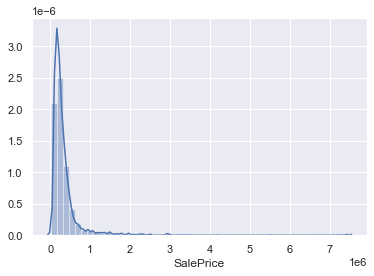

In [102]:
df_houses['SalePrice'].describe()
sns.distplot(df_houses['SalePrice'])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


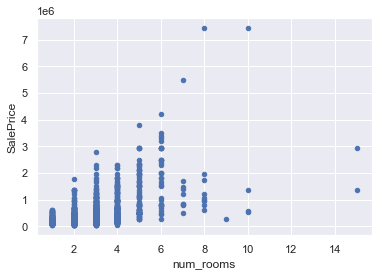

In [103]:

# scatter plot GrLivArea/saleprice
var = 'num_rooms'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()
plt.close()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


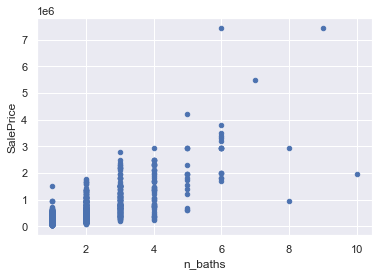

In [104]:

# scatter plot GrLivArea/saleprice
var = 'n_baths'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()
plt.close()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


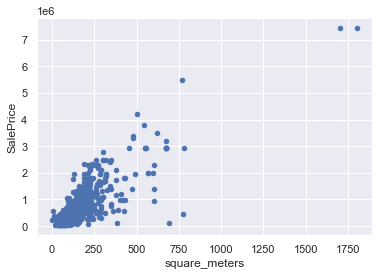

In [105]:
# scatter plot GrLivArea/saleprice
var = 'square_meters'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()
plt.close()

In [106]:
df_houses[df_houses['square_meters']>1000]

SalePrice  num_rooms  n_baths  square_meters neighborhood
0    7450000.0       10.0      6.0         1800.0       Sarria
209  7450000.0        8.0      9.0         1700.0       Sarria

In [107]:
print(df_houses[df_houses['square_meters']>1000])
df_houses = df_houses.drop(df_houses[df_houses['square_meters']>1000].index[0])
df_houses = df_houses.drop(df_houses[df_houses['square_meters']>1000].index[0])


     SalePrice  num_rooms  n_baths  square_meters neighborhood
0    7450000.0       10.0      6.0         1800.0       Sarria
209  7450000.0        8.0      9.0         1700.0       Sarria


<AxesSubplot:ylabel='neighborhood'>

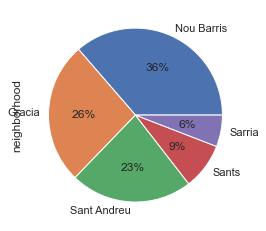

In [108]:
df_houses['neighborhood'].value_counts().plot(kind='pie',autopct='%1.0f%%')

Text(0.5, 1.0, 'Prices per neighborhood')

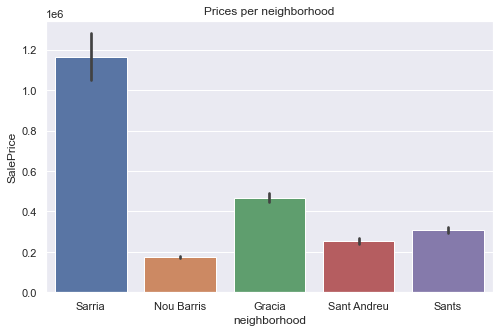

In [109]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighborhood',y='SalePrice',data=df_houses)
plt.title("Prices per neighborhood")

<AxesSubplot:>

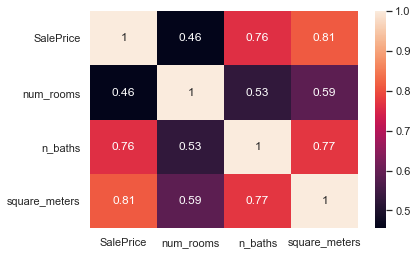

In [110]:
k=10
corrmat = df_houses.corr()
sns.heatmap(corrmat,annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


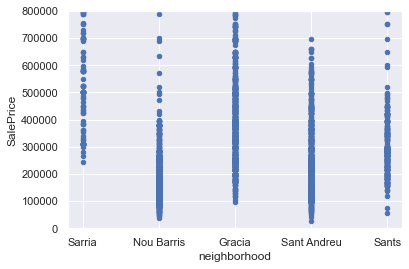

In [111]:
# scatter plot GrLivArea/saleprice
var = 'neighborhood'
data = pd.concat([df_houses['SalePrice'], df_houses[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));
plt.show()
plt.close()

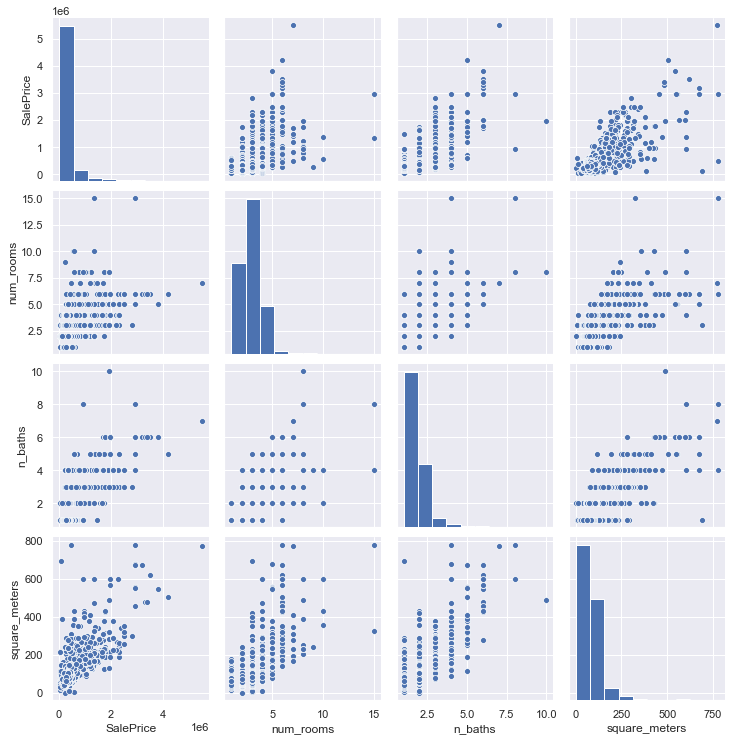

In [112]:
sns.set()
sns.pairplot(df_houses, size=2.5)
plt.show()

In [113]:
df_houses['neighborhood'] = pd.factorize(df_houses['neighborhood'])[0]

In [114]:
#  scale numeric values through log1p
numeric_cols_to_scale = ['n_baths', 'num_rooms', 'SalePrice', 'square_meters']
for column in numeric_cols_to_scale:
    df_houses[column] = np.log1p(df_houses[column])
    

In [115]:
X_train,X_val,y_train,y_val = train_test_split(df_houses.drop(columns=['SalePrice']),df_houses["SalePrice"],test_size = 0.1,random_state=42)
print(X_train.shape)
print(y_train.shape)
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, df_houses.drop(columns=['SalePrice']), df_houses["SalePrice"], scoring="neg_mean_squared_error", cv=kf))
    return (rmse)
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_accuracy(model):
    accuracy = cross_val_score(model, df_houses.drop(columns=['SalePrice']), df_houses["SalePrice"], scoring="r2", cv=kf)
    return (accuracy)

(3232, 4)
(3232,)


In [119]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
print(lreg.score)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

<bound method RegressorMixin.score of LinearRegression()>
Learning rate set to 0.049281
0:	learn: 0.6593580	total: 10.5ms	remaining: 10.5s
1:	learn: 0.6381689	total: 11.6ms	remaining: 5.8s
2:	learn: 0.6187057	total: 13.2ms	remaining: 4.39s
3:	learn: 0.5987636	total: 14.5ms	remaining: 3.62s
4:	learn: 0.5798093	total: 15.9ms	remaining: 3.17s
5:	learn: 0.5640653	total: 17.6ms	remaining: 2.92s
6:	learn: 0.5474858	total: 19.1ms	remaining: 2.71s
7:	learn: 0.5311003	total: 20.5ms	remaining: 2.54s
8:	learn: 0.5161560	total: 21.8ms	remaining: 2.4s
9:	learn: 0.5038874	total: 23.2ms	remaining: 2.3s
10:	learn: 0.4906765	total: 24.5ms	remaining: 2.2s
11:	learn: 0.4774052	total: 25.9ms	remaining: 2.13s
12:	learn: 0.4663726	total: 27.3ms	remaining: 2.07s
13:	learn: 0.4549227	total: 28.8ms	remaining: 2.03s
14:	learn: 0.4450439	total: 30.2ms	remaining: 1.98s
15:	learn: 0.4355369	total: 31.5ms	remaining: 1.94s
16:	learn: 0.4266463	total: 32.8ms	remaining: 1.9s
17:	learn: 0.4190742	total: 34.1ms	remainin

233:	learn: 0.2748578	total: 310ms	remaining: 1.02s
234:	learn: 0.2748401	total: 312ms	remaining: 1.01s
235:	learn: 0.2746608	total: 313ms	remaining: 1.01s
236:	learn: 0.2745237	total: 314ms	remaining: 1.01s
237:	learn: 0.2744042	total: 316ms	remaining: 1.01s
238:	learn: 0.2743971	total: 318ms	remaining: 1.01s
239:	learn: 0.2743577	total: 319ms	remaining: 1.01s
240:	learn: 0.2743524	total: 320ms	remaining: 1.01s
241:	learn: 0.2742598	total: 322ms	remaining: 1.01s
242:	learn: 0.2741350	total: 324ms	remaining: 1.01s
243:	learn: 0.2739928	total: 325ms	remaining: 1.01s
244:	learn: 0.2739444	total: 326ms	remaining: 1.01s
245:	learn: 0.2739383	total: 328ms	remaining: 1.01s
246:	learn: 0.2738586	total: 330ms	remaining: 1.01s
247:	learn: 0.2738505	total: 332ms	remaining: 1s
248:	learn: 0.2738064	total: 333ms	remaining: 1s
249:	learn: 0.2737986	total: 334ms	remaining: 1s
250:	learn: 0.2737845	total: 335ms	remaining: 1000ms
251:	learn: 0.2737795	total: 336ms	remaining: 998ms
252:	learn: 0.273730

487:	learn: 0.2600952	total: 623ms	remaining: 654ms
488:	learn: 0.2600046	total: 625ms	remaining: 653ms
489:	learn: 0.2599723	total: 626ms	remaining: 651ms
490:	learn: 0.2599337	total: 627ms	remaining: 650ms
491:	learn: 0.2599203	total: 628ms	remaining: 649ms
492:	learn: 0.2599033	total: 630ms	remaining: 648ms
493:	learn: 0.2598290	total: 631ms	remaining: 646ms
494:	learn: 0.2597920	total: 632ms	remaining: 645ms
495:	learn: 0.2597288	total: 634ms	remaining: 644ms
496:	learn: 0.2597088	total: 636ms	remaining: 644ms
497:	learn: 0.2597027	total: 638ms	remaining: 643ms
498:	learn: 0.2596309	total: 639ms	remaining: 642ms
499:	learn: 0.2595956	total: 641ms	remaining: 641ms
500:	learn: 0.2595635	total: 642ms	remaining: 639ms
501:	learn: 0.2595338	total: 643ms	remaining: 638ms
502:	learn: 0.2595084	total: 644ms	remaining: 637ms
503:	learn: 0.2595056	total: 646ms	remaining: 635ms
504:	learn: 0.2594394	total: 647ms	remaining: 634ms
505:	learn: 0.2593743	total: 649ms	remaining: 634ms
506:	learn: 

726:	learn: 0.2513666	total: 928ms	remaining: 348ms
727:	learn: 0.2513650	total: 929ms	remaining: 347ms
728:	learn: 0.2513119	total: 931ms	remaining: 346ms
729:	learn: 0.2512865	total: 932ms	remaining: 345ms
730:	learn: 0.2512405	total: 933ms	remaining: 343ms
731:	learn: 0.2511982	total: 935ms	remaining: 342ms
732:	learn: 0.2511813	total: 936ms	remaining: 341ms
733:	learn: 0.2511668	total: 937ms	remaining: 340ms
734:	learn: 0.2511442	total: 938ms	remaining: 338ms
735:	learn: 0.2511071	total: 940ms	remaining: 337ms
736:	learn: 0.2511006	total: 942ms	remaining: 336ms
737:	learn: 0.2510986	total: 943ms	remaining: 335ms
738:	learn: 0.2510375	total: 944ms	remaining: 333ms
739:	learn: 0.2509848	total: 945ms	remaining: 332ms
740:	learn: 0.2509624	total: 947ms	remaining: 331ms
741:	learn: 0.2509325	total: 948ms	remaining: 330ms
742:	learn: 0.2509246	total: 949ms	remaining: 328ms
743:	learn: 0.2509037	total: 951ms	remaining: 327ms
744:	learn: 0.2508974	total: 952ms	remaining: 326ms
745:	learn: 

981:	learn: 0.2446269	total: 1.24s	remaining: 22.7ms
982:	learn: 0.2446149	total: 1.24s	remaining: 21.4ms
983:	learn: 0.2445931	total: 1.24s	remaining: 20.2ms
984:	learn: 0.2445899	total: 1.24s	remaining: 18.9ms
985:	learn: 0.2445475	total: 1.24s	remaining: 17.7ms
986:	learn: 0.2445221	total: 1.24s	remaining: 16.4ms
987:	learn: 0.2445057	total: 1.25s	remaining: 15.1ms
988:	learn: 0.2445015	total: 1.25s	remaining: 13.9ms
989:	learn: 0.2445008	total: 1.25s	remaining: 12.6ms
990:	learn: 0.2444682	total: 1.25s	remaining: 11.3ms
991:	learn: 0.2444508	total: 1.25s	remaining: 10.1ms
992:	learn: 0.2444175	total: 1.25s	remaining: 8.83ms
993:	learn: 0.2444149	total: 1.25s	remaining: 7.57ms
994:	learn: 0.2443746	total: 1.25s	remaining: 6.3ms
995:	learn: 0.2443538	total: 1.25s	remaining: 5.04ms
996:	learn: 0.2443060	total: 1.26s	remaining: 3.78ms
997:	learn: 0.2442928	total: 1.26s	remaining: 2.52ms
998:	learn: 0.2442538	total: 1.26s	remaining: 1.26ms
999:	learn: 0.2441985	total: 1.26s	remaining: 0

213:	learn: 0.2759589	total: 253ms	remaining: 929ms
214:	learn: 0.2758209	total: 254ms	remaining: 928ms
215:	learn: 0.2757933	total: 255ms	remaining: 926ms
216:	learn: 0.2756585	total: 257ms	remaining: 926ms
217:	learn: 0.2755568	total: 258ms	remaining: 925ms
218:	learn: 0.2754396	total: 259ms	remaining: 924ms
219:	learn: 0.2753693	total: 260ms	remaining: 923ms
220:	learn: 0.2752433	total: 262ms	remaining: 923ms
221:	learn: 0.2752329	total: 263ms	remaining: 922ms
222:	learn: 0.2751933	total: 264ms	remaining: 921ms
223:	learn: 0.2751602	total: 266ms	remaining: 921ms
224:	learn: 0.2751546	total: 267ms	remaining: 919ms
225:	learn: 0.2751286	total: 268ms	remaining: 917ms
226:	learn: 0.2751202	total: 269ms	remaining: 916ms
227:	learn: 0.2749777	total: 270ms	remaining: 915ms
228:	learn: 0.2749590	total: 271ms	remaining: 913ms
229:	learn: 0.2748363	total: 273ms	remaining: 913ms
230:	learn: 0.2747320	total: 274ms	remaining: 912ms
231:	learn: 0.2746434	total: 276ms	remaining: 912ms
232:	learn: 

466:	learn: 0.2594814	total: 562ms	remaining: 641ms
467:	learn: 0.2594438	total: 564ms	remaining: 641ms
468:	learn: 0.2594063	total: 565ms	remaining: 639ms
469:	learn: 0.2593861	total: 566ms	remaining: 638ms
470:	learn: 0.2593458	total: 567ms	remaining: 637ms
471:	learn: 0.2592594	total: 568ms	remaining: 636ms
472:	learn: 0.2592311	total: 569ms	remaining: 634ms
473:	learn: 0.2592286	total: 571ms	remaining: 633ms
474:	learn: 0.2592237	total: 572ms	remaining: 632ms
475:	learn: 0.2591163	total: 573ms	remaining: 631ms
476:	learn: 0.2589971	total: 575ms	remaining: 630ms
477:	learn: 0.2589587	total: 576ms	remaining: 629ms
478:	learn: 0.2588935	total: 578ms	remaining: 629ms
479:	learn: 0.2588747	total: 579ms	remaining: 627ms
480:	learn: 0.2588439	total: 580ms	remaining: 626ms
481:	learn: 0.2588065	total: 582ms	remaining: 625ms
482:	learn: 0.2588044	total: 583ms	remaining: 624ms
483:	learn: 0.2588013	total: 584ms	remaining: 622ms
484:	learn: 0.2587974	total: 585ms	remaining: 621ms
485:	learn: 

721:	learn: 0.2513056	total: 870ms	remaining: 335ms
722:	learn: 0.2512789	total: 872ms	remaining: 334ms
723:	learn: 0.2512779	total: 873ms	remaining: 333ms
724:	learn: 0.2512623	total: 874ms	remaining: 331ms
725:	learn: 0.2512388	total: 875ms	remaining: 330ms
726:	learn: 0.2512148	total: 876ms	remaining: 329ms
727:	learn: 0.2512141	total: 878ms	remaining: 328ms
728:	learn: 0.2512009	total: 879ms	remaining: 327ms
729:	learn: 0.2511946	total: 881ms	remaining: 326ms
730:	learn: 0.2511633	total: 882ms	remaining: 325ms
731:	learn: 0.2511356	total: 884ms	remaining: 324ms
732:	learn: 0.2511126	total: 885ms	remaining: 323ms
733:	learn: 0.2510755	total: 887ms	remaining: 321ms
734:	learn: 0.2510512	total: 888ms	remaining: 320ms
735:	learn: 0.2510303	total: 889ms	remaining: 319ms
736:	learn: 0.2510169	total: 890ms	remaining: 318ms
737:	learn: 0.2509885	total: 892ms	remaining: 317ms
738:	learn: 0.2509818	total: 894ms	remaining: 316ms
739:	learn: 0.2509516	total: 895ms	remaining: 314ms
740:	learn: 

968:	learn: 0.2446491	total: 1.18s	remaining: 37.7ms
969:	learn: 0.2446465	total: 1.18s	remaining: 36.5ms
970:	learn: 0.2446267	total: 1.18s	remaining: 35.2ms
971:	learn: 0.2446235	total: 1.18s	remaining: 34ms
972:	learn: 0.2446148	total: 1.18s	remaining: 32.8ms
973:	learn: 0.2445813	total: 1.18s	remaining: 31.6ms
974:	learn: 0.2445194	total: 1.19s	remaining: 30.4ms
975:	learn: 0.2445017	total: 1.19s	remaining: 29.2ms
976:	learn: 0.2444671	total: 1.19s	remaining: 28ms
977:	learn: 0.2444492	total: 1.19s	remaining: 26.8ms
978:	learn: 0.2443722	total: 1.19s	remaining: 25.6ms
979:	learn: 0.2443717	total: 1.19s	remaining: 24.4ms
980:	learn: 0.2443575	total: 1.2s	remaining: 23.2ms
981:	learn: 0.2442844	total: 1.2s	remaining: 21.9ms
982:	learn: 0.2442686	total: 1.2s	remaining: 20.7ms
983:	learn: 0.2442499	total: 1.2s	remaining: 19.5ms
984:	learn: 0.2442491	total: 1.2s	remaining: 18.3ms
985:	learn: 0.2442465	total: 1.2s	remaining: 17.1ms
986:	learn: 0.2442438	total: 1.2s	remaining: 15.8ms
987:

194:	learn: 0.2778748	total: 235ms	remaining: 971ms
195:	learn: 0.2778389	total: 237ms	remaining: 970ms
196:	learn: 0.2778128	total: 238ms	remaining: 969ms
197:	learn: 0.2777967	total: 239ms	remaining: 967ms
198:	learn: 0.2777720	total: 240ms	remaining: 966ms
199:	learn: 0.2776460	total: 241ms	remaining: 965ms
200:	learn: 0.2776280	total: 242ms	remaining: 964ms
201:	learn: 0.2775867	total: 244ms	remaining: 963ms
202:	learn: 0.2775788	total: 245ms	remaining: 962ms
203:	learn: 0.2775267	total: 246ms	remaining: 961ms
204:	learn: 0.2775147	total: 248ms	remaining: 963ms
205:	learn: 0.2774158	total: 250ms	remaining: 962ms
206:	learn: 0.2772935	total: 251ms	remaining: 961ms
207:	learn: 0.2772820	total: 252ms	remaining: 960ms
208:	learn: 0.2772434	total: 253ms	remaining: 958ms
209:	learn: 0.2772282	total: 254ms	remaining: 957ms
210:	learn: 0.2772213	total: 255ms	remaining: 953ms
211:	learn: 0.2772004	total: 256ms	remaining: 952ms
212:	learn: 0.2771698	total: 257ms	remaining: 950ms
213:	learn: 

451:	learn: 0.2625104	total: 546ms	remaining: 662ms
452:	learn: 0.2623634	total: 547ms	remaining: 661ms
453:	learn: 0.2622865	total: 548ms	remaining: 659ms
454:	learn: 0.2622812	total: 549ms	remaining: 658ms
455:	learn: 0.2622425	total: 550ms	remaining: 657ms
456:	learn: 0.2622228	total: 552ms	remaining: 655ms
457:	learn: 0.2621923	total: 553ms	remaining: 654ms
458:	learn: 0.2621846	total: 554ms	remaining: 653ms
459:	learn: 0.2621355	total: 555ms	remaining: 652ms
460:	learn: 0.2621334	total: 556ms	remaining: 651ms
461:	learn: 0.2620762	total: 558ms	remaining: 649ms
462:	learn: 0.2620708	total: 559ms	remaining: 649ms
463:	learn: 0.2620658	total: 561ms	remaining: 648ms
464:	learn: 0.2620108	total: 562ms	remaining: 647ms
465:	learn: 0.2619051	total: 563ms	remaining: 645ms
466:	learn: 0.2618773	total: 564ms	remaining: 644ms
467:	learn: 0.2617930	total: 566ms	remaining: 643ms
468:	learn: 0.2617612	total: 567ms	remaining: 642ms
469:	learn: 0.2615985	total: 568ms	remaining: 641ms
470:	learn: 

705:	learn: 0.2527388	total: 854ms	remaining: 356ms
706:	learn: 0.2527367	total: 856ms	remaining: 355ms
707:	learn: 0.2527337	total: 857ms	remaining: 353ms
708:	learn: 0.2526936	total: 858ms	remaining: 352ms
709:	learn: 0.2526755	total: 860ms	remaining: 351ms
710:	learn: 0.2526534	total: 861ms	remaining: 350ms
711:	learn: 0.2526054	total: 862ms	remaining: 349ms
712:	learn: 0.2525863	total: 864ms	remaining: 348ms
713:	learn: 0.2525415	total: 865ms	remaining: 346ms
714:	learn: 0.2525316	total: 866ms	remaining: 345ms
715:	learn: 0.2525098	total: 868ms	remaining: 344ms
716:	learn: 0.2524768	total: 869ms	remaining: 343ms
717:	learn: 0.2524596	total: 871ms	remaining: 342ms
718:	learn: 0.2524070	total: 872ms	remaining: 341ms
719:	learn: 0.2524030	total: 873ms	remaining: 339ms
720:	learn: 0.2523825	total: 874ms	remaining: 338ms
721:	learn: 0.2523528	total: 875ms	remaining: 337ms
722:	learn: 0.2523223	total: 877ms	remaining: 336ms
723:	learn: 0.2522909	total: 878ms	remaining: 335ms
724:	learn: 

959:	learn: 0.2453767	total: 1.16s	remaining: 48.5ms
960:	learn: 0.2453408	total: 1.17s	remaining: 47.3ms
961:	learn: 0.2453233	total: 1.17s	remaining: 46.1ms
962:	learn: 0.2453159	total: 1.17s	remaining: 44.9ms
963:	learn: 0.2453150	total: 1.17s	remaining: 43.7ms
964:	learn: 0.2452840	total: 1.17s	remaining: 42.5ms
965:	learn: 0.2451921	total: 1.17s	remaining: 41.3ms
966:	learn: 0.2451339	total: 1.17s	remaining: 40ms
967:	learn: 0.2451260	total: 1.17s	remaining: 38.8ms
968:	learn: 0.2451251	total: 1.18s	remaining: 37.6ms
969:	learn: 0.2451126	total: 1.18s	remaining: 36.4ms
970:	learn: 0.2451047	total: 1.18s	remaining: 35.2ms
971:	learn: 0.2450562	total: 1.18s	remaining: 34ms
972:	learn: 0.2450053	total: 1.18s	remaining: 32.8ms
973:	learn: 0.2449902	total: 1.18s	remaining: 31.6ms
974:	learn: 0.2449782	total: 1.18s	remaining: 30.4ms
975:	learn: 0.2449462	total: 1.19s	remaining: 29.2ms
976:	learn: 0.2449061	total: 1.19s	remaining: 27.9ms
977:	learn: 0.2448900	total: 1.19s	remaining: 26.7

182:	learn: 0.2777674	total: 233ms	remaining: 1.04s
183:	learn: 0.2776777	total: 234ms	remaining: 1.04s
184:	learn: 0.2776455	total: 235ms	remaining: 1.04s
185:	learn: 0.2775330	total: 237ms	remaining: 1.04s
186:	learn: 0.2774084	total: 238ms	remaining: 1.03s
187:	learn: 0.2773211	total: 239ms	remaining: 1.03s
188:	learn: 0.2772520	total: 241ms	remaining: 1.03s
189:	learn: 0.2772260	total: 242ms	remaining: 1.03s
190:	learn: 0.2771552	total: 243ms	remaining: 1.03s
191:	learn: 0.2770886	total: 245ms	remaining: 1.03s
192:	learn: 0.2770291	total: 247ms	remaining: 1.03s
193:	learn: 0.2769974	total: 248ms	remaining: 1.03s
194:	learn: 0.2767946	total: 249ms	remaining: 1.03s
195:	learn: 0.2767077	total: 250ms	remaining: 1.03s
196:	learn: 0.2767042	total: 251ms	remaining: 1.02s
197:	learn: 0.2765658	total: 252ms	remaining: 1.02s
198:	learn: 0.2764795	total: 253ms	remaining: 1.02s
199:	learn: 0.2764018	total: 255ms	remaining: 1.02s
200:	learn: 0.2763371	total: 256ms	remaining: 1.02s
201:	learn: 

424:	learn: 0.2627110	total: 538ms	remaining: 728ms
425:	learn: 0.2627092	total: 539ms	remaining: 726ms
426:	learn: 0.2626438	total: 540ms	remaining: 725ms
427:	learn: 0.2626401	total: 543ms	remaining: 725ms
428:	learn: 0.2625586	total: 544ms	remaining: 724ms
429:	learn: 0.2625100	total: 545ms	remaining: 723ms
430:	learn: 0.2624715	total: 547ms	remaining: 722ms
431:	learn: 0.2624464	total: 548ms	remaining: 721ms
432:	learn: 0.2624221	total: 549ms	remaining: 720ms
433:	learn: 0.2624002	total: 552ms	remaining: 719ms
434:	learn: 0.2623130	total: 553ms	remaining: 718ms
435:	learn: 0.2622972	total: 555ms	remaining: 718ms
436:	learn: 0.2622019	total: 556ms	remaining: 717ms
437:	learn: 0.2621995	total: 558ms	remaining: 716ms
438:	learn: 0.2621573	total: 559ms	remaining: 714ms
439:	learn: 0.2620772	total: 560ms	remaining: 713ms
440:	learn: 0.2619959	total: 562ms	remaining: 712ms
441:	learn: 0.2619208	total: 563ms	remaining: 711ms
442:	learn: 0.2618675	total: 564ms	remaining: 709ms
443:	learn: 

653:	learn: 0.2545815	total: 842ms	remaining: 446ms
654:	learn: 0.2545711	total: 844ms	remaining: 445ms
655:	learn: 0.2545437	total: 846ms	remaining: 443ms
656:	learn: 0.2545195	total: 847ms	remaining: 442ms
657:	learn: 0.2544428	total: 849ms	remaining: 441ms
658:	learn: 0.2544057	total: 850ms	remaining: 440ms
659:	learn: 0.2544037	total: 852ms	remaining: 439ms
660:	learn: 0.2543143	total: 853ms	remaining: 438ms
661:	learn: 0.2543108	total: 854ms	remaining: 436ms
662:	learn: 0.2542814	total: 856ms	remaining: 435ms
663:	learn: 0.2542538	total: 858ms	remaining: 434ms
664:	learn: 0.2542262	total: 859ms	remaining: 433ms
665:	learn: 0.2541704	total: 860ms	remaining: 431ms
666:	learn: 0.2541519	total: 861ms	remaining: 430ms
667:	learn: 0.2540905	total: 863ms	remaining: 429ms
668:	learn: 0.2540813	total: 864ms	remaining: 427ms
669:	learn: 0.2540517	total: 865ms	remaining: 426ms
670:	learn: 0.2540089	total: 867ms	remaining: 425ms
671:	learn: 0.2539703	total: 868ms	remaining: 424ms
672:	learn: 

888:	learn: 0.2484035	total: 1.14s	remaining: 143ms
889:	learn: 0.2483998	total: 1.14s	remaining: 141ms
890:	learn: 0.2483979	total: 1.14s	remaining: 140ms
891:	learn: 0.2483726	total: 1.15s	remaining: 139ms
892:	learn: 0.2483649	total: 1.15s	remaining: 137ms
893:	learn: 0.2483544	total: 1.15s	remaining: 136ms
894:	learn: 0.2483383	total: 1.15s	remaining: 135ms
895:	learn: 0.2483368	total: 1.15s	remaining: 134ms
896:	learn: 0.2483306	total: 1.15s	remaining: 132ms
897:	learn: 0.2482521	total: 1.15s	remaining: 131ms
898:	learn: 0.2482471	total: 1.16s	remaining: 130ms
899:	learn: 0.2482110	total: 1.16s	remaining: 129ms
900:	learn: 0.2482063	total: 1.16s	remaining: 127ms
901:	learn: 0.2481874	total: 1.16s	remaining: 126ms
902:	learn: 0.2481455	total: 1.16s	remaining: 125ms
903:	learn: 0.2480954	total: 1.16s	remaining: 124ms
904:	learn: 0.2480801	total: 1.16s	remaining: 122ms
905:	learn: 0.2480029	total: 1.17s	remaining: 121ms
906:	learn: 0.2479492	total: 1.17s	remaining: 120ms
907:	learn: 

68:	learn: 0.2924385	total: 99.7ms	remaining: 1.34s
69:	learn: 0.2919003	total: 101ms	remaining: 1.34s
70:	learn: 0.2915923	total: 102ms	remaining: 1.34s
71:	learn: 0.2911579	total: 104ms	remaining: 1.33s
72:	learn: 0.2909898	total: 105ms	remaining: 1.33s
73:	learn: 0.2904797	total: 106ms	remaining: 1.33s
74:	learn: 0.2900396	total: 108ms	remaining: 1.33s
75:	learn: 0.2896917	total: 109ms	remaining: 1.33s
76:	learn: 0.2893935	total: 111ms	remaining: 1.32s
77:	learn: 0.2890239	total: 112ms	remaining: 1.32s
78:	learn: 0.2887464	total: 113ms	remaining: 1.32s
79:	learn: 0.2885993	total: 114ms	remaining: 1.31s
80:	learn: 0.2881987	total: 116ms	remaining: 1.31s
81:	learn: 0.2879390	total: 117ms	remaining: 1.31s
82:	learn: 0.2877330	total: 118ms	remaining: 1.3s
83:	learn: 0.2875946	total: 119ms	remaining: 1.3s
84:	learn: 0.2873949	total: 120ms	remaining: 1.29s
85:	learn: 0.2871723	total: 122ms	remaining: 1.3s
86:	learn: 0.2869566	total: 123ms	remaining: 1.29s
87:	learn: 0.2867944	total: 125ms

280:	learn: 0.2671571	total: 395ms	remaining: 1.01s
281:	learn: 0.2670376	total: 397ms	remaining: 1.01s
282:	learn: 0.2670326	total: 398ms	remaining: 1.01s
283:	learn: 0.2668976	total: 400ms	remaining: 1.01s
284:	learn: 0.2667268	total: 401ms	remaining: 1.01s
285:	learn: 0.2667219	total: 403ms	remaining: 1s
286:	learn: 0.2666255	total: 404ms	remaining: 1s
287:	learn: 0.2664337	total: 405ms	remaining: 1s
288:	learn: 0.2663795	total: 407ms	remaining: 1s
289:	learn: 0.2662861	total: 408ms	remaining: 999ms
290:	learn: 0.2661698	total: 409ms	remaining: 998ms
291:	learn: 0.2660974	total: 411ms	remaining: 997ms
292:	learn: 0.2660895	total: 413ms	remaining: 997ms
293:	learn: 0.2659851	total: 415ms	remaining: 996ms
294:	learn: 0.2659654	total: 417ms	remaining: 995ms
295:	learn: 0.2659391	total: 418ms	remaining: 995ms
296:	learn: 0.2659302	total: 419ms	remaining: 993ms
297:	learn: 0.2657772	total: 421ms	remaining: 991ms
298:	learn: 0.2656867	total: 422ms	remaining: 990ms
299:	learn: 0.2656519	to

476:	learn: 0.2578566	total: 685ms	remaining: 751ms
477:	learn: 0.2578494	total: 686ms	remaining: 749ms
478:	learn: 0.2578069	total: 687ms	remaining: 748ms
479:	learn: 0.2577660	total: 689ms	remaining: 746ms
480:	learn: 0.2576740	total: 690ms	remaining: 744ms
481:	learn: 0.2576259	total: 691ms	remaining: 743ms
482:	learn: 0.2576130	total: 693ms	remaining: 741ms
483:	learn: 0.2575823	total: 694ms	remaining: 740ms
484:	learn: 0.2575784	total: 696ms	remaining: 739ms
485:	learn: 0.2575290	total: 697ms	remaining: 737ms
486:	learn: 0.2574930	total: 699ms	remaining: 736ms
487:	learn: 0.2574695	total: 700ms	remaining: 735ms
488:	learn: 0.2574306	total: 702ms	remaining: 733ms
489:	learn: 0.2574241	total: 703ms	remaining: 732ms
490:	learn: 0.2573381	total: 704ms	remaining: 730ms
491:	learn: 0.2573077	total: 705ms	remaining: 728ms
492:	learn: 0.2572969	total: 707ms	remaining: 727ms
493:	learn: 0.2572898	total: 708ms	remaining: 725ms
494:	learn: 0.2572756	total: 710ms	remaining: 724ms
495:	learn: 

670:	learn: 0.2506978	total: 976ms	remaining: 479ms
671:	learn: 0.2506429	total: 978ms	remaining: 477ms
672:	learn: 0.2506260	total: 979ms	remaining: 476ms
673:	learn: 0.2505699	total: 980ms	remaining: 474ms
674:	learn: 0.2505009	total: 982ms	remaining: 473ms
675:	learn: 0.2504819	total: 984ms	remaining: 471ms
676:	learn: 0.2503952	total: 985ms	remaining: 470ms
677:	learn: 0.2503934	total: 986ms	remaining: 468ms
678:	learn: 0.2503926	total: 987ms	remaining: 467ms
679:	learn: 0.2503905	total: 989ms	remaining: 465ms
680:	learn: 0.2503890	total: 991ms	remaining: 464ms
681:	learn: 0.2503585	total: 992ms	remaining: 463ms
682:	learn: 0.2503476	total: 993ms	remaining: 461ms
683:	learn: 0.2502785	total: 995ms	remaining: 460ms
684:	learn: 0.2502360	total: 997ms	remaining: 458ms
685:	learn: 0.2501994	total: 998ms	remaining: 457ms
686:	learn: 0.2501880	total: 999ms	remaining: 455ms
687:	learn: 0.2501759	total: 1s	remaining: 454ms
688:	learn: 0.2501509	total: 1s	remaining: 452ms
689:	learn: 0.2501

916:	learn: 0.2434292	total: 1.28s	remaining: 116ms
917:	learn: 0.2433766	total: 1.28s	remaining: 115ms
918:	learn: 0.2433013	total: 1.28s	remaining: 113ms
919:	learn: 0.2432276	total: 1.29s	remaining: 112ms
920:	learn: 0.2432185	total: 1.29s	remaining: 110ms
921:	learn: 0.2432174	total: 1.29s	remaining: 109ms
922:	learn: 0.2431693	total: 1.29s	remaining: 108ms
923:	learn: 0.2431510	total: 1.29s	remaining: 106ms
924:	learn: 0.2431280	total: 1.29s	remaining: 105ms
925:	learn: 0.2430886	total: 1.29s	remaining: 103ms
926:	learn: 0.2430299	total: 1.29s	remaining: 102ms
927:	learn: 0.2429591	total: 1.3s	remaining: 101ms
928:	learn: 0.2429447	total: 1.3s	remaining: 99.3ms
929:	learn: 0.2429408	total: 1.3s	remaining: 97.8ms
930:	learn: 0.2429149	total: 1.3s	remaining: 96.4ms
931:	learn: 0.2428483	total: 1.3s	remaining: 95ms
932:	learn: 0.2428453	total: 1.3s	remaining: 93.6ms
933:	learn: 0.2427909	total: 1.3s	remaining: 92.2ms
934:	learn: 0.2427788	total: 1.31s	remaining: 90.8ms
935:	learn: 0.

143:	learn: 0.2821779	total: 177ms	remaining: 1.05s
144:	learn: 0.2820330	total: 178ms	remaining: 1.05s
145:	learn: 0.2819719	total: 179ms	remaining: 1.05s
146:	learn: 0.2819382	total: 180ms	remaining: 1.04s
147:	learn: 0.2818360	total: 181ms	remaining: 1.04s
148:	learn: 0.2817589	total: 183ms	remaining: 1.04s
149:	learn: 0.2816601	total: 184ms	remaining: 1.04s
150:	learn: 0.2816015	total: 185ms	remaining: 1.04s
151:	learn: 0.2815981	total: 186ms	remaining: 1.04s
152:	learn: 0.2815177	total: 187ms	remaining: 1.03s
153:	learn: 0.2814695	total: 188ms	remaining: 1.03s
154:	learn: 0.2813917	total: 189ms	remaining: 1.03s
155:	learn: 0.2812545	total: 191ms	remaining: 1.03s
156:	learn: 0.2811799	total: 191ms	remaining: 1.03s
157:	learn: 0.2811562	total: 192ms	remaining: 1.02s
158:	learn: 0.2811211	total: 194ms	remaining: 1.02s
159:	learn: 0.2809924	total: 195ms	remaining: 1.02s
160:	learn: 0.2808322	total: 197ms	remaining: 1.02s
161:	learn: 0.2807895	total: 198ms	remaining: 1.02s
162:	learn: 

374:	learn: 0.2671665	total: 477ms	remaining: 795ms
375:	learn: 0.2671264	total: 478ms	remaining: 794ms
376:	learn: 0.2670541	total: 480ms	remaining: 793ms
377:	learn: 0.2670103	total: 481ms	remaining: 791ms
378:	learn: 0.2670091	total: 482ms	remaining: 790ms
379:	learn: 0.2670079	total: 483ms	remaining: 789ms
380:	learn: 0.2669648	total: 485ms	remaining: 787ms
381:	learn: 0.2669507	total: 486ms	remaining: 786ms
382:	learn: 0.2669090	total: 487ms	remaining: 785ms
383:	learn: 0.2669062	total: 488ms	remaining: 783ms
384:	learn: 0.2667830	total: 490ms	remaining: 782ms
385:	learn: 0.2667619	total: 492ms	remaining: 782ms
386:	learn: 0.2667134	total: 494ms	remaining: 782ms
387:	learn: 0.2666349	total: 495ms	remaining: 781ms
388:	learn: 0.2665616	total: 496ms	remaining: 779ms
389:	learn: 0.2665200	total: 497ms	remaining: 778ms
390:	learn: 0.2664871	total: 499ms	remaining: 777ms
391:	learn: 0.2663926	total: 500ms	remaining: 775ms
392:	learn: 0.2663402	total: 501ms	remaining: 774ms
393:	learn: 

573:	learn: 0.2593835	total: 780ms	remaining: 579ms
574:	learn: 0.2592798	total: 781ms	remaining: 577ms
575:	learn: 0.2592373	total: 782ms	remaining: 576ms
576:	learn: 0.2591990	total: 783ms	remaining: 574ms
577:	learn: 0.2591865	total: 784ms	remaining: 573ms
578:	learn: 0.2591575	total: 786ms	remaining: 571ms
579:	learn: 0.2590942	total: 787ms	remaining: 570ms
580:	learn: 0.2590936	total: 789ms	remaining: 569ms
581:	learn: 0.2590262	total: 790ms	remaining: 567ms
582:	learn: 0.2590177	total: 791ms	remaining: 566ms
583:	learn: 0.2589492	total: 792ms	remaining: 564ms
584:	learn: 0.2589489	total: 794ms	remaining: 563ms
585:	learn: 0.2588764	total: 795ms	remaining: 562ms
586:	learn: 0.2588376	total: 796ms	remaining: 560ms
587:	learn: 0.2588180	total: 798ms	remaining: 559ms
588:	learn: 0.2588095	total: 799ms	remaining: 558ms
589:	learn: 0.2587945	total: 801ms	remaining: 557ms
590:	learn: 0.2587137	total: 803ms	remaining: 555ms
591:	learn: 0.2586742	total: 804ms	remaining: 554ms
592:	learn: 

811:	learn: 0.2521592	total: 1.08s	remaining: 251ms
812:	learn: 0.2520843	total: 1.08s	remaining: 250ms
813:	learn: 0.2520461	total: 1.09s	remaining: 248ms
814:	learn: 0.2520187	total: 1.09s	remaining: 247ms
815:	learn: 0.2520013	total: 1.09s	remaining: 246ms
816:	learn: 0.2519699	total: 1.09s	remaining: 244ms
817:	learn: 0.2519477	total: 1.09s	remaining: 243ms
818:	learn: 0.2519331	total: 1.09s	remaining: 242ms
819:	learn: 0.2518651	total: 1.09s	remaining: 240ms
820:	learn: 0.2518487	total: 1.09s	remaining: 239ms
821:	learn: 0.2518042	total: 1.1s	remaining: 238ms
822:	learn: 0.2517796	total: 1.1s	remaining: 236ms
823:	learn: 0.2517295	total: 1.1s	remaining: 235ms
824:	learn: 0.2517289	total: 1.1s	remaining: 234ms
825:	learn: 0.2516597	total: 1.1s	remaining: 233ms
826:	learn: 0.2516365	total: 1.1s	remaining: 231ms
827:	learn: 0.2515995	total: 1.11s	remaining: 230ms
828:	learn: 0.2515760	total: 1.11s	remaining: 229ms
829:	learn: 0.2515670	total: 1.11s	remaining: 227ms
830:	learn: 0.2515

13:	learn: 0.4522732	total: 17.3ms	remaining: 1.22s
14:	learn: 0.4427461	total: 18.6ms	remaining: 1.22s
15:	learn: 0.4329000	total: 19.8ms	remaining: 1.22s
16:	learn: 0.4240814	total: 21ms	remaining: 1.22s
17:	learn: 0.4150267	total: 22.2ms	remaining: 1.21s
18:	learn: 0.4069003	total: 23.5ms	remaining: 1.21s
19:	learn: 0.3989794	total: 25ms	remaining: 1.22s
20:	learn: 0.3920390	total: 26.3ms	remaining: 1.22s
21:	learn: 0.3861715	total: 27.5ms	remaining: 1.22s
22:	learn: 0.3800990	total: 28.8ms	remaining: 1.22s
23:	learn: 0.3745000	total: 30.7ms	remaining: 1.25s
24:	learn: 0.3690071	total: 31.9ms	remaining: 1.25s
25:	learn: 0.3645490	total: 33.2ms	remaining: 1.24s
26:	learn: 0.3603668	total: 34.5ms	remaining: 1.24s
27:	learn: 0.3562985	total: 35.7ms	remaining: 1.24s
28:	learn: 0.3527523	total: 36.9ms	remaining: 1.23s
29:	learn: 0.3492758	total: 38.5ms	remaining: 1.25s
30:	learn: 0.3453906	total: 39.8ms	remaining: 1.24s
31:	learn: 0.3425783	total: 41ms	remaining: 1.24s
32:	learn: 0.33901

270:	learn: 0.2731207	total: 326ms	remaining: 876ms
271:	learn: 0.2730891	total: 327ms	remaining: 876ms
272:	learn: 0.2730256	total: 328ms	remaining: 875ms
273:	learn: 0.2729373	total: 330ms	remaining: 874ms
274:	learn: 0.2728375	total: 331ms	remaining: 873ms
275:	learn: 0.2727541	total: 332ms	remaining: 872ms
276:	learn: 0.2726658	total: 334ms	remaining: 871ms
277:	learn: 0.2726448	total: 335ms	remaining: 869ms
278:	learn: 0.2726251	total: 336ms	remaining: 868ms
279:	learn: 0.2724656	total: 337ms	remaining: 867ms
280:	learn: 0.2723916	total: 339ms	remaining: 866ms
281:	learn: 0.2723342	total: 340ms	remaining: 867ms
282:	learn: 0.2723298	total: 342ms	remaining: 866ms
283:	learn: 0.2723032	total: 343ms	remaining: 864ms
284:	learn: 0.2722786	total: 344ms	remaining: 863ms
285:	learn: 0.2721997	total: 346ms	remaining: 864ms
286:	learn: 0.2721953	total: 347ms	remaining: 863ms
287:	learn: 0.2721249	total: 349ms	remaining: 862ms
288:	learn: 0.2721094	total: 350ms	remaining: 860ms
289:	learn: 

500:	learn: 0.2611247	total: 628ms	remaining: 626ms
501:	learn: 0.2610549	total: 630ms	remaining: 625ms
502:	learn: 0.2610193	total: 631ms	remaining: 623ms
503:	learn: 0.2609640	total: 632ms	remaining: 622ms
504:	learn: 0.2609252	total: 633ms	remaining: 621ms
505:	learn: 0.2608497	total: 635ms	remaining: 620ms
506:	learn: 0.2608125	total: 636ms	remaining: 618ms
507:	learn: 0.2607840	total: 638ms	remaining: 618ms
508:	learn: 0.2607485	total: 639ms	remaining: 616ms
509:	learn: 0.2607151	total: 640ms	remaining: 615ms
510:	learn: 0.2606622	total: 641ms	remaining: 614ms
511:	learn: 0.2606387	total: 643ms	remaining: 612ms
512:	learn: 0.2605696	total: 644ms	remaining: 611ms
513:	learn: 0.2604784	total: 645ms	remaining: 610ms
514:	learn: 0.2603930	total: 647ms	remaining: 609ms
515:	learn: 0.2603549	total: 648ms	remaining: 608ms
516:	learn: 0.2603008	total: 649ms	remaining: 606ms
517:	learn: 0.2602997	total: 651ms	remaining: 606ms
518:	learn: 0.2602806	total: 652ms	remaining: 605ms
519:	learn: 

752:	learn: 0.2520404	total: 939ms	remaining: 308ms
753:	learn: 0.2519696	total: 940ms	remaining: 307ms
754:	learn: 0.2519620	total: 942ms	remaining: 306ms
755:	learn: 0.2519612	total: 943ms	remaining: 304ms
756:	learn: 0.2519474	total: 944ms	remaining: 303ms
757:	learn: 0.2519209	total: 945ms	remaining: 302ms
758:	learn: 0.2519197	total: 946ms	remaining: 301ms
759:	learn: 0.2518946	total: 948ms	remaining: 299ms
760:	learn: 0.2518495	total: 949ms	remaining: 298ms
761:	learn: 0.2518416	total: 950ms	remaining: 297ms
762:	learn: 0.2518366	total: 952ms	remaining: 296ms
763:	learn: 0.2518353	total: 953ms	remaining: 294ms
764:	learn: 0.2517772	total: 955ms	remaining: 293ms
765:	learn: 0.2517747	total: 956ms	remaining: 292ms
766:	learn: 0.2517684	total: 957ms	remaining: 291ms
767:	learn: 0.2517504	total: 958ms	remaining: 290ms
768:	learn: 0.2517133	total: 960ms	remaining: 288ms
769:	learn: 0.2517028	total: 961ms	remaining: 287ms
770:	learn: 0.2516992	total: 962ms	remaining: 286ms
771:	learn: 

966:	learn: 0.2464505	total: 1.24s	remaining: 42.1ms
967:	learn: 0.2464367	total: 1.24s	remaining: 40.9ms
968:	learn: 0.2463620	total: 1.24s	remaining: 39.6ms
969:	learn: 0.2462728	total: 1.24s	remaining: 38.3ms
970:	learn: 0.2462586	total: 1.24s	remaining: 37ms
971:	learn: 0.2462322	total: 1.24s	remaining: 35.8ms
972:	learn: 0.2462237	total: 1.24s	remaining: 34.5ms
973:	learn: 0.2462014	total: 1.24s	remaining: 33.2ms
974:	learn: 0.2462008	total: 1.25s	remaining: 31.9ms
975:	learn: 0.2461920	total: 1.25s	remaining: 30.7ms
976:	learn: 0.2461915	total: 1.25s	remaining: 29.4ms
977:	learn: 0.2461723	total: 1.25s	remaining: 28.1ms
978:	learn: 0.2461675	total: 1.25s	remaining: 26.8ms
979:	learn: 0.2461669	total: 1.25s	remaining: 25.5ms
980:	learn: 0.2461641	total: 1.25s	remaining: 24.3ms
981:	learn: 0.2461195	total: 1.25s	remaining: 23ms
982:	learn: 0.2460574	total: 1.25s	remaining: 21.7ms
983:	learn: 0.2460409	total: 1.26s	remaining: 20.4ms
984:	learn: 0.2460292	total: 1.26s	remaining: 19.2

186:	learn: 0.2768453	total: 242ms	remaining: 1.05s
187:	learn: 0.2767177	total: 243ms	remaining: 1.05s
188:	learn: 0.2765163	total: 245ms	remaining: 1.05s
189:	learn: 0.2763971	total: 246ms	remaining: 1.05s
190:	learn: 0.2762919	total: 247ms	remaining: 1.05s
191:	learn: 0.2762200	total: 249ms	remaining: 1.04s
192:	learn: 0.2761858	total: 250ms	remaining: 1.04s
193:	learn: 0.2760248	total: 251ms	remaining: 1.04s
194:	learn: 0.2759545	total: 253ms	remaining: 1.04s
195:	learn: 0.2759172	total: 254ms	remaining: 1.04s
196:	learn: 0.2758585	total: 256ms	remaining: 1.04s
197:	learn: 0.2756926	total: 257ms	remaining: 1.04s
198:	learn: 0.2756280	total: 259ms	remaining: 1.04s
199:	learn: 0.2755997	total: 260ms	remaining: 1.04s
200:	learn: 0.2755456	total: 262ms	remaining: 1.04s
201:	learn: 0.2754549	total: 263ms	remaining: 1.04s
202:	learn: 0.2754295	total: 264ms	remaining: 1.04s
203:	learn: 0.2754173	total: 265ms	remaining: 1.03s
204:	learn: 0.2753424	total: 267ms	remaining: 1.03s
205:	learn: 

394:	learn: 0.2623988	total: 542ms	remaining: 830ms
395:	learn: 0.2622866	total: 543ms	remaining: 829ms
396:	learn: 0.2622597	total: 545ms	remaining: 827ms
397:	learn: 0.2622431	total: 546ms	remaining: 826ms
398:	learn: 0.2622390	total: 547ms	remaining: 824ms
399:	learn: 0.2621824	total: 549ms	remaining: 823ms
400:	learn: 0.2621800	total: 550ms	remaining: 822ms
401:	learn: 0.2621409	total: 551ms	remaining: 820ms
402:	learn: 0.2620844	total: 553ms	remaining: 819ms
403:	learn: 0.2620341	total: 554ms	remaining: 817ms
404:	learn: 0.2619874	total: 556ms	remaining: 816ms
405:	learn: 0.2619655	total: 558ms	remaining: 816ms
406:	learn: 0.2618403	total: 559ms	remaining: 815ms
407:	learn: 0.2617871	total: 560ms	remaining: 813ms
408:	learn: 0.2617646	total: 562ms	remaining: 811ms
409:	learn: 0.2617200	total: 563ms	remaining: 810ms
410:	learn: 0.2616603	total: 564ms	remaining: 809ms
411:	learn: 0.2616290	total: 565ms	remaining: 807ms
412:	learn: 0.2615951	total: 567ms	remaining: 805ms
413:	learn: 

620:	learn: 0.2537508	total: 843ms	remaining: 515ms
621:	learn: 0.2536821	total: 844ms	remaining: 513ms
622:	learn: 0.2536814	total: 846ms	remaining: 512ms
623:	learn: 0.2536741	total: 847ms	remaining: 510ms
624:	learn: 0.2536005	total: 848ms	remaining: 509ms
625:	learn: 0.2534919	total: 849ms	remaining: 507ms
626:	learn: 0.2534803	total: 851ms	remaining: 506ms
627:	learn: 0.2534778	total: 851ms	remaining: 504ms
628:	learn: 0.2534668	total: 853ms	remaining: 503ms
629:	learn: 0.2534231	total: 854ms	remaining: 501ms
630:	learn: 0.2534200	total: 855ms	remaining: 500ms
631:	learn: 0.2533737	total: 857ms	remaining: 499ms
632:	learn: 0.2533317	total: 859ms	remaining: 498ms
633:	learn: 0.2533306	total: 860ms	remaining: 497ms
634:	learn: 0.2533106	total: 862ms	remaining: 495ms
635:	learn: 0.2532953	total: 863ms	remaining: 494ms
636:	learn: 0.2532893	total: 864ms	remaining: 492ms
637:	learn: 0.2532832	total: 865ms	remaining: 491ms
638:	learn: 0.2532755	total: 866ms	remaining: 489ms
639:	learn: 

876:	learn: 0.2463995	total: 1.15s	remaining: 162ms
877:	learn: 0.2463664	total: 1.16s	remaining: 161ms
878:	learn: 0.2463367	total: 1.16s	remaining: 159ms
879:	learn: 0.2463141	total: 1.16s	remaining: 158ms
880:	learn: 0.2463073	total: 1.16s	remaining: 157ms
881:	learn: 0.2462836	total: 1.16s	remaining: 155ms
882:	learn: 0.2462722	total: 1.16s	remaining: 154ms
883:	learn: 0.2462380	total: 1.16s	remaining: 153ms
884:	learn: 0.2462203	total: 1.16s	remaining: 151ms
885:	learn: 0.2462184	total: 1.17s	remaining: 150ms
886:	learn: 0.2461925	total: 1.17s	remaining: 149ms
887:	learn: 0.2461247	total: 1.17s	remaining: 147ms
888:	learn: 0.2461238	total: 1.17s	remaining: 146ms
889:	learn: 0.2461211	total: 1.17s	remaining: 145ms
890:	learn: 0.2460899	total: 1.17s	remaining: 143ms
891:	learn: 0.2460199	total: 1.17s	remaining: 142ms
892:	learn: 0.2459780	total: 1.17s	remaining: 141ms
893:	learn: 0.2459637	total: 1.18s	remaining: 139ms
894:	learn: 0.2459517	total: 1.18s	remaining: 138ms
895:	learn: 

128:	learn: 0.2839421	total: 157ms	remaining: 1.06s
129:	learn: 0.2838561	total: 158ms	remaining: 1.06s
130:	learn: 0.2837700	total: 159ms	remaining: 1.06s
131:	learn: 0.2836369	total: 161ms	remaining: 1.05s
132:	learn: 0.2835524	total: 162ms	remaining: 1.06s
133:	learn: 0.2834349	total: 163ms	remaining: 1.06s
134:	learn: 0.2833555	total: 165ms	remaining: 1.06s
135:	learn: 0.2832399	total: 166ms	remaining: 1.06s
136:	learn: 0.2832293	total: 167ms	remaining: 1.05s
137:	learn: 0.2831779	total: 168ms	remaining: 1.05s
138:	learn: 0.2830607	total: 170ms	remaining: 1.05s
139:	learn: 0.2830068	total: 171ms	remaining: 1.05s
140:	learn: 0.2829807	total: 172ms	remaining: 1.05s
141:	learn: 0.2829016	total: 174ms	remaining: 1.05s
142:	learn: 0.2828637	total: 175ms	remaining: 1.05s
143:	learn: 0.2827455	total: 176ms	remaining: 1.05s
144:	learn: 0.2826924	total: 178ms	remaining: 1.05s
145:	learn: 0.2826513	total: 179ms	remaining: 1.04s
146:	learn: 0.2823978	total: 180ms	remaining: 1.04s
147:	learn: 

387:	learn: 0.2654035	total: 466ms	remaining: 735ms
388:	learn: 0.2653747	total: 467ms	remaining: 734ms
389:	learn: 0.2653085	total: 469ms	remaining: 733ms
390:	learn: 0.2652561	total: 470ms	remaining: 732ms
391:	learn: 0.2652300	total: 471ms	remaining: 731ms
392:	learn: 0.2652275	total: 472ms	remaining: 730ms
393:	learn: 0.2651840	total: 474ms	remaining: 729ms
394:	learn: 0.2651346	total: 475ms	remaining: 728ms
395:	learn: 0.2651095	total: 477ms	remaining: 727ms
396:	learn: 0.2650638	total: 478ms	remaining: 727ms
397:	learn: 0.2650556	total: 480ms	remaining: 725ms
398:	learn: 0.2650061	total: 481ms	remaining: 725ms
399:	learn: 0.2649696	total: 483ms	remaining: 724ms
400:	learn: 0.2648547	total: 484ms	remaining: 724ms
401:	learn: 0.2648173	total: 486ms	remaining: 722ms
402:	learn: 0.2647839	total: 487ms	remaining: 721ms
403:	learn: 0.2646917	total: 488ms	remaining: 720ms
404:	learn: 0.2646117	total: 489ms	remaining: 719ms
405:	learn: 0.2645191	total: 491ms	remaining: 718ms
406:	learn: 

639:	learn: 0.2562991	total: 775ms	remaining: 436ms
640:	learn: 0.2562763	total: 776ms	remaining: 435ms
641:	learn: 0.2562196	total: 777ms	remaining: 433ms
642:	learn: 0.2562175	total: 779ms	remaining: 432ms
643:	learn: 0.2561809	total: 780ms	remaining: 431ms
644:	learn: 0.2561390	total: 782ms	remaining: 430ms
645:	learn: 0.2561121	total: 783ms	remaining: 429ms
646:	learn: 0.2561095	total: 784ms	remaining: 428ms
647:	learn: 0.2560850	total: 785ms	remaining: 427ms
648:	learn: 0.2560583	total: 787ms	remaining: 425ms
649:	learn: 0.2560000	total: 788ms	remaining: 424ms
650:	learn: 0.2559291	total: 789ms	remaining: 423ms
651:	learn: 0.2558966	total: 791ms	remaining: 422ms
652:	learn: 0.2558908	total: 792ms	remaining: 421ms
653:	learn: 0.2558433	total: 793ms	remaining: 420ms
654:	learn: 0.2558016	total: 795ms	remaining: 419ms
655:	learn: 0.2557837	total: 796ms	remaining: 418ms
656:	learn: 0.2557372	total: 797ms	remaining: 416ms
657:	learn: 0.2557368	total: 799ms	remaining: 415ms
658:	learn: 

883:	learn: 0.2495486	total: 1.08s	remaining: 142ms
884:	learn: 0.2494975	total: 1.08s	remaining: 141ms
885:	learn: 0.2494861	total: 1.08s	remaining: 139ms
886:	learn: 0.2493855	total: 1.08s	remaining: 138ms
887:	learn: 0.2493406	total: 1.09s	remaining: 137ms
888:	learn: 0.2493401	total: 1.09s	remaining: 136ms
889:	learn: 0.2493223	total: 1.09s	remaining: 135ms
890:	learn: 0.2492844	total: 1.09s	remaining: 133ms
891:	learn: 0.2492462	total: 1.09s	remaining: 132ms
892:	learn: 0.2492258	total: 1.09s	remaining: 131ms
893:	learn: 0.2491749	total: 1.09s	remaining: 130ms
894:	learn: 0.2491711	total: 1.09s	remaining: 129ms
895:	learn: 0.2491463	total: 1.1s	remaining: 127ms
896:	learn: 0.2491120	total: 1.1s	remaining: 126ms
897:	learn: 0.2491108	total: 1.1s	remaining: 125ms
898:	learn: 0.2490870	total: 1.1s	remaining: 124ms
899:	learn: 0.2490781	total: 1.1s	remaining: 122ms
900:	learn: 0.2490180	total: 1.1s	remaining: 121ms
901:	learn: 0.2490158	total: 1.1s	remaining: 120ms
902:	learn: 0.24901

127:	learn: 0.2854919	total: 153ms	remaining: 1.04s
128:	learn: 0.2854205	total: 154ms	remaining: 1.04s
129:	learn: 0.2853497	total: 156ms	remaining: 1.04s
130:	learn: 0.2852958	total: 156ms	remaining: 1.04s
131:	learn: 0.2851932	total: 158ms	remaining: 1.04s
132:	learn: 0.2849839	total: 159ms	remaining: 1.03s
133:	learn: 0.2849193	total: 161ms	remaining: 1.04s
134:	learn: 0.2848795	total: 162ms	remaining: 1.04s
135:	learn: 0.2847669	total: 163ms	remaining: 1.04s
136:	learn: 0.2846681	total: 164ms	remaining: 1.03s
137:	learn: 0.2845752	total: 166ms	remaining: 1.03s
138:	learn: 0.2845484	total: 167ms	remaining: 1.03s
139:	learn: 0.2844737	total: 169ms	remaining: 1.04s
140:	learn: 0.2842904	total: 170ms	remaining: 1.04s
141:	learn: 0.2842048	total: 172ms	remaining: 1.04s
142:	learn: 0.2841450	total: 173ms	remaining: 1.03s
143:	learn: 0.2840603	total: 174ms	remaining: 1.04s
144:	learn: 0.2839628	total: 176ms	remaining: 1.04s
145:	learn: 0.2838955	total: 177ms	remaining: 1.03s
146:	learn: 

389:	learn: 0.2673646	total: 463ms	remaining: 724ms
390:	learn: 0.2673044	total: 464ms	remaining: 723ms
391:	learn: 0.2672886	total: 465ms	remaining: 722ms
392:	learn: 0.2672472	total: 466ms	remaining: 720ms
393:	learn: 0.2671616	total: 468ms	remaining: 719ms
394:	learn: 0.2671209	total: 469ms	remaining: 718ms
395:	learn: 0.2671091	total: 470ms	remaining: 717ms
396:	learn: 0.2670405	total: 472ms	remaining: 716ms
397:	learn: 0.2669784	total: 473ms	remaining: 715ms
398:	learn: 0.2668834	total: 474ms	remaining: 714ms
399:	learn: 0.2668382	total: 476ms	remaining: 714ms
400:	learn: 0.2667426	total: 477ms	remaining: 713ms
401:	learn: 0.2666353	total: 479ms	remaining: 712ms
402:	learn: 0.2666243	total: 480ms	remaining: 711ms
403:	learn: 0.2666048	total: 481ms	remaining: 710ms
404:	learn: 0.2665494	total: 482ms	remaining: 708ms
405:	learn: 0.2664961	total: 483ms	remaining: 707ms
406:	learn: 0.2664779	total: 485ms	remaining: 706ms
407:	learn: 0.2664064	total: 486ms	remaining: 705ms
408:	learn: 

644:	learn: 0.2569792	total: 771ms	remaining: 424ms
645:	learn: 0.2569301	total: 773ms	remaining: 423ms
646:	learn: 0.2569183	total: 774ms	remaining: 422ms
647:	learn: 0.2568762	total: 775ms	remaining: 421ms
648:	learn: 0.2568439	total: 776ms	remaining: 420ms
649:	learn: 0.2568326	total: 778ms	remaining: 419ms
650:	learn: 0.2568059	total: 779ms	remaining: 418ms
651:	learn: 0.2567831	total: 780ms	remaining: 417ms
652:	learn: 0.2567521	total: 782ms	remaining: 415ms
653:	learn: 0.2567000	total: 783ms	remaining: 414ms
654:	learn: 0.2566828	total: 784ms	remaining: 413ms
655:	learn: 0.2566703	total: 785ms	remaining: 412ms
656:	learn: 0.2566690	total: 787ms	remaining: 411ms
657:	learn: 0.2566417	total: 788ms	remaining: 410ms
658:	learn: 0.2565658	total: 790ms	remaining: 409ms
659:	learn: 0.2565493	total: 791ms	remaining: 407ms
660:	learn: 0.2565474	total: 792ms	remaining: 406ms
661:	learn: 0.2565378	total: 793ms	remaining: 405ms
662:	learn: 0.2564611	total: 794ms	remaining: 404ms
663:	learn: 

900:	learn: 0.2503321	total: 1.08s	remaining: 119ms
901:	learn: 0.2503136	total: 1.08s	remaining: 118ms
902:	learn: 0.2502309	total: 1.08s	remaining: 116ms
903:	learn: 0.2501897	total: 1.08s	remaining: 115ms
904:	learn: 0.2501841	total: 1.09s	remaining: 114ms
905:	learn: 0.2501033	total: 1.09s	remaining: 113ms
906:	learn: 0.2500979	total: 1.09s	remaining: 112ms
907:	learn: 0.2500927	total: 1.09s	remaining: 110ms
908:	learn: 0.2500451	total: 1.09s	remaining: 109ms
909:	learn: 0.2500063	total: 1.09s	remaining: 108ms
910:	learn: 0.2499685	total: 1.09s	remaining: 107ms
911:	learn: 0.2499609	total: 1.09s	remaining: 106ms
912:	learn: 0.2499361	total: 1.1s	remaining: 104ms
913:	learn: 0.2499143	total: 1.1s	remaining: 103ms
914:	learn: 0.2498922	total: 1.1s	remaining: 102ms
915:	learn: 0.2498603	total: 1.1s	remaining: 101ms
916:	learn: 0.2498527	total: 1.1s	remaining: 99.7ms
917:	learn: 0.2498514	total: 1.1s	remaining: 98.5ms
918:	learn: 0.2498218	total: 1.1s	remaining: 97.3ms
919:	learn: 0.24

123:	learn: 0.2840557	total: 156ms	remaining: 1.1s
124:	learn: 0.2839672	total: 158ms	remaining: 1.1s
125:	learn: 0.2839019	total: 159ms	remaining: 1.1s
126:	learn: 0.2838597	total: 160ms	remaining: 1.1s
127:	learn: 0.2836616	total: 162ms	remaining: 1.1s
128:	learn: 0.2835880	total: 163ms	remaining: 1.1s
129:	learn: 0.2834506	total: 165ms	remaining: 1.11s
130:	learn: 0.2833600	total: 167ms	remaining: 1.1s
131:	learn: 0.2832757	total: 168ms	remaining: 1.1s
132:	learn: 0.2832088	total: 170ms	remaining: 1.1s
133:	learn: 0.2830805	total: 172ms	remaining: 1.11s
134:	learn: 0.2829919	total: 173ms	remaining: 1.11s
135:	learn: 0.2829659	total: 174ms	remaining: 1.1s
136:	learn: 0.2828403	total: 175ms	remaining: 1.1s
137:	learn: 0.2827241	total: 177ms	remaining: 1.1s
138:	learn: 0.2825871	total: 179ms	remaining: 1.11s
139:	learn: 0.2824352	total: 180ms	remaining: 1.1s
140:	learn: 0.2824093	total: 181ms	remaining: 1.1s
141:	learn: 0.2821311	total: 182ms	remaining: 1.1s
142:	learn: 0.2820941	total

370:	learn: 0.2657546	total: 463ms	remaining: 785ms
371:	learn: 0.2657474	total: 464ms	remaining: 783ms
372:	learn: 0.2656642	total: 466ms	remaining: 783ms
373:	learn: 0.2655922	total: 467ms	remaining: 782ms
374:	learn: 0.2655359	total: 468ms	remaining: 780ms
375:	learn: 0.2654692	total: 469ms	remaining: 779ms
376:	learn: 0.2654348	total: 471ms	remaining: 778ms
377:	learn: 0.2653964	total: 472ms	remaining: 777ms
378:	learn: 0.2653507	total: 473ms	remaining: 776ms
379:	learn: 0.2652733	total: 475ms	remaining: 775ms
380:	learn: 0.2652328	total: 476ms	remaining: 773ms
381:	learn: 0.2651276	total: 478ms	remaining: 774ms
382:	learn: 0.2651051	total: 480ms	remaining: 773ms
383:	learn: 0.2650957	total: 481ms	remaining: 771ms
384:	learn: 0.2650706	total: 482ms	remaining: 770ms
385:	learn: 0.2650104	total: 484ms	remaining: 769ms
386:	learn: 0.2649869	total: 485ms	remaining: 768ms
387:	learn: 0.2649808	total: 486ms	remaining: 767ms
388:	learn: 0.2648840	total: 487ms	remaining: 765ms
389:	learn: 

575:	learn: 0.2564452	total: 759ms	remaining: 558ms
576:	learn: 0.2563788	total: 760ms	remaining: 557ms
577:	learn: 0.2563705	total: 761ms	remaining: 556ms
578:	learn: 0.2563393	total: 763ms	remaining: 555ms
579:	learn: 0.2562566	total: 764ms	remaining: 553ms
580:	learn: 0.2562441	total: 765ms	remaining: 552ms
581:	learn: 0.2561540	total: 767ms	remaining: 551ms
582:	learn: 0.2560604	total: 769ms	remaining: 550ms
583:	learn: 0.2560254	total: 770ms	remaining: 549ms
584:	learn: 0.2560162	total: 772ms	remaining: 547ms
585:	learn: 0.2560027	total: 773ms	remaining: 546ms
586:	learn: 0.2560011	total: 775ms	remaining: 545ms
587:	learn: 0.2559737	total: 776ms	remaining: 544ms
588:	learn: 0.2559486	total: 778ms	remaining: 543ms
589:	learn: 0.2559453	total: 780ms	remaining: 542ms
590:	learn: 0.2559112	total: 782ms	remaining: 541ms
591:	learn: 0.2559077	total: 783ms	remaining: 540ms
592:	learn: 0.2558372	total: 784ms	remaining: 538ms
593:	learn: 0.2557998	total: 786ms	remaining: 537ms
594:	learn: 

796:	learn: 0.2493900	total: 1.06s	remaining: 271ms
797:	learn: 0.2493735	total: 1.06s	remaining: 269ms
798:	learn: 0.2493706	total: 1.06s	remaining: 268ms
799:	learn: 0.2493700	total: 1.07s	remaining: 267ms
800:	learn: 0.2493643	total: 1.07s	remaining: 265ms
801:	learn: 0.2493490	total: 1.07s	remaining: 264ms
802:	learn: 0.2493448	total: 1.07s	remaining: 262ms
803:	learn: 0.2492632	total: 1.07s	remaining: 261ms
804:	learn: 0.2492362	total: 1.07s	remaining: 260ms
805:	learn: 0.2492350	total: 1.07s	remaining: 258ms
806:	learn: 0.2492201	total: 1.07s	remaining: 257ms
807:	learn: 0.2491632	total: 1.08s	remaining: 256ms
808:	learn: 0.2491606	total: 1.08s	remaining: 255ms
809:	learn: 0.2491147	total: 1.08s	remaining: 253ms
810:	learn: 0.2490784	total: 1.08s	remaining: 252ms
811:	learn: 0.2490746	total: 1.08s	remaining: 250ms
812:	learn: 0.2490477	total: 1.08s	remaining: 249ms
813:	learn: 0.2490424	total: 1.08s	remaining: 248ms
814:	learn: 0.2489820	total: 1.08s	remaining: 246ms
815:	learn: 

Learning rate set to 0.049281
0:	learn: 0.6576211	total: 2.4ms	remaining: 2.4s
1:	learn: 0.6334503	total: 4.46ms	remaining: 2.23s
2:	learn: 0.6099721	total: 6.56ms	remaining: 2.18s
3:	learn: 0.5880786	total: 8.6ms	remaining: 2.14s
4:	learn: 0.5671345	total: 10.6ms	remaining: 2.1s
5:	learn: 0.5468700	total: 12.8ms	remaining: 2.11s
6:	learn: 0.5273434	total: 14.7ms	remaining: 2.09s
7:	learn: 0.5094202	total: 17ms	remaining: 2.11s
8:	learn: 0.4925135	total: 19ms	remaining: 2.09s
9:	learn: 0.4765384	total: 21ms	remaining: 2.08s
10:	learn: 0.4616536	total: 22.9ms	remaining: 2.06s
11:	learn: 0.4485215	total: 24.9ms	remaining: 2.05s
12:	learn: 0.4362141	total: 27ms	remaining: 2.05s
13:	learn: 0.4237523	total: 28.9ms	remaining: 2.03s
14:	learn: 0.4123244	total: 30.9ms	remaining: 2.03s
15:	learn: 0.4008322	total: 32.9ms	remaining: 2.02s
16:	learn: 0.3904906	total: 34.9ms	remaining: 2.02s
17:	learn: 0.3808823	total: 36.8ms	remaining: 2s
18:	learn: 0.3715666	total: 38.7ms	remaining: 2s
19:	learn:

172:	learn: 0.2400220	total: 324ms	remaining: 1.55s
173:	learn: 0.2399271	total: 326ms	remaining: 1.54s
174:	learn: 0.2398374	total: 328ms	remaining: 1.54s
175:	learn: 0.2398265	total: 329ms	remaining: 1.54s
176:	learn: 0.2397637	total: 332ms	remaining: 1.54s
177:	learn: 0.2396319	total: 334ms	remaining: 1.54s
178:	learn: 0.2395785	total: 336ms	remaining: 1.54s
179:	learn: 0.2394613	total: 338ms	remaining: 1.54s
180:	learn: 0.2393853	total: 340ms	remaining: 1.54s
181:	learn: 0.2393225	total: 342ms	remaining: 1.54s
182:	learn: 0.2392408	total: 344ms	remaining: 1.53s
183:	learn: 0.2392168	total: 346ms	remaining: 1.53s
184:	learn: 0.2390476	total: 348ms	remaining: 1.53s
185:	learn: 0.2389308	total: 350ms	remaining: 1.53s
186:	learn: 0.2388158	total: 351ms	remaining: 1.53s
187:	learn: 0.2387505	total: 353ms	remaining: 1.52s
188:	learn: 0.2386500	total: 355ms	remaining: 1.52s
189:	learn: 0.2386034	total: 357ms	remaining: 1.52s
190:	learn: 0.2385475	total: 359ms	remaining: 1.52s
191:	learn: 

336:	learn: 0.2293799	total: 646ms	remaining: 1.27s
337:	learn: 0.2292528	total: 648ms	remaining: 1.27s
338:	learn: 0.2291824	total: 650ms	remaining: 1.27s
339:	learn: 0.2291535	total: 652ms	remaining: 1.26s
340:	learn: 0.2290216	total: 654ms	remaining: 1.26s
341:	learn: 0.2289886	total: 656ms	remaining: 1.26s
342:	learn: 0.2288923	total: 659ms	remaining: 1.26s
343:	learn: 0.2288596	total: 661ms	remaining: 1.26s
344:	learn: 0.2288541	total: 663ms	remaining: 1.26s
345:	learn: 0.2288333	total: 664ms	remaining: 1.25s
346:	learn: 0.2287284	total: 666ms	remaining: 1.25s
347:	learn: 0.2287210	total: 668ms	remaining: 1.25s
348:	learn: 0.2287068	total: 670ms	remaining: 1.25s
349:	learn: 0.2286469	total: 671ms	remaining: 1.25s
350:	learn: 0.2286060	total: 673ms	remaining: 1.24s
351:	learn: 0.2285983	total: 675ms	remaining: 1.24s
352:	learn: 0.2285812	total: 677ms	remaining: 1.24s
353:	learn: 0.2284951	total: 679ms	remaining: 1.24s
354:	learn: 0.2284615	total: 681ms	remaining: 1.24s
355:	learn: 

507:	learn: 0.2220950	total: 970ms	remaining: 939ms
508:	learn: 0.2220037	total: 972ms	remaining: 937ms
509:	learn: 0.2219843	total: 973ms	remaining: 935ms
510:	learn: 0.2219709	total: 975ms	remaining: 933ms
511:	learn: 0.2218807	total: 977ms	remaining: 931ms
512:	learn: 0.2218774	total: 979ms	remaining: 929ms
513:	learn: 0.2218733	total: 980ms	remaining: 927ms
514:	learn: 0.2218556	total: 982ms	remaining: 925ms
515:	learn: 0.2218413	total: 984ms	remaining: 923ms
516:	learn: 0.2218326	total: 986ms	remaining: 921ms
517:	learn: 0.2218257	total: 987ms	remaining: 919ms
518:	learn: 0.2217590	total: 991ms	remaining: 918ms
519:	learn: 0.2217003	total: 995ms	remaining: 919ms
520:	learn: 0.2216547	total: 997ms	remaining: 917ms
521:	learn: 0.2216394	total: 999ms	remaining: 915ms
522:	learn: 0.2216360	total: 1s	remaining: 913ms
523:	learn: 0.2216174	total: 1s	remaining: 911ms
524:	learn: 0.2216135	total: 1s	remaining: 909ms
525:	learn: 0.2215340	total: 1.01s	remaining: 909ms
526:	learn: 0.2215330

668:	learn: 0.2175057	total: 1.29s	remaining: 639ms
669:	learn: 0.2174817	total: 1.29s	remaining: 637ms
670:	learn: 0.2174448	total: 1.3s	remaining: 636ms
671:	learn: 0.2174331	total: 1.3s	remaining: 634ms
672:	learn: 0.2173804	total: 1.3s	remaining: 632ms
673:	learn: 0.2173652	total: 1.3s	remaining: 630ms
674:	learn: 0.2172925	total: 1.3s	remaining: 628ms
675:	learn: 0.2172509	total: 1.31s	remaining: 626ms
676:	learn: 0.2172191	total: 1.31s	remaining: 625ms
677:	learn: 0.2171955	total: 1.31s	remaining: 623ms
678:	learn: 0.2171931	total: 1.31s	remaining: 621ms
679:	learn: 0.2171763	total: 1.31s	remaining: 619ms
680:	learn: 0.2171470	total: 1.32s	remaining: 617ms
681:	learn: 0.2171262	total: 1.32s	remaining: 615ms
682:	learn: 0.2170651	total: 1.32s	remaining: 613ms
683:	learn: 0.2170412	total: 1.32s	remaining: 611ms
684:	learn: 0.2169907	total: 1.32s	remaining: 609ms
685:	learn: 0.2169884	total: 1.32s	remaining: 607ms
686:	learn: 0.2169830	total: 1.33s	remaining: 605ms
687:	learn: 0.216

843:	learn: 0.2133736	total: 1.61s	remaining: 298ms
844:	learn: 0.2133719	total: 1.61s	remaining: 296ms
845:	learn: 0.2133590	total: 1.62s	remaining: 294ms
846:	learn: 0.2133201	total: 1.62s	remaining: 293ms
847:	learn: 0.2132796	total: 1.62s	remaining: 291ms
848:	learn: 0.2132511	total: 1.62s	remaining: 289ms
849:	learn: 0.2132470	total: 1.63s	remaining: 287ms
850:	learn: 0.2132370	total: 1.63s	remaining: 285ms
851:	learn: 0.2132346	total: 1.63s	remaining: 283ms
852:	learn: 0.2132338	total: 1.63s	remaining: 281ms
853:	learn: 0.2132078	total: 1.63s	remaining: 279ms
854:	learn: 0.2131847	total: 1.64s	remaining: 277ms
855:	learn: 0.2131497	total: 1.64s	remaining: 276ms
856:	learn: 0.2131094	total: 1.64s	remaining: 274ms
857:	learn: 0.2131007	total: 1.64s	remaining: 272ms
858:	learn: 0.2130611	total: 1.64s	remaining: 270ms
859:	learn: 0.2130374	total: 1.65s	remaining: 268ms
860:	learn: 0.2130109	total: 1.65s	remaining: 266ms
861:	learn: 0.2129833	total: 1.65s	remaining: 264ms
862:	learn: 

0:	learn: 0.6601420	total: 1.44ms	remaining: 1.44s
1:	learn: 0.6378533	total: 2.81ms	remaining: 1.4s
2:	learn: 0.6172593	total: 4.1ms	remaining: 1.36s
3:	learn: 0.5974800	total: 5.38ms	remaining: 1.34s
4:	learn: 0.5786299	total: 7ms	remaining: 1.39s
5:	learn: 0.5626883	total: 8.37ms	remaining: 1.39s
6:	learn: 0.5483524	total: 9.66ms	remaining: 1.37s
7:	learn: 0.5312698	total: 11.3ms	remaining: 1.41s
8:	learn: 0.5175009	total: 12.7ms	remaining: 1.4s
9:	learn: 0.5033462	total: 14.1ms	remaining: 1.39s
10:	learn: 0.4897438	total: 15.4ms	remaining: 1.38s
11:	learn: 0.4770557	total: 16.7ms	remaining: 1.37s
12:	learn: 0.4648736	total: 18ms	remaining: 1.37s
13:	learn: 0.4541983	total: 19.4ms	remaining: 1.36s
14:	learn: 0.4443886	total: 21.1ms	remaining: 1.38s
15:	learn: 0.4344996	total: 22.4ms	remaining: 1.38s
16:	learn: 0.4261570	total: 23.7ms	remaining: 1.37s
17:	learn: 0.4179790	total: 24.6ms	remaining: 1.34s
18:	learn: 0.4096004	total: 25.9ms	remaining: 1.33s
19:	learn: 0.4020085	total: 27

260:	learn: 0.2720700	total: 313ms	remaining: 885ms
261:	learn: 0.2720464	total: 314ms	remaining: 884ms
262:	learn: 0.2719755	total: 315ms	remaining: 882ms
263:	learn: 0.2719505	total: 316ms	remaining: 881ms
264:	learn: 0.2719041	total: 317ms	remaining: 880ms
265:	learn: 0.2718222	total: 319ms	remaining: 879ms
266:	learn: 0.2717771	total: 320ms	remaining: 878ms
267:	learn: 0.2716931	total: 321ms	remaining: 877ms
268:	learn: 0.2716861	total: 322ms	remaining: 876ms
269:	learn: 0.2716182	total: 324ms	remaining: 875ms
270:	learn: 0.2713818	total: 325ms	remaining: 874ms
271:	learn: 0.2713661	total: 326ms	remaining: 873ms
272:	learn: 0.2712754	total: 328ms	remaining: 874ms
273:	learn: 0.2712198	total: 329ms	remaining: 872ms
274:	learn: 0.2710881	total: 330ms	remaining: 871ms
275:	learn: 0.2709547	total: 332ms	remaining: 870ms
276:	learn: 0.2709127	total: 333ms	remaining: 869ms
277:	learn: 0.2708931	total: 334ms	remaining: 867ms
278:	learn: 0.2708853	total: 335ms	remaining: 866ms
279:	learn: 

506:	learn: 0.2581204	total: 620ms	remaining: 603ms
507:	learn: 0.2580382	total: 621ms	remaining: 602ms
508:	learn: 0.2580127	total: 623ms	remaining: 601ms
509:	learn: 0.2579975	total: 624ms	remaining: 599ms
510:	learn: 0.2579323	total: 625ms	remaining: 598ms
511:	learn: 0.2579305	total: 626ms	remaining: 597ms
512:	learn: 0.2579097	total: 628ms	remaining: 596ms
513:	learn: 0.2579055	total: 629ms	remaining: 595ms
514:	learn: 0.2578391	total: 630ms	remaining: 593ms
515:	learn: 0.2577912	total: 631ms	remaining: 592ms
516:	learn: 0.2577195	total: 632ms	remaining: 591ms
517:	learn: 0.2577165	total: 634ms	remaining: 590ms
518:	learn: 0.2576616	total: 635ms	remaining: 589ms
519:	learn: 0.2576474	total: 636ms	remaining: 587ms
520:	learn: 0.2575595	total: 638ms	remaining: 587ms
521:	learn: 0.2575330	total: 639ms	remaining: 585ms
522:	learn: 0.2575289	total: 640ms	remaining: 584ms
523:	learn: 0.2574961	total: 642ms	remaining: 583ms
524:	learn: 0.2574410	total: 643ms	remaining: 582ms
525:	learn: 

763:	learn: 0.2502103	total: 929ms	remaining: 287ms
764:	learn: 0.2501996	total: 930ms	remaining: 286ms
765:	learn: 0.2501703	total: 931ms	remaining: 284ms
766:	learn: 0.2501513	total: 933ms	remaining: 283ms
767:	learn: 0.2501005	total: 934ms	remaining: 282ms
768:	learn: 0.2500553	total: 935ms	remaining: 281ms
769:	learn: 0.2500458	total: 936ms	remaining: 280ms
770:	learn: 0.2500199	total: 937ms	remaining: 278ms
771:	learn: 0.2499956	total: 939ms	remaining: 277ms
772:	learn: 0.2499912	total: 940ms	remaining: 276ms
773:	learn: 0.2499768	total: 941ms	remaining: 275ms
774:	learn: 0.2499202	total: 943ms	remaining: 274ms
775:	learn: 0.2498913	total: 944ms	remaining: 273ms
776:	learn: 0.2498709	total: 946ms	remaining: 271ms
777:	learn: 0.2498672	total: 947ms	remaining: 270ms
778:	learn: 0.2498661	total: 948ms	remaining: 269ms
779:	learn: 0.2498628	total: 949ms	remaining: 268ms
780:	learn: 0.2498511	total: 950ms	remaining: 267ms
781:	learn: 0.2498368	total: 952ms	remaining: 265ms
782:	learn: 

Learning rate set to 0.049281
0:	learn: 0.6581574	total: 2.17ms	remaining: 2.17s
1:	learn: 0.6340562	total: 4.44ms	remaining: 2.22s
2:	learn: 0.6103214	total: 6.42ms	remaining: 2.13s
3:	learn: 0.5875937	total: 8.32ms	remaining: 2.07s
4:	learn: 0.5665816	total: 10.4ms	remaining: 2.08s
5:	learn: 0.5464618	total: 12.5ms	remaining: 2.07s
6:	learn: 0.5270623	total: 14.5ms	remaining: 2.05s
7:	learn: 0.5093089	total: 16.3ms	remaining: 2.02s
8:	learn: 0.4920546	total: 18.4ms	remaining: 2.02s
9:	learn: 0.4761924	total: 20.3ms	remaining: 2.01s
10:	learn: 0.4614770	total: 22.2ms	remaining: 2s
11:	learn: 0.4481162	total: 24.2ms	remaining: 2s
12:	learn: 0.4350315	total: 26.1ms	remaining: 1.98s
13:	learn: 0.4226567	total: 28ms	remaining: 1.98s
14:	learn: 0.4111198	total: 29.9ms	remaining: 1.97s
15:	learn: 0.3998778	total: 32ms	remaining: 1.97s
16:	learn: 0.3894727	total: 34.1ms	remaining: 1.97s
17:	learn: 0.3797433	total: 36ms	remaining: 1.97s
18:	learn: 0.3712730	total: 38ms	remaining: 1.96s
19:	le

166:	learn: 0.2399550	total: 318ms	remaining: 1.59s
167:	learn: 0.2398295	total: 320ms	remaining: 1.59s
168:	learn: 0.2397111	total: 322ms	remaining: 1.58s
169:	learn: 0.2396625	total: 325ms	remaining: 1.58s
170:	learn: 0.2396084	total: 327ms	remaining: 1.58s
171:	learn: 0.2395011	total: 329ms	remaining: 1.58s
172:	learn: 0.2394022	total: 332ms	remaining: 1.58s
173:	learn: 0.2393444	total: 333ms	remaining: 1.58s
174:	learn: 0.2392320	total: 335ms	remaining: 1.58s
175:	learn: 0.2392152	total: 337ms	remaining: 1.58s
176:	learn: 0.2390585	total: 340ms	remaining: 1.58s
177:	learn: 0.2389351	total: 341ms	remaining: 1.58s
178:	learn: 0.2388200	total: 343ms	remaining: 1.57s
179:	learn: 0.2386931	total: 345ms	remaining: 1.57s
180:	learn: 0.2386469	total: 347ms	remaining: 1.57s
181:	learn: 0.2385800	total: 349ms	remaining: 1.57s
182:	learn: 0.2384563	total: 350ms	remaining: 1.56s
183:	learn: 0.2383242	total: 352ms	remaining: 1.56s
184:	learn: 0.2382690	total: 354ms	remaining: 1.56s
185:	learn: 

341:	learn: 0.2287138	total: 643ms	remaining: 1.24s
342:	learn: 0.2286941	total: 645ms	remaining: 1.24s
343:	learn: 0.2285965	total: 647ms	remaining: 1.23s
344:	learn: 0.2285289	total: 649ms	remaining: 1.23s
345:	learn: 0.2285139	total: 651ms	remaining: 1.23s
346:	learn: 0.2285058	total: 653ms	remaining: 1.23s
347:	learn: 0.2283930	total: 656ms	remaining: 1.23s
348:	learn: 0.2283329	total: 658ms	remaining: 1.23s
349:	learn: 0.2283113	total: 660ms	remaining: 1.22s
350:	learn: 0.2282776	total: 661ms	remaining: 1.22s
351:	learn: 0.2282644	total: 663ms	remaining: 1.22s
352:	learn: 0.2281931	total: 665ms	remaining: 1.22s
353:	learn: 0.2280813	total: 667ms	remaining: 1.22s
354:	learn: 0.2279792	total: 668ms	remaining: 1.21s
355:	learn: 0.2278540	total: 671ms	remaining: 1.21s
356:	learn: 0.2277813	total: 673ms	remaining: 1.21s
357:	learn: 0.2277735	total: 674ms	remaining: 1.21s
358:	learn: 0.2276402	total: 676ms	remaining: 1.21s
359:	learn: 0.2276299	total: 678ms	remaining: 1.21s
360:	learn: 

509:	learn: 0.2212229	total: 967ms	remaining: 929ms
510:	learn: 0.2212184	total: 970ms	remaining: 928ms
511:	learn: 0.2211089	total: 976ms	remaining: 930ms
512:	learn: 0.2211035	total: 981ms	remaining: 932ms
513:	learn: 0.2210705	total: 984ms	remaining: 930ms
514:	learn: 0.2210627	total: 987ms	remaining: 929ms
515:	learn: 0.2209977	total: 990ms	remaining: 929ms
516:	learn: 0.2209488	total: 993ms	remaining: 927ms
517:	learn: 0.2209102	total: 995ms	remaining: 926ms
518:	learn: 0.2209069	total: 997ms	remaining: 924ms
519:	learn: 0.2208637	total: 999ms	remaining: 922ms
520:	learn: 0.2208601	total: 1s	remaining: 920ms
521:	learn: 0.2208001	total: 1s	remaining: 919ms
522:	learn: 0.2207697	total: 1.01s	remaining: 918ms
523:	learn: 0.2207219	total: 1.01s	remaining: 917ms
524:	learn: 0.2206304	total: 1.01s	remaining: 917ms
525:	learn: 0.2206281	total: 1.01s	remaining: 915ms
526:	learn: 0.2205352	total: 1.02s	remaining: 915ms
527:	learn: 0.2205305	total: 1.02s	remaining: 914ms
528:	learn: 0.2205

739:	learn: 0.2147727	total: 1.45s	remaining: 509ms
740:	learn: 0.2147664	total: 1.45s	remaining: 507ms
741:	learn: 0.2147627	total: 1.45s	remaining: 505ms
742:	learn: 0.2147295	total: 1.46s	remaining: 504ms
743:	learn: 0.2147280	total: 1.46s	remaining: 502ms
744:	learn: 0.2146870	total: 1.46s	remaining: 500ms
745:	learn: 0.2146586	total: 1.46s	remaining: 498ms
746:	learn: 0.2146517	total: 1.46s	remaining: 496ms
747:	learn: 0.2146002	total: 1.47s	remaining: 494ms
748:	learn: 0.2145626	total: 1.47s	remaining: 492ms
749:	learn: 0.2145470	total: 1.47s	remaining: 490ms
750:	learn: 0.2145240	total: 1.47s	remaining: 489ms
751:	learn: 0.2145045	total: 1.48s	remaining: 486ms
752:	learn: 0.2144646	total: 1.48s	remaining: 484ms
753:	learn: 0.2144392	total: 1.48s	remaining: 482ms
754:	learn: 0.2144204	total: 1.48s	remaining: 480ms
755:	learn: 0.2144126	total: 1.48s	remaining: 478ms
756:	learn: 0.2144118	total: 1.48s	remaining: 476ms
757:	learn: 0.2143754	total: 1.49s	remaining: 474ms
758:	learn: 

902:	learn: 0.2110430	total: 1.77s	remaining: 190ms
903:	learn: 0.2110183	total: 1.77s	remaining: 188ms
904:	learn: 0.2109987	total: 1.77s	remaining: 186ms
905:	learn: 0.2109837	total: 1.78s	remaining: 184ms
906:	learn: 0.2109648	total: 1.78s	remaining: 182ms
907:	learn: 0.2109283	total: 1.78s	remaining: 180ms
908:	learn: 0.2108813	total: 1.78s	remaining: 178ms
909:	learn: 0.2108281	total: 1.78s	remaining: 176ms
910:	learn: 0.2107941	total: 1.79s	remaining: 175ms
911:	learn: 0.2107871	total: 1.79s	remaining: 173ms
912:	learn: 0.2107477	total: 1.79s	remaining: 171ms
913:	learn: 0.2107180	total: 1.79s	remaining: 169ms
914:	learn: 0.2107171	total: 1.8s	remaining: 167ms
915:	learn: 0.2107032	total: 1.8s	remaining: 165ms
916:	learn: 0.2107016	total: 1.8s	remaining: 163ms
917:	learn: 0.2106765	total: 1.8s	remaining: 161ms
918:	learn: 0.2106633	total: 1.81s	remaining: 159ms
919:	learn: 0.2106623	total: 1.81s	remaining: 157ms
920:	learn: 0.2106397	total: 1.81s	remaining: 155ms
921:	learn: 0.21

124:	learn: 0.2842424	total: 189ms	remaining: 1.32s
125:	learn: 0.2841497	total: 190ms	remaining: 1.32s
126:	learn: 0.2840511	total: 191ms	remaining: 1.31s
127:	learn: 0.2839963	total: 193ms	remaining: 1.31s
128:	learn: 0.2838410	total: 194ms	remaining: 1.31s
129:	learn: 0.2837174	total: 195ms	remaining: 1.3s
130:	learn: 0.2836296	total: 196ms	remaining: 1.3s
131:	learn: 0.2834675	total: 198ms	remaining: 1.3s
132:	learn: 0.2833978	total: 199ms	remaining: 1.3s
133:	learn: 0.2833317	total: 201ms	remaining: 1.3s
134:	learn: 0.2832140	total: 202ms	remaining: 1.29s
135:	learn: 0.2831208	total: 203ms	remaining: 1.29s
136:	learn: 0.2828972	total: 204ms	remaining: 1.29s
137:	learn: 0.2828277	total: 205ms	remaining: 1.28s
138:	learn: 0.2827431	total: 207ms	remaining: 1.28s
139:	learn: 0.2826458	total: 208ms	remaining: 1.28s
140:	learn: 0.2825924	total: 209ms	remaining: 1.27s
141:	learn: 0.2825110	total: 211ms	remaining: 1.27s
142:	learn: 0.2823938	total: 213ms	remaining: 1.28s
143:	learn: 0.282

379:	learn: 0.2657847	total: 499ms	remaining: 814ms
380:	learn: 0.2657517	total: 501ms	remaining: 813ms
381:	learn: 0.2656732	total: 502ms	remaining: 812ms
382:	learn: 0.2656495	total: 503ms	remaining: 811ms
383:	learn: 0.2656104	total: 504ms	remaining: 809ms
384:	learn: 0.2655950	total: 506ms	remaining: 808ms
385:	learn: 0.2655478	total: 507ms	remaining: 806ms
386:	learn: 0.2654268	total: 508ms	remaining: 805ms
387:	learn: 0.2653207	total: 509ms	remaining: 803ms
388:	learn: 0.2652962	total: 511ms	remaining: 802ms
389:	learn: 0.2652938	total: 512ms	remaining: 801ms
390:	learn: 0.2652558	total: 513ms	remaining: 799ms
391:	learn: 0.2652476	total: 515ms	remaining: 798ms
392:	learn: 0.2652039	total: 516ms	remaining: 797ms
393:	learn: 0.2650808	total: 518ms	remaining: 796ms
394:	learn: 0.2649784	total: 519ms	remaining: 795ms
395:	learn: 0.2649103	total: 520ms	remaining: 793ms
396:	learn: 0.2648780	total: 521ms	remaining: 792ms
397:	learn: 0.2648445	total: 522ms	remaining: 790ms
398:	learn: 

618:	learn: 0.2560564	total: 806ms	remaining: 496ms
619:	learn: 0.2560018	total: 808ms	remaining: 495ms
620:	learn: 0.2559922	total: 809ms	remaining: 494ms
621:	learn: 0.2559821	total: 810ms	remaining: 492ms
622:	learn: 0.2559289	total: 813ms	remaining: 492ms
623:	learn: 0.2559054	total: 814ms	remaining: 490ms
624:	learn: 0.2558977	total: 815ms	remaining: 489ms
625:	learn: 0.2558219	total: 817ms	remaining: 488ms
626:	learn: 0.2557677	total: 818ms	remaining: 487ms
627:	learn: 0.2557610	total: 819ms	remaining: 485ms
628:	learn: 0.2557270	total: 821ms	remaining: 484ms
629:	learn: 0.2556725	total: 822ms	remaining: 483ms
630:	learn: 0.2556218	total: 824ms	remaining: 482ms
631:	learn: 0.2555467	total: 825ms	remaining: 481ms
632:	learn: 0.2554764	total: 826ms	remaining: 479ms
633:	learn: 0.2554573	total: 828ms	remaining: 478ms
634:	learn: 0.2554337	total: 830ms	remaining: 477ms
635:	learn: 0.2554122	total: 831ms	remaining: 476ms
636:	learn: 0.2553920	total: 833ms	remaining: 475ms
637:	learn: 

814:	learn: 0.2493102	total: 1.09s	remaining: 248ms
815:	learn: 0.2493081	total: 1.09s	remaining: 247ms
816:	learn: 0.2493051	total: 1.1s	remaining: 246ms
817:	learn: 0.2492730	total: 1.1s	remaining: 244ms
818:	learn: 0.2492703	total: 1.1s	remaining: 243ms
819:	learn: 0.2492512	total: 1.1s	remaining: 242ms
820:	learn: 0.2492488	total: 1.1s	remaining: 240ms
821:	learn: 0.2491938	total: 1.1s	remaining: 239ms
822:	learn: 0.2491018	total: 1.1s	remaining: 238ms
823:	learn: 0.2490327	total: 1.1s	remaining: 236ms
824:	learn: 0.2490089	total: 1.11s	remaining: 235ms
825:	learn: 0.2489579	total: 1.11s	remaining: 233ms
826:	learn: 0.2489101	total: 1.11s	remaining: 232ms
827:	learn: 0.2488881	total: 1.11s	remaining: 231ms
828:	learn: 0.2488523	total: 1.11s	remaining: 230ms
829:	learn: 0.2487730	total: 1.11s	remaining: 228ms
830:	learn: 0.2487231	total: 1.11s	remaining: 227ms
831:	learn: 0.2486761	total: 1.12s	remaining: 225ms
832:	learn: 0.2486666	total: 1.12s	remaining: 224ms
833:	learn: 0.248659

Learning rate set to 0.049283
0:	learn: 0.6503589	total: 18.6ms	remaining: 18.6s
1:	learn: 0.6266424	total: 20.6ms	remaining: 10.3s
2:	learn: 0.6037018	total: 22.7ms	remaining: 7.55s
3:	learn: 0.5819023	total: 24.7ms	remaining: 6.15s
4:	learn: 0.5611274	total: 26.6ms	remaining: 5.3s
5:	learn: 0.5411106	total: 28.9ms	remaining: 4.79s
6:	learn: 0.5224984	total: 30.9ms	remaining: 4.38s
7:	learn: 0.5046051	total: 32.8ms	remaining: 4.07s
8:	learn: 0.4879756	total: 34.8ms	remaining: 3.83s
9:	learn: 0.4722825	total: 36.8ms	remaining: 3.64s
10:	learn: 0.4578679	total: 38.8ms	remaining: 3.48s
11:	learn: 0.4449732	total: 40.7ms	remaining: 3.35s
12:	learn: 0.4329413	total: 42.6ms	remaining: 3.24s
13:	learn: 0.4206968	total: 44.6ms	remaining: 3.14s
14:	learn: 0.4093209	total: 46.5ms	remaining: 3.05s
15:	learn: 0.3980804	total: 48.4ms	remaining: 2.97s
16:	learn: 0.3876804	total: 50.3ms	remaining: 2.91s
17:	learn: 0.3782188	total: 52.2ms	remaining: 2.85s
18:	learn: 0.3697334	total: 54.2ms	remaining:

162:	learn: 0.2424547	total: 324ms	remaining: 1.67s
163:	learn: 0.2423766	total: 326ms	remaining: 1.66s
164:	learn: 0.2423013	total: 328ms	remaining: 1.66s
165:	learn: 0.2422265	total: 330ms	remaining: 1.66s
166:	learn: 0.2421315	total: 333ms	remaining: 1.66s
167:	learn: 0.2420301	total: 334ms	remaining: 1.66s
168:	learn: 0.2419402	total: 336ms	remaining: 1.65s
169:	learn: 0.2418339	total: 338ms	remaining: 1.65s
170:	learn: 0.2417605	total: 340ms	remaining: 1.65s
171:	learn: 0.2417280	total: 341ms	remaining: 1.64s
172:	learn: 0.2417064	total: 343ms	remaining: 1.64s
173:	learn: 0.2416441	total: 345ms	remaining: 1.64s
174:	learn: 0.2415986	total: 347ms	remaining: 1.64s
175:	learn: 0.2415858	total: 349ms	remaining: 1.63s
176:	learn: 0.2415167	total: 351ms	remaining: 1.63s
177:	learn: 0.2414218	total: 353ms	remaining: 1.63s
178:	learn: 0.2413793	total: 354ms	remaining: 1.63s
179:	learn: 0.2413163	total: 356ms	remaining: 1.62s
180:	learn: 0.2412382	total: 358ms	remaining: 1.62s
181:	learn: 

327:	learn: 0.2321030	total: 646ms	remaining: 1.32s
328:	learn: 0.2320866	total: 648ms	remaining: 1.32s
329:	learn: 0.2320388	total: 650ms	remaining: 1.32s
330:	learn: 0.2319798	total: 652ms	remaining: 1.32s
331:	learn: 0.2319751	total: 654ms	remaining: 1.31s
332:	learn: 0.2319219	total: 656ms	remaining: 1.31s
333:	learn: 0.2318897	total: 658ms	remaining: 1.31s
334:	learn: 0.2318732	total: 661ms	remaining: 1.31s
335:	learn: 0.2317563	total: 663ms	remaining: 1.31s
336:	learn: 0.2316525	total: 665ms	remaining: 1.31s
337:	learn: 0.2315524	total: 666ms	remaining: 1.3s
338:	learn: 0.2314943	total: 668ms	remaining: 1.3s
339:	learn: 0.2314897	total: 670ms	remaining: 1.3s
340:	learn: 0.2314350	total: 672ms	remaining: 1.3s
341:	learn: 0.2313972	total: 673ms	remaining: 1.29s
342:	learn: 0.2313885	total: 676ms	remaining: 1.29s
343:	learn: 0.2312783	total: 678ms	remaining: 1.29s
344:	learn: 0.2312501	total: 679ms	remaining: 1.29s
345:	learn: 0.2312004	total: 681ms	remaining: 1.29s
346:	learn: 0.23

498:	learn: 0.2250219	total: 971ms	remaining: 975ms
499:	learn: 0.2250140	total: 974ms	remaining: 974ms
500:	learn: 0.2249540	total: 976ms	remaining: 972ms
501:	learn: 0.2249136	total: 979ms	remaining: 971ms
502:	learn: 0.2248991	total: 982ms	remaining: 970ms
503:	learn: 0.2248296	total: 984ms	remaining: 969ms
504:	learn: 0.2248057	total: 987ms	remaining: 968ms
505:	learn: 0.2247958	total: 990ms	remaining: 967ms
506:	learn: 0.2247836	total: 994ms	remaining: 967ms
507:	learn: 0.2247737	total: 996ms	remaining: 965ms
508:	learn: 0.2247598	total: 998ms	remaining: 963ms
509:	learn: 0.2246832	total: 1s	remaining: 961ms
510:	learn: 0.2246684	total: 1s	remaining: 959ms
511:	learn: 0.2246543	total: 1s	remaining: 957ms
512:	learn: 0.2246176	total: 1.01s	remaining: 957ms
513:	learn: 0.2245664	total: 1.01s	remaining: 955ms
514:	learn: 0.2245546	total: 1.01s	remaining: 953ms
515:	learn: 0.2244766	total: 1.01s	remaining: 951ms
516:	learn: 0.2244471	total: 1.02s	remaining: 950ms
517:	learn: 0.2244446

724:	learn: 0.2181403	total: 1.6s	remaining: 609ms
725:	learn: 0.2181063	total: 1.61s	remaining: 607ms
726:	learn: 0.2181038	total: 1.61s	remaining: 604ms
727:	learn: 0.2180765	total: 1.61s	remaining: 602ms
728:	learn: 0.2180569	total: 1.61s	remaining: 600ms
729:	learn: 0.2180333	total: 1.61s	remaining: 597ms
730:	learn: 0.2180320	total: 1.62s	remaining: 595ms
731:	learn: 0.2179801	total: 1.62s	remaining: 593ms
732:	learn: 0.2179795	total: 1.62s	remaining: 591ms
733:	learn: 0.2179264	total: 1.62s	remaining: 588ms
734:	learn: 0.2178879	total: 1.63s	remaining: 586ms
735:	learn: 0.2178675	total: 1.63s	remaining: 584ms
736:	learn: 0.2178215	total: 1.63s	remaining: 582ms
737:	learn: 0.2178093	total: 1.63s	remaining: 579ms
738:	learn: 0.2178067	total: 1.63s	remaining: 577ms
739:	learn: 0.2177612	total: 1.64s	remaining: 575ms
740:	learn: 0.2177433	total: 1.64s	remaining: 572ms
741:	learn: 0.2176844	total: 1.64s	remaining: 570ms
742:	learn: 0.2176518	total: 1.64s	remaining: 567ms
743:	learn: 0

899:	learn: 0.2138058	total: 1.93s	remaining: 214ms
900:	learn: 0.2137786	total: 1.93s	remaining: 212ms
901:	learn: 0.2137764	total: 1.93s	remaining: 210ms
902:	learn: 0.2137735	total: 1.94s	remaining: 208ms
903:	learn: 0.2137342	total: 1.94s	remaining: 206ms
904:	learn: 0.2136913	total: 1.94s	remaining: 204ms
905:	learn: 0.2136738	total: 1.94s	remaining: 201ms
906:	learn: 0.2136463	total: 1.94s	remaining: 199ms
907:	learn: 0.2136331	total: 1.95s	remaining: 197ms
908:	learn: 0.2136322	total: 1.95s	remaining: 195ms
909:	learn: 0.2136089	total: 1.95s	remaining: 193ms
910:	learn: 0.2135887	total: 1.95s	remaining: 191ms
911:	learn: 0.2135564	total: 1.95s	remaining: 188ms
912:	learn: 0.2135282	total: 1.95s	remaining: 186ms
913:	learn: 0.2135186	total: 1.96s	remaining: 184ms
914:	learn: 0.2134868	total: 1.96s	remaining: 182ms
915:	learn: 0.2134849	total: 1.96s	remaining: 180ms
916:	learn: 0.2134361	total: 1.96s	remaining: 178ms
917:	learn: 0.2134196	total: 1.96s	remaining: 175ms
918:	learn: 

73:	learn: 0.2934609	total: 91.2ms	remaining: 1.14s
74:	learn: 0.2930911	total: 92.5ms	remaining: 1.14s
75:	learn: 0.2926382	total: 93.8ms	remaining: 1.14s
76:	learn: 0.2923570	total: 95ms	remaining: 1.14s
77:	learn: 0.2918569	total: 96.3ms	remaining: 1.14s
78:	learn: 0.2915381	total: 97.6ms	remaining: 1.14s
79:	learn: 0.2914073	total: 98.8ms	remaining: 1.14s
80:	learn: 0.2910154	total: 100ms	remaining: 1.14s
81:	learn: 0.2907004	total: 102ms	remaining: 1.14s
82:	learn: 0.2903648	total: 103ms	remaining: 1.14s
83:	learn: 0.2902431	total: 104ms	remaining: 1.14s
84:	learn: 0.2900817	total: 106ms	remaining: 1.14s
85:	learn: 0.2899408	total: 107ms	remaining: 1.14s
86:	learn: 0.2897228	total: 108ms	remaining: 1.13s
87:	learn: 0.2896063	total: 109ms	remaining: 1.13s
88:	learn: 0.2893045	total: 110ms	remaining: 1.13s
89:	learn: 0.2891146	total: 112ms	remaining: 1.13s
90:	learn: 0.2888875	total: 113ms	remaining: 1.13s
91:	learn: 0.2886692	total: 114ms	remaining: 1.13s
92:	learn: 0.2884019	total

312:	learn: 0.2689047	total: 395ms	remaining: 868ms
313:	learn: 0.2687561	total: 397ms	remaining: 867ms
314:	learn: 0.2686422	total: 398ms	remaining: 866ms
315:	learn: 0.2685639	total: 400ms	remaining: 865ms
316:	learn: 0.2685325	total: 401ms	remaining: 864ms
317:	learn: 0.2685298	total: 402ms	remaining: 862ms
318:	learn: 0.2684744	total: 404ms	remaining: 861ms
319:	learn: 0.2683595	total: 405ms	remaining: 861ms
320:	learn: 0.2682737	total: 406ms	remaining: 859ms
321:	learn: 0.2682555	total: 408ms	remaining: 858ms
322:	learn: 0.2682473	total: 409ms	remaining: 857ms
323:	learn: 0.2681614	total: 410ms	remaining: 856ms
324:	learn: 0.2680364	total: 412ms	remaining: 855ms
325:	learn: 0.2679156	total: 414ms	remaining: 855ms
326:	learn: 0.2678818	total: 415ms	remaining: 854ms
327:	learn: 0.2678719	total: 416ms	remaining: 853ms
328:	learn: 0.2678067	total: 418ms	remaining: 852ms
329:	learn: 0.2677864	total: 419ms	remaining: 851ms
330:	learn: 0.2677291	total: 420ms	remaining: 849ms
331:	learn: 

561:	learn: 0.2570986	total: 705ms	remaining: 549ms
562:	learn: 0.2570774	total: 706ms	remaining: 548ms
563:	learn: 0.2570619	total: 707ms	remaining: 547ms
564:	learn: 0.2569593	total: 708ms	remaining: 545ms
565:	learn: 0.2569421	total: 710ms	remaining: 544ms
566:	learn: 0.2569102	total: 711ms	remaining: 543ms
567:	learn: 0.2568823	total: 712ms	remaining: 542ms
568:	learn: 0.2568532	total: 713ms	remaining: 540ms
569:	learn: 0.2568485	total: 715ms	remaining: 539ms
570:	learn: 0.2568418	total: 716ms	remaining: 538ms
571:	learn: 0.2568362	total: 717ms	remaining: 537ms
572:	learn: 0.2568317	total: 719ms	remaining: 536ms
573:	learn: 0.2568123	total: 720ms	remaining: 535ms
574:	learn: 0.2567347	total: 722ms	remaining: 533ms
575:	learn: 0.2567200	total: 723ms	remaining: 532ms
576:	learn: 0.2566887	total: 724ms	remaining: 531ms
577:	learn: 0.2566866	total: 725ms	remaining: 529ms
578:	learn: 0.2566821	total: 726ms	remaining: 528ms
579:	learn: 0.2565964	total: 728ms	remaining: 527ms
580:	learn: 

769:	learn: 0.2513678	total: 1s	remaining: 299ms
770:	learn: 0.2513198	total: 1s	remaining: 298ms
771:	learn: 0.2512827	total: 1s	remaining: 296ms
772:	learn: 0.2512205	total: 1s	remaining: 295ms
773:	learn: 0.2511854	total: 1.01s	remaining: 294ms
774:	learn: 0.2511544	total: 1.01s	remaining: 293ms
775:	learn: 0.2511101	total: 1.01s	remaining: 291ms
776:	learn: 0.2511089	total: 1.01s	remaining: 290ms
777:	learn: 0.2510732	total: 1.01s	remaining: 289ms
778:	learn: 0.2510197	total: 1.01s	remaining: 287ms
779:	learn: 0.2510139	total: 1.01s	remaining: 286ms
780:	learn: 0.2509817	total: 1.01s	remaining: 285ms
781:	learn: 0.2509335	total: 1.02s	remaining: 283ms
782:	learn: 0.2509174	total: 1.02s	remaining: 282ms
783:	learn: 0.2509149	total: 1.02s	remaining: 281ms
784:	learn: 0.2509026	total: 1.02s	remaining: 280ms
785:	learn: 0.2508569	total: 1.02s	remaining: 278ms
786:	learn: 0.2508448	total: 1.02s	remaining: 277ms
787:	learn: 0.2508272	total: 1.02s	remaining: 276ms
788:	learn: 0.2507720	to

Learning rate set to 0.049283
0:	learn: 0.6569945	total: 2.38ms	remaining: 2.38s
1:	learn: 0.6331620	total: 4.43ms	remaining: 2.21s
2:	learn: 0.6095992	total: 6.41ms	remaining: 2.13s
3:	learn: 0.5869745	total: 8.38ms	remaining: 2.09s
4:	learn: 0.5662798	total: 12ms	remaining: 2.39s
5:	learn: 0.5461425	total: 14.7ms	remaining: 2.43s
6:	learn: 0.5265877	total: 16.8ms	remaining: 2.38s
7:	learn: 0.5090294	total: 18.9ms	remaining: 2.34s
8:	learn: 0.4920400	total: 20.9ms	remaining: 2.3s
9:	learn: 0.4763348	total: 22.7ms	remaining: 2.25s
10:	learn: 0.4614471	total: 26.3ms	remaining: 2.36s
11:	learn: 0.4481573	total: 29ms	remaining: 2.38s
12:	learn: 0.4355390	total: 31ms	remaining: 2.35s
13:	learn: 0.4233292	total: 33ms	remaining: 2.32s
14:	learn: 0.4121540	total: 35ms	remaining: 2.3s
15:	learn: 0.4007641	total: 36.9ms	remaining: 2.27s
16:	learn: 0.3904011	total: 39.9ms	remaining: 2.31s
17:	learn: 0.3807383	total: 42.5ms	remaining: 2.32s
18:	learn: 0.3721597	total: 44.6ms	remaining: 2.3s
19:	l

214:	learn: 0.2389511	total: 467ms	remaining: 1.71s
215:	learn: 0.2388771	total: 469ms	remaining: 1.7s
216:	learn: 0.2388648	total: 471ms	remaining: 1.7s
217:	learn: 0.2387922	total: 473ms	remaining: 1.7s
218:	learn: 0.2387699	total: 475ms	remaining: 1.69s
219:	learn: 0.2387615	total: 476ms	remaining: 1.69s
220:	learn: 0.2386960	total: 479ms	remaining: 1.69s
221:	learn: 0.2386781	total: 481ms	remaining: 1.68s
222:	learn: 0.2385165	total: 483ms	remaining: 1.68s
223:	learn: 0.2385073	total: 486ms	remaining: 1.68s
224:	learn: 0.2384967	total: 488ms	remaining: 1.68s
225:	learn: 0.2384864	total: 489ms	remaining: 1.68s
226:	learn: 0.2384048	total: 491ms	remaining: 1.67s
227:	learn: 0.2383943	total: 494ms	remaining: 1.67s
228:	learn: 0.2383267	total: 495ms	remaining: 1.67s
229:	learn: 0.2383137	total: 497ms	remaining: 1.66s
230:	learn: 0.2383123	total: 498ms	remaining: 1.66s
231:	learn: 0.2383032	total: 500ms	remaining: 1.65s
232:	learn: 0.2382685	total: 502ms	remaining: 1.65s
233:	learn: 0.2

416:	learn: 0.2287595	total: 935ms	remaining: 1.31s
417:	learn: 0.2287556	total: 938ms	remaining: 1.3s
418:	learn: 0.2287030	total: 940ms	remaining: 1.3s
419:	learn: 0.2286339	total: 942ms	remaining: 1.3s
420:	learn: 0.2285679	total: 944ms	remaining: 1.3s
421:	learn: 0.2284715	total: 946ms	remaining: 1.29s
422:	learn: 0.2284370	total: 948ms	remaining: 1.29s
423:	learn: 0.2283718	total: 950ms	remaining: 1.29s
424:	learn: 0.2283681	total: 953ms	remaining: 1.29s
425:	learn: 0.2282972	total: 955ms	remaining: 1.29s
426:	learn: 0.2282745	total: 957ms	remaining: 1.28s
427:	learn: 0.2282366	total: 959ms	remaining: 1.28s
428:	learn: 0.2282324	total: 961ms	remaining: 1.28s
429:	learn: 0.2281966	total: 963ms	remaining: 1.27s
430:	learn: 0.2281682	total: 965ms	remaining: 1.27s
431:	learn: 0.2281637	total: 968ms	remaining: 1.27s
432:	learn: 0.2280875	total: 970ms	remaining: 1.27s
433:	learn: 0.2280676	total: 972ms	remaining: 1.27s
434:	learn: 0.2279750	total: 974ms	remaining: 1.26s
435:	learn: 0.22

634:	learn: 0.2218416	total: 1.41s	remaining: 811ms
635:	learn: 0.2218238	total: 1.41s	remaining: 808ms
636:	learn: 0.2217867	total: 1.41s	remaining: 806ms
637:	learn: 0.2217304	total: 1.42s	remaining: 803ms
638:	learn: 0.2216637	total: 1.42s	remaining: 801ms
639:	learn: 0.2216608	total: 1.42s	remaining: 799ms
640:	learn: 0.2216519	total: 1.42s	remaining: 796ms
641:	learn: 0.2216511	total: 1.42s	remaining: 794ms
642:	learn: 0.2216400	total: 1.43s	remaining: 791ms
643:	learn: 0.2216157	total: 1.43s	remaining: 789ms
644:	learn: 0.2215889	total: 1.43s	remaining: 788ms
645:	learn: 0.2215527	total: 1.43s	remaining: 785ms
646:	learn: 0.2215513	total: 1.43s	remaining: 783ms
647:	learn: 0.2215438	total: 1.44s	remaining: 780ms
648:	learn: 0.2214922	total: 1.44s	remaining: 778ms
649:	learn: 0.2214323	total: 1.44s	remaining: 776ms
650:	learn: 0.2214170	total: 1.44s	remaining: 773ms
651:	learn: 0.2214145	total: 1.44s	remaining: 771ms
652:	learn: 0.2213515	total: 1.45s	remaining: 769ms
653:	learn: 

826:	learn: 0.2172744	total: 1.88s	remaining: 394ms
827:	learn: 0.2172660	total: 1.88s	remaining: 391ms
828:	learn: 0.2172609	total: 1.89s	remaining: 389ms
829:	learn: 0.2172394	total: 1.89s	remaining: 387ms
830:	learn: 0.2172019	total: 1.89s	remaining: 384ms
831:	learn: 0.2171646	total: 1.89s	remaining: 382ms
832:	learn: 0.2171583	total: 1.89s	remaining: 380ms
833:	learn: 0.2171257	total: 1.9s	remaining: 378ms
834:	learn: 0.2170948	total: 1.9s	remaining: 375ms
835:	learn: 0.2170848	total: 1.9s	remaining: 373ms
836:	learn: 0.2170567	total: 1.9s	remaining: 371ms
837:	learn: 0.2170406	total: 1.91s	remaining: 369ms
838:	learn: 0.2170279	total: 1.91s	remaining: 366ms
839:	learn: 0.2170187	total: 1.91s	remaining: 364ms
840:	learn: 0.2170146	total: 1.91s	remaining: 362ms
841:	learn: 0.2170069	total: 1.91s	remaining: 359ms
842:	learn: 0.2169956	total: 1.92s	remaining: 357ms
843:	learn: 0.2169887	total: 1.92s	remaining: 354ms
844:	learn: 0.2169547	total: 1.92s	remaining: 352ms
845:	learn: 0.21

992:	learn: 0.2137634	total: 2.2s	remaining: 15.5ms
993:	learn: 0.2137254	total: 2.21s	remaining: 13.3ms
994:	learn: 0.2137032	total: 2.21s	remaining: 11.1ms
995:	learn: 0.2136966	total: 2.21s	remaining: 8.88ms
996:	learn: 0.2136830	total: 2.21s	remaining: 6.66ms
997:	learn: 0.2136356	total: 2.21s	remaining: 4.44ms
998:	learn: 0.2136224	total: 2.21s	remaining: 2.22ms
999:	learn: 0.2136214	total: 2.22s	remaining: 0us
Learning rate set to 0.049283
0:	learn: 0.6519553	total: 1.48ms	remaining: 1.48s
1:	learn: 0.6296548	total: 2.72ms	remaining: 1.36s
2:	learn: 0.6091258	total: 3.88ms	remaining: 1.29s
3:	learn: 0.5894948	total: 5.05ms	remaining: 1.26s
4:	learn: 0.5710206	total: 6.27ms	remaining: 1.25s
5:	learn: 0.5552658	total: 7.43ms	remaining: 1.23s
6:	learn: 0.5413882	total: 8.61ms	remaining: 1.22s
7:	learn: 0.5269094	total: 9.75ms	remaining: 1.21s
8:	learn: 0.5140645	total: 10.9ms	remaining: 1.2s
9:	learn: 0.5002562	total: 12.1ms	remaining: 1.2s
10:	learn: 0.4866396	total: 13.3ms	remaini

211:	learn: 0.2721288	total: 256ms	remaining: 950ms
212:	learn: 0.2720893	total: 257ms	remaining: 949ms
213:	learn: 0.2720751	total: 258ms	remaining: 948ms
214:	learn: 0.2720226	total: 259ms	remaining: 947ms
215:	learn: 0.2719242	total: 260ms	remaining: 945ms
216:	learn: 0.2717103	total: 262ms	remaining: 944ms
217:	learn: 0.2715374	total: 263ms	remaining: 943ms
218:	learn: 0.2713889	total: 264ms	remaining: 943ms
219:	learn: 0.2712820	total: 266ms	remaining: 943ms
220:	learn: 0.2712485	total: 267ms	remaining: 942ms
221:	learn: 0.2712060	total: 268ms	remaining: 941ms
222:	learn: 0.2710793	total: 270ms	remaining: 941ms
223:	learn: 0.2709106	total: 271ms	remaining: 940ms
224:	learn: 0.2708655	total: 273ms	remaining: 939ms
225:	learn: 0.2708510	total: 274ms	remaining: 938ms
226:	learn: 0.2708063	total: 275ms	remaining: 937ms
227:	learn: 0.2707655	total: 276ms	remaining: 936ms
228:	learn: 0.2707531	total: 277ms	remaining: 934ms
229:	learn: 0.2706981	total: 279ms	remaining: 933ms
230:	learn: 

468:	learn: 0.2581703	total: 567ms	remaining: 641ms
469:	learn: 0.2581523	total: 568ms	remaining: 640ms
470:	learn: 0.2581502	total: 569ms	remaining: 639ms
471:	learn: 0.2580961	total: 571ms	remaining: 638ms
472:	learn: 0.2580904	total: 572ms	remaining: 637ms
473:	learn: 0.2580102	total: 573ms	remaining: 636ms
474:	learn: 0.2579883	total: 574ms	remaining: 635ms
475:	learn: 0.2579338	total: 576ms	remaining: 634ms
476:	learn: 0.2578566	total: 577ms	remaining: 633ms
477:	learn: 0.2578494	total: 578ms	remaining: 631ms
478:	learn: 0.2578069	total: 579ms	remaining: 630ms
479:	learn: 0.2577660	total: 580ms	remaining: 629ms
480:	learn: 0.2576740	total: 582ms	remaining: 628ms
481:	learn: 0.2576259	total: 584ms	remaining: 628ms
482:	learn: 0.2576130	total: 585ms	remaining: 626ms
483:	learn: 0.2575823	total: 586ms	remaining: 625ms
484:	learn: 0.2575784	total: 588ms	remaining: 624ms
485:	learn: 0.2575290	total: 589ms	remaining: 623ms
486:	learn: 0.2574930	total: 590ms	remaining: 621ms
487:	learn: 

708:	learn: 0.2495814	total: 871ms	remaining: 358ms
709:	learn: 0.2495800	total: 873ms	remaining: 356ms
710:	learn: 0.2494912	total: 874ms	remaining: 355ms
711:	learn: 0.2494135	total: 875ms	remaining: 354ms
712:	learn: 0.2494097	total: 876ms	remaining: 353ms
713:	learn: 0.2494066	total: 877ms	remaining: 351ms
714:	learn: 0.2494056	total: 879ms	remaining: 350ms
715:	learn: 0.2493904	total: 880ms	remaining: 349ms
716:	learn: 0.2493719	total: 881ms	remaining: 348ms
717:	learn: 0.2493539	total: 883ms	remaining: 347ms
718:	learn: 0.2492995	total: 884ms	remaining: 345ms
719:	learn: 0.2492788	total: 885ms	remaining: 344ms
720:	learn: 0.2492512	total: 887ms	remaining: 343ms
721:	learn: 0.2491837	total: 888ms	remaining: 342ms
722:	learn: 0.2491751	total: 889ms	remaining: 341ms
723:	learn: 0.2491491	total: 891ms	remaining: 339ms
724:	learn: 0.2491345	total: 892ms	remaining: 338ms
725:	learn: 0.2490820	total: 893ms	remaining: 337ms
726:	learn: 0.2490593	total: 894ms	remaining: 336ms
727:	learn: 

965:	learn: 0.2418964	total: 1.18s	remaining: 41.7ms
966:	learn: 0.2418881	total: 1.18s	remaining: 40.4ms
967:	learn: 0.2418259	total: 1.19s	remaining: 39.2ms
968:	learn: 0.2418097	total: 1.19s	remaining: 38ms
969:	learn: 0.2418086	total: 1.19s	remaining: 36.8ms
970:	learn: 0.2417867	total: 1.19s	remaining: 35.6ms
971:	learn: 0.2417856	total: 1.19s	remaining: 34.3ms
972:	learn: 0.2417835	total: 1.19s	remaining: 33.1ms
973:	learn: 0.2417464	total: 1.19s	remaining: 31.9ms
974:	learn: 0.2417246	total: 1.2s	remaining: 30.7ms
975:	learn: 0.2417055	total: 1.2s	remaining: 29.4ms
976:	learn: 0.2416886	total: 1.2s	remaining: 28.2ms
977:	learn: 0.2416865	total: 1.2s	remaining: 27ms
978:	learn: 0.2416706	total: 1.2s	remaining: 25.8ms
979:	learn: 0.2416221	total: 1.2s	remaining: 24.5ms
980:	learn: 0.2415743	total: 1.2s	remaining: 23.3ms
981:	learn: 0.2415687	total: 1.21s	remaining: 22.1ms
982:	learn: 0.2414979	total: 1.21s	remaining: 20.9ms
983:	learn: 0.2414805	total: 1.21s	remaining: 19.6ms
984:

168:	learn: 0.2380946	total: 324ms	remaining: 1.59s
169:	learn: 0.2380757	total: 326ms	remaining: 1.59s
170:	learn: 0.2379907	total: 328ms	remaining: 1.59s
171:	learn: 0.2379003	total: 330ms	remaining: 1.59s
172:	learn: 0.2378487	total: 332ms	remaining: 1.58s
173:	learn: 0.2377505	total: 334ms	remaining: 1.58s
174:	learn: 0.2377006	total: 336ms	remaining: 1.58s
175:	learn: 0.2376059	total: 338ms	remaining: 1.58s
176:	learn: 0.2375817	total: 339ms	remaining: 1.58s
177:	learn: 0.2375006	total: 341ms	remaining: 1.57s
178:	learn: 0.2374208	total: 343ms	remaining: 1.57s
179:	learn: 0.2373478	total: 345ms	remaining: 1.57s
180:	learn: 0.2372849	total: 347ms	remaining: 1.57s
181:	learn: 0.2371633	total: 349ms	remaining: 1.57s
182:	learn: 0.2371050	total: 351ms	remaining: 1.57s
183:	learn: 0.2370593	total: 353ms	remaining: 1.56s
184:	learn: 0.2370299	total: 355ms	remaining: 1.56s
185:	learn: 0.2370150	total: 357ms	remaining: 1.56s
186:	learn: 0.2369069	total: 359ms	remaining: 1.56s
187:	learn: 

344:	learn: 0.2269997	total: 651ms	remaining: 1.24s
345:	learn: 0.2269400	total: 653ms	remaining: 1.24s
346:	learn: 0.2269144	total: 655ms	remaining: 1.23s
347:	learn: 0.2268248	total: 657ms	remaining: 1.23s
348:	learn: 0.2267563	total: 659ms	remaining: 1.23s
349:	learn: 0.2267191	total: 661ms	remaining: 1.23s
350:	learn: 0.2266570	total: 663ms	remaining: 1.23s
351:	learn: 0.2266376	total: 666ms	remaining: 1.23s
352:	learn: 0.2265551	total: 668ms	remaining: 1.22s
353:	learn: 0.2265471	total: 670ms	remaining: 1.22s
354:	learn: 0.2264786	total: 672ms	remaining: 1.22s
355:	learn: 0.2264579	total: 673ms	remaining: 1.22s
356:	learn: 0.2264409	total: 675ms	remaining: 1.22s
357:	learn: 0.2263930	total: 677ms	remaining: 1.21s
358:	learn: 0.2263482	total: 679ms	remaining: 1.21s
359:	learn: 0.2263427	total: 680ms	remaining: 1.21s
360:	learn: 0.2263201	total: 683ms	remaining: 1.21s
361:	learn: 0.2262175	total: 685ms	remaining: 1.21s
362:	learn: 0.2262030	total: 686ms	remaining: 1.2s
363:	learn: 0

524:	learn: 0.2195118	total: 1.13s	remaining: 1.03s
525:	learn: 0.2194717	total: 1.14s	remaining: 1.03s
526:	learn: 0.2194143	total: 1.15s	remaining: 1.03s
527:	learn: 0.2194130	total: 1.15s	remaining: 1.03s
528:	learn: 0.2194012	total: 1.16s	remaining: 1.03s
529:	learn: 0.2193238	total: 1.16s	remaining: 1.03s
530:	learn: 0.2192883	total: 1.17s	remaining: 1.03s
531:	learn: 0.2192807	total: 1.18s	remaining: 1.03s
532:	learn: 0.2192470	total: 1.18s	remaining: 1.04s
533:	learn: 0.2192194	total: 1.2s	remaining: 1.04s
534:	learn: 0.2191363	total: 1.21s	remaining: 1.05s
535:	learn: 0.2190780	total: 1.22s	remaining: 1.06s
536:	learn: 0.2190731	total: 1.24s	remaining: 1.07s
537:	learn: 0.2190389	total: 1.27s	remaining: 1.09s
538:	learn: 0.2190215	total: 1.3s	remaining: 1.11s
539:	learn: 0.2189740	total: 1.31s	remaining: 1.12s
540:	learn: 0.2189720	total: 1.32s	remaining: 1.12s
541:	learn: 0.2189170	total: 1.33s	remaining: 1.12s
542:	learn: 0.2188669	total: 1.34s	remaining: 1.12s
543:	learn: 0.

722:	learn: 0.2142083	total: 2.06s	remaining: 791ms
723:	learn: 0.2142033	total: 2.07s	remaining: 788ms
724:	learn: 0.2141525	total: 2.07s	remaining: 785ms
725:	learn: 0.2141347	total: 2.07s	remaining: 782ms
726:	learn: 0.2141197	total: 2.07s	remaining: 779ms
727:	learn: 0.2141177	total: 2.08s	remaining: 776ms
728:	learn: 0.2141064	total: 2.08s	remaining: 772ms
729:	learn: 0.2141047	total: 2.08s	remaining: 769ms
730:	learn: 0.2140758	total: 2.08s	remaining: 767ms
731:	learn: 0.2140311	total: 2.08s	remaining: 763ms
732:	learn: 0.2140193	total: 2.09s	remaining: 760ms
733:	learn: 0.2139994	total: 2.09s	remaining: 757ms
734:	learn: 0.2139806	total: 2.09s	remaining: 754ms
735:	learn: 0.2139754	total: 2.09s	remaining: 750ms
736:	learn: 0.2139347	total: 2.09s	remaining: 747ms
737:	learn: 0.2139242	total: 2.1s	remaining: 744ms
738:	learn: 0.2139100	total: 2.1s	remaining: 741ms
739:	learn: 0.2138906	total: 2.1s	remaining: 738ms
740:	learn: 0.2138895	total: 2.1s	remaining: 735ms
741:	learn: 0.21

885:	learn: 0.2108485	total: 2.38s	remaining: 307ms
886:	learn: 0.2108296	total: 2.39s	remaining: 304ms
887:	learn: 0.2108276	total: 2.39s	remaining: 301ms
888:	learn: 0.2108179	total: 2.39s	remaining: 299ms
889:	learn: 0.2107562	total: 2.39s	remaining: 296ms
890:	learn: 0.2107469	total: 2.39s	remaining: 293ms
891:	learn: 0.2107289	total: 2.4s	remaining: 290ms
892:	learn: 0.2107058	total: 2.4s	remaining: 287ms
893:	learn: 0.2106657	total: 2.4s	remaining: 285ms
894:	learn: 0.2106469	total: 2.4s	remaining: 282ms
895:	learn: 0.2106015	total: 2.4s	remaining: 279ms
896:	learn: 0.2105995	total: 2.41s	remaining: 276ms
897:	learn: 0.2105909	total: 2.41s	remaining: 274ms
898:	learn: 0.2105856	total: 2.41s	remaining: 271ms
899:	learn: 0.2105410	total: 2.41s	remaining: 268ms
900:	learn: 0.2105119	total: 2.42s	remaining: 265ms
901:	learn: 0.2105007	total: 2.42s	remaining: 263ms
902:	learn: 0.2105000	total: 2.42s	remaining: 260ms
903:	learn: 0.2104713	total: 2.42s	remaining: 257ms
904:	learn: 0.210

46:	learn: 0.3128675	total: 61.6ms	remaining: 1.25s
47:	learn: 0.3113077	total: 62.9ms	remaining: 1.25s
48:	learn: 0.3100414	total: 64.5ms	remaining: 1.25s
49:	learn: 0.3091449	total: 65.8ms	remaining: 1.25s
50:	learn: 0.3082344	total: 67ms	remaining: 1.25s
51:	learn: 0.3075533	total: 68.4ms	remaining: 1.25s
52:	learn: 0.3065322	total: 69.7ms	remaining: 1.25s
53:	learn: 0.3056030	total: 70.9ms	remaining: 1.24s
54:	learn: 0.3048473	total: 72.2ms	remaining: 1.24s
55:	learn: 0.3039034	total: 73.4ms	remaining: 1.24s
56:	learn: 0.3032976	total: 75.1ms	remaining: 1.24s
57:	learn: 0.3024017	total: 76.3ms	remaining: 1.24s
58:	learn: 0.3015170	total: 77.9ms	remaining: 1.24s
59:	learn: 0.3008176	total: 79.1ms	remaining: 1.24s
60:	learn: 0.3000638	total: 80.3ms	remaining: 1.24s
61:	learn: 0.2994590	total: 81.5ms	remaining: 1.23s
62:	learn: 0.2989614	total: 82.7ms	remaining: 1.23s
63:	learn: 0.2983462	total: 83.9ms	remaining: 1.23s
64:	learn: 0.2980244	total: 85.1ms	remaining: 1.22s
65:	learn: 0.2

305:	learn: 0.2712088	total: 372ms	remaining: 844ms
306:	learn: 0.2711575	total: 373ms	remaining: 843ms
307:	learn: 0.2711505	total: 375ms	remaining: 841ms
308:	learn: 0.2710563	total: 376ms	remaining: 840ms
309:	learn: 0.2710552	total: 377ms	remaining: 839ms
310:	learn: 0.2710340	total: 378ms	remaining: 838ms
311:	learn: 0.2709084	total: 379ms	remaining: 837ms
312:	learn: 0.2707740	total: 381ms	remaining: 835ms
313:	learn: 0.2707183	total: 382ms	remaining: 835ms
314:	learn: 0.2707144	total: 383ms	remaining: 834ms
315:	learn: 0.2707132	total: 385ms	remaining: 832ms
316:	learn: 0.2706490	total: 386ms	remaining: 831ms
317:	learn: 0.2705961	total: 387ms	remaining: 830ms
318:	learn: 0.2704791	total: 389ms	remaining: 830ms
319:	learn: 0.2703351	total: 390ms	remaining: 829ms
320:	learn: 0.2702426	total: 391ms	remaining: 828ms
321:	learn: 0.2701372	total: 393ms	remaining: 827ms
322:	learn: 0.2699608	total: 394ms	remaining: 825ms
323:	learn: 0.2699565	total: 395ms	remaining: 824ms
324:	learn: 

556:	learn: 0.2598754	total: 681ms	remaining: 541ms
557:	learn: 0.2598684	total: 682ms	remaining: 540ms
558:	learn: 0.2598610	total: 683ms	remaining: 539ms
559:	learn: 0.2598076	total: 685ms	remaining: 538ms
560:	learn: 0.2598014	total: 686ms	remaining: 537ms
561:	learn: 0.2597916	total: 687ms	remaining: 536ms
562:	learn: 0.2597522	total: 689ms	remaining: 535ms
563:	learn: 0.2597411	total: 690ms	remaining: 533ms
564:	learn: 0.2596958	total: 691ms	remaining: 532ms
565:	learn: 0.2596222	total: 693ms	remaining: 531ms
566:	learn: 0.2595308	total: 694ms	remaining: 530ms
567:	learn: 0.2595277	total: 696ms	remaining: 529ms
568:	learn: 0.2595205	total: 697ms	remaining: 528ms
569:	learn: 0.2595144	total: 698ms	remaining: 527ms
570:	learn: 0.2594160	total: 702ms	remaining: 527ms
571:	learn: 0.2594054	total: 703ms	remaining: 526ms
572:	learn: 0.2593911	total: 704ms	remaining: 525ms
573:	learn: 0.2593835	total: 705ms	remaining: 524ms
574:	learn: 0.2592798	total: 707ms	remaining: 522ms
575:	learn: 

739:	learn: 0.2545164	total: 977ms	remaining: 343ms
740:	learn: 0.2544394	total: 978ms	remaining: 342ms
741:	learn: 0.2544144	total: 979ms	remaining: 341ms
742:	learn: 0.2543390	total: 981ms	remaining: 339ms
743:	learn: 0.2542802	total: 982ms	remaining: 338ms
744:	learn: 0.2542524	total: 983ms	remaining: 337ms
745:	learn: 0.2541735	total: 985ms	remaining: 335ms
746:	learn: 0.2541730	total: 986ms	remaining: 334ms
747:	learn: 0.2541451	total: 987ms	remaining: 333ms
748:	learn: 0.2540499	total: 989ms	remaining: 331ms
749:	learn: 0.2540492	total: 990ms	remaining: 330ms
750:	learn: 0.2540248	total: 991ms	remaining: 329ms
751:	learn: 0.2539498	total: 993ms	remaining: 327ms
752:	learn: 0.2538999	total: 994ms	remaining: 326ms
753:	learn: 0.2538703	total: 995ms	remaining: 325ms
754:	learn: 0.2538247	total: 996ms	remaining: 323ms
755:	learn: 0.2538021	total: 998ms	remaining: 322ms
756:	learn: 0.2538016	total: 999ms	remaining: 321ms
757:	learn: 0.2537303	total: 1s	remaining: 320ms
758:	learn: 0.2

988:	learn: 0.2477629	total: 1.28s	remaining: 14.3ms
989:	learn: 0.2477539	total: 1.29s	remaining: 13ms
990:	learn: 0.2477308	total: 1.29s	remaining: 11.7ms
991:	learn: 0.2476686	total: 1.29s	remaining: 10.4ms
992:	learn: 0.2476510	total: 1.29s	remaining: 9.1ms
993:	learn: 0.2476029	total: 1.29s	remaining: 7.8ms
994:	learn: 0.2475794	total: 1.29s	remaining: 6.5ms
995:	learn: 0.2475534	total: 1.29s	remaining: 5.2ms
996:	learn: 0.2475528	total: 1.29s	remaining: 3.9ms
997:	learn: 0.2475476	total: 1.3s	remaining: 2.6ms
998:	learn: 0.2475321	total: 1.3s	remaining: 1.3ms
999:	learn: 0.2475177	total: 1.3s	remaining: 0us
Learning rate set to 0.049283
0:	learn: 0.6530768	total: 2.19ms	remaining: 2.19s
1:	learn: 0.6290922	total: 5.48ms	remaining: 2.73s
2:	learn: 0.6057984	total: 7.72ms	remaining: 2.57s
3:	learn: 0.5836520	total: 10.1ms	remaining: 2.52s
4:	learn: 0.5629694	total: 12.6ms	remaining: 2.51s
5:	learn: 0.5429661	total: 15.3ms	remaining: 2.54s
6:	learn: 0.5240807	total: 19.4ms	remaining

225:	learn: 0.2395746	total: 484ms	remaining: 1.66s
226:	learn: 0.2394803	total: 486ms	remaining: 1.65s
227:	learn: 0.2393899	total: 487ms	remaining: 1.65s
228:	learn: 0.2393167	total: 490ms	remaining: 1.65s
229:	learn: 0.2391565	total: 492ms	remaining: 1.65s
230:	learn: 0.2391086	total: 494ms	remaining: 1.64s
231:	learn: 0.2390762	total: 495ms	remaining: 1.64s
232:	learn: 0.2389917	total: 497ms	remaining: 1.64s
233:	learn: 0.2388740	total: 499ms	remaining: 1.63s
234:	learn: 0.2388346	total: 502ms	remaining: 1.63s
235:	learn: 0.2388176	total: 504ms	remaining: 1.63s
236:	learn: 0.2387652	total: 506ms	remaining: 1.63s
237:	learn: 0.2387268	total: 508ms	remaining: 1.63s
238:	learn: 0.2386802	total: 510ms	remaining: 1.62s
239:	learn: 0.2386287	total: 511ms	remaining: 1.62s
240:	learn: 0.2384779	total: 513ms	remaining: 1.62s
241:	learn: 0.2383375	total: 515ms	remaining: 1.61s
242:	learn: 0.2382474	total: 518ms	remaining: 1.61s
243:	learn: 0.2382443	total: 519ms	remaining: 1.61s
244:	learn: 

455:	learn: 0.2270597	total: 963ms	remaining: 1.15s
456:	learn: 0.2269947	total: 965ms	remaining: 1.15s
457:	learn: 0.2269381	total: 967ms	remaining: 1.14s
458:	learn: 0.2268278	total: 969ms	remaining: 1.14s
459:	learn: 0.2268043	total: 971ms	remaining: 1.14s
460:	learn: 0.2267727	total: 973ms	remaining: 1.14s
461:	learn: 0.2267662	total: 975ms	remaining: 1.14s
462:	learn: 0.2267094	total: 977ms	remaining: 1.13s
463:	learn: 0.2266356	total: 980ms	remaining: 1.13s
464:	learn: 0.2266327	total: 981ms	remaining: 1.13s
465:	learn: 0.2265676	total: 983ms	remaining: 1.13s
466:	learn: 0.2265474	total: 986ms	remaining: 1.13s
467:	learn: 0.2264854	total: 988ms	remaining: 1.12s
468:	learn: 0.2264641	total: 989ms	remaining: 1.12s
469:	learn: 0.2264632	total: 991ms	remaining: 1.12s
470:	learn: 0.2264353	total: 993ms	remaining: 1.11s
471:	learn: 0.2264188	total: 995ms	remaining: 1.11s
472:	learn: 0.2263992	total: 997ms	remaining: 1.11s
473:	learn: 0.2263457	total: 998ms	remaining: 1.11s
474:	learn: 

619:	learn: 0.2216227	total: 1.29s	remaining: 789ms
620:	learn: 0.2216120	total: 1.29s	remaining: 787ms
621:	learn: 0.2216107	total: 1.29s	remaining: 784ms
622:	learn: 0.2215558	total: 1.29s	remaining: 783ms
623:	learn: 0.2214898	total: 1.3s	remaining: 781ms
624:	learn: 0.2214127	total: 1.3s	remaining: 780ms
625:	learn: 0.2213489	total: 1.3s	remaining: 779ms
626:	learn: 0.2213065	total: 1.31s	remaining: 779ms
627:	learn: 0.2212954	total: 1.31s	remaining: 778ms
628:	learn: 0.2212860	total: 1.32s	remaining: 777ms
629:	learn: 0.2212485	total: 1.32s	remaining: 776ms
630:	learn: 0.2212319	total: 1.32s	remaining: 774ms
631:	learn: 0.2212083	total: 1.32s	remaining: 772ms
632:	learn: 0.2211717	total: 1.33s	remaining: 770ms
633:	learn: 0.2211623	total: 1.33s	remaining: 770ms
634:	learn: 0.2211576	total: 1.33s	remaining: 768ms
635:	learn: 0.2210901	total: 1.34s	remaining: 766ms
636:	learn: 0.2210679	total: 1.34s	remaining: 764ms
637:	learn: 0.2210122	total: 1.34s	remaining: 762ms
638:	learn: 0.2

804:	learn: 0.2171607	total: 1.76s	remaining: 426ms
805:	learn: 0.2171600	total: 1.76s	remaining: 424ms
806:	learn: 0.2171543	total: 1.76s	remaining: 422ms
807:	learn: 0.2171483	total: 1.76s	remaining: 419ms
808:	learn: 0.2171417	total: 1.77s	remaining: 417ms
809:	learn: 0.2171143	total: 1.77s	remaining: 415ms
810:	learn: 0.2170817	total: 1.77s	remaining: 413ms
811:	learn: 0.2170626	total: 1.77s	remaining: 411ms
812:	learn: 0.2170061	total: 1.78s	remaining: 409ms
813:	learn: 0.2170002	total: 1.78s	remaining: 407ms
814:	learn: 0.2169746	total: 1.78s	remaining: 405ms
815:	learn: 0.2169448	total: 1.78s	remaining: 402ms
816:	learn: 0.2169196	total: 1.79s	remaining: 400ms
817:	learn: 0.2169018	total: 1.79s	remaining: 398ms
818:	learn: 0.2168988	total: 1.79s	remaining: 396ms
819:	learn: 0.2168853	total: 1.79s	remaining: 394ms
820:	learn: 0.2168751	total: 1.79s	remaining: 391ms
821:	learn: 0.2168384	total: 1.8s	remaining: 389ms
822:	learn: 0.2168273	total: 1.8s	remaining: 387ms
823:	learn: 0.

975:	learn: 0.2141913	total: 2.08s	remaining: 51.2ms
976:	learn: 0.2141906	total: 2.08s	remaining: 49ms
977:	learn: 0.2141655	total: 2.08s	remaining: 46.9ms
978:	learn: 0.2141570	total: 2.09s	remaining: 44.8ms
979:	learn: 0.2141562	total: 2.09s	remaining: 42.7ms
980:	learn: 0.2141400	total: 2.09s	remaining: 40.5ms
981:	learn: 0.2141120	total: 2.1s	remaining: 38.4ms
982:	learn: 0.2140730	total: 2.1s	remaining: 36.3ms
983:	learn: 0.2140383	total: 2.1s	remaining: 34.2ms
984:	learn: 0.2140316	total: 2.1s	remaining: 32ms
985:	learn: 0.2140043	total: 2.1s	remaining: 29.9ms
986:	learn: 0.2139858	total: 2.11s	remaining: 27.7ms
987:	learn: 0.2139653	total: 2.11s	remaining: 25.6ms
988:	learn: 0.2139303	total: 2.11s	remaining: 23.5ms
989:	learn: 0.2139123	total: 2.11s	remaining: 21.3ms
990:	learn: 0.2139007	total: 2.11s	remaining: 19.2ms
991:	learn: 0.2138889	total: 2.12s	remaining: 17.1ms
992:	learn: 0.2138732	total: 2.12s	remaining: 14.9ms
993:	learn: 0.2138669	total: 2.12s	remaining: 12.8ms
99

139:	learn: 0.2826308	total: 205ms	remaining: 1.26s
140:	learn: 0.2825814	total: 206ms	remaining: 1.26s
141:	learn: 0.2825338	total: 208ms	remaining: 1.25s
142:	learn: 0.2824380	total: 209ms	remaining: 1.25s
143:	learn: 0.2823798	total: 210ms	remaining: 1.25s
144:	learn: 0.2821910	total: 212ms	remaining: 1.25s
145:	learn: 0.2820631	total: 213ms	remaining: 1.25s
146:	learn: 0.2818141	total: 214ms	remaining: 1.24s
147:	learn: 0.2817472	total: 216ms	remaining: 1.24s
148:	learn: 0.2815750	total: 217ms	remaining: 1.24s
149:	learn: 0.2815380	total: 218ms	remaining: 1.24s
150:	learn: 0.2815139	total: 219ms	remaining: 1.23s
151:	learn: 0.2814520	total: 220ms	remaining: 1.23s
152:	learn: 0.2814380	total: 221ms	remaining: 1.22s
153:	learn: 0.2813568	total: 222ms	remaining: 1.22s
154:	learn: 0.2812976	total: 224ms	remaining: 1.22s
155:	learn: 0.2811314	total: 225ms	remaining: 1.22s
156:	learn: 0.2809280	total: 227ms	remaining: 1.22s
157:	learn: 0.2808786	total: 228ms	remaining: 1.21s
158:	learn: 

370:	learn: 0.2673803	total: 503ms	remaining: 854ms
371:	learn: 0.2673029	total: 505ms	remaining: 852ms
372:	learn: 0.2671913	total: 506ms	remaining: 851ms
373:	learn: 0.2671721	total: 507ms	remaining: 849ms
374:	learn: 0.2670691	total: 509ms	remaining: 848ms
375:	learn: 0.2670188	total: 510ms	remaining: 846ms
376:	learn: 0.2669498	total: 511ms	remaining: 844ms
377:	learn: 0.2668302	total: 512ms	remaining: 843ms
378:	learn: 0.2668129	total: 514ms	remaining: 841ms
379:	learn: 0.2667485	total: 515ms	remaining: 840ms
380:	learn: 0.2667415	total: 516ms	remaining: 838ms
381:	learn: 0.2667185	total: 518ms	remaining: 837ms
382:	learn: 0.2667067	total: 519ms	remaining: 836ms
383:	learn: 0.2666706	total: 520ms	remaining: 835ms
384:	learn: 0.2666019	total: 522ms	remaining: 834ms
385:	learn: 0.2665087	total: 523ms	remaining: 833ms
386:	learn: 0.2664660	total: 525ms	remaining: 831ms
387:	learn: 0.2664392	total: 526ms	remaining: 829ms
388:	learn: 0.2663930	total: 527ms	remaining: 828ms
389:	learn: 

623:	learn: 0.2566864	total: 812ms	remaining: 489ms
624:	learn: 0.2566854	total: 813ms	remaining: 488ms
625:	learn: 0.2566704	total: 814ms	remaining: 487ms
626:	learn: 0.2566232	total: 816ms	remaining: 485ms
627:	learn: 0.2565137	total: 817ms	remaining: 484ms
628:	learn: 0.2564796	total: 818ms	remaining: 483ms
629:	learn: 0.2564488	total: 820ms	remaining: 482ms
630:	learn: 0.2564467	total: 821ms	remaining: 480ms
631:	learn: 0.2563716	total: 822ms	remaining: 479ms
632:	learn: 0.2563352	total: 824ms	remaining: 477ms
633:	learn: 0.2562849	total: 825ms	remaining: 476ms
634:	learn: 0.2561988	total: 826ms	remaining: 475ms
635:	learn: 0.2561635	total: 827ms	remaining: 473ms
636:	learn: 0.2561499	total: 829ms	remaining: 472ms
637:	learn: 0.2560784	total: 847ms	remaining: 481ms
638:	learn: 0.2560618	total: 849ms	remaining: 479ms
639:	learn: 0.2560586	total: 850ms	remaining: 478ms
640:	learn: 0.2560420	total: 852ms	remaining: 477ms
641:	learn: 0.2560381	total: 853ms	remaining: 476ms
642:	learn: 

843:	learn: 0.2495613	total: 1.12s	remaining: 207ms
844:	learn: 0.2495461	total: 1.12s	remaining: 206ms
845:	learn: 0.2495448	total: 1.12s	remaining: 204ms
846:	learn: 0.2495283	total: 1.12s	remaining: 203ms
847:	learn: 0.2494953	total: 1.12s	remaining: 202ms
848:	learn: 0.2494543	total: 1.13s	remaining: 200ms
849:	learn: 0.2494359	total: 1.13s	remaining: 199ms
850:	learn: 0.2494260	total: 1.13s	remaining: 198ms
851:	learn: 0.2494237	total: 1.13s	remaining: 196ms
852:	learn: 0.2493948	total: 1.13s	remaining: 195ms
853:	learn: 0.2493442	total: 1.13s	remaining: 194ms
854:	learn: 0.2493423	total: 1.13s	remaining: 192ms
855:	learn: 0.2492874	total: 1.14s	remaining: 191ms
856:	learn: 0.2492838	total: 1.14s	remaining: 190ms
857:	learn: 0.2492606	total: 1.14s	remaining: 188ms
858:	learn: 0.2492569	total: 1.14s	remaining: 187ms
859:	learn: 0.2492423	total: 1.14s	remaining: 186ms
860:	learn: 0.2491926	total: 1.14s	remaining: 184ms
861:	learn: 0.2491165	total: 1.14s	remaining: 183ms
862:	learn: 

0:	learn: 0.6564238	total: 2.31ms	remaining: 2.31s
1:	learn: 0.6323510	total: 5.17ms	remaining: 2.58s
2:	learn: 0.6090531	total: 7.17ms	remaining: 2.38s
3:	learn: 0.5868312	total: 9.09ms	remaining: 2.26s
4:	learn: 0.5659002	total: 11.3ms	remaining: 2.24s
5:	learn: 0.5456760	total: 13.2ms	remaining: 2.19s
6:	learn: 0.5265395	total: 15.3ms	remaining: 2.18s
7:	learn: 0.5085985	total: 17.3ms	remaining: 2.14s
8:	learn: 0.4917537	total: 19.3ms	remaining: 2.13s
9:	learn: 0.4758912	total: 21.4ms	remaining: 2.12s
10:	learn: 0.4610779	total: 23.4ms	remaining: 2.1s
11:	learn: 0.4480300	total: 25.4ms	remaining: 2.09s
12:	learn: 0.4358510	total: 27.4ms	remaining: 2.08s
13:	learn: 0.4236402	total: 29.3ms	remaining: 2.07s
14:	learn: 0.4118781	total: 32ms	remaining: 2.1s
15:	learn: 0.4013252	total: 34ms	remaining: 2.09s
16:	learn: 0.3909526	total: 36ms	remaining: 2.08s
17:	learn: 0.3813883	total: 38ms	remaining: 2.08s
18:	learn: 0.3728695	total: 40ms	remaining: 2.06s
19:	learn: 0.3647069	total: 42ms	r

167:	learn: 0.2425923	total: 319ms	remaining: 1.58s
168:	learn: 0.2425166	total: 321ms	remaining: 1.58s
169:	learn: 0.2424371	total: 323ms	remaining: 1.57s
170:	learn: 0.2423850	total: 325ms	remaining: 1.57s
171:	learn: 0.2423038	total: 327ms	remaining: 1.57s
172:	learn: 0.2422586	total: 328ms	remaining: 1.57s
173:	learn: 0.2422014	total: 330ms	remaining: 1.57s
174:	learn: 0.2421352	total: 332ms	remaining: 1.56s
175:	learn: 0.2420203	total: 335ms	remaining: 1.57s
176:	learn: 0.2419375	total: 337ms	remaining: 1.57s
177:	learn: 0.2418472	total: 339ms	remaining: 1.56s
178:	learn: 0.2418252	total: 341ms	remaining: 1.56s
179:	learn: 0.2417382	total: 342ms	remaining: 1.56s
180:	learn: 0.2416043	total: 344ms	remaining: 1.56s
181:	learn: 0.2415692	total: 346ms	remaining: 1.55s
182:	learn: 0.2414983	total: 348ms	remaining: 1.55s
183:	learn: 0.2414804	total: 350ms	remaining: 1.55s
184:	learn: 0.2413247	total: 352ms	remaining: 1.55s
185:	learn: 0.2412225	total: 354ms	remaining: 1.55s
186:	learn: 

342:	learn: 0.2317072	total: 643ms	remaining: 1.23s
343:	learn: 0.2316822	total: 645ms	remaining: 1.23s
344:	learn: 0.2315760	total: 647ms	remaining: 1.23s
345:	learn: 0.2315050	total: 649ms	remaining: 1.23s
346:	learn: 0.2314937	total: 650ms	remaining: 1.22s
347:	learn: 0.2314078	total: 652ms	remaining: 1.22s
348:	learn: 0.2313381	total: 654ms	remaining: 1.22s
349:	learn: 0.2312522	total: 656ms	remaining: 1.22s
350:	learn: 0.2311501	total: 659ms	remaining: 1.22s
351:	learn: 0.2311303	total: 660ms	remaining: 1.22s
352:	learn: 0.2310849	total: 662ms	remaining: 1.21s
353:	learn: 0.2309948	total: 664ms	remaining: 1.21s
354:	learn: 0.2309660	total: 666ms	remaining: 1.21s
355:	learn: 0.2309206	total: 668ms	remaining: 1.21s
356:	learn: 0.2308838	total: 670ms	remaining: 1.21s
357:	learn: 0.2308284	total: 672ms	remaining: 1.2s
358:	learn: 0.2308256	total: 673ms	remaining: 1.2s
359:	learn: 0.2307661	total: 675ms	remaining: 1.2s
360:	learn: 0.2307485	total: 676ms	remaining: 1.2s
361:	learn: 0.23

504:	learn: 0.2245525	total: 961ms	remaining: 942ms
505:	learn: 0.2245511	total: 962ms	remaining: 939ms
506:	learn: 0.2245246	total: 965ms	remaining: 938ms
507:	learn: 0.2245078	total: 967ms	remaining: 936ms
508:	learn: 0.2244691	total: 969ms	remaining: 935ms
509:	learn: 0.2244585	total: 971ms	remaining: 933ms
510:	learn: 0.2244507	total: 974ms	remaining: 932ms
511:	learn: 0.2244091	total: 976ms	remaining: 930ms
512:	learn: 0.2244007	total: 978ms	remaining: 928ms
513:	learn: 0.2243271	total: 980ms	remaining: 927ms
514:	learn: 0.2242768	total: 983ms	remaining: 926ms
515:	learn: 0.2242319	total: 986ms	remaining: 925ms
516:	learn: 0.2242300	total: 988ms	remaining: 923ms
517:	learn: 0.2242231	total: 993ms	remaining: 924ms
518:	learn: 0.2241720	total: 996ms	remaining: 923ms
519:	learn: 0.2241614	total: 998ms	remaining: 922ms
520:	learn: 0.2241602	total: 1s	remaining: 920ms
521:	learn: 0.2240714	total: 1s	remaining: 918ms
522:	learn: 0.2240579	total: 1.01s	remaining: 918ms
523:	learn: 0.2240

716:	learn: 0.2182957	total: 1.44s	remaining: 567ms
717:	learn: 0.2182676	total: 1.44s	remaining: 566ms
718:	learn: 0.2182118	total: 1.44s	remaining: 564ms
719:	learn: 0.2181348	total: 1.45s	remaining: 562ms
720:	learn: 0.2181186	total: 1.45s	remaining: 561ms
721:	learn: 0.2181105	total: 1.45s	remaining: 559ms
722:	learn: 0.2180897	total: 1.46s	remaining: 558ms
723:	learn: 0.2180772	total: 1.46s	remaining: 556ms
724:	learn: 0.2180738	total: 1.46s	remaining: 554ms
725:	learn: 0.2180540	total: 1.46s	remaining: 552ms
726:	learn: 0.2180035	total: 1.46s	remaining: 550ms
727:	learn: 0.2179607	total: 1.47s	remaining: 548ms
728:	learn: 0.2178830	total: 1.47s	remaining: 546ms
729:	learn: 0.2178169	total: 1.47s	remaining: 544ms
730:	learn: 0.2178064	total: 1.47s	remaining: 542ms
731:	learn: 0.2178032	total: 1.48s	remaining: 540ms
732:	learn: 0.2177897	total: 1.48s	remaining: 538ms
733:	learn: 0.2177731	total: 1.48s	remaining: 536ms
734:	learn: 0.2177636	total: 1.48s	remaining: 534ms
735:	learn: 

940:	learn: 0.2130690	total: 1.91s	remaining: 120ms
941:	learn: 0.2130324	total: 1.92s	remaining: 118ms
942:	learn: 0.2130308	total: 1.92s	remaining: 116ms
943:	learn: 0.2130304	total: 1.92s	remaining: 114ms
944:	learn: 0.2129769	total: 1.92s	remaining: 112ms
945:	learn: 0.2129757	total: 1.92s	remaining: 110ms
946:	learn: 0.2129321	total: 1.93s	remaining: 108ms
947:	learn: 0.2129308	total: 1.93s	remaining: 106ms
948:	learn: 0.2128829	total: 1.93s	remaining: 104ms
949:	learn: 0.2128712	total: 1.93s	remaining: 102ms
950:	learn: 0.2128434	total: 1.93s	remaining: 99.6ms
951:	learn: 0.2128388	total: 1.94s	remaining: 97.6ms
952:	learn: 0.2128207	total: 1.94s	remaining: 95.5ms
953:	learn: 0.2128201	total: 1.94s	remaining: 93.5ms
954:	learn: 0.2127989	total: 1.94s	remaining: 91.5ms
955:	learn: 0.2127667	total: 1.95s	remaining: 89.5ms
956:	learn: 0.2127323	total: 1.95s	remaining: 87.6ms
957:	learn: 0.2127292	total: 1.95s	remaining: 85.5ms
958:	learn: 0.2127151	total: 1.95s	remaining: 83.5ms
959

114:	learn: 0.2851257	total: 142ms	remaining: 1.09s
115:	learn: 0.2849318	total: 144ms	remaining: 1.09s
116:	learn: 0.2848205	total: 145ms	remaining: 1.09s
117:	learn: 0.2845722	total: 146ms	remaining: 1.09s
118:	learn: 0.2844492	total: 148ms	remaining: 1.1s
119:	learn: 0.2841980	total: 149ms	remaining: 1.09s
120:	learn: 0.2840718	total: 151ms	remaining: 1.09s
121:	learn: 0.2837881	total: 152ms	remaining: 1.09s
122:	learn: 0.2837367	total: 153ms	remaining: 1.09s
123:	learn: 0.2836233	total: 155ms	remaining: 1.09s
124:	learn: 0.2835455	total: 156ms	remaining: 1.09s
125:	learn: 0.2831816	total: 157ms	remaining: 1.09s
126:	learn: 0.2831241	total: 158ms	remaining: 1.09s
127:	learn: 0.2830623	total: 160ms	remaining: 1.09s
128:	learn: 0.2829048	total: 161ms	remaining: 1.09s
129:	learn: 0.2827335	total: 163ms	remaining: 1.09s
130:	learn: 0.2826786	total: 164ms	remaining: 1.09s
131:	learn: 0.2825452	total: 166ms	remaining: 1.09s
132:	learn: 0.2823565	total: 168ms	remaining: 1.09s
133:	learn: 0

326:	learn: 0.2659933	total: 442ms	remaining: 910ms
327:	learn: 0.2659549	total: 443ms	remaining: 909ms
328:	learn: 0.2659060	total: 445ms	remaining: 907ms
329:	learn: 0.2658835	total: 446ms	remaining: 905ms
330:	learn: 0.2658231	total: 447ms	remaining: 904ms
331:	learn: 0.2657723	total: 448ms	remaining: 902ms
332:	learn: 0.2656689	total: 450ms	remaining: 901ms
333:	learn: 0.2655566	total: 451ms	remaining: 899ms
334:	learn: 0.2654659	total: 452ms	remaining: 898ms
335:	learn: 0.2654377	total: 454ms	remaining: 897ms
336:	learn: 0.2654239	total: 455ms	remaining: 895ms
337:	learn: 0.2653759	total: 456ms	remaining: 893ms
338:	learn: 0.2653724	total: 457ms	remaining: 892ms
339:	learn: 0.2652536	total: 459ms	remaining: 891ms
340:	learn: 0.2652008	total: 461ms	remaining: 891ms
341:	learn: 0.2651643	total: 462ms	remaining: 889ms
342:	learn: 0.2651157	total: 463ms	remaining: 888ms
343:	learn: 0.2650205	total: 465ms	remaining: 886ms
344:	learn: 0.2649790	total: 466ms	remaining: 884ms
345:	learn: 

578:	learn: 0.2551181	total: 753ms	remaining: 547ms
579:	learn: 0.2551047	total: 754ms	remaining: 546ms
580:	learn: 0.2550894	total: 755ms	remaining: 544ms
581:	learn: 0.2550862	total: 756ms	remaining: 543ms
582:	learn: 0.2550854	total: 757ms	remaining: 542ms
583:	learn: 0.2550769	total: 759ms	remaining: 540ms
584:	learn: 0.2550520	total: 760ms	remaining: 539ms
585:	learn: 0.2550305	total: 761ms	remaining: 538ms
586:	learn: 0.2550048	total: 762ms	remaining: 536ms
587:	learn: 0.2549748	total: 764ms	remaining: 535ms
588:	learn: 0.2549452	total: 765ms	remaining: 534ms
589:	learn: 0.2548848	total: 766ms	remaining: 532ms
590:	learn: 0.2548722	total: 767ms	remaining: 531ms
591:	learn: 0.2548301	total: 768ms	remaining: 530ms
592:	learn: 0.2548001	total: 770ms	remaining: 529ms
593:	learn: 0.2547829	total: 772ms	remaining: 528ms
594:	learn: 0.2547677	total: 773ms	remaining: 526ms
595:	learn: 0.2547150	total: 774ms	remaining: 525ms
596:	learn: 0.2546175	total: 776ms	remaining: 524ms
597:	learn: 

833:	learn: 0.2473579	total: 1.06s	remaining: 212ms
834:	learn: 0.2473438	total: 1.06s	remaining: 210ms
835:	learn: 0.2473340	total: 1.07s	remaining: 209ms
836:	learn: 0.2473334	total: 1.07s	remaining: 208ms
837:	learn: 0.2472923	total: 1.07s	remaining: 207ms
838:	learn: 0.2472901	total: 1.07s	remaining: 205ms
839:	learn: 0.2472628	total: 1.07s	remaining: 204ms
840:	learn: 0.2472426	total: 1.07s	remaining: 203ms
841:	learn: 0.2472011	total: 1.07s	remaining: 202ms
842:	learn: 0.2471668	total: 1.07s	remaining: 200ms
843:	learn: 0.2471657	total: 1.08s	remaining: 199ms
844:	learn: 0.2471535	total: 1.08s	remaining: 198ms
845:	learn: 0.2471524	total: 1.08s	remaining: 197ms
846:	learn: 0.2471405	total: 1.08s	remaining: 195ms
847:	learn: 0.2471254	total: 1.08s	remaining: 194ms
848:	learn: 0.2470934	total: 1.08s	remaining: 193ms
849:	learn: 0.2470923	total: 1.08s	remaining: 191ms
850:	learn: 0.2470252	total: 1.09s	remaining: 190ms
851:	learn: 0.2469689	total: 1.09s	remaining: 189ms
852:	learn: 

Learning rate set to 0.049283
0:	learn: 0.6498194	total: 11.3ms	remaining: 11.3s
1:	learn: 0.6257739	total: 13.2ms	remaining: 6.61s
2:	learn: 0.6024768	total: 15.2ms	remaining: 5.05s
3:	learn: 0.5807645	total: 18.8ms	remaining: 4.69s
4:	learn: 0.5598461	total: 21.8ms	remaining: 4.33s
5:	learn: 0.5405060	total: 24.1ms	remaining: 3.99s
6:	learn: 0.5212734	total: 26.1ms	remaining: 3.7s
7:	learn: 0.5039618	total: 28.2ms	remaining: 3.5s
8:	learn: 0.4873602	total: 30.4ms	remaining: 3.35s
9:	learn: 0.4715719	total: 35.3ms	remaining: 3.49s
10:	learn: 0.4566087	total: 37.6ms	remaining: 3.38s
11:	learn: 0.4434808	total: 39.8ms	remaining: 3.28s
12:	learn: 0.4314476	total: 42ms	remaining: 3.19s
13:	learn: 0.4193089	total: 43.8ms	remaining: 3.08s
14:	learn: 0.4080006	total: 48.4ms	remaining: 3.18s
15:	learn: 0.3967758	total: 51.6ms	remaining: 3.18s
16:	learn: 0.3864559	total: 53.8ms	remaining: 3.11s
17:	learn: 0.3771246	total: 56ms	remaining: 3.05s
18:	learn: 0.3684231	total: 57.8ms	remaining: 2.98

211:	learn: 0.2360600	total: 471ms	remaining: 1.75s
212:	learn: 0.2359039	total: 474ms	remaining: 1.75s
213:	learn: 0.2357832	total: 476ms	remaining: 1.75s
214:	learn: 0.2357554	total: 479ms	remaining: 1.75s
215:	learn: 0.2356179	total: 481ms	remaining: 1.74s
216:	learn: 0.2354594	total: 483ms	remaining: 1.74s
217:	learn: 0.2354039	total: 485ms	remaining: 1.74s
218:	learn: 0.2353525	total: 487ms	remaining: 1.74s
219:	learn: 0.2352623	total: 489ms	remaining: 1.73s
220:	learn: 0.2351599	total: 491ms	remaining: 1.73s
221:	learn: 0.2351142	total: 492ms	remaining: 1.73s
222:	learn: 0.2350888	total: 494ms	remaining: 1.72s
223:	learn: 0.2350606	total: 497ms	remaining: 1.72s
224:	learn: 0.2350190	total: 499ms	remaining: 1.72s
225:	learn: 0.2349249	total: 501ms	remaining: 1.71s
226:	learn: 0.2349006	total: 504ms	remaining: 1.72s
227:	learn: 0.2348059	total: 507ms	remaining: 1.72s
228:	learn: 0.2347672	total: 509ms	remaining: 1.71s
229:	learn: 0.2346952	total: 514ms	remaining: 1.72s
230:	learn: 

369:	learn: 0.2266808	total: 789ms	remaining: 1.34s
370:	learn: 0.2266003	total: 790ms	remaining: 1.34s
371:	learn: 0.2265287	total: 792ms	remaining: 1.34s
372:	learn: 0.2265224	total: 794ms	remaining: 1.33s
373:	learn: 0.2264649	total: 797ms	remaining: 1.33s
374:	learn: 0.2263680	total: 798ms	remaining: 1.33s
375:	learn: 0.2263256	total: 800ms	remaining: 1.33s
376:	learn: 0.2263191	total: 802ms	remaining: 1.32s
377:	learn: 0.2262737	total: 805ms	remaining: 1.32s
378:	learn: 0.2262706	total: 807ms	remaining: 1.32s
379:	learn: 0.2262076	total: 809ms	remaining: 1.32s
380:	learn: 0.2261658	total: 811ms	remaining: 1.32s
381:	learn: 0.2261630	total: 813ms	remaining: 1.31s
382:	learn: 0.2261605	total: 815ms	remaining: 1.31s
383:	learn: 0.2261375	total: 816ms	remaining: 1.31s
384:	learn: 0.2261345	total: 818ms	remaining: 1.31s
385:	learn: 0.2261279	total: 820ms	remaining: 1.3s
386:	learn: 0.2260690	total: 822ms	remaining: 1.3s
387:	learn: 0.2260143	total: 824ms	remaining: 1.3s
388:	learn: 0.2

535:	learn: 0.2202144	total: 1.11s	remaining: 958ms
536:	learn: 0.2202095	total: 1.11s	remaining: 957ms
537:	learn: 0.2201579	total: 1.11s	remaining: 955ms
538:	learn: 0.2201550	total: 1.11s	remaining: 953ms
539:	learn: 0.2201432	total: 1.11s	remaining: 951ms
540:	learn: 0.2201018	total: 1.12s	remaining: 948ms
541:	learn: 0.2200836	total: 1.12s	remaining: 946ms
542:	learn: 0.2200088	total: 1.12s	remaining: 944ms
543:	learn: 0.2199402	total: 1.12s	remaining: 942ms
544:	learn: 0.2198799	total: 1.13s	remaining: 940ms
545:	learn: 0.2198556	total: 1.13s	remaining: 939ms
546:	learn: 0.2198017	total: 1.13s	remaining: 938ms
547:	learn: 0.2197672	total: 1.13s	remaining: 936ms
548:	learn: 0.2197335	total: 1.14s	remaining: 935ms
549:	learn: 0.2197180	total: 1.14s	remaining: 933ms
550:	learn: 0.2197134	total: 1.14s	remaining: 931ms
551:	learn: 0.2197114	total: 1.14s	remaining: 929ms
552:	learn: 0.2196667	total: 1.15s	remaining: 927ms
553:	learn: 0.2196653	total: 1.15s	remaining: 924ms
554:	learn: 

750:	learn: 0.2142067	total: 1.58s	remaining: 524ms
751:	learn: 0.2141900	total: 1.58s	remaining: 522ms
752:	learn: 0.2141794	total: 1.58s	remaining: 520ms
753:	learn: 0.2141742	total: 1.59s	remaining: 518ms
754:	learn: 0.2141336	total: 1.59s	remaining: 516ms
755:	learn: 0.2141291	total: 1.59s	remaining: 515ms
756:	learn: 0.2141059	total: 1.6s	remaining: 513ms
757:	learn: 0.2140528	total: 1.6s	remaining: 511ms
758:	learn: 0.2140108	total: 1.6s	remaining: 510ms
759:	learn: 0.2139861	total: 1.61s	remaining: 509ms
760:	learn: 0.2139372	total: 1.61s	remaining: 507ms
761:	learn: 0.2139362	total: 1.62s	remaining: 505ms
762:	learn: 0.2138782	total: 1.62s	remaining: 503ms
763:	learn: 0.2138386	total: 1.62s	remaining: 501ms
764:	learn: 0.2138313	total: 1.63s	remaining: 499ms
765:	learn: 0.2137869	total: 1.63s	remaining: 497ms
766:	learn: 0.2137746	total: 1.63s	remaining: 496ms
767:	learn: 0.2137603	total: 1.63s	remaining: 493ms
768:	learn: 0.2137533	total: 1.64s	remaining: 491ms
769:	learn: 0.2

939:	learn: 0.2102103	total: 2.06s	remaining: 131ms
940:	learn: 0.2101774	total: 2.06s	remaining: 129ms
941:	learn: 0.2101675	total: 2.06s	remaining: 127ms
942:	learn: 0.2101375	total: 2.07s	remaining: 125ms
943:	learn: 0.2101226	total: 2.07s	remaining: 123ms
944:	learn: 0.2101212	total: 2.07s	remaining: 121ms
945:	learn: 0.2100850	total: 2.08s	remaining: 119ms
946:	learn: 0.2100835	total: 2.08s	remaining: 116ms
947:	learn: 0.2100527	total: 2.08s	remaining: 114ms
948:	learn: 0.2100362	total: 2.08s	remaining: 112ms
949:	learn: 0.2100071	total: 2.09s	remaining: 110ms
950:	learn: 0.2099812	total: 2.09s	remaining: 108ms
951:	learn: 0.2099767	total: 2.09s	remaining: 105ms
952:	learn: 0.2099662	total: 2.09s	remaining: 103ms
953:	learn: 0.2099508	total: 2.1s	remaining: 101ms
954:	learn: 0.2099500	total: 2.1s	remaining: 98.9ms
955:	learn: 0.2099308	total: 2.1s	remaining: 96.7ms
956:	learn: 0.2098937	total: 2.1s	remaining: 94.5ms
957:	learn: 0.2098862	total: 2.1s	remaining: 92.3ms
958:	learn: 0

103:	learn: 0.2872757	total: 155ms	remaining: 1.33s
104:	learn: 0.2871307	total: 156ms	remaining: 1.33s
105:	learn: 0.2869132	total: 157ms	remaining: 1.33s
106:	learn: 0.2866659	total: 159ms	remaining: 1.33s
107:	learn: 0.2865310	total: 161ms	remaining: 1.33s
108:	learn: 0.2863772	total: 162ms	remaining: 1.32s
109:	learn: 0.2863074	total: 163ms	remaining: 1.32s
110:	learn: 0.2860927	total: 165ms	remaining: 1.32s
111:	learn: 0.2859850	total: 166ms	remaining: 1.32s
112:	learn: 0.2857886	total: 168ms	remaining: 1.31s
113:	learn: 0.2856972	total: 169ms	remaining: 1.31s
114:	learn: 0.2855772	total: 170ms	remaining: 1.31s
115:	learn: 0.2853308	total: 172ms	remaining: 1.31s
116:	learn: 0.2851816	total: 174ms	remaining: 1.31s
117:	learn: 0.2850943	total: 177ms	remaining: 1.32s
118:	learn: 0.2849642	total: 178ms	remaining: 1.32s
119:	learn: 0.2847779	total: 180ms	remaining: 1.32s
120:	learn: 0.2846837	total: 181ms	remaining: 1.31s
121:	learn: 0.2846037	total: 182ms	remaining: 1.31s
122:	learn: 

336:	learn: 0.2679810	total: 456ms	remaining: 898ms
337:	learn: 0.2679054	total: 458ms	remaining: 896ms
338:	learn: 0.2678760	total: 459ms	remaining: 895ms
339:	learn: 0.2678555	total: 460ms	remaining: 894ms
340:	learn: 0.2678441	total: 462ms	remaining: 892ms
341:	learn: 0.2678132	total: 463ms	remaining: 890ms
342:	learn: 0.2677146	total: 464ms	remaining: 889ms
343:	learn: 0.2676538	total: 465ms	remaining: 887ms
344:	learn: 0.2675967	total: 466ms	remaining: 885ms
345:	learn: 0.2675857	total: 468ms	remaining: 884ms
346:	learn: 0.2674456	total: 469ms	remaining: 882ms
347:	learn: 0.2672837	total: 470ms	remaining: 881ms
348:	learn: 0.2672077	total: 471ms	remaining: 879ms
349:	learn: 0.2671897	total: 473ms	remaining: 878ms
350:	learn: 0.2671747	total: 474ms	remaining: 876ms
351:	learn: 0.2671099	total: 475ms	remaining: 875ms
352:	learn: 0.2670466	total: 476ms	remaining: 873ms
353:	learn: 0.2669739	total: 478ms	remaining: 872ms
354:	learn: 0.2669156	total: 479ms	remaining: 870ms
355:	learn: 

586:	learn: 0.2579273	total: 765ms	remaining: 538ms
587:	learn: 0.2578811	total: 766ms	remaining: 537ms
588:	learn: 0.2578702	total: 767ms	remaining: 535ms
589:	learn: 0.2578609	total: 769ms	remaining: 534ms
590:	learn: 0.2577591	total: 770ms	remaining: 533ms
591:	learn: 0.2577347	total: 771ms	remaining: 532ms
592:	learn: 0.2576494	total: 773ms	remaining: 530ms
593:	learn: 0.2576400	total: 774ms	remaining: 529ms
594:	learn: 0.2575625	total: 775ms	remaining: 528ms
595:	learn: 0.2575083	total: 776ms	remaining: 526ms
596:	learn: 0.2574967	total: 778ms	remaining: 525ms
597:	learn: 0.2574482	total: 779ms	remaining: 524ms
598:	learn: 0.2574001	total: 780ms	remaining: 522ms
599:	learn: 0.2573822	total: 783ms	remaining: 522ms
600:	learn: 0.2573072	total: 784ms	remaining: 521ms
601:	learn: 0.2572584	total: 786ms	remaining: 519ms
602:	learn: 0.2572464	total: 787ms	remaining: 518ms
603:	learn: 0.2572396	total: 788ms	remaining: 517ms
604:	learn: 0.2572392	total: 789ms	remaining: 515ms
605:	learn: 

832:	learn: 0.2505135	total: 1.07s	remaining: 215ms
833:	learn: 0.2504830	total: 1.07s	remaining: 213ms
834:	learn: 0.2504741	total: 1.07s	remaining: 212ms
835:	learn: 0.2504353	total: 1.07s	remaining: 211ms
836:	learn: 0.2504164	total: 1.07s	remaining: 209ms
837:	learn: 0.2504113	total: 1.08s	remaining: 208ms
838:	learn: 0.2504094	total: 1.08s	remaining: 207ms
839:	learn: 0.2504012	total: 1.08s	remaining: 206ms
840:	learn: 0.2504004	total: 1.08s	remaining: 204ms
841:	learn: 0.2503824	total: 1.08s	remaining: 203ms
842:	learn: 0.2503815	total: 1.08s	remaining: 202ms
843:	learn: 0.2503465	total: 1.08s	remaining: 201ms
844:	learn: 0.2503440	total: 1.09s	remaining: 199ms
845:	learn: 0.2503363	total: 1.09s	remaining: 198ms
846:	learn: 0.2502715	total: 1.09s	remaining: 197ms
847:	learn: 0.2502482	total: 1.09s	remaining: 196ms
848:	learn: 0.2502414	total: 1.09s	remaining: 194ms
849:	learn: 0.2502320	total: 1.09s	remaining: 193ms
850:	learn: 0.2502024	total: 1.09s	remaining: 192ms
851:	learn: 

Learning rate set to 0.049283
0:	learn: 0.6556739	total: 2.24ms	remaining: 2.24s
1:	learn: 0.6320268	total: 4.26ms	remaining: 2.13s
2:	learn: 0.6085828	total: 6.2ms	remaining: 2.06s
3:	learn: 0.5870688	total: 8.1ms	remaining: 2.02s
4:	learn: 0.5659912	total: 10.1ms	remaining: 2.01s
5:	learn: 0.5458880	total: 12.3ms	remaining: 2.03s
6:	learn: 0.5269435	total: 14.7ms	remaining: 2.08s
7:	learn: 0.5094953	total: 16.7ms	remaining: 2.07s
8:	learn: 0.4923267	total: 18.6ms	remaining: 2.05s
9:	learn: 0.4766928	total: 20.4ms	remaining: 2.02s
10:	learn: 0.4621827	total: 22.5ms	remaining: 2.02s
11:	learn: 0.4494127	total: 24.6ms	remaining: 2.02s
12:	learn: 0.4369452	total: 26.5ms	remaining: 2.01s
13:	learn: 0.4244302	total: 28.5ms	remaining: 2.01s
14:	learn: 0.4128492	total: 30.6ms	remaining: 2.01s
15:	learn: 0.4014500	total: 32.6ms	remaining: 2s
16:	learn: 0.3910673	total: 34.6ms	remaining: 2s
17:	learn: 0.3817865	total: 36.5ms	remaining: 1.99s
18:	learn: 0.3732398	total: 38.4ms	remaining: 1.98s


168:	learn: 0.2435677	total: 319ms	remaining: 1.57s
169:	learn: 0.2434080	total: 320ms	remaining: 1.56s
170:	learn: 0.2433636	total: 322ms	remaining: 1.56s
171:	learn: 0.2432780	total: 324ms	remaining: 1.56s
172:	learn: 0.2431712	total: 326ms	remaining: 1.56s
173:	learn: 0.2431660	total: 327ms	remaining: 1.55s
174:	learn: 0.2431559	total: 328ms	remaining: 1.55s
175:	learn: 0.2431455	total: 330ms	remaining: 1.54s
176:	learn: 0.2429721	total: 332ms	remaining: 1.54s
177:	learn: 0.2428817	total: 334ms	remaining: 1.54s
178:	learn: 0.2428396	total: 336ms	remaining: 1.54s
179:	learn: 0.2427487	total: 338ms	remaining: 1.54s
180:	learn: 0.2426565	total: 340ms	remaining: 1.54s
181:	learn: 0.2425840	total: 342ms	remaining: 1.53s
182:	learn: 0.2424776	total: 343ms	remaining: 1.53s
183:	learn: 0.2423811	total: 345ms	remaining: 1.53s
184:	learn: 0.2422838	total: 348ms	remaining: 1.53s
185:	learn: 0.2421919	total: 349ms	remaining: 1.53s
186:	learn: 0.2420958	total: 351ms	remaining: 1.53s
187:	learn: 

338:	learn: 0.2318098	total: 637ms	remaining: 1.24s
339:	learn: 0.2317340	total: 639ms	remaining: 1.24s
340:	learn: 0.2316909	total: 641ms	remaining: 1.24s
341:	learn: 0.2316820	total: 643ms	remaining: 1.24s
342:	learn: 0.2316406	total: 645ms	remaining: 1.24s
343:	learn: 0.2316021	total: 647ms	remaining: 1.23s
344:	learn: 0.2315856	total: 649ms	remaining: 1.23s
345:	learn: 0.2314795	total: 651ms	remaining: 1.23s
346:	learn: 0.2314400	total: 653ms	remaining: 1.23s
347:	learn: 0.2314110	total: 655ms	remaining: 1.23s
348:	learn: 0.2313483	total: 658ms	remaining: 1.23s
349:	learn: 0.2313274	total: 661ms	remaining: 1.23s
350:	learn: 0.2312353	total: 663ms	remaining: 1.23s
351:	learn: 0.2311798	total: 665ms	remaining: 1.22s
352:	learn: 0.2311753	total: 667ms	remaining: 1.22s
353:	learn: 0.2311187	total: 668ms	remaining: 1.22s
354:	learn: 0.2310266	total: 670ms	remaining: 1.22s
355:	learn: 0.2310239	total: 672ms	remaining: 1.22s
356:	learn: 0.2309705	total: 674ms	remaining: 1.21s
357:	learn: 

512:	learn: 0.2245661	total: 963ms	remaining: 914ms
513:	learn: 0.2244964	total: 965ms	remaining: 912ms
514:	learn: 0.2244862	total: 966ms	remaining: 910ms
515:	learn: 0.2244814	total: 968ms	remaining: 908ms
516:	learn: 0.2244771	total: 970ms	remaining: 906ms
517:	learn: 0.2244743	total: 972ms	remaining: 904ms
518:	learn: 0.2244729	total: 974ms	remaining: 902ms
519:	learn: 0.2244388	total: 975ms	remaining: 900ms
520:	learn: 0.2243809	total: 978ms	remaining: 899ms
521:	learn: 0.2243769	total: 980ms	remaining: 898ms
522:	learn: 0.2243283	total: 982ms	remaining: 896ms
523:	learn: 0.2242816	total: 984ms	remaining: 894ms
524:	learn: 0.2242581	total: 986ms	remaining: 892ms
525:	learn: 0.2242533	total: 988ms	remaining: 890ms
526:	learn: 0.2242001	total: 989ms	remaining: 888ms
527:	learn: 0.2241811	total: 992ms	remaining: 887ms
528:	learn: 0.2241064	total: 994ms	remaining: 885ms
529:	learn: 0.2240474	total: 996ms	remaining: 883ms
530:	learn: 0.2239800	total: 998ms	remaining: 881ms
531:	learn: 

682:	learn: 0.2198972	total: 1.28s	remaining: 595ms
683:	learn: 0.2198685	total: 1.29s	remaining: 594ms
684:	learn: 0.2198542	total: 1.29s	remaining: 593ms
685:	learn: 0.2198149	total: 1.29s	remaining: 591ms
686:	learn: 0.2198048	total: 1.29s	remaining: 590ms
687:	learn: 0.2197627	total: 1.3s	remaining: 588ms
688:	learn: 0.2197416	total: 1.3s	remaining: 586ms
689:	learn: 0.2197153	total: 1.3s	remaining: 584ms
690:	learn: 0.2196619	total: 1.3s	remaining: 582ms
691:	learn: 0.2196061	total: 1.3s	remaining: 581ms
692:	learn: 0.2195964	total: 1.31s	remaining: 579ms
693:	learn: 0.2195488	total: 1.31s	remaining: 577ms
694:	learn: 0.2195043	total: 1.31s	remaining: 575ms
695:	learn: 0.2194867	total: 1.31s	remaining: 573ms
696:	learn: 0.2194510	total: 1.31s	remaining: 572ms
697:	learn: 0.2194428	total: 1.32s	remaining: 570ms
698:	learn: 0.2193926	total: 1.32s	remaining: 568ms
699:	learn: 0.2193821	total: 1.32s	remaining: 566ms
700:	learn: 0.2193728	total: 1.32s	remaining: 564ms
701:	learn: 0.219

848:	learn: 0.2165245	total: 1.6s	remaining: 285ms
849:	learn: 0.2164956	total: 1.61s	remaining: 283ms
850:	learn: 0.2164950	total: 1.61s	remaining: 281ms
851:	learn: 0.2164818	total: 1.61s	remaining: 280ms
852:	learn: 0.2164748	total: 1.61s	remaining: 278ms
853:	learn: 0.2164682	total: 1.61s	remaining: 276ms
854:	learn: 0.2164540	total: 1.62s	remaining: 275ms
855:	learn: 0.2164227	total: 1.62s	remaining: 273ms
856:	learn: 0.2163827	total: 1.62s	remaining: 271ms
857:	learn: 0.2163794	total: 1.63s	remaining: 269ms
858:	learn: 0.2163452	total: 1.63s	remaining: 267ms
859:	learn: 0.2163353	total: 1.63s	remaining: 265ms
860:	learn: 0.2163163	total: 1.63s	remaining: 263ms
861:	learn: 0.2162879	total: 1.63s	remaining: 261ms
862:	learn: 0.2162648	total: 1.64s	remaining: 260ms
863:	learn: 0.2162603	total: 1.64s	remaining: 258ms
864:	learn: 0.2162265	total: 1.64s	remaining: 256ms
865:	learn: 0.2162262	total: 1.64s	remaining: 254ms
866:	learn: 0.2162101	total: 1.64s	remaining: 252ms
867:	learn: 0

72:	learn: 0.2964625	total: 98.2ms	remaining: 1.25s
73:	learn: 0.2960905	total: 99.6ms	remaining: 1.25s
74:	learn: 0.2956443	total: 101ms	remaining: 1.24s
75:	learn: 0.2952688	total: 102ms	remaining: 1.24s
76:	learn: 0.2949990	total: 103ms	remaining: 1.24s
77:	learn: 0.2947270	total: 105ms	remaining: 1.24s
78:	learn: 0.2944260	total: 106ms	remaining: 1.24s
79:	learn: 0.2941494	total: 107ms	remaining: 1.23s
80:	learn: 0.2938351	total: 108ms	remaining: 1.23s
81:	learn: 0.2935355	total: 110ms	remaining: 1.23s
82:	learn: 0.2933136	total: 111ms	remaining: 1.23s
83:	learn: 0.2929637	total: 112ms	remaining: 1.23s
84:	learn: 0.2926194	total: 114ms	remaining: 1.22s
85:	learn: 0.2924800	total: 115ms	remaining: 1.22s
86:	learn: 0.2922622	total: 116ms	remaining: 1.22s
87:	learn: 0.2919627	total: 118ms	remaining: 1.22s
88:	learn: 0.2917789	total: 119ms	remaining: 1.22s
89:	learn: 0.2915156	total: 121ms	remaining: 1.22s
90:	learn: 0.2911251	total: 122ms	remaining: 1.22s
91:	learn: 0.2910179	total: 1

317:	learn: 0.2718833	total: 399ms	remaining: 856ms
318:	learn: 0.2718787	total: 400ms	remaining: 855ms
319:	learn: 0.2718745	total: 402ms	remaining: 853ms
320:	learn: 0.2717765	total: 403ms	remaining: 852ms
321:	learn: 0.2717701	total: 404ms	remaining: 851ms
322:	learn: 0.2717512	total: 405ms	remaining: 849ms
323:	learn: 0.2717438	total: 406ms	remaining: 848ms
324:	learn: 0.2717222	total: 407ms	remaining: 846ms
325:	learn: 0.2715492	total: 409ms	remaining: 845ms
326:	learn: 0.2715324	total: 410ms	remaining: 844ms
327:	learn: 0.2714851	total: 411ms	remaining: 842ms
328:	learn: 0.2714086	total: 413ms	remaining: 842ms
329:	learn: 0.2712930	total: 414ms	remaining: 841ms
330:	learn: 0.2712388	total: 415ms	remaining: 839ms
331:	learn: 0.2711706	total: 417ms	remaining: 839ms
332:	learn: 0.2711135	total: 419ms	remaining: 839ms
333:	learn: 0.2711010	total: 420ms	remaining: 838ms
334:	learn: 0.2710859	total: 422ms	remaining: 837ms
335:	learn: 0.2710088	total: 423ms	remaining: 836ms
336:	learn: 

515:	learn: 0.2617500	total: 694ms	remaining: 651ms
516:	learn: 0.2617407	total: 695ms	remaining: 649ms
517:	learn: 0.2616146	total: 697ms	remaining: 648ms
518:	learn: 0.2615967	total: 698ms	remaining: 647ms
519:	learn: 0.2615873	total: 699ms	remaining: 645ms
520:	learn: 0.2615251	total: 701ms	remaining: 644ms
521:	learn: 0.2614967	total: 702ms	remaining: 643ms
522:	learn: 0.2614507	total: 703ms	remaining: 642ms
523:	learn: 0.2614056	total: 705ms	remaining: 640ms
524:	learn: 0.2613983	total: 706ms	remaining: 639ms
525:	learn: 0.2613853	total: 707ms	remaining: 637ms
526:	learn: 0.2613612	total: 708ms	remaining: 636ms
527:	learn: 0.2613213	total: 710ms	remaining: 634ms
528:	learn: 0.2612982	total: 711ms	remaining: 633ms
529:	learn: 0.2612456	total: 712ms	remaining: 632ms
530:	learn: 0.2612447	total: 714ms	remaining: 630ms
531:	learn: 0.2612376	total: 715ms	remaining: 629ms
532:	learn: 0.2611970	total: 717ms	remaining: 628ms
533:	learn: 0.2611652	total: 718ms	remaining: 627ms
534:	learn: 

735:	learn: 0.2543533	total: 991ms	remaining: 356ms
736:	learn: 0.2543460	total: 993ms	remaining: 354ms
737:	learn: 0.2543439	total: 994ms	remaining: 353ms
738:	learn: 0.2543330	total: 995ms	remaining: 351ms
739:	learn: 0.2543308	total: 996ms	remaining: 350ms
740:	learn: 0.2543027	total: 998ms	remaining: 349ms
741:	learn: 0.2542985	total: 999ms	remaining: 347ms
742:	learn: 0.2542490	total: 1s	remaining: 346ms
743:	learn: 0.2542170	total: 1s	remaining: 345ms
744:	learn: 0.2541830	total: 1s	remaining: 343ms
745:	learn: 0.2541628	total: 1s	remaining: 342ms
746:	learn: 0.2541516	total: 1s	remaining: 341ms
747:	learn: 0.2541428	total: 1.01s	remaining: 339ms
748:	learn: 0.2541415	total: 1.01s	remaining: 338ms
749:	learn: 0.2541404	total: 1.01s	remaining: 337ms
750:	learn: 0.2540899	total: 1.01s	remaining: 335ms
751:	learn: 0.2540206	total: 1.01s	remaining: 334ms
752:	learn: 0.2540121	total: 1.01s	remaining: 332ms
753:	learn: 0.2540112	total: 1.01s	remaining: 331ms
754:	learn: 0.2540095	total

950:	learn: 0.2491205	total: 1.29s	remaining: 66.3ms
951:	learn: 0.2491159	total: 1.29s	remaining: 65ms
952:	learn: 0.2491132	total: 1.29s	remaining: 63.6ms
953:	learn: 0.2491067	total: 1.29s	remaining: 62.3ms
954:	learn: 0.2490738	total: 1.29s	remaining: 60.9ms
955:	learn: 0.2490433	total: 1.29s	remaining: 59.5ms
956:	learn: 0.2489850	total: 1.3s	remaining: 58.3ms
957:	learn: 0.2489686	total: 1.3s	remaining: 56.9ms
958:	learn: 0.2489641	total: 1.3s	remaining: 55.6ms
959:	learn: 0.2489219	total: 1.3s	remaining: 54.2ms
960:	learn: 0.2489197	total: 1.3s	remaining: 52.8ms
961:	learn: 0.2489190	total: 1.3s	remaining: 51.5ms
962:	learn: 0.2488956	total: 1.3s	remaining: 50.1ms
963:	learn: 0.2488115	total: 1.3s	remaining: 48.8ms
964:	learn: 0.2487436	total: 1.31s	remaining: 47.4ms
965:	learn: 0.2487254	total: 1.31s	remaining: 46.1ms
966:	learn: 0.2486827	total: 1.31s	remaining: 44.7ms
967:	learn: 0.2486651	total: 1.31s	remaining: 43.3ms
968:	learn: 0.2486603	total: 1.31s	remaining: 42ms
969:	

132:	learn: 0.2474255	total: 305ms	remaining: 1.99s
133:	learn: 0.2473591	total: 308ms	remaining: 1.99s
134:	learn: 0.2472702	total: 310ms	remaining: 1.99s
135:	learn: 0.2472197	total: 312ms	remaining: 1.98s
136:	learn: 0.2471468	total: 314ms	remaining: 1.98s
137:	learn: 0.2470679	total: 316ms	remaining: 1.98s
138:	learn: 0.2470377	total: 318ms	remaining: 1.97s
139:	learn: 0.2469370	total: 320ms	remaining: 1.97s
140:	learn: 0.2468816	total: 322ms	remaining: 1.96s
141:	learn: 0.2468426	total: 324ms	remaining: 1.96s
142:	learn: 0.2468068	total: 327ms	remaining: 1.96s
143:	learn: 0.2467146	total: 330ms	remaining: 1.96s
144:	learn: 0.2466267	total: 332ms	remaining: 1.96s
145:	learn: 0.2465129	total: 334ms	remaining: 1.95s
146:	learn: 0.2464337	total: 340ms	remaining: 1.97s
147:	learn: 0.2463448	total: 342ms	remaining: 1.97s
148:	learn: 0.2462075	total: 344ms	remaining: 1.96s
149:	learn: 0.2461700	total: 346ms	remaining: 1.96s
150:	learn: 0.2461166	total: 347ms	remaining: 1.95s
151:	learn: 

346:	learn: 0.2328400	total: 777ms	remaining: 1.46s
347:	learn: 0.2327757	total: 780ms	remaining: 1.46s
348:	learn: 0.2326890	total: 782ms	remaining: 1.46s
349:	learn: 0.2326663	total: 784ms	remaining: 1.46s
350:	learn: 0.2326009	total: 786ms	remaining: 1.45s
351:	learn: 0.2325748	total: 788ms	remaining: 1.45s
352:	learn: 0.2325693	total: 791ms	remaining: 1.45s
353:	learn: 0.2324619	total: 793ms	remaining: 1.45s
354:	learn: 0.2324130	total: 797ms	remaining: 1.45s
355:	learn: 0.2323867	total: 799ms	remaining: 1.44s
356:	learn: 0.2322901	total: 801ms	remaining: 1.44s
357:	learn: 0.2322367	total: 803ms	remaining: 1.44s
358:	learn: 0.2321248	total: 805ms	remaining: 1.44s
359:	learn: 0.2320989	total: 807ms	remaining: 1.43s
360:	learn: 0.2320951	total: 809ms	remaining: 1.43s
361:	learn: 0.2320460	total: 812ms	remaining: 1.43s
362:	learn: 0.2320335	total: 813ms	remaining: 1.43s
363:	learn: 0.2319763	total: 815ms	remaining: 1.42s
364:	learn: 0.2319170	total: 817ms	remaining: 1.42s
365:	learn: 

573:	learn: 0.2241625	total: 1.25s	remaining: 930ms
574:	learn: 0.2241427	total: 1.25s	remaining: 928ms
575:	learn: 0.2241363	total: 1.26s	remaining: 925ms
576:	learn: 0.2240857	total: 1.26s	remaining: 923ms
577:	learn: 0.2240795	total: 1.26s	remaining: 921ms
578:	learn: 0.2240749	total: 1.26s	remaining: 919ms
579:	learn: 0.2240451	total: 1.27s	remaining: 917ms
580:	learn: 0.2239853	total: 1.27s	remaining: 915ms
581:	learn: 0.2239447	total: 1.27s	remaining: 914ms
582:	learn: 0.2239250	total: 1.27s	remaining: 911ms
583:	learn: 0.2239202	total: 1.27s	remaining: 909ms
584:	learn: 0.2239111	total: 1.28s	remaining: 907ms
585:	learn: 0.2239082	total: 1.28s	remaining: 904ms
586:	learn: 0.2238879	total: 1.28s	remaining: 902ms
587:	learn: 0.2238621	total: 1.28s	remaining: 899ms
588:	learn: 0.2238547	total: 1.28s	remaining: 897ms
589:	learn: 0.2238096	total: 1.29s	remaining: 895ms
590:	learn: 0.2237661	total: 1.29s	remaining: 892ms
591:	learn: 0.2237603	total: 1.29s	remaining: 890ms
592:	learn: 

737:	learn: 0.2195956	total: 1.57s	remaining: 559ms
738:	learn: 0.2195493	total: 1.58s	remaining: 558ms
739:	learn: 0.2195097	total: 1.58s	remaining: 556ms
740:	learn: 0.2195006	total: 1.58s	remaining: 554ms
741:	learn: 0.2194990	total: 1.59s	remaining: 552ms
742:	learn: 0.2194472	total: 1.59s	remaining: 550ms
743:	learn: 0.2194307	total: 1.59s	remaining: 548ms
744:	learn: 0.2193939	total: 1.59s	remaining: 546ms
745:	learn: 0.2193915	total: 1.6s	remaining: 544ms
746:	learn: 0.2193744	total: 1.6s	remaining: 542ms
747:	learn: 0.2193405	total: 1.6s	remaining: 539ms
748:	learn: 0.2192858	total: 1.6s	remaining: 538ms
749:	learn: 0.2192734	total: 1.61s	remaining: 536ms
750:	learn: 0.2192654	total: 1.61s	remaining: 533ms
751:	learn: 0.2192372	total: 1.61s	remaining: 531ms
752:	learn: 0.2192163	total: 1.61s	remaining: 529ms
753:	learn: 0.2192121	total: 1.61s	remaining: 527ms
754:	learn: 0.2191944	total: 1.62s	remaining: 525ms
755:	learn: 0.2191542	total: 1.62s	remaining: 523ms
756:	learn: 0.21

952:	learn: 0.2150327	total: 2.05s	remaining: 101ms
953:	learn: 0.2150308	total: 2.05s	remaining: 99.1ms
954:	learn: 0.2150119	total: 2.06s	remaining: 96.9ms
955:	learn: 0.2150044	total: 2.06s	remaining: 94.7ms
956:	learn: 0.2149987	total: 2.06s	remaining: 92.6ms
957:	learn: 0.2149766	total: 2.06s	remaining: 90.4ms
958:	learn: 0.2149761	total: 2.06s	remaining: 88.3ms
959:	learn: 0.2149685	total: 2.07s	remaining: 86.1ms
960:	learn: 0.2149320	total: 2.07s	remaining: 84ms
961:	learn: 0.2149212	total: 2.07s	remaining: 81.8ms
962:	learn: 0.2149202	total: 2.07s	remaining: 79.7ms
963:	learn: 0.2148992	total: 2.08s	remaining: 77.5ms
964:	learn: 0.2148975	total: 2.08s	remaining: 75.4ms
965:	learn: 0.2148906	total: 2.08s	remaining: 73.2ms
966:	learn: 0.2148821	total: 2.08s	remaining: 71ms
967:	learn: 0.2148334	total: 2.08s	remaining: 68.9ms
968:	learn: 0.2148325	total: 2.08s	remaining: 66.7ms
969:	learn: 0.2147992	total: 2.09s	remaining: 64.5ms
970:	learn: 0.2147707	total: 2.09s	remaining: 62.4m

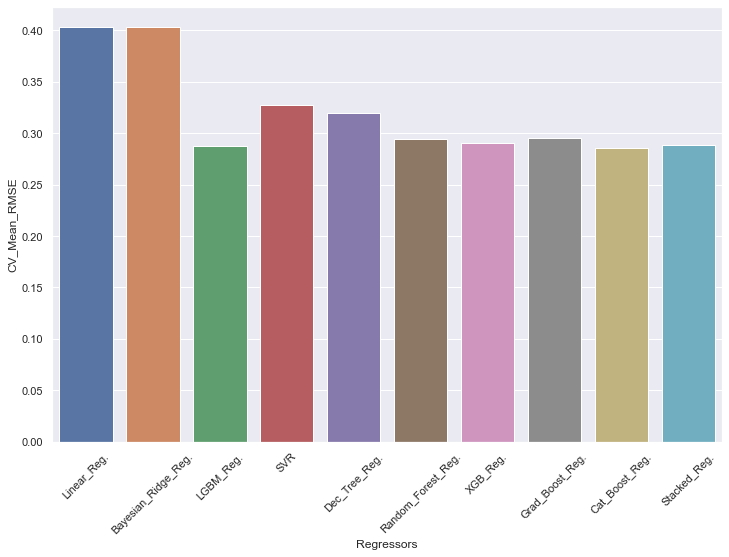

In [120]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [121]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0          Linear_Reg.   0.402946  0.016323
1  Bayesian_Ridge_Reg.   0.402942  0.016344
2            LGBM_Reg.   0.287253  0.009967
3                  SVR   0.327118  0.015763
4        Dec_Tree_Reg.   0.319651  0.015278
5   Random_Forest_Reg.   0.294024  0.014477
6             XGB_Reg.   0.290526  0.012613
7      Grad_Boost_Reg.   0.295135  0.013459
8       Cat_Boost_Reg.   0.285389  0.012021
9         Stacked_Reg.   0.288963  0.012681

In [122]:
# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.28247279743506565

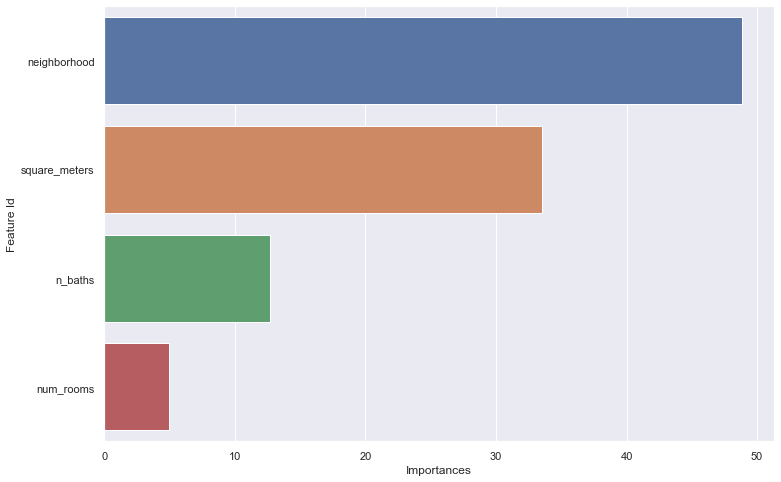

In [123]:
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [124]:
# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

feature1       feature2  importance
0  square_meters   neighborhood   28.707845
1      num_rooms  square_meters   26.087790
2        n_baths  square_meters   22.846066
3        n_baths   neighborhood    8.592077
4      num_rooms   neighborhood    7.802350
5      num_rooms        n_baths    5.963873

In [125]:
# Catboost default paramters

cat_model.get_all_params()
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.4650870	test: 12.4512566	best: 12.4512566 (0)	total: 726us	remaining: 726ms
1:	learn: 12.4588897	test: 12.4450625	best: 12.4450625 (1)	total: 1.74ms	remaining: 866ms
2:	learn: 12.4526925	test: 12.4388797	best: 12.4388797 (2)	total: 2.41ms	remaining: 802ms
3:	learn: 12.4464988	test: 12.4326877	best: 12.4326877 (3)	total: 3.11ms	remaining: 775ms
4:	learn: 12.4402984	test: 12.4264971	best: 12.4264971 (4)	total: 3.79ms	remaining: 754ms
5:	learn: 12.4341112	test: 12.4203110	best: 12.4203110 (5)	total: 4.5ms	remaining: 745ms
6:	learn: 12.4279213	test: 12.4141230	best: 12.4141230 (6)	total: 5.06ms	remaining: 718ms
7:	learn: 12.4217428	test: 12.4079395	best: 12.4079395 (7)	total: 5.7ms	remaining: 707ms
8:	learn: 12.4155648	test: 12.4017801	best: 12.4017801 (8)	total: 6.39ms	remaining: 703ms
9:	learn: 12.4093867	test: 12.3956038	best: 12.3956038 (9)	total: 7.06ms	remaining: 699ms
10:	learn: 12.4032058	test: 12.3894240	best: 12.3894240 (10)	total: 7.52ms	remaining: 676ms
11:	learn: 

207:	learn: 11.2450755	test: 11.2323636	best: 11.2323636 (207)	total: 137ms	remaining: 522ms
208:	learn: 11.2394813	test: 11.2267856	best: 11.2267856 (208)	total: 138ms	remaining: 521ms
209:	learn: 11.2338842	test: 11.2211821	best: 11.2211821 (209)	total: 138ms	remaining: 520ms
210:	learn: 11.2283011	test: 11.2155970	best: 11.2155970 (210)	total: 139ms	remaining: 519ms
211:	learn: 11.2227084	test: 11.2100148	best: 11.2100148 (211)	total: 139ms	remaining: 519ms
212:	learn: 11.2171289	test: 11.2044378	best: 11.2044378 (212)	total: 140ms	remaining: 518ms
213:	learn: 11.2115460	test: 11.1988533	best: 11.1988533 (213)	total: 141ms	remaining: 516ms
214:	learn: 11.2059711	test: 11.1932806	best: 11.1932806 (214)	total: 141ms	remaining: 516ms
215:	learn: 11.2004058	test: 11.1877145	best: 11.1877145 (215)	total: 142ms	remaining: 515ms
216:	learn: 11.1948290	test: 11.1821403	best: 11.1821403 (216)	total: 142ms	remaining: 513ms
217:	learn: 11.1892566	test: 11.1765767	best: 11.1765767 (217)	total: 

427:	learn: 10.0795106	test: 10.0678243	best: 10.0678243 (427)	total: 284ms	remaining: 380ms
428:	learn: 10.0745000	test: 10.0628097	best: 10.0628097 (428)	total: 285ms	remaining: 379ms
429:	learn: 10.0694851	test: 10.0578038	best: 10.0578038 (429)	total: 286ms	remaining: 379ms
430:	learn: 10.0644793	test: 10.0528085	best: 10.0528085 (430)	total: 286ms	remaining: 378ms
431:	learn: 10.0594780	test: 10.0478131	best: 10.0478131 (431)	total: 287ms	remaining: 377ms
432:	learn: 10.0544802	test: 10.0428279	best: 10.0428279 (432)	total: 288ms	remaining: 377ms
433:	learn: 10.0494885	test: 10.0378376	best: 10.0378376 (433)	total: 288ms	remaining: 376ms
434:	learn: 10.0444937	test: 10.0328568	best: 10.0328568 (434)	total: 289ms	remaining: 375ms
435:	learn: 10.0395001	test: 10.0278625	best: 10.0278625 (435)	total: 290ms	remaining: 375ms
436:	learn: 10.0345077	test: 10.0228694	best: 10.0228694 (436)	total: 290ms	remaining: 374ms
437:	learn: 10.0295185	test: 10.0178750	best: 10.0178750 (437)	total: 

603:	learn: 9.2350681	test: 9.2240452	best: 9.2240452 (603)	total: 425ms	remaining: 279ms
604:	learn: 9.2304758	test: 9.2194519	best: 9.2194519 (604)	total: 426ms	remaining: 278ms
605:	learn: 9.2258890	test: 9.2148626	best: 9.2148626 (605)	total: 427ms	remaining: 277ms
606:	learn: 9.2212993	test: 9.2102668	best: 9.2102668 (606)	total: 427ms	remaining: 277ms
607:	learn: 9.2167153	test: 9.2056912	best: 9.2056912 (607)	total: 428ms	remaining: 276ms
608:	learn: 9.2121357	test: 9.2011160	best: 9.2011160 (608)	total: 429ms	remaining: 276ms
609:	learn: 9.2075584	test: 9.1965399	best: 9.1965399 (609)	total: 430ms	remaining: 275ms
610:	learn: 9.2029853	test: 9.1919660	best: 9.1919660 (610)	total: 431ms	remaining: 274ms
611:	learn: 9.1984162	test: 9.1874037	best: 9.1874037 (611)	total: 431ms	remaining: 273ms
612:	learn: 9.1938428	test: 9.1828323	best: 9.1828323 (612)	total: 432ms	remaining: 273ms
613:	learn: 9.1892711	test: 9.1782627	best: 9.1782627 (613)	total: 433ms	remaining: 272ms
614:	learn

819:	learn: 8.2952016	test: 8.2849574	best: 8.2849574 (819)	total: 573ms	remaining: 126ms
820:	learn: 8.2910813	test: 8.2808542	best: 8.2808542 (820)	total: 574ms	remaining: 125ms
821:	learn: 8.2869634	test: 8.2767344	best: 8.2767344 (821)	total: 574ms	remaining: 124ms
822:	learn: 8.2828498	test: 8.2726218	best: 8.2726218 (822)	total: 575ms	remaining: 124ms
823:	learn: 8.2787345	test: 8.2685027	best: 8.2685027 (823)	total: 576ms	remaining: 123ms
824:	learn: 8.2746177	test: 8.2643949	best: 8.2643949 (824)	total: 576ms	remaining: 122ms
825:	learn: 8.2705083	test: 8.2602881	best: 8.2602881 (825)	total: 577ms	remaining: 122ms
826:	learn: 8.2663996	test: 8.2561849	best: 8.2561849 (826)	total: 578ms	remaining: 121ms
827:	learn: 8.2622920	test: 8.2520800	best: 8.2520800 (827)	total: 578ms	remaining: 120ms
828:	learn: 8.2581924	test: 8.2479858	best: 8.2479858 (828)	total: 579ms	remaining: 119ms
829:	learn: 8.2540880	test: 8.2438873	best: 8.2438873 (829)	total: 579ms	remaining: 119ms
830:	learn

28:	learn: 12.2956155	test: 12.2819164	best: 12.2819164 (28)	total: 24ms	remaining: 4.94s
29:	learn: 12.2895803	test: 12.2759083	best: 12.2759083 (29)	total: 24.7ms	remaining: 4.91s
30:	learn: 12.2835675	test: 12.2698686	best: 12.2698686 (30)	total: 25.4ms	remaining: 4.88s
31:	learn: 12.2775103	test: 12.2638133	best: 12.2638133 (31)	total: 26ms	remaining: 4.85s
32:	learn: 12.2714421	test: 12.2577373	best: 12.2577373 (32)	total: 26.5ms	remaining: 4.79s
33:	learn: 12.2654360	test: 12.2517280	best: 12.2517280 (33)	total: 27.1ms	remaining: 4.76s
34:	learn: 12.2594008	test: 12.2456980	best: 12.2456980 (34)	total: 27.6ms	remaining: 4.71s
35:	learn: 12.2533797	test: 12.2396686	best: 12.2396686 (35)	total: 28.3ms	remaining: 4.68s
36:	learn: 12.2473661	test: 12.2336565	best: 12.2336565 (36)	total: 28.9ms	remaining: 4.66s
37:	learn: 12.2413624	test: 12.2276559	best: 12.2276559 (37)	total: 29.5ms	remaining: 4.63s
38:	learn: 12.2353584	test: 12.2216789	best: 12.2216789 (38)	total: 30.2ms	remaining

238:	learn: 11.0949385	test: 11.0811170	best: 11.0811170 (238)	total: 166ms	remaining: 4s
239:	learn: 11.0894502	test: 11.0756307	best: 11.0756307 (239)	total: 166ms	remaining: 3.99s
240:	learn: 11.0840130	test: 11.0702001	best: 11.0702001 (240)	total: 167ms	remaining: 3.99s
241:	learn: 11.0785755	test: 11.0647686	best: 11.0647686 (241)	total: 168ms	remaining: 3.99s
242:	learn: 11.0731875	test: 11.0593916	best: 11.0593916 (242)	total: 168ms	remaining: 3.99s
243:	learn: 11.0677828	test: 11.0540044	best: 11.0540044 (243)	total: 169ms	remaining: 3.98s
244:	learn: 11.0624105	test: 11.0486255	best: 11.0486255 (244)	total: 170ms	remaining: 3.98s
245:	learn: 11.0570002	test: 11.0431967	best: 11.0431967 (245)	total: 170ms	remaining: 3.98s
246:	learn: 11.0516048	test: 11.0378160	best: 11.0378160 (246)	total: 171ms	remaining: 3.98s
247:	learn: 11.0461556	test: 11.0323863	best: 11.0323863 (247)	total: 171ms	remaining: 3.98s
248:	learn: 11.0407576	test: 11.0269914	best: 11.0269914 (248)	total: 172

457:	learn: 9.9678856	test: 9.9542748	best: 9.9542748 (457)	total: 310ms	remaining: 3.75s
458:	learn: 9.9629808	test: 9.9493732	best: 9.9493732 (458)	total: 314ms	remaining: 3.79s
459:	learn: 9.9581219	test: 9.9445014	best: 9.9445014 (459)	total: 315ms	remaining: 3.8s
460:	learn: 9.9532325	test: 9.9396080	best: 9.9396080 (460)	total: 316ms	remaining: 3.79s
461:	learn: 9.9483120	test: 9.9346883	best: 9.9346883 (461)	total: 316ms	remaining: 3.79s
462:	learn: 9.9434396	test: 9.9298175	best: 9.9298175 (462)	total: 317ms	remaining: 3.79s
463:	learn: 9.9385891	test: 9.9249647	best: 9.9249647 (463)	total: 318ms	remaining: 3.79s
464:	learn: 9.9337653	test: 9.9201329	best: 9.9201329 (464)	total: 318ms	remaining: 3.79s
465:	learn: 9.9288588	test: 9.9152279	best: 9.9152279 (465)	total: 319ms	remaining: 3.79s
466:	learn: 9.9239777	test: 9.9103473	best: 9.9103473 (466)	total: 319ms	remaining: 3.78s
467:	learn: 9.9191109	test: 9.9054741	best: 9.9054741 (467)	total: 320ms	remaining: 3.78s
468:	learn:

657:	learn: 9.0405069	test: 9.0268306	best: 9.0268306 (657)	total: 452ms	remaining: 3.67s
658:	learn: 9.0361411	test: 9.0224701	best: 9.0224701 (658)	total: 453ms	remaining: 3.67s
659:	learn: 9.0317000	test: 9.0180238	best: 9.0180238 (659)	total: 454ms	remaining: 3.67s
660:	learn: 9.0272984	test: 9.0136222	best: 9.0136222 (660)	total: 455ms	remaining: 3.67s
661:	learn: 9.0229138	test: 9.0092286	best: 9.0092286 (661)	total: 456ms	remaining: 3.67s
662:	learn: 9.0185084	test: 9.0048333	best: 9.0048333 (662)	total: 456ms	remaining: 3.67s
663:	learn: 9.0141082	test: 9.0004283	best: 9.0004283 (663)	total: 457ms	remaining: 3.67s
664:	learn: 9.0096955	test: 8.9960016	best: 8.9960016 (664)	total: 458ms	remaining: 3.67s
665:	learn: 9.0052958	test: 8.9916211	best: 8.9916211 (665)	total: 459ms	remaining: 3.67s
666:	learn: 9.0009193	test: 8.9872320	best: 8.9872320 (666)	total: 459ms	remaining: 3.67s
667:	learn: 8.9965024	test: 8.9828227	best: 8.9828227 (667)	total: 460ms	remaining: 3.67s
668:	learn

842:	learn: 8.2600605	test: 8.2463898	best: 8.2463898 (842)	total: 593ms	remaining: 3.63s
843:	learn: 8.2560112	test: 8.2423348	best: 8.2423348 (843)	total: 594ms	remaining: 3.63s
844:	learn: 8.2520097	test: 8.2383166	best: 8.2383166 (844)	total: 595ms	remaining: 3.63s
845:	learn: 8.2480077	test: 8.2343044	best: 8.2343044 (845)	total: 596ms	remaining: 3.63s
846:	learn: 8.2439840	test: 8.2302909	best: 8.2302909 (846)	total: 596ms	remaining: 3.63s
847:	learn: 8.2399752	test: 8.2263090	best: 8.2263090 (847)	total: 597ms	remaining: 3.63s
848:	learn: 8.2359464	test: 8.2222758	best: 8.2222758 (848)	total: 598ms	remaining: 3.63s
849:	learn: 8.2319134	test: 8.2182497	best: 8.2182497 (849)	total: 598ms	remaining: 3.62s
850:	learn: 8.2278741	test: 8.2141961	best: 8.2141961 (850)	total: 599ms	remaining: 3.62s
851:	learn: 8.2238616	test: 8.2101877	best: 8.2101877 (851)	total: 599ms	remaining: 3.62s
852:	learn: 8.2198406	test: 8.2061544	best: 8.2061544 (852)	total: 600ms	remaining: 3.62s
853:	learn

1079:	learn: 7.3587879	test: 7.3451291	best: 7.3451291 (1079)	total: 742ms	remaining: 3.38s
1080:	learn: 7.3552073	test: 7.3415671	best: 7.3415671 (1080)	total: 743ms	remaining: 3.38s
1081:	learn: 7.3516201	test: 7.3379817	best: 7.3379817 (1081)	total: 744ms	remaining: 3.38s
1082:	learn: 7.3480173	test: 7.3343756	best: 7.3343756 (1082)	total: 744ms	remaining: 3.38s
1083:	learn: 7.3444445	test: 7.3308101	best: 7.3308101 (1083)	total: 745ms	remaining: 3.38s
1084:	learn: 7.3408729	test: 7.3272403	best: 7.3272403 (1084)	total: 746ms	remaining: 3.38s
1085:	learn: 7.3372889	test: 7.3236598	best: 7.3236598 (1085)	total: 746ms	remaining: 3.38s
1086:	learn: 7.3336726	test: 7.3200441	best: 7.3200441 (1086)	total: 747ms	remaining: 3.37s
1087:	learn: 7.3301286	test: 7.3164993	best: 7.3164993 (1087)	total: 747ms	remaining: 3.37s
1088:	learn: 7.3265504	test: 7.3129036	best: 7.3129036 (1088)	total: 748ms	remaining: 3.37s
1089:	learn: 7.3229625	test: 7.3093252	best: 7.3093252 (1089)	total: 748ms	remai

1304:	learn: 6.5957082	test: 6.5823028	best: 6.5823028 (1304)	total: 890ms	remaining: 3.2s
1305:	learn: 6.5924771	test: 6.5790701	best: 6.5790701 (1305)	total: 890ms	remaining: 3.2s
1306:	learn: 6.5892641	test: 6.5758477	best: 6.5758477 (1306)	total: 891ms	remaining: 3.2s
1307:	learn: 6.5860320	test: 6.5726134	best: 6.5726134 (1307)	total: 892ms	remaining: 3.2s
1308:	learn: 6.5828669	test: 6.5694466	best: 6.5694466 (1308)	total: 892ms	remaining: 3.2s
1309:	learn: 6.5796790	test: 6.5662621	best: 6.5662621 (1309)	total: 893ms	remaining: 3.2s
1310:	learn: 6.5764674	test: 6.5630522	best: 6.5630522 (1310)	total: 894ms	remaining: 3.19s
1311:	learn: 6.5732846	test: 6.5598775	best: 6.5598775 (1311)	total: 894ms	remaining: 3.19s
1312:	learn: 6.5700883	test: 6.5566801	best: 6.5566801 (1312)	total: 895ms	remaining: 3.19s
1313:	learn: 6.5668726	test: 6.5534726	best: 6.5534726 (1313)	total: 896ms	remaining: 3.19s
1314:	learn: 6.5636774	test: 6.5502778	best: 6.5502778 (1314)	total: 896ms	remaining: 

1520:	learn: 5.9387710	test: 5.9254970	best: 5.9254970 (1520)	total: 1.04s	remaining: 3.05s
1521:	learn: 5.9359025	test: 5.9226434	best: 5.9226434 (1521)	total: 1.04s	remaining: 3.05s
1522:	learn: 5.9330282	test: 5.9197715	best: 5.9197715 (1522)	total: 1.04s	remaining: 3.05s
1523:	learn: 5.9301506	test: 5.9168954	best: 5.9168954 (1523)	total: 1.04s	remaining: 3.05s
1524:	learn: 5.9272787	test: 5.9140184	best: 5.9140184 (1524)	total: 1.04s	remaining: 3.05s
1525:	learn: 5.9244462	test: 5.9111878	best: 5.9111878 (1525)	total: 1.04s	remaining: 3.05s
1526:	learn: 5.9215914	test: 5.9083321	best: 5.9083321 (1526)	total: 1.04s	remaining: 3.05s
1527:	learn: 5.9187313	test: 5.9054646	best: 5.9054646 (1527)	total: 1.04s	remaining: 3.05s
1528:	learn: 5.9158484	test: 5.9025715	best: 5.9025715 (1528)	total: 1.04s	remaining: 3.05s
1529:	learn: 5.9129925	test: 5.8997193	best: 5.8997193 (1529)	total: 1.04s	remaining: 3.05s
1530:	learn: 5.9101413	test: 5.8968600	best: 5.8968600 (1530)	total: 1.04s	remai

1749:	learn: 5.3151808	test: 5.3019303	best: 5.3019303 (1749)	total: 1.19s	remaining: 2.88s
1750:	learn: 5.3126179	test: 5.2993664	best: 5.2993664 (1750)	total: 1.19s	remaining: 2.88s
1751:	learn: 5.3100362	test: 5.2967776	best: 5.2967776 (1751)	total: 1.19s	remaining: 2.88s
1752:	learn: 5.3074780	test: 5.2942104	best: 5.2942104 (1752)	total: 1.19s	remaining: 2.88s
1753:	learn: 5.3049097	test: 5.2916369	best: 5.2916369 (1753)	total: 1.19s	remaining: 2.88s
1754:	learn: 5.3023853	test: 5.2891096	best: 5.2891096 (1754)	total: 1.19s	remaining: 2.88s
1755:	learn: 5.2998288	test: 5.2865648	best: 5.2865648 (1755)	total: 1.19s	remaining: 2.88s
1756:	learn: 5.2972972	test: 5.2840283	best: 5.2840283 (1756)	total: 1.19s	remaining: 2.88s
1757:	learn: 5.2947350	test: 5.2814683	best: 5.2814683 (1757)	total: 1.19s	remaining: 2.88s
1758:	learn: 5.2921783	test: 5.2789213	best: 5.2789213 (1758)	total: 1.19s	remaining: 2.88s
1759:	learn: 5.2896177	test: 5.2763648	best: 5.2763648 (1759)	total: 1.19s	remai

1970:	learn: 4.7767851	test: 4.7636629	best: 4.7636629 (1970)	total: 1.33s	remaining: 2.73s
1971:	learn: 4.7744676	test: 4.7613512	best: 4.7613512 (1971)	total: 1.33s	remaining: 2.73s
1972:	learn: 4.7721487	test: 4.7590381	best: 4.7590381 (1972)	total: 1.34s	remaining: 2.73s
1973:	learn: 4.7698441	test: 4.7567348	best: 4.7567348 (1973)	total: 1.34s	remaining: 2.73s
1974:	learn: 4.7675464	test: 4.7544387	best: 4.7544387 (1974)	total: 1.34s	remaining: 2.73s
1975:	learn: 4.7652243	test: 4.7521148	best: 4.7521148 (1975)	total: 1.34s	remaining: 2.73s
1976:	learn: 4.7629450	test: 4.7498312	best: 4.7498312 (1976)	total: 1.34s	remaining: 2.72s
1977:	learn: 4.7606497	test: 4.7475390	best: 4.7475390 (1977)	total: 1.34s	remaining: 2.72s
1978:	learn: 4.7583612	test: 4.7452533	best: 4.7452533 (1978)	total: 1.34s	remaining: 2.72s
1979:	learn: 4.7560543	test: 4.7429429	best: 4.7429429 (1979)	total: 1.34s	remaining: 2.72s
1980:	learn: 4.7537690	test: 4.7406553	best: 4.7406553 (1980)	total: 1.34s	remai

2193:	learn: 4.2896709	test: 4.2767710	best: 4.2767710 (2193)	total: 1.49s	remaining: 2.58s
2194:	learn: 4.2875985	test: 4.2747103	best: 4.2747103 (2194)	total: 1.49s	remaining: 2.58s
2195:	learn: 4.2855370	test: 4.2726501	best: 4.2726501 (2195)	total: 1.49s	remaining: 2.58s
2196:	learn: 4.2834834	test: 4.2705991	best: 4.2705991 (2196)	total: 1.49s	remaining: 2.58s
2197:	learn: 4.2814449	test: 4.2685631	best: 4.2685631 (2197)	total: 1.49s	remaining: 2.58s
2198:	learn: 4.2793908	test: 4.2665057	best: 4.2665057 (2198)	total: 1.49s	remaining: 2.58s
2199:	learn: 4.2773496	test: 4.2644596	best: 4.2644596 (2199)	total: 1.49s	remaining: 2.58s
2200:	learn: 4.2752854	test: 4.2623973	best: 4.2623973 (2200)	total: 1.49s	remaining: 2.58s
2201:	learn: 4.2732348	test: 4.2603548	best: 4.2603548 (2201)	total: 1.49s	remaining: 2.58s
2202:	learn: 4.2711865	test: 4.2583062	best: 4.2583062 (2202)	total: 1.49s	remaining: 2.57s
2203:	learn: 4.2691298	test: 4.2562492	best: 4.2562492 (2203)	total: 1.49s	remai

2414:	learn: 3.8576839	test: 3.8449539	best: 3.8449539 (2414)	total: 1.63s	remaining: 2.42s
2415:	learn: 3.8558461	test: 3.8431088	best: 3.8431088 (2415)	total: 1.63s	remaining: 2.42s
2416:	learn: 3.8540271	test: 3.8412877	best: 3.8412877 (2416)	total: 1.63s	remaining: 2.42s
2417:	learn: 3.8521845	test: 3.8394444	best: 3.8394444 (2417)	total: 1.64s	remaining: 2.42s
2418:	learn: 3.8503407	test: 3.8375913	best: 3.8375913 (2418)	total: 1.64s	remaining: 2.42s
2419:	learn: 3.8484854	test: 3.8357350	best: 3.8357350 (2419)	total: 1.64s	remaining: 2.42s
2420:	learn: 3.8466466	test: 3.8339042	best: 3.8339042 (2420)	total: 1.64s	remaining: 2.42s
2421:	learn: 3.8447912	test: 3.8320452	best: 3.8320452 (2421)	total: 1.64s	remaining: 2.42s
2422:	learn: 3.8429289	test: 3.8301831	best: 3.8301831 (2422)	total: 1.64s	remaining: 2.42s
2423:	learn: 3.8410837	test: 3.8283342	best: 3.8283342 (2423)	total: 1.64s	remaining: 2.42s
2424:	learn: 3.8392230	test: 3.8264720	best: 3.8264720 (2424)	total: 1.64s	remai

2652:	learn: 3.4421743	test: 3.4295242	best: 3.4295242 (2652)	total: 1.78s	remaining: 2.25s
2653:	learn: 3.4405275	test: 3.4278765	best: 3.4278765 (2653)	total: 1.78s	remaining: 2.25s
2654:	learn: 3.4388776	test: 3.4262215	best: 3.4262215 (2654)	total: 1.78s	remaining: 2.25s
2655:	learn: 3.4372332	test: 3.4245802	best: 3.4245802 (2655)	total: 1.79s	remaining: 2.25s
2656:	learn: 3.4355830	test: 3.4229349	best: 3.4229349 (2656)	total: 1.79s	remaining: 2.25s
2657:	learn: 3.4339349	test: 3.4212808	best: 3.4212808 (2657)	total: 1.79s	remaining: 2.25s
2658:	learn: 3.4322770	test: 3.4196153	best: 3.4196153 (2658)	total: 1.79s	remaining: 2.25s
2659:	learn: 3.4306282	test: 3.4179576	best: 3.4179576 (2659)	total: 1.79s	remaining: 2.25s
2660:	learn: 3.4289975	test: 3.4163372	best: 3.4163372 (2660)	total: 1.79s	remaining: 2.24s
2661:	learn: 3.4273658	test: 3.4147099	best: 3.4147099 (2661)	total: 1.79s	remaining: 2.24s
2662:	learn: 3.4257360	test: 3.4130757	best: 3.4130757 (2662)	total: 1.79s	remai

2862:	learn: 3.1142880	test: 3.1016794	best: 3.1016794 (2862)	total: 1.93s	remaining: 2.11s
2863:	learn: 3.1128194	test: 3.1002014	best: 3.1002014 (2863)	total: 1.93s	remaining: 2.11s
2864:	learn: 3.1113254	test: 3.0987041	best: 3.0987041 (2864)	total: 1.93s	remaining: 2.11s
2865:	learn: 3.1098359	test: 3.0972154	best: 3.0972154 (2865)	total: 1.93s	remaining: 2.11s
2866:	learn: 3.1083572	test: 3.0957307	best: 3.0957307 (2866)	total: 1.93s	remaining: 2.11s
2867:	learn: 3.1068739	test: 3.0942395	best: 3.0942395 (2867)	total: 1.93s	remaining: 2.11s
2868:	learn: 3.1053912	test: 3.0927534	best: 3.0927534 (2868)	total: 1.93s	remaining: 2.11s
2869:	learn: 3.1039173	test: 3.0912784	best: 3.0912784 (2869)	total: 1.93s	remaining: 2.11s
2870:	learn: 3.1024422	test: 3.0898034	best: 3.0898034 (2870)	total: 1.93s	remaining: 2.11s
2871:	learn: 3.1009775	test: 3.0883368	best: 3.0883368 (2871)	total: 1.93s	remaining: 2.11s
2872:	learn: 3.0995008	test: 3.0868647	best: 3.0868647 (2872)	total: 1.94s	remai

3073:	learn: 2.8177130	test: 2.8051924	best: 2.8051924 (3073)	total: 2.07s	remaining: 1.97s
3074:	learn: 2.8163862	test: 2.8038613	best: 2.8038613 (3074)	total: 2.07s	remaining: 1.97s
3075:	learn: 2.8150571	test: 2.8025358	best: 2.8025358 (3075)	total: 2.07s	remaining: 1.97s
3076:	learn: 2.8137243	test: 2.8012081	best: 2.8012081 (3076)	total: 2.08s	remaining: 1.97s
3077:	learn: 2.8124082	test: 2.7998886	best: 2.7998886 (3077)	total: 2.08s	remaining: 1.97s
3078:	learn: 2.8110770	test: 2.7985503	best: 2.7985503 (3078)	total: 2.08s	remaining: 1.97s
3079:	learn: 2.8097473	test: 2.7972245	best: 2.7972245 (3079)	total: 2.08s	remaining: 1.97s
3080:	learn: 2.8084229	test: 2.7958979	best: 2.7958979 (3080)	total: 2.08s	remaining: 1.97s
3081:	learn: 2.8070966	test: 2.7945675	best: 2.7945675 (3081)	total: 2.08s	remaining: 1.97s
3082:	learn: 2.8057626	test: 2.7932342	best: 2.7932342 (3082)	total: 2.08s	remaining: 1.97s
3083:	learn: 2.8044272	test: 2.7919001	best: 2.7919001 (3083)	total: 2.08s	remai

3300:	learn: 2.5319923	test: 2.5193674	best: 2.5193674 (3300)	total: 2.22s	remaining: 1.81s
3301:	learn: 2.5308231	test: 2.5182035	best: 2.5182035 (3301)	total: 2.22s	remaining: 1.81s
3302:	learn: 2.5296424	test: 2.5170276	best: 2.5170276 (3302)	total: 2.22s	remaining: 1.81s
3303:	learn: 2.5284571	test: 2.5158345	best: 2.5158345 (3303)	total: 2.22s	remaining: 1.81s
3304:	learn: 2.5272787	test: 2.5146515	best: 2.5146515 (3304)	total: 2.22s	remaining: 1.81s
3305:	learn: 2.5260908	test: 2.5134587	best: 2.5134587 (3305)	total: 2.22s	remaining: 1.81s
3306:	learn: 2.5248997	test: 2.5122592	best: 2.5122592 (3306)	total: 2.22s	remaining: 1.81s
3307:	learn: 2.5237062	test: 2.5110690	best: 2.5110690 (3307)	total: 2.23s	remaining: 1.81s
3308:	learn: 2.5225059	test: 2.5098672	best: 2.5098672 (3308)	total: 2.23s	remaining: 1.81s
3309:	learn: 2.5213297	test: 2.5086963	best: 2.5086963 (3309)	total: 2.23s	remaining: 1.81s
3310:	learn: 2.5201450	test: 2.5075114	best: 2.5075114 (3310)	total: 2.23s	remai

3530:	learn: 2.2736123	test: 2.2607986	best: 2.2607986 (3530)	total: 2.37s	remaining: 1.66s
3531:	learn: 2.2725585	test: 2.2597401	best: 2.2597401 (3531)	total: 2.37s	remaining: 1.66s
3532:	learn: 2.2715077	test: 2.2586904	best: 2.2586904 (3532)	total: 2.37s	remaining: 1.66s
3533:	learn: 2.2704404	test: 2.2576185	best: 2.2576185 (3533)	total: 2.37s	remaining: 1.66s
3534:	learn: 2.2693858	test: 2.2565627	best: 2.2565627 (3534)	total: 2.37s	remaining: 1.65s
3535:	learn: 2.2683274	test: 2.2555057	best: 2.2555057 (3535)	total: 2.37s	remaining: 1.65s
3536:	learn: 2.2672641	test: 2.2544455	best: 2.2544455 (3536)	total: 2.37s	remaining: 1.65s
3537:	learn: 2.2662014	test: 2.2533817	best: 2.2533817 (3537)	total: 2.37s	remaining: 1.65s
3538:	learn: 2.2651400	test: 2.2523140	best: 2.2523140 (3538)	total: 2.38s	remaining: 1.65s
3539:	learn: 2.2640846	test: 2.2512568	best: 2.2512568 (3539)	total: 2.38s	remaining: 1.65s
3540:	learn: 2.2630245	test: 2.2501944	best: 2.2501944 (3540)	total: 2.38s	remai

3732:	learn: 2.0703333	test: 2.0574321	best: 2.0574321 (3732)	total: 2.52s	remaining: 1.53s
3733:	learn: 2.0693865	test: 2.0564843	best: 2.0564843 (3733)	total: 2.52s	remaining: 1.53s
3734:	learn: 2.0684276	test: 2.0555293	best: 2.0555293 (3734)	total: 2.52s	remaining: 1.53s
3735:	learn: 2.0674685	test: 2.0545666	best: 2.0545666 (3735)	total: 2.52s	remaining: 1.53s
3736:	learn: 2.0665102	test: 2.0536076	best: 2.0536076 (3736)	total: 2.52s	remaining: 1.52s
3737:	learn: 2.0655595	test: 2.0526562	best: 2.0526562 (3737)	total: 2.52s	remaining: 1.52s
3738:	learn: 2.0646088	test: 2.0517017	best: 2.0517017 (3738)	total: 2.52s	remaining: 1.52s
3739:	learn: 2.0636620	test: 2.0507537	best: 2.0507537 (3739)	total: 2.52s	remaining: 1.52s
3740:	learn: 2.0627012	test: 2.0497896	best: 2.0497896 (3740)	total: 2.52s	remaining: 1.52s
3741:	learn: 2.0617389	test: 2.0488345	best: 2.0488345 (3741)	total: 2.52s	remaining: 1.52s
3742:	learn: 2.0607952	test: 2.0478887	best: 2.0478887 (3742)	total: 2.52s	remai

3911:	learn: 1.9067268	test: 1.8936934	best: 1.8936934 (3911)	total: 2.66s	remaining: 1.42s
3912:	learn: 1.9058480	test: 1.8928177	best: 1.8928177 (3912)	total: 2.66s	remaining: 1.42s
3913:	learn: 1.9049787	test: 1.8919427	best: 1.8919427 (3913)	total: 2.66s	remaining: 1.42s
3914:	learn: 1.9041027	test: 1.8910665	best: 1.8910665 (3914)	total: 2.66s	remaining: 1.42s
3915:	learn: 1.9032318	test: 1.8901939	best: 1.8901939 (3915)	total: 2.66s	remaining: 1.42s
3916:	learn: 1.9023680	test: 1.8893310	best: 1.8893310 (3916)	total: 2.66s	remaining: 1.42s
3917:	learn: 1.9015026	test: 1.8884604	best: 1.8884604 (3917)	total: 2.66s	remaining: 1.42s
3918:	learn: 1.9006312	test: 1.8875853	best: 1.8875853 (3918)	total: 2.66s	remaining: 1.41s
3919:	learn: 1.8997535	test: 1.8867144	best: 1.8867144 (3919)	total: 2.66s	remaining: 1.41s
3920:	learn: 1.8988884	test: 1.8858451	best: 1.8858451 (3920)	total: 2.67s	remaining: 1.41s
3921:	learn: 1.8980229	test: 1.8849722	best: 1.8849722 (3921)	total: 2.67s	remai

4107:	learn: 1.7438754	test: 1.7306922	best: 1.7306922 (4107)	total: 2.8s	remaining: 1.29s
4108:	learn: 1.7430987	test: 1.7299104	best: 1.7299104 (4108)	total: 2.8s	remaining: 1.29s
4109:	learn: 1.7423176	test: 1.7291284	best: 1.7291284 (4109)	total: 2.8s	remaining: 1.29s
4110:	learn: 1.7415252	test: 1.7283356	best: 1.7283356 (4110)	total: 2.8s	remaining: 1.29s
4111:	learn: 1.7407318	test: 1.7275365	best: 1.7275365 (4111)	total: 2.81s	remaining: 1.29s
4112:	learn: 1.7399445	test: 1.7267516	best: 1.7267516 (4112)	total: 2.81s	remaining: 1.29s
4113:	learn: 1.7391511	test: 1.7259573	best: 1.7259573 (4113)	total: 2.81s	remaining: 1.29s
4114:	learn: 1.7383754	test: 1.7251724	best: 1.7251724 (4114)	total: 2.81s	remaining: 1.29s
4115:	learn: 1.7375783	test: 1.7243774	best: 1.7243774 (4115)	total: 2.81s	remaining: 1.28s
4116:	learn: 1.7368004	test: 1.7235939	best: 1.7235939 (4116)	total: 2.81s	remaining: 1.28s
4117:	learn: 1.7360201	test: 1.7228098	best: 1.7228098 (4117)	total: 2.81s	remaining

4299:	learn: 1.5994004	test: 1.5858950	best: 1.5858950 (4299)	total: 2.95s	remaining: 1.17s
4300:	learn: 1.5986826	test: 1.5851738	best: 1.5851738 (4300)	total: 2.95s	remaining: 1.16s
4301:	learn: 1.5979653	test: 1.5844542	best: 1.5844542 (4301)	total: 2.95s	remaining: 1.16s
4302:	learn: 1.5972519	test: 1.5837466	best: 1.5837466 (4302)	total: 2.95s	remaining: 1.16s
4303:	learn: 1.5965450	test: 1.5830413	best: 1.5830413 (4303)	total: 2.95s	remaining: 1.16s
4304:	learn: 1.5958322	test: 1.5823304	best: 1.5823304 (4304)	total: 2.95s	remaining: 1.16s
4305:	learn: 1.5951204	test: 1.5816211	best: 1.5816211 (4305)	total: 2.95s	remaining: 1.16s
4306:	learn: 1.5943982	test: 1.5808943	best: 1.5808943 (4306)	total: 2.95s	remaining: 1.16s
4307:	learn: 1.5936832	test: 1.5801805	best: 1.5801805 (4307)	total: 2.96s	remaining: 1.16s
4308:	learn: 1.5929725	test: 1.5794691	best: 1.5794691 (4308)	total: 2.96s	remaining: 1.16s
4309:	learn: 1.5922678	test: 1.5787613	best: 1.5787613 (4309)	total: 2.96s	remai

4499:	learn: 1.4633137	test: 1.4494908	best: 1.4494908 (4499)	total: 3.09s	remaining: 1.03s
4500:	learn: 1.4626618	test: 1.4488347	best: 1.4488347 (4500)	total: 3.09s	remaining: 1.03s
4501:	learn: 1.4620274	test: 1.4481951	best: 1.4481951 (4501)	total: 3.09s	remaining: 1.03s
4502:	learn: 1.4613848	test: 1.4475543	best: 1.4475543 (4502)	total: 3.09s	remaining: 1.03s
4503:	learn: 1.4607429	test: 1.4469149	best: 1.4469149 (4503)	total: 3.1s	remaining: 1.03s
4504:	learn: 1.4600896	test: 1.4462571	best: 1.4462571 (4504)	total: 3.1s	remaining: 1.03s
4505:	learn: 1.4594535	test: 1.4456230	best: 1.4456230 (4505)	total: 3.1s	remaining: 1.03s
4506:	learn: 1.4588079	test: 1.4449738	best: 1.4449738 (4506)	total: 3.1s	remaining: 1.03s
4507:	learn: 1.4581696	test: 1.4443342	best: 1.4443342 (4507)	total: 3.1s	remaining: 1.02s
4508:	learn: 1.4575225	test: 1.4436858	best: 1.4436858 (4508)	total: 3.1s	remaining: 1.02s
4509:	learn: 1.4568798	test: 1.4430406	best: 1.4430406 (4509)	total: 3.1s	remaining: 1

4711:	learn: 1.3336259	test: 1.3194164	best: 1.3194164 (4711)	total: 3.24s	remaining: 885ms
4712:	learn: 1.3330424	test: 1.3188300	best: 1.3188300 (4712)	total: 3.24s	remaining: 885ms
4713:	learn: 1.3324629	test: 1.3182460	best: 1.3182460 (4713)	total: 3.24s	remaining: 884ms
4714:	learn: 1.3318851	test: 1.3176648	best: 1.3176648 (4714)	total: 3.24s	remaining: 883ms
4715:	learn: 1.3313026	test: 1.3170761	best: 1.3170761 (4715)	total: 3.24s	remaining: 883ms
4716:	learn: 1.3307182	test: 1.3164886	best: 1.3164886 (4716)	total: 3.24s	remaining: 882ms
4717:	learn: 1.3301524	test: 1.3159216	best: 1.3159216 (4717)	total: 3.24s	remaining: 881ms
4718:	learn: 1.3295797	test: 1.3153410	best: 1.3153410 (4718)	total: 3.24s	remaining: 881ms
4719:	learn: 1.3289989	test: 1.3147589	best: 1.3147589 (4719)	total: 3.24s	remaining: 880ms
4720:	learn: 1.3284187	test: 1.3141741	best: 1.3141741 (4720)	total: 3.25s	remaining: 879ms
4721:	learn: 1.3278372	test: 1.3135905	best: 1.3135905 (4721)	total: 3.25s	remai

4930:	learn: 1.2138498	test: 1.1992167	best: 1.1992167 (4930)	total: 3.39s	remaining: 734ms
4931:	learn: 1.2133319	test: 1.1986996	best: 1.1986996 (4931)	total: 3.39s	remaining: 734ms
4932:	learn: 1.2128125	test: 1.1981796	best: 1.1981796 (4932)	total: 3.39s	remaining: 733ms
4933:	learn: 1.2122957	test: 1.1976605	best: 1.1976605 (4933)	total: 3.39s	remaining: 732ms
4934:	learn: 1.2117771	test: 1.1971385	best: 1.1971385 (4934)	total: 3.39s	remaining: 732ms
4935:	learn: 1.2112611	test: 1.1966199	best: 1.1966199 (4935)	total: 3.39s	remaining: 731ms
4936:	learn: 1.2107497	test: 1.1961103	best: 1.1961103 (4936)	total: 3.39s	remaining: 730ms
4937:	learn: 1.2102386	test: 1.1955938	best: 1.1955938 (4937)	total: 3.39s	remaining: 730ms
4938:	learn: 1.2097263	test: 1.1950807	best: 1.1950807 (4938)	total: 3.39s	remaining: 729ms
4939:	learn: 1.2092023	test: 1.1945482	best: 1.1945482 (4939)	total: 3.39s	remaining: 728ms
4940:	learn: 1.2086961	test: 1.1940432	best: 1.1940432 (4940)	total: 3.4s	remain

5156:	learn: 1.1039418	test: 1.0887638	best: 1.0887638 (5156)	total: 3.54s	remaining: 579ms
5157:	learn: 1.1034824	test: 1.0883040	best: 1.0883040 (5157)	total: 3.54s	remaining: 578ms
5158:	learn: 1.1030125	test: 1.0878263	best: 1.0878263 (5158)	total: 3.54s	remaining: 577ms
5159:	learn: 1.1025574	test: 1.0873725	best: 1.0873725 (5159)	total: 3.54s	remaining: 577ms
5160:	learn: 1.1021077	test: 1.0869233	best: 1.0869233 (5160)	total: 3.54s	remaining: 576ms
5161:	learn: 1.1016477	test: 1.0864600	best: 1.0864600 (5161)	total: 3.54s	remaining: 575ms
5162:	learn: 1.1011939	test: 1.0860035	best: 1.0860035 (5162)	total: 3.54s	remaining: 575ms
5163:	learn: 1.1007311	test: 1.0855360	best: 1.0855360 (5163)	total: 3.54s	remaining: 574ms
5164:	learn: 1.1002723	test: 1.0850769	best: 1.0850769 (5164)	total: 3.55s	remaining: 573ms
5165:	learn: 1.0998172	test: 1.0846167	best: 1.0846167 (5165)	total: 3.55s	remaining: 573ms
5166:	learn: 1.0993655	test: 1.0841729	best: 1.0841729 (5166)	total: 3.55s	remai

5354:	learn: 1.0181004	test: 1.0023974	best: 1.0023974 (5354)	total: 3.69s	remaining: 444ms
5355:	learn: 1.0176924	test: 1.0019881	best: 1.0019881 (5355)	total: 3.69s	remaining: 443ms
5356:	learn: 1.0172799	test: 1.0015742	best: 1.0015742 (5356)	total: 3.69s	remaining: 443ms
5357:	learn: 1.0168655	test: 1.0011514	best: 1.0011514 (5357)	total: 3.69s	remaining: 442ms
5358:	learn: 1.0164435	test: 1.0007247	best: 1.0007247 (5358)	total: 3.69s	remaining: 441ms
5359:	learn: 1.0160421	test: 1.0003291	best: 1.0003291 (5359)	total: 3.69s	remaining: 441ms
5360:	learn: 1.0156371	test: 0.9999177	best: 0.9999177 (5360)	total: 3.69s	remaining: 440ms
5361:	learn: 1.0152318	test: 0.9995133	best: 0.9995133 (5361)	total: 3.69s	remaining: 439ms
5362:	learn: 1.0148179	test: 0.9990996	best: 0.9990996 (5362)	total: 3.69s	remaining: 439ms
5363:	learn: 1.0144146	test: 0.9987000	best: 0.9987000 (5363)	total: 3.69s	remaining: 438ms
5364:	learn: 1.0140067	test: 0.9982857	best: 0.9982857 (5364)	total: 3.69s	remai

5544:	learn: 0.9439624	test: 0.9276603	best: 0.9276603 (5544)	total: 3.83s	remaining: 314ms
5545:	learn: 0.9435980	test: 0.9272930	best: 0.9272930 (5545)	total: 3.83s	remaining: 313ms
5546:	learn: 0.9432340	test: 0.9269232	best: 0.9269232 (5546)	total: 3.83s	remaining: 313ms
5547:	learn: 0.9428677	test: 0.9265558	best: 0.9265558 (5547)	total: 3.83s	remaining: 312ms
5548:	learn: 0.9424996	test: 0.9261845	best: 0.9261845 (5548)	total: 3.83s	remaining: 311ms
5549:	learn: 0.9421358	test: 0.9258196	best: 0.9258196 (5549)	total: 3.83s	remaining: 311ms
5550:	learn: 0.9417680	test: 0.9254461	best: 0.9254461 (5550)	total: 3.83s	remaining: 310ms
5551:	learn: 0.9413975	test: 0.9250667	best: 0.9250667 (5551)	total: 3.83s	remaining: 309ms
5552:	learn: 0.9410372	test: 0.9247072	best: 0.9247072 (5552)	total: 3.83s	remaining: 309ms
5553:	learn: 0.9406734	test: 0.9243400	best: 0.9243400 (5553)	total: 3.83s	remaining: 308ms
5554:	learn: 0.9403101	test: 0.9239767	best: 0.9239767 (5554)	total: 3.83s	remai

5761:	learn: 0.8681252	test: 0.8510638	best: 0.8510638 (5761)	total: 3.98s	remaining: 164ms
5762:	learn: 0.8677986	test: 0.8507325	best: 0.8507325 (5762)	total: 3.98s	remaining: 164ms
5763:	learn: 0.8674749	test: 0.8504050	best: 0.8504050 (5763)	total: 3.98s	remaining: 163ms
5764:	learn: 0.8671536	test: 0.8500797	best: 0.8500797 (5764)	total: 3.98s	remaining: 162ms
5765:	learn: 0.8668291	test: 0.8497474	best: 0.8497474 (5765)	total: 3.98s	remaining: 162ms
5766:	learn: 0.8665075	test: 0.8494249	best: 0.8494249 (5766)	total: 3.98s	remaining: 161ms
5767:	learn: 0.8661811	test: 0.8490950	best: 0.8490950 (5767)	total: 3.98s	remaining: 160ms
5768:	learn: 0.8658583	test: 0.8487735	best: 0.8487735 (5768)	total: 3.98s	remaining: 159ms
5769:	learn: 0.8655324	test: 0.8484468	best: 0.8484468 (5769)	total: 3.98s	remaining: 159ms
5770:	learn: 0.8651986	test: 0.8481106	best: 0.8481106 (5770)	total: 3.98s	remaining: 158ms
5771:	learn: 0.8648720	test: 0.8477794	best: 0.8477794 (5771)	total: 3.98s	remai

5983:	learn: 0.7994520	test: 0.7815630	best: 0.7815630 (5983)	total: 4.13s	remaining: 11ms
5984:	learn: 0.7991661	test: 0.7812765	best: 0.7812765 (5984)	total: 4.13s	remaining: 10.3ms
5985:	learn: 0.7988849	test: 0.7809988	best: 0.7809988 (5985)	total: 4.13s	remaining: 9.66ms
5986:	learn: 0.7986015	test: 0.7807120	best: 0.7807120 (5986)	total: 4.13s	remaining: 8.97ms
5987:	learn: 0.7983143	test: 0.7804170	best: 0.7804170 (5987)	total: 4.13s	remaining: 8.28ms
5988:	learn: 0.7980223	test: 0.7801231	best: 0.7801231 (5988)	total: 4.13s	remaining: 7.59ms
5989:	learn: 0.7977294	test: 0.7798288	best: 0.7798288 (5989)	total: 4.13s	remaining: 6.9ms
5990:	learn: 0.7974364	test: 0.7795352	best: 0.7795352 (5990)	total: 4.13s	remaining: 6.21ms
5991:	learn: 0.7971489	test: 0.7792436	best: 0.7792436 (5991)	total: 4.13s	remaining: 5.52ms
5992:	learn: 0.7968631	test: 0.7789512	best: 0.7789512 (5992)	total: 4.13s	remaining: 4.83ms
5993:	learn: 0.7965730	test: 0.7786617	best: 0.7786617 (5993)	total: 4.13

112:	learn: 11.7904212	test: 11.7772971	best: 11.7772971 (112)	total: 133ms	remaining: 6.94s
113:	learn: 11.7845492	test: 11.7714277	best: 11.7714277 (113)	total: 134ms	remaining: 6.9s
114:	learn: 11.7786936	test: 11.7655732	best: 11.7655732 (114)	total: 135ms	remaining: 6.89s
115:	learn: 11.7728379	test: 11.7597325	best: 11.7597325 (115)	total: 136ms	remaining: 6.89s
116:	learn: 11.7669805	test: 11.7538809	best: 11.7538809 (116)	total: 137ms	remaining: 6.88s
117:	learn: 11.7611386	test: 11.7480522	best: 11.7480522 (117)	total: 138ms	remaining: 6.88s
118:	learn: 11.7553040	test: 11.7422189	best: 11.7422189 (118)	total: 139ms	remaining: 6.88s
119:	learn: 11.7494716	test: 11.7363908	best: 11.7363908 (119)	total: 141ms	remaining: 6.89s
120:	learn: 11.7436344	test: 11.7305513	best: 11.7305513 (120)	total: 142ms	remaining: 6.88s
121:	learn: 11.7378060	test: 11.7247394	best: 11.7247394 (121)	total: 143ms	remaining: 6.89s
122:	learn: 11.7319678	test: 11.7189054	best: 11.7189054 (122)	total: 1

256:	learn: 10.9764681	test: 10.9643544	best: 10.9643544 (256)	total: 289ms	remaining: 6.46s
257:	learn: 10.9710004	test: 10.9588891	best: 10.9588891 (257)	total: 290ms	remaining: 6.45s
258:	learn: 10.9655393	test: 10.9534278	best: 10.9534278 (258)	total: 290ms	remaining: 6.43s
259:	learn: 10.9601016	test: 10.9479884	best: 10.9479884 (259)	total: 291ms	remaining: 6.43s
260:	learn: 10.9546457	test: 10.9425332	best: 10.9425332 (260)	total: 292ms	remaining: 6.42s
261:	learn: 10.9492127	test: 10.9371038	best: 10.9371038 (261)	total: 293ms	remaining: 6.42s
262:	learn: 10.9437713	test: 10.9316852	best: 10.9316852 (262)	total: 294ms	remaining: 6.42s
263:	learn: 10.9383286	test: 10.9262573	best: 10.9262573 (263)	total: 295ms	remaining: 6.42s
264:	learn: 10.9328998	test: 10.9208250	best: 10.9208250 (264)	total: 296ms	remaining: 6.41s
265:	learn: 10.9274711	test: 10.9154030	best: 10.9154030 (265)	total: 298ms	remaining: 6.42s
266:	learn: 10.9220494	test: 10.9099924	best: 10.9099924 (266)	total: 

387:	learn: 10.2849448	test: 10.2736392	best: 10.2736392 (387)	total: 441ms	remaining: 6.37s
388:	learn: 10.2798299	test: 10.2685288	best: 10.2685288 (388)	total: 441ms	remaining: 6.37s
389:	learn: 10.2747084	test: 10.2634114	best: 10.2634114 (389)	total: 442ms	remaining: 6.36s
390:	learn: 10.2696131	test: 10.2583146	best: 10.2583146 (390)	total: 443ms	remaining: 6.36s
391:	learn: 10.2645091	test: 10.2532152	best: 10.2532152 (391)	total: 444ms	remaining: 6.36s
392:	learn: 10.2594193	test: 10.2481236	best: 10.2481236 (392)	total: 446ms	remaining: 6.36s
393:	learn: 10.2543310	test: 10.2430490	best: 10.2430490 (393)	total: 447ms	remaining: 6.36s
394:	learn: 10.2492249	test: 10.2379401	best: 10.2379401 (394)	total: 448ms	remaining: 6.36s
395:	learn: 10.2441284	test: 10.2328390	best: 10.2328390 (395)	total: 449ms	remaining: 6.36s
396:	learn: 10.2390751	test: 10.2277794	best: 10.2277794 (396)	total: 451ms	remaining: 6.36s
397:	learn: 10.2339834	test: 10.2226911	best: 10.2226911 (397)	total: 

503:	learn: 9.7093602	test: 9.6986812	best: 9.6986812 (503)	total: 590ms	remaining: 6.43s
504:	learn: 9.7045340	test: 9.6938688	best: 9.6938688 (504)	total: 593ms	remaining: 6.45s
505:	learn: 9.6997075	test: 9.6890414	best: 9.6890414 (505)	total: 594ms	remaining: 6.45s
506:	learn: 9.6948962	test: 9.6842342	best: 9.6842342 (506)	total: 595ms	remaining: 6.45s
507:	learn: 9.6900761	test: 9.6794161	best: 9.6794161 (507)	total: 596ms	remaining: 6.45s
508:	learn: 9.6852592	test: 9.6745977	best: 9.6745977 (508)	total: 598ms	remaining: 6.45s
509:	learn: 9.6804561	test: 9.6697900	best: 9.6697900 (509)	total: 602ms	remaining: 6.49s
510:	learn: 9.6756634	test: 9.6649934	best: 9.6649934 (510)	total: 604ms	remaining: 6.49s
511:	learn: 9.6708482	test: 9.6601825	best: 9.6601825 (511)	total: 605ms	remaining: 6.48s
512:	learn: 9.6660390	test: 9.6553766	best: 9.6553766 (512)	total: 606ms	remaining: 6.48s
513:	learn: 9.6612371	test: 9.6505782	best: 9.6505782 (513)	total: 608ms	remaining: 6.49s
514:	learn

616:	learn: 9.1797004	test: 9.1697120	best: 9.1697120 (616)	total: 736ms	remaining: 6.42s
617:	learn: 9.1751444	test: 9.1651553	best: 9.1651553 (617)	total: 737ms	remaining: 6.42s
618:	learn: 9.1705818	test: 9.1605940	best: 9.1605940 (618)	total: 738ms	remaining: 6.41s
619:	learn: 9.1660441	test: 9.1560559	best: 9.1560559 (619)	total: 739ms	remaining: 6.41s
620:	learn: 9.1615158	test: 9.1515420	best: 9.1515420 (620)	total: 740ms	remaining: 6.41s
621:	learn: 9.1569660	test: 9.1469852	best: 9.1469852 (621)	total: 741ms	remaining: 6.41s
622:	learn: 9.1524236	test: 9.1424487	best: 9.1424487 (622)	total: 742ms	remaining: 6.41s
623:	learn: 9.1478762	test: 9.1378949	best: 9.1378949 (623)	total: 743ms	remaining: 6.4s
624:	learn: 9.1433272	test: 9.1333516	best: 9.1333516 (624)	total: 743ms	remaining: 6.39s
625:	learn: 9.1387913	test: 9.1288183	best: 9.1288183 (625)	total: 745ms	remaining: 6.39s
626:	learn: 9.1342571	test: 9.1242776	best: 9.1242776 (626)	total: 745ms	remaining: 6.39s
627:	learn:

745:	learn: 8.6103949	test: 8.6009801	best: 8.6009801 (745)	total: 887ms	remaining: 6.25s
746:	learn: 8.6061178	test: 8.5967017	best: 8.5967017 (746)	total: 888ms	remaining: 6.24s
747:	learn: 8.6018417	test: 8.5924308	best: 8.5924308 (747)	total: 889ms	remaining: 6.24s
748:	learn: 8.5975800	test: 8.5881807	best: 8.5881807 (748)	total: 890ms	remaining: 6.24s
749:	learn: 8.5933082	test: 8.5839107	best: 8.5839107 (749)	total: 891ms	remaining: 6.24s
750:	learn: 8.5890460	test: 8.5796427	best: 8.5796427 (750)	total: 892ms	remaining: 6.24s
751:	learn: 8.5847860	test: 8.5753817	best: 8.5753817 (751)	total: 893ms	remaining: 6.24s
752:	learn: 8.5805300	test: 8.5711172	best: 8.5711172 (752)	total: 895ms	remaining: 6.23s
753:	learn: 8.5762648	test: 8.5668506	best: 8.5668506 (753)	total: 896ms	remaining: 6.23s
754:	learn: 8.5720200	test: 8.5626074	best: 8.5626074 (754)	total: 897ms	remaining: 6.23s
755:	learn: 8.5677616	test: 8.5583469	best: 8.5583469 (755)	total: 898ms	remaining: 6.23s
756:	learn

873:	learn: 8.0806329	test: 8.0718977	best: 8.0718977 (873)	total: 1.04s	remaining: 6.1s
874:	learn: 8.0766341	test: 8.0679041	best: 8.0679041 (874)	total: 1.04s	remaining: 6.09s
875:	learn: 8.0726316	test: 8.0639161	best: 8.0639161 (875)	total: 1.04s	remaining: 6.09s
876:	learn: 8.0686344	test: 8.0599137	best: 8.0599137 (876)	total: 1.04s	remaining: 6.09s
877:	learn: 8.0646406	test: 8.0559233	best: 8.0559233 (877)	total: 1.04s	remaining: 6.09s
878:	learn: 8.0606491	test: 8.0519465	best: 8.0519465 (878)	total: 1.05s	remaining: 6.1s
879:	learn: 8.0566572	test: 8.0479583	best: 8.0479583 (879)	total: 1.05s	remaining: 6.1s
880:	learn: 8.0526648	test: 8.0439707	best: 8.0439707 (880)	total: 1.05s	remaining: 6.09s
881:	learn: 8.0486627	test: 8.0399759	best: 8.0399759 (881)	total: 1.05s	remaining: 6.09s
882:	learn: 8.0446695	test: 8.0359793	best: 8.0359793 (882)	total: 1.05s	remaining: 6.09s
883:	learn: 8.0406691	test: 8.0319807	best: 8.0319807 (883)	total: 1.05s	remaining: 6.08s
884:	learn: 8

1012:	learn: 7.5423208	test: 7.5341348	best: 7.5341348 (1012)	total: 1.19s	remaining: 5.87s
1013:	learn: 7.5385675	test: 7.5303860	best: 7.5303860 (1013)	total: 1.19s	remaining: 5.87s
1014:	learn: 7.5348266	test: 7.5266463	best: 7.5266463 (1014)	total: 1.19s	remaining: 5.86s
1015:	learn: 7.5310876	test: 7.5229125	best: 7.5229125 (1015)	total: 1.2s	remaining: 5.86s
1016:	learn: 7.5273543	test: 7.5191869	best: 7.5191869 (1016)	total: 1.2s	remaining: 5.86s
1017:	learn: 7.5236185	test: 7.5154483	best: 7.5154483 (1017)	total: 1.2s	remaining: 5.86s
1018:	learn: 7.5198885	test: 7.5117237	best: 7.5117237 (1018)	total: 1.2s	remaining: 5.86s
1019:	learn: 7.5161694	test: 7.5079941	best: 7.5079941 (1019)	total: 1.2s	remaining: 5.86s
1020:	learn: 7.5124347	test: 7.5042693	best: 7.5042693 (1020)	total: 1.2s	remaining: 5.86s
1021:	learn: 7.5087180	test: 7.5005494	best: 7.5005494 (1021)	total: 1.2s	remaining: 5.86s
1022:	learn: 7.5049985	test: 7.4968345	best: 7.4968345 (1022)	total: 1.2s	remaining: 5.

1126:	learn: 7.1278931	test: 7.1200965	best: 7.1200965 (1126)	total: 1.34s	remaining: 5.8s
1127:	learn: 7.1243700	test: 7.1165933	best: 7.1165933 (1127)	total: 1.34s	remaining: 5.8s
1128:	learn: 7.1208508	test: 7.1130824	best: 7.1130824 (1128)	total: 1.34s	remaining: 5.8s
1129:	learn: 7.1173277	test: 7.1095643	best: 7.1095643 (1129)	total: 1.35s	remaining: 5.8s
1130:	learn: 7.1137957	test: 7.1060346	best: 7.1060346 (1130)	total: 1.35s	remaining: 5.8s
1131:	learn: 7.1102768	test: 7.1025182	best: 7.1025182 (1131)	total: 1.35s	remaining: 5.8s
1132:	learn: 7.1067586	test: 7.0989986	best: 7.0989986 (1132)	total: 1.35s	remaining: 5.8s
1133:	learn: 7.1032269	test: 7.0954744	best: 7.0954744 (1133)	total: 1.35s	remaining: 5.8s
1134:	learn: 7.0997145	test: 7.0919651	best: 7.0919651 (1134)	total: 1.35s	remaining: 5.79s
1135:	learn: 7.0961880	test: 7.0884460	best: 7.0884460 (1135)	total: 1.35s	remaining: 5.79s
1136:	learn: 7.0926750	test: 7.0849443	best: 7.0849443 (1136)	total: 1.35s	remaining: 5.

1236:	learn: 6.7498946	test: 6.7426819	best: 6.7426819 (1236)	total: 1.49s	remaining: 5.74s
1237:	learn: 6.7465593	test: 6.7393563	best: 6.7393563 (1237)	total: 1.49s	remaining: 5.73s
1238:	learn: 6.7432176	test: 6.7360164	best: 6.7360164 (1238)	total: 1.49s	remaining: 5.73s
1239:	learn: 6.7398786	test: 6.7326803	best: 6.7326803 (1239)	total: 1.49s	remaining: 5.73s
1240:	learn: 6.7365400	test: 6.7293481	best: 6.7293481 (1240)	total: 1.49s	remaining: 5.73s
1241:	learn: 6.7332172	test: 6.7260250	best: 6.7260250 (1241)	total: 1.5s	remaining: 5.73s
1242:	learn: 6.7298806	test: 6.7226990	best: 6.7226990 (1242)	total: 1.5s	remaining: 5.73s
1243:	learn: 6.7265359	test: 6.7193544	best: 6.7193544 (1243)	total: 1.5s	remaining: 5.72s
1244:	learn: 6.7232059	test: 6.7160251	best: 6.7160251 (1244)	total: 1.5s	remaining: 5.73s
1245:	learn: 6.7198824	test: 6.7127107	best: 6.7127107 (1245)	total: 1.5s	remaining: 5.73s
1246:	learn: 6.7165555	test: 6.7094008	best: 6.7094008 (1246)	total: 1.5s	remaining: 

1365:	learn: 6.3322421	test: 6.3256368	best: 6.3256368 (1365)	total: 1.64s	remaining: 5.58s
1366:	learn: 6.3291143	test: 6.3225052	best: 6.3225052 (1366)	total: 1.64s	remaining: 5.57s
1367:	learn: 6.3259782	test: 6.3193700	best: 6.3193700 (1367)	total: 1.65s	remaining: 5.57s
1368:	learn: 6.3228615	test: 6.3162609	best: 6.3162609 (1368)	total: 1.65s	remaining: 5.57s
1369:	learn: 6.3197281	test: 6.3131261	best: 6.3131261 (1369)	total: 1.65s	remaining: 5.57s
1370:	learn: 6.3165996	test: 6.3099922	best: 6.3099922 (1370)	total: 1.65s	remaining: 5.57s
1371:	learn: 6.3134772	test: 6.3068732	best: 6.3068732 (1371)	total: 1.65s	remaining: 5.56s
1372:	learn: 6.3103556	test: 6.3037565	best: 6.3037565 (1372)	total: 1.65s	remaining: 5.56s
1373:	learn: 6.3072279	test: 6.3006252	best: 6.3006252 (1373)	total: 1.65s	remaining: 5.56s
1374:	learn: 6.3041015	test: 6.2974996	best: 6.2974996 (1374)	total: 1.65s	remaining: 5.56s
1375:	learn: 6.3009922	test: 6.2943942	best: 6.2943942 (1375)	total: 1.65s	remai

1505:	learn: 5.9083447	test: 5.9023635	best: 5.9023635 (1505)	total: 1.8s	remaining: 5.36s
1506:	learn: 5.9054197	test: 5.8994474	best: 5.8994474 (1506)	total: 1.8s	remaining: 5.36s
1507:	learn: 5.9024990	test: 5.8965353	best: 5.8965353 (1507)	total: 1.8s	remaining: 5.36s
1508:	learn: 5.8995761	test: 5.8936196	best: 5.8936196 (1508)	total: 1.8s	remaining: 5.36s
1509:	learn: 5.8966561	test: 5.8906991	best: 5.8906991 (1509)	total: 1.8s	remaining: 5.36s
1510:	learn: 5.8937440	test: 5.8877940	best: 5.8877940 (1510)	total: 1.8s	remaining: 5.36s
1511:	learn: 5.8908308	test: 5.8848860	best: 5.8848860 (1511)	total: 1.8s	remaining: 5.36s
1512:	learn: 5.8879113	test: 5.8819669	best: 5.8819669 (1512)	total: 1.81s	remaining: 5.36s
1513:	learn: 5.8850080	test: 5.8790776	best: 5.8790776 (1513)	total: 1.81s	remaining: 5.36s
1514:	learn: 5.8820955	test: 5.8761697	best: 5.8761697 (1514)	total: 1.81s	remaining: 5.35s
1515:	learn: 5.8791852	test: 5.8732716	best: 5.8732716 (1515)	total: 1.81s	remaining: 5

1650:	learn: 5.4994440	test: 5.4941414	best: 5.4941414 (1650)	total: 1.96s	remaining: 5.16s
1651:	learn: 5.4967261	test: 5.4914402	best: 5.4914402 (1651)	total: 1.96s	remaining: 5.15s
1652:	learn: 5.4940046	test: 5.4887173	best: 5.4887173 (1652)	total: 1.96s	remaining: 5.15s
1653:	learn: 5.4912917	test: 5.4860055	best: 5.4860055 (1653)	total: 1.96s	remaining: 5.15s
1654:	learn: 5.4885827	test: 5.4833131	best: 5.4833131 (1654)	total: 1.96s	remaining: 5.15s
1655:	learn: 5.4858630	test: 5.4805946	best: 5.4805946 (1655)	total: 1.96s	remaining: 5.15s
1656:	learn: 5.4831549	test: 5.4779001	best: 5.4779001 (1656)	total: 1.96s	remaining: 5.15s
1657:	learn: 5.4804464	test: 5.4752042	best: 5.4752042 (1657)	total: 1.96s	remaining: 5.14s
1658:	learn: 5.4777457	test: 5.4724990	best: 5.4724990 (1658)	total: 1.97s	remaining: 5.14s
1659:	learn: 5.4750407	test: 5.4697992	best: 5.4697992 (1659)	total: 1.97s	remaining: 5.14s
1660:	learn: 5.4723297	test: 5.4670874	best: 5.4670874 (1660)	total: 1.97s	remai

1795:	learn: 5.1191318	test: 5.1145425	best: 5.1145425 (1795)	total: 2.11s	remaining: 4.95s
1796:	learn: 5.1166037	test: 5.1120176	best: 5.1120176 (1796)	total: 2.11s	remaining: 4.95s
1797:	learn: 5.1140722	test: 5.1094883	best: 5.1094883 (1797)	total: 2.12s	remaining: 4.94s
1798:	learn: 5.1115447	test: 5.1069636	best: 5.1069636 (1798)	total: 2.12s	remaining: 4.94s
1799:	learn: 5.1090147	test: 5.1044376	best: 5.1044376 (1799)	total: 2.12s	remaining: 4.94s
1800:	learn: 5.1064918	test: 5.1019112	best: 5.1019112 (1800)	total: 2.12s	remaining: 4.94s
1801:	learn: 5.1039726	test: 5.0993936	best: 5.0993936 (1801)	total: 2.12s	remaining: 4.94s
1802:	learn: 5.1014502	test: 5.0968742	best: 5.0968742 (1802)	total: 2.12s	remaining: 4.93s
1803:	learn: 5.0989333	test: 5.0943656	best: 5.0943656 (1803)	total: 2.12s	remaining: 4.93s
1804:	learn: 5.0964128	test: 5.0918440	best: 5.0918440 (1804)	total: 2.12s	remaining: 4.93s
1805:	learn: 5.0938999	test: 5.0893437	best: 5.0893437 (1805)	total: 2.12s	remai

1947:	learn: 4.7490424	test: 4.7450488	best: 4.7450488 (1947)	total: 2.27s	remaining: 4.72s
1948:	learn: 4.7466992	test: 4.7427044	best: 4.7427044 (1948)	total: 2.27s	remaining: 4.72s
1949:	learn: 4.7443529	test: 4.7403622	best: 4.7403622 (1949)	total: 2.27s	remaining: 4.72s
1950:	learn: 4.7420108	test: 4.7380268	best: 4.7380268 (1950)	total: 2.27s	remaining: 4.72s
1951:	learn: 4.7396684	test: 4.7356894	best: 4.7356894 (1951)	total: 2.27s	remaining: 4.72s
1952:	learn: 4.7373270	test: 4.7333524	best: 4.7333524 (1952)	total: 2.27s	remaining: 4.72s
1953:	learn: 4.7349899	test: 4.7310237	best: 4.7310237 (1953)	total: 2.28s	remaining: 4.71s
1954:	learn: 4.7326573	test: 4.7286968	best: 4.7286968 (1954)	total: 2.28s	remaining: 4.71s
1955:	learn: 4.7303216	test: 4.7263626	best: 4.7263626 (1955)	total: 2.28s	remaining: 4.71s
1956:	learn: 4.7279859	test: 4.7240442	best: 4.7240442 (1956)	total: 2.28s	remaining: 4.71s
1957:	learn: 4.7256474	test: 4.7217235	best: 4.7217235 (1957)	total: 2.28s	remai

2096:	learn: 4.4126209	test: 4.4091606	best: 4.4091606 (2096)	total: 2.43s	remaining: 4.53s
2097:	learn: 4.4104400	test: 4.4069757	best: 4.4069757 (2097)	total: 2.43s	remaining: 4.53s
2098:	learn: 4.4082628	test: 4.4048024	best: 4.4048024 (2098)	total: 2.43s	remaining: 4.52s
2099:	learn: 4.4060909	test: 4.4026292	best: 4.4026292 (2099)	total: 2.44s	remaining: 4.52s
2100:	learn: 4.4039175	test: 4.4004609	best: 4.4004609 (2100)	total: 2.44s	remaining: 4.52s
2101:	learn: 4.4017558	test: 4.3983015	best: 4.3983015 (2101)	total: 2.44s	remaining: 4.52s
2102:	learn: 4.3995847	test: 4.3961457	best: 4.3961457 (2102)	total: 2.44s	remaining: 4.52s
2103:	learn: 4.3974120	test: 4.3939745	best: 4.3939745 (2103)	total: 2.44s	remaining: 4.52s
2104:	learn: 4.3952417	test: 4.3918079	best: 4.3918079 (2104)	total: 2.44s	remaining: 4.52s
2105:	learn: 4.3930761	test: 4.3896431	best: 4.3896431 (2105)	total: 2.44s	remaining: 4.51s
2106:	learn: 4.3909135	test: 4.3874911	best: 4.3874911 (2106)	total: 2.44s	remai

2243:	learn: 4.1043597	test: 4.1013934	best: 4.1013934 (2243)	total: 2.59s	remaining: 4.33s
2244:	learn: 4.1023396	test: 4.0993727	best: 4.0993727 (2244)	total: 2.59s	remaining: 4.33s
2245:	learn: 4.1003189	test: 4.0973587	best: 4.0973587 (2245)	total: 2.59s	remaining: 4.33s
2246:	learn: 4.0983009	test: 4.0953419	best: 4.0953419 (2246)	total: 2.59s	remaining: 4.33s
2247:	learn: 4.0962855	test: 4.0933282	best: 4.0933282 (2247)	total: 2.59s	remaining: 4.33s
2248:	learn: 4.0942667	test: 4.0913086	best: 4.0913086 (2248)	total: 2.59s	remaining: 4.32s
2249:	learn: 4.0922542	test: 4.0893058	best: 4.0893058 (2249)	total: 2.59s	remaining: 4.32s
2250:	learn: 4.0902512	test: 4.0873177	best: 4.0873177 (2250)	total: 2.59s	remaining: 4.32s
2251:	learn: 4.0882332	test: 4.0853042	best: 4.0853042 (2251)	total: 2.6s	remaining: 4.32s
2252:	learn: 4.0862171	test: 4.0832871	best: 4.0832871 (2252)	total: 2.6s	remaining: 4.32s
2253:	learn: 4.0842051	test: 4.0812819	best: 4.0812819 (2253)	total: 2.6s	remainin

2388:	learn: 3.8218231	test: 3.8193617	best: 3.8193617 (2388)	total: 2.74s	remaining: 4.15s
2389:	learn: 3.8199409	test: 3.8174883	best: 3.8174883 (2389)	total: 2.75s	remaining: 4.15s
2390:	learn: 3.8180621	test: 3.8156120	best: 3.8156120 (2390)	total: 2.75s	remaining: 4.15s
2391:	learn: 3.8161932	test: 3.8137430	best: 3.8137430 (2391)	total: 2.75s	remaining: 4.14s
2392:	learn: 3.8143188	test: 3.8118660	best: 3.8118660 (2392)	total: 2.75s	remaining: 4.14s
2393:	learn: 3.8124452	test: 3.8099918	best: 3.8099918 (2393)	total: 2.75s	remaining: 4.14s
2394:	learn: 3.8105780	test: 3.8081349	best: 3.8081349 (2394)	total: 2.75s	remaining: 4.14s
2395:	learn: 3.8087068	test: 3.8062642	best: 3.8062642 (2395)	total: 2.75s	remaining: 4.14s
2396:	learn: 3.8068410	test: 3.8044023	best: 3.8044023 (2396)	total: 2.75s	remaining: 4.14s
2397:	learn: 3.8049754	test: 3.8025378	best: 3.8025378 (2397)	total: 2.75s	remaining: 4.14s
2398:	learn: 3.8031052	test: 3.8006704	best: 3.8006704 (2398)	total: 2.75s	remai

2542:	learn: 3.5434313	test: 3.5414345	best: 3.5414345 (2542)	total: 2.9s	remaining: 3.95s
2543:	learn: 3.5416903	test: 3.5396937	best: 3.5396937 (2543)	total: 2.9s	remaining: 3.95s
2544:	learn: 3.5399517	test: 3.5379600	best: 3.5379600 (2544)	total: 2.9s	remaining: 3.94s
2545:	learn: 3.5382157	test: 3.5362197	best: 3.5362197 (2545)	total: 2.91s	remaining: 3.94s
2546:	learn: 3.5364770	test: 3.5344782	best: 3.5344782 (2546)	total: 2.91s	remaining: 3.94s
2547:	learn: 3.5347482	test: 3.5327496	best: 3.5327496 (2547)	total: 2.91s	remaining: 3.94s
2548:	learn: 3.5330175	test: 3.5310168	best: 3.5310168 (2548)	total: 2.91s	remaining: 3.94s
2549:	learn: 3.5312861	test: 3.5292865	best: 3.5292865 (2549)	total: 2.91s	remaining: 3.94s
2550:	learn: 3.5295518	test: 3.5275536	best: 3.5275536 (2550)	total: 2.91s	remaining: 3.94s
2551:	learn: 3.5278249	test: 3.5258322	best: 3.5258322 (2551)	total: 2.91s	remaining: 3.94s
2552:	learn: 3.5260939	test: 3.5241021	best: 3.5241021 (2552)	total: 2.91s	remainin

2672:	learn: 3.3246062	test: 3.3230161	best: 3.3230161 (2672)	total: 3.05s	remaining: 3.8s
2673:	learn: 3.3229813	test: 3.3213946	best: 3.3213946 (2673)	total: 3.05s	remaining: 3.8s
2674:	learn: 3.3213524	test: 3.3197712	best: 3.3197712 (2674)	total: 3.05s	remaining: 3.8s
2675:	learn: 3.3197159	test: 3.3181346	best: 3.3181346 (2675)	total: 3.06s	remaining: 3.79s
2676:	learn: 3.3180874	test: 3.3165069	best: 3.3165069 (2676)	total: 3.06s	remaining: 3.79s
2677:	learn: 3.3164587	test: 3.3148737	best: 3.3148737 (2677)	total: 3.06s	remaining: 3.79s
2678:	learn: 3.3148328	test: 3.3132508	best: 3.3132508 (2678)	total: 3.06s	remaining: 3.79s
2679:	learn: 3.3132040	test: 3.3116229	best: 3.3116229 (2679)	total: 3.06s	remaining: 3.79s
2680:	learn: 3.3115832	test: 3.3100060	best: 3.3100060 (2680)	total: 3.06s	remaining: 3.79s
2681:	learn: 3.3099586	test: 3.3083859	best: 3.3083859 (2681)	total: 3.06s	remaining: 3.79s
2682:	learn: 3.3083443	test: 3.3067721	best: 3.3067721 (2682)	total: 3.06s	remainin

2811:	learn: 3.1058242	test: 3.1047082	best: 3.1047082 (2811)	total: 3.21s	remaining: 3.64s
2812:	learn: 3.1043053	test: 3.1031904	best: 3.1031904 (2812)	total: 3.21s	remaining: 3.64s
2813:	learn: 3.1027878	test: 3.1016765	best: 3.1016765 (2813)	total: 3.21s	remaining: 3.64s
2814:	learn: 3.1012678	test: 3.1001530	best: 3.1001530 (2814)	total: 3.21s	remaining: 3.63s
2815:	learn: 3.0997526	test: 3.0986502	best: 3.0986502 (2815)	total: 3.21s	remaining: 3.63s
2816:	learn: 3.0982367	test: 3.0971372	best: 3.0971372 (2816)	total: 3.21s	remaining: 3.63s
2817:	learn: 3.0967272	test: 3.0956331	best: 3.0956331 (2817)	total: 3.21s	remaining: 3.63s
2818:	learn: 3.0952139	test: 3.0941229	best: 3.0941229 (2818)	total: 3.22s	remaining: 3.63s
2819:	learn: 3.0937025	test: 3.0926092	best: 3.0926092 (2819)	total: 3.22s	remaining: 3.63s
2820:	learn: 3.0921903	test: 3.0911122	best: 3.0911122 (2820)	total: 3.22s	remaining: 3.63s
2821:	learn: 3.0906799	test: 3.0896038	best: 3.0896038 (2821)	total: 3.22s	remai

2956:	learn: 2.8934194	test: 2.8927215	best: 2.8927215 (2956)	total: 3.36s	remaining: 3.46s
2957:	learn: 2.8920035	test: 2.8913054	best: 2.8913054 (2957)	total: 3.37s	remaining: 3.46s
2958:	learn: 2.8905956	test: 2.8899010	best: 2.8899010 (2958)	total: 3.37s	remaining: 3.46s
2959:	learn: 2.8891843	test: 2.8884902	best: 2.8884902 (2959)	total: 3.37s	remaining: 3.46s
2960:	learn: 2.8877750	test: 2.8870915	best: 2.8870915 (2960)	total: 3.37s	remaining: 3.46s
2961:	learn: 2.8863662	test: 2.8856856	best: 2.8856856 (2961)	total: 3.37s	remaining: 3.46s
2962:	learn: 2.8849557	test: 2.8842809	best: 2.8842809 (2962)	total: 3.37s	remaining: 3.46s
2963:	learn: 2.8835462	test: 2.8828743	best: 2.8828743 (2963)	total: 3.37s	remaining: 3.45s
2964:	learn: 2.8821409	test: 2.8814705	best: 2.8814705 (2964)	total: 3.37s	remaining: 3.45s
2965:	learn: 2.8807398	test: 2.8800725	best: 2.8800725 (2965)	total: 3.37s	remaining: 3.45s
2966:	learn: 2.8793386	test: 2.8786726	best: 2.8786726 (2966)	total: 3.38s	remai

3110:	learn: 2.6841521	test: 2.6838572	best: 2.6838572 (3110)	total: 3.52s	remaining: 3.27s
3111:	learn: 2.6828396	test: 2.6825412	best: 2.6825412 (3111)	total: 3.52s	remaining: 3.27s
3112:	learn: 2.6815375	test: 2.6812344	best: 2.6812344 (3112)	total: 3.52s	remaining: 3.27s
3113:	learn: 2.6802300	test: 2.6799331	best: 2.6799331 (3113)	total: 3.53s	remaining: 3.27s
3114:	learn: 2.6789194	test: 2.6786257	best: 2.6786257 (3114)	total: 3.53s	remaining: 3.27s
3115:	learn: 2.6776188	test: 2.6773273	best: 2.6773273 (3115)	total: 3.53s	remaining: 3.27s
3116:	learn: 2.6763151	test: 2.6760255	best: 2.6760255 (3116)	total: 3.53s	remaining: 3.27s
3117:	learn: 2.6750109	test: 2.6747193	best: 2.6747193 (3117)	total: 3.53s	remaining: 3.26s
3118:	learn: 2.6737035	test: 2.6734142	best: 2.6734142 (3118)	total: 3.53s	remaining: 3.26s
3119:	learn: 2.6724025	test: 2.6721212	best: 2.6721212 (3119)	total: 3.53s	remaining: 3.26s
3120:	learn: 2.6710988	test: 2.6708157	best: 2.6708157 (3120)	total: 3.53s	remai

3262:	learn: 2.4930048	test: 2.4930742	best: 2.4930742 (3262)	total: 3.68s	remaining: 3.09s
3263:	learn: 2.4917919	test: 2.4918646	best: 2.4918646 (3263)	total: 3.69s	remaining: 3.09s
3264:	learn: 2.4905843	test: 2.4906591	best: 2.4906591 (3264)	total: 3.69s	remaining: 3.09s
3265:	learn: 2.4893778	test: 2.4894559	best: 2.4894559 (3265)	total: 3.69s	remaining: 3.09s
3266:	learn: 2.4881682	test: 2.4882566	best: 2.4882566 (3266)	total: 3.69s	remaining: 3.09s
3267:	learn: 2.4869615	test: 2.4870508	best: 2.4870508 (3267)	total: 3.69s	remaining: 3.08s
3268:	learn: 2.4857560	test: 2.4858566	best: 2.4858566 (3268)	total: 3.69s	remaining: 3.08s
3269:	learn: 2.4845483	test: 2.4846519	best: 2.4846519 (3269)	total: 3.69s	remaining: 3.08s
3270:	learn: 2.4833381	test: 2.4834443	best: 2.4834443 (3270)	total: 3.69s	remaining: 3.08s
3271:	learn: 2.4821309	test: 2.4822387	best: 2.4822387 (3271)	total: 3.69s	remaining: 3.08s
3272:	learn: 2.4809200	test: 2.4810311	best: 2.4810311 (3272)	total: 3.69s	remai

3415:	learn: 2.3149155	test: 2.3153986	best: 2.3153986 (3415)	total: 3.84s	remaining: 2.91s
3416:	learn: 2.3137923	test: 2.3142782	best: 2.3142782 (3416)	total: 3.85s	remaining: 2.91s
3417:	learn: 2.3126724	test: 2.3131614	best: 2.3131614 (3417)	total: 3.85s	remaining: 2.9s
3418:	learn: 2.3115537	test: 2.3120510	best: 2.3120510 (3418)	total: 3.85s	remaining: 2.9s
3419:	learn: 2.3104351	test: 2.3109374	best: 2.3109374 (3419)	total: 3.85s	remaining: 2.9s
3420:	learn: 2.3093201	test: 2.3098278	best: 2.3098278 (3420)	total: 3.85s	remaining: 2.9s
3421:	learn: 2.3082024	test: 2.3087138	best: 2.3087138 (3421)	total: 3.85s	remaining: 2.9s
3422:	learn: 2.3070868	test: 2.3076042	best: 2.3076042 (3422)	total: 3.85s	remaining: 2.9s
3423:	learn: 2.3059758	test: 2.3064998	best: 2.3064998 (3423)	total: 3.85s	remaining: 2.9s
3424:	learn: 2.3048628	test: 2.3053825	best: 2.3053825 (3424)	total: 3.85s	remaining: 2.9s
3425:	learn: 2.3037522	test: 2.3042721	best: 2.3042721 (3425)	total: 3.85s	remaining: 2.

3562:	learn: 2.1563548	test: 2.1571102	best: 2.1571102 (3562)	total: 4s	remaining: 2.74s
3563:	learn: 2.1553106	test: 2.1560689	best: 2.1560689 (3563)	total: 4s	remaining: 2.74s
3564:	learn: 2.1542732	test: 2.1550315	best: 2.1550315 (3564)	total: 4.01s	remaining: 2.74s
3565:	learn: 2.1532298	test: 2.1539835	best: 2.1539835 (3565)	total: 4.01s	remaining: 2.73s
3566:	learn: 2.1521896	test: 2.1529374	best: 2.1529374 (3566)	total: 4.01s	remaining: 2.73s
3567:	learn: 2.1511555	test: 2.1519029	best: 2.1519029 (3567)	total: 4.01s	remaining: 2.73s
3568:	learn: 2.1501174	test: 2.1508601	best: 2.1508601 (3568)	total: 4.01s	remaining: 2.73s
3569:	learn: 2.1490815	test: 2.1498237	best: 2.1498237 (3569)	total: 4.01s	remaining: 2.73s
3570:	learn: 2.1480442	test: 2.1487859	best: 2.1487859 (3570)	total: 4.01s	remaining: 2.73s
3571:	learn: 2.1470119	test: 2.1477592	best: 2.1477592 (3571)	total: 4.01s	remaining: 2.73s
3572:	learn: 2.1459819	test: 2.1467311	best: 2.1467311 (3572)	total: 4.01s	remaining: 

3709:	learn: 2.0091972	test: 2.0101329	best: 2.0101329 (3709)	total: 4.16s	remaining: 2.57s
3710:	learn: 2.0082378	test: 2.0091735	best: 2.0091735 (3710)	total: 4.16s	remaining: 2.57s
3711:	learn: 2.0072749	test: 2.0082116	best: 2.0082116 (3711)	total: 4.17s	remaining: 2.57s
3712:	learn: 2.0063093	test: 2.0072458	best: 2.0072458 (3712)	total: 4.17s	remaining: 2.57s
3713:	learn: 2.0053522	test: 2.0062962	best: 2.0062962 (3713)	total: 4.17s	remaining: 2.56s
3714:	learn: 2.0043889	test: 2.0053362	best: 2.0053362 (3714)	total: 4.17s	remaining: 2.56s
3715:	learn: 2.0034323	test: 2.0043800	best: 2.0043800 (3715)	total: 4.17s	remaining: 2.56s
3716:	learn: 2.0024707	test: 2.0034263	best: 2.0034263 (3716)	total: 4.17s	remaining: 2.56s
3717:	learn: 2.0015067	test: 2.0024613	best: 2.0024613 (3717)	total: 4.17s	remaining: 2.56s
3718:	learn: 2.0005463	test: 2.0015052	best: 2.0015052 (3718)	total: 4.18s	remaining: 2.56s
3719:	learn: 1.9995831	test: 2.0005489	best: 2.0005489 (3719)	total: 4.18s	remai

3851:	learn: 1.8771987	test: 1.8784349	best: 1.8784349 (3851)	total: 4.32s	remaining: 2.41s
3852:	learn: 1.8763047	test: 1.8775387	best: 1.8775387 (3852)	total: 4.32s	remaining: 2.41s
3853:	learn: 1.8754034	test: 1.8766348	best: 1.8766348 (3853)	total: 4.32s	remaining: 2.41s
3854:	learn: 1.8745064	test: 1.8757363	best: 1.8757363 (3854)	total: 4.32s	remaining: 2.4s
3855:	learn: 1.8736090	test: 1.8748419	best: 1.8748419 (3855)	total: 4.32s	remaining: 2.4s
3856:	learn: 1.8727108	test: 1.8739449	best: 1.8739449 (3856)	total: 4.33s	remaining: 2.4s
3857:	learn: 1.8718157	test: 1.8730529	best: 1.8730529 (3857)	total: 4.33s	remaining: 2.4s
3858:	learn: 1.8709203	test: 1.8721549	best: 1.8721549 (3858)	total: 4.33s	remaining: 2.4s
3859:	learn: 1.8700249	test: 1.8712577	best: 1.8712577 (3859)	total: 4.33s	remaining: 2.4s
3860:	learn: 1.8691287	test: 1.8703631	best: 1.8703631 (3860)	total: 4.33s	remaining: 2.4s
3861:	learn: 1.8682365	test: 1.8694713	best: 1.8694713 (3861)	total: 4.33s	remaining: 2

4004:	learn: 1.7452531	test: 1.7467257	best: 1.7467257 (4004)	total: 4.48s	remaining: 2.23s
4005:	learn: 1.7444279	test: 1.7459018	best: 1.7459018 (4005)	total: 4.48s	remaining: 2.23s
4006:	learn: 1.7436068	test: 1.7450878	best: 1.7450878 (4006)	total: 4.48s	remaining: 2.23s
4007:	learn: 1.7427865	test: 1.7442680	best: 1.7442680 (4007)	total: 4.48s	remaining: 2.23s
4008:	learn: 1.7419578	test: 1.7434404	best: 1.7434404 (4008)	total: 4.48s	remaining: 2.23s
4009:	learn: 1.7411293	test: 1.7426177	best: 1.7426177 (4009)	total: 4.48s	remaining: 2.23s
4010:	learn: 1.7403041	test: 1.7417945	best: 1.7417945 (4010)	total: 4.48s	remaining: 2.22s
4011:	learn: 1.7394810	test: 1.7409767	best: 1.7409767 (4011)	total: 4.49s	remaining: 2.22s
4012:	learn: 1.7386561	test: 1.7401529	best: 1.7401529 (4012)	total: 4.49s	remaining: 2.22s
4013:	learn: 1.7378322	test: 1.7393289	best: 1.7393289 (4013)	total: 4.49s	remaining: 2.22s
4014:	learn: 1.7370105	test: 1.7385079	best: 1.7385079 (4014)	total: 4.49s	remai

4147:	learn: 1.6309707	test: 1.6326447	best: 1.6326447 (4147)	total: 4.64s	remaining: 2.07s
4148:	learn: 1.6302045	test: 1.6318823	best: 1.6318823 (4148)	total: 4.64s	remaining: 2.07s
4149:	learn: 1.6294362	test: 1.6311151	best: 1.6311151 (4149)	total: 4.64s	remaining: 2.07s
4150:	learn: 1.6286628	test: 1.6303438	best: 1.6303438 (4150)	total: 4.64s	remaining: 2.07s
4151:	learn: 1.6278917	test: 1.6295708	best: 1.6295708 (4151)	total: 4.64s	remaining: 2.07s
4152:	learn: 1.6271202	test: 1.6287995	best: 1.6287995 (4152)	total: 4.64s	remaining: 2.06s
4153:	learn: 1.6263506	test: 1.6280320	best: 1.6280320 (4153)	total: 4.64s	remaining: 2.06s
4154:	learn: 1.6255884	test: 1.6272711	best: 1.6272711 (4154)	total: 4.64s	remaining: 2.06s
4155:	learn: 1.6248248	test: 1.6265174	best: 1.6265174 (4155)	total: 4.65s	remaining: 2.06s
4156:	learn: 1.6240566	test: 1.6257539	best: 1.6257539 (4156)	total: 4.65s	remaining: 2.06s
4157:	learn: 1.6232916	test: 1.6249877	best: 1.6249877 (4157)	total: 4.65s	remai

4296:	learn: 1.5205321	test: 1.5223981	best: 1.5223981 (4296)	total: 4.8s	remaining: 1.9s
4297:	learn: 1.5198230	test: 1.5216862	best: 1.5216862 (4297)	total: 4.8s	remaining: 1.9s
4298:	learn: 1.5191096	test: 1.5209745	best: 1.5209745 (4298)	total: 4.8s	remaining: 1.9s
4299:	learn: 1.5183970	test: 1.5202694	best: 1.5202694 (4299)	total: 4.8s	remaining: 1.9s
4300:	learn: 1.5176842	test: 1.5195598	best: 1.5195598 (4300)	total: 4.8s	remaining: 1.9s
4301:	learn: 1.5169748	test: 1.5188520	best: 1.5188520 (4301)	total: 4.8s	remaining: 1.9s
4302:	learn: 1.5162624	test: 1.5181425	best: 1.5181425 (4302)	total: 4.8s	remaining: 1.89s
4303:	learn: 1.5155516	test: 1.5174299	best: 1.5174299 (4303)	total: 4.8s	remaining: 1.89s
4304:	learn: 1.5148452	test: 1.5167186	best: 1.5167186 (4304)	total: 4.8s	remaining: 1.89s
4305:	learn: 1.5141399	test: 1.5160122	best: 1.5160122 (4305)	total: 4.81s	remaining: 1.89s
4306:	learn: 1.5134286	test: 1.5153018	best: 1.5153018 (4306)	total: 4.81s	remaining: 1.89s
430

4443:	learn: 1.4197110	test: 1.4217673	best: 1.4217673 (4443)	total: 4.96s	remaining: 1.74s
4444:	learn: 1.4190491	test: 1.4211065	best: 1.4211065 (4444)	total: 4.96s	remaining: 1.73s
4445:	learn: 1.4183945	test: 1.4204534	best: 1.4204534 (4445)	total: 4.96s	remaining: 1.73s
4446:	learn: 1.4177331	test: 1.4197939	best: 1.4197939 (4446)	total: 4.96s	remaining: 1.73s
4447:	learn: 1.4170777	test: 1.4191397	best: 1.4191397 (4447)	total: 4.96s	remaining: 1.73s
4448:	learn: 1.4164189	test: 1.4184811	best: 1.4184811 (4448)	total: 4.96s	remaining: 1.73s
4449:	learn: 1.4157594	test: 1.4178232	best: 1.4178232 (4449)	total: 4.96s	remaining: 1.73s
4450:	learn: 1.4150990	test: 1.4171663	best: 1.4171663 (4450)	total: 4.96s	remaining: 1.73s
4451:	learn: 1.4144376	test: 1.4165036	best: 1.4165036 (4451)	total: 4.97s	remaining: 1.73s
4452:	learn: 1.4137765	test: 1.4158441	best: 1.4158441 (4452)	total: 4.97s	remaining: 1.73s
4453:	learn: 1.4131260	test: 1.4151899	best: 1.4151899 (4453)	total: 4.97s	remai

4580:	learn: 1.3324531	test: 1.3346196	best: 1.3346196 (4580)	total: 5.11s	remaining: 1.58s
4581:	learn: 1.3318366	test: 1.3339991	best: 1.3339991 (4581)	total: 5.11s	remaining: 1.58s
4582:	learn: 1.3312171	test: 1.3333785	best: 1.3333785 (4582)	total: 5.12s	remaining: 1.58s
4583:	learn: 1.3306013	test: 1.3327639	best: 1.3327639 (4583)	total: 5.12s	remaining: 1.58s
4584:	learn: 1.3299860	test: 1.3321472	best: 1.3321472 (4584)	total: 5.12s	remaining: 1.58s
4585:	learn: 1.3293714	test: 1.3315298	best: 1.3315298 (4585)	total: 5.12s	remaining: 1.58s
4586:	learn: 1.3287556	test: 1.3309163	best: 1.3309163 (4586)	total: 5.12s	remaining: 1.58s
4587:	learn: 1.3281359	test: 1.3302937	best: 1.3302937 (4587)	total: 5.12s	remaining: 1.58s
4588:	learn: 1.3275268	test: 1.3296834	best: 1.3296834 (4588)	total: 5.12s	remaining: 1.57s
4589:	learn: 1.3269150	test: 1.3290711	best: 1.3290711 (4589)	total: 5.13s	remaining: 1.57s
4590:	learn: 1.3263029	test: 1.3284570	best: 1.3284570 (4590)	total: 5.13s	remai

4711:	learn: 1.2546775	test: 1.2569817	best: 1.2569817 (4711)	total: 5.27s	remaining: 1.44s
4712:	learn: 1.2541004	test: 1.2564077	best: 1.2564077 (4712)	total: 5.27s	remaining: 1.44s
4713:	learn: 1.2535238	test: 1.2558309	best: 1.2558309 (4713)	total: 5.27s	remaining: 1.44s
4714:	learn: 1.2529482	test: 1.2552539	best: 1.2552539 (4714)	total: 5.27s	remaining: 1.44s
4715:	learn: 1.2523796	test: 1.2546909	best: 1.2546909 (4715)	total: 5.27s	remaining: 1.44s
4716:	learn: 1.2518066	test: 1.2541196	best: 1.2541196 (4716)	total: 5.27s	remaining: 1.43s
4717:	learn: 1.2512375	test: 1.2535499	best: 1.2535499 (4717)	total: 5.28s	remaining: 1.43s
4718:	learn: 1.2506644	test: 1.2529738	best: 1.2529738 (4718)	total: 5.28s	remaining: 1.43s
4719:	learn: 1.2500929	test: 1.2524036	best: 1.2524036 (4719)	total: 5.28s	remaining: 1.43s
4720:	learn: 1.2495219	test: 1.2518330	best: 1.2518330 (4720)	total: 5.28s	remaining: 1.43s
4721:	learn: 1.2489564	test: 1.2512673	best: 1.2512673 (4721)	total: 5.28s	remai

4830:	learn: 1.1885359	test: 1.1909713	best: 1.1909713 (4830)	total: 5.42s	remaining: 1.31s
4831:	learn: 1.1879997	test: 1.1904353	best: 1.1904353 (4831)	total: 5.42s	remaining: 1.31s
4832:	learn: 1.1874593	test: 1.1898990	best: 1.1898990 (4832)	total: 5.42s	remaining: 1.31s
4833:	learn: 1.1869209	test: 1.1893556	best: 1.1893556 (4833)	total: 5.43s	remaining: 1.31s
4834:	learn: 1.1863799	test: 1.1888153	best: 1.1888153 (4834)	total: 5.43s	remaining: 1.31s
4835:	learn: 1.1858397	test: 1.1882771	best: 1.1882771 (4835)	total: 5.43s	remaining: 1.31s
4836:	learn: 1.1853053	test: 1.1877419	best: 1.1877419 (4836)	total: 5.43s	remaining: 1.3s
4837:	learn: 1.1847694	test: 1.1872037	best: 1.1872037 (4837)	total: 5.43s	remaining: 1.3s
4838:	learn: 1.1842296	test: 1.1866606	best: 1.1866606 (4838)	total: 5.43s	remaining: 1.3s
4839:	learn: 1.1836929	test: 1.1861228	best: 1.1861228 (4839)	total: 5.43s	remaining: 1.3s
4840:	learn: 1.1831575	test: 1.1855931	best: 1.1855931 (4840)	total: 5.43s	remaining

4968:	learn: 1.1168901	test: 1.1193584	best: 1.1193584 (4968)	total: 5.58s	remaining: 1.16s
4969:	learn: 1.1163878	test: 1.1188581	best: 1.1188581 (4969)	total: 5.58s	remaining: 1.16s
4970:	learn: 1.1158901	test: 1.1183620	best: 1.1183620 (4970)	total: 5.58s	remaining: 1.16s
4971:	learn: 1.1153867	test: 1.1178576	best: 1.1178576 (4971)	total: 5.58s	remaining: 1.15s
4972:	learn: 1.1148858	test: 1.1173566	best: 1.1173566 (4972)	total: 5.58s	remaining: 1.15s
4973:	learn: 1.1143840	test: 1.1168572	best: 1.1168572 (4973)	total: 5.59s	remaining: 1.15s
4974:	learn: 1.1138779	test: 1.1163552	best: 1.1163552 (4974)	total: 5.59s	remaining: 1.15s
4975:	learn: 1.1133779	test: 1.1158568	best: 1.1158568 (4975)	total: 5.59s	remaining: 1.15s
4976:	learn: 1.1128790	test: 1.1153577	best: 1.1153577 (4976)	total: 5.59s	remaining: 1.15s
4977:	learn: 1.1123784	test: 1.1148633	best: 1.1148633 (4977)	total: 5.59s	remaining: 1.15s
4978:	learn: 1.1118817	test: 1.1143660	best: 1.1143660 (4978)	total: 5.59s	remai

5096:	learn: 1.0550559	test: 1.0576216	best: 1.0576216 (5096)	total: 5.73s	remaining: 1.01s
5097:	learn: 1.0545944	test: 1.0571606	best: 1.0571606 (5097)	total: 5.73s	remaining: 1.01s
5098:	learn: 1.0541285	test: 1.0566937	best: 1.0566937 (5098)	total: 5.74s	remaining: 1.01s
5099:	learn: 1.0536604	test: 1.0562265	best: 1.0562265 (5099)	total: 5.74s	remaining: 1.01s
5100:	learn: 1.0532003	test: 1.0557706	best: 1.0557706 (5100)	total: 5.74s	remaining: 1.01s
5101:	learn: 1.0527372	test: 1.0553074	best: 1.0553074 (5101)	total: 5.74s	remaining: 1.01s
5102:	learn: 1.0522738	test: 1.0548475	best: 1.0548475 (5102)	total: 5.74s	remaining: 1.01s
5103:	learn: 1.0518130	test: 1.0543852	best: 1.0543852 (5103)	total: 5.74s	remaining: 1.01s
5104:	learn: 1.0513449	test: 1.0539156	best: 1.0539156 (5104)	total: 5.75s	remaining: 1.01s
5105:	learn: 1.0508775	test: 1.0534449	best: 1.0534449 (5105)	total: 5.75s	remaining: 1.01s
5106:	learn: 1.0504137	test: 1.0529817	best: 1.0529817 (5106)	total: 5.75s	remai

5227:	learn: 0.9960038	test: 0.9985832	best: 0.9985832 (5227)	total: 5.89s	remaining: 870ms
5228:	learn: 0.9955705	test: 0.9981475	best: 0.9981475 (5228)	total: 5.89s	remaining: 869ms
5229:	learn: 0.9951352	test: 0.9977112	best: 0.9977112 (5229)	total: 5.89s	remaining: 868ms
5230:	learn: 0.9947043	test: 0.9972839	best: 0.9972839 (5230)	total: 5.89s	remaining: 867ms
5231:	learn: 0.9942697	test: 0.9968509	best: 0.9968509 (5231)	total: 5.9s	remaining: 866ms
5232:	learn: 0.9938387	test: 0.9964175	best: 0.9964175 (5232)	total: 5.9s	remaining: 864ms
5233:	learn: 0.9934021	test: 0.9959796	best: 0.9959796 (5233)	total: 5.9s	remaining: 863ms
5234:	learn: 0.9929681	test: 0.9955491	best: 0.9955491 (5234)	total: 5.9s	remaining: 862ms
5235:	learn: 0.9925333	test: 0.9951152	best: 0.9951152 (5235)	total: 5.9s	remaining: 861ms
5236:	learn: 0.9921013	test: 0.9946879	best: 0.9946879 (5236)	total: 5.9s	remaining: 860ms
5237:	learn: 0.9916662	test: 0.9942505	best: 0.9942505 (5237)	total: 5.9s	remaining: 8

5350:	learn: 0.9442602	test: 0.9468222	best: 0.9468222 (5350)	total: 6.04s	remaining: 733ms
5351:	learn: 0.9438459	test: 0.9464050	best: 0.9464050 (5351)	total: 6.04s	remaining: 732ms
5352:	learn: 0.9434430	test: 0.9459998	best: 0.9459998 (5352)	total: 6.05s	remaining: 731ms
5353:	learn: 0.9430397	test: 0.9455981	best: 0.9455981 (5353)	total: 6.05s	remaining: 730ms
5354:	learn: 0.9426291	test: 0.9451865	best: 0.9451865 (5354)	total: 6.05s	remaining: 729ms
5355:	learn: 0.9422173	test: 0.9447754	best: 0.9447754 (5355)	total: 6.05s	remaining: 727ms
5356:	learn: 0.9418165	test: 0.9443773	best: 0.9443773 (5356)	total: 6.05s	remaining: 726ms
5357:	learn: 0.9414131	test: 0.9439734	best: 0.9439734 (5357)	total: 6.05s	remaining: 725ms
5358:	learn: 0.9410063	test: 0.9435701	best: 0.9435701 (5358)	total: 6.05s	remaining: 724ms
5359:	learn: 0.9406025	test: 0.9431627	best: 0.9431627 (5359)	total: 6.05s	remaining: 723ms
5360:	learn: 0.9401985	test: 0.9427566	best: 0.9427566 (5360)	total: 6.05s	remai

5473:	learn: 0.8958631	test: 0.8983577	best: 0.8983577 (5473)	total: 6.2s	remaining: 595ms
5474:	learn: 0.8954847	test: 0.8979793	best: 0.8979793 (5474)	total: 6.2s	remaining: 594ms
5475:	learn: 0.8951051	test: 0.8975972	best: 0.8975972 (5475)	total: 6.2s	remaining: 593ms
5476:	learn: 0.8947191	test: 0.8972111	best: 0.8972111 (5476)	total: 6.2s	remaining: 592ms
5477:	learn: 0.8943398	test: 0.8968315	best: 0.8968315 (5477)	total: 6.2s	remaining: 591ms
5478:	learn: 0.8939612	test: 0.8964531	best: 0.8964531 (5478)	total: 6.2s	remaining: 590ms
5479:	learn: 0.8935811	test: 0.8960697	best: 0.8960697 (5479)	total: 6.2s	remaining: 589ms
5480:	learn: 0.8932073	test: 0.8956916	best: 0.8956916 (5480)	total: 6.2s	remaining: 587ms
5481:	learn: 0.8928336	test: 0.8953189	best: 0.8953189 (5481)	total: 6.2s	remaining: 586ms
5482:	learn: 0.8924551	test: 0.8949384	best: 0.8949384 (5482)	total: 6.21s	remaining: 585ms
5483:	learn: 0.8920750	test: 0.8945572	best: 0.8945572 (5483)	total: 6.21s	remaining: 584

5617:	learn: 0.8431984	test: 0.8455881	best: 0.8455881 (5617)	total: 6.36s	remaining: 432ms
5618:	learn: 0.8428384	test: 0.8452261	best: 0.8452261 (5618)	total: 6.36s	remaining: 431ms
5619:	learn: 0.8424916	test: 0.8448781	best: 0.8448781 (5619)	total: 6.36s	remaining: 430ms
5620:	learn: 0.8421431	test: 0.8445286	best: 0.8445286 (5620)	total: 6.36s	remaining: 429ms
5621:	learn: 0.8417874	test: 0.8441700	best: 0.8441700 (5621)	total: 6.36s	remaining: 428ms
5622:	learn: 0.8414395	test: 0.8438202	best: 0.8438202 (5622)	total: 6.36s	remaining: 427ms
5623:	learn: 0.8410886	test: 0.8434684	best: 0.8434684 (5623)	total: 6.36s	remaining: 425ms
5624:	learn: 0.8407398	test: 0.8431215	best: 0.8431215 (5624)	total: 6.36s	remaining: 424ms
5625:	learn: 0.8403875	test: 0.8427722	best: 0.8427722 (5625)	total: 6.37s	remaining: 423ms
5626:	learn: 0.8400435	test: 0.8424242	best: 0.8424242 (5626)	total: 6.37s	remaining: 422ms
5627:	learn: 0.8397012	test: 0.8420801	best: 0.8420801 (5627)	total: 6.37s	remai

5766:	learn: 0.7931188	test: 0.7954149	best: 0.7954149 (5766)	total: 6.51s	remaining: 263ms
5767:	learn: 0.7927959	test: 0.7950947	best: 0.7950947 (5767)	total: 6.52s	remaining: 262ms
5768:	learn: 0.7924774	test: 0.7947770	best: 0.7947770 (5768)	total: 6.52s	remaining: 261ms
5769:	learn: 0.7921621	test: 0.7944606	best: 0.7944606 (5769)	total: 6.52s	remaining: 260ms
5770:	learn: 0.7918390	test: 0.7941369	best: 0.7941369 (5770)	total: 6.52s	remaining: 259ms
5771:	learn: 0.7915134	test: 0.7938093	best: 0.7938093 (5771)	total: 6.52s	remaining: 258ms
5772:	learn: 0.7911912	test: 0.7934861	best: 0.7934861 (5772)	total: 6.52s	remaining: 256ms
5773:	learn: 0.7908667	test: 0.7931601	best: 0.7931601 (5773)	total: 6.52s	remaining: 255ms
5774:	learn: 0.7905440	test: 0.7928390	best: 0.7928390 (5774)	total: 6.52s	remaining: 254ms
5775:	learn: 0.7902267	test: 0.7925216	best: 0.7925216 (5775)	total: 6.53s	remaining: 253ms
5776:	learn: 0.7899060	test: 0.7921970	best: 0.7921970 (5776)	total: 6.53s	remai

5878:	learn: 0.7581142	test: 0.7603062	best: 0.7603062 (5878)	total: 6.67s	remaining: 137ms
5879:	learn: 0.7578160	test: 0.7600037	best: 0.7600037 (5879)	total: 6.67s	remaining: 136ms
5880:	learn: 0.7575121	test: 0.7597003	best: 0.7597003 (5880)	total: 6.67s	remaining: 135ms
5881:	learn: 0.7572113	test: 0.7594001	best: 0.7594001 (5881)	total: 6.67s	remaining: 134ms
5882:	learn: 0.7569086	test: 0.7590947	best: 0.7590947 (5882)	total: 6.67s	remaining: 133ms
5883:	learn: 0.7566093	test: 0.7587968	best: 0.7587968 (5883)	total: 6.68s	remaining: 132ms
5884:	learn: 0.7563150	test: 0.7585068	best: 0.7585068 (5884)	total: 6.68s	remaining: 130ms
5885:	learn: 0.7560179	test: 0.7582095	best: 0.7582095 (5885)	total: 6.68s	remaining: 129ms
5886:	learn: 0.7557177	test: 0.7579101	best: 0.7579101 (5886)	total: 6.68s	remaining: 128ms
5887:	learn: 0.7554169	test: 0.7576065	best: 0.7576065 (5887)	total: 6.68s	remaining: 127ms
5888:	learn: 0.7551182	test: 0.7573075	best: 0.7573075 (5888)	total: 6.68s	remai

5988:	learn: 0.7259767	test: 0.7280769	best: 0.7280769 (5988)	total: 6.83s	remaining: 12.5ms
5989:	learn: 0.7256925	test: 0.7277871	best: 0.7277871 (5989)	total: 6.83s	remaining: 11.4ms
5990:	learn: 0.7254074	test: 0.7275011	best: 0.7275011 (5990)	total: 6.84s	remaining: 10.3ms
5991:	learn: 0.7251272	test: 0.7272174	best: 0.7272174 (5991)	total: 6.84s	remaining: 9.13ms
5992:	learn: 0.7248327	test: 0.7269219	best: 0.7269219 (5992)	total: 6.84s	remaining: 7.99ms
5993:	learn: 0.7245486	test: 0.7266362	best: 0.7266362 (5993)	total: 6.84s	remaining: 6.85ms
5994:	learn: 0.7242647	test: 0.7263534	best: 0.7263534 (5994)	total: 6.85s	remaining: 5.71ms
5995:	learn: 0.7239790	test: 0.7260652	best: 0.7260652 (5995)	total: 6.85s	remaining: 4.57ms
5996:	learn: 0.7236961	test: 0.7257812	best: 0.7257812 (5996)	total: 6.85s	remaining: 3.43ms
5997:	learn: 0.7234125	test: 0.7254964	best: 0.7254964 (5997)	total: 6.86s	remaining: 2.29ms
5998:	learn: 0.7231279	test: 0.7252114	best: 0.7252114 (5998)	total: 6

81:	learn: 0.4233719	test: 0.4207067	best: 0.4207067 (81)	total: 203ms	remaining: 14.6s
82:	learn: 0.4170192	test: 0.4144514	best: 0.4144514 (82)	total: 207ms	remaining: 14.8s
83:	learn: 0.4112191	test: 0.4082332	best: 0.4082332 (83)	total: 211ms	remaining: 14.9s
84:	learn: 0.4056660	test: 0.4027005	best: 0.4027005 (84)	total: 213ms	remaining: 14.8s
85:	learn: 0.4006500	test: 0.3980346	best: 0.3980346 (85)	total: 215ms	remaining: 14.8s
86:	learn: 0.3959395	test: 0.3930818	best: 0.3930818 (86)	total: 217ms	remaining: 14.8s
87:	learn: 0.3916422	test: 0.3889169	best: 0.3889169 (87)	total: 221ms	remaining: 14.9s
88:	learn: 0.3876934	test: 0.3850277	best: 0.3850277 (88)	total: 231ms	remaining: 15.3s
89:	learn: 0.3839910	test: 0.3811448	best: 0.3811448 (89)	total: 234ms	remaining: 15.4s
90:	learn: 0.3802946	test: 0.3776530	best: 0.3776530 (90)	total: 237ms	remaining: 15.4s
91:	learn: 0.3771890	test: 0.3748843	best: 0.3748843 (91)	total: 239ms	remaining: 15.3s
92:	learn: 0.3739785	test: 0.371

194:	learn: 0.3045869	test: 0.3084210	best: 0.3084210 (194)	total: 477ms	remaining: 14.2s
195:	learn: 0.3045360	test: 0.3083391	best: 0.3083391 (195)	total: 478ms	remaining: 14.2s
196:	learn: 0.3043536	test: 0.3081965	best: 0.3081965 (196)	total: 479ms	remaining: 14.1s
197:	learn: 0.3042280	test: 0.3080544	best: 0.3080544 (197)	total: 480ms	remaining: 14.1s
198:	learn: 0.3041837	test: 0.3079472	best: 0.3079472 (198)	total: 482ms	remaining: 14s
199:	learn: 0.3041198	test: 0.3078837	best: 0.3078837 (199)	total: 484ms	remaining: 14s
200:	learn: 0.3039573	test: 0.3076143	best: 0.3076143 (200)	total: 487ms	remaining: 14s
201:	learn: 0.3039348	test: 0.3075316	best: 0.3075316 (201)	total: 489ms	remaining: 14s
202:	learn: 0.3036269	test: 0.3072025	best: 0.3072025 (202)	total: 491ms	remaining: 14s
203:	learn: 0.3035807	test: 0.3071984	best: 0.3071984 (203)	total: 492ms	remaining: 14s
204:	learn: 0.3035121	test: 0.3070572	best: 0.3070572 (204)	total: 494ms	remaining: 14s
205:	learn: 0.3034765	te

416:	learn: 0.2785102	test: 0.2904015	best: 0.2903363 (412)	total: 775ms	remaining: 10.4s
417:	learn: 0.2784724	test: 0.2904092	best: 0.2903363 (412)	total: 776ms	remaining: 10.4s
418:	learn: 0.2783420	test: 0.2902108	best: 0.2902108 (418)	total: 778ms	remaining: 10.4s
419:	learn: 0.2782131	test: 0.2902544	best: 0.2902108 (418)	total: 779ms	remaining: 10.3s
420:	learn: 0.2781519	test: 0.2902080	best: 0.2902080 (420)	total: 783ms	remaining: 10.4s
421:	learn: 0.2780190	test: 0.2901148	best: 0.2901148 (421)	total: 784ms	remaining: 10.4s
422:	learn: 0.2777879	test: 0.2901789	best: 0.2901148 (421)	total: 786ms	remaining: 10.4s
423:	learn: 0.2776264	test: 0.2902980	best: 0.2901148 (421)	total: 787ms	remaining: 10.3s
424:	learn: 0.2775880	test: 0.2903063	best: 0.2901148 (421)	total: 788ms	remaining: 10.3s
425:	learn: 0.2775698	test: 0.2903340	best: 0.2901148 (421)	total: 789ms	remaining: 10.3s
426:	learn: 0.2775221	test: 0.2903067	best: 0.2901148 (421)	total: 790ms	remaining: 10.3s
427:	learn

544:	learn: 0.2694010	test: 0.2887867	best: 0.2887867 (544)	total: 934ms	remaining: 9.34s
545:	learn: 0.2693636	test: 0.2888174	best: 0.2887867 (544)	total: 935ms	remaining: 9.34s
546:	learn: 0.2693187	test: 0.2888392	best: 0.2887867 (544)	total: 936ms	remaining: 9.33s
547:	learn: 0.2693004	test: 0.2888468	best: 0.2887867 (544)	total: 937ms	remaining: 9.32s
548:	learn: 0.2692857	test: 0.2888618	best: 0.2887867 (544)	total: 938ms	remaining: 9.31s
549:	learn: 0.2691892	test: 0.2889018	best: 0.2887867 (544)	total: 939ms	remaining: 9.31s
550:	learn: 0.2691224	test: 0.2888399	best: 0.2887867 (544)	total: 941ms	remaining: 9.3s
551:	learn: 0.2690942	test: 0.2888565	best: 0.2887867 (544)	total: 942ms	remaining: 9.29s
552:	learn: 0.2690181	test: 0.2887916	best: 0.2887867 (544)	total: 943ms	remaining: 9.29s
553:	learn: 0.2690093	test: 0.2887947	best: 0.2887867 (544)	total: 944ms	remaining: 9.28s
554:	learn: 0.2689931	test: 0.2887979	best: 0.2887867 (544)	total: 945ms	remaining: 9.27s
555:	learn:

664:	learn: 0.2632950	test: 0.2891381	best: 0.2886981 (570)	total: 1.09s	remaining: 8.73s
665:	learn: 0.2632577	test: 0.2891439	best: 0.2886981 (570)	total: 1.09s	remaining: 8.72s
666:	learn: 0.2632237	test: 0.2891839	best: 0.2886981 (570)	total: 1.09s	remaining: 8.72s
667:	learn: 0.2631188	test: 0.2890999	best: 0.2886981 (570)	total: 1.09s	remaining: 8.71s
668:	learn: 0.2630522	test: 0.2891086	best: 0.2886981 (570)	total: 1.09s	remaining: 8.71s
669:	learn: 0.2630107	test: 0.2891378	best: 0.2886981 (570)	total: 1.09s	remaining: 8.71s
670:	learn: 0.2629970	test: 0.2892018	best: 0.2886981 (570)	total: 1.09s	remaining: 8.7s
671:	learn: 0.2629410	test: 0.2891722	best: 0.2886981 (570)	total: 1.1s	remaining: 8.69s
672:	learn: 0.2628647	test: 0.2892566	best: 0.2886981 (570)	total: 1.1s	remaining: 8.7s
673:	learn: 0.2628574	test: 0.2892511	best: 0.2886981 (570)	total: 1.1s	remaining: 8.7s
674:	learn: 0.2627724	test: 0.2891684	best: 0.2886981 (570)	total: 1.1s	remaining: 8.7s
675:	learn: 0.2627

794:	learn: 0.2579650	test: 0.2888505	best: 0.2886981 (570)	total: 1.25s	remaining: 8.17s
795:	learn: 0.2579169	test: 0.2888705	best: 0.2886981 (570)	total: 1.25s	remaining: 8.16s
796:	learn: 0.2578850	test: 0.2888764	best: 0.2886981 (570)	total: 1.25s	remaining: 8.16s
797:	learn: 0.2578430	test: 0.2888781	best: 0.2886981 (570)	total: 1.25s	remaining: 8.16s
798:	learn: 0.2578418	test: 0.2888765	best: 0.2886981 (570)	total: 1.25s	remaining: 8.15s
799:	learn: 0.2576806	test: 0.2888151	best: 0.2886981 (570)	total: 1.25s	remaining: 8.15s
800:	learn: 0.2576125	test: 0.2888092	best: 0.2886981 (570)	total: 1.25s	remaining: 8.14s
801:	learn: 0.2576108	test: 0.2888178	best: 0.2886981 (570)	total: 1.25s	remaining: 8.14s
802:	learn: 0.2576050	test: 0.2888264	best: 0.2886981 (570)	total: 1.26s	remaining: 8.13s
803:	learn: 0.2576036	test: 0.2888356	best: 0.2886981 (570)	total: 1.26s	remaining: 8.13s
804:	learn: 0.2575794	test: 0.2888286	best: 0.2886981 (570)	total: 1.26s	remaining: 8.13s
805:	learn

932:	learn: 0.2527041	test: 0.2885745	best: 0.2884056 (831)	total: 1.41s	remaining: 7.65s
933:	learn: 0.2526992	test: 0.2885951	best: 0.2884056 (831)	total: 1.41s	remaining: 7.65s
934:	learn: 0.2526953	test: 0.2885960	best: 0.2884056 (831)	total: 1.41s	remaining: 7.65s
935:	learn: 0.2526945	test: 0.2885933	best: 0.2884056 (831)	total: 1.41s	remaining: 7.64s
936:	learn: 0.2526869	test: 0.2885804	best: 0.2884056 (831)	total: 1.41s	remaining: 7.64s
937:	learn: 0.2526861	test: 0.2885780	best: 0.2884056 (831)	total: 1.42s	remaining: 7.64s
938:	learn: 0.2526166	test: 0.2885301	best: 0.2884056 (831)	total: 1.42s	remaining: 7.63s
939:	learn: 0.2526150	test: 0.2885343	best: 0.2884056 (831)	total: 1.42s	remaining: 7.63s
940:	learn: 0.2526089	test: 0.2885296	best: 0.2884056 (831)	total: 1.42s	remaining: 7.63s
941:	learn: 0.2526067	test: 0.2885302	best: 0.2884056 (831)	total: 1.42s	remaining: 7.63s
942:	learn: 0.2525124	test: 0.2885617	best: 0.2884056 (831)	total: 1.42s	remaining: 7.62s
943:	learn

1062:	learn: 0.2490475	test: 0.2886941	best: 0.2881839 (1011)	total: 1.57s	remaining: 7.29s
1063:	learn: 0.2489336	test: 0.2887772	best: 0.2881839 (1011)	total: 1.57s	remaining: 7.29s
1064:	learn: 0.2489310	test: 0.2887825	best: 0.2881839 (1011)	total: 1.57s	remaining: 7.29s
1065:	learn: 0.2488889	test: 0.2888139	best: 0.2881839 (1011)	total: 1.57s	remaining: 7.28s
1066:	learn: 0.2488647	test: 0.2888434	best: 0.2881839 (1011)	total: 1.57s	remaining: 7.28s
1067:	learn: 0.2488268	test: 0.2888246	best: 0.2881839 (1011)	total: 1.58s	remaining: 7.28s
1068:	learn: 0.2488110	test: 0.2888056	best: 0.2881839 (1011)	total: 1.58s	remaining: 7.28s
1069:	learn: 0.2487664	test: 0.2888132	best: 0.2881839 (1011)	total: 1.58s	remaining: 7.27s
1070:	learn: 0.2487495	test: 0.2888596	best: 0.2881839 (1011)	total: 1.58s	remaining: 7.27s
1071:	learn: 0.2486445	test: 0.2888434	best: 0.2881839 (1011)	total: 1.58s	remaining: 7.27s
1072:	learn: 0.2486439	test: 0.2888461	best: 0.2881839 (1011)	total: 1.58s	remai

1191:	learn: 0.2454290	test: 0.2894366	best: 0.2881839 (1011)	total: 1.73s	remaining: 6.97s
1192:	learn: 0.2454285	test: 0.2894340	best: 0.2881839 (1011)	total: 1.73s	remaining: 6.97s
1193:	learn: 0.2454130	test: 0.2894514	best: 0.2881839 (1011)	total: 1.73s	remaining: 6.97s
1194:	learn: 0.2454121	test: 0.2894501	best: 0.2881839 (1011)	total: 1.73s	remaining: 6.96s
1195:	learn: 0.2453924	test: 0.2894546	best: 0.2881839 (1011)	total: 1.73s	remaining: 6.96s
1196:	learn: 0.2453780	test: 0.2894748	best: 0.2881839 (1011)	total: 1.73s	remaining: 6.96s
1197:	learn: 0.2453725	test: 0.2894751	best: 0.2881839 (1011)	total: 1.74s	remaining: 6.96s
1198:	learn: 0.2453617	test: 0.2894769	best: 0.2881839 (1011)	total: 1.74s	remaining: 6.95s
1199:	learn: 0.2453177	test: 0.2894605	best: 0.2881839 (1011)	total: 1.74s	remaining: 6.95s
1200:	learn: 0.2453117	test: 0.2894725	best: 0.2881839 (1011)	total: 1.74s	remaining: 6.95s
1201:	learn: 0.2453037	test: 0.2894644	best: 0.2881839 (1011)	total: 1.74s	remai

1328:	learn: 0.2428047	test: 0.2904115	best: 0.2881839 (1011)	total: 1.89s	remaining: 6.64s
1329:	learn: 0.2427442	test: 0.2904746	best: 0.2881839 (1011)	total: 1.89s	remaining: 6.63s
1330:	learn: 0.2427362	test: 0.2904693	best: 0.2881839 (1011)	total: 1.89s	remaining: 6.63s
1331:	learn: 0.2427175	test: 0.2904785	best: 0.2881839 (1011)	total: 1.89s	remaining: 6.63s
1332:	learn: 0.2427158	test: 0.2904864	best: 0.2881839 (1011)	total: 1.89s	remaining: 6.63s
1333:	learn: 0.2426779	test: 0.2905717	best: 0.2881839 (1011)	total: 1.89s	remaining: 6.63s
1334:	learn: 0.2426629	test: 0.2905643	best: 0.2881839 (1011)	total: 1.9s	remaining: 6.62s
1335:	learn: 0.2426610	test: 0.2905834	best: 0.2881839 (1011)	total: 1.9s	remaining: 6.62s
1336:	learn: 0.2426320	test: 0.2905840	best: 0.2881839 (1011)	total: 1.9s	remaining: 6.62s
1337:	learn: 0.2426022	test: 0.2905617	best: 0.2881839 (1011)	total: 1.9s	remaining: 6.62s
1338:	learn: 0.2425630	test: 0.2905259	best: 0.2881839 (1011)	total: 1.9s	remaining:

1458:	learn: 0.2401579	test: 0.2909404	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.37s
1459:	learn: 0.2401129	test: 0.2909705	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.37s
1460:	learn: 0.2400986	test: 0.2910176	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.37s
1461:	learn: 0.2400971	test: 0.2910179	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.36s
1462:	learn: 0.2400960	test: 0.2910154	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.36s
1463:	learn: 0.2400881	test: 0.2910199	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.36s
1464:	learn: 0.2400412	test: 0.2910233	best: 0.2881839 (1011)	total: 2.05s	remaining: 6.36s
1465:	learn: 0.2400407	test: 0.2910225	best: 0.2881839 (1011)	total: 2.06s	remaining: 6.36s
1466:	learn: 0.2400364	test: 0.2910265	best: 0.2881839 (1011)	total: 2.06s	remaining: 6.35s
1467:	learn: 0.2400133	test: 0.2910039	best: 0.2881839 (1011)	total: 2.06s	remaining: 6.35s
1468:	learn: 0.2400131	test: 0.2910051	best: 0.2881839 (1011)	total: 2.06s	remai

1595:	learn: 0.2379900	test: 0.2913172	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.09s
1596:	learn: 0.2379883	test: 0.2913088	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.09s
1597:	learn: 0.2379612	test: 0.2912881	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.09s
1598:	learn: 0.2379608	test: 0.2912862	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.09s
1599:	learn: 0.2379353	test: 0.2912563	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.08s
1600:	learn: 0.2378706	test: 0.2912501	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.08s
1601:	learn: 0.2378458	test: 0.2912551	best: 0.2881839 (1011)	total: 2.21s	remaining: 6.08s
1602:	learn: 0.2378451	test: 0.2912603	best: 0.2881839 (1011)	total: 2.22s	remaining: 6.08s
1603:	learn: 0.2377999	test: 0.2913102	best: 0.2881839 (1011)	total: 2.22s	remaining: 6.08s
1604:	learn: 0.2377938	test: 0.2913099	best: 0.2881839 (1011)	total: 2.22s	remaining: 6.08s
1605:	learn: 0.2377766	test: 0.2913169	best: 0.2881839 (1011)	total: 2.22s	remai

1733:	learn: 0.2357241	test: 0.2917319	best: 0.2881839 (1011)	total: 2.37s	remaining: 5.83s
1734:	learn: 0.2357066	test: 0.2917465	best: 0.2881839 (1011)	total: 2.37s	remaining: 5.83s
1735:	learn: 0.2356918	test: 0.2917376	best: 0.2881839 (1011)	total: 2.37s	remaining: 5.83s
1736:	learn: 0.2356822	test: 0.2917196	best: 0.2881839 (1011)	total: 2.37s	remaining: 5.83s
1737:	learn: 0.2356132	test: 0.2917142	best: 0.2881839 (1011)	total: 2.38s	remaining: 5.82s
1738:	learn: 0.2356104	test: 0.2917173	best: 0.2881839 (1011)	total: 2.38s	remaining: 5.82s
1739:	learn: 0.2355986	test: 0.2917029	best: 0.2881839 (1011)	total: 2.38s	remaining: 5.82s
1740:	learn: 0.2355544	test: 0.2916795	best: 0.2881839 (1011)	total: 2.38s	remaining: 5.82s
1741:	learn: 0.2355488	test: 0.2916912	best: 0.2881839 (1011)	total: 2.38s	remaining: 5.82s
1742:	learn: 0.2355406	test: 0.2916903	best: 0.2881839 (1011)	total: 2.38s	remaining: 5.82s
1743:	learn: 0.2355399	test: 0.2916886	best: 0.2881839 (1011)	total: 2.38s	remai

1870:	learn: 0.2335426	test: 0.2916020	best: 0.2881839 (1011)	total: 2.53s	remaining: 5.59s
1871:	learn: 0.2335294	test: 0.2916175	best: 0.2881839 (1011)	total: 2.53s	remaining: 5.58s
1872:	learn: 0.2335282	test: 0.2916119	best: 0.2881839 (1011)	total: 2.53s	remaining: 5.58s
1873:	learn: 0.2335227	test: 0.2916156	best: 0.2881839 (1011)	total: 2.53s	remaining: 5.58s
1874:	learn: 0.2334862	test: 0.2915956	best: 0.2881839 (1011)	total: 2.54s	remaining: 5.58s
1875:	learn: 0.2334820	test: 0.2915945	best: 0.2881839 (1011)	total: 2.54s	remaining: 5.58s
1876:	learn: 0.2334749	test: 0.2915770	best: 0.2881839 (1011)	total: 2.54s	remaining: 5.58s
1877:	learn: 0.2334617	test: 0.2915706	best: 0.2881839 (1011)	total: 2.54s	remaining: 5.57s
1878:	learn: 0.2334499	test: 0.2915809	best: 0.2881839 (1011)	total: 2.54s	remaining: 5.57s
1879:	learn: 0.2334428	test: 0.2915797	best: 0.2881839 (1011)	total: 2.54s	remaining: 5.57s
1880:	learn: 0.2334333	test: 0.2915848	best: 0.2881839 (1011)	total: 2.54s	remai

2010:	learn: 0.2316622	test: 0.2913228	best: 0.2881839 (1011)	total: 2.69s	remaining: 5.34s
2011:	learn: 0.2316560	test: 0.2913380	best: 0.2881839 (1011)	total: 2.69s	remaining: 5.34s
2012:	learn: 0.2316435	test: 0.2913369	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.34s
2013:	learn: 0.2316430	test: 0.2913423	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.34s
2014:	learn: 0.2316352	test: 0.2913463	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.34s
2015:	learn: 0.2316127	test: 0.2913662	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.33s
2016:	learn: 0.2316122	test: 0.2913644	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.33s
2017:	learn: 0.2316044	test: 0.2913679	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.33s
2018:	learn: 0.2316006	test: 0.2913970	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.33s
2019:	learn: 0.2315926	test: 0.2913839	best: 0.2881839 (1011)	total: 2.7s	remaining: 5.33s
2020:	learn: 0.2315516	test: 0.2913770	best: 0.2881839 (1011)	total: 2.71s	remaining: 5.

2148:	learn: 0.2299452	test: 0.2918317	best: 0.2881839 (1011)	total: 2.85s	remaining: 5.12s
2149:	learn: 0.2299370	test: 0.2918180	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.12s
2150:	learn: 0.2299369	test: 0.2918185	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.11s
2151:	learn: 0.2299301	test: 0.2918177	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.11s
2152:	learn: 0.2299250	test: 0.2917925	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.11s
2153:	learn: 0.2299050	test: 0.2918210	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.11s
2154:	learn: 0.2298932	test: 0.2918348	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.11s
2155:	learn: 0.2298922	test: 0.2918330	best: 0.2881839 (1011)	total: 2.86s	remaining: 5.11s
2156:	learn: 0.2298736	test: 0.2918098	best: 0.2881839 (1011)	total: 2.87s	remaining: 5.1s
2157:	learn: 0.2298364	test: 0.2918003	best: 0.2881839 (1011)	total: 2.87s	remaining: 5.1s
2158:	learn: 0.2298085	test: 0.2918292	best: 0.2881839 (1011)	total: 2.87s	remaini

2284:	learn: 0.2282396	test: 0.2916379	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.9s
2285:	learn: 0.2282138	test: 0.2916122	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.9s
2286:	learn: 0.2281882	test: 0.2916105	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.9s
2287:	learn: 0.2281816	test: 0.2916037	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.9s
2288:	learn: 0.2281734	test: 0.2915990	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.9s
2289:	learn: 0.2281263	test: 0.2915865	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.9s
2290:	learn: 0.2280964	test: 0.2915773	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.89s
2291:	learn: 0.2280586	test: 0.2916071	best: 0.2881839 (1011)	total: 3.02s	remaining: 4.89s
2292:	learn: 0.2280582	test: 0.2916077	best: 0.2881839 (1011)	total: 3.03s	remaining: 4.89s
2293:	learn: 0.2280512	test: 0.2916187	best: 0.2881839 (1011)	total: 3.03s	remaining: 4.89s
2294:	learn: 0.2280457	test: 0.2916186	best: 0.2881839 (1011)	total: 3.03s	remaining: 

2424:	learn: 0.2265171	test: 0.2914517	best: 0.2881839 (1011)	total: 3.18s	remaining: 4.69s
2425:	learn: 0.2265169	test: 0.2914500	best: 0.2881839 (1011)	total: 3.18s	remaining: 4.68s
2426:	learn: 0.2265145	test: 0.2914517	best: 0.2881839 (1011)	total: 3.18s	remaining: 4.68s
2427:	learn: 0.2265144	test: 0.2914536	best: 0.2881839 (1011)	total: 3.18s	remaining: 4.68s
2428:	learn: 0.2264767	test: 0.2914539	best: 0.2881839 (1011)	total: 3.18s	remaining: 4.68s
2429:	learn: 0.2264438	test: 0.2914766	best: 0.2881839 (1011)	total: 3.18s	remaining: 4.68s
2430:	learn: 0.2264435	test: 0.2914744	best: 0.2881839 (1011)	total: 3.19s	remaining: 4.68s
2431:	learn: 0.2264371	test: 0.2914909	best: 0.2881839 (1011)	total: 3.19s	remaining: 4.68s
2432:	learn: 0.2264294	test: 0.2914884	best: 0.2881839 (1011)	total: 3.19s	remaining: 4.67s
2433:	learn: 0.2264292	test: 0.2914930	best: 0.2881839 (1011)	total: 3.19s	remaining: 4.67s
2434:	learn: 0.2264231	test: 0.2914865	best: 0.2881839 (1011)	total: 3.19s	remai

2559:	learn: 0.2249218	test: 0.2915591	best: 0.2881839 (1011)	total: 3.34s	remaining: 4.49s
2560:	learn: 0.2249204	test: 0.2915595	best: 0.2881839 (1011)	total: 3.34s	remaining: 4.49s
2561:	learn: 0.2249177	test: 0.2915614	best: 0.2881839 (1011)	total: 3.34s	remaining: 4.48s
2562:	learn: 0.2249173	test: 0.2915620	best: 0.2881839 (1011)	total: 3.34s	remaining: 4.48s
2563:	learn: 0.2249157	test: 0.2915658	best: 0.2881839 (1011)	total: 3.35s	remaining: 4.48s
2564:	learn: 0.2249156	test: 0.2915643	best: 0.2881839 (1011)	total: 3.35s	remaining: 4.48s
2565:	learn: 0.2248929	test: 0.2915814	best: 0.2881839 (1011)	total: 3.35s	remaining: 4.48s
2566:	learn: 0.2248910	test: 0.2915775	best: 0.2881839 (1011)	total: 3.35s	remaining: 4.48s
2567:	learn: 0.2248212	test: 0.2915646	best: 0.2881839 (1011)	total: 3.35s	remaining: 4.48s
2568:	learn: 0.2247665	test: 0.2915488	best: 0.2881839 (1011)	total: 3.35s	remaining: 4.47s
2569:	learn: 0.2247444	test: 0.2915446	best: 0.2881839 (1011)	total: 3.35s	remai

2698:	learn: 0.2234364	test: 0.2916825	best: 0.2881839 (1011)	total: 3.5s	remaining: 4.28s
2699:	learn: 0.2234340	test: 0.2916741	best: 0.2881839 (1011)	total: 3.5s	remaining: 4.28s
2700:	learn: 0.2234329	test: 0.2916772	best: 0.2881839 (1011)	total: 3.5s	remaining: 4.28s
2701:	learn: 0.2234325	test: 0.2916757	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.28s
2702:	learn: 0.2234281	test: 0.2916844	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.28s
2703:	learn: 0.2234174	test: 0.2916805	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.28s
2704:	learn: 0.2234100	test: 0.2916774	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.28s
2705:	learn: 0.2233969	test: 0.2916708	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.27s
2706:	learn: 0.2233968	test: 0.2916705	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.27s
2707:	learn: 0.2233903	test: 0.2916853	best: 0.2881839 (1011)	total: 3.51s	remaining: 4.27s
2708:	learn: 0.2233887	test: 0.2916913	best: 0.2881839 (1011)	total: 3.52s	remainin

2834:	learn: 0.2222499	test: 0.2919944	best: 0.2881839 (1011)	total: 3.66s	remaining: 4.09s
2835:	learn: 0.2222498	test: 0.2919936	best: 0.2881839 (1011)	total: 3.66s	remaining: 4.09s
2836:	learn: 0.2222492	test: 0.2919928	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.09s
2837:	learn: 0.2222485	test: 0.2919921	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2838:	learn: 0.2222401	test: 0.2919938	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2839:	learn: 0.2222332	test: 0.2920050	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2840:	learn: 0.2222332	test: 0.2920039	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2841:	learn: 0.2222299	test: 0.2920051	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2842:	learn: 0.2222253	test: 0.2919937	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2843:	learn: 0.2221634	test: 0.2919932	best: 0.2881839 (1011)	total: 3.67s	remaining: 4.08s
2844:	learn: 0.2221633	test: 0.2919905	best: 0.2881839 (1011)	total: 3.67s	remai

2971:	learn: 0.2211138	test: 0.2921283	best: 0.2881839 (1011)	total: 3.82s	remaining: 3.9s
2972:	learn: 0.2211135	test: 0.2921317	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2973:	learn: 0.2211135	test: 0.2921303	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2974:	learn: 0.2211120	test: 0.2921396	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2975:	learn: 0.2211077	test: 0.2921306	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2976:	learn: 0.2210931	test: 0.2921250	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2977:	learn: 0.2210615	test: 0.2921260	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2978:	learn: 0.2210615	test: 0.2921271	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.89s
2979:	learn: 0.2210601	test: 0.2921253	best: 0.2881839 (1011)	total: 3.83s	remaining: 3.88s
2980:	learn: 0.2210538	test: 0.2921189	best: 0.2881839 (1011)	total: 3.84s	remaining: 3.88s
2981:	learn: 0.2210366	test: 0.2921178	best: 0.2881839 (1011)	total: 3.84s	remain

3103:	learn: 0.2201165	test: 0.2920672	best: 0.2881839 (1011)	total: 3.98s	remaining: 3.72s
3104:	learn: 0.2201131	test: 0.2920674	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.72s
3105:	learn: 0.2201083	test: 0.2920663	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3106:	learn: 0.2200710	test: 0.2920587	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3107:	learn: 0.2200533	test: 0.2920424	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3108:	learn: 0.2200496	test: 0.2920467	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3109:	learn: 0.2200462	test: 0.2920483	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3110:	learn: 0.2200407	test: 0.2920432	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3111:	learn: 0.2200025	test: 0.2920710	best: 0.2881839 (1011)	total: 3.99s	remaining: 3.71s
3112:	learn: 0.2200012	test: 0.2920660	best: 0.2881839 (1011)	total: 4s	remaining: 3.71s
3113:	learn: 0.2199937	test: 0.2920822	best: 0.2881839 (1011)	total: 4s	remaining: 

3240:	learn: 0.2188390	test: 0.2921450	best: 0.2881839 (1011)	total: 4.14s	remaining: 3.53s
3241:	learn: 0.2188389	test: 0.2921453	best: 0.2881839 (1011)	total: 4.14s	remaining: 3.53s
3242:	learn: 0.2188322	test: 0.2921422	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3243:	learn: 0.2188214	test: 0.2921391	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3244:	learn: 0.2188174	test: 0.2921355	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3245:	learn: 0.2188157	test: 0.2921375	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3246:	learn: 0.2188043	test: 0.2921221	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3247:	learn: 0.2188026	test: 0.2921120	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3248:	learn: 0.2188005	test: 0.2921042	best: 0.2881839 (1011)	total: 4.15s	remaining: 3.52s
3249:	learn: 0.2187749	test: 0.2921018	best: 0.2881839 (1011)	total: 4.16s	remaining: 3.52s
3250:	learn: 0.2187551	test: 0.2920859	best: 0.2881839 (1011)	total: 4.16s	remai

3379:	learn: 0.2176946	test: 0.2923606	best: 0.2881839 (1011)	total: 4.31s	remaining: 3.34s
3380:	learn: 0.2176906	test: 0.2923621	best: 0.2881839 (1011)	total: 4.31s	remaining: 3.34s
3381:	learn: 0.2176787	test: 0.2923650	best: 0.2881839 (1011)	total: 4.31s	remaining: 3.34s
3382:	learn: 0.2176658	test: 0.2923790	best: 0.2881839 (1011)	total: 4.31s	remaining: 3.33s
3383:	learn: 0.2176632	test: 0.2923769	best: 0.2881839 (1011)	total: 4.31s	remaining: 3.33s
3384:	learn: 0.2176509	test: 0.2923802	best: 0.2881839 (1011)	total: 4.31s	remaining: 3.33s
3385:	learn: 0.2176499	test: 0.2923803	best: 0.2881839 (1011)	total: 4.32s	remaining: 3.33s
3386:	learn: 0.2176415	test: 0.2923930	best: 0.2881839 (1011)	total: 4.32s	remaining: 3.33s
3387:	learn: 0.2176389	test: 0.2924035	best: 0.2881839 (1011)	total: 4.32s	remaining: 3.33s
3388:	learn: 0.2176277	test: 0.2924026	best: 0.2881839 (1011)	total: 4.32s	remaining: 3.33s
3389:	learn: 0.2176260	test: 0.2924047	best: 0.2881839 (1011)	total: 4.32s	remai

3518:	learn: 0.2165332	test: 0.2924713	best: 0.2881839 (1011)	total: 4.47s	remaining: 3.15s
3519:	learn: 0.2165309	test: 0.2924792	best: 0.2881839 (1011)	total: 4.47s	remaining: 3.15s
3520:	learn: 0.2165299	test: 0.2924814	best: 0.2881839 (1011)	total: 4.47s	remaining: 3.15s
3521:	learn: 0.2165260	test: 0.2924725	best: 0.2881839 (1011)	total: 4.47s	remaining: 3.15s
3522:	learn: 0.2165214	test: 0.2924737	best: 0.2881839 (1011)	total: 4.47s	remaining: 3.15s
3523:	learn: 0.2165210	test: 0.2924702	best: 0.2881839 (1011)	total: 4.47s	remaining: 3.14s
3524:	learn: 0.2165209	test: 0.2924705	best: 0.2881839 (1011)	total: 4.48s	remaining: 3.14s
3525:	learn: 0.2165181	test: 0.2924637	best: 0.2881839 (1011)	total: 4.48s	remaining: 3.14s
3526:	learn: 0.2165161	test: 0.2924635	best: 0.2881839 (1011)	total: 4.48s	remaining: 3.14s
3527:	learn: 0.2165143	test: 0.2924719	best: 0.2881839 (1011)	total: 4.48s	remaining: 3.14s
3528:	learn: 0.2164686	test: 0.2924736	best: 0.2881839 (1011)	total: 4.48s	remai

3657:	learn: 0.2157598	test: 0.2926456	best: 0.2881839 (1011)	total: 4.63s	remaining: 2.96s
3658:	learn: 0.2157597	test: 0.2926482	best: 0.2881839 (1011)	total: 4.63s	remaining: 2.96s
3659:	learn: 0.2157576	test: 0.2926378	best: 0.2881839 (1011)	total: 4.63s	remaining: 2.96s
3660:	learn: 0.2157226	test: 0.2926218	best: 0.2881839 (1011)	total: 4.63s	remaining: 2.96s
3661:	learn: 0.2157178	test: 0.2926193	best: 0.2881839 (1011)	total: 4.63s	remaining: 2.96s
3662:	learn: 0.2157174	test: 0.2926299	best: 0.2881839 (1011)	total: 4.64s	remaining: 2.96s
3663:	learn: 0.2157160	test: 0.2926283	best: 0.2881839 (1011)	total: 4.64s	remaining: 2.96s
3664:	learn: 0.2157124	test: 0.2926226	best: 0.2881839 (1011)	total: 4.64s	remaining: 2.96s
3665:	learn: 0.2157045	test: 0.2926012	best: 0.2881839 (1011)	total: 4.64s	remaining: 2.95s
3666:	learn: 0.2156981	test: 0.2926061	best: 0.2881839 (1011)	total: 4.64s	remaining: 2.95s
3667:	learn: 0.2156925	test: 0.2926252	best: 0.2881839 (1011)	total: 4.64s	remai

3797:	learn: 0.2146947	test: 0.2927316	best: 0.2881839 (1011)	total: 4.79s	remaining: 2.78s
3798:	learn: 0.2146943	test: 0.2927273	best: 0.2881839 (1011)	total: 4.79s	remaining: 2.78s
3799:	learn: 0.2146923	test: 0.2927242	best: 0.2881839 (1011)	total: 4.79s	remaining: 2.77s
3800:	learn: 0.2146890	test: 0.2927160	best: 0.2881839 (1011)	total: 4.79s	remaining: 2.77s
3801:	learn: 0.2146782	test: 0.2927155	best: 0.2881839 (1011)	total: 4.8s	remaining: 2.77s
3802:	learn: 0.2146627	test: 0.2927220	best: 0.2881839 (1011)	total: 4.8s	remaining: 2.77s
3803:	learn: 0.2146522	test: 0.2927225	best: 0.2881839 (1011)	total: 4.8s	remaining: 2.77s
3804:	learn: 0.2146405	test: 0.2927163	best: 0.2881839 (1011)	total: 4.8s	remaining: 2.77s
3805:	learn: 0.2146396	test: 0.2927137	best: 0.2881839 (1011)	total: 4.8s	remaining: 2.77s
3806:	learn: 0.2146386	test: 0.2927102	best: 0.2881839 (1011)	total: 4.8s	remaining: 2.77s
3807:	learn: 0.2146074	test: 0.2927061	best: 0.2881839 (1011)	total: 4.8s	remaining: 2

3937:	learn: 0.2138718	test: 0.2927462	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3938:	learn: 0.2138514	test: 0.2927450	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3939:	learn: 0.2138468	test: 0.2927413	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3940:	learn: 0.2138468	test: 0.2927401	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3941:	learn: 0.2138467	test: 0.2927394	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3942:	learn: 0.2138466	test: 0.2927395	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3943:	learn: 0.2138422	test: 0.2927498	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.59s
3944:	learn: 0.2138404	test: 0.2927511	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.58s
3945:	learn: 0.2138161	test: 0.2927895	best: 0.2881839 (1011)	total: 4.96s	remaining: 2.58s
3946:	learn: 0.2138054	test: 0.2927849	best: 0.2881839 (1011)	total: 4.97s	remaining: 2.58s
3947:	learn: 0.2138043	test: 0.2927930	best: 0.2881839 (1011)	total: 4.97s	remai

4074:	learn: 0.2130071	test: 0.2927863	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.42s
4075:	learn: 0.2130012	test: 0.2927863	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.42s
4076:	learn: 0.2130007	test: 0.2927872	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.41s
4077:	learn: 0.2129953	test: 0.2927950	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.41s
4078:	learn: 0.2129796	test: 0.2927971	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.41s
4079:	learn: 0.2129721	test: 0.2928089	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.41s
4080:	learn: 0.2129719	test: 0.2928072	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.41s
4081:	learn: 0.2129620	test: 0.2928178	best: 0.2881839 (1011)	total: 5.12s	remaining: 2.41s
4082:	learn: 0.2129555	test: 0.2928096	best: 0.2881839 (1011)	total: 5.13s	remaining: 2.41s
4083:	learn: 0.2129395	test: 0.2928294	best: 0.2881839 (1011)	total: 5.13s	remaining: 2.4s
4084:	learn: 0.2129342	test: 0.2928214	best: 0.2881839 (1011)	total: 5.13s	remain

4215:	learn: 0.2120912	test: 0.2929317	best: 0.2881839 (1011)	total: 5.28s	remaining: 2.23s
4216:	learn: 0.2120864	test: 0.2929269	best: 0.2881839 (1011)	total: 5.28s	remaining: 2.23s
4217:	learn: 0.2120786	test: 0.2929189	best: 0.2881839 (1011)	total: 5.28s	remaining: 2.23s
4218:	learn: 0.2120759	test: 0.2929158	best: 0.2881839 (1011)	total: 5.28s	remaining: 2.23s
4219:	learn: 0.2120728	test: 0.2929175	best: 0.2881839 (1011)	total: 5.28s	remaining: 2.23s
4220:	learn: 0.2120590	test: 0.2929308	best: 0.2881839 (1011)	total: 5.29s	remaining: 2.23s
4221:	learn: 0.2120559	test: 0.2929309	best: 0.2881839 (1011)	total: 5.29s	remaining: 2.23s
4222:	learn: 0.2120469	test: 0.2929429	best: 0.2881839 (1011)	total: 5.29s	remaining: 2.22s
4223:	learn: 0.2120461	test: 0.2929418	best: 0.2881839 (1011)	total: 5.29s	remaining: 2.22s
4224:	learn: 0.2120409	test: 0.2929382	best: 0.2881839 (1011)	total: 5.29s	remaining: 2.22s
4225:	learn: 0.2120363	test: 0.2929415	best: 0.2881839 (1011)	total: 5.29s	remai

4353:	learn: 0.2114227	test: 0.2929318	best: 0.2881839 (1011)	total: 5.44s	remaining: 2.06s
4354:	learn: 0.2114053	test: 0.2929266	best: 0.2881839 (1011)	total: 5.44s	remaining: 2.06s
4355:	learn: 0.2113942	test: 0.2929323	best: 0.2881839 (1011)	total: 5.44s	remaining: 2.05s
4356:	learn: 0.2113940	test: 0.2929337	best: 0.2881839 (1011)	total: 5.44s	remaining: 2.05s
4357:	learn: 0.2113929	test: 0.2929384	best: 0.2881839 (1011)	total: 5.45s	remaining: 2.05s
4358:	learn: 0.2113671	test: 0.2929484	best: 0.2881839 (1011)	total: 5.45s	remaining: 2.05s
4359:	learn: 0.2113659	test: 0.2929493	best: 0.2881839 (1011)	total: 5.45s	remaining: 2.05s
4360:	learn: 0.2113646	test: 0.2929476	best: 0.2881839 (1011)	total: 5.45s	remaining: 2.05s
4361:	learn: 0.2113634	test: 0.2929463	best: 0.2881839 (1011)	total: 5.45s	remaining: 2.05s
4362:	learn: 0.2113481	test: 0.2929515	best: 0.2881839 (1011)	total: 5.45s	remaining: 2.04s
4363:	learn: 0.2113466	test: 0.2929503	best: 0.2881839 (1011)	total: 5.45s	remai

4491:	learn: 0.2106985	test: 0.2932482	best: 0.2881839 (1011)	total: 5.6s	remaining: 1.88s
4492:	learn: 0.2106779	test: 0.2932468	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.88s
4493:	learn: 0.2106777	test: 0.2932454	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.88s
4494:	learn: 0.2106734	test: 0.2932483	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.88s
4495:	learn: 0.2106598	test: 0.2932476	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.88s
4496:	learn: 0.2106577	test: 0.2932462	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.87s
4497:	learn: 0.2106571	test: 0.2932525	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.87s
4498:	learn: 0.2106486	test: 0.2932363	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.87s
4499:	learn: 0.2106466	test: 0.2932364	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.87s
4500:	learn: 0.2106461	test: 0.2932453	best: 0.2881839 (1011)	total: 5.61s	remaining: 1.87s
4501:	learn: 0.2106427	test: 0.2932433	best: 0.2881839 (1011)	total: 5.62s	remain

4622:	learn: 0.2100953	test: 0.2933610	best: 0.2881839 (1011)	total: 5.76s	remaining: 1.72s
4623:	learn: 0.2100911	test: 0.2933567	best: 0.2881839 (1011)	total: 5.76s	remaining: 1.72s
4624:	learn: 0.2100876	test: 0.2933590	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4625:	learn: 0.2100775	test: 0.2933559	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4626:	learn: 0.2100771	test: 0.2933584	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4627:	learn: 0.2100768	test: 0.2933545	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4628:	learn: 0.2100767	test: 0.2933549	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4629:	learn: 0.2100767	test: 0.2933549	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4630:	learn: 0.2100765	test: 0.2933589	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4631:	learn: 0.2100725	test: 0.2933598	best: 0.2881839 (1011)	total: 5.77s	remaining: 1.71s
4632:	learn: 0.2100426	test: 0.2933588	best: 0.2881839 (1011)	total: 5.78s	remai

4753:	learn: 0.2095142	test: 0.2935503	best: 0.2881839 (1011)	total: 5.92s	remaining: 1.55s
4754:	learn: 0.2095142	test: 0.2935492	best: 0.2881839 (1011)	total: 5.92s	remaining: 1.55s
4755:	learn: 0.2095141	test: 0.2935493	best: 0.2881839 (1011)	total: 5.92s	remaining: 1.55s
4756:	learn: 0.2095118	test: 0.2935430	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.55s
4757:	learn: 0.2095105	test: 0.2935447	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.55s
4758:	learn: 0.2095092	test: 0.2935438	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.54s
4759:	learn: 0.2095081	test: 0.2935402	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.54s
4760:	learn: 0.2094962	test: 0.2935391	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.54s
4761:	learn: 0.2094873	test: 0.2935401	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.54s
4762:	learn: 0.2094836	test: 0.2935533	best: 0.2881839 (1011)	total: 5.93s	remaining: 1.54s
4763:	learn: 0.2094769	test: 0.2935446	best: 0.2881839 (1011)	total: 5.93s	remai

4893:	learn: 0.2088008	test: 0.2937277	best: 0.2881839 (1011)	total: 6.08s	remaining: 1.37s
4894:	learn: 0.2087994	test: 0.2937198	best: 0.2881839 (1011)	total: 6.08s	remaining: 1.37s
4895:	learn: 0.2087993	test: 0.2937203	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.37s
4896:	learn: 0.2087940	test: 0.2937273	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.37s
4897:	learn: 0.2087940	test: 0.2937264	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.37s
4898:	learn: 0.2087928	test: 0.2937266	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.37s
4899:	learn: 0.2087923	test: 0.2937269	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.37s
4900:	learn: 0.2087922	test: 0.2937264	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.37s
4901:	learn: 0.2087899	test: 0.2937247	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.36s
4902:	learn: 0.2087899	test: 0.2937256	best: 0.2881839 (1011)	total: 6.09s	remaining: 1.36s
4903:	learn: 0.2087884	test: 0.2937281	best: 0.2881839 (1011)	total: 6.09s	remai

5033:	learn: 0.2082696	test: 0.2938320	best: 0.2881839 (1011)	total: 6.24s	remaining: 1.2s
5034:	learn: 0.2082695	test: 0.2938298	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.2s
5035:	learn: 0.2082683	test: 0.2938330	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.2s
5036:	learn: 0.2082681	test: 0.2938300	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.19s
5037:	learn: 0.2082641	test: 0.2938335	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.19s
5038:	learn: 0.2082560	test: 0.2938426	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.19s
5039:	learn: 0.2082557	test: 0.2938387	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.19s
5040:	learn: 0.2082541	test: 0.2938363	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.19s
5041:	learn: 0.2082501	test: 0.2938288	best: 0.2881839 (1011)	total: 6.25s	remaining: 1.19s
5042:	learn: 0.2082460	test: 0.2938402	best: 0.2881839 (1011)	total: 6.26s	remaining: 1.19s
5043:	learn: 0.2082458	test: 0.2938479	best: 0.2881839 (1011)	total: 6.26s	remainin

5170:	learn: 0.2077310	test: 0.2939924	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.03s
5171:	learn: 0.2077194	test: 0.2940040	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.02s
5172:	learn: 0.2077155	test: 0.2939979	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.02s
5173:	learn: 0.2077155	test: 0.2939971	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.02s
5174:	learn: 0.2077090	test: 0.2939975	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.02s
5175:	learn: 0.2076966	test: 0.2940127	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.02s
5176:	learn: 0.2076962	test: 0.2940082	best: 0.2881839 (1011)	total: 6.41s	remaining: 1.02s
5177:	learn: 0.2076917	test: 0.2940122	best: 0.2881839 (1011)	total: 6.42s	remaining: 1.02s
5178:	learn: 0.2076912	test: 0.2940135	best: 0.2881839 (1011)	total: 6.42s	remaining: 1.02s
5179:	learn: 0.2076819	test: 0.2940241	best: 0.2881839 (1011)	total: 6.42s	remaining: 1.02s
5180:	learn: 0.2076706	test: 0.2940246	best: 0.2881839 (1011)	total: 6.42s	remai

5308:	learn: 0.2071097	test: 0.2941822	best: 0.2881839 (1011)	total: 6.57s	remaining: 855ms
5309:	learn: 0.2071024	test: 0.2941798	best: 0.2881839 (1011)	total: 6.57s	remaining: 854ms
5310:	learn: 0.2071021	test: 0.2941818	best: 0.2881839 (1011)	total: 6.57s	remaining: 852ms
5311:	learn: 0.2070816	test: 0.2941790	best: 0.2881839 (1011)	total: 6.57s	remaining: 851ms
5312:	learn: 0.2070811	test: 0.2941819	best: 0.2881839 (1011)	total: 6.57s	remaining: 850ms
5313:	learn: 0.2070806	test: 0.2941825	best: 0.2881839 (1011)	total: 6.57s	remaining: 849ms
5314:	learn: 0.2070781	test: 0.2941891	best: 0.2881839 (1011)	total: 6.58s	remaining: 847ms
5315:	learn: 0.2070781	test: 0.2941895	best: 0.2881839 (1011)	total: 6.58s	remaining: 846ms
5316:	learn: 0.2070772	test: 0.2941892	best: 0.2881839 (1011)	total: 6.58s	remaining: 845ms
5317:	learn: 0.2070756	test: 0.2941885	best: 0.2881839 (1011)	total: 6.58s	remaining: 844ms
5318:	learn: 0.2070751	test: 0.2941890	best: 0.2881839 (1011)	total: 6.58s	remai

5448:	learn: 0.2064977	test: 0.2943521	best: 0.2881839 (1011)	total: 6.73s	remaining: 681ms
5449:	learn: 0.2064975	test: 0.2943490	best: 0.2881839 (1011)	total: 6.73s	remaining: 679ms
5450:	learn: 0.2064959	test: 0.2943529	best: 0.2881839 (1011)	total: 6.73s	remaining: 678ms
5451:	learn: 0.2064927	test: 0.2943611	best: 0.2881839 (1011)	total: 6.73s	remaining: 677ms
5452:	learn: 0.2064916	test: 0.2943621	best: 0.2881839 (1011)	total: 6.74s	remaining: 676ms
5453:	learn: 0.2064892	test: 0.2943631	best: 0.2881839 (1011)	total: 6.74s	remaining: 674ms
5454:	learn: 0.2064872	test: 0.2943533	best: 0.2881839 (1011)	total: 6.74s	remaining: 673ms
5455:	learn: 0.2064856	test: 0.2943531	best: 0.2881839 (1011)	total: 6.74s	remaining: 672ms
5456:	learn: 0.2064809	test: 0.2943584	best: 0.2881839 (1011)	total: 6.74s	remaining: 671ms
5457:	learn: 0.2064803	test: 0.2943639	best: 0.2881839 (1011)	total: 6.74s	remaining: 669ms
5458:	learn: 0.2064773	test: 0.2943650	best: 0.2881839 (1011)	total: 6.74s	remai

5587:	learn: 0.2059317	test: 0.2945306	best: 0.2881839 (1011)	total: 6.89s	remaining: 508ms
5588:	learn: 0.2059269	test: 0.2945291	best: 0.2881839 (1011)	total: 6.89s	remaining: 507ms
5589:	learn: 0.2059218	test: 0.2945231	best: 0.2881839 (1011)	total: 6.89s	remaining: 506ms
5590:	learn: 0.2059218	test: 0.2945228	best: 0.2881839 (1011)	total: 6.89s	remaining: 504ms
5591:	learn: 0.2059217	test: 0.2945236	best: 0.2881839 (1011)	total: 6.9s	remaining: 503ms
5592:	learn: 0.2059217	test: 0.2945220	best: 0.2881839 (1011)	total: 6.9s	remaining: 502ms
5593:	learn: 0.2059041	test: 0.2945194	best: 0.2881839 (1011)	total: 6.9s	remaining: 501ms
5594:	learn: 0.2058828	test: 0.2945318	best: 0.2881839 (1011)	total: 6.9s	remaining: 499ms
5595:	learn: 0.2058805	test: 0.2945390	best: 0.2881839 (1011)	total: 6.9s	remaining: 498ms
5596:	learn: 0.2058800	test: 0.2945357	best: 0.2881839 (1011)	total: 6.9s	remaining: 497ms
5597:	learn: 0.2058767	test: 0.2945380	best: 0.2881839 (1011)	total: 6.9s	remaining: 4

5727:	learn: 0.2053477	test: 0.2946182	best: 0.2881839 (1011)	total: 7.05s	remaining: 335ms
5728:	learn: 0.2053474	test: 0.2946211	best: 0.2881839 (1011)	total: 7.05s	remaining: 334ms
5729:	learn: 0.2053435	test: 0.2946188	best: 0.2881839 (1011)	total: 7.05s	remaining: 332ms
5730:	learn: 0.2053435	test: 0.2946185	best: 0.2881839 (1011)	total: 7.06s	remaining: 331ms
5731:	learn: 0.2053430	test: 0.2946236	best: 0.2881839 (1011)	total: 7.06s	remaining: 330ms
5732:	learn: 0.2053428	test: 0.2946225	best: 0.2881839 (1011)	total: 7.06s	remaining: 329ms
5733:	learn: 0.2053428	test: 0.2946233	best: 0.2881839 (1011)	total: 7.06s	remaining: 328ms
5734:	learn: 0.2053337	test: 0.2946283	best: 0.2881839 (1011)	total: 7.06s	remaining: 326ms
5735:	learn: 0.2053329	test: 0.2946318	best: 0.2881839 (1011)	total: 7.06s	remaining: 325ms
5736:	learn: 0.2053284	test: 0.2946360	best: 0.2881839 (1011)	total: 7.06s	remaining: 324ms
5737:	learn: 0.2053228	test: 0.2946436	best: 0.2881839 (1011)	total: 7.07s	remai

5858:	learn: 0.2048595	test: 0.2947152	best: 0.2881839 (1011)	total: 7.21s	remaining: 174ms
5859:	learn: 0.2048585	test: 0.2947128	best: 0.2881839 (1011)	total: 7.21s	remaining: 172ms
5860:	learn: 0.2048573	test: 0.2947132	best: 0.2881839 (1011)	total: 7.22s	remaining: 171ms
5861:	learn: 0.2048567	test: 0.2947141	best: 0.2881839 (1011)	total: 7.22s	remaining: 170ms
5862:	learn: 0.2048561	test: 0.2947120	best: 0.2881839 (1011)	total: 7.22s	remaining: 169ms
5863:	learn: 0.2048512	test: 0.2947232	best: 0.2881839 (1011)	total: 7.22s	remaining: 167ms
5864:	learn: 0.2048493	test: 0.2947230	best: 0.2881839 (1011)	total: 7.22s	remaining: 166ms
5865:	learn: 0.2048473	test: 0.2947312	best: 0.2881839 (1011)	total: 7.22s	remaining: 165ms
5866:	learn: 0.2048319	test: 0.2947462	best: 0.2881839 (1011)	total: 7.22s	remaining: 164ms
5867:	learn: 0.2048222	test: 0.2947438	best: 0.2881839 (1011)	total: 7.22s	remaining: 163ms
5868:	learn: 0.2048121	test: 0.2947341	best: 0.2881839 (1011)	total: 7.22s	remai

5993:	learn: 0.2043715	test: 0.2948042	best: 0.2881839 (1011)	total: 7.37s	remaining: 7.38ms
5994:	learn: 0.2043693	test: 0.2948134	best: 0.2881839 (1011)	total: 7.38s	remaining: 6.15ms
5995:	learn: 0.2043693	test: 0.2948134	best: 0.2881839 (1011)	total: 7.38s	remaining: 4.92ms
5996:	learn: 0.2043627	test: 0.2948137	best: 0.2881839 (1011)	total: 7.38s	remaining: 3.69ms
5997:	learn: 0.2043620	test: 0.2948178	best: 0.2881839 (1011)	total: 7.38s	remaining: 2.46ms
5998:	learn: 0.2043619	test: 0.2948190	best: 0.2881839 (1011)	total: 7.38s	remaining: 1.23ms
5999:	learn: 0.2043599	test: 0.2948264	best: 0.2881839 (1011)	total: 7.38s	remaining: 0us

bestTest = 0.2881839343
bestIteration = 1011

0:	learn: 11.8778182	test: 11.8672876	best: 11.8672876 (0)	total: 2.74ms	remaining: 16.4s
1:	learn: 11.3064534	test: 11.2947499	best: 11.2947499 (1)	total: 4.18ms	remaining: 12.5s
2:	learn: 10.7575560	test: 10.7441444	best: 10.7441444 (2)	total: 5.31ms	remaining: 10.6s
3:	learn: 10.2283006	test: 10.21493

126:	learn: 0.3605285	test: 0.3457034	best: 0.3457034 (126)	total: 139ms	remaining: 6.45s
127:	learn: 0.3595796	test: 0.3451975	best: 0.3451975 (127)	total: 141ms	remaining: 6.45s
128:	learn: 0.3584173	test: 0.3434964	best: 0.3434964 (128)	total: 142ms	remaining: 6.47s
129:	learn: 0.3576828	test: 0.3428528	best: 0.3428528 (129)	total: 143ms	remaining: 6.47s
130:	learn: 0.3570267	test: 0.3425228	best: 0.3425228 (130)	total: 147ms	remaining: 6.56s
131:	learn: 0.3563629	test: 0.3418929	best: 0.3418929 (131)	total: 148ms	remaining: 6.57s
132:	learn: 0.3559312	test: 0.3415430	best: 0.3415430 (132)	total: 149ms	remaining: 6.55s
133:	learn: 0.3549372	test: 0.3409986	best: 0.3409986 (133)	total: 150ms	remaining: 6.56s
134:	learn: 0.3543114	test: 0.3403293	best: 0.3403293 (134)	total: 151ms	remaining: 6.56s
135:	learn: 0.3536826	test: 0.3401044	best: 0.3401044 (135)	total: 152ms	remaining: 6.56s
136:	learn: 0.3531773	test: 0.3400037	best: 0.3400037 (136)	total: 153ms	remaining: 6.57s
137:	learn

259:	learn: 0.3249132	test: 0.3124663	best: 0.3124663 (259)	total: 299ms	remaining: 6.61s
260:	learn: 0.3248822	test: 0.3124302	best: 0.3124302 (260)	total: 300ms	remaining: 6.6s
261:	learn: 0.3238787	test: 0.3113416	best: 0.3113416 (261)	total: 302ms	remaining: 6.61s
262:	learn: 0.3238225	test: 0.3112609	best: 0.3112609 (262)	total: 303ms	remaining: 6.61s
263:	learn: 0.3237864	test: 0.3112607	best: 0.3112607 (263)	total: 304ms	remaining: 6.61s
264:	learn: 0.3237563	test: 0.3112251	best: 0.3112251 (264)	total: 305ms	remaining: 6.6s
265:	learn: 0.3228807	test: 0.3104801	best: 0.3104801 (265)	total: 306ms	remaining: 6.61s
266:	learn: 0.3224654	test: 0.3100866	best: 0.3100866 (266)	total: 308ms	remaining: 6.61s
267:	learn: 0.3224114	test: 0.3099962	best: 0.3099962 (267)	total: 309ms	remaining: 6.61s
268:	learn: 0.3223824	test: 0.3099612	best: 0.3099612 (268)	total: 311ms	remaining: 6.62s
269:	learn: 0.3223542	test: 0.3099336	best: 0.3099336 (269)	total: 312ms	remaining: 6.62s
270:	learn: 

390:	learn: 0.3059364	test: 0.2956511	best: 0.2956511 (390)	total: 452ms	remaining: 6.49s
391:	learn: 0.3059216	test: 0.2956360	best: 0.2956360 (391)	total: 453ms	remaining: 6.49s
392:	learn: 0.3059094	test: 0.2956425	best: 0.2956360 (391)	total: 454ms	remaining: 6.48s
393:	learn: 0.3058949	test: 0.2956508	best: 0.2956360 (391)	total: 456ms	remaining: 6.48s
394:	learn: 0.3057553	test: 0.2956941	best: 0.2956360 (391)	total: 457ms	remaining: 6.48s
395:	learn: 0.3057412	test: 0.2957014	best: 0.2956360 (391)	total: 458ms	remaining: 6.48s
396:	learn: 0.3054291	test: 0.2955993	best: 0.2955993 (396)	total: 459ms	remaining: 6.48s
397:	learn: 0.3054193	test: 0.2955987	best: 0.2955987 (397)	total: 460ms	remaining: 6.48s
398:	learn: 0.3050825	test: 0.2950672	best: 0.2950672 (398)	total: 462ms	remaining: 6.48s
399:	learn: 0.3050688	test: 0.2950747	best: 0.2950672 (398)	total: 463ms	remaining: 6.48s
400:	learn: 0.3050554	test: 0.2950454	best: 0.2950454 (400)	total: 464ms	remaining: 6.48s
401:	learn

535:	learn: 0.2913269	test: 0.2863760	best: 0.2863760 (535)	total: 614ms	remaining: 6.25s
536:	learn: 0.2913227	test: 0.2863517	best: 0.2863517 (536)	total: 615ms	remaining: 6.25s
537:	learn: 0.2912012	test: 0.2861924	best: 0.2861924 (537)	total: 616ms	remaining: 6.25s
538:	learn: 0.2911979	test: 0.2861912	best: 0.2861912 (538)	total: 617ms	remaining: 6.25s
539:	learn: 0.2911022	test: 0.2861334	best: 0.2861334 (539)	total: 619ms	remaining: 6.26s
540:	learn: 0.2910360	test: 0.2861334	best: 0.2861334 (540)	total: 620ms	remaining: 6.26s
541:	learn: 0.2910320	test: 0.2861108	best: 0.2861108 (541)	total: 622ms	remaining: 6.26s
542:	learn: 0.2909439	test: 0.2860929	best: 0.2860929 (542)	total: 623ms	remaining: 6.26s
543:	learn: 0.2908627	test: 0.2861071	best: 0.2860929 (542)	total: 624ms	remaining: 6.26s
544:	learn: 0.2907053	test: 0.2860252	best: 0.2860252 (544)	total: 625ms	remaining: 6.26s
545:	learn: 0.2906541	test: 0.2859998	best: 0.2859998 (545)	total: 626ms	remaining: 6.25s
546:	learn

674:	learn: 0.2812225	test: 0.2818995	best: 0.2818995 (674)	total: 775ms	remaining: 6.11s
675:	learn: 0.2811641	test: 0.2818554	best: 0.2818554 (675)	total: 776ms	remaining: 6.11s
676:	learn: 0.2809488	test: 0.2818649	best: 0.2818554 (675)	total: 778ms	remaining: 6.12s
677:	learn: 0.2809076	test: 0.2818560	best: 0.2818554 (675)	total: 779ms	remaining: 6.11s
678:	learn: 0.2809060	test: 0.2818500	best: 0.2818500 (678)	total: 780ms	remaining: 6.11s
679:	learn: 0.2807705	test: 0.2817635	best: 0.2817635 (679)	total: 781ms	remaining: 6.11s
680:	learn: 0.2806329	test: 0.2816454	best: 0.2816454 (680)	total: 782ms	remaining: 6.11s
681:	learn: 0.2805067	test: 0.2815268	best: 0.2815268 (681)	total: 784ms	remaining: 6.11s
682:	learn: 0.2804207	test: 0.2814736	best: 0.2814736 (682)	total: 785ms	remaining: 6.11s
683:	learn: 0.2803991	test: 0.2814729	best: 0.2814729 (683)	total: 786ms	remaining: 6.11s
684:	learn: 0.2802467	test: 0.2814872	best: 0.2814729 (683)	total: 787ms	remaining: 6.11s
685:	learn

815:	learn: 0.2728695	test: 0.2798651	best: 0.2798651 (815)	total: 937ms	remaining: 5.95s
816:	learn: 0.2728591	test: 0.2798644	best: 0.2798644 (816)	total: 938ms	remaining: 5.95s
817:	learn: 0.2727516	test: 0.2798949	best: 0.2798644 (816)	total: 941ms	remaining: 5.96s
818:	learn: 0.2727380	test: 0.2798828	best: 0.2798644 (816)	total: 942ms	remaining: 5.96s
819:	learn: 0.2726704	test: 0.2799099	best: 0.2798644 (816)	total: 943ms	remaining: 5.96s
820:	learn: 0.2725421	test: 0.2798464	best: 0.2798464 (820)	total: 945ms	remaining: 5.96s
821:	learn: 0.2724953	test: 0.2798418	best: 0.2798418 (821)	total: 946ms	remaining: 5.96s
822:	learn: 0.2723603	test: 0.2798730	best: 0.2798418 (821)	total: 947ms	remaining: 5.96s
823:	learn: 0.2723510	test: 0.2798539	best: 0.2798418 (821)	total: 948ms	remaining: 5.96s
824:	learn: 0.2722850	test: 0.2798388	best: 0.2798388 (824)	total: 949ms	remaining: 5.96s
825:	learn: 0.2721450	test: 0.2798163	best: 0.2798163 (825)	total: 951ms	remaining: 5.96s
826:	learn

953:	learn: 0.2662094	test: 0.2793247	best: 0.2791293 (944)	total: 1.1s	remaining: 5.81s
954:	learn: 0.2660880	test: 0.2792142	best: 0.2791293 (944)	total: 1.1s	remaining: 5.81s
955:	learn: 0.2660746	test: 0.2792042	best: 0.2791293 (944)	total: 1.1s	remaining: 5.81s
956:	learn: 0.2659985	test: 0.2792827	best: 0.2791293 (944)	total: 1.1s	remaining: 5.81s
957:	learn: 0.2659665	test: 0.2793018	best: 0.2791293 (944)	total: 1.1s	remaining: 5.81s
958:	learn: 0.2659008	test: 0.2793406	best: 0.2791293 (944)	total: 1.1s	remaining: 5.81s
959:	learn: 0.2658472	test: 0.2793080	best: 0.2791293 (944)	total: 1.11s	remaining: 5.81s
960:	learn: 0.2658332	test: 0.2793137	best: 0.2791293 (944)	total: 1.11s	remaining: 5.81s
961:	learn: 0.2657877	test: 0.2793083	best: 0.2791293 (944)	total: 1.11s	remaining: 5.81s
962:	learn: 0.2656643	test: 0.2792911	best: 0.2791293 (944)	total: 1.11s	remaining: 5.81s
963:	learn: 0.2656183	test: 0.2793308	best: 0.2791293 (944)	total: 1.11s	remaining: 5.81s
964:	learn: 0.26

1070:	learn: 0.2616393	test: 0.2791095	best: 0.2790098 (1068)	total: 1.24s	remaining: 5.72s
1071:	learn: 0.2616217	test: 0.2791216	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1072:	learn: 0.2615813	test: 0.2791188	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1073:	learn: 0.2615601	test: 0.2791051	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1074:	learn: 0.2615224	test: 0.2791410	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1075:	learn: 0.2615069	test: 0.2791554	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1076:	learn: 0.2614584	test: 0.2791935	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1077:	learn: 0.2614575	test: 0.2791936	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1078:	learn: 0.2614484	test: 0.2791816	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1079:	learn: 0.2614171	test: 0.2791789	best: 0.2790098 (1068)	total: 1.25s	remaining: 5.72s
1080:	learn: 0.2614150	test: 0.2791839	best: 0.2790098 (1068)	total: 1.25s	remai

1185:	learn: 0.2584644	test: 0.2792781	best: 0.2790098 (1068)	total: 1.4s	remaining: 5.69s
1186:	learn: 0.2584354	test: 0.2792733	best: 0.2790098 (1068)	total: 1.4s	remaining: 5.69s
1187:	learn: 0.2583629	test: 0.2792221	best: 0.2790098 (1068)	total: 1.4s	remaining: 5.69s
1188:	learn: 0.2583592	test: 0.2792263	best: 0.2790098 (1068)	total: 1.41s	remaining: 5.7s
1189:	learn: 0.2583477	test: 0.2792404	best: 0.2790098 (1068)	total: 1.41s	remaining: 5.7s
1190:	learn: 0.2582865	test: 0.2792508	best: 0.2790098 (1068)	total: 1.41s	remaining: 5.7s
1191:	learn: 0.2582118	test: 0.2792104	best: 0.2790098 (1068)	total: 1.41s	remaining: 5.69s
1192:	learn: 0.2581891	test: 0.2792040	best: 0.2790098 (1068)	total: 1.41s	remaining: 5.69s
1193:	learn: 0.2581080	test: 0.2792346	best: 0.2790098 (1068)	total: 1.41s	remaining: 5.69s
1194:	learn: 0.2581066	test: 0.2792328	best: 0.2790098 (1068)	total: 1.42s	remaining: 5.69s
1195:	learn: 0.2580840	test: 0.2792370	best: 0.2790098 (1068)	total: 1.42s	remaining: 

1315:	learn: 0.2549714	test: 0.2793540	best: 0.2790098 (1068)	total: 1.56s	remaining: 5.56s
1316:	learn: 0.2549095	test: 0.2793505	best: 0.2790098 (1068)	total: 1.56s	remaining: 5.56s
1317:	learn: 0.2548750	test: 0.2793516	best: 0.2790098 (1068)	total: 1.56s	remaining: 5.56s
1318:	learn: 0.2548506	test: 0.2793497	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.56s
1319:	learn: 0.2548274	test: 0.2793698	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.56s
1320:	learn: 0.2548147	test: 0.2793730	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.55s
1321:	learn: 0.2548037	test: 0.2793717	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.55s
1322:	learn: 0.2547988	test: 0.2793835	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.55s
1323:	learn: 0.2547947	test: 0.2793832	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.55s
1324:	learn: 0.2547932	test: 0.2793784	best: 0.2790098 (1068)	total: 1.57s	remaining: 5.55s
1325:	learn: 0.2547349	test: 0.2794405	best: 0.2790098 (1068)	total: 1.57s	remai

1436:	learn: 0.2521377	test: 0.2799633	best: 0.2790098 (1068)	total: 1.72s	remaining: 5.46s
1437:	learn: 0.2521302	test: 0.2799529	best: 0.2790098 (1068)	total: 1.72s	remaining: 5.46s
1438:	learn: 0.2520754	test: 0.2799574	best: 0.2790098 (1068)	total: 1.72s	remaining: 5.46s
1439:	learn: 0.2520723	test: 0.2799608	best: 0.2790098 (1068)	total: 1.72s	remaining: 5.46s
1440:	learn: 0.2520598	test: 0.2799689	best: 0.2790098 (1068)	total: 1.72s	remaining: 5.46s
1441:	learn: 0.2520334	test: 0.2799620	best: 0.2790098 (1068)	total: 1.73s	remaining: 5.45s
1442:	learn: 0.2520196	test: 0.2799764	best: 0.2790098 (1068)	total: 1.73s	remaining: 5.45s
1443:	learn: 0.2519964	test: 0.2799513	best: 0.2790098 (1068)	total: 1.73s	remaining: 5.45s
1444:	learn: 0.2519775	test: 0.2799391	best: 0.2790098 (1068)	total: 1.73s	remaining: 5.45s
1445:	learn: 0.2519761	test: 0.2799413	best: 0.2790098 (1068)	total: 1.73s	remaining: 5.45s
1446:	learn: 0.2519449	test: 0.2799463	best: 0.2790098 (1068)	total: 1.73s	remai

1552:	learn: 0.2493331	test: 0.2798314	best: 0.2790098 (1068)	total: 1.87s	remaining: 5.37s
1553:	learn: 0.2493190	test: 0.2798221	best: 0.2790098 (1068)	total: 1.87s	remaining: 5.36s
1554:	learn: 0.2492845	test: 0.2798199	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1555:	learn: 0.2492826	test: 0.2798240	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1556:	learn: 0.2492801	test: 0.2798292	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1557:	learn: 0.2492649	test: 0.2798765	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1558:	learn: 0.2492574	test: 0.2798749	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1559:	learn: 0.2492399	test: 0.2798789	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1560:	learn: 0.2492324	test: 0.2798671	best: 0.2790098 (1068)	total: 1.88s	remaining: 5.36s
1561:	learn: 0.2492302	test: 0.2798689	best: 0.2790098 (1068)	total: 1.89s	remaining: 5.36s
1562:	learn: 0.2492298	test: 0.2798634	best: 0.2790098 (1068)	total: 1.89s	remai

1681:	learn: 0.2466354	test: 0.2799733	best: 0.2790098 (1068)	total: 2.03s	remaining: 5.22s
1682:	learn: 0.2466332	test: 0.2799731	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1683:	learn: 0.2466143	test: 0.2799893	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1684:	learn: 0.2466117	test: 0.2799941	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1685:	learn: 0.2465965	test: 0.2799556	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1686:	learn: 0.2465876	test: 0.2799588	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1687:	learn: 0.2465871	test: 0.2799630	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1688:	learn: 0.2465321	test: 0.2800005	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1689:	learn: 0.2465296	test: 0.2800090	best: 0.2790098 (1068)	total: 2.04s	remaining: 5.22s
1690:	learn: 0.2465251	test: 0.2800184	best: 0.2790098 (1068)	total: 2.05s	remaining: 5.21s
1691:	learn: 0.2464583	test: 0.2800171	best: 0.2790098 (1068)	total: 2.05s	remai

1809:	learn: 0.2444295	test: 0.2804485	best: 0.2790098 (1068)	total: 2.19s	remaining: 5.08s
1810:	learn: 0.2444240	test: 0.2804613	best: 0.2790098 (1068)	total: 2.19s	remaining: 5.08s
1811:	learn: 0.2444169	test: 0.2804679	best: 0.2790098 (1068)	total: 2.19s	remaining: 5.07s
1812:	learn: 0.2444012	test: 0.2804714	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1813:	learn: 0.2444006	test: 0.2804742	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1814:	learn: 0.2443950	test: 0.2804717	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1815:	learn: 0.2443837	test: 0.2804634	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1816:	learn: 0.2443728	test: 0.2804561	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1817:	learn: 0.2443511	test: 0.2804605	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1818:	learn: 0.2443464	test: 0.2804735	best: 0.2790098 (1068)	total: 2.2s	remaining: 5.07s
1819:	learn: 0.2443451	test: 0.2804795	best: 0.2790098 (1068)	total: 2.21s	remaining: 5

1945:	learn: 0.2420167	test: 0.2806297	best: 0.2790098 (1068)	total: 2.35s	remaining: 4.9s
1946:	learn: 0.2420064	test: 0.2806404	best: 0.2790098 (1068)	total: 2.35s	remaining: 4.9s
1947:	learn: 0.2419997	test: 0.2806516	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.9s
1948:	learn: 0.2419886	test: 0.2806552	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.9s
1949:	learn: 0.2419728	test: 0.2806396	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.9s
1950:	learn: 0.2419709	test: 0.2806350	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.9s
1951:	learn: 0.2419527	test: 0.2806215	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.9s
1952:	learn: 0.2419475	test: 0.2806256	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.89s
1953:	learn: 0.2419466	test: 0.2806259	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.89s
1954:	learn: 0.2419340	test: 0.2806321	best: 0.2790098 (1068)	total: 2.36s	remaining: 4.89s
1955:	learn: 0.2418733	test: 0.2806282	best: 0.2790098 (1068)	total: 2.37s	remaining: 4

2084:	learn: 0.2401250	test: 0.2806130	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2085:	learn: 0.2401117	test: 0.2806104	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2086:	learn: 0.2401053	test: 0.2806140	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2087:	learn: 0.2400901	test: 0.2806523	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2088:	learn: 0.2400610	test: 0.2806248	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2089:	learn: 0.2400468	test: 0.2806383	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2090:	learn: 0.2400378	test: 0.2806410	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2091:	learn: 0.2400276	test: 0.2806352	best: 0.2790098 (1068)	total: 2.52s	remaining: 4.72s
2092:	learn: 0.2400257	test: 0.2806348	best: 0.2790098 (1068)	total: 2.53s	remaining: 4.72s
2093:	learn: 0.2400112	test: 0.2806447	best: 0.2790098 (1068)	total: 2.53s	remaining: 4.72s
2094:	learn: 0.2399938	test: 0.2806399	best: 0.2790098 (1068)	total: 2.53s	remai

2221:	learn: 0.2381556	test: 0.2809145	best: 0.2790098 (1068)	total: 2.68s	remaining: 4.55s
2222:	learn: 0.2381544	test: 0.2809115	best: 0.2790098 (1068)	total: 2.68s	remaining: 4.55s
2223:	learn: 0.2381538	test: 0.2809178	best: 0.2790098 (1068)	total: 2.68s	remaining: 4.55s
2224:	learn: 0.2380932	test: 0.2809469	best: 0.2790098 (1068)	total: 2.68s	remaining: 4.55s
2225:	learn: 0.2380930	test: 0.2809469	best: 0.2790098 (1068)	total: 2.68s	remaining: 4.55s
2226:	learn: 0.2380849	test: 0.2809505	best: 0.2790098 (1068)	total: 2.69s	remaining: 4.55s
2227:	learn: 0.2380602	test: 0.2809869	best: 0.2790098 (1068)	total: 2.69s	remaining: 4.55s
2228:	learn: 0.2380486	test: 0.2809798	best: 0.2790098 (1068)	total: 2.69s	remaining: 4.55s
2229:	learn: 0.2380477	test: 0.2809808	best: 0.2790098 (1068)	total: 2.69s	remaining: 4.54s
2230:	learn: 0.2380448	test: 0.2809813	best: 0.2790098 (1068)	total: 2.69s	remaining: 4.54s
2231:	learn: 0.2380369	test: 0.2810144	best: 0.2790098 (1068)	total: 2.69s	remai

2339:	learn: 0.2363733	test: 0.2810937	best: 0.2790098 (1068)	total: 2.83s	remaining: 4.43s
2340:	learn: 0.2363605	test: 0.2810850	best: 0.2790098 (1068)	total: 2.83s	remaining: 4.43s
2341:	learn: 0.2363527	test: 0.2810806	best: 0.2790098 (1068)	total: 2.84s	remaining: 4.43s
2342:	learn: 0.2362994	test: 0.2811088	best: 0.2790098 (1068)	total: 2.84s	remaining: 4.43s
2343:	learn: 0.2362924	test: 0.2811096	best: 0.2790098 (1068)	total: 2.84s	remaining: 4.43s
2344:	learn: 0.2362782	test: 0.2811130	best: 0.2790098 (1068)	total: 2.84s	remaining: 4.43s
2345:	learn: 0.2362771	test: 0.2811159	best: 0.2790098 (1068)	total: 2.84s	remaining: 4.43s
2346:	learn: 0.2362761	test: 0.2811117	best: 0.2790098 (1068)	total: 2.84s	remaining: 4.43s
2347:	learn: 0.2362513	test: 0.2810968	best: 0.2790098 (1068)	total: 2.85s	remaining: 4.42s
2348:	learn: 0.2362422	test: 0.2810941	best: 0.2790098 (1068)	total: 2.85s	remaining: 4.42s
2349:	learn: 0.2362022	test: 0.2810957	best: 0.2790098 (1068)	total: 2.85s	remai

2459:	learn: 0.2347651	test: 0.2812316	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.3s
2460:	learn: 0.2347642	test: 0.2812314	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.3s
2461:	learn: 0.2347636	test: 0.2812384	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.3s
2462:	learn: 0.2347592	test: 0.2812339	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.29s
2463:	learn: 0.2347591	test: 0.2812338	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.29s
2464:	learn: 0.2347583	test: 0.2812417	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.29s
2465:	learn: 0.2347506	test: 0.2812398	best: 0.2790098 (1068)	total: 2.99s	remaining: 4.29s
2466:	learn: 0.2347504	test: 0.2812399	best: 0.2790098 (1068)	total: 3s	remaining: 4.29s
2467:	learn: 0.2347503	test: 0.2812409	best: 0.2790098 (1068)	total: 3s	remaining: 4.29s
2468:	learn: 0.2347424	test: 0.2812399	best: 0.2790098 (1068)	total: 3s	remaining: 4.29s
2469:	learn: 0.2347399	test: 0.2812516	best: 0.2790098 (1068)	total: 3s	remaining: 4.29s
247

2578:	learn: 0.2334547	test: 0.2812876	best: 0.2790098 (1068)	total: 3.14s	remaining: 4.17s
2579:	learn: 0.2334477	test: 0.2812837	best: 0.2790098 (1068)	total: 3.14s	remaining: 4.17s
2580:	learn: 0.2334279	test: 0.2812675	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.17s
2581:	learn: 0.2334180	test: 0.2812763	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.17s
2582:	learn: 0.2333914	test: 0.2812790	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.17s
2583:	learn: 0.2333798	test: 0.2812694	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.16s
2584:	learn: 0.2333705	test: 0.2812818	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.16s
2585:	learn: 0.2333672	test: 0.2812805	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.16s
2586:	learn: 0.2333668	test: 0.2812852	best: 0.2790098 (1068)	total: 3.15s	remaining: 4.16s
2587:	learn: 0.2333509	test: 0.2813275	best: 0.2790098 (1068)	total: 3.16s	remaining: 4.16s
2588:	learn: 0.2333503	test: 0.2813268	best: 0.2790098 (1068)	total: 3.16s	remai

2697:	learn: 0.2321536	test: 0.2812985	best: 0.2790098 (1068)	total: 3.3s	remaining: 4.04s
2698:	learn: 0.2321488	test: 0.2812960	best: 0.2790098 (1068)	total: 3.3s	remaining: 4.04s
2699:	learn: 0.2321487	test: 0.2812925	best: 0.2790098 (1068)	total: 3.3s	remaining: 4.04s
2700:	learn: 0.2321437	test: 0.2812947	best: 0.2790098 (1068)	total: 3.3s	remaining: 4.04s
2701:	learn: 0.2321434	test: 0.2812956	best: 0.2790098 (1068)	total: 3.31s	remaining: 4.03s
2702:	learn: 0.2321247	test: 0.2813207	best: 0.2790098 (1068)	total: 3.31s	remaining: 4.03s
2703:	learn: 0.2321237	test: 0.2813188	best: 0.2790098 (1068)	total: 3.31s	remaining: 4.03s
2704:	learn: 0.2321123	test: 0.2813307	best: 0.2790098 (1068)	total: 3.31s	remaining: 4.03s
2705:	learn: 0.2320807	test: 0.2813141	best: 0.2790098 (1068)	total: 3.31s	remaining: 4.03s
2706:	learn: 0.2320775	test: 0.2813148	best: 0.2790098 (1068)	total: 3.31s	remaining: 4.03s
2707:	learn: 0.2320608	test: 0.2813256	best: 0.2790098 (1068)	total: 3.31s	remaining

2816:	learn: 0.2308254	test: 0.2814655	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2817:	learn: 0.2307911	test: 0.2814457	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2818:	learn: 0.2307876	test: 0.2814522	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2819:	learn: 0.2307859	test: 0.2814488	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2820:	learn: 0.2307795	test: 0.2814440	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2821:	learn: 0.2307762	test: 0.2814405	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2822:	learn: 0.2307596	test: 0.2814030	best: 0.2790098 (1068)	total: 3.46s	remaining: 3.9s
2823:	learn: 0.2307516	test: 0.2814000	best: 0.2790098 (1068)	total: 3.47s	remaining: 3.9s
2824:	learn: 0.2307492	test: 0.2814007	best: 0.2790098 (1068)	total: 3.47s	remaining: 3.9s
2825:	learn: 0.2307489	test: 0.2814000	best: 0.2790098 (1068)	total: 3.47s	remaining: 3.9s
2826:	learn: 0.2307401	test: 0.2813976	best: 0.2790098 (1068)	total: 3.47s	remaining: 3.89

2933:	learn: 0.2296197	test: 0.2812983	best: 0.2790098 (1068)	total: 3.61s	remaining: 3.77s
2934:	learn: 0.2296157	test: 0.2813097	best: 0.2790098 (1068)	total: 3.61s	remaining: 3.77s
2935:	learn: 0.2295883	test: 0.2812765	best: 0.2790098 (1068)	total: 3.61s	remaining: 3.77s
2936:	learn: 0.2295641	test: 0.2812657	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.77s
2937:	learn: 0.2295579	test: 0.2812628	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.77s
2938:	learn: 0.2295528	test: 0.2812597	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.77s
2939:	learn: 0.2295437	test: 0.2812675	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.77s
2940:	learn: 0.2295436	test: 0.2812695	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.77s
2941:	learn: 0.2295432	test: 0.2812751	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.76s
2942:	learn: 0.2295265	test: 0.2812725	best: 0.2790098 (1068)	total: 3.62s	remaining: 3.76s
2943:	learn: 0.2295262	test: 0.2812740	best: 0.2790098 (1068)	total: 3.62s	remai

3071:	learn: 0.2283907	test: 0.2811306	best: 0.2790098 (1068)	total: 3.77s	remaining: 3.6s
3072:	learn: 0.2283720	test: 0.2811125	best: 0.2790098 (1068)	total: 3.77s	remaining: 3.6s
3073:	learn: 0.2283697	test: 0.2811059	best: 0.2790098 (1068)	total: 3.77s	remaining: 3.59s
3074:	learn: 0.2283664	test: 0.2811227	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.59s
3075:	learn: 0.2283578	test: 0.2811471	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.59s
3076:	learn: 0.2283531	test: 0.2811440	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.59s
3077:	learn: 0.2283401	test: 0.2811513	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.59s
3078:	learn: 0.2283382	test: 0.2811530	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.59s
3079:	learn: 0.2283280	test: 0.2811606	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.59s
3080:	learn: 0.2283243	test: 0.2811589	best: 0.2790098 (1068)	total: 3.78s	remaining: 3.58s
3081:	learn: 0.2283240	test: 0.2811570	best: 0.2790098 (1068)	total: 3.79s	remaini

3199:	learn: 0.2275202	test: 0.2811205	best: 0.2790098 (1068)	total: 3.93s	remaining: 3.44s
3200:	learn: 0.2275201	test: 0.2811228	best: 0.2790098 (1068)	total: 3.93s	remaining: 3.44s
3201:	learn: 0.2275141	test: 0.2811005	best: 0.2790098 (1068)	total: 3.93s	remaining: 3.44s
3202:	learn: 0.2275138	test: 0.2810997	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.44s
3203:	learn: 0.2275108	test: 0.2811025	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.44s
3204:	learn: 0.2274938	test: 0.2811248	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.43s
3205:	learn: 0.2274937	test: 0.2811251	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.43s
3206:	learn: 0.2274936	test: 0.2811260	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.43s
3207:	learn: 0.2274895	test: 0.2811226	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.43s
3208:	learn: 0.2274893	test: 0.2811208	best: 0.2790098 (1068)	total: 3.94s	remaining: 3.43s
3209:	learn: 0.2274889	test: 0.2811183	best: 0.2790098 (1068)	total: 3.95s	remai

3327:	learn: 0.2266722	test: 0.2810584	best: 0.2790098 (1068)	total: 4.09s	remaining: 3.28s
3328:	learn: 0.2266689	test: 0.2810609	best: 0.2790098 (1068)	total: 4.09s	remaining: 3.28s
3329:	learn: 0.2266657	test: 0.2810678	best: 0.2790098 (1068)	total: 4.09s	remaining: 3.28s
3330:	learn: 0.2266616	test: 0.2810687	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.28s
3331:	learn: 0.2266612	test: 0.2810699	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.28s
3332:	learn: 0.2266542	test: 0.2810743	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.28s
3333:	learn: 0.2266441	test: 0.2810545	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.28s
3334:	learn: 0.2266440	test: 0.2810550	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.28s
3335:	learn: 0.2266419	test: 0.2810566	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.28s
3336:	learn: 0.2266338	test: 0.2810487	best: 0.2790098 (1068)	total: 4.1s	remaining: 3.27s
3337:	learn: 0.2266275	test: 0.2810468	best: 0.2790098 (1068)	total: 4.11s	remaining: 3

3438:	learn: 0.2257886	test: 0.2811529	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.16s
3439:	learn: 0.2257688	test: 0.2811716	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.16s
3440:	learn: 0.2257551	test: 0.2811767	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.16s
3441:	learn: 0.2257529	test: 0.2811731	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.16s
3442:	learn: 0.2257489	test: 0.2811710	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.16s
3443:	learn: 0.2257430	test: 0.2811628	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.16s
3444:	learn: 0.2257406	test: 0.2811660	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.15s
3445:	learn: 0.2257403	test: 0.2811657	best: 0.2790098 (1068)	total: 4.25s	remaining: 3.15s
3446:	learn: 0.2257237	test: 0.2811555	best: 0.2790098 (1068)	total: 4.26s	remaining: 3.15s
3447:	learn: 0.2257175	test: 0.2811512	best: 0.2790098 (1068)	total: 4.26s	remaining: 3.15s
3448:	learn: 0.2257175	test: 0.2811515	best: 0.2790098 (1068)	total: 4.26s	remai

3565:	learn: 0.2248917	test: 0.2810182	best: 0.2790098 (1068)	total: 4.4s	remaining: 3s
3566:	learn: 0.2248910	test: 0.2810219	best: 0.2790098 (1068)	total: 4.4s	remaining: 3s
3567:	learn: 0.2248620	test: 0.2810270	best: 0.2790098 (1068)	total: 4.4s	remaining: 3s
3568:	learn: 0.2248393	test: 0.2810159	best: 0.2790098 (1068)	total: 4.41s	remaining: 3s
3569:	learn: 0.2248348	test: 0.2810097	best: 0.2790098 (1068)	total: 4.41s	remaining: 3s
3570:	learn: 0.2248278	test: 0.2810091	best: 0.2790098 (1068)	total: 4.41s	remaining: 3s
3571:	learn: 0.2248274	test: 0.2810091	best: 0.2790098 (1068)	total: 4.41s	remaining: 3s
3572:	learn: 0.2248076	test: 0.2810012	best: 0.2790098 (1068)	total: 4.41s	remaining: 3s
3573:	learn: 0.2248004	test: 0.2810063	best: 0.2790098 (1068)	total: 4.41s	remaining: 2.99s
3574:	learn: 0.2248001	test: 0.2810092	best: 0.2790098 (1068)	total: 4.41s	remaining: 2.99s
3575:	learn: 0.2247881	test: 0.2810192	best: 0.2790098 (1068)	total: 4.41s	remaining: 2.99s
3576:	learn: 0.

3702:	learn: 0.2238546	test: 0.2810662	best: 0.2790098 (1068)	total: 4.56s	remaining: 2.83s
3703:	learn: 0.2238366	test: 0.2810526	best: 0.2790098 (1068)	total: 4.56s	remaining: 2.83s
3704:	learn: 0.2238364	test: 0.2810527	best: 0.2790098 (1068)	total: 4.56s	remaining: 2.83s
3705:	learn: 0.2238313	test: 0.2810539	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.83s
3706:	learn: 0.2238212	test: 0.2810543	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.83s
3707:	learn: 0.2237994	test: 0.2810760	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.82s
3708:	learn: 0.2237968	test: 0.2810888	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.82s
3709:	learn: 0.2237961	test: 0.2810880	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.82s
3710:	learn: 0.2237938	test: 0.2810855	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.82s
3711:	learn: 0.2237884	test: 0.2810889	best: 0.2790098 (1068)	total: 4.57s	remaining: 2.82s
3712:	learn: 0.2237831	test: 0.2810859	best: 0.2790098 (1068)	total: 4.58s	remai

3840:	learn: 0.2229858	test: 0.2810697	best: 0.2790098 (1068)	total: 4.72s	remaining: 2.65s
3841:	learn: 0.2229779	test: 0.2810787	best: 0.2790098 (1068)	total: 4.72s	remaining: 2.65s
3842:	learn: 0.2229743	test: 0.2810780	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3843:	learn: 0.2229594	test: 0.2810982	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3844:	learn: 0.2229333	test: 0.2810844	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3845:	learn: 0.2229080	test: 0.2810731	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3846:	learn: 0.2229012	test: 0.2810743	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3847:	learn: 0.2229000	test: 0.2810723	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3848:	learn: 0.2228978	test: 0.2810721	best: 0.2790098 (1068)	total: 4.73s	remaining: 2.65s
3849:	learn: 0.2228798	test: 0.2810647	best: 0.2790098 (1068)	total: 4.74s	remaining: 2.64s
3850:	learn: 0.2228797	test: 0.2810638	best: 0.2790098 (1068)	total: 4.74s	remai

3976:	learn: 0.2220360	test: 0.2808881	best: 0.2790098 (1068)	total: 4.88s	remaining: 2.48s
3977:	learn: 0.2220352	test: 0.2808943	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3978:	learn: 0.2220337	test: 0.2808840	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3979:	learn: 0.2220336	test: 0.2808839	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3980:	learn: 0.2220335	test: 0.2808830	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3981:	learn: 0.2220084	test: 0.2808743	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3982:	learn: 0.2220055	test: 0.2808718	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3983:	learn: 0.2220036	test: 0.2808725	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.48s
3984:	learn: 0.2220035	test: 0.2808730	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.47s
3985:	learn: 0.2220033	test: 0.2808710	best: 0.2790098 (1068)	total: 4.89s	remaining: 2.47s
3986:	learn: 0.2220010	test: 0.2808775	best: 0.2790098 (1068)	total: 4.9s	remain

4117:	learn: 0.2213257	test: 0.2807774	best: 0.2790098 (1068)	total: 5.05s	remaining: 2.31s
4118:	learn: 0.2213224	test: 0.2807706	best: 0.2790098 (1068)	total: 5.05s	remaining: 2.31s
4119:	learn: 0.2213118	test: 0.2807687	best: 0.2790098 (1068)	total: 5.05s	remaining: 2.31s
4120:	learn: 0.2213115	test: 0.2807685	best: 0.2790098 (1068)	total: 5.05s	remaining: 2.3s
4121:	learn: 0.2213114	test: 0.2807700	best: 0.2790098 (1068)	total: 5.05s	remaining: 2.3s
4122:	learn: 0.2213081	test: 0.2807727	best: 0.2790098 (1068)	total: 5.05s	remaining: 2.3s
4123:	learn: 0.2213000	test: 0.2807811	best: 0.2790098 (1068)	total: 5.06s	remaining: 2.3s
4124:	learn: 0.2212978	test: 0.2807922	best: 0.2790098 (1068)	total: 5.06s	remaining: 2.3s
4125:	learn: 0.2212957	test: 0.2807913	best: 0.2790098 (1068)	total: 5.06s	remaining: 2.3s
4126:	learn: 0.2212931	test: 0.2807992	best: 0.2790098 (1068)	total: 5.06s	remaining: 2.3s
4127:	learn: 0.2212884	test: 0.2808111	best: 0.2790098 (1068)	total: 5.06s	remaining: 2

4255:	learn: 0.2205976	test: 0.2808654	best: 0.2790098 (1068)	total: 5.21s	remaining: 2.13s
4256:	learn: 0.2205895	test: 0.2808633	best: 0.2790098 (1068)	total: 5.21s	remaining: 2.13s
4257:	learn: 0.2205895	test: 0.2808642	best: 0.2790098 (1068)	total: 5.21s	remaining: 2.13s
4258:	learn: 0.2205716	test: 0.2808478	best: 0.2790098 (1068)	total: 5.21s	remaining: 2.13s
4259:	learn: 0.2205698	test: 0.2808526	best: 0.2790098 (1068)	total: 5.21s	remaining: 2.13s
4260:	learn: 0.2205483	test: 0.2808468	best: 0.2790098 (1068)	total: 5.22s	remaining: 2.13s
4261:	learn: 0.2205467	test: 0.2808424	best: 0.2790098 (1068)	total: 5.22s	remaining: 2.13s
4262:	learn: 0.2205467	test: 0.2808411	best: 0.2790098 (1068)	total: 5.22s	remaining: 2.13s
4263:	learn: 0.2205079	test: 0.2808381	best: 0.2790098 (1068)	total: 5.22s	remaining: 2.13s
4264:	learn: 0.2205072	test: 0.2808377	best: 0.2790098 (1068)	total: 5.22s	remaining: 2.12s
4265:	learn: 0.2205014	test: 0.2808279	best: 0.2790098 (1068)	total: 5.22s	remai

4392:	learn: 0.2196867	test: 0.2807535	best: 0.2790098 (1068)	total: 5.37s	remaining: 1.96s
4393:	learn: 0.2196827	test: 0.2807522	best: 0.2790098 (1068)	total: 5.37s	remaining: 1.96s
4394:	learn: 0.2196756	test: 0.2807482	best: 0.2790098 (1068)	total: 5.37s	remaining: 1.96s
4395:	learn: 0.2196740	test: 0.2807518	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.96s
4396:	learn: 0.2196702	test: 0.2807496	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.96s
4397:	learn: 0.2196695	test: 0.2807469	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.96s
4398:	learn: 0.2196658	test: 0.2807550	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.96s
4399:	learn: 0.2196656	test: 0.2807564	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.96s
4400:	learn: 0.2196511	test: 0.2807459	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.96s
4401:	learn: 0.2196374	test: 0.2807399	best: 0.2790098 (1068)	total: 5.38s	remaining: 1.95s
4402:	learn: 0.2196373	test: 0.2807398	best: 0.2790098 (1068)	total: 5.38s	remai

4532:	learn: 0.2191202	test: 0.2807586	best: 0.2790098 (1068)	total: 5.53s	remaining: 1.79s
4533:	learn: 0.2191187	test: 0.2807492	best: 0.2790098 (1068)	total: 5.53s	remaining: 1.79s
4534:	learn: 0.2191186	test: 0.2807483	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.79s
4535:	learn: 0.2191166	test: 0.2807482	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.79s
4536:	learn: 0.2191127	test: 0.2807457	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.79s
4537:	learn: 0.2191043	test: 0.2807436	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.78s
4538:	learn: 0.2190996	test: 0.2807416	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.78s
4539:	learn: 0.2190986	test: 0.2807519	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.78s
4540:	learn: 0.2190983	test: 0.2807517	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.78s
4541:	learn: 0.2190899	test: 0.2807361	best: 0.2790098 (1068)	total: 5.54s	remaining: 1.78s
4542:	learn: 0.2190881	test: 0.2807310	best: 0.2790098 (1068)	total: 5.55s	remai

4638:	learn: 0.2185150	test: 0.2808075	best: 0.2790098 (1068)	total: 5.69s	remaining: 1.67s
4639:	learn: 0.2185133	test: 0.2808012	best: 0.2790098 (1068)	total: 5.69s	remaining: 1.67s
4640:	learn: 0.2185107	test: 0.2807986	best: 0.2790098 (1068)	total: 5.69s	remaining: 1.67s
4641:	learn: 0.2184924	test: 0.2807995	best: 0.2790098 (1068)	total: 5.69s	remaining: 1.67s
4642:	learn: 0.2184830	test: 0.2808019	best: 0.2790098 (1068)	total: 5.7s	remaining: 1.66s
4643:	learn: 0.2184828	test: 0.2808018	best: 0.2790098 (1068)	total: 5.7s	remaining: 1.66s
4644:	learn: 0.2184824	test: 0.2808004	best: 0.2790098 (1068)	total: 5.7s	remaining: 1.66s
4645:	learn: 0.2184798	test: 0.2807978	best: 0.2790098 (1068)	total: 5.7s	remaining: 1.66s
4646:	learn: 0.2184748	test: 0.2807959	best: 0.2790098 (1068)	total: 5.7s	remaining: 1.66s
4647:	learn: 0.2184744	test: 0.2807962	best: 0.2790098 (1068)	total: 5.7s	remaining: 1.66s
4648:	learn: 0.2184743	test: 0.2807945	best: 0.2790098 (1068)	total: 5.7s	remaining: 1

4754:	learn: 0.2177629	test: 0.2810352	best: 0.2790098 (1068)	total: 5.84s	remaining: 1.53s
4755:	learn: 0.2177548	test: 0.2810325	best: 0.2790098 (1068)	total: 5.84s	remaining: 1.53s
4756:	learn: 0.2177533	test: 0.2810420	best: 0.2790098 (1068)	total: 5.84s	remaining: 1.53s
4757:	learn: 0.2177512	test: 0.2810411	best: 0.2790098 (1068)	total: 5.84s	remaining: 1.52s
4758:	learn: 0.2177481	test: 0.2810452	best: 0.2790098 (1068)	total: 5.84s	remaining: 1.52s
4759:	learn: 0.2177434	test: 0.2810452	best: 0.2790098 (1068)	total: 5.85s	remaining: 1.52s
4760:	learn: 0.2177429	test: 0.2810441	best: 0.2790098 (1068)	total: 5.85s	remaining: 1.52s
4761:	learn: 0.2177221	test: 0.2810336	best: 0.2790098 (1068)	total: 5.85s	remaining: 1.52s
4762:	learn: 0.2177194	test: 0.2810347	best: 0.2790098 (1068)	total: 5.85s	remaining: 1.52s
4763:	learn: 0.2177165	test: 0.2810413	best: 0.2790098 (1068)	total: 5.85s	remaining: 1.52s
4764:	learn: 0.2177124	test: 0.2810311	best: 0.2790098 (1068)	total: 5.85s	remai

4877:	learn: 0.2171382	test: 0.2810889	best: 0.2790098 (1068)	total: 6s	remaining: 1.38s
4878:	learn: 0.2171382	test: 0.2810889	best: 0.2790098 (1068)	total: 6s	remaining: 1.38s
4879:	learn: 0.2171238	test: 0.2810978	best: 0.2790098 (1068)	total: 6s	remaining: 1.38s
4880:	learn: 0.2171237	test: 0.2810987	best: 0.2790098 (1068)	total: 6s	remaining: 1.38s
4881:	learn: 0.2171235	test: 0.2810970	best: 0.2790098 (1068)	total: 6s	remaining: 1.37s
4882:	learn: 0.2171231	test: 0.2810958	best: 0.2790098 (1068)	total: 6s	remaining: 1.37s
4883:	learn: 0.2171231	test: 0.2810963	best: 0.2790098 (1068)	total: 6s	remaining: 1.37s
4884:	learn: 0.2171227	test: 0.2810945	best: 0.2790098 (1068)	total: 6s	remaining: 1.37s
4885:	learn: 0.2171208	test: 0.2810945	best: 0.2790098 (1068)	total: 6.01s	remaining: 1.37s
4886:	learn: 0.2171089	test: 0.2810863	best: 0.2790098 (1068)	total: 6.01s	remaining: 1.37s
4887:	learn: 0.2171020	test: 0.2810898	best: 0.2790098 (1068)	total: 6.01s	remaining: 1.37s
4888:	learn:

4996:	learn: 0.2165544	test: 0.2811307	best: 0.2790098 (1068)	total: 6.15s	remaining: 1.24s
4997:	learn: 0.2165526	test: 0.2811379	best: 0.2790098 (1068)	total: 6.15s	remaining: 1.23s
4998:	learn: 0.2165298	test: 0.2811025	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
4999:	learn: 0.2165275	test: 0.2811009	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
5000:	learn: 0.2165233	test: 0.2811070	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
5001:	learn: 0.2165221	test: 0.2811092	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
5002:	learn: 0.2165221	test: 0.2811087	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
5003:	learn: 0.2165187	test: 0.2811094	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
5004:	learn: 0.2165163	test: 0.2811022	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.23s
5005:	learn: 0.2165131	test: 0.2810927	best: 0.2790098 (1068)	total: 6.16s	remaining: 1.22s
5006:	learn: 0.2165128	test: 0.2810956	best: 0.2790098 (1068)	total: 6.17s	remai

5134:	learn: 0.2159159	test: 0.2810446	best: 0.2790098 (1068)	total: 6.31s	remaining: 1.06s
5135:	learn: 0.2159126	test: 0.2810436	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.06s
5136:	learn: 0.2159068	test: 0.2810572	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.06s
5137:	learn: 0.2159068	test: 0.2810570	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.06s
5138:	learn: 0.2159067	test: 0.2810582	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.06s
5139:	learn: 0.2159062	test: 0.2810551	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.06s
5140:	learn: 0.2159060	test: 0.2810588	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.06s
5141:	learn: 0.2159039	test: 0.2810652	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.05s
5142:	learn: 0.2159037	test: 0.2810606	best: 0.2790098 (1068)	total: 6.32s	remaining: 1.05s
5143:	learn: 0.2158975	test: 0.2810605	best: 0.2790098 (1068)	total: 6.33s	remaining: 1.05s
5144:	learn: 0.2158925	test: 0.2810791	best: 0.2790098 (1068)	total: 6.33s	remai

5274:	learn: 0.2152906	test: 0.2810775	best: 0.2790098 (1068)	total: 6.48s	remaining: 890ms
5275:	learn: 0.2152883	test: 0.2810700	best: 0.2790098 (1068)	total: 6.48s	remaining: 889ms
5276:	learn: 0.2152873	test: 0.2810654	best: 0.2790098 (1068)	total: 6.48s	remaining: 888ms
5277:	learn: 0.2152872	test: 0.2810665	best: 0.2790098 (1068)	total: 6.48s	remaining: 887ms
5278:	learn: 0.2152871	test: 0.2810661	best: 0.2790098 (1068)	total: 6.48s	remaining: 885ms
5279:	learn: 0.2152868	test: 0.2810669	best: 0.2790098 (1068)	total: 6.48s	remaining: 884ms
5280:	learn: 0.2152832	test: 0.2810671	best: 0.2790098 (1068)	total: 6.48s	remaining: 883ms
5281:	learn: 0.2152822	test: 0.2810663	best: 0.2790098 (1068)	total: 6.49s	remaining: 882ms
5282:	learn: 0.2152818	test: 0.2810635	best: 0.2790098 (1068)	total: 6.49s	remaining: 880ms
5283:	learn: 0.2152818	test: 0.2810645	best: 0.2790098 (1068)	total: 6.49s	remaining: 879ms
5284:	learn: 0.2152810	test: 0.2810606	best: 0.2790098 (1068)	total: 6.49s	remai

5387:	learn: 0.2148535	test: 0.2810720	best: 0.2790098 (1068)	total: 6.63s	remaining: 753ms
5388:	learn: 0.2148428	test: 0.2810715	best: 0.2790098 (1068)	total: 6.63s	remaining: 752ms
5389:	learn: 0.2148428	test: 0.2810700	best: 0.2790098 (1068)	total: 6.63s	remaining: 751ms
5390:	learn: 0.2148369	test: 0.2810638	best: 0.2790098 (1068)	total: 6.64s	remaining: 750ms
5391:	learn: 0.2148199	test: 0.2810666	best: 0.2790098 (1068)	total: 6.64s	remaining: 749ms
5392:	learn: 0.2147975	test: 0.2810627	best: 0.2790098 (1068)	total: 6.64s	remaining: 747ms
5393:	learn: 0.2147972	test: 0.2810605	best: 0.2790098 (1068)	total: 6.64s	remaining: 746ms
5394:	learn: 0.2147912	test: 0.2810627	best: 0.2790098 (1068)	total: 6.64s	remaining: 745ms
5395:	learn: 0.2147906	test: 0.2810608	best: 0.2790098 (1068)	total: 6.64s	remaining: 744ms
5396:	learn: 0.2147903	test: 0.2810625	best: 0.2790098 (1068)	total: 6.65s	remaining: 743ms
5397:	learn: 0.2147888	test: 0.2810625	best: 0.2790098 (1068)	total: 6.65s	remai

5508:	learn: 0.2142926	test: 0.2811639	best: 0.2790098 (1068)	total: 6.79s	remaining: 605ms
5509:	learn: 0.2142926	test: 0.2811635	best: 0.2790098 (1068)	total: 6.79s	remaining: 604ms
5510:	learn: 0.2142926	test: 0.2811635	best: 0.2790098 (1068)	total: 6.79s	remaining: 603ms
5511:	learn: 0.2142917	test: 0.2811630	best: 0.2790098 (1068)	total: 6.79s	remaining: 601ms
5512:	learn: 0.2142801	test: 0.2811604	best: 0.2790098 (1068)	total: 6.79s	remaining: 600ms
5513:	learn: 0.2142748	test: 0.2811679	best: 0.2790098 (1068)	total: 6.79s	remaining: 599ms
5514:	learn: 0.2142748	test: 0.2811671	best: 0.2790098 (1068)	total: 6.8s	remaining: 598ms
5515:	learn: 0.2142656	test: 0.2811657	best: 0.2790098 (1068)	total: 6.8s	remaining: 596ms
5516:	learn: 0.2142655	test: 0.2811654	best: 0.2790098 (1068)	total: 6.8s	remaining: 595ms
5517:	learn: 0.2142473	test: 0.2811828	best: 0.2790098 (1068)	total: 6.8s	remaining: 594ms
5518:	learn: 0.2142332	test: 0.2811816	best: 0.2790098 (1068)	total: 6.8s	remaining:

5618:	learn: 0.2137309	test: 0.2811708	best: 0.2790098 (1068)	total: 6.95s	remaining: 471ms
5619:	learn: 0.2137222	test: 0.2811660	best: 0.2790098 (1068)	total: 6.95s	remaining: 470ms
5620:	learn: 0.2137152	test: 0.2811643	best: 0.2790098 (1068)	total: 6.95s	remaining: 468ms
5621:	learn: 0.2137135	test: 0.2811641	best: 0.2790098 (1068)	total: 6.95s	remaining: 467ms
5622:	learn: 0.2137132	test: 0.2811613	best: 0.2790098 (1068)	total: 6.95s	remaining: 466ms
5623:	learn: 0.2137044	test: 0.2811797	best: 0.2790098 (1068)	total: 6.95s	remaining: 465ms
5624:	learn: 0.2137029	test: 0.2811729	best: 0.2790098 (1068)	total: 6.95s	remaining: 464ms
5625:	learn: 0.2137022	test: 0.2811689	best: 0.2790098 (1068)	total: 6.95s	remaining: 462ms
5626:	learn: 0.2136886	test: 0.2811614	best: 0.2790098 (1068)	total: 6.96s	remaining: 461ms
5627:	learn: 0.2136849	test: 0.2811710	best: 0.2790098 (1068)	total: 6.96s	remaining: 460ms
5628:	learn: 0.2136845	test: 0.2811721	best: 0.2790098 (1068)	total: 6.96s	remai

5721:	learn: 0.2132052	test: 0.2812594	best: 0.2790098 (1068)	total: 7.1s	remaining: 345ms
5722:	learn: 0.2131857	test: 0.2812477	best: 0.2790098 (1068)	total: 7.1s	remaining: 344ms
5723:	learn: 0.2131824	test: 0.2812504	best: 0.2790098 (1068)	total: 7.1s	remaining: 342ms
5724:	learn: 0.2131824	test: 0.2812514	best: 0.2790098 (1068)	total: 7.1s	remaining: 341ms
5725:	learn: 0.2131793	test: 0.2812441	best: 0.2790098 (1068)	total: 7.1s	remaining: 340ms
5726:	learn: 0.2131791	test: 0.2812422	best: 0.2790098 (1068)	total: 7.1s	remaining: 339ms
5727:	learn: 0.2131782	test: 0.2812400	best: 0.2790098 (1068)	total: 7.11s	remaining: 337ms
5728:	learn: 0.2131742	test: 0.2812449	best: 0.2790098 (1068)	total: 7.11s	remaining: 336ms
5729:	learn: 0.2131705	test: 0.2812424	best: 0.2790098 (1068)	total: 7.11s	remaining: 335ms
5730:	learn: 0.2131704	test: 0.2812424	best: 0.2790098 (1068)	total: 7.11s	remaining: 334ms
5731:	learn: 0.2131696	test: 0.2812442	best: 0.2790098 (1068)	total: 7.11s	remaining: 

5826:	learn: 0.2128491	test: 0.2813665	best: 0.2790098 (1068)	total: 7.25s	remaining: 215ms
5827:	learn: 0.2128458	test: 0.2813642	best: 0.2790098 (1068)	total: 7.25s	remaining: 214ms
5828:	learn: 0.2128407	test: 0.2813656	best: 0.2790098 (1068)	total: 7.25s	remaining: 213ms
5829:	learn: 0.2128287	test: 0.2813760	best: 0.2790098 (1068)	total: 7.26s	remaining: 212ms
5830:	learn: 0.2128270	test: 0.2813773	best: 0.2790098 (1068)	total: 7.26s	remaining: 210ms
5831:	learn: 0.2128214	test: 0.2813717	best: 0.2790098 (1068)	total: 7.26s	remaining: 209ms
5832:	learn: 0.2128213	test: 0.2813724	best: 0.2790098 (1068)	total: 7.26s	remaining: 208ms
5833:	learn: 0.2128204	test: 0.2813718	best: 0.2790098 (1068)	total: 7.26s	remaining: 207ms
5834:	learn: 0.2128070	test: 0.2813810	best: 0.2790098 (1068)	total: 7.26s	remaining: 205ms
5835:	learn: 0.2128070	test: 0.2813818	best: 0.2790098 (1068)	total: 7.27s	remaining: 204ms
5836:	learn: 0.2128051	test: 0.2813788	best: 0.2790098 (1068)	total: 7.27s	remai

5934:	learn: 0.2124952	test: 0.2814643	best: 0.2790098 (1068)	total: 7.41s	remaining: 81.1ms
5935:	learn: 0.2124903	test: 0.2814716	best: 0.2790098 (1068)	total: 7.41s	remaining: 79.9ms
5936:	learn: 0.2124901	test: 0.2814687	best: 0.2790098 (1068)	total: 7.41s	remaining: 78.6ms
5937:	learn: 0.2124878	test: 0.2814663	best: 0.2790098 (1068)	total: 7.41s	remaining: 77.4ms
5938:	learn: 0.2124878	test: 0.2814666	best: 0.2790098 (1068)	total: 7.41s	remaining: 76.1ms
5939:	learn: 0.2124872	test: 0.2814642	best: 0.2790098 (1068)	total: 7.41s	remaining: 74.9ms
5940:	learn: 0.2124864	test: 0.2814602	best: 0.2790098 (1068)	total: 7.42s	remaining: 73.6ms
5941:	learn: 0.2124851	test: 0.2814601	best: 0.2790098 (1068)	total: 7.42s	remaining: 72.4ms
5942:	learn: 0.2124837	test: 0.2814598	best: 0.2790098 (1068)	total: 7.42s	remaining: 71.1ms
5943:	learn: 0.2124827	test: 0.2814619	best: 0.2790098 (1068)	total: 7.42s	remaining: 69.9ms
5944:	learn: 0.2124759	test: 0.2814513	best: 0.2790098 (1068)	total: 7

23:	learn: 12.3252305	test: 12.3115788	best: 12.3115788 (23)	total: 293ms	remaining: 11.9s
24:	learn: 12.3191741	test: 12.3055338	best: 12.3055338 (24)	total: 295ms	remaining: 11.5s
25:	learn: 12.3130811	test: 12.2994552	best: 12.2994552 (25)	total: 297ms	remaining: 11.1s
26:	learn: 12.3071480	test: 12.2935350	best: 12.2935350 (26)	total: 303ms	remaining: 10.9s
27:	learn: 12.3010977	test: 12.2874940	best: 12.2874940 (27)	total: 306ms	remaining: 10.6s
28:	learn: 12.2950650	test: 12.2814640	best: 12.2814640 (28)	total: 307ms	remaining: 10.3s
29:	learn: 12.2889802	test: 12.2753854	best: 12.2753854 (29)	total: 310ms	remaining: 10s
30:	learn: 12.2830349	test: 12.2694609	best: 12.2694609 (30)	total: 322ms	remaining: 10.1s
31:	learn: 12.2769556	test: 12.2633704	best: 12.2633704 (31)	total: 323ms	remaining: 9.76s
32:	learn: 12.2708831	test: 12.2572913	best: 12.2572913 (32)	total: 324ms	remaining: 9.48s
33:	learn: 12.2649253	test: 12.2513564	best: 12.2513564 (33)	total: 335ms	remaining: 9.52s
3

142:	learn: 11.6248284	test: 11.6117843	best: 11.6117843 (142)	total: 801ms	remaining: 4.8s
143:	learn: 11.6193021	test: 11.6062689	best: 11.6062689 (143)	total: 811ms	remaining: 4.82s
144:	learn: 11.6135744	test: 11.6005433	best: 11.6005433 (144)	total: 812ms	remaining: 4.79s
145:	learn: 11.6079342	test: 11.5949145	best: 11.5949145 (145)	total: 821ms	remaining: 4.8s
146:	learn: 11.6022610	test: 11.5892326	best: 11.5892326 (146)	total: 826ms	remaining: 4.79s
147:	learn: 11.5965211	test: 11.5834912	best: 11.5834912 (147)	total: 827ms	remaining: 4.76s
148:	learn: 11.5909180	test: 11.5778945	best: 11.5778945 (148)	total: 837ms	remaining: 4.78s
149:	learn: 11.5852620	test: 11.5722067	best: 11.5722067 (149)	total: 847ms	remaining: 4.8s
150:	learn: 11.5795430	test: 11.5664877	best: 11.5664877 (150)	total: 848ms	remaining: 4.77s
151:	learn: 11.5738897	test: 11.5608465	best: 11.5608465 (151)	total: 850ms	remaining: 4.74s
152:	learn: 11.5682238	test: 11.5551825	best: 11.5551825 (152)	total: 851

251:	learn: 11.0203086	test: 11.0075846	best: 11.0075846 (251)	total: 1.34s	remaining: 3.97s
252:	learn: 11.0148676	test: 11.0021423	best: 11.0021423 (252)	total: 1.34s	remaining: 3.96s
253:	learn: 11.0094827	test: 10.9967378	best: 10.9967378 (253)	total: 1.34s	remaining: 3.95s
254:	learn: 11.0040877	test: 10.9913541	best: 10.9913541 (254)	total: 1.34s	remaining: 3.93s
255:	learn: 10.9986922	test: 10.9859606	best: 10.9859606 (255)	total: 1.35s	remaining: 3.92s
256:	learn: 10.9932246	test: 10.9804889	best: 10.9804889 (256)	total: 1.35s	remaining: 3.9s
257:	learn: 10.9878327	test: 10.9751014	best: 10.9751014 (257)	total: 1.35s	remaining: 3.88s
258:	learn: 10.9825473	test: 10.9698460	best: 10.9698460 (258)	total: 1.36s	remaining: 3.89s
259:	learn: 10.9772107	test: 10.9645191	best: 10.9645191 (259)	total: 1.37s	remaining: 3.9s
260:	learn: 10.9718014	test: 10.9591234	best: 10.9591234 (260)	total: 1.37s	remaining: 3.88s
261:	learn: 10.9663727	test: 10.9537037	best: 10.9537037 (261)	total: 1.

359:	learn: 10.4528582	test: 10.4406192	best: 10.4406192 (359)	total: 1.87s	remaining: 3.33s
360:	learn: 10.4477007	test: 10.4354567	best: 10.4354567 (360)	total: 1.88s	remaining: 3.32s
361:	learn: 10.4425727	test: 10.4303441	best: 10.4303441 (361)	total: 1.88s	remaining: 3.31s
362:	learn: 10.4374003	test: 10.4251741	best: 10.4251741 (362)	total: 1.88s	remaining: 3.29s
363:	learn: 10.4322867	test: 10.4201008	best: 10.4201008 (363)	total: 1.89s	remaining: 3.3s
364:	learn: 10.4271791	test: 10.4150150	best: 10.4150150 (364)	total: 1.89s	remaining: 3.29s
365:	learn: 10.4220952	test: 10.4099239	best: 10.4099239 (365)	total: 1.89s	remaining: 3.28s
366:	learn: 10.4170654	test: 10.4048990	best: 10.4048990 (366)	total: 1.9s	remaining: 3.28s
367:	learn: 10.4119408	test: 10.3997736	best: 10.3997736 (367)	total: 1.9s	remaining: 3.27s
368:	learn: 10.4068778	test: 10.3947016	best: 10.3947016 (368)	total: 1.91s	remaining: 3.27s
369:	learn: 10.4017853	test: 10.3896428	best: 10.3896428 (369)	total: 1.9

458:	learn: 9.9583450	test: 9.9468958	best: 9.9468958 (458)	total: 2.4s	remaining: 2.83s
459:	learn: 9.9534169	test: 9.9419732	best: 9.9419732 (459)	total: 2.4s	remaining: 2.81s
460:	learn: 9.9485413	test: 9.9371275	best: 9.9371275 (460)	total: 2.4s	remaining: 2.81s
461:	learn: 9.9436421	test: 9.9322361	best: 9.9322361 (461)	total: 2.4s	remaining: 2.8s
462:	learn: 9.9387974	test: 9.9273791	best: 9.9273791 (462)	total: 2.41s	remaining: 2.79s
463:	learn: 9.9339090	test: 9.9224941	best: 9.9224941 (463)	total: 2.41s	remaining: 2.78s
464:	learn: 9.9291189	test: 9.9177065	best: 9.9177065 (464)	total: 2.42s	remaining: 2.78s
465:	learn: 9.9243530	test: 9.9129470	best: 9.9129470 (465)	total: 2.43s	remaining: 2.78s
466:	learn: 9.9194709	test: 9.9080710	best: 9.9080710 (466)	total: 2.43s	remaining: 2.77s
467:	learn: 9.9146437	test: 9.9032443	best: 9.9032443 (467)	total: 2.44s	remaining: 2.77s
468:	learn: 9.9098163	test: 9.8984235	best: 9.8984235 (468)	total: 2.45s	remaining: 2.77s
469:	learn: 9.9

570:	learn: 9.4268193	test: 9.4159131	best: 9.4159131 (570)	total: 2.93s	remaining: 2.2s
571:	learn: 9.4222150	test: 9.4113196	best: 9.4113196 (571)	total: 2.94s	remaining: 2.2s
572:	learn: 9.4175578	test: 9.4066846	best: 9.4066846 (572)	total: 2.94s	remaining: 2.19s
573:	learn: 9.4129782	test: 9.4020921	best: 9.4020921 (573)	total: 2.95s	remaining: 2.19s
574:	learn: 9.4083447	test: 9.3974798	best: 9.3974798 (574)	total: 2.95s	remaining: 2.18s
575:	learn: 9.4038226	test: 9.3929648	best: 9.3929648 (575)	total: 2.96s	remaining: 2.18s
576:	learn: 9.3992682	test: 9.3883868	best: 9.3883868 (576)	total: 2.97s	remaining: 2.18s
577:	learn: 9.3946826	test: 9.3838142	best: 9.3838142 (577)	total: 2.98s	remaining: 2.17s
578:	learn: 9.3900596	test: 9.3791965	best: 9.3791965 (578)	total: 2.98s	remaining: 2.17s
579:	learn: 9.3854720	test: 9.3745927	best: 9.3745927 (579)	total: 2.98s	remaining: 2.16s
580:	learn: 9.3808184	test: 9.3699373	best: 9.3699373 (580)	total: 2.98s	remaining: 2.15s
581:	learn: 

704:	learn: 8.8278427	test: 8.8175752	best: 8.8175752 (704)	total: 3.46s	remaining: 1.45s
705:	learn: 8.8235652	test: 8.8133220	best: 8.8133220 (705)	total: 3.46s	remaining: 1.44s
706:	learn: 8.8193538	test: 8.8091030	best: 8.8091030 (706)	total: 3.47s	remaining: 1.44s
707:	learn: 8.8150818	test: 8.8048489	best: 8.8048489 (707)	total: 3.48s	remaining: 1.44s
708:	learn: 8.8107354	test: 8.8005173	best: 8.8005173 (708)	total: 3.48s	remaining: 1.43s
709:	learn: 8.8064729	test: 8.7962561	best: 8.7962561 (709)	total: 3.49s	remaining: 1.43s
710:	learn: 8.8021863	test: 8.7919738	best: 8.7919738 (710)	total: 3.5s	remaining: 1.42s
711:	learn: 8.7978557	test: 8.7876595	best: 8.7876595 (711)	total: 3.5s	remaining: 1.42s
712:	learn: 8.7935418	test: 8.7833459	best: 8.7833459 (712)	total: 3.5s	remaining: 1.41s
713:	learn: 8.7892048	test: 8.7790199	best: 8.7790199 (713)	total: 3.5s	remaining: 1.4s
714:	learn: 8.7848899	test: 8.7747257	best: 8.7747257 (714)	total: 3.51s	remaining: 1.4s
715:	learn: 8.78

803:	learn: 8.4095887	test: 8.3998549	best: 8.3998549 (803)	total: 3.8s	remaining: 926ms
804:	learn: 8.4054539	test: 8.3957398	best: 8.3957398 (804)	total: 3.8s	remaining: 921ms
805:	learn: 8.4013901	test: 8.3916942	best: 8.3916942 (805)	total: 3.8s	remaining: 916ms
806:	learn: 8.3972737	test: 8.3875846	best: 8.3875846 (806)	total: 3.81s	remaining: 910ms
807:	learn: 8.3931317	test: 8.3834617	best: 8.3834617 (807)	total: 3.81s	remaining: 905ms
808:	learn: 8.3890861	test: 8.3794344	best: 8.3794344 (808)	total: 3.82s	remaining: 901ms
809:	learn: 8.3849361	test: 8.3752839	best: 8.3752839 (809)	total: 3.82s	remaining: 896ms
810:	learn: 8.3807842	test: 8.3711294	best: 8.3711294 (810)	total: 3.82s	remaining: 890ms
811:	learn: 8.3767036	test: 8.3670399	best: 8.3670399 (811)	total: 3.83s	remaining: 886ms
812:	learn: 8.3726843	test: 8.3630493	best: 8.3630493 (812)	total: 3.84s	remaining: 883ms
813:	learn: 8.3685935	test: 8.3589935	best: 8.3589935 (813)	total: 3.85s	remaining: 879ms
814:	learn: 8

927:	learn: 7.9149761	test: 7.9061169	best: 7.9061169 (927)	total: 4.34s	remaining: 337ms
928:	learn: 7.9110867	test: 7.9022262	best: 7.9022262 (928)	total: 4.34s	remaining: 332ms
929:	learn: 7.9073192	test: 7.8984515	best: 7.8984515 (929)	total: 4.35s	remaining: 328ms
930:	learn: 7.9034482	test: 7.8945816	best: 7.8945816 (930)	total: 4.35s	remaining: 323ms
931:	learn: 7.8995299	test: 7.8906668	best: 7.8906668 (931)	total: 4.35s	remaining: 318ms
932:	learn: 7.8957172	test: 7.8868651	best: 7.8868651 (932)	total: 4.36s	remaining: 313ms
933:	learn: 7.8917975	test: 7.8829553	best: 7.8829553 (933)	total: 4.36s	remaining: 308ms
934:	learn: 7.8879467	test: 7.8791147	best: 7.8791147 (934)	total: 4.36s	remaining: 303ms
935:	learn: 7.8841403	test: 7.8753138	best: 7.8753138 (935)	total: 4.37s	remaining: 299ms
936:	learn: 7.8803621	test: 7.8715604	best: 7.8715604 (936)	total: 4.38s	remaining: 295ms
937:	learn: 7.8764738	test: 7.8676781	best: 7.8676781 (937)	total: 4.39s	remaining: 290ms
938:	learn

44:	learn: 9.9733388	test: 9.9643369	best: 9.9643369 (44)	total: 216ms	remaining: 28.6s
45:	learn: 9.9238938	test: 9.9149656	best: 9.9149656 (45)	total: 222ms	remaining: 28.7s
46:	learn: 9.8745580	test: 9.8656585	best: 9.8656585 (46)	total: 222ms	remaining: 28.2s
47:	learn: 9.8256686	test: 9.8169672	best: 9.8169672 (47)	total: 225ms	remaining: 27.9s
48:	learn: 9.7767864	test: 9.7680620	best: 9.7680620 (48)	total: 225ms	remaining: 27.4s
49:	learn: 9.7283625	test: 9.7196404	best: 9.7196404 (49)	total: 231ms	remaining: 27.4s
50:	learn: 9.6803143	test: 9.6717141	best: 9.6717141 (50)	total: 242ms	remaining: 28.2s
51:	learn: 9.6322903	test: 9.6238467	best: 9.6238467 (51)	total: 245ms	remaining: 28s
52:	learn: 9.5845889	test: 9.5762841	best: 9.5762841 (52)	total: 255ms	remaining: 28.7s
53:	learn: 9.5372307	test: 9.5290550	best: 9.5290550 (53)	total: 258ms	remaining: 28.4s
54:	learn: 9.4897821	test: 9.4816915	best: 9.4816915 (54)	total: 259ms	remaining: 28s
55:	learn: 9.4426172	test: 9.4344507

141:	learn: 6.1634584	test: 6.1609392	best: 6.1609392 (141)	total: 560ms	remaining: 23.1s
142:	learn: 6.1331406	test: 6.1307678	best: 6.1307678 (142)	total: 571ms	remaining: 23.4s
143:	learn: 6.1029350	test: 6.1006849	best: 6.1006849 (143)	total: 576ms	remaining: 23.4s
144:	learn: 6.0727133	test: 6.0704568	best: 6.0704568 (144)	total: 577ms	remaining: 23.3s
145:	learn: 6.0428998	test: 6.0407387	best: 6.0407387 (145)	total: 587ms	remaining: 23.5s
146:	learn: 6.0131873	test: 6.0109663	best: 6.0109663 (146)	total: 597ms	remaining: 23.8s
147:	learn: 5.9834385	test: 5.9812687	best: 5.9812687 (147)	total: 598ms	remaining: 23.6s
148:	learn: 5.9539216	test: 5.9518120	best: 5.9518120 (148)	total: 600ms	remaining: 23.5s
149:	learn: 5.9245688	test: 5.9225227	best: 5.9225227 (149)	total: 601ms	remaining: 23.4s
150:	learn: 5.8953214	test: 5.8932428	best: 5.8932428 (150)	total: 606ms	remaining: 23.5s
151:	learn: 5.8662300	test: 5.8641415	best: 5.8641415 (151)	total: 608ms	remaining: 23.4s
152:	learn

258:	learn: 3.4627091	test: 3.4672924	best: 3.4672924 (258)	total: 1.09s	remaining: 24.2s
259:	learn: 3.4456964	test: 3.4503925	best: 3.4503925 (259)	total: 1.09s	remaining: 24.2s
260:	learn: 3.4287579	test: 3.4335229	best: 3.4335229 (260)	total: 1.09s	remaining: 24.1s
261:	learn: 3.4120613	test: 3.4168213	best: 3.4168213 (261)	total: 1.1s	remaining: 24.2s
262:	learn: 3.3955619	test: 3.4004848	best: 3.4004848 (262)	total: 1.11s	remaining: 24.3s
263:	learn: 3.3789308	test: 3.3838898	best: 3.3838898 (263)	total: 1.12s	remaining: 24.3s
264:	learn: 3.3623454	test: 3.3673366	best: 3.3673366 (264)	total: 1.12s	remaining: 24.2s
265:	learn: 3.3458404	test: 3.3508775	best: 3.3508775 (265)	total: 1.12s	remaining: 24.1s
266:	learn: 3.3295997	test: 3.3346910	best: 3.3346910 (266)	total: 1.13s	remaining: 24.2s
267:	learn: 3.3132405	test: 3.3184051	best: 3.3184051 (267)	total: 1.13s	remaining: 24.2s
268:	learn: 3.2972194	test: 3.3025016	best: 3.3025016 (268)	total: 1.14s	remaining: 24.3s
269:	learn:

369:	learn: 2.0187934	test: 2.0295246	best: 2.0295246 (369)	total: 1.63s	remaining: 24.8s
370:	learn: 2.0091329	test: 2.0199134	best: 2.0199134 (370)	total: 1.63s	remaining: 24.8s
371:	learn: 1.9995245	test: 2.0103745	best: 2.0103745 (371)	total: 1.64s	remaining: 24.8s
372:	learn: 1.9898773	test: 2.0007414	best: 2.0007414 (372)	total: 1.64s	remaining: 24.8s
373:	learn: 1.9803617	test: 1.9912650	best: 1.9912650 (373)	total: 1.65s	remaining: 24.8s
374:	learn: 1.9709116	test: 1.9819152	best: 1.9819152 (374)	total: 1.66s	remaining: 24.9s
375:	learn: 1.9615324	test: 1.9725807	best: 1.9725807 (375)	total: 1.66s	remaining: 24.8s
376:	learn: 1.9521039	test: 1.9632163	best: 1.9632163 (376)	total: 1.66s	remaining: 24.8s
377:	learn: 1.9427372	test: 1.9538912	best: 1.9538912 (377)	total: 1.66s	remaining: 24.8s
378:	learn: 1.9335299	test: 1.9448446	best: 1.9448446 (378)	total: 1.67s	remaining: 24.8s
379:	learn: 1.9243122	test: 1.9357006	best: 1.9357006 (379)	total: 1.68s	remaining: 24.9s
380:	learn

482:	learn: 1.1875379	test: 1.2040020	best: 1.2040020 (482)	total: 2.16s	remaining: 24.7s
483:	learn: 1.1821185	test: 1.1986059	best: 1.1986059 (483)	total: 2.16s	remaining: 24.6s
484:	learn: 1.1767346	test: 1.1932621	best: 1.1932621 (484)	total: 2.16s	remaining: 24.6s
485:	learn: 1.1713900	test: 1.1879532	best: 1.1879532 (485)	total: 2.17s	remaining: 24.6s
486:	learn: 1.1660790	test: 1.1826817	best: 1.1826817 (486)	total: 2.17s	remaining: 24.6s
487:	learn: 1.1607767	test: 1.1774317	best: 1.1774317 (487)	total: 2.18s	remaining: 24.6s
488:	learn: 1.1554960	test: 1.1721781	best: 1.1721781 (488)	total: 2.18s	remaining: 24.6s
489:	learn: 1.1503311	test: 1.1670963	best: 1.1670963 (489)	total: 2.19s	remaining: 24.6s
490:	learn: 1.1451382	test: 1.1619708	best: 1.1619708 (490)	total: 2.19s	remaining: 24.6s
491:	learn: 1.1399765	test: 1.1568567	best: 1.1568567 (491)	total: 2.2s	remaining: 24.6s
492:	learn: 1.1348470	test: 1.1517549	best: 1.1517549 (492)	total: 2.2s	remaining: 24.5s
493:	learn: 

594:	learn: 0.7334942	test: 0.7555415	best: 0.7555415 (594)	total: 2.7s	remaining: 24.5s
595:	learn: 0.7305892	test: 0.7527185	best: 0.7527185 (595)	total: 2.7s	remaining: 24.5s
596:	learn: 0.7276874	test: 0.7499048	best: 0.7499048 (596)	total: 2.71s	remaining: 24.5s
597:	learn: 0.7247990	test: 0.7470212	best: 0.7470212 (597)	total: 2.71s	remaining: 24.5s
598:	learn: 0.7219196	test: 0.7442455	best: 0.7442455 (598)	total: 2.72s	remaining: 24.5s
599:	learn: 0.7190246	test: 0.7414099	best: 0.7414099 (599)	total: 2.73s	remaining: 24.6s
600:	learn: 0.7161735	test: 0.7385531	best: 0.7385531 (600)	total: 2.74s	remaining: 24.6s
601:	learn: 0.7133918	test: 0.7357824	best: 0.7357824 (601)	total: 2.74s	remaining: 24.6s
602:	learn: 0.7106611	test: 0.7330710	best: 0.7330710 (602)	total: 2.74s	remaining: 24.5s
603:	learn: 0.7078683	test: 0.7303042	best: 0.7303042 (603)	total: 2.75s	remaining: 24.6s
604:	learn: 0.7050981	test: 0.7275954	best: 0.7275954 (604)	total: 2.75s	remaining: 24.5s
605:	learn: 

719:	learn: 0.4772179	test: 0.5036029	best: 0.5036029 (719)	total: 3.22s	remaining: 23.6s
720:	learn: 0.4758882	test: 0.5022496	best: 0.5022496 (720)	total: 3.22s	remaining: 23.6s
721:	learn: 0.4745729	test: 0.5009206	best: 0.5009206 (721)	total: 3.22s	remaining: 23.6s
722:	learn: 0.4732614	test: 0.4996698	best: 0.4996698 (722)	total: 3.23s	remaining: 23.5s
723:	learn: 0.4719126	test: 0.4983759	best: 0.4983759 (723)	total: 3.24s	remaining: 23.6s
724:	learn: 0.4705573	test: 0.4971111	best: 0.4971111 (724)	total: 3.25s	remaining: 23.6s
725:	learn: 0.4692681	test: 0.4958420	best: 0.4958420 (725)	total: 3.25s	remaining: 23.6s
726:	learn: 0.4679917	test: 0.4946273	best: 0.4946273 (726)	total: 3.25s	remaining: 23.6s
727:	learn: 0.4666933	test: 0.4933758	best: 0.4933758 (727)	total: 3.26s	remaining: 23.6s
728:	learn: 0.4653871	test: 0.4920737	best: 0.4920737 (728)	total: 3.27s	remaining: 23.6s
729:	learn: 0.4641263	test: 0.4908379	best: 0.4908379 (729)	total: 3.27s	remaining: 23.6s
730:	learn

816:	learn: 0.3821308	test: 0.4100947	best: 0.4100947 (816)	total: 3.76s	remaining: 23.9s
817:	learn: 0.3814373	test: 0.4093959	best: 0.4093959 (817)	total: 3.77s	remaining: 23.9s
818:	learn: 0.3807310	test: 0.4087016	best: 0.4087016 (818)	total: 3.79s	remaining: 24s
819:	learn: 0.3801211	test: 0.4080870	best: 0.4080870 (819)	total: 3.79s	remaining: 23.9s
820:	learn: 0.3794785	test: 0.4074590	best: 0.4074590 (820)	total: 3.8s	remaining: 24s
821:	learn: 0.3788739	test: 0.4068446	best: 0.4068446 (821)	total: 3.8s	remaining: 23.9s
822:	learn: 0.3782003	test: 0.4061836	best: 0.4061836 (822)	total: 3.81s	remaining: 24s
823:	learn: 0.3775015	test: 0.4055570	best: 0.4055570 (823)	total: 3.82s	remaining: 24s
824:	learn: 0.3768643	test: 0.4048928	best: 0.4048928 (824)	total: 3.83s	remaining: 24s
825:	learn: 0.3762756	test: 0.4042438	best: 0.4042438 (825)	total: 3.83s	remaining: 24s
826:	learn: 0.3756517	test: 0.4036553	best: 0.4036553 (826)	total: 3.84s	remaining: 24s
827:	learn: 0.3750558	test

930:	learn: 0.3300562	test: 0.3587430	best: 0.3587430 (930)	total: 4.48s	remaining: 24.4s
931:	learn: 0.3297961	test: 0.3584385	best: 0.3584385 (931)	total: 4.48s	remaining: 24.4s
932:	learn: 0.3294974	test: 0.3581731	best: 0.3581731 (932)	total: 4.49s	remaining: 24.4s
933:	learn: 0.3292032	test: 0.3578736	best: 0.3578736 (933)	total: 4.5s	remaining: 24.4s
934:	learn: 0.3289137	test: 0.3575628	best: 0.3575628 (934)	total: 4.51s	remaining: 24.4s
935:	learn: 0.3286082	test: 0.3572463	best: 0.3572463 (935)	total: 4.52s	remaining: 24.4s
936:	learn: 0.3283143	test: 0.3569476	best: 0.3569476 (936)	total: 4.53s	remaining: 24.5s
937:	learn: 0.3280422	test: 0.3566484	best: 0.3566484 (937)	total: 4.53s	remaining: 24.5s
938:	learn: 0.3277281	test: 0.3563444	best: 0.3563444 (938)	total: 4.54s	remaining: 24.5s
939:	learn: 0.3274224	test: 0.3560524	best: 0.3560524 (939)	total: 4.55s	remaining: 24.5s
940:	learn: 0.3271583	test: 0.3557986	best: 0.3557986 (940)	total: 4.56s	remaining: 24.5s
941:	learn:

1034:	learn: 0.3087281	test: 0.3374488	best: 0.3374488 (1034)	total: 5.19s	remaining: 24.9s
1035:	learn: 0.3086347	test: 0.3373402	best: 0.3373402 (1035)	total: 5.19s	remaining: 24.9s
1036:	learn: 0.3085079	test: 0.3371876	best: 0.3371876 (1036)	total: 5.19s	remaining: 24.8s
1037:	learn: 0.3083797	test: 0.3370604	best: 0.3370604 (1037)	total: 5.2s	remaining: 24.9s
1038:	learn: 0.3082333	test: 0.3369652	best: 0.3369652 (1038)	total: 5.21s	remaining: 24.9s
1039:	learn: 0.3081206	test: 0.3368423	best: 0.3368423 (1039)	total: 5.21s	remaining: 24.9s
1040:	learn: 0.3079817	test: 0.3366891	best: 0.3366891 (1040)	total: 5.22s	remaining: 24.9s
1041:	learn: 0.3078468	test: 0.3365534	best: 0.3365534 (1041)	total: 5.23s	remaining: 24.9s
1042:	learn: 0.3077017	test: 0.3363935	best: 0.3363935 (1042)	total: 5.24s	remaining: 24.9s
1043:	learn: 0.3075789	test: 0.3362827	best: 0.3362827 (1043)	total: 5.24s	remaining: 24.9s
1044:	learn: 0.3074799	test: 0.3361694	best: 0.3361694 (1044)	total: 5.24s	remain

1132:	learn: 0.2983894	test: 0.3273972	best: 0.3273972 (1132)	total: 5.9s	remaining: 25.4s
1133:	learn: 0.2982986	test: 0.3272879	best: 0.3272879 (1133)	total: 5.91s	remaining: 25.4s
1134:	learn: 0.2982311	test: 0.3272238	best: 0.3272238 (1134)	total: 5.93s	remaining: 25.4s
1135:	learn: 0.2981257	test: 0.3271115	best: 0.3271115 (1135)	total: 5.94s	remaining: 25.4s
1136:	learn: 0.2980833	test: 0.3270523	best: 0.3270523 (1136)	total: 5.94s	remaining: 25.4s
1137:	learn: 0.2979847	test: 0.3269824	best: 0.3269824 (1137)	total: 5.95s	remaining: 25.4s
1138:	learn: 0.2978841	test: 0.3269012	best: 0.3269012 (1138)	total: 5.96s	remaining: 25.4s
1139:	learn: 0.2978080	test: 0.3268247	best: 0.3268247 (1139)	total: 5.97s	remaining: 25.4s
1140:	learn: 0.2977309	test: 0.3267351	best: 0.3267351 (1140)	total: 5.98s	remaining: 25.5s
1141:	learn: 0.2976135	test: 0.3266589	best: 0.3266589 (1141)	total: 5.99s	remaining: 25.5s
1142:	learn: 0.2975466	test: 0.3265574	best: 0.3265574 (1142)	total: 5.99s	remain

1227:	learn: 0.2921280	test: 0.3216310	best: 0.3216310 (1227)	total: 6.63s	remaining: 25.8s
1228:	learn: 0.2920742	test: 0.3215685	best: 0.3215685 (1228)	total: 6.64s	remaining: 25.8s
1229:	learn: 0.2920424	test: 0.3215445	best: 0.3215445 (1229)	total: 6.64s	remaining: 25.7s
1230:	learn: 0.2920172	test: 0.3215171	best: 0.3215171 (1230)	total: 6.64s	remaining: 25.7s
1231:	learn: 0.2919284	test: 0.3214518	best: 0.3214518 (1231)	total: 6.65s	remaining: 25.7s
1232:	learn: 0.2918742	test: 0.3214059	best: 0.3214059 (1232)	total: 6.66s	remaining: 25.7s
1233:	learn: 0.2918476	test: 0.3213824	best: 0.3213824 (1233)	total: 6.66s	remaining: 25.7s
1234:	learn: 0.2917886	test: 0.3213247	best: 0.3213247 (1234)	total: 6.67s	remaining: 25.7s
1235:	learn: 0.2917231	test: 0.3212927	best: 0.3212927 (1235)	total: 6.68s	remaining: 25.7s
1236:	learn: 0.2916800	test: 0.3212779	best: 0.3212779 (1236)	total: 6.69s	remaining: 25.8s
1237:	learn: 0.2916253	test: 0.3212419	best: 0.3212419 (1237)	total: 6.7s	remain

1340:	learn: 0.2871914	test: 0.3175654	best: 0.3175654 (1340)	total: 7.53s	remaining: 26.2s
1341:	learn: 0.2871446	test: 0.3175408	best: 0.3175408 (1341)	total: 7.54s	remaining: 26.2s
1342:	learn: 0.2871150	test: 0.3175237	best: 0.3175237 (1342)	total: 7.55s	remaining: 26.2s
1343:	learn: 0.2870973	test: 0.3175182	best: 0.3175182 (1343)	total: 7.55s	remaining: 26.2s
1344:	learn: 0.2870530	test: 0.3174667	best: 0.3174667 (1344)	total: 7.56s	remaining: 26.2s
1345:	learn: 0.2870020	test: 0.3174376	best: 0.3174376 (1345)	total: 7.57s	remaining: 26.2s
1346:	learn: 0.2869338	test: 0.3174253	best: 0.3174253 (1346)	total: 7.58s	remaining: 26.2s
1347:	learn: 0.2868947	test: 0.3174014	best: 0.3174014 (1347)	total: 7.59s	remaining: 26.2s
1348:	learn: 0.2868375	test: 0.3173967	best: 0.3173967 (1348)	total: 7.6s	remaining: 26.2s
1349:	learn: 0.2867723	test: 0.3173678	best: 0.3173678 (1349)	total: 7.61s	remaining: 26.2s
1350:	learn: 0.2867248	test: 0.3173313	best: 0.3173313 (1350)	total: 7.62s	remain

1447:	learn: 0.2836401	test: 0.3150292	best: 0.3150292 (1447)	total: 8.43s	remaining: 26.5s
1448:	learn: 0.2836100	test: 0.3150093	best: 0.3150093 (1448)	total: 8.44s	remaining: 26.5s
1449:	learn: 0.2835784	test: 0.3149889	best: 0.3149889 (1449)	total: 8.45s	remaining: 26.5s
1450:	learn: 0.2835288	test: 0.3149621	best: 0.3149621 (1450)	total: 8.46s	remaining: 26.5s
1451:	learn: 0.2835036	test: 0.3149499	best: 0.3149499 (1451)	total: 8.47s	remaining: 26.5s
1452:	learn: 0.2834681	test: 0.3149511	best: 0.3149499 (1451)	total: 8.48s	remaining: 26.5s
1453:	learn: 0.2834291	test: 0.3149406	best: 0.3149406 (1453)	total: 8.49s	remaining: 26.5s
1454:	learn: 0.2834212	test: 0.3149389	best: 0.3149389 (1454)	total: 8.49s	remaining: 26.5s
1455:	learn: 0.2833868	test: 0.3149412	best: 0.3149389 (1454)	total: 8.5s	remaining: 26.5s
1456:	learn: 0.2833466	test: 0.3149288	best: 0.3149288 (1456)	total: 8.51s	remaining: 26.5s
1457:	learn: 0.2833112	test: 0.3149140	best: 0.3149140 (1457)	total: 8.52s	remain

1552:	learn: 0.2802925	test: 0.3134042	best: 0.3134042 (1552)	total: 9.35s	remaining: 26.8s
1553:	learn: 0.2802734	test: 0.3134010	best: 0.3134010 (1553)	total: 9.36s	remaining: 26.8s
1554:	learn: 0.2802495	test: 0.3134097	best: 0.3134010 (1553)	total: 9.37s	remaining: 26.8s
1555:	learn: 0.2802039	test: 0.3133960	best: 0.3133960 (1555)	total: 9.38s	remaining: 26.8s
1556:	learn: 0.2801730	test: 0.3133551	best: 0.3133551 (1556)	total: 9.39s	remaining: 26.8s
1557:	learn: 0.2801709	test: 0.3133354	best: 0.3133354 (1557)	total: 9.39s	remaining: 26.8s
1558:	learn: 0.2801486	test: 0.3133199	best: 0.3133199 (1558)	total: 9.4s	remaining: 26.8s
1559:	learn: 0.2801025	test: 0.3133069	best: 0.3133069 (1559)	total: 9.41s	remaining: 26.8s
1560:	learn: 0.2800781	test: 0.3132999	best: 0.3132999 (1560)	total: 9.42s	remaining: 26.8s
1561:	learn: 0.2800319	test: 0.3132788	best: 0.3132788 (1561)	total: 9.43s	remaining: 26.8s
1562:	learn: 0.2799881	test: 0.3132771	best: 0.3132771 (1562)	total: 9.44s	remain

1654:	learn: 0.2772931	test: 0.3121920	best: 0.3121920 (1654)	total: 10.3s	remaining: 27s
1655:	learn: 0.2772627	test: 0.3121841	best: 0.3121841 (1655)	total: 10.3s	remaining: 27s
1656:	learn: 0.2772443	test: 0.3121705	best: 0.3121705 (1656)	total: 10.3s	remaining: 27s
1657:	learn: 0.2772080	test: 0.3121675	best: 0.3121675 (1657)	total: 10.3s	remaining: 27s
1658:	learn: 0.2771781	test: 0.3121572	best: 0.3121572 (1658)	total: 10.3s	remaining: 27s
1659:	learn: 0.2771516	test: 0.3121449	best: 0.3121449 (1659)	total: 10.3s	remaining: 27s
1660:	learn: 0.2771447	test: 0.3121407	best: 0.3121407 (1660)	total: 10.3s	remaining: 27s
1661:	learn: 0.2771259	test: 0.3121326	best: 0.3121326 (1661)	total: 10.3s	remaining: 27s
1662:	learn: 0.2771025	test: 0.3121176	best: 0.3121176 (1662)	total: 10.4s	remaining: 27s
1663:	learn: 0.2770804	test: 0.3121004	best: 0.3121004 (1663)	total: 10.4s	remaining: 27s
1664:	learn: 0.2770449	test: 0.3120720	best: 0.3120720 (1664)	total: 10.4s	remaining: 27s
1665:	lear

1756:	learn: 0.2744307	test: 0.3112835	best: 0.3112835 (1756)	total: 11.2s	remaining: 27.1s
1757:	learn: 0.2743970	test: 0.3112767	best: 0.3112767 (1757)	total: 11.2s	remaining: 27.1s
1758:	learn: 0.2743299	test: 0.3112692	best: 0.3112692 (1758)	total: 11.2s	remaining: 27.1s
1759:	learn: 0.2742812	test: 0.3112617	best: 0.3112617 (1759)	total: 11.3s	remaining: 27.1s
1760:	learn: 0.2742435	test: 0.3112549	best: 0.3112549 (1760)	total: 11.3s	remaining: 27.1s
1761:	learn: 0.2742041	test: 0.3112406	best: 0.3112406 (1761)	total: 11.3s	remaining: 27.1s
1762:	learn: 0.2741728	test: 0.3112346	best: 0.3112346 (1762)	total: 11.3s	remaining: 27.1s
1763:	learn: 0.2741544	test: 0.3112360	best: 0.3112346 (1762)	total: 11.3s	remaining: 27.1s
1764:	learn: 0.2741305	test: 0.3112129	best: 0.3112129 (1764)	total: 11.3s	remaining: 27.1s
1765:	learn: 0.2740653	test: 0.3111947	best: 0.3111947 (1765)	total: 11.3s	remaining: 27.1s
1766:	learn: 0.2740562	test: 0.3111971	best: 0.3111947 (1765)	total: 11.3s	remai

1850:	learn: 0.2715810	test: 0.3107203	best: 0.3107049 (1848)	total: 12.1s	remaining: 27.2s
1851:	learn: 0.2715465	test: 0.3106966	best: 0.3106966 (1851)	total: 12.2s	remaining: 27.2s
1852:	learn: 0.2715273	test: 0.3106828	best: 0.3106828 (1852)	total: 12.2s	remaining: 27.2s
1853:	learn: 0.2714783	test: 0.3106791	best: 0.3106791 (1853)	total: 12.2s	remaining: 27.2s
1854:	learn: 0.2714629	test: 0.3106719	best: 0.3106719 (1854)	total: 12.2s	remaining: 27.2s
1855:	learn: 0.2714562	test: 0.3106699	best: 0.3106699 (1855)	total: 12.2s	remaining: 27.2s
1856:	learn: 0.2714070	test: 0.3106707	best: 0.3106699 (1855)	total: 12.2s	remaining: 27.2s
1857:	learn: 0.2713732	test: 0.3106647	best: 0.3106647 (1857)	total: 12.2s	remaining: 27.2s
1858:	learn: 0.2713531	test: 0.3106658	best: 0.3106647 (1857)	total: 12.2s	remaining: 27.2s
1859:	learn: 0.2713233	test: 0.3106505	best: 0.3106505 (1859)	total: 12.2s	remaining: 27.2s
1860:	learn: 0.2713007	test: 0.3106545	best: 0.3106505 (1859)	total: 12.2s	remai

1940:	learn: 0.2693391	test: 0.3104697	best: 0.3104506 (1936)	total: 13.1s	remaining: 27.3s
1941:	learn: 0.2693071	test: 0.3104675	best: 0.3104506 (1936)	total: 13.1s	remaining: 27.3s
1942:	learn: 0.2692842	test: 0.3104651	best: 0.3104506 (1936)	total: 13.1s	remaining: 27.3s
1943:	learn: 0.2692499	test: 0.3104516	best: 0.3104506 (1936)	total: 13.1s	remaining: 27.3s
1944:	learn: 0.2692253	test: 0.3104428	best: 0.3104428 (1944)	total: 13.1s	remaining: 27.3s
1945:	learn: 0.2691681	test: 0.3104383	best: 0.3104383 (1945)	total: 13.1s	remaining: 27.3s
1946:	learn: 0.2691369	test: 0.3104240	best: 0.3104240 (1946)	total: 13.1s	remaining: 27.3s
1947:	learn: 0.2690980	test: 0.3103956	best: 0.3103956 (1947)	total: 13.1s	remaining: 27.3s
1948:	learn: 0.2690784	test: 0.3103876	best: 0.3103876 (1948)	total: 13.1s	remaining: 27.3s
1949:	learn: 0.2690416	test: 0.3103553	best: 0.3103553 (1949)	total: 13.2s	remaining: 27.3s
1950:	learn: 0.2690308	test: 0.3103609	best: 0.3103553 (1949)	total: 13.2s	remai

2031:	learn: 0.2669645	test: 0.3102815	best: 0.3102815 (2031)	total: 14s	remaining: 27.3s
2032:	learn: 0.2669382	test: 0.3102836	best: 0.3102815 (2031)	total: 14s	remaining: 27.3s
2033:	learn: 0.2668979	test: 0.3102760	best: 0.3102760 (2033)	total: 14s	remaining: 27.3s
2034:	learn: 0.2668746	test: 0.3102663	best: 0.3102663 (2034)	total: 14s	remaining: 27.3s
2035:	learn: 0.2668287	test: 0.3102719	best: 0.3102663 (2034)	total: 14s	remaining: 27.3s
2036:	learn: 0.2668033	test: 0.3102763	best: 0.3102663 (2034)	total: 14s	remaining: 27.3s
2037:	learn: 0.2667606	test: 0.3102759	best: 0.3102663 (2034)	total: 14.1s	remaining: 27.3s
2038:	learn: 0.2667398	test: 0.3102769	best: 0.3102663 (2034)	total: 14.1s	remaining: 27.3s
2039:	learn: 0.2667178	test: 0.3102731	best: 0.3102663 (2034)	total: 14.1s	remaining: 27.3s
2040:	learn: 0.2666963	test: 0.3102776	best: 0.3102663 (2034)	total: 14.1s	remaining: 27.3s
2041:	learn: 0.2666828	test: 0.3102816	best: 0.3102663 (2034)	total: 14.1s	remaining: 27.3s


2136:	learn: 0.2645479	test: 0.3101559	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2137:	learn: 0.2645240	test: 0.3101557	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2138:	learn: 0.2644867	test: 0.3101685	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2139:	learn: 0.2644724	test: 0.3101729	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2140:	learn: 0.2644414	test: 0.3101605	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2141:	learn: 0.2644045	test: 0.3101564	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2142:	learn: 0.2643937	test: 0.3101617	best: 0.3101411 (2133)	total: 15.1s	remaining: 27.3s
2143:	learn: 0.2643636	test: 0.3101543	best: 0.3101411 (2133)	total: 15.2s	remaining: 27.3s
2144:	learn: 0.2643434	test: 0.3101556	best: 0.3101411 (2133)	total: 15.2s	remaining: 27.3s
2145:	learn: 0.2643368	test: 0.3101521	best: 0.3101411 (2133)	total: 15.2s	remaining: 27.3s
2146:	learn: 0.2643273	test: 0.3101555	best: 0.3101411 (2133)	total: 15.2s	remai

2232:	learn: 0.2622482	test: 0.3101234	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2233:	learn: 0.2622298	test: 0.3101236	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2234:	learn: 0.2622082	test: 0.3101176	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2235:	learn: 0.2621931	test: 0.3101179	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2236:	learn: 0.2621723	test: 0.3101145	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2237:	learn: 0.2621414	test: 0.3101215	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2238:	learn: 0.2621323	test: 0.3101222	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2239:	learn: 0.2621216	test: 0.3101233	best: 0.3100956 (2198)	total: 16.2s	remaining: 27.3s
2240:	learn: 0.2620835	test: 0.3100968	best: 0.3100956 (2198)	total: 16.3s	remaining: 27.3s
2241:	learn: 0.2620731	test: 0.3100953	best: 0.3100953 (2241)	total: 16.3s	remaining: 27.3s
2242:	learn: 0.2620352	test: 0.3101074	best: 0.3100953 (2241)	total: 16.3s	remai

2335:	learn: 0.2601861	test: 0.3101172	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2336:	learn: 0.2601464	test: 0.3101267	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2337:	learn: 0.2601385	test: 0.3101266	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2338:	learn: 0.2601053	test: 0.3101302	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2339:	learn: 0.2600825	test: 0.3101180	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2340:	learn: 0.2600469	test: 0.3101149	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2341:	learn: 0.2600254	test: 0.3101188	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2342:	learn: 0.2600105	test: 0.3101266	best: 0.3100953 (2241)	total: 17.3s	remaining: 27.1s
2343:	learn: 0.2600040	test: 0.3101284	best: 0.3100953 (2241)	total: 17.3s	remaining: 27s
2344:	learn: 0.2599967	test: 0.3101301	best: 0.3100953 (2241)	total: 17.4s	remaining: 27s
2345:	learn: 0.2599855	test: 0.3101274	best: 0.3100953 (2241)	total: 17.4s	remaining

2437:	learn: 0.2582408	test: 0.3101909	best: 0.3100953 (2241)	total: 18.3s	remaining: 26.8s
2438:	learn: 0.2582102	test: 0.3101959	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2439:	learn: 0.2582046	test: 0.3102000	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2440:	learn: 0.2581608	test: 0.3101786	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2441:	learn: 0.2581542	test: 0.3101689	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2442:	learn: 0.2581445	test: 0.3101761	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2443:	learn: 0.2581166	test: 0.3101802	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2444:	learn: 0.2580755	test: 0.3101655	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2445:	learn: 0.2580634	test: 0.3101637	best: 0.3100953 (2241)	total: 18.4s	remaining: 26.8s
2446:	learn: 0.2580403	test: 0.3101608	best: 0.3100953 (2241)	total: 18.5s	remaining: 26.8s
2447:	learn: 0.2580330	test: 0.3101679	best: 0.3100953 (2241)	total: 18.5s	remai

2534:	learn: 0.2562515	test: 0.3102832	best: 0.3100953 (2241)	total: 19.4s	remaining: 26.6s
2535:	learn: 0.2562365	test: 0.3102932	best: 0.3100953 (2241)	total: 19.4s	remaining: 26.6s
2536:	learn: 0.2562106	test: 0.3102859	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.6s
2537:	learn: 0.2561930	test: 0.3102907	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.6s
2538:	learn: 0.2561745	test: 0.3103063	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.6s
2539:	learn: 0.2561649	test: 0.3103020	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.6s
2540:	learn: 0.2561587	test: 0.3103075	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.5s
2541:	learn: 0.2561317	test: 0.3103014	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.5s
2542:	learn: 0.2560979	test: 0.3102829	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.5s
2543:	learn: 0.2560792	test: 0.3102815	best: 0.3100953 (2241)	total: 19.5s	remaining: 26.5s
2544:	learn: 0.2560657	test: 0.3102809	best: 0.3100953 (2241)	total: 19.5s	remai

2634:	learn: 0.2544541	test: 0.3102848	best: 0.3100953 (2241)	total: 20.5s	remaining: 26.2s
2635:	learn: 0.2544370	test: 0.3102939	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2636:	learn: 0.2544217	test: 0.3102934	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2637:	learn: 0.2544153	test: 0.3102944	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2638:	learn: 0.2543999	test: 0.3102932	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2639:	learn: 0.2543805	test: 0.3102915	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2640:	learn: 0.2543727	test: 0.3102912	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2641:	learn: 0.2543451	test: 0.3102967	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2642:	learn: 0.2543283	test: 0.3102883	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2643:	learn: 0.2543165	test: 0.3102882	best: 0.3100953 (2241)	total: 20.6s	remaining: 26.2s
2644:	learn: 0.2542933	test: 0.3102885	best: 0.3100953 (2241)	total: 20.6s	remai

2730:	learn: 0.2527292	test: 0.3103393	best: 0.3100953 (2241)	total: 21.6s	remaining: 25.9s
2731:	learn: 0.2527033	test: 0.3103424	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2732:	learn: 0.2526769	test: 0.3103515	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2733:	learn: 0.2526628	test: 0.3103470	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2734:	learn: 0.2526495	test: 0.3103518	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2735:	learn: 0.2526336	test: 0.3103566	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2736:	learn: 0.2526119	test: 0.3103609	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2737:	learn: 0.2525945	test: 0.3103665	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2738:	learn: 0.2525620	test: 0.3103735	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2739:	learn: 0.2525550	test: 0.3103685	best: 0.3100953 (2241)	total: 21.7s	remaining: 25.9s
2740:	learn: 0.2525207	test: 0.3103657	best: 0.3100953 (2241)	total: 21.7s	remai

2832:	learn: 0.2508926	test: 0.3104676	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2833:	learn: 0.2508870	test: 0.3104657	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2834:	learn: 0.2508786	test: 0.3104670	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2835:	learn: 0.2508606	test: 0.3104686	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2836:	learn: 0.2508370	test: 0.3104846	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2837:	learn: 0.2508169	test: 0.3104807	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2838:	learn: 0.2507868	test: 0.3104842	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2839:	learn: 0.2507746	test: 0.3104879	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2840:	learn: 0.2507682	test: 0.3104941	best: 0.3100953 (2241)	total: 22.8s	remaining: 25.4s
2841:	learn: 0.2507553	test: 0.3104964	best: 0.3100953 (2241)	total: 22.9s	remaining: 25.4s
2842:	learn: 0.2507437	test: 0.3104937	best: 0.3100953 (2241)	total: 22.9s	remai

2933:	learn: 0.2491185	test: 0.3104870	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2934:	learn: 0.2491118	test: 0.3104889	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2935:	learn: 0.2490863	test: 0.3104990	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2936:	learn: 0.2490616	test: 0.3104841	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2937:	learn: 0.2490290	test: 0.3104501	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2938:	learn: 0.2490136	test: 0.3104605	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2939:	learn: 0.2490008	test: 0.3104599	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2940:	learn: 0.2489972	test: 0.3104642	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2941:	learn: 0.2489870	test: 0.3104677	best: 0.3100953 (2241)	total: 23.9s	remaining: 24.9s
2942:	learn: 0.2489521	test: 0.3104559	best: 0.3100953 (2241)	total: 24s	remaining: 24.9s
2943:	learn: 0.2489175	test: 0.3104443	best: 0.3100953 (2241)	total: 24s	remaining

3029:	learn: 0.2476729	test: 0.3106169	best: 0.3100953 (2241)	total: 24.9s	remaining: 24.5s
3030:	learn: 0.2476488	test: 0.3106119	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3031:	learn: 0.2476252	test: 0.3106290	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3032:	learn: 0.2476043	test: 0.3106307	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3033:	learn: 0.2475912	test: 0.3106324	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3034:	learn: 0.2475626	test: 0.3106188	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3035:	learn: 0.2475409	test: 0.3106112	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3036:	learn: 0.2475308	test: 0.3106092	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3037:	learn: 0.2475175	test: 0.3106139	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3038:	learn: 0.2474954	test: 0.3106155	best: 0.3100953 (2241)	total: 25s	remaining: 24.4s
3039:	learn: 0.2474776	test: 0.3106090	best: 0.3100953 (2241)	total: 25.1s	remaining: 24.4s
3040:	

3128:	learn: 0.2460892	test: 0.3106455	best: 0.3100953 (2241)	total: 26s	remaining: 23.9s
3129:	learn: 0.2460788	test: 0.3106426	best: 0.3100953 (2241)	total: 26s	remaining: 23.9s
3130:	learn: 0.2460575	test: 0.3106474	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.9s
3131:	learn: 0.2460466	test: 0.3106481	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.9s
3132:	learn: 0.2460387	test: 0.3106419	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.9s
3133:	learn: 0.2460307	test: 0.3106504	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.9s
3134:	learn: 0.2460264	test: 0.3106478	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.8s
3135:	learn: 0.2460219	test: 0.3106530	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.8s
3136:	learn: 0.2460159	test: 0.3106520	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.8s
3137:	learn: 0.2459950	test: 0.3106541	best: 0.3100953 (2241)	total: 26.1s	remaining: 23.8s
3138:	learn: 0.2459750	test: 0.3106659	best: 0.3100953 (2241)	total: 26.1s	remaining

3228:	learn: 0.2444928	test: 0.3106459	best: 0.3100953 (2241)	total: 27.1s	remaining: 23.3s
3229:	learn: 0.2444780	test: 0.3106490	best: 0.3100953 (2241)	total: 27.1s	remaining: 23.3s
3230:	learn: 0.2444644	test: 0.3106548	best: 0.3100953 (2241)	total: 27.1s	remaining: 23.3s
3231:	learn: 0.2444391	test: 0.3106562	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.3s
3232:	learn: 0.2444252	test: 0.3106479	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.2s
3233:	learn: 0.2444153	test: 0.3106480	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.2s
3234:	learn: 0.2444103	test: 0.3106543	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.2s
3235:	learn: 0.2444073	test: 0.3106536	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.2s
3236:	learn: 0.2443887	test: 0.3106683	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.2s
3237:	learn: 0.2443679	test: 0.3106769	best: 0.3100953 (2241)	total: 27.2s	remaining: 23.2s
3238:	learn: 0.2443458	test: 0.3106732	best: 0.3100953 (2241)	total: 27.2s	remai

3330:	learn: 0.2431299	test: 0.3107934	best: 0.3100953 (2241)	total: 28.2s	remaining: 22.6s
3331:	learn: 0.2431121	test: 0.3107974	best: 0.3100953 (2241)	total: 28.2s	remaining: 22.6s
3332:	learn: 0.2430968	test: 0.3108008	best: 0.3100953 (2241)	total: 28.2s	remaining: 22.6s
3333:	learn: 0.2430925	test: 0.3107972	best: 0.3100953 (2241)	total: 28.2s	remaining: 22.6s
3334:	learn: 0.2430846	test: 0.3107886	best: 0.3100953 (2241)	total: 28.2s	remaining: 22.6s
3335:	learn: 0.2430651	test: 0.3107904	best: 0.3100953 (2241)	total: 28.3s	remaining: 22.6s
3336:	learn: 0.2430584	test: 0.3107907	best: 0.3100953 (2241)	total: 28.3s	remaining: 22.6s
3337:	learn: 0.2430420	test: 0.3107988	best: 0.3100953 (2241)	total: 28.3s	remaining: 22.5s
3338:	learn: 0.2430335	test: 0.3107947	best: 0.3100953 (2241)	total: 28.3s	remaining: 22.5s
3339:	learn: 0.2430258	test: 0.3107929	best: 0.3100953 (2241)	total: 28.3s	remaining: 22.5s
3340:	learn: 0.2429902	test: 0.3107812	best: 0.3100953 (2241)	total: 28.3s	remai

3433:	learn: 0.2418710	test: 0.3109077	best: 0.3100953 (2241)	total: 29.3s	remaining: 21.9s
3434:	learn: 0.2418671	test: 0.3109058	best: 0.3100953 (2241)	total: 29.3s	remaining: 21.9s
3435:	learn: 0.2418534	test: 0.3109108	best: 0.3100953 (2241)	total: 29.3s	remaining: 21.9s
3436:	learn: 0.2418425	test: 0.3109111	best: 0.3100953 (2241)	total: 29.3s	remaining: 21.9s
3437:	learn: 0.2418302	test: 0.3109059	best: 0.3100953 (2241)	total: 29.3s	remaining: 21.9s
3438:	learn: 0.2418180	test: 0.3109110	best: 0.3100953 (2241)	total: 29.3s	remaining: 21.9s
3439:	learn: 0.2418096	test: 0.3109120	best: 0.3100953 (2241)	total: 29.4s	remaining: 21.8s
3440:	learn: 0.2418053	test: 0.3109159	best: 0.3100953 (2241)	total: 29.4s	remaining: 21.8s
3441:	learn: 0.2418011	test: 0.3109198	best: 0.3100953 (2241)	total: 29.4s	remaining: 21.8s
3442:	learn: 0.2417792	test: 0.3109293	best: 0.3100953 (2241)	total: 29.4s	remaining: 21.8s
3443:	learn: 0.2417602	test: 0.3109341	best: 0.3100953 (2241)	total: 29.4s	remai

3536:	learn: 0.2405611	test: 0.3110281	best: 0.3100953 (2241)	total: 30.4s	remaining: 21.2s
3537:	learn: 0.2405403	test: 0.3110255	best: 0.3100953 (2241)	total: 30.4s	remaining: 21.2s
3538:	learn: 0.2405374	test: 0.3110276	best: 0.3100953 (2241)	total: 30.4s	remaining: 21.2s
3539:	learn: 0.2405268	test: 0.3110294	best: 0.3100953 (2241)	total: 30.4s	remaining: 21.1s
3540:	learn: 0.2404906	test: 0.3110207	best: 0.3100953 (2241)	total: 30.4s	remaining: 21.1s
3541:	learn: 0.2404859	test: 0.3110212	best: 0.3100953 (2241)	total: 30.5s	remaining: 21.1s
3542:	learn: 0.2404755	test: 0.3110293	best: 0.3100953 (2241)	total: 30.5s	remaining: 21.1s
3543:	learn: 0.2404495	test: 0.3110235	best: 0.3100953 (2241)	total: 30.5s	remaining: 21.1s
3544:	learn: 0.2404241	test: 0.3110246	best: 0.3100953 (2241)	total: 30.5s	remaining: 21.1s
3545:	learn: 0.2404014	test: 0.3110247	best: 0.3100953 (2241)	total: 30.5s	remaining: 21.1s
3546:	learn: 0.2403909	test: 0.3110310	best: 0.3100953 (2241)	total: 30.5s	remai

3626:	learn: 0.2393158	test: 0.3111290	best: 0.3100953 (2241)	total: 31.5s	remaining: 20.6s
3627:	learn: 0.2393040	test: 0.3111390	best: 0.3100953 (2241)	total: 31.5s	remaining: 20.6s
3628:	learn: 0.2392956	test: 0.3111386	best: 0.3100953 (2241)	total: 31.5s	remaining: 20.6s
3629:	learn: 0.2392801	test: 0.3111430	best: 0.3100953 (2241)	total: 31.5s	remaining: 20.6s
3630:	learn: 0.2392741	test: 0.3111396	best: 0.3100953 (2241)	total: 31.6s	remaining: 20.6s
3631:	learn: 0.2392642	test: 0.3111479	best: 0.3100953 (2241)	total: 31.6s	remaining: 20.6s
3632:	learn: 0.2392420	test: 0.3111490	best: 0.3100953 (2241)	total: 31.6s	remaining: 20.6s
3633:	learn: 0.2392224	test: 0.3111457	best: 0.3100953 (2241)	total: 31.6s	remaining: 20.6s
3634:	learn: 0.2392147	test: 0.3111440	best: 0.3100953 (2241)	total: 31.6s	remaining: 20.6s
3635:	learn: 0.2392105	test: 0.3111498	best: 0.3100953 (2241)	total: 31.6s	remaining: 20.6s
3636:	learn: 0.2391983	test: 0.3111495	best: 0.3100953 (2241)	total: 31.6s	remai

3719:	learn: 0.2382329	test: 0.3111612	best: 0.3100953 (2241)	total: 32.6s	remaining: 20s
3720:	learn: 0.2382200	test: 0.3111622	best: 0.3100953 (2241)	total: 32.6s	remaining: 20s
3721:	learn: 0.2382110	test: 0.3111489	best: 0.3100953 (2241)	total: 32.6s	remaining: 20s
3722:	learn: 0.2381902	test: 0.3111448	best: 0.3100953 (2241)	total: 32.6s	remaining: 20s
3723:	learn: 0.2381855	test: 0.3111460	best: 0.3100953 (2241)	total: 32.7s	remaining: 20s
3724:	learn: 0.2381817	test: 0.3111430	best: 0.3100953 (2241)	total: 32.7s	remaining: 19.9s
3725:	learn: 0.2381534	test: 0.3111471	best: 0.3100953 (2241)	total: 32.7s	remaining: 19.9s
3726:	learn: 0.2381477	test: 0.3111444	best: 0.3100953 (2241)	total: 32.7s	remaining: 19.9s
3727:	learn: 0.2381325	test: 0.3111522	best: 0.3100953 (2241)	total: 32.7s	remaining: 19.9s
3728:	learn: 0.2381222	test: 0.3111535	best: 0.3100953 (2241)	total: 32.7s	remaining: 19.9s
3729:	learn: 0.2381135	test: 0.3111501	best: 0.3100953 (2241)	total: 32.7s	remaining: 19.9

3826:	learn: 0.2370474	test: 0.3112093	best: 0.3100953 (2241)	total: 33.7s	remaining: 19.1s
3827:	learn: 0.2370405	test: 0.3112054	best: 0.3100953 (2241)	total: 33.7s	remaining: 19.1s
3828:	learn: 0.2370394	test: 0.3112041	best: 0.3100953 (2241)	total: 33.7s	remaining: 19.1s
3829:	learn: 0.2370156	test: 0.3111994	best: 0.3100953 (2241)	total: 33.7s	remaining: 19.1s
3830:	learn: 0.2370053	test: 0.3111971	best: 0.3100953 (2241)	total: 33.7s	remaining: 19.1s
3831:	learn: 0.2369851	test: 0.3111899	best: 0.3100953 (2241)	total: 33.8s	remaining: 19.1s
3832:	learn: 0.2369651	test: 0.3111829	best: 0.3100953 (2241)	total: 33.8s	remaining: 19.1s
3833:	learn: 0.2369520	test: 0.3111953	best: 0.3100953 (2241)	total: 33.8s	remaining: 19.1s
3834:	learn: 0.2369246	test: 0.3111856	best: 0.3100953 (2241)	total: 33.8s	remaining: 19.1s
3835:	learn: 0.2369037	test: 0.3111907	best: 0.3100953 (2241)	total: 33.8s	remaining: 19.1s
3836:	learn: 0.2368960	test: 0.3111886	best: 0.3100953 (2241)	total: 33.8s	remai

3932:	learn: 0.2356800	test: 0.3112459	best: 0.3100953 (2241)	total: 34.8s	remaining: 18.3s
3933:	learn: 0.2356591	test: 0.3112450	best: 0.3100953 (2241)	total: 34.8s	remaining: 18.3s
3934:	learn: 0.2356407	test: 0.3112447	best: 0.3100953 (2241)	total: 34.8s	remaining: 18.3s
3935:	learn: 0.2356344	test: 0.3112434	best: 0.3100953 (2241)	total: 34.8s	remaining: 18.3s
3936:	learn: 0.2356278	test: 0.3112505	best: 0.3100953 (2241)	total: 34.8s	remaining: 18.3s
3937:	learn: 0.2356145	test: 0.3112444	best: 0.3100953 (2241)	total: 34.9s	remaining: 18.3s
3938:	learn: 0.2356020	test: 0.3112564	best: 0.3100953 (2241)	total: 34.9s	remaining: 18.2s
3939:	learn: 0.2355971	test: 0.3112557	best: 0.3100953 (2241)	total: 34.9s	remaining: 18.2s
3940:	learn: 0.2355811	test: 0.3112540	best: 0.3100953 (2241)	total: 34.9s	remaining: 18.2s
3941:	learn: 0.2355710	test: 0.3112540	best: 0.3100953 (2241)	total: 34.9s	remaining: 18.2s
3942:	learn: 0.2355614	test: 0.3112615	best: 0.3100953 (2241)	total: 34.9s	remai

4036:	learn: 0.2343263	test: 0.3112628	best: 0.3100953 (2241)	total: 35.9s	remaining: 17.5s
4037:	learn: 0.2343227	test: 0.3112613	best: 0.3100953 (2241)	total: 35.9s	remaining: 17.5s
4038:	learn: 0.2343085	test: 0.3112677	best: 0.3100953 (2241)	total: 36s	remaining: 17.5s
4039:	learn: 0.2343021	test: 0.3112649	best: 0.3100953 (2241)	total: 36s	remaining: 17.5s
4040:	learn: 0.2342926	test: 0.3112673	best: 0.3100953 (2241)	total: 36s	remaining: 17.5s
4041:	learn: 0.2342756	test: 0.3112653	best: 0.3100953 (2241)	total: 36s	remaining: 17.4s
4042:	learn: 0.2342712	test: 0.3112593	best: 0.3100953 (2241)	total: 36s	remaining: 17.4s
4043:	learn: 0.2342663	test: 0.3112598	best: 0.3100953 (2241)	total: 36.1s	remaining: 17.4s
4044:	learn: 0.2342612	test: 0.3112598	best: 0.3100953 (2241)	total: 36.1s	remaining: 17.4s
4045:	learn: 0.2342508	test: 0.3112537	best: 0.3100953 (2241)	total: 36.1s	remaining: 17.4s
4046:	learn: 0.2342352	test: 0.3112504	best: 0.3100953 (2241)	total: 36.1s	remaining: 17.4

4140:	learn: 0.2331252	test: 0.3112956	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.8s
4141:	learn: 0.2331078	test: 0.3112960	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.8s
4142:	learn: 0.2331061	test: 0.3113012	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.8s
4143:	learn: 0.2330984	test: 0.3113116	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4144:	learn: 0.2330945	test: 0.3113127	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4145:	learn: 0.2330860	test: 0.3113128	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4146:	learn: 0.2330767	test: 0.3113164	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4147:	learn: 0.2330513	test: 0.3113030	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4148:	learn: 0.2330422	test: 0.3113112	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4149:	learn: 0.2330413	test: 0.3113103	best: 0.3100953 (2241)	total: 37.4s	remaining: 16.7s
4150:	learn: 0.2330220	test: 0.3113139	best: 0.3100953 (2241)	total: 37.5s	remai

4246:	learn: 0.2320443	test: 0.3114277	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.9s
4247:	learn: 0.2320370	test: 0.3114237	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.9s
4248:	learn: 0.2320247	test: 0.3114240	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.9s
4249:	learn: 0.2320216	test: 0.3114248	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4250:	learn: 0.2320041	test: 0.3114180	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4251:	learn: 0.2320015	test: 0.3114158	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4252:	learn: 0.2319934	test: 0.3114161	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4253:	learn: 0.2319787	test: 0.3114071	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4254:	learn: 0.2319739	test: 0.3114076	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4255:	learn: 0.2319639	test: 0.3114069	best: 0.3100953 (2241)	total: 38.5s	remaining: 15.8s
4256:	learn: 0.2319468	test: 0.3114035	best: 0.3100953 (2241)	total: 38.6s	remai

4351:	learn: 0.2310229	test: 0.3114446	best: 0.3100953 (2241)	total: 39.5s	remaining: 15s
4352:	learn: 0.2310065	test: 0.3114458	best: 0.3100953 (2241)	total: 39.5s	remaining: 15s
4353:	learn: 0.2310033	test: 0.3114462	best: 0.3100953 (2241)	total: 39.6s	remaining: 15s
4354:	learn: 0.2309958	test: 0.3114490	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4355:	learn: 0.2309906	test: 0.3114472	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4356:	learn: 0.2309870	test: 0.3114517	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4357:	learn: 0.2309741	test: 0.3114555	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4358:	learn: 0.2309669	test: 0.3114537	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4359:	learn: 0.2309487	test: 0.3114579	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4360:	learn: 0.2309464	test: 0.3114519	best: 0.3100953 (2241)	total: 39.6s	remaining: 14.9s
4361:	learn: 0.2309187	test: 0.3114560	best: 0.3100953 (2241)	total: 39.6s	remaining: 

4452:	learn: 0.2300121	test: 0.3115274	best: 0.3100953 (2241)	total: 40.6s	remaining: 14.1s
4453:	learn: 0.2300092	test: 0.3115243	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4454:	learn: 0.2299990	test: 0.3115218	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4455:	learn: 0.2299940	test: 0.3115239	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4456:	learn: 0.2299891	test: 0.3115198	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4457:	learn: 0.2299770	test: 0.3115211	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4458:	learn: 0.2299522	test: 0.3115189	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4459:	learn: 0.2299433	test: 0.3115116	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4460:	learn: 0.2299375	test: 0.3115100	best: 0.3100953 (2241)	total: 40.7s	remaining: 14.1s
4461:	learn: 0.2299320	test: 0.3115086	best: 0.3100953 (2241)	total: 40.7s	remaining: 14s
4462:	learn: 0.2299250	test: 0.3115057	best: 0.3100953 (2241)	total: 40.8s	remaini

4542:	learn: 0.2291614	test: 0.3115725	best: 0.3100953 (2241)	total: 41.6s	remaining: 13.3s
4543:	learn: 0.2291375	test: 0.3115816	best: 0.3100953 (2241)	total: 41.6s	remaining: 13.3s
4544:	learn: 0.2291110	test: 0.3115859	best: 0.3100953 (2241)	total: 41.6s	remaining: 13.3s
4545:	learn: 0.2290926	test: 0.3115859	best: 0.3100953 (2241)	total: 41.6s	remaining: 13.3s
4546:	learn: 0.2290863	test: 0.3115912	best: 0.3100953 (2241)	total: 41.6s	remaining: 13.3s
4547:	learn: 0.2290676	test: 0.3115902	best: 0.3100953 (2241)	total: 41.7s	remaining: 13.3s
4548:	learn: 0.2290600	test: 0.3115930	best: 0.3100953 (2241)	total: 41.7s	remaining: 13.3s
4549:	learn: 0.2290439	test: 0.3115910	best: 0.3100953 (2241)	total: 41.7s	remaining: 13.3s
4550:	learn: 0.2290339	test: 0.3115983	best: 0.3100953 (2241)	total: 41.7s	remaining: 13.3s
4551:	learn: 0.2290283	test: 0.3116030	best: 0.3100953 (2241)	total: 41.7s	remaining: 13.3s
4552:	learn: 0.2290244	test: 0.3116028	best: 0.3100953 (2241)	total: 41.7s	remai

4632:	learn: 0.2283401	test: 0.3116387	best: 0.3100953 (2241)	total: 42.5s	remaining: 12.6s
4633:	learn: 0.2283383	test: 0.3116357	best: 0.3100953 (2241)	total: 42.5s	remaining: 12.5s
4634:	learn: 0.2283285	test: 0.3116378	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4635:	learn: 0.2283236	test: 0.3116371	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4636:	learn: 0.2283028	test: 0.3116425	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4637:	learn: 0.2282905	test: 0.3116449	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4638:	learn: 0.2282833	test: 0.3116504	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4639:	learn: 0.2282799	test: 0.3116510	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4640:	learn: 0.2282723	test: 0.3116528	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4641:	learn: 0.2282659	test: 0.3116500	best: 0.3100953 (2241)	total: 42.6s	remaining: 12.5s
4642:	learn: 0.2282632	test: 0.3116516	best: 0.3100953 (2241)	total: 42.6s	remai

4738:	learn: 0.2274321	test: 0.3117487	best: 0.3100953 (2241)	total: 43.6s	remaining: 11.6s
4739:	learn: 0.2274278	test: 0.3117513	best: 0.3100953 (2241)	total: 43.6s	remaining: 11.6s
4740:	learn: 0.2274222	test: 0.3117509	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.6s
4741:	learn: 0.2274119	test: 0.3117520	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.6s
4742:	learn: 0.2273982	test: 0.3117640	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.6s
4743:	learn: 0.2273868	test: 0.3117640	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.6s
4744:	learn: 0.2273823	test: 0.3117567	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.6s
4745:	learn: 0.2273811	test: 0.3117643	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.5s
4746:	learn: 0.2273766	test: 0.3117668	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.5s
4747:	learn: 0.2273679	test: 0.3117782	best: 0.3100953 (2241)	total: 43.7s	remaining: 11.5s
4748:	learn: 0.2273634	test: 0.3117779	best: 0.3100953 (2241)	total: 43.7s	remai

4830:	learn: 0.2266812	test: 0.3117891	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.8s
4831:	learn: 0.2266623	test: 0.3117854	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.8s
4832:	learn: 0.2266573	test: 0.3117864	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.8s
4833:	learn: 0.2266466	test: 0.3117903	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.8s
4834:	learn: 0.2266377	test: 0.3117967	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.7s
4835:	learn: 0.2266324	test: 0.3117925	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.7s
4836:	learn: 0.2266207	test: 0.3118029	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.7s
4837:	learn: 0.2266087	test: 0.3118036	best: 0.3100953 (2241)	total: 44.6s	remaining: 10.7s
4838:	learn: 0.2265853	test: 0.3118087	best: 0.3100953 (2241)	total: 44.7s	remaining: 10.7s
4839:	learn: 0.2265831	test: 0.3118052	best: 0.3100953 (2241)	total: 44.7s	remaining: 10.7s
4840:	learn: 0.2265767	test: 0.3118038	best: 0.3100953 (2241)	total: 44.7s	remai

4933:	learn: 0.2258229	test: 0.3118529	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.86s
4934:	learn: 0.2258209	test: 0.3118540	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.86s
4935:	learn: 0.2258166	test: 0.3118565	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.85s
4936:	learn: 0.2258041	test: 0.3118578	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.84s
4937:	learn: 0.2258017	test: 0.3118566	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.83s
4938:	learn: 0.2257881	test: 0.3118574	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.82s
4939:	learn: 0.2257755	test: 0.3118568	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.81s
4940:	learn: 0.2257622	test: 0.3118575	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.8s
4941:	learn: 0.2257527	test: 0.3118608	best: 0.3100953 (2241)	total: 45.7s	remaining: 9.79s
4942:	learn: 0.2257441	test: 0.3118616	best: 0.3100953 (2241)	total: 45.8s	remaining: 9.78s
4943:	learn: 0.2257388	test: 0.3118592	best: 0.3100953 (2241)	total: 45.8s	remain

5038:	learn: 0.2249461	test: 0.3119793	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.92s
5039:	learn: 0.2249429	test: 0.3119819	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.91s
5040:	learn: 0.2249348	test: 0.3119882	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.9s
5041:	learn: 0.2249289	test: 0.3119989	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.89s
5042:	learn: 0.2249242	test: 0.3119984	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.88s
5043:	learn: 0.2249073	test: 0.3119986	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.87s
5044:	learn: 0.2248860	test: 0.3119995	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.86s
5045:	learn: 0.2248807	test: 0.3120009	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.85s
5046:	learn: 0.2248706	test: 0.3120009	best: 0.3100953 (2241)	total: 46.8s	remaining: 8.85s
5047:	learn: 0.2248566	test: 0.3119998	best: 0.3100953 (2241)	total: 46.9s	remaining: 8.84s
5048:	learn: 0.2248464	test: 0.3120037	best: 0.3100953 (2241)	total: 46.9s	remain

5143:	learn: 0.2240035	test: 0.3121974	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.96s
5144:	learn: 0.2239962	test: 0.3121957	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.96s
5145:	learn: 0.2239949	test: 0.3121967	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.95s
5146:	learn: 0.2239793	test: 0.3121975	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.94s
5147:	learn: 0.2239764	test: 0.3121944	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.93s
5148:	learn: 0.2239614	test: 0.3121889	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.92s
5149:	learn: 0.2239511	test: 0.3121834	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.91s
5150:	learn: 0.2239465	test: 0.3121795	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.9s
5151:	learn: 0.2239429	test: 0.3121866	best: 0.3100953 (2241)	total: 47.9s	remaining: 7.89s
5152:	learn: 0.2239327	test: 0.3121943	best: 0.3100953 (2241)	total: 48s	remaining: 7.88s
5153:	learn: 0.2239257	test: 0.3121960	best: 0.3100953 (2241)	total: 48s	remaining:

5243:	learn: 0.2232177	test: 0.3122723	best: 0.3100953 (2241)	total: 48.9s	remaining: 7.06s
5244:	learn: 0.2232152	test: 0.3122725	best: 0.3100953 (2241)	total: 49s	remaining: 7.05s
5245:	learn: 0.2232111	test: 0.3122720	best: 0.3100953 (2241)	total: 49s	remaining: 7.04s
5246:	learn: 0.2231912	test: 0.3122721	best: 0.3100953 (2241)	total: 49s	remaining: 7.03s
5247:	learn: 0.2231868	test: 0.3122690	best: 0.3100953 (2241)	total: 49s	remaining: 7.02s
5248:	learn: 0.2231852	test: 0.3122684	best: 0.3100953 (2241)	total: 49s	remaining: 7.01s
5249:	learn: 0.2231770	test: 0.3122676	best: 0.3100953 (2241)	total: 49s	remaining: 7s
5250:	learn: 0.2231752	test: 0.3122711	best: 0.3100953 (2241)	total: 49s	remaining: 6.99s
5251:	learn: 0.2231714	test: 0.3122681	best: 0.3100953 (2241)	total: 49s	remaining: 6.98s
5252:	learn: 0.2231667	test: 0.3122702	best: 0.3100953 (2241)	total: 49s	remaining: 6.97s
5253:	learn: 0.2231598	test: 0.3122807	best: 0.3100953 (2241)	total: 49s	remaining: 6.96s
5254:	learn

5348:	learn: 0.2224483	test: 0.3123219	best: 0.3100953 (2241)	total: 50s	remaining: 6.09s
5349:	learn: 0.2224464	test: 0.3123204	best: 0.3100953 (2241)	total: 50s	remaining: 6.08s
5350:	learn: 0.2224414	test: 0.3123224	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.07s
5351:	learn: 0.2224372	test: 0.3123246	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.06s
5352:	learn: 0.2224180	test: 0.3123315	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.05s
5353:	learn: 0.2224128	test: 0.3123321	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.04s
5354:	learn: 0.2224102	test: 0.3123357	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.03s
5355:	learn: 0.2224069	test: 0.3123381	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.02s
5356:	learn: 0.2224016	test: 0.3123385	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.01s
5357:	learn: 0.2223987	test: 0.3123377	best: 0.3100953 (2241)	total: 50.1s	remaining: 6.01s
5358:	learn: 0.2223966	test: 0.3123353	best: 0.3100953 (2241)	total: 50.1s	remaining

5451:	learn: 0.2216793	test: 0.3123529	best: 0.3100953 (2241)	total: 51.1s	remaining: 5.14s
5452:	learn: 0.2216769	test: 0.3123542	best: 0.3100953 (2241)	total: 51.1s	remaining: 5.13s
5453:	learn: 0.2216736	test: 0.3123562	best: 0.3100953 (2241)	total: 51.1s	remaining: 5.12s
5454:	learn: 0.2216676	test: 0.3123515	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.11s
5455:	learn: 0.2216608	test: 0.3123557	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.1s
5456:	learn: 0.2216465	test: 0.3123567	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.09s
5457:	learn: 0.2216274	test: 0.3123601	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.08s
5458:	learn: 0.2216250	test: 0.3123647	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.07s
5459:	learn: 0.2216200	test: 0.3123601	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.06s
5460:	learn: 0.2216137	test: 0.3123607	best: 0.3100953 (2241)	total: 51.2s	remaining: 5.05s
5461:	learn: 0.2216097	test: 0.3123653	best: 0.3100953 (2241)	total: 51.2s	remain

5541:	learn: 0.2209640	test: 0.3124441	best: 0.3100953 (2241)	total: 52s	remaining: 4.3s
5542:	learn: 0.2209589	test: 0.3124458	best: 0.3100953 (2241)	total: 52s	remaining: 4.29s
5543:	learn: 0.2209558	test: 0.3124461	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.28s
5544:	learn: 0.2209358	test: 0.3124465	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.27s
5545:	learn: 0.2209236	test: 0.3124462	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.26s
5546:	learn: 0.2209140	test: 0.3124492	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.25s
5547:	learn: 0.2209105	test: 0.3124511	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.24s
5548:	learn: 0.2209092	test: 0.3124483	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.24s
5549:	learn: 0.2209061	test: 0.3124474	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.22s
5550:	learn: 0.2209021	test: 0.3124415	best: 0.3100953 (2241)	total: 52.1s	remaining: 4.22s
5551:	learn: 0.2208954	test: 0.3124495	best: 0.3100953 (2241)	total: 52.1s	remaining:

5640:	learn: 0.2202772	test: 0.3124603	best: 0.3100953 (2241)	total: 53.1s	remaining: 3.38s
5641:	learn: 0.2202737	test: 0.3124609	best: 0.3100953 (2241)	total: 53.1s	remaining: 3.37s
5642:	learn: 0.2202625	test: 0.3124676	best: 0.3100953 (2241)	total: 53.1s	remaining: 3.36s
5643:	learn: 0.2202526	test: 0.3124685	best: 0.3100953 (2241)	total: 53.1s	remaining: 3.35s
5644:	learn: 0.2202391	test: 0.3124654	best: 0.3100953 (2241)	total: 53.2s	remaining: 3.34s
5645:	learn: 0.2202345	test: 0.3124656	best: 0.3100953 (2241)	total: 53.2s	remaining: 3.33s
5646:	learn: 0.2202301	test: 0.3124710	best: 0.3100953 (2241)	total: 53.2s	remaining: 3.32s
5647:	learn: 0.2202237	test: 0.3124698	best: 0.3100953 (2241)	total: 53.2s	remaining: 3.31s
5648:	learn: 0.2202189	test: 0.3124704	best: 0.3100953 (2241)	total: 53.2s	remaining: 3.3s
5649:	learn: 0.2202050	test: 0.3124715	best: 0.3100953 (2241)	total: 53.2s	remaining: 3.29s
5650:	learn: 0.2202017	test: 0.3124698	best: 0.3100953 (2241)	total: 53.2s	remain

5745:	learn: 0.2195871	test: 0.3126050	best: 0.3100953 (2241)	total: 54.2s	remaining: 2.4s
5746:	learn: 0.2195769	test: 0.3126087	best: 0.3100953 (2241)	total: 54.2s	remaining: 2.39s
5747:	learn: 0.2195731	test: 0.3126077	best: 0.3100953 (2241)	total: 54.2s	remaining: 2.38s
5748:	learn: 0.2195687	test: 0.3126076	best: 0.3100953 (2241)	total: 54.2s	remaining: 2.37s
5749:	learn: 0.2195580	test: 0.3126067	best: 0.3100953 (2241)	total: 54.2s	remaining: 2.36s
5750:	learn: 0.2195502	test: 0.3126163	best: 0.3100953 (2241)	total: 54.3s	remaining: 2.35s
5751:	learn: 0.2195431	test: 0.3126175	best: 0.3100953 (2241)	total: 54.3s	remaining: 2.34s
5752:	learn: 0.2195359	test: 0.3126176	best: 0.3100953 (2241)	total: 54.3s	remaining: 2.33s
5753:	learn: 0.2195282	test: 0.3126186	best: 0.3100953 (2241)	total: 54.3s	remaining: 2.32s
5754:	learn: 0.2195139	test: 0.3126178	best: 0.3100953 (2241)	total: 54.3s	remaining: 2.31s
5755:	learn: 0.2195045	test: 0.3126240	best: 0.3100953 (2241)	total: 54.3s	remain

5851:	learn: 0.2187723	test: 0.3126373	best: 0.3100953 (2241)	total: 55.3s	remaining: 1.4s
5852:	learn: 0.2187686	test: 0.3126399	best: 0.3100953 (2241)	total: 55.3s	remaining: 1.39s
5853:	learn: 0.2187652	test: 0.3126356	best: 0.3100953 (2241)	total: 55.3s	remaining: 1.38s
5854:	learn: 0.2187605	test: 0.3126359	best: 0.3100953 (2241)	total: 55.3s	remaining: 1.37s
5855:	learn: 0.2187581	test: 0.3126341	best: 0.3100953 (2241)	total: 55.3s	remaining: 1.36s
5856:	learn: 0.2187554	test: 0.3126338	best: 0.3100953 (2241)	total: 55.3s	remaining: 1.35s
5857:	learn: 0.2187409	test: 0.3126327	best: 0.3100953 (2241)	total: 55.4s	remaining: 1.34s
5858:	learn: 0.2187358	test: 0.3126335	best: 0.3100953 (2241)	total: 55.4s	remaining: 1.33s
5859:	learn: 0.2187343	test: 0.3126331	best: 0.3100953 (2241)	total: 55.4s	remaining: 1.32s
5860:	learn: 0.2187337	test: 0.3126340	best: 0.3100953 (2241)	total: 55.4s	remaining: 1.31s
5861:	learn: 0.2187297	test: 0.3126341	best: 0.3100953 (2241)	total: 55.4s	remain

5958:	learn: 0.2181626	test: 0.3127219	best: 0.3100953 (2241)	total: 56.4s	remaining: 388ms
5959:	learn: 0.2181545	test: 0.3127282	best: 0.3100953 (2241)	total: 56.4s	remaining: 378ms
5960:	learn: 0.2181507	test: 0.3127310	best: 0.3100953 (2241)	total: 56.4s	remaining: 369ms
5961:	learn: 0.2181482	test: 0.3127321	best: 0.3100953 (2241)	total: 56.4s	remaining: 360ms
5962:	learn: 0.2181446	test: 0.3127399	best: 0.3100953 (2241)	total: 56.4s	remaining: 350ms
5963:	learn: 0.2181415	test: 0.3127467	best: 0.3100953 (2241)	total: 56.4s	remaining: 341ms
5964:	learn: 0.2181360	test: 0.3127437	best: 0.3100953 (2241)	total: 56.4s	remaining: 331ms
5965:	learn: 0.2181356	test: 0.3127422	best: 0.3100953 (2241)	total: 56.4s	remaining: 322ms
5966:	learn: 0.2181299	test: 0.3127477	best: 0.3100953 (2241)	total: 56.5s	remaining: 312ms
5967:	learn: 0.2181270	test: 0.3127480	best: 0.3100953 (2241)	total: 56.5s	remaining: 303ms
5968:	learn: 0.2181243	test: 0.3127466	best: 0.3100953 (2241)	total: 56.5s	remai

53:	learn: 9.5620657	test: 9.5521030	best: 9.5521030 (53)	total: 269ms	remaining: 29.6s
54:	learn: 9.5145886	test: 9.5046866	best: 9.5046866 (54)	total: 269ms	remaining: 29.1s
55:	learn: 9.4685926	test: 9.4587359	best: 9.4587359 (55)	total: 286ms	remaining: 30.4s
56:	learn: 9.4222856	test: 9.4125769	best: 9.4125769 (56)	total: 289ms	remaining: 30.1s
57:	learn: 9.3755916	test: 9.3657963	best: 9.3657963 (57)	total: 289ms	remaining: 29.7s
58:	learn: 9.3291958	test: 9.3194186	best: 9.3194186 (58)	total: 290ms	remaining: 29.2s
59:	learn: 9.2840106	test: 9.2745989	best: 9.2745989 (59)	total: 302ms	remaining: 29.9s
60:	learn: 9.2383186	test: 9.2288394	best: 9.2288394 (60)	total: 303ms	remaining: 29.5s
61:	learn: 9.1926203	test: 9.1833777	best: 9.1833777 (61)	total: 303ms	remaining: 29.1s
62:	learn: 9.1472934	test: 9.1381668	best: 9.1381668 (62)	total: 305ms	remaining: 28.7s
63:	learn: 9.1027124	test: 9.0935303	best: 9.0935303 (63)	total: 307ms	remaining: 28.5s
64:	learn: 9.0585212	test: 9.049

177:	learn: 5.2114420	test: 5.2085319	best: 5.2085319 (177)	total: 795ms	remaining: 26s
178:	learn: 5.1862332	test: 5.1833868	best: 5.1833868 (178)	total: 801ms	remaining: 26s
179:	learn: 5.1618272	test: 5.1590224	best: 5.1590224 (179)	total: 811ms	remaining: 26.2s
180:	learn: 5.1368912	test: 5.1340904	best: 5.1340904 (180)	total: 821ms	remaining: 26.4s
181:	learn: 5.1118132	test: 5.1090256	best: 5.1090256 (181)	total: 823ms	remaining: 26.3s
182:	learn: 5.0867671	test: 5.0840090	best: 5.0840090 (182)	total: 824ms	remaining: 26.2s
183:	learn: 5.0618092	test: 5.0591161	best: 5.0591161 (183)	total: 825ms	remaining: 26.1s
184:	learn: 5.0374672	test: 5.0348988	best: 5.0348988 (184)	total: 828ms	remaining: 26s
185:	learn: 5.0137825	test: 5.0112227	best: 5.0112227 (185)	total: 838ms	remaining: 26.2s
186:	learn: 4.9902393	test: 4.9877896	best: 4.9877896 (186)	total: 848ms	remaining: 26.4s
187:	learn: 4.9658532	test: 4.9635714	best: 4.9635714 (187)	total: 849ms	remaining: 26.2s
188:	learn: 4.94

289:	learn: 3.0329188	test: 3.0361638	best: 3.0361638 (289)	total: 1.34s	remaining: 26.4s
290:	learn: 3.0181462	test: 3.0213604	best: 3.0213604 (290)	total: 1.34s	remaining: 26.3s
291:	learn: 3.0035539	test: 3.0067829	best: 3.0067829 (291)	total: 1.34s	remaining: 26.2s
292:	learn: 2.9891596	test: 2.9924680	best: 2.9924680 (292)	total: 1.34s	remaining: 26.1s
293:	learn: 2.9749041	test: 2.9783329	best: 2.9783329 (293)	total: 1.34s	remaining: 26.1s
294:	learn: 2.9604309	test: 2.9639247	best: 2.9639247 (294)	total: 1.34s	remaining: 26s
295:	learn: 2.9464810	test: 2.9499627	best: 2.9499627 (295)	total: 1.35s	remaining: 26.1s
296:	learn: 2.9323443	test: 2.9358579	best: 2.9358579 (296)	total: 1.35s	remaining: 26s
297:	learn: 2.9182118	test: 2.9216919	best: 2.9216919 (297)	total: 1.36s	remaining: 26s
298:	learn: 2.9043367	test: 2.9078935	best: 2.9078935 (298)	total: 1.37s	remaining: 26.1s
299:	learn: 2.8903645	test: 2.8939419	best: 2.8939419 (299)	total: 1.37s	remaining: 26s
300:	learn: 2.8764

402:	learn: 1.7790397	test: 1.7891839	best: 1.7891839 (402)	total: 1.86s	remaining: 25.8s
403:	learn: 1.7709313	test: 1.7812265	best: 1.7812265 (403)	total: 1.87s	remaining: 25.9s
404:	learn: 1.7627008	test: 1.7730054	best: 1.7730054 (404)	total: 1.87s	remaining: 25.8s
405:	learn: 1.7545541	test: 1.7649129	best: 1.7649129 (405)	total: 1.87s	remaining: 25.8s
406:	learn: 1.7465036	test: 1.7569566	best: 1.7569566 (406)	total: 1.88s	remaining: 25.9s
407:	learn: 1.7384234	test: 1.7489376	best: 1.7489376 (407)	total: 1.89s	remaining: 25.8s
408:	learn: 1.7305112	test: 1.7410413	best: 1.7410413 (408)	total: 1.9s	remaining: 25.9s
409:	learn: 1.7224794	test: 1.7330313	best: 1.7330313 (409)	total: 1.9s	remaining: 25.9s
410:	learn: 1.7147436	test: 1.7253676	best: 1.7253676 (410)	total: 1.91s	remaining: 25.9s
411:	learn: 1.7070186	test: 1.7177320	best: 1.7177320 (411)	total: 1.92s	remaining: 26s
412:	learn: 1.6990434	test: 1.7097966	best: 1.7097966 (412)	total: 1.92s	remaining: 25.9s
413:	learn: 1.

507:	learn: 1.1117814	test: 1.1281723	best: 1.1281723 (507)	total: 2.39s	remaining: 25.9s
508:	learn: 1.1070326	test: 1.1235387	best: 1.1235387 (508)	total: 2.4s	remaining: 25.9s
509:	learn: 1.1023719	test: 1.1189754	best: 1.1189754 (509)	total: 2.42s	remaining: 26.1s
510:	learn: 1.0977243	test: 1.1144370	best: 1.1144370 (510)	total: 2.43s	remaining: 26.1s
511:	learn: 1.0930019	test: 1.1098287	best: 1.1098287 (511)	total: 2.43s	remaining: 26.1s
512:	learn: 1.0882654	test: 1.1051464	best: 1.1051464 (512)	total: 2.43s	remaining: 26s
513:	learn: 1.0836434	test: 1.1005674	best: 1.1005674 (513)	total: 2.44s	remaining: 26s
514:	learn: 1.0790851	test: 1.0961136	best: 1.0961136 (514)	total: 2.44s	remaining: 26s
515:	learn: 1.0744539	test: 1.0914971	best: 1.0914971 (515)	total: 2.44s	remaining: 26s
516:	learn: 1.0698654	test: 1.0870252	best: 1.0870252 (516)	total: 2.45s	remaining: 26s
517:	learn: 1.0653404	test: 1.0826072	best: 1.0826072 (517)	total: 2.45s	remaining: 26s
518:	learn: 1.0607427	t

610:	learn: 0.7361067	test: 0.7589612	best: 0.7589612 (610)	total: 2.93s	remaining: 25.9s
611:	learn: 0.7334100	test: 0.7564066	best: 0.7564066 (611)	total: 2.94s	remaining: 25.9s
612:	learn: 0.7306845	test: 0.7537528	best: 0.7537528 (612)	total: 2.94s	remaining: 25.9s
613:	learn: 0.7279584	test: 0.7510293	best: 0.7510293 (613)	total: 2.94s	remaining: 25.8s
614:	learn: 0.7252843	test: 0.7484279	best: 0.7484279 (614)	total: 2.94s	remaining: 25.8s
615:	learn: 0.7226610	test: 0.7458972	best: 0.7458972 (615)	total: 2.94s	remaining: 25.7s
616:	learn: 0.7200587	test: 0.7433607	best: 0.7433607 (616)	total: 2.96s	remaining: 25.8s
617:	learn: 0.7174297	test: 0.7407077	best: 0.7407077 (617)	total: 2.96s	remaining: 25.8s
618:	learn: 0.7149116	test: 0.7382664	best: 0.7382664 (618)	total: 2.97s	remaining: 25.8s
619:	learn: 0.7122622	test: 0.7356229	best: 0.7356229 (619)	total: 2.97s	remaining: 25.8s
620:	learn: 0.7097373	test: 0.7330868	best: 0.7330868 (620)	total: 2.98s	remaining: 25.8s
621:	learn

718:	learn: 0.5204199	test: 0.5476763	best: 0.5476763 (718)	total: 3.48s	remaining: 25.6s
719:	learn: 0.5190143	test: 0.5463129	best: 0.5463129 (719)	total: 3.48s	remaining: 25.5s
720:	learn: 0.5176475	test: 0.5450027	best: 0.5450027 (720)	total: 3.49s	remaining: 25.6s
721:	learn: 0.5162553	test: 0.5435873	best: 0.5435873 (721)	total: 3.5s	remaining: 25.6s
722:	learn: 0.5149351	test: 0.5423095	best: 0.5423095 (722)	total: 3.51s	remaining: 25.6s
723:	learn: 0.5135609	test: 0.5410404	best: 0.5410404 (723)	total: 3.52s	remaining: 25.6s
724:	learn: 0.5122112	test: 0.5396664	best: 0.5396664 (724)	total: 3.53s	remaining: 25.7s
725:	learn: 0.5109023	test: 0.5384085	best: 0.5384085 (725)	total: 3.53s	remaining: 25.7s
726:	learn: 0.5095361	test: 0.5370452	best: 0.5370452 (726)	total: 3.54s	remaining: 25.7s
727:	learn: 0.5082122	test: 0.5357186	best: 0.5357186 (727)	total: 3.54s	remaining: 25.7s
728:	learn: 0.5068282	test: 0.5342724	best: 0.5342724 (728)	total: 3.54s	remaining: 25.6s
729:	learn:

810:	learn: 0.4235758	test: 0.4533693	best: 0.4533693 (810)	total: 4.02s	remaining: 25.7s
811:	learn: 0.4228282	test: 0.4527199	best: 0.4527199 (811)	total: 4.03s	remaining: 25.8s
812:	learn: 0.4220674	test: 0.4519622	best: 0.4519622 (812)	total: 4.04s	remaining: 25.8s
813:	learn: 0.4213350	test: 0.4513253	best: 0.4513253 (813)	total: 4.05s	remaining: 25.8s
814:	learn: 0.4205491	test: 0.4506209	best: 0.4506209 (814)	total: 4.06s	remaining: 25.8s
815:	learn: 0.4197656	test: 0.4498084	best: 0.4498084 (815)	total: 4.06s	remaining: 25.8s
816:	learn: 0.4190234	test: 0.4490770	best: 0.4490770 (816)	total: 4.06s	remaining: 25.8s
817:	learn: 0.4182894	test: 0.4483662	best: 0.4483662 (817)	total: 4.06s	remaining: 25.7s
818:	learn: 0.4175954	test: 0.4476788	best: 0.4476788 (818)	total: 4.06s	remaining: 25.7s
819:	learn: 0.4168873	test: 0.4469937	best: 0.4469937 (819)	total: 4.07s	remaining: 25.7s
820:	learn: 0.4161554	test: 0.4462193	best: 0.4462193 (820)	total: 4.07s	remaining: 25.7s
821:	learn

931:	learn: 0.3604472	test: 0.3927004	best: 0.3927004 (931)	total: 4.73s	remaining: 25.7s
932:	learn: 0.3601299	test: 0.3923623	best: 0.3923623 (932)	total: 4.73s	remaining: 25.7s
933:	learn: 0.3597647	test: 0.3919326	best: 0.3919326 (933)	total: 4.74s	remaining: 25.7s
934:	learn: 0.3594135	test: 0.3916423	best: 0.3916423 (934)	total: 4.74s	remaining: 25.7s
935:	learn: 0.3590780	test: 0.3913345	best: 0.3913345 (935)	total: 4.75s	remaining: 25.7s
936:	learn: 0.3587327	test: 0.3909706	best: 0.3909706 (936)	total: 4.76s	remaining: 25.7s
937:	learn: 0.3584234	test: 0.3906174	best: 0.3906174 (937)	total: 4.76s	remaining: 25.7s
938:	learn: 0.3580916	test: 0.3903197	best: 0.3903197 (938)	total: 4.76s	remaining: 25.7s
939:	learn: 0.3577887	test: 0.3900091	best: 0.3900091 (939)	total: 4.76s	remaining: 25.6s
940:	learn: 0.3574809	test: 0.3897285	best: 0.3897285 (940)	total: 4.76s	remaining: 25.6s
941:	learn: 0.3571693	test: 0.3894716	best: 0.3894716 (941)	total: 4.77s	remaining: 25.6s
942:	learn

1043:	learn: 0.3326401	test: 0.3658479	best: 0.3658479 (1043)	total: 5.45s	remaining: 25.9s
1044:	learn: 0.3324702	test: 0.3656271	best: 0.3656271 (1044)	total: 5.45s	remaining: 25.9s
1045:	learn: 0.3323031	test: 0.3654637	best: 0.3654637 (1045)	total: 5.46s	remaining: 25.9s
1046:	learn: 0.3321229	test: 0.3653157	best: 0.3653157 (1046)	total: 5.47s	remaining: 25.9s
1047:	learn: 0.3319462	test: 0.3651916	best: 0.3651916 (1047)	total: 5.48s	remaining: 25.9s
1048:	learn: 0.3317501	test: 0.3650163	best: 0.3650163 (1048)	total: 5.49s	remaining: 25.9s
1049:	learn: 0.3315480	test: 0.3648070	best: 0.3648070 (1049)	total: 5.5s	remaining: 26s
1050:	learn: 0.3313936	test: 0.3646422	best: 0.3646422 (1050)	total: 5.51s	remaining: 25.9s
1051:	learn: 0.3312075	test: 0.3644775	best: 0.3644775 (1051)	total: 5.52s	remaining: 25.9s
1052:	learn: 0.3310475	test: 0.3643498	best: 0.3643498 (1052)	total: 5.53s	remaining: 26s
1053:	learn: 0.3309140	test: 0.3641675	best: 0.3641675 (1053)	total: 5.53s	remaining:

1139:	learn: 0.3192138	test: 0.3537134	best: 0.3537134 (1139)	total: 6.19s	remaining: 26.4s
1140:	learn: 0.3191133	test: 0.3536438	best: 0.3536438 (1140)	total: 6.2s	remaining: 26.4s
1141:	learn: 0.3190165	test: 0.3535850	best: 0.3535850 (1141)	total: 6.21s	remaining: 26.4s
1142:	learn: 0.3189244	test: 0.3534660	best: 0.3534660 (1142)	total: 6.21s	remaining: 26.4s
1143:	learn: 0.3188170	test: 0.3533122	best: 0.3533122 (1143)	total: 6.21s	remaining: 26.4s
1144:	learn: 0.3187325	test: 0.3532107	best: 0.3532107 (1144)	total: 6.22s	remaining: 26.4s
1145:	learn: 0.3186195	test: 0.3531171	best: 0.3531171 (1145)	total: 6.24s	remaining: 26.4s
1146:	learn: 0.3185218	test: 0.3530636	best: 0.3530636 (1146)	total: 6.25s	remaining: 26.4s
1147:	learn: 0.3183915	test: 0.3529481	best: 0.3529481 (1147)	total: 6.26s	remaining: 26.4s
1148:	learn: 0.3182773	test: 0.3528364	best: 0.3528364 (1148)	total: 6.27s	remaining: 26.5s
1149:	learn: 0.3181702	test: 0.3527644	best: 0.3527644 (1149)	total: 6.28s	remain

1250:	learn: 0.3094834	test: 0.3456636	best: 0.3456636 (1250)	total: 7.09s	remaining: 26.9s
1251:	learn: 0.3094006	test: 0.3456073	best: 0.3456073 (1251)	total: 7.1s	remaining: 26.9s
1252:	learn: 0.3093011	test: 0.3455051	best: 0.3455051 (1252)	total: 7.11s	remaining: 26.9s
1253:	learn: 0.3092320	test: 0.3454318	best: 0.3454318 (1253)	total: 7.12s	remaining: 26.9s
1254:	learn: 0.3091678	test: 0.3454103	best: 0.3454103 (1254)	total: 7.13s	remaining: 27s
1255:	learn: 0.3090594	test: 0.3453330	best: 0.3453330 (1255)	total: 7.14s	remaining: 27s
1256:	learn: 0.3090154	test: 0.3452785	best: 0.3452785 (1256)	total: 7.14s	remaining: 26.9s
1257:	learn: 0.3089703	test: 0.3452629	best: 0.3452629 (1257)	total: 7.14s	remaining: 26.9s
1258:	learn: 0.3088884	test: 0.3452107	best: 0.3452107 (1258)	total: 7.15s	remaining: 26.9s
1259:	learn: 0.3088174	test: 0.3451938	best: 0.3451938 (1259)	total: 7.16s	remaining: 26.9s
1260:	learn: 0.3087427	test: 0.3451410	best: 0.3451410 (1260)	total: 7.17s	remaining:

1363:	learn: 0.3024998	test: 0.3405499	best: 0.3405499 (1363)	total: 7.99s	remaining: 27.2s
1364:	learn: 0.3024482	test: 0.3405223	best: 0.3405223 (1364)	total: 8s	remaining: 27.2s
1365:	learn: 0.3024232	test: 0.3405018	best: 0.3405018 (1365)	total: 8s	remaining: 27.2s
1366:	learn: 0.3023494	test: 0.3404650	best: 0.3404650 (1366)	total: 8.01s	remaining: 27.2s
1367:	learn: 0.3022784	test: 0.3404224	best: 0.3404224 (1367)	total: 8.02s	remaining: 27.2s
1368:	learn: 0.3022173	test: 0.3404053	best: 0.3404053 (1368)	total: 8.04s	remaining: 27.2s
1369:	learn: 0.3021755	test: 0.3403974	best: 0.3403974 (1369)	total: 8.04s	remaining: 27.2s
1370:	learn: 0.3021373	test: 0.3403724	best: 0.3403724 (1370)	total: 8.05s	remaining: 27.2s
1371:	learn: 0.3021215	test: 0.3403611	best: 0.3403611 (1371)	total: 8.05s	remaining: 27.1s
1372:	learn: 0.3020399	test: 0.3403131	best: 0.3403131 (1372)	total: 8.06s	remaining: 27.2s
1373:	learn: 0.3019813	test: 0.3402770	best: 0.3402770 (1373)	total: 8.07s	remaining: 

1475:	learn: 0.2975252	test: 0.3370503	best: 0.3370503 (1475)	total: 8.91s	remaining: 27.3s
1476:	learn: 0.2974888	test: 0.3370416	best: 0.3370416 (1476)	total: 8.92s	remaining: 27.3s
1477:	learn: 0.2974722	test: 0.3370281	best: 0.3370281 (1477)	total: 8.93s	remaining: 27.3s
1478:	learn: 0.2974226	test: 0.3370054	best: 0.3370054 (1478)	total: 8.94s	remaining: 27.3s
1479:	learn: 0.2973938	test: 0.3369946	best: 0.3369946 (1479)	total: 8.94s	remaining: 27.3s
1480:	learn: 0.2973631	test: 0.3369719	best: 0.3369719 (1480)	total: 8.94s	remaining: 27.3s
1481:	learn: 0.2973199	test: 0.3369546	best: 0.3369546 (1481)	total: 8.95s	remaining: 27.3s
1482:	learn: 0.2972362	test: 0.3369222	best: 0.3369222 (1482)	total: 8.96s	remaining: 27.3s
1483:	learn: 0.2971993	test: 0.3368673	best: 0.3368673 (1483)	total: 8.96s	remaining: 27.3s
1484:	learn: 0.2971562	test: 0.3368500	best: 0.3368500 (1484)	total: 8.97s	remaining: 27.3s
1485:	learn: 0.2971132	test: 0.3367956	best: 0.3367956 (1485)	total: 8.98s	remai

1582:	learn: 0.2935927	test: 0.3343510	best: 0.3343510 (1582)	total: 9.83s	remaining: 27.4s
1583:	learn: 0.2935765	test: 0.3343422	best: 0.3343422 (1583)	total: 9.84s	remaining: 27.4s
1584:	learn: 0.2935554	test: 0.3343319	best: 0.3343319 (1584)	total: 9.84s	remaining: 27.4s
1585:	learn: 0.2935170	test: 0.3343204	best: 0.3343204 (1585)	total: 9.85s	remaining: 27.4s
1586:	learn: 0.2934738	test: 0.3342993	best: 0.3342993 (1586)	total: 9.86s	remaining: 27.4s
1587:	learn: 0.2934367	test: 0.3342812	best: 0.3342812 (1587)	total: 9.87s	remaining: 27.4s
1588:	learn: 0.2934227	test: 0.3342515	best: 0.3342515 (1588)	total: 9.87s	remaining: 27.4s
1589:	learn: 0.2933856	test: 0.3342409	best: 0.3342409 (1589)	total: 9.88s	remaining: 27.4s
1590:	learn: 0.2933422	test: 0.3342294	best: 0.3342294 (1590)	total: 9.89s	remaining: 27.4s
1591:	learn: 0.2933139	test: 0.3342278	best: 0.3342278 (1591)	total: 9.9s	remaining: 27.4s
1592:	learn: 0.2932808	test: 0.3341968	best: 0.3341968 (1592)	total: 9.91s	remain

1688:	learn: 0.2902998	test: 0.3323546	best: 0.3323546 (1688)	total: 10.8s	remaining: 27.4s
1689:	learn: 0.2902691	test: 0.3323419	best: 0.3323419 (1689)	total: 10.8s	remaining: 27.4s
1690:	learn: 0.2902354	test: 0.3323200	best: 0.3323200 (1690)	total: 10.8s	remaining: 27.4s
1691:	learn: 0.2901997	test: 0.3323065	best: 0.3323065 (1691)	total: 10.8s	remaining: 27.5s
1692:	learn: 0.2901690	test: 0.3322972	best: 0.3322972 (1692)	total: 10.8s	remaining: 27.5s
1693:	learn: 0.2901534	test: 0.3322950	best: 0.3322950 (1693)	total: 10.8s	remaining: 27.4s
1694:	learn: 0.2901294	test: 0.3322853	best: 0.3322853 (1694)	total: 10.8s	remaining: 27.5s
1695:	learn: 0.2901121	test: 0.3322548	best: 0.3322548 (1695)	total: 10.8s	remaining: 27.4s
1696:	learn: 0.2900943	test: 0.3322410	best: 0.3322410 (1696)	total: 10.8s	remaining: 27.4s
1697:	learn: 0.2900575	test: 0.3322346	best: 0.3322346 (1697)	total: 10.8s	remaining: 27.4s
1698:	learn: 0.2900152	test: 0.3322139	best: 0.3322139 (1698)	total: 10.8s	remai

1795:	learn: 0.2874892	test: 0.3305070	best: 0.3305070 (1795)	total: 11.7s	remaining: 27.3s
1796:	learn: 0.2874755	test: 0.3304840	best: 0.3304840 (1796)	total: 11.7s	remaining: 27.3s
1797:	learn: 0.2874558	test: 0.3304640	best: 0.3304640 (1797)	total: 11.7s	remaining: 27.3s
1798:	learn: 0.2873894	test: 0.3304351	best: 0.3304351 (1798)	total: 11.7s	remaining: 27.3s
1799:	learn: 0.2873735	test: 0.3304207	best: 0.3304207 (1799)	total: 11.7s	remaining: 27.3s
1800:	learn: 0.2873477	test: 0.3304255	best: 0.3304207 (1799)	total: 11.7s	remaining: 27.3s
1801:	learn: 0.2873248	test: 0.3303987	best: 0.3303987 (1801)	total: 11.7s	remaining: 27.3s
1802:	learn: 0.2872897	test: 0.3303818	best: 0.3303818 (1802)	total: 11.7s	remaining: 27.3s
1803:	learn: 0.2872644	test: 0.3303770	best: 0.3303770 (1803)	total: 11.7s	remaining: 27.3s
1804:	learn: 0.2872443	test: 0.3303685	best: 0.3303685 (1804)	total: 11.7s	remaining: 27.3s
1805:	learn: 0.2872126	test: 0.3303603	best: 0.3303603 (1805)	total: 11.8s	remai

1903:	learn: 0.2847669	test: 0.3289773	best: 0.3289773 (1903)	total: 12.6s	remaining: 27.1s
1904:	learn: 0.2847400	test: 0.3289701	best: 0.3289701 (1904)	total: 12.6s	remaining: 27.1s
1905:	learn: 0.2847180	test: 0.3289650	best: 0.3289650 (1905)	total: 12.6s	remaining: 27.1s
1906:	learn: 0.2847025	test: 0.3289695	best: 0.3289650 (1905)	total: 12.6s	remaining: 27.1s
1907:	learn: 0.2846968	test: 0.3289587	best: 0.3289587 (1907)	total: 12.6s	remaining: 27.1s
1908:	learn: 0.2846506	test: 0.3289210	best: 0.3289210 (1908)	total: 12.6s	remaining: 27.1s
1909:	learn: 0.2846386	test: 0.3289157	best: 0.3289157 (1909)	total: 12.7s	remaining: 27.1s
1910:	learn: 0.2846088	test: 0.3289086	best: 0.3289086 (1910)	total: 12.7s	remaining: 27.1s
1911:	learn: 0.2845996	test: 0.3288812	best: 0.3288812 (1911)	total: 12.7s	remaining: 27.1s
1912:	learn: 0.2845696	test: 0.3288546	best: 0.3288546 (1912)	total: 12.7s	remaining: 27.1s
1913:	learn: 0.2845521	test: 0.3288520	best: 0.3288520 (1913)	total: 12.7s	remai

2009:	learn: 0.2826000	test: 0.3279649	best: 0.3279649 (2009)	total: 13.5s	remaining: 26.8s
2010:	learn: 0.2825909	test: 0.3279609	best: 0.3279609 (2010)	total: 13.5s	remaining: 26.8s
2011:	learn: 0.2825805	test: 0.3279522	best: 0.3279522 (2011)	total: 13.5s	remaining: 26.8s
2012:	learn: 0.2825652	test: 0.3279458	best: 0.3279458 (2012)	total: 13.5s	remaining: 26.8s
2013:	learn: 0.2825543	test: 0.3279257	best: 0.3279257 (2013)	total: 13.5s	remaining: 26.8s
2014:	learn: 0.2825475	test: 0.3279100	best: 0.3279100 (2014)	total: 13.5s	remaining: 26.8s
2015:	learn: 0.2825380	test: 0.3278923	best: 0.3278923 (2015)	total: 13.6s	remaining: 26.8s
2016:	learn: 0.2825238	test: 0.3278926	best: 0.3278923 (2015)	total: 13.6s	remaining: 26.8s
2017:	learn: 0.2825003	test: 0.3278853	best: 0.3278853 (2017)	total: 13.6s	remaining: 26.8s
2018:	learn: 0.2824940	test: 0.3278813	best: 0.3278813 (2018)	total: 13.6s	remaining: 26.8s
2019:	learn: 0.2824583	test: 0.3278654	best: 0.3278654 (2019)	total: 13.6s	remai

2108:	learn: 0.2807707	test: 0.3271834	best: 0.3271834 (2108)	total: 14.4s	remaining: 26.6s
2109:	learn: 0.2807675	test: 0.3271726	best: 0.3271726 (2109)	total: 14.4s	remaining: 26.6s
2110:	learn: 0.2807480	test: 0.3271699	best: 0.3271699 (2110)	total: 14.4s	remaining: 26.6s
2111:	learn: 0.2807290	test: 0.3271745	best: 0.3271699 (2110)	total: 14.4s	remaining: 26.6s
2112:	learn: 0.2807070	test: 0.3271715	best: 0.3271699 (2110)	total: 14.5s	remaining: 26.6s
2113:	learn: 0.2806590	test: 0.3271560	best: 0.3271560 (2113)	total: 14.5s	remaining: 26.6s
2114:	learn: 0.2806235	test: 0.3271533	best: 0.3271533 (2114)	total: 14.5s	remaining: 26.6s
2115:	learn: 0.2805777	test: 0.3271383	best: 0.3271383 (2115)	total: 14.5s	remaining: 26.6s
2116:	learn: 0.2805745	test: 0.3271276	best: 0.3271276 (2116)	total: 14.5s	remaining: 26.6s
2117:	learn: 0.2805656	test: 0.3271475	best: 0.3271276 (2116)	total: 14.5s	remaining: 26.6s
2118:	learn: 0.2805561	test: 0.3271386	best: 0.3271276 (2116)	total: 14.5s	remai

2213:	learn: 0.2787487	test: 0.3264740	best: 0.3264740 (2213)	total: 15.5s	remaining: 26.5s
2214:	learn: 0.2786978	test: 0.3264671	best: 0.3264671 (2214)	total: 15.5s	remaining: 26.5s
2215:	learn: 0.2786911	test: 0.3264638	best: 0.3264638 (2215)	total: 15.5s	remaining: 26.5s
2216:	learn: 0.2786840	test: 0.3264648	best: 0.3264638 (2215)	total: 15.5s	remaining: 26.5s
2217:	learn: 0.2786664	test: 0.3264537	best: 0.3264537 (2217)	total: 15.6s	remaining: 26.5s
2218:	learn: 0.2786482	test: 0.3264515	best: 0.3264515 (2218)	total: 15.6s	remaining: 26.5s
2219:	learn: 0.2786348	test: 0.3264468	best: 0.3264468 (2219)	total: 15.6s	remaining: 26.5s
2220:	learn: 0.2786285	test: 0.3264502	best: 0.3264468 (2219)	total: 15.6s	remaining: 26.5s
2221:	learn: 0.2786156	test: 0.3264452	best: 0.3264452 (2221)	total: 15.6s	remaining: 26.5s
2222:	learn: 0.2786074	test: 0.3264352	best: 0.3264352 (2222)	total: 15.6s	remaining: 26.5s
2223:	learn: 0.2786004	test: 0.3264168	best: 0.3264168 (2223)	total: 15.6s	remai

2320:	learn: 0.2766464	test: 0.3260323	best: 0.3260323 (2320)	total: 16.6s	remaining: 26.4s
2321:	learn: 0.2766402	test: 0.3260327	best: 0.3260323 (2320)	total: 16.6s	remaining: 26.4s
2322:	learn: 0.2766357	test: 0.3260321	best: 0.3260321 (2322)	total: 16.6s	remaining: 26.4s
2323:	learn: 0.2766248	test: 0.3260272	best: 0.3260272 (2323)	total: 16.7s	remaining: 26.4s
2324:	learn: 0.2766094	test: 0.3260243	best: 0.3260243 (2324)	total: 16.7s	remaining: 26.3s
2325:	learn: 0.2765676	test: 0.3260181	best: 0.3260181 (2325)	total: 16.7s	remaining: 26.3s
2326:	learn: 0.2765607	test: 0.3260010	best: 0.3260010 (2326)	total: 16.7s	remaining: 26.3s
2327:	learn: 0.2765400	test: 0.3259938	best: 0.3259938 (2327)	total: 16.7s	remaining: 26.3s
2328:	learn: 0.2765250	test: 0.3259934	best: 0.3259934 (2328)	total: 16.7s	remaining: 26.3s
2329:	learn: 0.2765187	test: 0.3259874	best: 0.3259874 (2329)	total: 16.7s	remaining: 26.3s
2330:	learn: 0.2764914	test: 0.3259978	best: 0.3259874 (2329)	total: 16.7s	remai

2430:	learn: 0.2748459	test: 0.3257018	best: 0.3256900 (2429)	total: 17.7s	remaining: 26s
2431:	learn: 0.2748339	test: 0.3256975	best: 0.3256900 (2429)	total: 17.7s	remaining: 26s
2432:	learn: 0.2748184	test: 0.3257015	best: 0.3256900 (2429)	total: 17.8s	remaining: 26s
2433:	learn: 0.2748112	test: 0.3256907	best: 0.3256900 (2429)	total: 17.8s	remaining: 26s
2434:	learn: 0.2748053	test: 0.3256840	best: 0.3256840 (2434)	total: 17.8s	remaining: 26s
2435:	learn: 0.2747959	test: 0.3256672	best: 0.3256672 (2435)	total: 17.8s	remaining: 26s
2436:	learn: 0.2747822	test: 0.3256651	best: 0.3256651 (2436)	total: 17.8s	remaining: 26s
2437:	learn: 0.2747348	test: 0.3256603	best: 0.3256603 (2437)	total: 17.8s	remaining: 26s
2438:	learn: 0.2746909	test: 0.3256594	best: 0.3256594 (2438)	total: 17.8s	remaining: 26s
2439:	learn: 0.2746867	test: 0.3256686	best: 0.3256594 (2438)	total: 17.8s	remaining: 26s
2440:	learn: 0.2746857	test: 0.3256611	best: 0.3256594 (2438)	total: 17.8s	remaining: 26s
2441:	lear

2521:	learn: 0.2732702	test: 0.3254970	best: 0.3254970 (2521)	total: 18.7s	remaining: 25.8s
2522:	learn: 0.2732605	test: 0.3254956	best: 0.3254956 (2522)	total: 18.7s	remaining: 25.8s
2523:	learn: 0.2732208	test: 0.3254914	best: 0.3254914 (2523)	total: 18.7s	remaining: 25.7s
2524:	learn: 0.2732117	test: 0.3254849	best: 0.3254849 (2524)	total: 18.7s	remaining: 25.7s
2525:	learn: 0.2731617	test: 0.3254901	best: 0.3254849 (2524)	total: 18.7s	remaining: 25.7s
2526:	learn: 0.2731527	test: 0.3254838	best: 0.3254838 (2526)	total: 18.7s	remaining: 25.7s
2527:	learn: 0.2731174	test: 0.3254640	best: 0.3254640 (2527)	total: 18.7s	remaining: 25.7s
2528:	learn: 0.2731063	test: 0.3254588	best: 0.3254588 (2528)	total: 18.7s	remaining: 25.7s
2529:	learn: 0.2730975	test: 0.3254581	best: 0.3254581 (2529)	total: 18.8s	remaining: 25.7s
2530:	learn: 0.2730864	test: 0.3254507	best: 0.3254507 (2530)	total: 18.8s	remaining: 25.7s
2531:	learn: 0.2730603	test: 0.3254565	best: 0.3254507 (2530)	total: 18.8s	remai

2627:	learn: 0.2713294	test: 0.3250798	best: 0.3250798 (2627)	total: 19.8s	remaining: 25.3s
2628:	learn: 0.2713201	test: 0.3250789	best: 0.3250789 (2628)	total: 19.8s	remaining: 25.3s
2629:	learn: 0.2712853	test: 0.3250698	best: 0.3250698 (2629)	total: 19.8s	remaining: 25.3s
2630:	learn: 0.2712651	test: 0.3250696	best: 0.3250696 (2630)	total: 19.8s	remaining: 25.3s
2631:	learn: 0.2712535	test: 0.3250708	best: 0.3250696 (2630)	total: 19.8s	remaining: 25.3s
2632:	learn: 0.2712232	test: 0.3250694	best: 0.3250694 (2632)	total: 19.8s	remaining: 25.3s
2633:	learn: 0.2711815	test: 0.3250677	best: 0.3250677 (2633)	total: 19.8s	remaining: 25.3s
2634:	learn: 0.2711636	test: 0.3250798	best: 0.3250677 (2633)	total: 19.8s	remaining: 25.3s
2635:	learn: 0.2711540	test: 0.3250749	best: 0.3250677 (2633)	total: 19.8s	remaining: 25.3s
2636:	learn: 0.2711439	test: 0.3250740	best: 0.3250677 (2633)	total: 19.8s	remaining: 25.3s
2637:	learn: 0.2711389	test: 0.3250712	best: 0.3250677 (2633)	total: 19.9s	remai

2718:	learn: 0.2698770	test: 0.3248578	best: 0.3248538 (2717)	total: 20.7s	remaining: 25s
2719:	learn: 0.2698684	test: 0.3248602	best: 0.3248538 (2717)	total: 20.7s	remaining: 24.9s
2720:	learn: 0.2698350	test: 0.3248564	best: 0.3248538 (2717)	total: 20.7s	remaining: 24.9s
2721:	learn: 0.2698184	test: 0.3248537	best: 0.3248537 (2721)	total: 20.7s	remaining: 24.9s
2722:	learn: 0.2698015	test: 0.3248537	best: 0.3248537 (2721)	total: 20.7s	remaining: 24.9s
2723:	learn: 0.2697966	test: 0.3248506	best: 0.3248506 (2723)	total: 20.7s	remaining: 24.9s
2724:	learn: 0.2697885	test: 0.3248466	best: 0.3248466 (2724)	total: 20.7s	remaining: 24.9s
2725:	learn: 0.2697700	test: 0.3248424	best: 0.3248424 (2725)	total: 20.8s	remaining: 24.9s
2726:	learn: 0.2697345	test: 0.3248486	best: 0.3248424 (2725)	total: 20.8s	remaining: 24.9s
2727:	learn: 0.2697201	test: 0.3248377	best: 0.3248377 (2727)	total: 20.8s	remaining: 24.9s
2728:	learn: 0.2697131	test: 0.3248340	best: 0.3248340 (2728)	total: 20.8s	remaini

2824:	learn: 0.2681707	test: 0.3245789	best: 0.3245770 (2818)	total: 21.8s	remaining: 24.5s
2825:	learn: 0.2681691	test: 0.3245771	best: 0.3245770 (2818)	total: 21.8s	remaining: 24.5s
2826:	learn: 0.2681611	test: 0.3245789	best: 0.3245770 (2818)	total: 21.8s	remaining: 24.5s
2827:	learn: 0.2681405	test: 0.3245689	best: 0.3245689 (2827)	total: 21.8s	remaining: 24.5s
2828:	learn: 0.2681342	test: 0.3245695	best: 0.3245689 (2827)	total: 21.8s	remaining: 24.4s
2829:	learn: 0.2680911	test: 0.3245666	best: 0.3245666 (2829)	total: 21.8s	remaining: 24.4s
2830:	learn: 0.2680568	test: 0.3245529	best: 0.3245529 (2830)	total: 21.8s	remaining: 24.4s
2831:	learn: 0.2680254	test: 0.3245557	best: 0.3245529 (2830)	total: 21.8s	remaining: 24.4s
2832:	learn: 0.2679904	test: 0.3245477	best: 0.3245477 (2832)	total: 21.9s	remaining: 24.4s
2833:	learn: 0.2679808	test: 0.3245453	best: 0.3245453 (2833)	total: 21.9s	remaining: 24.4s
2834:	learn: 0.2679740	test: 0.3245401	best: 0.3245401 (2834)	total: 21.9s	remai

2915:	learn: 0.2665578	test: 0.3243461	best: 0.3243461 (2915)	total: 22.7s	remaining: 24s
2916:	learn: 0.2665340	test: 0.3243455	best: 0.3243455 (2916)	total: 22.7s	remaining: 24s
2917:	learn: 0.2665021	test: 0.3243385	best: 0.3243385 (2917)	total: 22.7s	remaining: 24s
2918:	learn: 0.2664786	test: 0.3243231	best: 0.3243231 (2918)	total: 22.7s	remaining: 24s
2919:	learn: 0.2664461	test: 0.3243063	best: 0.3243063 (2919)	total: 22.7s	remaining: 24s
2920:	learn: 0.2664404	test: 0.3242982	best: 0.3242982 (2920)	total: 22.7s	remaining: 24s
2921:	learn: 0.2664345	test: 0.3243019	best: 0.3242982 (2920)	total: 22.8s	remaining: 24s
2922:	learn: 0.2664271	test: 0.3243040	best: 0.3242982 (2920)	total: 22.8s	remaining: 24s
2923:	learn: 0.2664022	test: 0.3243071	best: 0.3242982 (2920)	total: 22.8s	remaining: 24s
2924:	learn: 0.2663801	test: 0.3242981	best: 0.3242981 (2924)	total: 22.8s	remaining: 24s
2925:	learn: 0.2663709	test: 0.3242924	best: 0.3242924 (2925)	total: 22.8s	remaining: 24s
2926:	lear

3021:	learn: 0.2650186	test: 0.3241470	best: 0.3241343 (3019)	total: 23.8s	remaining: 23.5s
3022:	learn: 0.2650027	test: 0.3241502	best: 0.3241343 (3019)	total: 23.8s	remaining: 23.4s
3023:	learn: 0.2649858	test: 0.3241428	best: 0.3241343 (3019)	total: 23.8s	remaining: 23.4s
3024:	learn: 0.2649824	test: 0.3241411	best: 0.3241343 (3019)	total: 23.8s	remaining: 23.4s
3025:	learn: 0.2649783	test: 0.3241402	best: 0.3241343 (3019)	total: 23.8s	remaining: 23.4s
3026:	learn: 0.2649740	test: 0.3241423	best: 0.3241343 (3019)	total: 23.8s	remaining: 23.4s
3027:	learn: 0.2649472	test: 0.3241376	best: 0.3241343 (3019)	total: 23.9s	remaining: 23.4s
3028:	learn: 0.2649401	test: 0.3241366	best: 0.3241343 (3019)	total: 23.9s	remaining: 23.4s
3029:	learn: 0.2649345	test: 0.3241355	best: 0.3241343 (3019)	total: 23.9s	remaining: 23.4s
3030:	learn: 0.2649299	test: 0.3241342	best: 0.3241342 (3030)	total: 23.9s	remaining: 23.4s
3031:	learn: 0.2649110	test: 0.3241370	best: 0.3241342 (3030)	total: 23.9s	remai

3129:	learn: 0.2636331	test: 0.3240128	best: 0.3240108 (3127)	total: 24.9s	remaining: 22.8s
3130:	learn: 0.2636298	test: 0.3240135	best: 0.3240108 (3127)	total: 24.9s	remaining: 22.8s
3131:	learn: 0.2636024	test: 0.3240208	best: 0.3240108 (3127)	total: 24.9s	remaining: 22.8s
3132:	learn: 0.2635964	test: 0.3240224	best: 0.3240108 (3127)	total: 24.9s	remaining: 22.8s
3133:	learn: 0.2635787	test: 0.3240269	best: 0.3240108 (3127)	total: 25s	remaining: 22.8s
3134:	learn: 0.2635516	test: 0.3240194	best: 0.3240108 (3127)	total: 25s	remaining: 22.8s
3135:	learn: 0.2635248	test: 0.3240095	best: 0.3240095 (3135)	total: 25s	remaining: 22.8s
3136:	learn: 0.2635185	test: 0.3240096	best: 0.3240095 (3135)	total: 25s	remaining: 22.8s
3137:	learn: 0.2634911	test: 0.3240011	best: 0.3240011 (3137)	total: 25s	remaining: 22.8s
3138:	learn: 0.2634774	test: 0.3240028	best: 0.3240011 (3137)	total: 25s	remaining: 22.8s
3139:	learn: 0.2634452	test: 0.3240147	best: 0.3240011 (3137)	total: 25s	remaining: 22.8s
31

3236:	learn: 0.2621563	test: 0.3238640	best: 0.3238627 (3235)	total: 26s	remaining: 22.2s
3237:	learn: 0.2621523	test: 0.3238620	best: 0.3238620 (3237)	total: 26s	remaining: 22.2s
3238:	learn: 0.2621477	test: 0.3238620	best: 0.3238620 (3237)	total: 26s	remaining: 22.2s
3239:	learn: 0.2621464	test: 0.3238631	best: 0.3238620 (3237)	total: 26.1s	remaining: 22.2s
3240:	learn: 0.2621226	test: 0.3238587	best: 0.3238587 (3240)	total: 26.1s	remaining: 22.2s
3241:	learn: 0.2621183	test: 0.3238602	best: 0.3238587 (3240)	total: 26.1s	remaining: 22.2s
3242:	learn: 0.2621128	test: 0.3238622	best: 0.3238587 (3240)	total: 26.1s	remaining: 22.2s
3243:	learn: 0.2621095	test: 0.3238632	best: 0.3238587 (3240)	total: 26.1s	remaining: 22.2s
3244:	learn: 0.2621074	test: 0.3238640	best: 0.3238587 (3240)	total: 26.1s	remaining: 22.2s
3245:	learn: 0.2621036	test: 0.3238622	best: 0.3238587 (3240)	total: 26.1s	remaining: 22.2s
3246:	learn: 0.2621003	test: 0.3238637	best: 0.3238587 (3240)	total: 26.1s	remaining: 

3327:	learn: 0.2606922	test: 0.3237754	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3328:	learn: 0.2606796	test: 0.3237771	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3329:	learn: 0.2606740	test: 0.3237775	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3330:	learn: 0.2606567	test: 0.3237716	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3331:	learn: 0.2606544	test: 0.3237733	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3332:	learn: 0.2606484	test: 0.3237798	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3333:	learn: 0.2606266	test: 0.3237703	best: 0.3237690 (3308)	total: 27s	remaining: 21.6s
3334:	learn: 0.2606234	test: 0.3237686	best: 0.3237686 (3334)	total: 27s	remaining: 21.6s
3335:	learn: 0.2606182	test: 0.3237680	best: 0.3237680 (3335)	total: 27s	remaining: 21.6s
3336:	learn: 0.2606127	test: 0.3237695	best: 0.3237680 (3335)	total: 27.1s	remaining: 21.6s
3337:	learn: 0.2606079	test: 0.3237652	best: 0.3237652 (3337)	total: 27.1s	remaining: 21.6s
3338:	

3434:	learn: 0.2592430	test: 0.3237013	best: 0.3236958 (3432)	total: 28.1s	remaining: 20.9s
3435:	learn: 0.2592384	test: 0.3237039	best: 0.3236958 (3432)	total: 28.1s	remaining: 20.9s
3436:	learn: 0.2592197	test: 0.3237050	best: 0.3236958 (3432)	total: 28.1s	remaining: 20.9s
3437:	learn: 0.2591950	test: 0.3236981	best: 0.3236958 (3432)	total: 28.1s	remaining: 20.9s
3438:	learn: 0.2591742	test: 0.3236942	best: 0.3236942 (3438)	total: 28.1s	remaining: 20.9s
3439:	learn: 0.2591418	test: 0.3236987	best: 0.3236942 (3438)	total: 28.1s	remaining: 20.9s
3440:	learn: 0.2591285	test: 0.3236921	best: 0.3236921 (3440)	total: 28.1s	remaining: 20.9s
3441:	learn: 0.2591190	test: 0.3236971	best: 0.3236921 (3440)	total: 28.1s	remaining: 20.9s
3442:	learn: 0.2591009	test: 0.3236965	best: 0.3236921 (3440)	total: 28.1s	remaining: 20.9s
3443:	learn: 0.2590981	test: 0.3237002	best: 0.3236921 (3440)	total: 28.1s	remaining: 20.9s
3444:	learn: 0.2590924	test: 0.3236991	best: 0.3236921 (3440)	total: 28.2s	remai

3541:	learn: 0.2578164	test: 0.3235681	best: 0.3235598 (3537)	total: 29.2s	remaining: 20.2s
3542:	learn: 0.2577858	test: 0.3235513	best: 0.3235513 (3542)	total: 29.2s	remaining: 20.2s
3543:	learn: 0.2577787	test: 0.3235507	best: 0.3235507 (3543)	total: 29.2s	remaining: 20.2s
3544:	learn: 0.2577725	test: 0.3235541	best: 0.3235507 (3543)	total: 29.2s	remaining: 20.2s
3545:	learn: 0.2577650	test: 0.3235508	best: 0.3235507 (3543)	total: 29.2s	remaining: 20.2s
3546:	learn: 0.2577604	test: 0.3235485	best: 0.3235485 (3546)	total: 29.2s	remaining: 20.2s
3547:	learn: 0.2577421	test: 0.3235367	best: 0.3235367 (3547)	total: 29.2s	remaining: 20.2s
3548:	learn: 0.2577185	test: 0.3235294	best: 0.3235294 (3548)	total: 29.2s	remaining: 20.2s
3549:	learn: 0.2577170	test: 0.3235279	best: 0.3235279 (3549)	total: 29.3s	remaining: 20.2s
3550:	learn: 0.2576909	test: 0.3235104	best: 0.3235104 (3550)	total: 29.3s	remaining: 20.2s
3551:	learn: 0.2576779	test: 0.3235088	best: 0.3235088 (3551)	total: 29.3s	remai

3631:	learn: 0.2564704	test: 0.3235528	best: 0.3235041 (3552)	total: 30.1s	remaining: 19.6s
3632:	learn: 0.2564498	test: 0.3235423	best: 0.3235041 (3552)	total: 30.1s	remaining: 19.6s
3633:	learn: 0.2564223	test: 0.3235297	best: 0.3235041 (3552)	total: 30.1s	remaining: 19.6s
3634:	learn: 0.2563985	test: 0.3235322	best: 0.3235041 (3552)	total: 30.1s	remaining: 19.6s
3635:	learn: 0.2563959	test: 0.3235309	best: 0.3235041 (3552)	total: 30.1s	remaining: 19.6s
3636:	learn: 0.2563864	test: 0.3235282	best: 0.3235041 (3552)	total: 30.2s	remaining: 19.6s
3637:	learn: 0.2563788	test: 0.3235315	best: 0.3235041 (3552)	total: 30.2s	remaining: 19.6s
3638:	learn: 0.2563753	test: 0.3235289	best: 0.3235041 (3552)	total: 30.2s	remaining: 19.6s
3639:	learn: 0.2563645	test: 0.3235271	best: 0.3235041 (3552)	total: 30.2s	remaining: 19.6s
3640:	learn: 0.2563510	test: 0.3235196	best: 0.3235041 (3552)	total: 30.2s	remaining: 19.6s
3641:	learn: 0.2563400	test: 0.3235145	best: 0.3235041 (3552)	total: 30.2s	remai

3736:	learn: 0.2549990	test: 0.3235138	best: 0.3234982 (3735)	total: 31.2s	remaining: 18.9s
3737:	learn: 0.2549754	test: 0.3235216	best: 0.3234982 (3735)	total: 31.2s	remaining: 18.9s
3738:	learn: 0.2549633	test: 0.3235241	best: 0.3234982 (3735)	total: 31.2s	remaining: 18.9s
3739:	learn: 0.2549596	test: 0.3235232	best: 0.3234982 (3735)	total: 31.2s	remaining: 18.9s
3740:	learn: 0.2549564	test: 0.3235214	best: 0.3234982 (3735)	total: 31.2s	remaining: 18.9s
3741:	learn: 0.2549440	test: 0.3235252	best: 0.3234982 (3735)	total: 31.2s	remaining: 18.9s
3742:	learn: 0.2549402	test: 0.3235261	best: 0.3234982 (3735)	total: 31.3s	remaining: 18.8s
3743:	learn: 0.2549375	test: 0.3235274	best: 0.3234982 (3735)	total: 31.3s	remaining: 18.8s
3744:	learn: 0.2549155	test: 0.3235319	best: 0.3234982 (3735)	total: 31.3s	remaining: 18.8s
3745:	learn: 0.2549004	test: 0.3235323	best: 0.3234982 (3735)	total: 31.3s	remaining: 18.8s
3746:	learn: 0.2548844	test: 0.3235197	best: 0.3234982 (3735)	total: 31.3s	remai

3841:	learn: 0.2537531	test: 0.3235031	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3842:	learn: 0.2537482	test: 0.3235010	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3843:	learn: 0.2537335	test: 0.3234916	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3844:	learn: 0.2537306	test: 0.3234924	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3845:	learn: 0.2537235	test: 0.3234969	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3846:	learn: 0.2537008	test: 0.3235015	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3847:	learn: 0.2536806	test: 0.3235091	best: 0.3234626 (3827)	total: 32.3s	remaining: 18.1s
3848:	learn: 0.2536710	test: 0.3235051	best: 0.3234626 (3827)	total: 32.4s	remaining: 18.1s
3849:	learn: 0.2536700	test: 0.3235092	best: 0.3234626 (3827)	total: 32.4s	remaining: 18.1s
3850:	learn: 0.2536656	test: 0.3235065	best: 0.3234626 (3827)	total: 32.4s	remaining: 18.1s
3851:	learn: 0.2536528	test: 0.3235075	best: 0.3234626 (3827)	total: 32.4s	remai

3932:	learn: 0.2526230	test: 0.3234568	best: 0.3234341 (3911)	total: 33.2s	remaining: 17.5s
3933:	learn: 0.2526126	test: 0.3234623	best: 0.3234341 (3911)	total: 33.2s	remaining: 17.5s
3934:	learn: 0.2525904	test: 0.3234579	best: 0.3234341 (3911)	total: 33.2s	remaining: 17.4s
3935:	learn: 0.2525873	test: 0.3234601	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3936:	learn: 0.2525771	test: 0.3234542	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3937:	learn: 0.2525749	test: 0.3234563	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3938:	learn: 0.2525648	test: 0.3234641	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3939:	learn: 0.2525633	test: 0.3234639	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3940:	learn: 0.2525518	test: 0.3234618	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3941:	learn: 0.2525339	test: 0.3234666	best: 0.3234341 (3911)	total: 33.3s	remaining: 17.4s
3942:	learn: 0.2525131	test: 0.3234775	best: 0.3234341 (3911)	total: 33.3s	remai

4022:	learn: 0.2514908	test: 0.3233643	best: 0.3233643 (4022)	total: 34.2s	remaining: 16.8s
4023:	learn: 0.2514626	test: 0.3233569	best: 0.3233569 (4023)	total: 34.2s	remaining: 16.8s
4024:	learn: 0.2514488	test: 0.3233599	best: 0.3233569 (4023)	total: 34.2s	remaining: 16.8s
4025:	learn: 0.2514456	test: 0.3233639	best: 0.3233569 (4023)	total: 34.2s	remaining: 16.8s
4026:	learn: 0.2514190	test: 0.3233513	best: 0.3233513 (4026)	total: 34.2s	remaining: 16.8s
4027:	learn: 0.2514161	test: 0.3233529	best: 0.3233513 (4026)	total: 34.2s	remaining: 16.8s
4028:	learn: 0.2514009	test: 0.3233524	best: 0.3233513 (4026)	total: 34.2s	remaining: 16.7s
4029:	learn: 0.2513947	test: 0.3233583	best: 0.3233513 (4026)	total: 34.2s	remaining: 16.7s
4030:	learn: 0.2513711	test: 0.3233722	best: 0.3233513 (4026)	total: 34.2s	remaining: 16.7s
4031:	learn: 0.2513620	test: 0.3233785	best: 0.3233513 (4026)	total: 34.3s	remaining: 16.7s
4032:	learn: 0.2513328	test: 0.3233680	best: 0.3233513 (4026)	total: 34.3s	remai

4112:	learn: 0.2503715	test: 0.3233148	best: 0.3232884 (4102)	total: 35.1s	remaining: 16.1s
4113:	learn: 0.2503461	test: 0.3233089	best: 0.3232884 (4102)	total: 35.1s	remaining: 16.1s
4114:	learn: 0.2503385	test: 0.3233085	best: 0.3232884 (4102)	total: 35.1s	remaining: 16.1s
4115:	learn: 0.2503242	test: 0.3233128	best: 0.3232884 (4102)	total: 35.1s	remaining: 16.1s
4116:	learn: 0.2503023	test: 0.3233193	best: 0.3232884 (4102)	total: 35.1s	remaining: 16.1s
4117:	learn: 0.2502802	test: 0.3233107	best: 0.3232884 (4102)	total: 35.2s	remaining: 16.1s
4118:	learn: 0.2502615	test: 0.3233106	best: 0.3232884 (4102)	total: 35.2s	remaining: 16.1s
4119:	learn: 0.2502497	test: 0.3233104	best: 0.3232884 (4102)	total: 35.2s	remaining: 16.1s
4120:	learn: 0.2502487	test: 0.3233114	best: 0.3232884 (4102)	total: 35.2s	remaining: 16s
4121:	learn: 0.2502408	test: 0.3233073	best: 0.3232884 (4102)	total: 35.2s	remaining: 16s
4122:	learn: 0.2502369	test: 0.3233063	best: 0.3232884 (4102)	total: 35.2s	remaining

4214:	learn: 0.2491736	test: 0.3232599	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4215:	learn: 0.2491709	test: 0.3232571	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4216:	learn: 0.2491634	test: 0.3232577	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4217:	learn: 0.2491603	test: 0.3232595	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4218:	learn: 0.2491592	test: 0.3232580	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4219:	learn: 0.2491569	test: 0.3232600	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4220:	learn: 0.2491555	test: 0.3232638	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4221:	learn: 0.2491537	test: 0.3232673	best: 0.3232414 (4203)	total: 36.2s	remaining: 15.3s
4222:	learn: 0.2491398	test: 0.3232707	best: 0.3232414 (4203)	total: 36.3s	remaining: 15.3s
4223:	learn: 0.2491358	test: 0.3232742	best: 0.3232414 (4203)	total: 36.3s	remaining: 15.2s
4224:	learn: 0.2491225	test: 0.3232643	best: 0.3232414 (4203)	total: 36.3s	remai

4305:	learn: 0.2481339	test: 0.3232023	best: 0.3231893 (4293)	total: 37.3s	remaining: 14.7s
4306:	learn: 0.2481189	test: 0.3232062	best: 0.3231893 (4293)	total: 37.3s	remaining: 14.7s
4307:	learn: 0.2481110	test: 0.3232018	best: 0.3231893 (4293)	total: 37.3s	remaining: 14.7s
4308:	learn: 0.2480848	test: 0.3231932	best: 0.3231893 (4293)	total: 37.4s	remaining: 14.7s
4309:	learn: 0.2480808	test: 0.3231973	best: 0.3231893 (4293)	total: 37.4s	remaining: 14.7s
4310:	learn: 0.2480715	test: 0.3231993	best: 0.3231893 (4293)	total: 37.4s	remaining: 14.6s
4311:	learn: 0.2480646	test: 0.3231972	best: 0.3231893 (4293)	total: 37.4s	remaining: 14.6s
4312:	learn: 0.2480469	test: 0.3231988	best: 0.3231893 (4293)	total: 37.4s	remaining: 14.6s
4313:	learn: 0.2480462	test: 0.3231998	best: 0.3231893 (4293)	total: 37.4s	remaining: 14.6s
4314:	learn: 0.2480333	test: 0.3231926	best: 0.3231893 (4293)	total: 37.5s	remaining: 14.6s
4315:	learn: 0.2480200	test: 0.3231836	best: 0.3231836 (4315)	total: 37.5s	remai

4405:	learn: 0.2469974	test: 0.3232209	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4406:	learn: 0.2469733	test: 0.3232295	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4407:	learn: 0.2469716	test: 0.3232301	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4408:	learn: 0.2469581	test: 0.3232362	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4409:	learn: 0.2469559	test: 0.3232370	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4410:	learn: 0.2469522	test: 0.3232391	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4411:	learn: 0.2469440	test: 0.3232292	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4412:	learn: 0.2469424	test: 0.3232279	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4413:	learn: 0.2469348	test: 0.3232230	best: 0.3231805 (4316)	total: 38.6s	remaining: 13.9s
4414:	learn: 0.2469112	test: 0.3232112	best: 0.3231805 (4316)	total: 38.7s	remaining: 13.9s
4415:	learn: 0.2468933	test: 0.3232202	best: 0.3231805 (4316)	total: 38.7s	remai

4513:	learn: 0.2458677	test: 0.3232331	best: 0.3231777 (4488)	total: 39.7s	remaining: 13.1s
4514:	learn: 0.2458527	test: 0.3232291	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4515:	learn: 0.2458383	test: 0.3232283	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4516:	learn: 0.2458175	test: 0.3232293	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4517:	learn: 0.2458028	test: 0.3232301	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4518:	learn: 0.2458016	test: 0.3232267	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4519:	learn: 0.2458003	test: 0.3232275	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4520:	learn: 0.2457972	test: 0.3232280	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4521:	learn: 0.2457821	test: 0.3232353	best: 0.3231777 (4488)	total: 39.7s	remaining: 13s
4522:	learn: 0.2457632	test: 0.3232312	best: 0.3231777 (4488)	total: 39.8s	remaining: 13s
4523:	learn: 0.2457546	test: 0.3232307	best: 0.3231777 (4488)	total: 39.8s	remaining: 13s
4524:	le

4618:	learn: 0.2448870	test: 0.3231995	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.2s
4619:	learn: 0.2448793	test: 0.3232023	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.2s
4620:	learn: 0.2448642	test: 0.3232028	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.2s
4621:	learn: 0.2448593	test: 0.3232007	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.2s
4622:	learn: 0.2448480	test: 0.3232024	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.2s
4623:	learn: 0.2448454	test: 0.3232037	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.1s
4624:	learn: 0.2448295	test: 0.3231976	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.1s
4625:	learn: 0.2448181	test: 0.3231916	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.1s
4626:	learn: 0.2448064	test: 0.3231918	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.1s
4627:	learn: 0.2448019	test: 0.3231940	best: 0.3231777 (4488)	total: 40.8s	remaining: 12.1s
4628:	learn: 0.2447997	test: 0.3231915	best: 0.3231777 (4488)	total: 40.8s	remai

4711:	learn: 0.2440385	test: 0.3231577	best: 0.3231577 (4711)	total: 41.7s	remaining: 11.4s
4712:	learn: 0.2440234	test: 0.3231571	best: 0.3231571 (4712)	total: 41.7s	remaining: 11.4s
4713:	learn: 0.2440036	test: 0.3231603	best: 0.3231571 (4712)	total: 41.7s	remaining: 11.4s
4714:	learn: 0.2440030	test: 0.3231645	best: 0.3231571 (4712)	total: 41.7s	remaining: 11.4s
4715:	learn: 0.2439997	test: 0.3231680	best: 0.3231571 (4712)	total: 41.7s	remaining: 11.4s
4716:	learn: 0.2439881	test: 0.3231636	best: 0.3231571 (4712)	total: 41.7s	remaining: 11.4s
4717:	learn: 0.2439735	test: 0.3231653	best: 0.3231571 (4712)	total: 41.8s	remaining: 11.3s
4718:	learn: 0.2439619	test: 0.3231675	best: 0.3231571 (4712)	total: 41.8s	remaining: 11.3s
4719:	learn: 0.2439610	test: 0.3231674	best: 0.3231571 (4712)	total: 41.8s	remaining: 11.3s
4720:	learn: 0.2439600	test: 0.3231672	best: 0.3231571 (4712)	total: 41.8s	remaining: 11.3s
4721:	learn: 0.2439420	test: 0.3231561	best: 0.3231561 (4721)	total: 41.8s	remai

4801:	learn: 0.2432182	test: 0.3231373	best: 0.3231373 (4801)	total: 42.6s	remaining: 10.6s
4802:	learn: 0.2432056	test: 0.3231403	best: 0.3231373 (4801)	total: 42.6s	remaining: 10.6s
4803:	learn: 0.2431953	test: 0.3231391	best: 0.3231373 (4801)	total: 42.7s	remaining: 10.6s
4804:	learn: 0.2431937	test: 0.3231416	best: 0.3231373 (4801)	total: 42.7s	remaining: 10.6s
4805:	learn: 0.2431868	test: 0.3231382	best: 0.3231373 (4801)	total: 42.7s	remaining: 10.6s
4806:	learn: 0.2431829	test: 0.3231369	best: 0.3231369 (4806)	total: 42.7s	remaining: 10.6s
4807:	learn: 0.2431728	test: 0.3231352	best: 0.3231352 (4807)	total: 42.7s	remaining: 10.6s
4808:	learn: 0.2431517	test: 0.3231389	best: 0.3231352 (4807)	total: 42.7s	remaining: 10.6s
4809:	learn: 0.2431361	test: 0.3231442	best: 0.3231352 (4807)	total: 42.7s	remaining: 10.6s
4810:	learn: 0.2431320	test: 0.3231408	best: 0.3231352 (4807)	total: 42.7s	remaining: 10.6s
4811:	learn: 0.2431302	test: 0.3231444	best: 0.3231352 (4807)	total: 42.7s	remai

4906:	learn: 0.2422320	test: 0.3231316	best: 0.3231124 (4820)	total: 43.7s	remaining: 9.74s
4907:	learn: 0.2422278	test: 0.3231287	best: 0.3231124 (4820)	total: 43.7s	remaining: 9.73s
4908:	learn: 0.2422238	test: 0.3231308	best: 0.3231124 (4820)	total: 43.7s	remaining: 9.72s
4909:	learn: 0.2422162	test: 0.3231311	best: 0.3231124 (4820)	total: 43.7s	remaining: 9.71s
4910:	learn: 0.2422028	test: 0.3231252	best: 0.3231124 (4820)	total: 43.8s	remaining: 9.7s
4911:	learn: 0.2421836	test: 0.3231232	best: 0.3231124 (4820)	total: 43.8s	remaining: 9.69s
4912:	learn: 0.2421776	test: 0.3231229	best: 0.3231124 (4820)	total: 43.8s	remaining: 9.69s
4913:	learn: 0.2421645	test: 0.3231199	best: 0.3231124 (4820)	total: 43.8s	remaining: 9.68s
4914:	learn: 0.2421542	test: 0.3231169	best: 0.3231124 (4820)	total: 43.8s	remaining: 9.67s
4915:	learn: 0.2421498	test: 0.3231097	best: 0.3231097 (4915)	total: 43.8s	remaining: 9.66s
4916:	learn: 0.2421413	test: 0.3231053	best: 0.3231053 (4916)	total: 43.8s	remain

4996:	learn: 0.2413531	test: 0.3231102	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.96s
4997:	learn: 0.2413510	test: 0.3231166	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.96s
4998:	learn: 0.2413435	test: 0.3231145	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.95s
4999:	learn: 0.2413269	test: 0.3231260	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.94s
5000:	learn: 0.2413108	test: 0.3231216	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.93s
5001:	learn: 0.2413091	test: 0.3231214	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.92s
5002:	learn: 0.2413015	test: 0.3231173	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.91s
5003:	learn: 0.2412954	test: 0.3231199	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.9s
5004:	learn: 0.2412890	test: 0.3231202	best: 0.3230787 (4970)	total: 44.7s	remaining: 8.89s
5005:	learn: 0.2412847	test: 0.3231235	best: 0.3230787 (4970)	total: 44.8s	remaining: 8.89s
5006:	learn: 0.2412730	test: 0.3231231	best: 0.3230787 (4970)	total: 44.8s	remain

5090:	learn: 0.2405360	test: 0.3231481	best: 0.3230787 (4970)	total: 45.6s	remaining: 8.14s
5091:	learn: 0.2405293	test: 0.3231440	best: 0.3230787 (4970)	total: 45.6s	remaining: 8.13s
5092:	learn: 0.2405130	test: 0.3231411	best: 0.3230787 (4970)	total: 45.6s	remaining: 8.13s
5093:	learn: 0.2405024	test: 0.3231465	best: 0.3230787 (4970)	total: 45.6s	remaining: 8.12s
5094:	learn: 0.2404977	test: 0.3231433	best: 0.3230787 (4970)	total: 45.7s	remaining: 8.11s
5095:	learn: 0.2404930	test: 0.3231427	best: 0.3230787 (4970)	total: 45.7s	remaining: 8.1s
5096:	learn: 0.2404887	test: 0.3231399	best: 0.3230787 (4970)	total: 45.7s	remaining: 8.09s
5097:	learn: 0.2404728	test: 0.3231468	best: 0.3230787 (4970)	total: 45.7s	remaining: 8.08s
5098:	learn: 0.2404719	test: 0.3231466	best: 0.3230787 (4970)	total: 45.7s	remaining: 8.07s
5099:	learn: 0.2404676	test: 0.3231502	best: 0.3230787 (4970)	total: 45.7s	remaining: 8.06s
5100:	learn: 0.2404670	test: 0.3231474	best: 0.3230787 (4970)	total: 45.7s	remain

5194:	learn: 0.2395890	test: 0.3231848	best: 0.3230787 (4970)	total: 46.7s	remaining: 7.24s
5195:	learn: 0.2395745	test: 0.3231871	best: 0.3230787 (4970)	total: 46.7s	remaining: 7.23s
5196:	learn: 0.2395651	test: 0.3231861	best: 0.3230787 (4970)	total: 46.7s	remaining: 7.22s
5197:	learn: 0.2395639	test: 0.3231893	best: 0.3230787 (4970)	total: 46.7s	remaining: 7.21s
5198:	learn: 0.2395483	test: 0.3231873	best: 0.3230787 (4970)	total: 46.7s	remaining: 7.2s
5199:	learn: 0.2395384	test: 0.3231896	best: 0.3230787 (4970)	total: 46.7s	remaining: 7.19s
5200:	learn: 0.2395357	test: 0.3231929	best: 0.3230787 (4970)	total: 46.8s	remaining: 7.18s
5201:	learn: 0.2395300	test: 0.3231943	best: 0.3230787 (4970)	total: 46.8s	remaining: 7.17s
5202:	learn: 0.2395268	test: 0.3231942	best: 0.3230787 (4970)	total: 46.8s	remaining: 7.17s
5203:	learn: 0.2395238	test: 0.3231872	best: 0.3230787 (4970)	total: 46.8s	remaining: 7.16s
5204:	learn: 0.2395175	test: 0.3231845	best: 0.3230787 (4970)	total: 46.8s	remain

5289:	learn: 0.2387939	test: 0.3231787	best: 0.3230787 (4970)	total: 47.6s	remaining: 6.39s
5290:	learn: 0.2387880	test: 0.3231783	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.39s
5291:	learn: 0.2387833	test: 0.3231742	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.38s
5292:	learn: 0.2387792	test: 0.3231736	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.37s
5293:	learn: 0.2387655	test: 0.3231703	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.36s
5294:	learn: 0.2387609	test: 0.3231662	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.35s
5295:	learn: 0.2387551	test: 0.3231633	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.34s
5296:	learn: 0.2387534	test: 0.3231639	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.33s
5297:	learn: 0.2387487	test: 0.3231693	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.32s
5298:	learn: 0.2387404	test: 0.3231733	best: 0.3230787 (4970)	total: 47.7s	remaining: 6.32s
5299:	learn: 0.2387274	test: 0.3231724	best: 0.3230787 (4970)	total: 47.8s	remai

5379:	learn: 0.2380880	test: 0.3231573	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.6s
5380:	learn: 0.2380724	test: 0.3231596	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.59s
5381:	learn: 0.2380637	test: 0.3231583	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.58s
5382:	learn: 0.2380548	test: 0.3231587	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.57s
5383:	learn: 0.2380488	test: 0.3231581	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.56s
5384:	learn: 0.2380367	test: 0.3231576	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.55s
5385:	learn: 0.2380305	test: 0.3231520	best: 0.3230787 (4970)	total: 48.6s	remaining: 5.54s
5386:	learn: 0.2380239	test: 0.3231465	best: 0.3230787 (4970)	total: 48.7s	remaining: 5.54s
5387:	learn: 0.2380219	test: 0.3231475	best: 0.3230787 (4970)	total: 48.7s	remaining: 5.53s
5388:	learn: 0.2380187	test: 0.3231454	best: 0.3230787 (4970)	total: 48.7s	remaining: 5.52s
5389:	learn: 0.2380182	test: 0.3231450	best: 0.3230787 (4970)	total: 48.7s	remain

5479:	learn: 0.2374083	test: 0.3231692	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.71s
5480:	learn: 0.2373942	test: 0.3231749	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.7s
5481:	learn: 0.2373830	test: 0.3231817	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.7s
5482:	learn: 0.2373794	test: 0.3231842	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.69s
5483:	learn: 0.2373687	test: 0.3231813	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.68s
5484:	learn: 0.2373597	test: 0.3231867	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.67s
5485:	learn: 0.2373566	test: 0.3231864	best: 0.3230787 (4970)	total: 49.7s	remaining: 4.66s
5486:	learn: 0.2373435	test: 0.3231863	best: 0.3230787 (4970)	total: 49.8s	remaining: 4.65s
5487:	learn: 0.2373390	test: 0.3231837	best: 0.3230787 (4970)	total: 49.8s	remaining: 4.64s
5488:	learn: 0.2373240	test: 0.3231743	best: 0.3230787 (4970)	total: 49.8s	remaining: 4.63s
5489:	learn: 0.2373227	test: 0.3231766	best: 0.3230787 (4970)	total: 49.8s	remaini

5574:	learn: 0.2366577	test: 0.3231282	best: 0.3230787 (4970)	total: 50.8s	remaining: 3.87s
5575:	learn: 0.2366512	test: 0.3231318	best: 0.3230787 (4970)	total: 50.8s	remaining: 3.86s
5576:	learn: 0.2366407	test: 0.3231349	best: 0.3230787 (4970)	total: 50.8s	remaining: 3.85s
5577:	learn: 0.2366360	test: 0.3231388	best: 0.3230787 (4970)	total: 50.8s	remaining: 3.84s
5578:	learn: 0.2366353	test: 0.3231405	best: 0.3230787 (4970)	total: 50.8s	remaining: 3.83s
5579:	learn: 0.2366231	test: 0.3231380	best: 0.3230787 (4970)	total: 50.8s	remaining: 3.83s
5580:	learn: 0.2366186	test: 0.3231392	best: 0.3230787 (4970)	total: 50.9s	remaining: 3.82s
5581:	learn: 0.2366148	test: 0.3231413	best: 0.3230787 (4970)	total: 50.9s	remaining: 3.81s
5582:	learn: 0.2366034	test: 0.3231364	best: 0.3230787 (4970)	total: 50.9s	remaining: 3.8s
5583:	learn: 0.2366027	test: 0.3231375	best: 0.3230787 (4970)	total: 50.9s	remaining: 3.79s
5584:	learn: 0.2365993	test: 0.3231390	best: 0.3230787 (4970)	total: 50.9s	remain

5673:	learn: 0.2359906	test: 0.3231457	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.98s
5674:	learn: 0.2359892	test: 0.3231433	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.97s
5675:	learn: 0.2359879	test: 0.3231455	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.96s
5676:	learn: 0.2359769	test: 0.3231523	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.95s
5677:	learn: 0.2359754	test: 0.3231519	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.94s
5678:	learn: 0.2359747	test: 0.3231524	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.93s
5679:	learn: 0.2359694	test: 0.3231497	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.92s
5680:	learn: 0.2359594	test: 0.3231541	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.92s
5681:	learn: 0.2359533	test: 0.3231500	best: 0.3230787 (4970)	total: 51.9s	remaining: 2.91s
5682:	learn: 0.2359515	test: 0.3231499	best: 0.3230787 (4970)	total: 52s	remaining: 2.9s
5683:	learn: 0.2359372	test: 0.3231404	best: 0.3230787 (4970)	total: 52s	remaining:

5775:	learn: 0.2353206	test: 0.3232103	best: 0.3230787 (4970)	total: 52.9s	remaining: 2.05s
5776:	learn: 0.2353176	test: 0.3232119	best: 0.3230787 (4970)	total: 52.9s	remaining: 2.04s
5777:	learn: 0.2353098	test: 0.3232089	best: 0.3230787 (4970)	total: 53s	remaining: 2.03s
5778:	learn: 0.2353059	test: 0.3232031	best: 0.3230787 (4970)	total: 53s	remaining: 2.02s
5779:	learn: 0.2352976	test: 0.3232084	best: 0.3230787 (4970)	total: 53s	remaining: 2.02s
5780:	learn: 0.2352893	test: 0.3232107	best: 0.3230787 (4970)	total: 53s	remaining: 2.01s
5781:	learn: 0.2352888	test: 0.3232125	best: 0.3230787 (4970)	total: 53s	remaining: 2s
5782:	learn: 0.2352849	test: 0.3232143	best: 0.3230787 (4970)	total: 53s	remaining: 1.99s
5783:	learn: 0.2352815	test: 0.3232139	best: 0.3230787 (4970)	total: 53s	remaining: 1.98s
5784:	learn: 0.2352630	test: 0.3232065	best: 0.3230787 (4970)	total: 53s	remaining: 1.97s
5785:	learn: 0.2352595	test: 0.3232067	best: 0.3230787 (4970)	total: 53s	remaining: 1.96s
5786:	lea

5872:	learn: 0.2346999	test: 0.3232088	best: 0.3230787 (4970)	total: 54s	remaining: 1.17s
5873:	learn: 0.2346993	test: 0.3232103	best: 0.3230787 (4970)	total: 54s	remaining: 1.16s
5874:	learn: 0.2346950	test: 0.3232105	best: 0.3230787 (4970)	total: 54s	remaining: 1.15s
5875:	learn: 0.2346889	test: 0.3232097	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.14s
5876:	learn: 0.2346848	test: 0.3232101	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.13s
5877:	learn: 0.2346781	test: 0.3232034	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.12s
5878:	learn: 0.2346741	test: 0.3232021	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.11s
5879:	learn: 0.2346723	test: 0.3232046	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.1s
5880:	learn: 0.2346566	test: 0.3231934	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.09s
5881:	learn: 0.2346553	test: 0.3231943	best: 0.3230787 (4970)	total: 54.1s	remaining: 1.08s
5882:	learn: 0.2346445	test: 0.3231894	best: 0.3230787 (4970)	total: 54.1s	remaining: 1

5965:	learn: 0.2341248	test: 0.3232191	best: 0.3230787 (4970)	total: 55.1s	remaining: 314ms
5966:	learn: 0.2341216	test: 0.3232179	best: 0.3230787 (4970)	total: 55.1s	remaining: 305ms
5967:	learn: 0.2341143	test: 0.3232220	best: 0.3230787 (4970)	total: 55.1s	remaining: 296ms
5968:	learn: 0.2341065	test: 0.3232279	best: 0.3230787 (4970)	total: 55.1s	remaining: 286ms
5969:	learn: 0.2340885	test: 0.3232290	best: 0.3230787 (4970)	total: 55.2s	remaining: 277ms
5970:	learn: 0.2340800	test: 0.3232390	best: 0.3230787 (4970)	total: 55.2s	remaining: 268ms
5971:	learn: 0.2340790	test: 0.3232393	best: 0.3230787 (4970)	total: 55.2s	remaining: 259ms
5972:	learn: 0.2340766	test: 0.3232370	best: 0.3230787 (4970)	total: 55.2s	remaining: 249ms
5973:	learn: 0.2340681	test: 0.3232324	best: 0.3230787 (4970)	total: 55.2s	remaining: 240ms
5974:	learn: 0.2340676	test: 0.3232307	best: 0.3230787 (4970)	total: 55.2s	remaining: 231ms
5975:	learn: 0.2340597	test: 0.3232287	best: 0.3230787 (4970)	total: 55.2s	remai

61:	learn: 9.2152923	test: 9.2050087	best: 9.2050087 (61)	total: 300ms	remaining: 28.7s
62:	learn: 9.1701224	test: 9.1599730	best: 9.1599730 (62)	total: 301ms	remaining: 28.4s
63:	learn: 9.1259883	test: 9.1157687	best: 9.1157687 (63)	total: 304ms	remaining: 28.2s
64:	learn: 9.0822152	test: 9.0720860	best: 9.0720860 (64)	total: 315ms	remaining: 28.7s
65:	learn: 9.0375032	test: 9.0274944	best: 9.0274944 (65)	total: 316ms	remaining: 28.4s
66:	learn: 8.9932049	test: 8.9831931	best: 8.9831931 (66)	total: 317ms	remaining: 28.1s
67:	learn: 8.9497495	test: 8.9399890	best: 8.9399890 (67)	total: 322ms	remaining: 28.1s
68:	learn: 8.9059900	test: 8.8962384	best: 8.8962384 (68)	total: 323ms	remaining: 27.8s
69:	learn: 8.8635205	test: 8.8538101	best: 8.8538101 (69)	total: 334ms	remaining: 28.3s
70:	learn: 8.8214693	test: 8.8117926	best: 8.8117926 (70)	total: 344ms	remaining: 28.7s
71:	learn: 8.7799435	test: 8.7702654	best: 8.7702654 (71)	total: 355ms	remaining: 29.2s
72:	learn: 8.7367511	test: 8.727

156:	learn: 5.8094350	test: 5.8030002	best: 5.8030002 (156)	total: 658ms	remaining: 24.5s
157:	learn: 5.7816753	test: 5.7754933	best: 5.7754933 (157)	total: 663ms	remaining: 24.5s
158:	learn: 5.7544395	test: 5.7482326	best: 5.7482326 (158)	total: 673ms	remaining: 24.7s
159:	learn: 5.7265848	test: 5.7203934	best: 5.7203934 (159)	total: 674ms	remaining: 24.6s
160:	learn: 5.6986092	test: 5.6925174	best: 5.6925174 (160)	total: 675ms	remaining: 24.5s
161:	learn: 5.6713658	test: 5.6652645	best: 5.6652645 (161)	total: 685ms	remaining: 24.7s
162:	learn: 5.6439717	test: 5.6377186	best: 5.6377186 (162)	total: 690ms	remaining: 24.7s
163:	learn: 5.6168695	test: 5.6106976	best: 5.6106976 (163)	total: 700ms	remaining: 24.9s
164:	learn: 5.5891998	test: 5.5830110	best: 5.5830110 (164)	total: 701ms	remaining: 24.8s
165:	learn: 5.5620387	test: 5.5557833	best: 5.5557833 (165)	total: 704ms	remaining: 24.7s
166:	learn: 5.5348987	test: 5.5286996	best: 5.5286996 (166)	total: 705ms	remaining: 24.6s
167:	learn

269:	learn: 3.3787432	test: 3.3770465	best: 3.3770465 (269)	total: 1.18s	remaining: 25s
270:	learn: 3.3626900	test: 3.3610853	best: 3.3610853 (270)	total: 1.19s	remaining: 25.2s
271:	learn: 3.3465007	test: 3.3449567	best: 3.3449567 (271)	total: 1.19s	remaining: 25.1s
272:	learn: 3.3308390	test: 3.3293650	best: 3.3293650 (272)	total: 1.2s	remaining: 25.2s
273:	learn: 3.3154286	test: 3.3139356	best: 3.3139356 (273)	total: 1.21s	remaining: 25.4s
274:	learn: 3.3000506	test: 3.2985604	best: 3.2985604 (274)	total: 1.22s	remaining: 25.5s
275:	learn: 3.2844578	test: 3.2830348	best: 3.2830348 (275)	total: 1.23s	remaining: 25.4s
276:	learn: 3.2689539	test: 3.2676348	best: 3.2676348 (276)	total: 1.23s	remaining: 25.5s
277:	learn: 3.2532143	test: 3.2520084	best: 3.2520084 (277)	total: 1.24s	remaining: 25.4s
278:	learn: 3.2376385	test: 3.2364437	best: 3.2364437 (278)	total: 1.24s	remaining: 25.4s
279:	learn: 3.2224224	test: 3.2213395	best: 3.2213395 (279)	total: 1.24s	remaining: 25.3s
280:	learn: 3

375:	learn: 2.0589521	test: 2.0620248	best: 2.0620248 (375)	total: 1.72s	remaining: 25.7s
376:	learn: 2.0494624	test: 2.0525670	best: 2.0525670 (376)	total: 1.72s	remaining: 25.6s
377:	learn: 2.0400067	test: 2.0431553	best: 2.0431553 (377)	total: 1.72s	remaining: 25.6s
378:	learn: 2.0312328	test: 2.0344469	best: 2.0344469 (378)	total: 1.73s	remaining: 25.7s
379:	learn: 2.0219805	test: 2.0251716	best: 2.0251716 (379)	total: 1.74s	remaining: 25.7s
380:	learn: 2.0127393	test: 2.0159217	best: 2.0159217 (380)	total: 1.74s	remaining: 25.7s
381:	learn: 2.0037458	test: 2.0068945	best: 2.0068945 (381)	total: 1.76s	remaining: 25.8s
382:	learn: 1.9946064	test: 1.9978031	best: 1.9978031 (382)	total: 1.76s	remaining: 25.8s
383:	learn: 1.9857753	test: 1.9892042	best: 1.9892042 (383)	total: 1.77s	remaining: 25.9s
384:	learn: 1.9770305	test: 1.9805858	best: 1.9805858 (384)	total: 1.78s	remaining: 26s
385:	learn: 1.9680510	test: 1.9717172	best: 1.9717172 (385)	total: 1.79s	remaining: 26.1s
386:	learn: 

479:	learn: 1.2987757	test: 1.3076769	best: 1.3076769 (479)	total: 2.23s	remaining: 25.7s
480:	learn: 1.2932835	test: 1.3021590	best: 1.3021590 (480)	total: 2.23s	remaining: 25.6s
481:	learn: 1.2877112	test: 1.2966271	best: 1.2966271 (481)	total: 2.24s	remaining: 25.6s
482:	learn: 1.2820426	test: 1.2910191	best: 1.2910191 (482)	total: 2.24s	remaining: 25.6s
483:	learn: 1.2766899	test: 1.2857266	best: 1.2857266 (483)	total: 2.25s	remaining: 25.6s
484:	learn: 1.2713059	test: 1.2803960	best: 1.2803960 (484)	total: 2.25s	remaining: 25.6s
485:	learn: 1.2660203	test: 1.2751047	best: 1.2751047 (485)	total: 2.27s	remaining: 25.7s
486:	learn: 1.2606166	test: 1.2697362	best: 1.2697362 (486)	total: 2.27s	remaining: 25.7s
487:	learn: 1.2553423	test: 1.2645332	best: 1.2645332 (487)	total: 2.28s	remaining: 25.7s
488:	learn: 1.2501610	test: 1.2593441	best: 1.2593441 (488)	total: 2.29s	remaining: 25.8s
489:	learn: 1.2449098	test: 1.2541706	best: 1.2541706 (489)	total: 2.3s	remaining: 25.9s
490:	learn:

589:	learn: 0.8368149	test: 0.8515609	best: 0.8515609 (589)	total: 2.77s	remaining: 25.4s
590:	learn: 0.8337028	test: 0.8484647	best: 0.8484647 (590)	total: 2.77s	remaining: 25.4s
591:	learn: 0.8308119	test: 0.8457414	best: 0.8457414 (591)	total: 2.79s	remaining: 25.5s
592:	learn: 0.8278082	test: 0.8427672	best: 0.8427672 (592)	total: 2.79s	remaining: 25.4s
593:	learn: 0.8248988	test: 0.8399646	best: 0.8399646 (593)	total: 2.8s	remaining: 25.5s
594:	learn: 0.8219878	test: 0.8370470	best: 0.8370470 (594)	total: 2.81s	remaining: 25.5s
595:	learn: 0.8190986	test: 0.8342137	best: 0.8342137 (595)	total: 2.82s	remaining: 25.6s
596:	learn: 0.8160809	test: 0.8312824	best: 0.8312824 (596)	total: 2.82s	remaining: 25.6s
597:	learn: 0.8131238	test: 0.8283670	best: 0.8283670 (597)	total: 2.82s	remaining: 25.5s
598:	learn: 0.8103368	test: 0.8256540	best: 0.8256540 (598)	total: 2.83s	remaining: 25.5s
599:	learn: 0.8073753	test: 0.8227939	best: 0.8227939 (599)	total: 2.83s	remaining: 25.5s
600:	learn:

692:	learn: 0.5984974	test: 0.6177230	best: 0.6177230 (692)	total: 3.31s	remaining: 25.3s
693:	learn: 0.5968309	test: 0.6160856	best: 0.6160856 (693)	total: 3.31s	remaining: 25.3s
694:	learn: 0.5950955	test: 0.6143909	best: 0.6143909 (694)	total: 3.31s	remaining: 25.3s
695:	learn: 0.5934373	test: 0.6127200	best: 0.6127200 (695)	total: 3.31s	remaining: 25.2s
696:	learn: 0.5917842	test: 0.6111272	best: 0.6111272 (696)	total: 3.32s	remaining: 25.3s
697:	learn: 0.5902303	test: 0.6097217	best: 0.6097217 (697)	total: 3.33s	remaining: 25.3s
698:	learn: 0.5885933	test: 0.6080630	best: 0.6080630 (698)	total: 3.33s	remaining: 25.3s
699:	learn: 0.5870389	test: 0.6065357	best: 0.6065357 (699)	total: 3.34s	remaining: 25.3s
700:	learn: 0.5854597	test: 0.6050745	best: 0.6050745 (700)	total: 3.35s	remaining: 25.3s
701:	learn: 0.5838887	test: 0.6035496	best: 0.6035496 (701)	total: 3.36s	remaining: 25.4s
702:	learn: 0.5822580	test: 0.6019880	best: 0.6019880 (702)	total: 3.37s	remaining: 25.4s
703:	learn

805:	learn: 0.4616612	test: 0.4842288	best: 0.4842288 (805)	total: 4.02s	remaining: 25.9s
806:	learn: 0.4608315	test: 0.4834457	best: 0.4834457 (806)	total: 4.03s	remaining: 25.9s
807:	learn: 0.4599796	test: 0.4827230	best: 0.4827230 (807)	total: 4.03s	remaining: 25.9s
808:	learn: 0.4591836	test: 0.4818840	best: 0.4818840 (808)	total: 4.03s	remaining: 25.8s
809:	learn: 0.4583382	test: 0.4810126	best: 0.4810126 (809)	total: 4.04s	remaining: 25.9s
810:	learn: 0.4575127	test: 0.4802108	best: 0.4802108 (810)	total: 4.04s	remaining: 25.9s
811:	learn: 0.4566912	test: 0.4793713	best: 0.4793713 (811)	total: 4.06s	remaining: 25.9s
812:	learn: 0.4559176	test: 0.4786247	best: 0.4786247 (812)	total: 4.07s	remaining: 26s
813:	learn: 0.4550809	test: 0.4778004	best: 0.4778004 (813)	total: 4.07s	remaining: 26s
814:	learn: 0.4542622	test: 0.4769283	best: 0.4769283 (814)	total: 4.08s	remaining: 25.9s
815:	learn: 0.4534699	test: 0.4761449	best: 0.4761449 (815)	total: 4.08s	remaining: 25.9s
816:	learn: 0.

915:	learn: 0.3954943	test: 0.4198712	best: 0.4198712 (915)	total: 4.74s	remaining: 26.3s
916:	learn: 0.3950650	test: 0.4193984	best: 0.4193984 (916)	total: 4.75s	remaining: 26.3s
917:	learn: 0.3946350	test: 0.4189220	best: 0.4189220 (917)	total: 4.76s	remaining: 26.3s
918:	learn: 0.3942531	test: 0.4185406	best: 0.4185406 (918)	total: 4.77s	remaining: 26.4s
919:	learn: 0.3938215	test: 0.4180570	best: 0.4180570 (919)	total: 4.78s	remaining: 26.4s
920:	learn: 0.3934471	test: 0.4176830	best: 0.4176830 (920)	total: 4.78s	remaining: 26.4s
921:	learn: 0.3930700	test: 0.4172685	best: 0.4172685 (921)	total: 4.78s	remaining: 26.3s
922:	learn: 0.3927071	test: 0.4169919	best: 0.4169919 (922)	total: 4.79s	remaining: 26.3s
923:	learn: 0.3923201	test: 0.4165510	best: 0.4165510 (923)	total: 4.79s	remaining: 26.3s
924:	learn: 0.3919158	test: 0.4161254	best: 0.4161254 (924)	total: 4.79s	remaining: 26.3s
925:	learn: 0.3915184	test: 0.4157651	best: 0.4157651 (925)	total: 4.8s	remaining: 26.3s
926:	learn:

1020:	learn: 0.3619286	test: 0.3880038	best: 0.3880038 (1020)	total: 5.45s	remaining: 26.6s
1021:	learn: 0.3617156	test: 0.3878721	best: 0.3878721 (1021)	total: 5.46s	remaining: 26.6s
1022:	learn: 0.3614701	test: 0.3876796	best: 0.3876796 (1022)	total: 5.48s	remaining: 26.6s
1023:	learn: 0.3612679	test: 0.3874670	best: 0.3874670 (1023)	total: 5.48s	remaining: 26.6s
1024:	learn: 0.3610170	test: 0.3871640	best: 0.3871640 (1024)	total: 5.49s	remaining: 26.6s
1025:	learn: 0.3607970	test: 0.3869527	best: 0.3869527 (1025)	total: 5.5s	remaining: 26.7s
1026:	learn: 0.3605454	test: 0.3867076	best: 0.3867076 (1026)	total: 5.51s	remaining: 26.7s
1027:	learn: 0.3603460	test: 0.3865507	best: 0.3865507 (1027)	total: 5.51s	remaining: 26.7s
1028:	learn: 0.3601448	test: 0.3863876	best: 0.3863876 (1028)	total: 5.52s	remaining: 26.7s
1029:	learn: 0.3599422	test: 0.3861945	best: 0.3861945 (1029)	total: 5.53s	remaining: 26.7s
1030:	learn: 0.3596939	test: 0.3859886	best: 0.3859886 (1030)	total: 5.54s	remain

1113:	learn: 0.3442405	test: 0.3722640	best: 0.3722640 (1113)	total: 6.17s	remaining: 27.1s
1114:	learn: 0.3440481	test: 0.3720529	best: 0.3720529 (1114)	total: 6.18s	remaining: 27.1s
1115:	learn: 0.3439244	test: 0.3718935	best: 0.3718935 (1115)	total: 6.18s	remaining: 27.1s
1116:	learn: 0.3437817	test: 0.3717845	best: 0.3717845 (1116)	total: 6.18s	remaining: 27s
1117:	learn: 0.3436306	test: 0.3716764	best: 0.3716764 (1117)	total: 6.19s	remaining: 27.1s
1118:	learn: 0.3435170	test: 0.3715759	best: 0.3715759 (1118)	total: 6.2s	remaining: 27s
1119:	learn: 0.3434007	test: 0.3714009	best: 0.3714009 (1119)	total: 6.2s	remaining: 27s
1120:	learn: 0.3432322	test: 0.3712713	best: 0.3712713 (1120)	total: 6.21s	remaining: 27s
1121:	learn: 0.3430902	test: 0.3712130	best: 0.3712130 (1121)	total: 6.22s	remaining: 27s
1122:	learn: 0.3429169	test: 0.3710470	best: 0.3710470 (1122)	total: 6.23s	remaining: 27.1s
1123:	learn: 0.3427463	test: 0.3708609	best: 0.3708609 (1123)	total: 6.24s	remaining: 27.1s


1205:	learn: 0.3324738	test: 0.3620961	best: 0.3620961 (1205)	total: 6.89s	remaining: 27.4s
1206:	learn: 0.3323669	test: 0.3620037	best: 0.3620037 (1206)	total: 6.89s	remaining: 27.4s
1207:	learn: 0.3322790	test: 0.3619546	best: 0.3619546 (1207)	total: 6.89s	remaining: 27.4s
1208:	learn: 0.3321764	test: 0.3618851	best: 0.3618851 (1208)	total: 6.9s	remaining: 27.3s
1209:	learn: 0.3320829	test: 0.3618306	best: 0.3618306 (1209)	total: 6.9s	remaining: 27.3s
1210:	learn: 0.3319597	test: 0.3617341	best: 0.3617341 (1210)	total: 6.92s	remaining: 27.4s
1211:	learn: 0.3318528	test: 0.3616739	best: 0.3616739 (1211)	total: 6.93s	remaining: 27.4s
1212:	learn: 0.3317466	test: 0.3615964	best: 0.3615964 (1212)	total: 6.94s	remaining: 27.4s
1213:	learn: 0.3316248	test: 0.3615221	best: 0.3615221 (1213)	total: 6.95s	remaining: 27.4s
1214:	learn: 0.3315409	test: 0.3614539	best: 0.3614539 (1214)	total: 6.95s	remaining: 27.4s
1215:	learn: 0.3314483	test: 0.3613998	best: 0.3613998 (1215)	total: 6.96s	remaini

1295:	learn: 0.3238411	test: 0.3546632	best: 0.3546632 (1295)	total: 7.61s	remaining: 27.6s
1296:	learn: 0.3237602	test: 0.3546198	best: 0.3546198 (1296)	total: 7.62s	remaining: 27.6s
1297:	learn: 0.3236851	test: 0.3545801	best: 0.3545801 (1297)	total: 7.63s	remaining: 27.6s
1298:	learn: 0.3236448	test: 0.3545594	best: 0.3545594 (1298)	total: 7.63s	remaining: 27.6s
1299:	learn: 0.3235560	test: 0.3544412	best: 0.3544412 (1299)	total: 7.64s	remaining: 27.6s
1300:	learn: 0.3234709	test: 0.3543489	best: 0.3543489 (1300)	total: 7.65s	remaining: 27.6s
1301:	learn: 0.3234048	test: 0.3542962	best: 0.3542962 (1301)	total: 7.65s	remaining: 27.6s
1302:	learn: 0.3233201	test: 0.3542399	best: 0.3542399 (1302)	total: 7.66s	remaining: 27.6s
1303:	learn: 0.3231975	test: 0.3541673	best: 0.3541673 (1303)	total: 7.67s	remaining: 27.6s
1304:	learn: 0.3231202	test: 0.3541092	best: 0.3541092 (1304)	total: 7.68s	remaining: 27.6s
1305:	learn: 0.3230338	test: 0.3540703	best: 0.3540703 (1305)	total: 7.7s	remain

1387:	learn: 0.3170539	test: 0.3498133	best: 0.3498133 (1387)	total: 8.32s	remaining: 27.6s
1388:	learn: 0.3169860	test: 0.3497625	best: 0.3497625 (1388)	total: 8.33s	remaining: 27.6s
1389:	learn: 0.3169142	test: 0.3497403	best: 0.3497403 (1389)	total: 8.34s	remaining: 27.7s
1390:	learn: 0.3168779	test: 0.3497288	best: 0.3497288 (1390)	total: 8.34s	remaining: 27.6s
1391:	learn: 0.3168408	test: 0.3496944	best: 0.3496944 (1391)	total: 8.34s	remaining: 27.6s
1392:	learn: 0.3167998	test: 0.3496695	best: 0.3496695 (1392)	total: 8.34s	remaining: 27.6s
1393:	learn: 0.3167418	test: 0.3496316	best: 0.3496316 (1393)	total: 8.35s	remaining: 27.6s
1394:	learn: 0.3166577	test: 0.3495812	best: 0.3495812 (1394)	total: 8.36s	remaining: 27.6s
1395:	learn: 0.3166060	test: 0.3495496	best: 0.3495496 (1395)	total: 8.36s	remaining: 27.6s
1396:	learn: 0.3165373	test: 0.3495140	best: 0.3495140 (1396)	total: 8.37s	remaining: 27.6s
1397:	learn: 0.3164777	test: 0.3494723	best: 0.3494723 (1397)	total: 8.38s	remai

1496:	learn: 0.3110194	test: 0.3457999	best: 0.3457999 (1496)	total: 9.22s	remaining: 27.7s
1497:	learn: 0.3109830	test: 0.3457412	best: 0.3457412 (1497)	total: 9.22s	remaining: 27.7s
1498:	learn: 0.3109529	test: 0.3457093	best: 0.3457093 (1498)	total: 9.22s	remaining: 27.7s
1499:	learn: 0.3109076	test: 0.3456929	best: 0.3456929 (1499)	total: 9.23s	remaining: 27.7s
1500:	learn: 0.3108625	test: 0.3456683	best: 0.3456683 (1500)	total: 9.24s	remaining: 27.7s
1501:	learn: 0.3108020	test: 0.3456192	best: 0.3456192 (1501)	total: 9.25s	remaining: 27.7s
1502:	learn: 0.3107592	test: 0.3456034	best: 0.3456034 (1502)	total: 9.27s	remaining: 27.7s
1503:	learn: 0.3107103	test: 0.3455773	best: 0.3455773 (1503)	total: 9.28s	remaining: 27.7s
1504:	learn: 0.3106588	test: 0.3455399	best: 0.3455399 (1504)	total: 9.29s	remaining: 27.7s
1505:	learn: 0.3106165	test: 0.3454826	best: 0.3454826 (1505)	total: 9.29s	remaining: 27.7s
1506:	learn: 0.3105953	test: 0.3454494	best: 0.3454494 (1506)	total: 9.29s	remai

1586:	learn: 0.3071804	test: 0.3434737	best: 0.3434737 (1586)	total: 9.94s	remaining: 27.6s
1587:	learn: 0.3071248	test: 0.3434461	best: 0.3434461 (1587)	total: 9.95s	remaining: 27.6s
1588:	learn: 0.3070836	test: 0.3434061	best: 0.3434061 (1588)	total: 9.96s	remaining: 27.6s
1589:	learn: 0.3070596	test: 0.3433727	best: 0.3433727 (1589)	total: 9.96s	remaining: 27.6s
1590:	learn: 0.3070226	test: 0.3433637	best: 0.3433637 (1590)	total: 9.97s	remaining: 27.6s
1591:	learn: 0.3069899	test: 0.3433510	best: 0.3433510 (1591)	total: 9.98s	remaining: 27.6s
1592:	learn: 0.3069536	test: 0.3433419	best: 0.3433419 (1592)	total: 9.99s	remaining: 27.6s
1593:	learn: 0.3069152	test: 0.3433277	best: 0.3433277 (1593)	total: 10s	remaining: 27.6s
1594:	learn: 0.3068882	test: 0.3432735	best: 0.3432735 (1594)	total: 10s	remaining: 27.6s
1595:	learn: 0.3068585	test: 0.3432513	best: 0.3432513 (1595)	total: 10s	remaining: 27.6s
1596:	learn: 0.3068016	test: 0.3431928	best: 0.3431928 (1596)	total: 10s	remaining: 27

1686:	learn: 0.3034641	test: 0.3409695	best: 0.3409695 (1686)	total: 10.8s	remaining: 27.7s
1687:	learn: 0.3034353	test: 0.3409688	best: 0.3409688 (1687)	total: 10.9s	remaining: 27.7s
1688:	learn: 0.3034010	test: 0.3409651	best: 0.3409651 (1688)	total: 10.9s	remaining: 27.7s
1689:	learn: 0.3033664	test: 0.3409566	best: 0.3409566 (1689)	total: 10.9s	remaining: 27.7s
1690:	learn: 0.3033522	test: 0.3409365	best: 0.3409365 (1690)	total: 10.9s	remaining: 27.7s
1691:	learn: 0.3033238	test: 0.3409121	best: 0.3409121 (1691)	total: 10.9s	remaining: 27.7s
1692:	learn: 0.3032763	test: 0.3408944	best: 0.3408944 (1692)	total: 10.9s	remaining: 27.7s
1693:	learn: 0.3032211	test: 0.3408684	best: 0.3408684 (1693)	total: 10.9s	remaining: 27.7s
1694:	learn: 0.3031962	test: 0.3408613	best: 0.3408613 (1694)	total: 10.9s	remaining: 27.7s
1695:	learn: 0.3031655	test: 0.3408416	best: 0.3408416 (1695)	total: 10.9s	remaining: 27.7s
1696:	learn: 0.3031388	test: 0.3408353	best: 0.3408353 (1696)	total: 10.9s	remai

1790:	learn: 0.3003843	test: 0.3390339	best: 0.3390339 (1790)	total: 11.8s	remaining: 27.6s
1791:	learn: 0.3003419	test: 0.3390112	best: 0.3390112 (1791)	total: 11.8s	remaining: 27.6s
1792:	learn: 0.3002919	test: 0.3389632	best: 0.3389632 (1792)	total: 11.8s	remaining: 27.6s
1793:	learn: 0.3002695	test: 0.3389533	best: 0.3389533 (1793)	total: 11.8s	remaining: 27.6s
1794:	learn: 0.3002594	test: 0.3389559	best: 0.3389533 (1793)	total: 11.8s	remaining: 27.6s
1795:	learn: 0.3002483	test: 0.3389221	best: 0.3389221 (1795)	total: 11.8s	remaining: 27.6s
1796:	learn: 0.3001924	test: 0.3388870	best: 0.3388870 (1796)	total: 11.8s	remaining: 27.6s
1797:	learn: 0.3001656	test: 0.3388732	best: 0.3388732 (1797)	total: 11.8s	remaining: 27.6s
1798:	learn: 0.3001556	test: 0.3388756	best: 0.3388732 (1797)	total: 11.8s	remaining: 27.6s
1799:	learn: 0.3001291	test: 0.3388710	best: 0.3388710 (1799)	total: 11.8s	remaining: 27.6s
1800:	learn: 0.3001043	test: 0.3388631	best: 0.3388631 (1800)	total: 11.8s	remai

1897:	learn: 0.2976185	test: 0.3373060	best: 0.3373060 (1897)	total: 12.6s	remaining: 27.3s
1898:	learn: 0.2975925	test: 0.3373048	best: 0.3373048 (1898)	total: 12.7s	remaining: 27.3s
1899:	learn: 0.2975217	test: 0.3372528	best: 0.3372528 (1899)	total: 12.7s	remaining: 27.3s
1900:	learn: 0.2975031	test: 0.3372378	best: 0.3372378 (1900)	total: 12.7s	remaining: 27.3s
1901:	learn: 0.2974901	test: 0.3372312	best: 0.3372312 (1901)	total: 12.7s	remaining: 27.3s
1902:	learn: 0.2974718	test: 0.3372175	best: 0.3372175 (1902)	total: 12.7s	remaining: 27.3s
1903:	learn: 0.2974054	test: 0.3371753	best: 0.3371753 (1903)	total: 12.7s	remaining: 27.3s
1904:	learn: 0.2973754	test: 0.3371656	best: 0.3371656 (1904)	total: 12.7s	remaining: 27.3s
1905:	learn: 0.2973675	test: 0.3371680	best: 0.3371656 (1904)	total: 12.7s	remaining: 27.3s
1906:	learn: 0.2973474	test: 0.3371576	best: 0.3371576 (1906)	total: 12.7s	remaining: 27.3s
1907:	learn: 0.2972839	test: 0.3371112	best: 0.3371112 (1907)	total: 12.7s	remai

1999:	learn: 0.2950116	test: 0.3356910	best: 0.3356887 (1998)	total: 13.5s	remaining: 27.1s
2000:	learn: 0.2950051	test: 0.3356899	best: 0.3356887 (1998)	total: 13.5s	remaining: 27.1s
2001:	learn: 0.2950014	test: 0.3356754	best: 0.3356754 (2001)	total: 13.6s	remaining: 27.1s
2002:	learn: 0.2949865	test: 0.3356805	best: 0.3356754 (2001)	total: 13.6s	remaining: 27.1s
2003:	learn: 0.2949818	test: 0.3356742	best: 0.3356742 (2003)	total: 13.6s	remaining: 27.1s
2004:	learn: 0.2949713	test: 0.3356672	best: 0.3356672 (2004)	total: 13.6s	remaining: 27.1s
2005:	learn: 0.2949548	test: 0.3356593	best: 0.3356593 (2005)	total: 13.6s	remaining: 27.1s
2006:	learn: 0.2949370	test: 0.3356629	best: 0.3356593 (2005)	total: 13.6s	remaining: 27.1s
2007:	learn: 0.2949195	test: 0.3356558	best: 0.3356558 (2007)	total: 13.6s	remaining: 27.1s
2008:	learn: 0.2949073	test: 0.3356589	best: 0.3356558 (2007)	total: 13.6s	remaining: 27.1s
2009:	learn: 0.2948789	test: 0.3356468	best: 0.3356468 (2009)	total: 13.6s	remai

2089:	learn: 0.2935008	test: 0.3347419	best: 0.3347419 (2089)	total: 14.3s	remaining: 26.7s
2090:	learn: 0.2934885	test: 0.3347174	best: 0.3347174 (2090)	total: 14.3s	remaining: 26.7s
2091:	learn: 0.2934794	test: 0.3347011	best: 0.3347011 (2091)	total: 14.3s	remaining: 26.7s
2092:	learn: 0.2934671	test: 0.3346836	best: 0.3346836 (2092)	total: 14.3s	remaining: 26.7s
2093:	learn: 0.2934502	test: 0.3346627	best: 0.3346627 (2093)	total: 14.3s	remaining: 26.7s
2094:	learn: 0.2934216	test: 0.3346491	best: 0.3346491 (2094)	total: 14.3s	remaining: 26.7s
2095:	learn: 0.2933944	test: 0.3346454	best: 0.3346454 (2095)	total: 14.3s	remaining: 26.7s
2096:	learn: 0.2933664	test: 0.3346296	best: 0.3346296 (2096)	total: 14.4s	remaining: 26.7s
2097:	learn: 0.2933506	test: 0.3346226	best: 0.3346226 (2097)	total: 14.4s	remaining: 26.7s
2098:	learn: 0.2933452	test: 0.3346108	best: 0.3346108 (2098)	total: 14.4s	remaining: 26.7s
2099:	learn: 0.2933409	test: 0.3346053	best: 0.3346053 (2099)	total: 14.4s	remai

2194:	learn: 0.2918182	test: 0.3336609	best: 0.3336609 (2194)	total: 15.2s	remaining: 26.3s
2195:	learn: 0.2918059	test: 0.3336551	best: 0.3336551 (2195)	total: 15.2s	remaining: 26.3s
2196:	learn: 0.2917359	test: 0.3336227	best: 0.3336227 (2196)	total: 15.2s	remaining: 26.3s
2197:	learn: 0.2917261	test: 0.3336221	best: 0.3336221 (2197)	total: 15.2s	remaining: 26.3s
2198:	learn: 0.2916364	test: 0.3335810	best: 0.3335810 (2198)	total: 15.2s	remaining: 26.3s
2199:	learn: 0.2916324	test: 0.3335798	best: 0.3335798 (2199)	total: 15.2s	remaining: 26.3s
2200:	learn: 0.2916212	test: 0.3335740	best: 0.3335740 (2200)	total: 15.2s	remaining: 26.3s
2201:	learn: 0.2916186	test: 0.3335688	best: 0.3335688 (2201)	total: 15.2s	remaining: 26.2s
2202:	learn: 0.2916104	test: 0.3335721	best: 0.3335688 (2201)	total: 15.2s	remaining: 26.2s
2203:	learn: 0.2916062	test: 0.3335733	best: 0.3335688 (2201)	total: 15.2s	remaining: 26.2s
2204:	learn: 0.2916029	test: 0.3335701	best: 0.3335688 (2201)	total: 15.2s	remai

2313:	learn: 0.2904205	test: 0.3327528	best: 0.3327528 (2313)	total: 15.9s	remaining: 25.3s
2314:	learn: 0.2904181	test: 0.3327482	best: 0.3327482 (2314)	total: 15.9s	remaining: 25.3s
2315:	learn: 0.2903390	test: 0.3327246	best: 0.3327246 (2315)	total: 15.9s	remaining: 25.3s
2316:	learn: 0.2903367	test: 0.3327200	best: 0.3327200 (2316)	total: 15.9s	remaining: 25.2s
2317:	learn: 0.2903319	test: 0.3327034	best: 0.3327034 (2317)	total: 15.9s	remaining: 25.2s
2318:	learn: 0.2903290	test: 0.3326990	best: 0.3326990 (2318)	total: 15.9s	remaining: 25.2s
2319:	learn: 0.2903242	test: 0.3326986	best: 0.3326986 (2319)	total: 15.9s	remaining: 25.2s
2320:	learn: 0.2903195	test: 0.3327006	best: 0.3326986 (2319)	total: 15.9s	remaining: 25.2s
2321:	learn: 0.2903171	test: 0.3326961	best: 0.3326961 (2321)	total: 15.9s	remaining: 25.2s
2322:	learn: 0.2903146	test: 0.3326916	best: 0.3326916 (2322)	total: 15.9s	remaining: 25.2s
2323:	learn: 0.2903080	test: 0.3326924	best: 0.3326916 (2322)	total: 15.9s	remai

2411:	learn: 0.2892437	test: 0.3320381	best: 0.3320381 (2411)	total: 16.6s	remaining: 24.7s
2412:	learn: 0.2892419	test: 0.3320338	best: 0.3320338 (2412)	total: 16.6s	remaining: 24.6s
2413:	learn: 0.2892399	test: 0.3320296	best: 0.3320296 (2413)	total: 16.6s	remaining: 24.6s
2414:	learn: 0.2892372	test: 0.3320271	best: 0.3320271 (2414)	total: 16.6s	remaining: 24.6s
2415:	learn: 0.2892354	test: 0.3320266	best: 0.3320266 (2415)	total: 16.6s	remaining: 24.6s
2416:	learn: 0.2892254	test: 0.3320272	best: 0.3320266 (2415)	total: 16.6s	remaining: 24.6s
2417:	learn: 0.2892156	test: 0.3320175	best: 0.3320175 (2417)	total: 16.6s	remaining: 24.6s
2418:	learn: 0.2892131	test: 0.3320152	best: 0.3320152 (2418)	total: 16.6s	remaining: 24.6s
2419:	learn: 0.2892090	test: 0.3320168	best: 0.3320152 (2418)	total: 16.6s	remaining: 24.6s
2420:	learn: 0.2891988	test: 0.3320054	best: 0.3320054 (2420)	total: 16.6s	remaining: 24.6s
2421:	learn: 0.2891968	test: 0.3320013	best: 0.3320013 (2421)	total: 16.6s	remai

2503:	learn: 0.2881457	test: 0.3313081	best: 0.3313081 (2503)	total: 17.3s	remaining: 24.2s
2504:	learn: 0.2881436	test: 0.3313043	best: 0.3313043 (2504)	total: 17.3s	remaining: 24.1s
2505:	learn: 0.2881094	test: 0.3312870	best: 0.3312870 (2505)	total: 17.3s	remaining: 24.1s
2506:	learn: 0.2881077	test: 0.3312830	best: 0.3312830 (2506)	total: 17.3s	remaining: 24.1s
2507:	learn: 0.2881017	test: 0.3312844	best: 0.3312830 (2506)	total: 17.3s	remaining: 24.1s
2508:	learn: 0.2880571	test: 0.3312532	best: 0.3312532 (2508)	total: 17.3s	remaining: 24.1s
2509:	learn: 0.2880475	test: 0.3312460	best: 0.3312460 (2509)	total: 17.4s	remaining: 24.1s
2510:	learn: 0.2880454	test: 0.3312436	best: 0.3312436 (2510)	total: 17.4s	remaining: 24.1s
2511:	learn: 0.2880438	test: 0.3312397	best: 0.3312397 (2511)	total: 17.4s	remaining: 24.1s
2512:	learn: 0.2880422	test: 0.3312357	best: 0.3312357 (2512)	total: 17.4s	remaining: 24.1s
2513:	learn: 0.2880390	test: 0.3312315	best: 0.3312315 (2513)	total: 17.4s	remai

2607:	learn: 0.2871499	test: 0.3307053	best: 0.3307043 (2606)	total: 18.2s	remaining: 23.7s
2608:	learn: 0.2871481	test: 0.3307034	best: 0.3307034 (2608)	total: 18.2s	remaining: 23.7s
2609:	learn: 0.2871420	test: 0.3307132	best: 0.3307034 (2608)	total: 18.2s	remaining: 23.7s
2610:	learn: 0.2871346	test: 0.3307118	best: 0.3307034 (2608)	total: 18.2s	remaining: 23.7s
2611:	learn: 0.2870877	test: 0.3306813	best: 0.3306813 (2611)	total: 18.2s	remaining: 23.7s
2612:	learn: 0.2870859	test: 0.3306775	best: 0.3306775 (2612)	total: 18.3s	remaining: 23.7s
2613:	learn: 0.2870697	test: 0.3306712	best: 0.3306712 (2613)	total: 18.3s	remaining: 23.7s
2614:	learn: 0.2870670	test: 0.3306700	best: 0.3306700 (2614)	total: 18.3s	remaining: 23.7s
2615:	learn: 0.2870656	test: 0.3306664	best: 0.3306664 (2615)	total: 18.3s	remaining: 23.6s
2616:	learn: 0.2870642	test: 0.3306628	best: 0.3306628 (2616)	total: 18.3s	remaining: 23.6s
2617:	learn: 0.2870595	test: 0.3306605	best: 0.3306605 (2617)	total: 18.3s	remai

2704:	learn: 0.2856338	test: 0.3299031	best: 0.3299031 (2704)	total: 19.1s	remaining: 23.3s
2705:	learn: 0.2855973	test: 0.3298754	best: 0.3298754 (2705)	total: 19.1s	remaining: 23.3s
2706:	learn: 0.2855948	test: 0.3298683	best: 0.3298683 (2706)	total: 19.1s	remaining: 23.3s
2707:	learn: 0.2855527	test: 0.3298462	best: 0.3298462 (2707)	total: 19.1s	remaining: 23.3s
2708:	learn: 0.2855511	test: 0.3298442	best: 0.3298442 (2708)	total: 19.1s	remaining: 23.3s
2709:	learn: 0.2855495	test: 0.3298406	best: 0.3298406 (2709)	total: 19.2s	remaining: 23.3s
2710:	learn: 0.2855483	test: 0.3298373	best: 0.3298373 (2710)	total: 19.2s	remaining: 23.2s
2711:	learn: 0.2854863	test: 0.3298236	best: 0.3298236 (2711)	total: 19.2s	remaining: 23.2s
2712:	learn: 0.2854778	test: 0.3298211	best: 0.3298211 (2712)	total: 19.2s	remaining: 23.2s
2713:	learn: 0.2854313	test: 0.3297941	best: 0.3297941 (2713)	total: 19.2s	remaining: 23.2s
2714:	learn: 0.2854257	test: 0.3297770	best: 0.3297770 (2714)	total: 19.2s	remai

2805:	learn: 0.2840212	test: 0.3289822	best: 0.3289822 (2805)	total: 20s	remaining: 22.8s
2806:	learn: 0.2840198	test: 0.3289789	best: 0.3289789 (2806)	total: 20s	remaining: 22.8s
2807:	learn: 0.2840150	test: 0.3289750	best: 0.3289750 (2807)	total: 20s	remaining: 22.8s
2808:	learn: 0.2839923	test: 0.3289680	best: 0.3289680 (2808)	total: 20.1s	remaining: 22.8s
2809:	learn: 0.2839828	test: 0.3289545	best: 0.3289545 (2809)	total: 20.1s	remaining: 22.8s
2810:	learn: 0.2839782	test: 0.3289545	best: 0.3289545 (2809)	total: 20.1s	remaining: 22.8s
2811:	learn: 0.2839739	test: 0.3289537	best: 0.3289537 (2811)	total: 20.1s	remaining: 22.8s
2812:	learn: 0.2839725	test: 0.3289504	best: 0.3289504 (2812)	total: 20.1s	remaining: 22.8s
2813:	learn: 0.2839638	test: 0.3289481	best: 0.3289481 (2813)	total: 20.1s	remaining: 22.8s
2814:	learn: 0.2839144	test: 0.3289368	best: 0.3289368 (2814)	total: 20.1s	remaining: 22.7s
2815:	learn: 0.2838802	test: 0.3289175	best: 0.3289175 (2815)	total: 20.1s	remaining: 

2908:	learn: 0.2826244	test: 0.3283089	best: 0.3283080 (2906)	total: 20.9s	remaining: 22.2s
2909:	learn: 0.2826187	test: 0.3283118	best: 0.3283080 (2906)	total: 20.9s	remaining: 22.2s
2910:	learn: 0.2825824	test: 0.3283090	best: 0.3283080 (2906)	total: 21s	remaining: 22.2s
2911:	learn: 0.2825781	test: 0.3283090	best: 0.3283080 (2906)	total: 21s	remaining: 22.2s
2912:	learn: 0.2825769	test: 0.3283077	best: 0.3283077 (2912)	total: 21s	remaining: 22.2s
2913:	learn: 0.2825743	test: 0.3283070	best: 0.3283070 (2913)	total: 21s	remaining: 22.2s
2914:	learn: 0.2825712	test: 0.3283084	best: 0.3283070 (2913)	total: 21s	remaining: 22.2s
2915:	learn: 0.2825672	test: 0.3283076	best: 0.3283070 (2913)	total: 21s	remaining: 22.2s
2916:	learn: 0.2825664	test: 0.3283048	best: 0.3283048 (2916)	total: 21s	remaining: 22.2s
2917:	learn: 0.2825603	test: 0.3283068	best: 0.3283048 (2916)	total: 21s	remaining: 22.2s
2918:	learn: 0.2825572	test: 0.3283061	best: 0.3283048 (2916)	total: 21s	remaining: 22.2s
2919:	

3000:	learn: 0.2813886	test: 0.3278503	best: 0.3278503 (3000)	total: 21.8s	remaining: 21.8s
3001:	learn: 0.2813804	test: 0.3278506	best: 0.3278503 (3000)	total: 21.8s	remaining: 21.8s
3002:	learn: 0.2813771	test: 0.3278548	best: 0.3278503 (3000)	total: 21.9s	remaining: 21.8s
3003:	learn: 0.2813764	test: 0.3278521	best: 0.3278503 (3000)	total: 21.9s	remaining: 21.8s
3004:	learn: 0.2813685	test: 0.3278472	best: 0.3278472 (3004)	total: 21.9s	remaining: 21.8s
3005:	learn: 0.2813395	test: 0.3278346	best: 0.3278346 (3005)	total: 21.9s	remaining: 21.8s
3006:	learn: 0.2813359	test: 0.3278339	best: 0.3278339 (3006)	total: 21.9s	remaining: 21.8s
3007:	learn: 0.2813311	test: 0.3278325	best: 0.3278325 (3007)	total: 21.9s	remaining: 21.8s
3008:	learn: 0.2813286	test: 0.3278328	best: 0.3278325 (3007)	total: 21.9s	remaining: 21.8s
3009:	learn: 0.2813199	test: 0.3278306	best: 0.3278306 (3009)	total: 21.9s	remaining: 21.8s
3010:	learn: 0.2813164	test: 0.3278305	best: 0.3278305 (3010)	total: 21.9s	remai

3090:	learn: 0.2801309	test: 0.3273586	best: 0.3273586 (3090)	total: 22.8s	remaining: 21.4s
3091:	learn: 0.2801298	test: 0.3273575	best: 0.3273575 (3091)	total: 22.8s	remaining: 21.4s
3092:	learn: 0.2801233	test: 0.3273532	best: 0.3273532 (3092)	total: 22.8s	remaining: 21.4s
3093:	learn: 0.2801207	test: 0.3273452	best: 0.3273452 (3093)	total: 22.8s	remaining: 21.4s
3094:	learn: 0.2801191	test: 0.3273451	best: 0.3273451 (3094)	total: 22.8s	remaining: 21.4s
3095:	learn: 0.2800861	test: 0.3273338	best: 0.3273338 (3095)	total: 22.8s	remaining: 21.4s
3096:	learn: 0.2800658	test: 0.3273243	best: 0.3273243 (3096)	total: 22.8s	remaining: 21.4s
3097:	learn: 0.2800221	test: 0.3273203	best: 0.3273203 (3097)	total: 22.8s	remaining: 21.4s
3098:	learn: 0.2800190	test: 0.3273259	best: 0.3273203 (3097)	total: 22.8s	remaining: 21.4s
3099:	learn: 0.2800143	test: 0.3273236	best: 0.3273203 (3097)	total: 22.8s	remaining: 21.4s
3100:	learn: 0.2799746	test: 0.3273142	best: 0.3273142 (3100)	total: 22.8s	remai

3180:	learn: 0.2786124	test: 0.3268273	best: 0.3268273 (3180)	total: 23.7s	remaining: 21s
3181:	learn: 0.2785968	test: 0.3268207	best: 0.3268207 (3181)	total: 23.7s	remaining: 21s
3182:	learn: 0.2785938	test: 0.3268259	best: 0.3268207 (3181)	total: 23.7s	remaining: 21s
3183:	learn: 0.2785593	test: 0.3268118	best: 0.3268118 (3183)	total: 23.7s	remaining: 21s
3184:	learn: 0.2785566	test: 0.3268044	best: 0.3268044 (3184)	total: 23.7s	remaining: 21s
3185:	learn: 0.2785258	test: 0.3267912	best: 0.3267912 (3185)	total: 23.7s	remaining: 21s
3186:	learn: 0.2785249	test: 0.3267901	best: 0.3267901 (3186)	total: 23.7s	remaining: 21s
3187:	learn: 0.2785221	test: 0.3267896	best: 0.3267896 (3187)	total: 23.8s	remaining: 21s
3188:	learn: 0.2785204	test: 0.3267848	best: 0.3267848 (3188)	total: 23.8s	remaining: 21s
3189:	learn: 0.2785043	test: 0.3267779	best: 0.3267779 (3189)	total: 23.8s	remaining: 21s
3190:	learn: 0.2785037	test: 0.3267754	best: 0.3267754 (3190)	total: 23.8s	remaining: 20.9s
3191:	le

3284:	learn: 0.2771794	test: 0.3263354	best: 0.3263353 (3283)	total: 24.8s	remaining: 20.5s
3285:	learn: 0.2771509	test: 0.3263145	best: 0.3263145 (3285)	total: 24.8s	remaining: 20.5s
3286:	learn: 0.2771214	test: 0.3263024	best: 0.3263024 (3286)	total: 24.8s	remaining: 20.5s
3287:	learn: 0.2770836	test: 0.3262981	best: 0.3262981 (3287)	total: 24.8s	remaining: 20.5s
3288:	learn: 0.2770703	test: 0.3262885	best: 0.3262885 (3288)	total: 24.8s	remaining: 20.4s
3289:	learn: 0.2770639	test: 0.3262870	best: 0.3262870 (3289)	total: 24.8s	remaining: 20.4s
3290:	learn: 0.2770341	test: 0.3262858	best: 0.3262858 (3290)	total: 24.8s	remaining: 20.4s
3291:	learn: 0.2770330	test: 0.3262846	best: 0.3262846 (3291)	total: 24.8s	remaining: 20.4s
3292:	learn: 0.2770262	test: 0.3262775	best: 0.3262775 (3292)	total: 24.9s	remaining: 20.4s
3293:	learn: 0.2770247	test: 0.3262771	best: 0.3262771 (3293)	total: 24.9s	remaining: 20.4s
3294:	learn: 0.2770039	test: 0.3262877	best: 0.3262771 (3293)	total: 24.9s	remai

3385:	learn: 0.2758773	test: 0.3259003	best: 0.3259003 (3385)	total: 25.8s	remaining: 19.9s
3386:	learn: 0.2758633	test: 0.3258916	best: 0.3258916 (3386)	total: 25.9s	remaining: 19.9s
3387:	learn: 0.2758464	test: 0.3258735	best: 0.3258735 (3387)	total: 25.9s	remaining: 19.9s
3388:	learn: 0.2758105	test: 0.3258753	best: 0.3258735 (3387)	total: 25.9s	remaining: 19.9s
3389:	learn: 0.2757706	test: 0.3258701	best: 0.3258701 (3389)	total: 25.9s	remaining: 19.9s
3390:	learn: 0.2757567	test: 0.3258637	best: 0.3258637 (3390)	total: 25.9s	remaining: 19.9s
3391:	learn: 0.2757406	test: 0.3258585	best: 0.3258585 (3391)	total: 25.9s	remaining: 19.9s
3392:	learn: 0.2757214	test: 0.3258500	best: 0.3258500 (3392)	total: 25.9s	remaining: 19.9s
3393:	learn: 0.2757097	test: 0.3258467	best: 0.3258467 (3393)	total: 25.9s	remaining: 19.9s
3394:	learn: 0.2756751	test: 0.3258377	best: 0.3258377 (3394)	total: 25.9s	remaining: 19.9s
3395:	learn: 0.2756737	test: 0.3258377	best: 0.3258377 (3394)	total: 25.9s	remai

3489:	learn: 0.2742270	test: 0.3252811	best: 0.3252735 (3486)	total: 26.9s	remaining: 19.4s
3490:	learn: 0.2742129	test: 0.3252730	best: 0.3252730 (3490)	total: 27s	remaining: 19.4s
3491:	learn: 0.2742029	test: 0.3252645	best: 0.3252645 (3491)	total: 27s	remaining: 19.4s
3492:	learn: 0.2741893	test: 0.3252682	best: 0.3252645 (3491)	total: 27s	remaining: 19.4s
3493:	learn: 0.2741678	test: 0.3252647	best: 0.3252645 (3491)	total: 27s	remaining: 19.4s
3494:	learn: 0.2741571	test: 0.3252658	best: 0.3252645 (3491)	total: 27s	remaining: 19.4s
3495:	learn: 0.2741506	test: 0.3252655	best: 0.3252645 (3491)	total: 27s	remaining: 19.3s
3496:	learn: 0.2741423	test: 0.3252590	best: 0.3252590 (3496)	total: 27s	remaining: 19.3s
3497:	learn: 0.2741379	test: 0.3252557	best: 0.3252557 (3497)	total: 27s	remaining: 19.3s
3498:	learn: 0.2741325	test: 0.3252579	best: 0.3252557 (3497)	total: 27s	remaining: 19.3s
3499:	learn: 0.2741251	test: 0.3252573	best: 0.3252557 (3497)	total: 27s	remaining: 19.3s
3500:	le

3591:	learn: 0.2727437	test: 0.3248335	best: 0.3248225 (3590)	total: 28s	remaining: 18.8s
3592:	learn: 0.2726937	test: 0.3248328	best: 0.3248225 (3590)	total: 28s	remaining: 18.8s
3593:	learn: 0.2726927	test: 0.3248290	best: 0.3248225 (3590)	total: 28s	remaining: 18.8s
3594:	learn: 0.2726834	test: 0.3248266	best: 0.3248225 (3590)	total: 28.1s	remaining: 18.8s
3595:	learn: 0.2726802	test: 0.3248192	best: 0.3248192 (3595)	total: 28.1s	remaining: 18.8s
3596:	learn: 0.2726301	test: 0.3248203	best: 0.3248192 (3595)	total: 28.1s	remaining: 18.8s
3597:	learn: 0.2726264	test: 0.3248172	best: 0.3248172 (3597)	total: 28.1s	remaining: 18.7s
3598:	learn: 0.2726158	test: 0.3248177	best: 0.3248172 (3597)	total: 28.1s	remaining: 18.7s
3599:	learn: 0.2726094	test: 0.3248136	best: 0.3248136 (3599)	total: 28.1s	remaining: 18.7s
3600:	learn: 0.2726037	test: 0.3248090	best: 0.3248090 (3600)	total: 28.1s	remaining: 18.7s
3601:	learn: 0.2725998	test: 0.3248076	best: 0.3248076 (3601)	total: 28.1s	remaining: 

3696:	learn: 0.2713411	test: 0.3245921	best: 0.3245903 (3695)	total: 29.1s	remaining: 18.1s
3697:	learn: 0.2713354	test: 0.3245907	best: 0.3245903 (3695)	total: 29.1s	remaining: 18.1s
3698:	learn: 0.2713108	test: 0.3245883	best: 0.3245883 (3698)	total: 29.1s	remaining: 18.1s
3699:	learn: 0.2713024	test: 0.3245925	best: 0.3245883 (3698)	total: 29.2s	remaining: 18.1s
3700:	learn: 0.2712960	test: 0.3245920	best: 0.3245883 (3698)	total: 29.2s	remaining: 18.1s
3701:	learn: 0.2712721	test: 0.3245858	best: 0.3245858 (3701)	total: 29.2s	remaining: 18.1s
3702:	learn: 0.2712511	test: 0.3245691	best: 0.3245691 (3702)	total: 29.2s	remaining: 18.1s
3703:	learn: 0.2712479	test: 0.3245669	best: 0.3245669 (3703)	total: 29.2s	remaining: 18.1s
3704:	learn: 0.2712344	test: 0.3245744	best: 0.3245669 (3703)	total: 29.2s	remaining: 18.1s
3705:	learn: 0.2712259	test: 0.3245774	best: 0.3245669 (3703)	total: 29.2s	remaining: 18.1s
3706:	learn: 0.2712165	test: 0.3245831	best: 0.3245669 (3703)	total: 29.2s	remai

3797:	learn: 0.2701274	test: 0.3244302	best: 0.3244302 (3797)	total: 30.2s	remaining: 17.5s
3798:	learn: 0.2701140	test: 0.3244215	best: 0.3244215 (3798)	total: 30.2s	remaining: 17.5s
3799:	learn: 0.2701057	test: 0.3244266	best: 0.3244215 (3798)	total: 30.2s	remaining: 17.5s
3800:	learn: 0.2700976	test: 0.3244237	best: 0.3244215 (3798)	total: 30.2s	remaining: 17.5s
3801:	learn: 0.2700841	test: 0.3244091	best: 0.3244091 (3801)	total: 30.2s	remaining: 17.5s
3802:	learn: 0.2700749	test: 0.3244030	best: 0.3244030 (3802)	total: 30.3s	remaining: 17.5s
3803:	learn: 0.2700661	test: 0.3244070	best: 0.3244030 (3802)	total: 30.3s	remaining: 17.5s
3804:	learn: 0.2700578	test: 0.3244126	best: 0.3244030 (3802)	total: 30.3s	remaining: 17.5s
3805:	learn: 0.2700323	test: 0.3244072	best: 0.3244030 (3802)	total: 30.3s	remaining: 17.5s
3806:	learn: 0.2700308	test: 0.3244067	best: 0.3244030 (3802)	total: 30.3s	remaining: 17.5s
3807:	learn: 0.2700129	test: 0.3243978	best: 0.3243978 (3807)	total: 30.3s	remai

3896:	learn: 0.2688549	test: 0.3241376	best: 0.3241376 (3896)	total: 31.3s	remaining: 16.9s
3897:	learn: 0.2688469	test: 0.3241352	best: 0.3241352 (3897)	total: 31.3s	remaining: 16.9s
3898:	learn: 0.2688076	test: 0.3241350	best: 0.3241350 (3898)	total: 31.3s	remaining: 16.9s
3899:	learn: 0.2687755	test: 0.3241324	best: 0.3241324 (3899)	total: 31.3s	remaining: 16.9s
3900:	learn: 0.2687721	test: 0.3241328	best: 0.3241324 (3899)	total: 31.3s	remaining: 16.9s
3901:	learn: 0.2687644	test: 0.3241267	best: 0.3241267 (3901)	total: 31.3s	remaining: 16.9s
3902:	learn: 0.2687391	test: 0.3241135	best: 0.3241135 (3902)	total: 31.4s	remaining: 16.8s
3903:	learn: 0.2687158	test: 0.3241181	best: 0.3241135 (3902)	total: 31.4s	remaining: 16.8s
3904:	learn: 0.2686999	test: 0.3241182	best: 0.3241135 (3902)	total: 31.4s	remaining: 16.8s
3905:	learn: 0.2686889	test: 0.3241054	best: 0.3241054 (3905)	total: 31.4s	remaining: 16.8s
3906:	learn: 0.2686861	test: 0.3241033	best: 0.3241033 (3906)	total: 31.4s	remai

3996:	learn: 0.2675168	test: 0.3239743	best: 0.3239731 (3995)	total: 32.4s	remaining: 16.2s
3997:	learn: 0.2674878	test: 0.3239593	best: 0.3239593 (3997)	total: 32.4s	remaining: 16.2s
3998:	learn: 0.2674661	test: 0.3239589	best: 0.3239589 (3998)	total: 32.4s	remaining: 16.2s
3999:	learn: 0.2674610	test: 0.3239583	best: 0.3239583 (3999)	total: 32.4s	remaining: 16.2s
4000:	learn: 0.2674549	test: 0.3239596	best: 0.3239583 (3999)	total: 32.4s	remaining: 16.2s
4001:	learn: 0.2674476	test: 0.3239590	best: 0.3239583 (3999)	total: 32.4s	remaining: 16.2s
4002:	learn: 0.2674388	test: 0.3239617	best: 0.3239583 (3999)	total: 32.5s	remaining: 16.2s
4003:	learn: 0.2674197	test: 0.3239665	best: 0.3239583 (3999)	total: 32.5s	remaining: 16.2s
4004:	learn: 0.2674110	test: 0.3239639	best: 0.3239583 (3999)	total: 32.5s	remaining: 16.2s
4005:	learn: 0.2674088	test: 0.3239637	best: 0.3239583 (3999)	total: 32.5s	remaining: 16.2s
4006:	learn: 0.2674047	test: 0.3239579	best: 0.3239579 (4006)	total: 32.5s	remai

4090:	learn: 0.2663605	test: 0.3237802	best: 0.3237758 (4088)	total: 33.5s	remaining: 15.6s
4091:	learn: 0.2663353	test: 0.3237720	best: 0.3237720 (4091)	total: 33.5s	remaining: 15.6s
4092:	learn: 0.2663296	test: 0.3237708	best: 0.3237708 (4092)	total: 33.5s	remaining: 15.6s
4093:	learn: 0.2663056	test: 0.3237644	best: 0.3237644 (4093)	total: 33.5s	remaining: 15.6s
4094:	learn: 0.2663044	test: 0.3237642	best: 0.3237642 (4094)	total: 33.5s	remaining: 15.6s
4095:	learn: 0.2662648	test: 0.3237649	best: 0.3237642 (4094)	total: 33.5s	remaining: 15.6s
4096:	learn: 0.2662607	test: 0.3237667	best: 0.3237642 (4094)	total: 33.5s	remaining: 15.6s
4097:	learn: 0.2662470	test: 0.3237699	best: 0.3237642 (4094)	total: 33.6s	remaining: 15.6s
4098:	learn: 0.2662203	test: 0.3237626	best: 0.3237626 (4098)	total: 33.6s	remaining: 15.6s
4099:	learn: 0.2661984	test: 0.3237530	best: 0.3237530 (4099)	total: 33.6s	remaining: 15.6s
4100:	learn: 0.2661923	test: 0.3237507	best: 0.3237507 (4100)	total: 33.6s	remai

4190:	learn: 0.2651942	test: 0.3235868	best: 0.3235806 (4173)	total: 34.6s	remaining: 14.9s
4191:	learn: 0.2651867	test: 0.3235814	best: 0.3235806 (4173)	total: 34.6s	remaining: 14.9s
4192:	learn: 0.2651742	test: 0.3235762	best: 0.3235762 (4192)	total: 34.6s	remaining: 14.9s
4193:	learn: 0.2651521	test: 0.3235693	best: 0.3235693 (4193)	total: 34.6s	remaining: 14.9s
4194:	learn: 0.2651423	test: 0.3235644	best: 0.3235644 (4194)	total: 34.6s	remaining: 14.9s
4195:	learn: 0.2651338	test: 0.3235735	best: 0.3235644 (4194)	total: 34.6s	remaining: 14.9s
4196:	learn: 0.2651127	test: 0.3235663	best: 0.3235644 (4194)	total: 34.6s	remaining: 14.9s
4197:	learn: 0.2651088	test: 0.3235674	best: 0.3235644 (4194)	total: 34.6s	remaining: 14.9s
4198:	learn: 0.2651021	test: 0.3235669	best: 0.3235644 (4194)	total: 34.6s	remaining: 14.9s
4199:	learn: 0.2650958	test: 0.3235663	best: 0.3235644 (4194)	total: 34.7s	remaining: 14.8s
4200:	learn: 0.2650897	test: 0.3235651	best: 0.3235644 (4194)	total: 34.7s	remai

4287:	learn: 0.2640349	test: 0.3233762	best: 0.3233641 (4281)	total: 35.6s	remaining: 14.2s
4288:	learn: 0.2640315	test: 0.3233735	best: 0.3233641 (4281)	total: 35.7s	remaining: 14.2s
4289:	learn: 0.2640276	test: 0.3233740	best: 0.3233641 (4281)	total: 35.7s	remaining: 14.2s
4290:	learn: 0.2640221	test: 0.3233753	best: 0.3233641 (4281)	total: 35.7s	remaining: 14.2s
4291:	learn: 0.2640171	test: 0.3233742	best: 0.3233641 (4281)	total: 35.7s	remaining: 14.2s
4292:	learn: 0.2639939	test: 0.3233679	best: 0.3233641 (4281)	total: 35.7s	remaining: 14.2s
4293:	learn: 0.2639879	test: 0.3233645	best: 0.3233641 (4281)	total: 35.7s	remaining: 14.2s
4294:	learn: 0.2639572	test: 0.3233495	best: 0.3233495 (4294)	total: 35.7s	remaining: 14.2s
4295:	learn: 0.2639561	test: 0.3233541	best: 0.3233495 (4294)	total: 35.7s	remaining: 14.2s
4296:	learn: 0.2639404	test: 0.3233526	best: 0.3233495 (4294)	total: 35.7s	remaining: 14.2s
4297:	learn: 0.2639290	test: 0.3233479	best: 0.3233479 (4297)	total: 35.7s	remai

4389:	learn: 0.2629038	test: 0.3231775	best: 0.3231717 (4388)	total: 36.7s	remaining: 13.5s
4390:	learn: 0.2628988	test: 0.3231789	best: 0.3231717 (4388)	total: 36.7s	remaining: 13.5s
4391:	learn: 0.2628957	test: 0.3231769	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.5s
4392:	learn: 0.2628948	test: 0.3231786	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4393:	learn: 0.2628927	test: 0.3231820	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4394:	learn: 0.2628903	test: 0.3231794	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4395:	learn: 0.2628836	test: 0.3231744	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4396:	learn: 0.2628797	test: 0.3231772	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4397:	learn: 0.2628411	test: 0.3231852	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4398:	learn: 0.2628355	test: 0.3231773	best: 0.3231717 (4388)	total: 36.8s	remaining: 13.4s
4399:	learn: 0.2628035	test: 0.3231826	best: 0.3231717 (4388)	total: 36.8s	remai

4488:	learn: 0.2617198	test: 0.3230568	best: 0.3230506 (4483)	total: 37.8s	remaining: 12.7s
4489:	learn: 0.2617055	test: 0.3230453	best: 0.3230453 (4489)	total: 37.8s	remaining: 12.7s
4490:	learn: 0.2617011	test: 0.3230442	best: 0.3230442 (4490)	total: 37.8s	remaining: 12.7s
4491:	learn: 0.2616716	test: 0.3230480	best: 0.3230442 (4490)	total: 37.8s	remaining: 12.7s
4492:	learn: 0.2616687	test: 0.3230466	best: 0.3230442 (4490)	total: 37.9s	remaining: 12.7s
4493:	learn: 0.2616349	test: 0.3230499	best: 0.3230442 (4490)	total: 37.9s	remaining: 12.7s
4494:	learn: 0.2616306	test: 0.3230510	best: 0.3230442 (4490)	total: 37.9s	remaining: 12.7s
4495:	learn: 0.2616049	test: 0.3230434	best: 0.3230434 (4495)	total: 37.9s	remaining: 12.7s
4496:	learn: 0.2616005	test: 0.3230438	best: 0.3230434 (4495)	total: 37.9s	remaining: 12.7s
4497:	learn: 0.2615830	test: 0.3230392	best: 0.3230392 (4497)	total: 37.9s	remaining: 12.7s
4498:	learn: 0.2615504	test: 0.3230467	best: 0.3230392 (4497)	total: 37.9s	remai

4587:	learn: 0.2606090	test: 0.3230135	best: 0.3229922 (4580)	total: 38.9s	remaining: 12s
4588:	learn: 0.2605855	test: 0.3230079	best: 0.3229922 (4580)	total: 38.9s	remaining: 12s
4589:	learn: 0.2605803	test: 0.3230071	best: 0.3229922 (4580)	total: 38.9s	remaining: 12s
4590:	learn: 0.2605693	test: 0.3230039	best: 0.3229922 (4580)	total: 38.9s	remaining: 12s
4591:	learn: 0.2605651	test: 0.3230008	best: 0.3229922 (4580)	total: 39s	remaining: 11.9s
4592:	learn: 0.2605541	test: 0.3230062	best: 0.3229922 (4580)	total: 39s	remaining: 11.9s
4593:	learn: 0.2605452	test: 0.3229946	best: 0.3229922 (4580)	total: 39s	remaining: 11.9s
4594:	learn: 0.2605429	test: 0.3229945	best: 0.3229922 (4580)	total: 39s	remaining: 11.9s
4595:	learn: 0.2605283	test: 0.3229967	best: 0.3229922 (4580)	total: 39s	remaining: 11.9s
4596:	learn: 0.2605242	test: 0.3229991	best: 0.3229922 (4580)	total: 39s	remaining: 11.9s
4597:	learn: 0.2604997	test: 0.3229834	best: 0.3229834 (4597)	total: 39s	remaining: 11.9s
4598:	lear

4691:	learn: 0.2594124	test: 0.3229485	best: 0.3229452 (4686)	total: 40.5s	remaining: 11.3s
4692:	learn: 0.2594088	test: 0.3229480	best: 0.3229452 (4686)	total: 40.5s	remaining: 11.3s
4693:	learn: 0.2594050	test: 0.3229480	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.3s
4694:	learn: 0.2594013	test: 0.3229481	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.3s
4695:	learn: 0.2593862	test: 0.3229536	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.3s
4696:	learn: 0.2593826	test: 0.3229529	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.3s
4697:	learn: 0.2593574	test: 0.3229573	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.3s
4698:	learn: 0.2593428	test: 0.3229549	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.2s
4699:	learn: 0.2593403	test: 0.3229572	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.2s
4700:	learn: 0.2593122	test: 0.3229614	best: 0.3229452 (4686)	total: 40.6s	remaining: 11.2s
4701:	learn: 0.2593101	test: 0.3229601	best: 0.3229452 (4686)	total: 40.6s	remai

4793:	learn: 0.2583977	test: 0.3228852	best: 0.3228765 (4791)	total: 41.6s	remaining: 10.5s
4794:	learn: 0.2583960	test: 0.3228873	best: 0.3228765 (4791)	total: 41.6s	remaining: 10.5s
4795:	learn: 0.2583956	test: 0.3228880	best: 0.3228765 (4791)	total: 41.6s	remaining: 10.5s
4796:	learn: 0.2583769	test: 0.3228888	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4797:	learn: 0.2583730	test: 0.3228879	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4798:	learn: 0.2583565	test: 0.3228979	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4799:	learn: 0.2583474	test: 0.3228945	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4800:	learn: 0.2583435	test: 0.3228942	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4801:	learn: 0.2583417	test: 0.3228939	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4802:	learn: 0.2583377	test: 0.3228940	best: 0.3228765 (4791)	total: 41.7s	remaining: 10.4s
4803:	learn: 0.2583185	test: 0.3229035	best: 0.3228765 (4791)	total: 41.7s	remai

4891:	learn: 0.2574136	test: 0.3228787	best: 0.3228745 (4890)	total: 42.7s	remaining: 9.67s
4892:	learn: 0.2574091	test: 0.3228771	best: 0.3228745 (4890)	total: 42.7s	remaining: 9.66s
4893:	learn: 0.2573802	test: 0.3228702	best: 0.3228702 (4893)	total: 42.7s	remaining: 9.65s
4894:	learn: 0.2573779	test: 0.3228731	best: 0.3228702 (4893)	total: 42.7s	remaining: 9.65s
4895:	learn: 0.2573618	test: 0.3228685	best: 0.3228685 (4895)	total: 42.7s	remaining: 9.64s
4896:	learn: 0.2573579	test: 0.3228686	best: 0.3228685 (4895)	total: 42.8s	remaining: 9.63s
4897:	learn: 0.2573375	test: 0.3228621	best: 0.3228621 (4897)	total: 42.8s	remaining: 9.62s
4898:	learn: 0.2573334	test: 0.3228620	best: 0.3228620 (4898)	total: 42.8s	remaining: 9.61s
4899:	learn: 0.2573290	test: 0.3228631	best: 0.3228620 (4898)	total: 42.8s	remaining: 9.61s
4900:	learn: 0.2573169	test: 0.3228658	best: 0.3228620 (4898)	total: 42.8s	remaining: 9.6s
4901:	learn: 0.2573086	test: 0.3228714	best: 0.3228620 (4898)	total: 42.8s	remain

4992:	learn: 0.2563124	test: 0.3228867	best: 0.3228535 (4971)	total: 43.8s	remaining: 8.83s
4993:	learn: 0.2563092	test: 0.3228864	best: 0.3228535 (4971)	total: 43.8s	remaining: 8.82s
4994:	learn: 0.2563046	test: 0.3228913	best: 0.3228535 (4971)	total: 43.8s	remaining: 8.82s
4995:	learn: 0.2562947	test: 0.3228892	best: 0.3228535 (4971)	total: 43.8s	remaining: 8.81s
4996:	learn: 0.2562778	test: 0.3228829	best: 0.3228535 (4971)	total: 43.8s	remaining: 8.8s
4997:	learn: 0.2562529	test: 0.3228745	best: 0.3228535 (4971)	total: 43.9s	remaining: 8.79s
4998:	learn: 0.2562424	test: 0.3228769	best: 0.3228535 (4971)	total: 43.9s	remaining: 8.78s
4999:	learn: 0.2562332	test: 0.3228722	best: 0.3228535 (4971)	total: 43.9s	remaining: 8.77s
5000:	learn: 0.2562273	test: 0.3228740	best: 0.3228535 (4971)	total: 43.9s	remaining: 8.77s
5001:	learn: 0.2562233	test: 0.3228734	best: 0.3228535 (4971)	total: 43.9s	remaining: 8.76s
5002:	learn: 0.2562116	test: 0.3228719	best: 0.3228535 (4971)	total: 43.9s	remain

5091:	learn: 0.2553297	test: 0.3227680	best: 0.3227463 (5075)	total: 44.9s	remaining: 8.01s
5092:	learn: 0.2553114	test: 0.3227721	best: 0.3227463 (5075)	total: 44.9s	remaining: 8s
5093:	learn: 0.2553110	test: 0.3227711	best: 0.3227463 (5075)	total: 44.9s	remaining: 7.99s
5094:	learn: 0.2552966	test: 0.3227787	best: 0.3227463 (5075)	total: 44.9s	remaining: 7.98s
5095:	learn: 0.2552963	test: 0.3227785	best: 0.3227463 (5075)	total: 44.9s	remaining: 7.97s
5096:	learn: 0.2552851	test: 0.3227798	best: 0.3227463 (5075)	total: 44.9s	remaining: 7.96s
5097:	learn: 0.2552803	test: 0.3227815	best: 0.3227463 (5075)	total: 45s	remaining: 7.95s
5098:	learn: 0.2552548	test: 0.3227725	best: 0.3227463 (5075)	total: 45s	remaining: 7.95s
5099:	learn: 0.2552529	test: 0.3227735	best: 0.3227463 (5075)	total: 45s	remaining: 7.94s
5100:	learn: 0.2552427	test: 0.3227675	best: 0.3227463 (5075)	total: 45s	remaining: 7.93s
5101:	learn: 0.2552405	test: 0.3227705	best: 0.3227463 (5075)	total: 45s	remaining: 7.92s
5

5191:	learn: 0.2543072	test: 0.3227320	best: 0.3227248 (5173)	total: 46s	remaining: 7.16s
5192:	learn: 0.2543042	test: 0.3227358	best: 0.3227248 (5173)	total: 46s	remaining: 7.15s
5193:	learn: 0.2542797	test: 0.3227258	best: 0.3227248 (5173)	total: 46s	remaining: 7.14s
5194:	learn: 0.2542553	test: 0.3227159	best: 0.3227159 (5194)	total: 46s	remaining: 7.13s
5195:	learn: 0.2542535	test: 0.3227183	best: 0.3227159 (5194)	total: 46s	remaining: 7.12s
5196:	learn: 0.2542353	test: 0.3227137	best: 0.3227137 (5196)	total: 46s	remaining: 7.11s
5197:	learn: 0.2542337	test: 0.3227134	best: 0.3227134 (5197)	total: 46s	remaining: 7.1s
5198:	learn: 0.2542296	test: 0.3227161	best: 0.3227134 (5197)	total: 46.1s	remaining: 7.09s
5199:	learn: 0.2542230	test: 0.3227109	best: 0.3227109 (5199)	total: 46.1s	remaining: 7.09s
5200:	learn: 0.2542041	test: 0.3227179	best: 0.3227109 (5199)	total: 46.1s	remaining: 7.08s
5201:	learn: 0.2541920	test: 0.3227203	best: 0.3227109 (5199)	total: 46.1s	remaining: 7.07s
520

5287:	learn: 0.2533254	test: 0.3226657	best: 0.3226636 (5283)	total: 47.1s	remaining: 6.34s
5288:	learn: 0.2533173	test: 0.3226642	best: 0.3226636 (5283)	total: 47.1s	remaining: 6.33s
5289:	learn: 0.2533019	test: 0.3226656	best: 0.3226636 (5283)	total: 47.1s	remaining: 6.32s
5290:	learn: 0.2532934	test: 0.3226665	best: 0.3226636 (5283)	total: 47.1s	remaining: 6.32s
5291:	learn: 0.2532732	test: 0.3226632	best: 0.3226632 (5291)	total: 47.1s	remaining: 6.31s
5292:	learn: 0.2532517	test: 0.3226632	best: 0.3226632 (5292)	total: 47.1s	remaining: 6.3s
5293:	learn: 0.2532503	test: 0.3226649	best: 0.3226632 (5292)	total: 47.2s	remaining: 6.29s
5294:	learn: 0.2532425	test: 0.3226587	best: 0.3226587 (5294)	total: 47.2s	remaining: 6.28s
5295:	learn: 0.2532392	test: 0.3226573	best: 0.3226573 (5295)	total: 47.2s	remaining: 6.27s
5296:	learn: 0.2532378	test: 0.3226591	best: 0.3226573 (5295)	total: 47.2s	remaining: 6.26s
5297:	learn: 0.2532154	test: 0.3226448	best: 0.3226448 (5297)	total: 47.2s	remain

5385:	learn: 0.2524109	test: 0.3226044	best: 0.3226044 (5385)	total: 48.2s	remaining: 5.49s
5386:	learn: 0.2524009	test: 0.3226054	best: 0.3226044 (5385)	total: 48.2s	remaining: 5.48s
5387:	learn: 0.2523897	test: 0.3226078	best: 0.3226044 (5385)	total: 48.2s	remaining: 5.47s
5388:	learn: 0.2523874	test: 0.3226054	best: 0.3226044 (5385)	total: 48.2s	remaining: 5.46s
5389:	learn: 0.2523794	test: 0.3226012	best: 0.3226012 (5389)	total: 48.2s	remaining: 5.46s
5390:	learn: 0.2523592	test: 0.3225990	best: 0.3225990 (5390)	total: 48.2s	remaining: 5.45s
5391:	learn: 0.2523545	test: 0.3225989	best: 0.3225989 (5391)	total: 48.2s	remaining: 5.44s
5392:	learn: 0.2523332	test: 0.3226027	best: 0.3225989 (5391)	total: 48.2s	remaining: 5.43s
5393:	learn: 0.2523258	test: 0.3226042	best: 0.3225989 (5391)	total: 48.3s	remaining: 5.42s
5394:	learn: 0.2523048	test: 0.3226043	best: 0.3225989 (5391)	total: 48.3s	remaining: 5.41s
5395:	learn: 0.2522943	test: 0.3226056	best: 0.3225989 (5391)	total: 48.3s	remai

5485:	learn: 0.2515073	test: 0.3226578	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.62s
5486:	learn: 0.2515003	test: 0.3226616	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.61s
5487:	learn: 0.2514983	test: 0.3226630	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.6s
5488:	learn: 0.2514873	test: 0.3226660	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.59s
5489:	learn: 0.2514809	test: 0.3226631	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.58s
5490:	learn: 0.2514793	test: 0.3226634	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.57s
5491:	learn: 0.2514690	test: 0.3226645	best: 0.3225856 (5423)	total: 49.3s	remaining: 4.56s
5492:	learn: 0.2514556	test: 0.3226627	best: 0.3225856 (5423)	total: 49.4s	remaining: 4.55s
5493:	learn: 0.2514489	test: 0.3226660	best: 0.3225856 (5423)	total: 49.4s	remaining: 4.55s
5494:	learn: 0.2514287	test: 0.3226602	best: 0.3225856 (5423)	total: 49.4s	remaining: 4.54s
5495:	learn: 0.2514256	test: 0.3226596	best: 0.3225856 (5423)	total: 49.4s	remain

5585:	learn: 0.2505501	test: 0.3225985	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.73s
5586:	learn: 0.2505272	test: 0.3225858	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.72s
5587:	learn: 0.2505134	test: 0.3225876	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.71s
5588:	learn: 0.2505118	test: 0.3225901	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.71s
5589:	learn: 0.2505097	test: 0.3225911	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.7s
5590:	learn: 0.2504919	test: 0.3225955	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.69s
5591:	learn: 0.2504841	test: 0.3225934	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.68s
5592:	learn: 0.2504738	test: 0.3225958	best: 0.3225856 (5423)	total: 50.4s	remaining: 3.67s
5593:	learn: 0.2504533	test: 0.3225838	best: 0.3225838 (5593)	total: 50.5s	remaining: 3.66s
5594:	learn: 0.2504440	test: 0.3225850	best: 0.3225838 (5593)	total: 50.5s	remaining: 3.65s
5595:	learn: 0.2504310	test: 0.3225755	best: 0.3225755 (5595)	total: 50.5s	remain

5686:	learn: 0.2494640	test: 0.3225335	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.83s
5687:	learn: 0.2494572	test: 0.3225347	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.82s
5688:	learn: 0.2494553	test: 0.3225366	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.81s
5689:	learn: 0.2494551	test: 0.3225365	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.8s
5690:	learn: 0.2494530	test: 0.3225380	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.8s
5691:	learn: 0.2494514	test: 0.3225383	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.79s
5692:	learn: 0.2494484	test: 0.3225346	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.78s
5693:	learn: 0.2494461	test: 0.3225341	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.77s
5694:	learn: 0.2494332	test: 0.3225415	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.76s
5695:	learn: 0.2494314	test: 0.3225443	best: 0.3224876 (5674)	total: 51.5s	remaining: 2.75s
5696:	learn: 0.2494297	test: 0.3225484	best: 0.3224876 (5674)	total: 51.6s	remaini

5783:	learn: 0.2487259	test: 0.3225645	best: 0.3224876 (5674)	total: 52.5s	remaining: 1.96s
5784:	learn: 0.2487232	test: 0.3225690	best: 0.3224876 (5674)	total: 52.5s	remaining: 1.95s
5785:	learn: 0.2487118	test: 0.3225630	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.94s
5786:	learn: 0.2486916	test: 0.3225505	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.93s
5787:	learn: 0.2486877	test: 0.3225524	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.93s
5788:	learn: 0.2486854	test: 0.3225568	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.92s
5789:	learn: 0.2486834	test: 0.3225552	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.91s
5790:	learn: 0.2486749	test: 0.3225545	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.9s
5791:	learn: 0.2486679	test: 0.3225559	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.89s
5792:	learn: 0.2486613	test: 0.3225607	best: 0.3224876 (5674)	total: 52.6s	remaining: 1.88s
5793:	learn: 0.2486525	test: 0.3225810	best: 0.3224876 (5674)	total: 52.7s	remain

5886:	learn: 0.2478921	test: 0.3225726	best: 0.3224876 (5674)	total: 53.6s	remaining: 1.03s
5887:	learn: 0.2478915	test: 0.3225716	best: 0.3224876 (5674)	total: 53.6s	remaining: 1.02s
5888:	learn: 0.2478753	test: 0.3225759	best: 0.3224876 (5674)	total: 53.6s	remaining: 1.01s
5889:	learn: 0.2478697	test: 0.3225819	best: 0.3224876 (5674)	total: 53.7s	remaining: 1s
5890:	learn: 0.2478571	test: 0.3225835	best: 0.3224876 (5674)	total: 53.7s	remaining: 993ms
5891:	learn: 0.2478429	test: 0.3225852	best: 0.3224876 (5674)	total: 53.7s	remaining: 984ms
5892:	learn: 0.2478311	test: 0.3225822	best: 0.3224876 (5674)	total: 53.7s	remaining: 975ms
5893:	learn: 0.2478305	test: 0.3225811	best: 0.3224876 (5674)	total: 53.7s	remaining: 966ms
5894:	learn: 0.2478140	test: 0.3225822	best: 0.3224876 (5674)	total: 53.7s	remaining: 957ms
5895:	learn: 0.2478111	test: 0.3225852	best: 0.3224876 (5674)	total: 53.7s	remaining: 948ms
5896:	learn: 0.2478107	test: 0.3225876	best: 0.3224876 (5674)	total: 53.7s	remainin

5989:	learn: 0.2470208	test: 0.3226093	best: 0.3224876 (5674)	total: 54.7s	remaining: 91.4ms
5990:	learn: 0.2470110	test: 0.3226102	best: 0.3224876 (5674)	total: 54.7s	remaining: 82.2ms
5991:	learn: 0.2470036	test: 0.3226063	best: 0.3224876 (5674)	total: 54.8s	remaining: 73.1ms
5992:	learn: 0.2470026	test: 0.3226082	best: 0.3224876 (5674)	total: 54.8s	remaining: 64ms
5993:	learn: 0.2470017	test: 0.3226084	best: 0.3224876 (5674)	total: 54.8s	remaining: 54.8ms
5994:	learn: 0.2470006	test: 0.3226082	best: 0.3224876 (5674)	total: 54.8s	remaining: 45.7ms
5995:	learn: 0.2469945	test: 0.3226063	best: 0.3224876 (5674)	total: 54.8s	remaining: 36.6ms
5996:	learn: 0.2469865	test: 0.3226057	best: 0.3224876 (5674)	total: 54.8s	remaining: 27.4ms
5997:	learn: 0.2469790	test: 0.3226045	best: 0.3224876 (5674)	total: 54.8s	remaining: 18.3ms
5998:	learn: 0.2469778	test: 0.3226074	best: 0.3224876 (5674)	total: 54.8s	remaining: 9.14ms
5999:	learn: 0.2469729	test: 0.3226097	best: 0.3224876 (5674)	total: 54.

104:	learn: 0.4015692	test: 0.4086929	best: 0.4086929 (104)	total: 569ms	remaining: 32s
105:	learn: 0.3992145	test: 0.4064257	best: 0.4064257 (105)	total: 576ms	remaining: 32s
106:	learn: 0.3971223	test: 0.4046636	best: 0.4046636 (106)	total: 588ms	remaining: 32.4s
107:	learn: 0.3950442	test: 0.4026970	best: 0.4026970 (107)	total: 595ms	remaining: 32.5s
108:	learn: 0.3929199	test: 0.4012761	best: 0.4012761 (108)	total: 607ms	remaining: 32.8s
109:	learn: 0.3908382	test: 0.3987561	best: 0.3987561 (109)	total: 610ms	remaining: 32.6s
110:	learn: 0.3884831	test: 0.3967549	best: 0.3967549 (110)	total: 623ms	remaining: 33.1s
111:	learn: 0.3864516	test: 0.3951036	best: 0.3951036 (111)	total: 637ms	remaining: 33.5s
112:	learn: 0.3847387	test: 0.3933378	best: 0.3933378 (112)	total: 638ms	remaining: 33.2s
113:	learn: 0.3829327	test: 0.3919785	best: 0.3919785 (113)	total: 640ms	remaining: 33s
114:	learn: 0.3810513	test: 0.3902081	best: 0.3902081 (114)	total: 659ms	remaining: 33.7s
115:	learn: 0.37

217:	learn: 0.3302231	test: 0.3540825	best: 0.3540825 (217)	total: 1.28s	remaining: 33.9s
218:	learn: 0.3301644	test: 0.3540570	best: 0.3540570 (218)	total: 1.29s	remaining: 34s
219:	learn: 0.3301062	test: 0.3540116	best: 0.3540116 (219)	total: 1.3s	remaining: 34.1s
220:	learn: 0.3300602	test: 0.3539632	best: 0.3539632 (220)	total: 1.3s	remaining: 34s
221:	learn: 0.3300146	test: 0.3539154	best: 0.3539154 (221)	total: 1.3s	remaining: 33.9s
222:	learn: 0.3299601	test: 0.3538910	best: 0.3538910 (222)	total: 1.31s	remaining: 33.9s
223:	learn: 0.3299041	test: 0.3538676	best: 0.3538676 (223)	total: 1.32s	remaining: 34s
224:	learn: 0.3298484	test: 0.3538269	best: 0.3538269 (224)	total: 1.33s	remaining: 34.1s
225:	learn: 0.3298047	test: 0.3537807	best: 0.3537807 (225)	total: 1.33s	remaining: 34s
226:	learn: 0.3297607	test: 0.3537354	best: 0.3537354 (226)	total: 1.33s	remaining: 33.8s
227:	learn: 0.3297052	test: 0.3537135	best: 0.3537135 (227)	total: 1.34s	remaining: 33.9s
228:	learn: 0.3283552

328:	learn: 0.3050633	test: 0.3327313	best: 0.3327313 (328)	total: 2.18s	remaining: 37.5s
329:	learn: 0.3050426	test: 0.3327154	best: 0.3327154 (329)	total: 2.19s	remaining: 37.6s
330:	learn: 0.3049812	test: 0.3326383	best: 0.3326383 (330)	total: 2.2s	remaining: 37.7s
331:	learn: 0.3049602	test: 0.3326103	best: 0.3326103 (331)	total: 2.21s	remaining: 37.8s
332:	learn: 0.3049396	test: 0.3325827	best: 0.3325827 (332)	total: 2.22s	remaining: 37.9s
333:	learn: 0.3049190	test: 0.3325551	best: 0.3325551 (333)	total: 2.24s	remaining: 37.9s
334:	learn: 0.3046763	test: 0.3322230	best: 0.3322230 (334)	total: 2.24s	remaining: 37.8s
335:	learn: 0.3045403	test: 0.3322368	best: 0.3322230 (334)	total: 2.25s	remaining: 37.9s
336:	learn: 0.3045230	test: 0.3322101	best: 0.3322101 (336)	total: 2.25s	remaining: 37.9s
337:	learn: 0.3042542	test: 0.3317796	best: 0.3317796 (337)	total: 2.26s	remaining: 37.9s
338:	learn: 0.3042265	test: 0.3317556	best: 0.3317556 (338)	total: 2.27s	remaining: 37.9s
339:	learn:

437:	learn: 0.2900530	test: 0.3218199	best: 0.3218199 (437)	total: 3.27s	remaining: 41.5s
438:	learn: 0.2894977	test: 0.3215979	best: 0.3215979 (438)	total: 3.28s	remaining: 41.6s
439:	learn: 0.2894896	test: 0.3215771	best: 0.3215771 (439)	total: 3.29s	remaining: 41.6s
440:	learn: 0.2890995	test: 0.3213051	best: 0.3213051 (440)	total: 3.3s	remaining: 41.6s
441:	learn: 0.2890589	test: 0.3213027	best: 0.3213027 (441)	total: 3.31s	remaining: 41.7s
442:	learn: 0.2890506	test: 0.3212828	best: 0.3212828 (442)	total: 3.32s	remaining: 41.7s
443:	learn: 0.2890155	test: 0.3212696	best: 0.3212696 (443)	total: 3.33s	remaining: 41.7s
444:	learn: 0.2887056	test: 0.3210046	best: 0.3210046 (444)	total: 3.35s	remaining: 41.8s
445:	learn: 0.2885178	test: 0.3209604	best: 0.3209604 (445)	total: 3.35s	remaining: 41.8s
446:	learn: 0.2885099	test: 0.3209508	best: 0.3209508 (446)	total: 3.37s	remaining: 41.8s
447:	learn: 0.2880250	test: 0.3207011	best: 0.3207011 (447)	total: 3.38s	remaining: 41.8s
448:	learn:

538:	learn: 0.2783467	test: 0.3145486	best: 0.3145486 (538)	total: 4.34s	remaining: 44s
539:	learn: 0.2783079	test: 0.3145324	best: 0.3145324 (539)	total: 4.35s	remaining: 44s
540:	learn: 0.2781820	test: 0.3144478	best: 0.3144478 (540)	total: 4.36s	remaining: 44s
541:	learn: 0.2781748	test: 0.3144294	best: 0.3144294 (541)	total: 4.37s	remaining: 44s
542:	learn: 0.2777968	test: 0.3141575	best: 0.3141575 (542)	total: 4.38s	remaining: 44s
543:	learn: 0.2775705	test: 0.3140413	best: 0.3140413 (543)	total: 4.39s	remaining: 44.1s
544:	learn: 0.2774111	test: 0.3139331	best: 0.3139331 (544)	total: 4.4s	remaining: 44.1s
545:	learn: 0.2771340	test: 0.3138525	best: 0.3138525 (545)	total: 4.42s	remaining: 44.1s
546:	learn: 0.2771180	test: 0.3137991	best: 0.3137991 (546)	total: 4.43s	remaining: 44.2s
547:	learn: 0.2771063	test: 0.3137795	best: 0.3137795 (547)	total: 4.45s	remaining: 44.2s
548:	learn: 0.2767806	test: 0.3136907	best: 0.3136907 (548)	total: 4.46s	remaining: 44.3s
549:	learn: 0.2767412

640:	learn: 0.2675452	test: 0.3100544	best: 0.3100188 (637)	total: 5.44s	remaining: 45.5s
641:	learn: 0.2673048	test: 0.3098368	best: 0.3098368 (641)	total: 5.45s	remaining: 45.5s
642:	learn: 0.2672567	test: 0.3098268	best: 0.3098268 (642)	total: 5.46s	remaining: 45.5s
643:	learn: 0.2672258	test: 0.3098279	best: 0.3098268 (642)	total: 5.47s	remaining: 45.5s
644:	learn: 0.2670554	test: 0.3098298	best: 0.3098268 (642)	total: 5.48s	remaining: 45.5s
645:	learn: 0.2668738	test: 0.3097566	best: 0.3097566 (645)	total: 5.5s	remaining: 45.5s
646:	learn: 0.2667590	test: 0.3096520	best: 0.3096520 (646)	total: 5.51s	remaining: 45.6s
647:	learn: 0.2667122	test: 0.3096399	best: 0.3096399 (647)	total: 5.52s	remaining: 45.6s
648:	learn: 0.2666551	test: 0.3096021	best: 0.3096021 (648)	total: 5.53s	remaining: 45.6s
649:	learn: 0.2664704	test: 0.3096535	best: 0.3096021 (648)	total: 5.54s	remaining: 45.6s
650:	learn: 0.2662972	test: 0.3095775	best: 0.3095775 (650)	total: 5.55s	remaining: 45.6s
651:	learn:

738:	learn: 0.2594782	test: 0.3082373	best: 0.3082373 (738)	total: 6.53s	remaining: 46.5s
739:	learn: 0.2593427	test: 0.3082550	best: 0.3082373 (738)	total: 6.54s	remaining: 46.5s
740:	learn: 0.2593144	test: 0.3082655	best: 0.3082373 (738)	total: 6.55s	remaining: 46.5s
741:	learn: 0.2592782	test: 0.3082787	best: 0.3082373 (738)	total: 6.57s	remaining: 46.5s
742:	learn: 0.2591228	test: 0.3081746	best: 0.3081746 (742)	total: 6.58s	remaining: 46.5s
743:	learn: 0.2590904	test: 0.3081697	best: 0.3081697 (743)	total: 6.59s	remaining: 46.5s
744:	learn: 0.2590203	test: 0.3081549	best: 0.3081549 (744)	total: 6.6s	remaining: 46.5s
745:	learn: 0.2588633	test: 0.3081836	best: 0.3081549 (744)	total: 6.61s	remaining: 46.5s
746:	learn: 0.2587314	test: 0.3081746	best: 0.3081549 (744)	total: 6.62s	remaining: 46.5s
747:	learn: 0.2587173	test: 0.3081873	best: 0.3081549 (744)	total: 6.63s	remaining: 46.5s
748:	learn: 0.2585886	test: 0.3081454	best: 0.3081454 (748)	total: 6.64s	remaining: 46.5s
749:	learn:

839:	learn: 0.2524178	test: 0.3072624	best: 0.3071814 (834)	total: 7.61s	remaining: 46.8s
840:	learn: 0.2523896	test: 0.3072823	best: 0.3071814 (834)	total: 7.62s	remaining: 46.8s
841:	learn: 0.2523803	test: 0.3072717	best: 0.3071814 (834)	total: 7.63s	remaining: 46.7s
842:	learn: 0.2523786	test: 0.3072750	best: 0.3071814 (834)	total: 7.64s	remaining: 46.7s
843:	learn: 0.2523173	test: 0.3072739	best: 0.3071814 (834)	total: 7.65s	remaining: 46.7s
844:	learn: 0.2522700	test: 0.3072559	best: 0.3071814 (834)	total: 7.66s	remaining: 46.7s
845:	learn: 0.2521230	test: 0.3073300	best: 0.3071814 (834)	total: 7.67s	remaining: 46.7s
846:	learn: 0.2520593	test: 0.3072894	best: 0.3071814 (834)	total: 7.68s	remaining: 46.7s
847:	learn: 0.2520170	test: 0.3073221	best: 0.3071814 (834)	total: 7.69s	remaining: 46.7s
848:	learn: 0.2519669	test: 0.3073393	best: 0.3071814 (834)	total: 7.7s	remaining: 46.7s
849:	learn: 0.2518176	test: 0.3073286	best: 0.3071814 (834)	total: 7.71s	remaining: 46.7s
850:	learn:

942:	learn: 0.2470435	test: 0.3069972	best: 0.3069810 (875)	total: 8.71s	remaining: 46.7s
943:	learn: 0.2470221	test: 0.3069955	best: 0.3069810 (875)	total: 8.72s	remaining: 46.7s
944:	learn: 0.2469220	test: 0.3069680	best: 0.3069680 (944)	total: 8.73s	remaining: 46.7s
945:	learn: 0.2469019	test: 0.3069596	best: 0.3069596 (945)	total: 8.74s	remaining: 46.7s
946:	learn: 0.2468105	test: 0.3069732	best: 0.3069596 (945)	total: 8.75s	remaining: 46.7s
947:	learn: 0.2467190	test: 0.3070221	best: 0.3069596 (945)	total: 8.76s	remaining: 46.7s
948:	learn: 0.2466931	test: 0.3070459	best: 0.3069596 (945)	total: 8.77s	remaining: 46.7s
949:	learn: 0.2465850	test: 0.3071003	best: 0.3069596 (945)	total: 8.78s	remaining: 46.7s
950:	learn: 0.2465738	test: 0.3071275	best: 0.3069596 (945)	total: 8.79s	remaining: 46.7s
951:	learn: 0.2464835	test: 0.3071347	best: 0.3069596 (945)	total: 8.8s	remaining: 46.7s
952:	learn: 0.2464757	test: 0.3071424	best: 0.3069596 (945)	total: 8.81s	remaining: 46.7s
953:	learn:

1043:	learn: 0.2423269	test: 0.3069796	best: 0.3069135 (1038)	total: 9.8s	remaining: 46.5s
1044:	learn: 0.2422310	test: 0.3069761	best: 0.3069135 (1038)	total: 9.81s	remaining: 46.5s
1045:	learn: 0.2422166	test: 0.3069779	best: 0.3069135 (1038)	total: 9.82s	remaining: 46.5s
1046:	learn: 0.2422039	test: 0.3069737	best: 0.3069135 (1038)	total: 9.83s	remaining: 46.5s
1047:	learn: 0.2422005	test: 0.3069844	best: 0.3069135 (1038)	total: 9.84s	remaining: 46.5s
1048:	learn: 0.2421886	test: 0.3069757	best: 0.3069135 (1038)	total: 9.86s	remaining: 46.5s
1049:	learn: 0.2421300	test: 0.3069557	best: 0.3069135 (1038)	total: 9.87s	remaining: 46.5s
1050:	learn: 0.2421142	test: 0.3069560	best: 0.3069135 (1038)	total: 9.88s	remaining: 46.5s
1051:	learn: 0.2420616	test: 0.3069759	best: 0.3069135 (1038)	total: 9.89s	remaining: 46.5s
1052:	learn: 0.2420579	test: 0.3069830	best: 0.3069135 (1038)	total: 9.9s	remaining: 46.5s
1053:	learn: 0.2420029	test: 0.3069795	best: 0.3069135 (1038)	total: 9.91s	remaini

1145:	learn: 0.2375444	test: 0.3065189	best: 0.3064891 (1142)	total: 10.9s	remaining: 46.1s
1146:	learn: 0.2375177	test: 0.3065222	best: 0.3064891 (1142)	total: 10.9s	remaining: 46.1s
1147:	learn: 0.2375136	test: 0.3065363	best: 0.3064891 (1142)	total: 10.9s	remaining: 46.1s
1148:	learn: 0.2374335	test: 0.3065092	best: 0.3064891 (1142)	total: 10.9s	remaining: 46.1s
1149:	learn: 0.2373968	test: 0.3064917	best: 0.3064891 (1142)	total: 10.9s	remaining: 46.1s
1150:	learn: 0.2373949	test: 0.3064967	best: 0.3064891 (1142)	total: 10.9s	remaining: 46.1s
1151:	learn: 0.2373805	test: 0.3064943	best: 0.3064891 (1142)	total: 11s	remaining: 46.1s
1152:	learn: 0.2373754	test: 0.3064950	best: 0.3064891 (1142)	total: 11s	remaining: 46.1s
1153:	learn: 0.2372697	test: 0.3065084	best: 0.3064891 (1142)	total: 11s	remaining: 46.1s
1154:	learn: 0.2372263	test: 0.3064654	best: 0.3064654 (1154)	total: 11s	remaining: 46.1s
1155:	learn: 0.2371245	test: 0.3064689	best: 0.3064654 (1154)	total: 11s	remaining: 46.1

1241:	learn: 0.2340073	test: 0.3065137	best: 0.3064081 (1226)	total: 12s	remaining: 45.9s
1242:	learn: 0.2339326	test: 0.3064913	best: 0.3064081 (1226)	total: 12s	remaining: 45.9s
1243:	learn: 0.2339320	test: 0.3064876	best: 0.3064081 (1226)	total: 12s	remaining: 45.9s
1244:	learn: 0.2339074	test: 0.3064958	best: 0.3064081 (1226)	total: 12s	remaining: 45.9s
1245:	learn: 0.2338770	test: 0.3065253	best: 0.3064081 (1226)	total: 12s	remaining: 45.9s
1246:	learn: 0.2337537	test: 0.3065618	best: 0.3064081 (1226)	total: 12s	remaining: 45.9s
1247:	learn: 0.2337506	test: 0.3065589	best: 0.3064081 (1226)	total: 12.1s	remaining: 45.9s
1248:	learn: 0.2337236	test: 0.3065362	best: 0.3064081 (1226)	total: 12.1s	remaining: 45.9s
1249:	learn: 0.2337107	test: 0.3065188	best: 0.3064081 (1226)	total: 12.1s	remaining: 45.9s
1250:	learn: 0.2336258	test: 0.3065453	best: 0.3064081 (1226)	total: 12.1s	remaining: 45.9s
1251:	learn: 0.2336169	test: 0.3065590	best: 0.3064081 (1226)	total: 12.1s	remaining: 45.9s


1337:	learn: 0.2311279	test: 0.3066399	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1338:	learn: 0.2311069	test: 0.3066333	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1339:	learn: 0.2310862	test: 0.3066482	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1340:	learn: 0.2310526	test: 0.3066388	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1341:	learn: 0.2310457	test: 0.3066449	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1342:	learn: 0.2310342	test: 0.3066388	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1343:	learn: 0.2309840	test: 0.3066769	best: 0.3064081 (1226)	total: 13.1s	remaining: 45.6s
1344:	learn: 0.2309347	test: 0.3066444	best: 0.3064081 (1226)	total: 13.2s	remaining: 45.5s
1345:	learn: 0.2309241	test: 0.3066532	best: 0.3064081 (1226)	total: 13.2s	remaining: 45.5s
1346:	learn: 0.2308967	test: 0.3066566	best: 0.3064081 (1226)	total: 13.2s	remaining: 45.5s
1347:	learn: 0.2308862	test: 0.3066476	best: 0.3064081 (1226)	total: 13.2s	remai

1428:	learn: 0.2282153	test: 0.3066331	best: 0.3064081 (1226)	total: 14.2s	remaining: 45.4s
1429:	learn: 0.2282141	test: 0.3066371	best: 0.3064081 (1226)	total: 14.2s	remaining: 45.4s
1430:	learn: 0.2281654	test: 0.3066227	best: 0.3064081 (1226)	total: 14.2s	remaining: 45.4s
1431:	learn: 0.2281501	test: 0.3066044	best: 0.3064081 (1226)	total: 14.2s	remaining: 45.4s
1432:	learn: 0.2281384	test: 0.3065947	best: 0.3064081 (1226)	total: 14.2s	remaining: 45.4s
1433:	learn: 0.2280918	test: 0.3065870	best: 0.3064081 (1226)	total: 14.3s	remaining: 45.4s
1434:	learn: 0.2280617	test: 0.3065729	best: 0.3064081 (1226)	total: 14.3s	remaining: 45.4s
1435:	learn: 0.2280503	test: 0.3065684	best: 0.3064081 (1226)	total: 14.3s	remaining: 45.4s
1436:	learn: 0.2280430	test: 0.3065764	best: 0.3064081 (1226)	total: 14.3s	remaining: 45.4s
1437:	learn: 0.2280068	test: 0.3065666	best: 0.3064081 (1226)	total: 14.3s	remaining: 45.4s
1438:	learn: 0.2279787	test: 0.3065498	best: 0.3064081 (1226)	total: 14.3s	remai

1526:	learn: 0.2257170	test: 0.3065851	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1527:	learn: 0.2256485	test: 0.3065916	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1528:	learn: 0.2256387	test: 0.3065827	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1529:	learn: 0.2256356	test: 0.3065903	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1530:	learn: 0.2256172	test: 0.3065771	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1531:	learn: 0.2255836	test: 0.3065949	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1532:	learn: 0.2255730	test: 0.3065880	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1533:	learn: 0.2255327	test: 0.3066025	best: 0.3064081 (1226)	total: 15.3s	remaining: 44.7s
1534:	learn: 0.2254822	test: 0.3065967	best: 0.3064081 (1226)	total: 15.4s	remaining: 44.7s
1535:	learn: 0.2254791	test: 0.3066005	best: 0.3064081 (1226)	total: 15.4s	remaining: 44.7s
1536:	learn: 0.2254697	test: 0.3066214	best: 0.3064081 (1226)	total: 15.4s	remai

1629:	learn: 0.2230600	test: 0.3069472	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.9s
1630:	learn: 0.2230590	test: 0.3069536	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1631:	learn: 0.2230063	test: 0.3069634	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1632:	learn: 0.2230008	test: 0.3069767	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1633:	learn: 0.2229994	test: 0.3069748	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1634:	learn: 0.2229507	test: 0.3069721	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1635:	learn: 0.2229411	test: 0.3069671	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1636:	learn: 0.2229038	test: 0.3069610	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1637:	learn: 0.2228737	test: 0.3069447	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.8s
1638:	learn: 0.2228397	test: 0.3069644	best: 0.3064081 (1226)	total: 16.4s	remaining: 43.7s
1639:	learn: 0.2228268	test: 0.3069532	best: 0.3064081 (1226)	total: 16.5s	remai

1729:	learn: 0.2207455	test: 0.3070909	best: 0.3064081 (1226)	total: 17.4s	remaining: 43.1s
1730:	learn: 0.2207412	test: 0.3070985	best: 0.3064081 (1226)	total: 17.5s	remaining: 43.1s
1731:	learn: 0.2206634	test: 0.3070745	best: 0.3064081 (1226)	total: 17.5s	remaining: 43.1s
1732:	learn: 0.2206552	test: 0.3070685	best: 0.3064081 (1226)	total: 17.5s	remaining: 43.1s
1733:	learn: 0.2206534	test: 0.3070658	best: 0.3064081 (1226)	total: 17.5s	remaining: 43.1s
1734:	learn: 0.2206149	test: 0.3070801	best: 0.3064081 (1226)	total: 17.5s	remaining: 43s
1735:	learn: 0.2206145	test: 0.3070783	best: 0.3064081 (1226)	total: 17.5s	remaining: 43s
1736:	learn: 0.2206078	test: 0.3070934	best: 0.3064081 (1226)	total: 17.5s	remaining: 43s
1737:	learn: 0.2205992	test: 0.3071021	best: 0.3064081 (1226)	total: 17.5s	remaining: 43s
1738:	learn: 0.2205989	test: 0.3071057	best: 0.3064081 (1226)	total: 17.6s	remaining: 43s
1739:	learn: 0.2205880	test: 0.3071144	best: 0.3064081 (1226)	total: 17.6s	remaining: 43s


1827:	learn: 0.2189502	test: 0.3072624	best: 0.3064081 (1226)	total: 18.5s	remaining: 42.3s
1828:	learn: 0.2189335	test: 0.3072684	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1829:	learn: 0.2189129	test: 0.3072498	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1830:	learn: 0.2189041	test: 0.3072486	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1831:	learn: 0.2188930	test: 0.3072547	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1832:	learn: 0.2188587	test: 0.3072614	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1833:	learn: 0.2188321	test: 0.3072601	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1834:	learn: 0.2188274	test: 0.3072581	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1835:	learn: 0.2188172	test: 0.3072662	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1836:	learn: 0.2188161	test: 0.3072710	best: 0.3064081 (1226)	total: 18.6s	remaining: 42.3s
1837:	learn: 0.2188070	test: 0.3072787	best: 0.3064081 (1226)	total: 18.7s	remai

1929:	learn: 0.2172474	test: 0.3075650	best: 0.3064081 (1226)	total: 19.8s	remaining: 41.8s
1930:	learn: 0.2172171	test: 0.3075707	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1931:	learn: 0.2171809	test: 0.3075422	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1932:	learn: 0.2171679	test: 0.3075482	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1933:	learn: 0.2171371	test: 0.3075269	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1934:	learn: 0.2171362	test: 0.3075285	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1935:	learn: 0.2171083	test: 0.3075256	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1936:	learn: 0.2170866	test: 0.3075432	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1937:	learn: 0.2170798	test: 0.3075492	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1938:	learn: 0.2170790	test: 0.3075543	best: 0.3064081 (1226)	total: 19.9s	remaining: 41.8s
1939:	learn: 0.2170526	test: 0.3075418	best: 0.3064081 (1226)	total: 20s	remaini

2025:	learn: 0.2154545	test: 0.3078955	best: 0.3064081 (1226)	total: 20.9s	remaining: 41s
2026:	learn: 0.2154418	test: 0.3078939	best: 0.3064081 (1226)	total: 20.9s	remaining: 41s
2027:	learn: 0.2154398	test: 0.3079039	best: 0.3064081 (1226)	total: 20.9s	remaining: 41s
2028:	learn: 0.2154057	test: 0.3079128	best: 0.3064081 (1226)	total: 20.9s	remaining: 41s
2029:	learn: 0.2154053	test: 0.3079052	best: 0.3064081 (1226)	total: 21s	remaining: 41s
2030:	learn: 0.2153871	test: 0.3079199	best: 0.3064081 (1226)	total: 21s	remaining: 41s
2031:	learn: 0.2153703	test: 0.3079338	best: 0.3064081 (1226)	total: 21s	remaining: 41s
2032:	learn: 0.2153249	test: 0.3079172	best: 0.3064081 (1226)	total: 21s	remaining: 41s
2033:	learn: 0.2153153	test: 0.3079061	best: 0.3064081 (1226)	total: 21s	remaining: 40.9s
2034:	learn: 0.2152916	test: 0.3078965	best: 0.3064081 (1226)	total: 21s	remaining: 40.9s
2035:	learn: 0.2152759	test: 0.3079141	best: 0.3064081 (1226)	total: 21s	remaining: 40.9s
2036:	learn: 0.215

2124:	learn: 0.2142337	test: 0.3080697	best: 0.3064081 (1226)	total: 22s	remaining: 40.1s
2125:	learn: 0.2142102	test: 0.3081111	best: 0.3064081 (1226)	total: 22s	remaining: 40.1s
2126:	learn: 0.2142092	test: 0.3081172	best: 0.3064081 (1226)	total: 22s	remaining: 40.1s
2127:	learn: 0.2141948	test: 0.3081229	best: 0.3064081 (1226)	total: 22s	remaining: 40.1s
2128:	learn: 0.2141838	test: 0.3081359	best: 0.3064081 (1226)	total: 22s	remaining: 40.1s
2129:	learn: 0.2141526	test: 0.3081312	best: 0.3064081 (1226)	total: 22.1s	remaining: 40.1s
2130:	learn: 0.2141287	test: 0.3081341	best: 0.3064081 (1226)	total: 22.1s	remaining: 40.1s
2131:	learn: 0.2141086	test: 0.3081307	best: 0.3064081 (1226)	total: 22.1s	remaining: 40s
2132:	learn: 0.2140954	test: 0.3081250	best: 0.3064081 (1226)	total: 22.1s	remaining: 40s
2133:	learn: 0.2140860	test: 0.3081164	best: 0.3064081 (1226)	total: 22.1s	remaining: 40s
2134:	learn: 0.2140491	test: 0.3081284	best: 0.3064081 (1226)	total: 22.1s	remaining: 40s
2135:	

2228:	learn: 0.2128225	test: 0.3082245	best: 0.3064081 (1226)	total: 23.1s	remaining: 39.1s
2229:	learn: 0.2127996	test: 0.3082167	best: 0.3064081 (1226)	total: 23.1s	remaining: 39s
2230:	learn: 0.2127881	test: 0.3082206	best: 0.3064081 (1226)	total: 23.1s	remaining: 39s
2231:	learn: 0.2127800	test: 0.3082207	best: 0.3064081 (1226)	total: 23.1s	remaining: 39s
2232:	learn: 0.2127794	test: 0.3082242	best: 0.3064081 (1226)	total: 23.1s	remaining: 39s
2233:	learn: 0.2127711	test: 0.3082200	best: 0.3064081 (1226)	total: 23.1s	remaining: 39s
2234:	learn: 0.2127326	test: 0.3082250	best: 0.3064081 (1226)	total: 23.1s	remaining: 39s
2235:	learn: 0.2127259	test: 0.3082219	best: 0.3064081 (1226)	total: 23.2s	remaining: 39s
2236:	learn: 0.2127125	test: 0.3082127	best: 0.3064081 (1226)	total: 23.2s	remaining: 39s
2237:	learn: 0.2127007	test: 0.3082035	best: 0.3064081 (1226)	total: 23.2s	remaining: 39s
2238:	learn: 0.2126770	test: 0.3081970	best: 0.3064081 (1226)	total: 23.2s	remaining: 39s
2239:	le

2323:	learn: 0.2114390	test: 0.3082712	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2324:	learn: 0.2114299	test: 0.3082768	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2325:	learn: 0.2114203	test: 0.3082558	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2326:	learn: 0.2113900	test: 0.3082716	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2327:	learn: 0.2113833	test: 0.3082576	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2328:	learn: 0.2113773	test: 0.3082575	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2329:	learn: 0.2113705	test: 0.3082550	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.2s
2330:	learn: 0.2113696	test: 0.3082577	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.1s
2331:	learn: 0.2113394	test: 0.3082586	best: 0.3064081 (1226)	total: 24.2s	remaining: 38.1s
2332:	learn: 0.2113363	test: 0.3082597	best: 0.3064081 (1226)	total: 24.3s	remaining: 38.1s
2333:	learn: 0.2113320	test: 0.3082875	best: 0.3064081 (1226)	total: 24.3s	remai

2420:	learn: 0.2102864	test: 0.3084515	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2421:	learn: 0.2102645	test: 0.3084479	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2422:	learn: 0.2102623	test: 0.3084576	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2423:	learn: 0.2102474	test: 0.3084880	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2424:	learn: 0.2102339	test: 0.3084924	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2425:	learn: 0.2102143	test: 0.3085050	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2426:	learn: 0.2102054	test: 0.3084940	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2427:	learn: 0.2102050	test: 0.3084894	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2428:	learn: 0.2101915	test: 0.3085051	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.3s
2429:	learn: 0.2101770	test: 0.3085168	best: 0.3064081 (1226)	total: 25.3s	remaining: 37.2s
2430:	learn: 0.2101675	test: 0.3085105	best: 0.3064081 (1226)	total: 25.4s	remai

2522:	learn: 0.2092367	test: 0.3086401	best: 0.3064081 (1226)	total: 26.3s	remaining: 36.3s
2523:	learn: 0.2092079	test: 0.3086558	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.3s
2524:	learn: 0.2092061	test: 0.3086649	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.3s
2525:	learn: 0.2092056	test: 0.3086660	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.3s
2526:	learn: 0.2091995	test: 0.3086635	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.3s
2527:	learn: 0.2091882	test: 0.3086589	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.3s
2528:	learn: 0.2091736	test: 0.3086757	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.2s
2529:	learn: 0.2091611	test: 0.3086854	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.2s
2530:	learn: 0.2091518	test: 0.3086909	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.2s
2531:	learn: 0.2091513	test: 0.3086921	best: 0.3064081 (1226)	total: 26.4s	remaining: 36.2s
2532:	learn: 0.2091512	test: 0.3086943	best: 0.3064081 (1226)	total: 26.4s	remai

2629:	learn: 0.2080809	test: 0.3089290	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.2s
2630:	learn: 0.2080758	test: 0.3089378	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.2s
2631:	learn: 0.2080744	test: 0.3089368	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.2s
2632:	learn: 0.2080527	test: 0.3089621	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2633:	learn: 0.2080388	test: 0.3089808	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2634:	learn: 0.2080352	test: 0.3089910	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2635:	learn: 0.2080195	test: 0.3089807	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2636:	learn: 0.2080193	test: 0.3089790	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2637:	learn: 0.2080189	test: 0.3089784	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2638:	learn: 0.2080091	test: 0.3089828	best: 0.3064081 (1226)	total: 27.5s	remaining: 35.1s
2639:	learn: 0.2079862	test: 0.3089837	best: 0.3064081 (1226)	total: 27.6s	remai

2731:	learn: 0.2071210	test: 0.3090343	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.2s
2732:	learn: 0.2071160	test: 0.3090415	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.2s
2733:	learn: 0.2071158	test: 0.3090423	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.2s
2734:	learn: 0.2071083	test: 0.3090388	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.1s
2735:	learn: 0.2071081	test: 0.3090355	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.1s
2736:	learn: 0.2071066	test: 0.3090391	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.1s
2737:	learn: 0.2071064	test: 0.3090381	best: 0.3064081 (1226)	total: 28.6s	remaining: 34.1s
2738:	learn: 0.2070950	test: 0.3090483	best: 0.3064081 (1226)	total: 28.7s	remaining: 34.1s
2739:	learn: 0.2070878	test: 0.3090477	best: 0.3064081 (1226)	total: 28.7s	remaining: 34.1s
2740:	learn: 0.2070719	test: 0.3090465	best: 0.3064081 (1226)	total: 28.7s	remaining: 34.1s
2741:	learn: 0.2070713	test: 0.3090488	best: 0.3064081 (1226)	total: 28.7s	remai

2825:	learn: 0.2060977	test: 0.3093382	best: 0.3064081 (1226)	total: 29.6s	remaining: 33.3s
2826:	learn: 0.2060974	test: 0.3093362	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.3s
2827:	learn: 0.2060905	test: 0.3093366	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.3s
2828:	learn: 0.2060892	test: 0.3093404	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.3s
2829:	learn: 0.2060861	test: 0.3093341	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.3s
2830:	learn: 0.2060678	test: 0.3093370	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.2s
2831:	learn: 0.2060607	test: 0.3093401	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.2s
2832:	learn: 0.2060598	test: 0.3093395	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.2s
2833:	learn: 0.2060560	test: 0.3093303	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.2s
2834:	learn: 0.2060548	test: 0.3093277	best: 0.3064081 (1226)	total: 29.7s	remaining: 33.2s
2835:	learn: 0.2060496	test: 0.3093360	best: 0.3064081 (1226)	total: 29.7s	remai

2928:	learn: 0.2050254	test: 0.3095254	best: 0.3064081 (1226)	total: 30.7s	remaining: 32.2s
2929:	learn: 0.2050186	test: 0.3095239	best: 0.3064081 (1226)	total: 30.7s	remaining: 32.2s
2930:	learn: 0.2050184	test: 0.3095243	best: 0.3064081 (1226)	total: 30.7s	remaining: 32.2s
2931:	learn: 0.2050042	test: 0.3095298	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.2s
2932:	learn: 0.2049832	test: 0.3095411	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.2s
2933:	learn: 0.2049828	test: 0.3095441	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.2s
2934:	learn: 0.2049814	test: 0.3095478	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.1s
2935:	learn: 0.2049508	test: 0.3095396	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.1s
2936:	learn: 0.2049484	test: 0.3095432	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.1s
2937:	learn: 0.2049277	test: 0.3095508	best: 0.3064081 (1226)	total: 30.8s	remaining: 32.1s
2938:	learn: 0.2049208	test: 0.3095579	best: 0.3064081 (1226)	total: 30.8s	remai

3032:	learn: 0.2039562	test: 0.3097098	best: 0.3064081 (1226)	total: 31.8s	remaining: 31.1s
3033:	learn: 0.2039561	test: 0.3097105	best: 0.3064081 (1226)	total: 31.8s	remaining: 31.1s
3034:	learn: 0.2039560	test: 0.3097102	best: 0.3064081 (1226)	total: 31.8s	remaining: 31.1s
3035:	learn: 0.2039469	test: 0.3097073	best: 0.3064081 (1226)	total: 31.9s	remaining: 31.1s
3036:	learn: 0.2039269	test: 0.3097112	best: 0.3064081 (1226)	total: 31.9s	remaining: 31.1s
3037:	learn: 0.2039250	test: 0.3097152	best: 0.3064081 (1226)	total: 31.9s	remaining: 31.1s
3038:	learn: 0.2039183	test: 0.3097264	best: 0.3064081 (1226)	total: 31.9s	remaining: 31.1s
3039:	learn: 0.2039136	test: 0.3097338	best: 0.3064081 (1226)	total: 31.9s	remaining: 31.1s
3040:	learn: 0.2038804	test: 0.3097510	best: 0.3064081 (1226)	total: 31.9s	remaining: 31s
3041:	learn: 0.2038545	test: 0.3097482	best: 0.3064081 (1226)	total: 31.9s	remaining: 31s
3042:	learn: 0.2038520	test: 0.3097701	best: 0.3064081 (1226)	total: 31.9s	remaining

3133:	learn: 0.2031327	test: 0.3098807	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.3s
3134:	learn: 0.2031007	test: 0.3098869	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.2s
3135:	learn: 0.2030554	test: 0.3098873	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.2s
3136:	learn: 0.2030396	test: 0.3098855	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.2s
3137:	learn: 0.2030388	test: 0.3098835	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.2s
3138:	learn: 0.2030384	test: 0.3098858	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.2s
3139:	learn: 0.2030382	test: 0.3098870	best: 0.3064081 (1226)	total: 33.1s	remaining: 30.2s
3140:	learn: 0.2030252	test: 0.3098825	best: 0.3064081 (1226)	total: 33.2s	remaining: 30.2s
3141:	learn: 0.2030188	test: 0.3098769	best: 0.3064081 (1226)	total: 33.2s	remaining: 30.2s
3142:	learn: 0.2030119	test: 0.3098707	best: 0.3064081 (1226)	total: 33.2s	remaining: 30.2s
3143:	learn: 0.2029719	test: 0.3098523	best: 0.3064081 (1226)	total: 33.2s	remai

3233:	learn: 0.2023112	test: 0.3100494	best: 0.3064081 (1226)	total: 34.2s	remaining: 29.2s
3234:	learn: 0.2022958	test: 0.3100444	best: 0.3064081 (1226)	total: 34.2s	remaining: 29.2s
3235:	learn: 0.2022811	test: 0.3100553	best: 0.3064081 (1226)	total: 34.2s	remaining: 29.2s
3236:	learn: 0.2022781	test: 0.3100501	best: 0.3064081 (1226)	total: 34.2s	remaining: 29.2s
3237:	learn: 0.2022731	test: 0.3100584	best: 0.3064081 (1226)	total: 34.2s	remaining: 29.2s
3238:	learn: 0.2022545	test: 0.3100745	best: 0.3064081 (1226)	total: 34.3s	remaining: 29.2s
3239:	learn: 0.2022463	test: 0.3100820	best: 0.3064081 (1226)	total: 34.3s	remaining: 29.2s
3240:	learn: 0.2022246	test: 0.3100809	best: 0.3064081 (1226)	total: 34.3s	remaining: 29.2s
3241:	learn: 0.2022232	test: 0.3100788	best: 0.3064081 (1226)	total: 34.3s	remaining: 29.2s
3242:	learn: 0.2021960	test: 0.3100811	best: 0.3064081 (1226)	total: 34.3s	remaining: 29.2s
3243:	learn: 0.2021863	test: 0.3100782	best: 0.3064081 (1226)	total: 34.3s	remai

3334:	learn: 0.2013865	test: 0.3102563	best: 0.3064081 (1226)	total: 35.5s	remaining: 28.4s
3335:	learn: 0.2013760	test: 0.3102520	best: 0.3064081 (1226)	total: 35.5s	remaining: 28.4s
3336:	learn: 0.2013759	test: 0.3102487	best: 0.3064081 (1226)	total: 35.5s	remaining: 28.3s
3337:	learn: 0.2013708	test: 0.3102471	best: 0.3064081 (1226)	total: 35.5s	remaining: 28.3s
3338:	learn: 0.2013684	test: 0.3102543	best: 0.3064081 (1226)	total: 35.5s	remaining: 28.3s
3339:	learn: 0.2013559	test: 0.3102517	best: 0.3064081 (1226)	total: 35.6s	remaining: 28.3s
3340:	learn: 0.2013257	test: 0.3102604	best: 0.3064081 (1226)	total: 35.6s	remaining: 28.3s
3341:	learn: 0.2013168	test: 0.3102638	best: 0.3064081 (1226)	total: 35.6s	remaining: 28.3s
3342:	learn: 0.2013162	test: 0.3102649	best: 0.3064081 (1226)	total: 35.6s	remaining: 28.3s
3343:	learn: 0.2013160	test: 0.3102666	best: 0.3064081 (1226)	total: 35.6s	remaining: 28.3s
3344:	learn: 0.2013019	test: 0.3102587	best: 0.3064081 (1226)	total: 35.6s	remai

3437:	learn: 0.2005911	test: 0.3104526	best: 0.3064081 (1226)	total: 36.6s	remaining: 27.3s
3438:	learn: 0.2005726	test: 0.3104550	best: 0.3064081 (1226)	total: 36.6s	remaining: 27.3s
3439:	learn: 0.2005664	test: 0.3104557	best: 0.3064081 (1226)	total: 36.6s	remaining: 27.3s
3440:	learn: 0.2005647	test: 0.3104532	best: 0.3064081 (1226)	total: 36.6s	remaining: 27.3s
3441:	learn: 0.2005320	test: 0.3104705	best: 0.3064081 (1226)	total: 36.7s	remaining: 27.2s
3442:	learn: 0.2005301	test: 0.3104695	best: 0.3064081 (1226)	total: 36.7s	remaining: 27.2s
3443:	learn: 0.2005244	test: 0.3104707	best: 0.3064081 (1226)	total: 36.7s	remaining: 27.2s
3444:	learn: 0.2005003	test: 0.3104849	best: 0.3064081 (1226)	total: 36.7s	remaining: 27.2s
3445:	learn: 0.2004800	test: 0.3105029	best: 0.3064081 (1226)	total: 36.7s	remaining: 27.2s
3446:	learn: 0.2004772	test: 0.3105028	best: 0.3064081 (1226)	total: 36.7s	remaining: 27.2s
3447:	learn: 0.2004681	test: 0.3105167	best: 0.3064081 (1226)	total: 36.7s	remai

3543:	learn: 0.1997709	test: 0.3107278	best: 0.3064081 (1226)	total: 37.7s	remaining: 26.1s
3544:	learn: 0.1997677	test: 0.3107231	best: 0.3064081 (1226)	total: 37.7s	remaining: 26.1s
3545:	learn: 0.1997652	test: 0.3107185	best: 0.3064081 (1226)	total: 37.7s	remaining: 26.1s
3546:	learn: 0.1997609	test: 0.3107202	best: 0.3064081 (1226)	total: 37.8s	remaining: 26.1s
3547:	learn: 0.1997608	test: 0.3107208	best: 0.3064081 (1226)	total: 37.8s	remaining: 26.1s
3548:	learn: 0.1997556	test: 0.3107237	best: 0.3064081 (1226)	total: 37.8s	remaining: 26.1s
3549:	learn: 0.1997418	test: 0.3107363	best: 0.3064081 (1226)	total: 37.8s	remaining: 26.1s
3550:	learn: 0.1997327	test: 0.3107434	best: 0.3064081 (1226)	total: 37.8s	remaining: 26.1s
3551:	learn: 0.1997295	test: 0.3107419	best: 0.3064081 (1226)	total: 37.8s	remaining: 26.1s
3552:	learn: 0.1997292	test: 0.3107414	best: 0.3064081 (1226)	total: 37.8s	remaining: 26s
3553:	learn: 0.1997272	test: 0.3107383	best: 0.3064081 (1226)	total: 37.8s	remaini

3644:	learn: 0.1989864	test: 0.3110115	best: 0.3064081 (1226)	total: 38.8s	remaining: 25.1s
3645:	learn: 0.1989831	test: 0.3110165	best: 0.3064081 (1226)	total: 38.8s	remaining: 25.1s
3646:	learn: 0.1989623	test: 0.3110143	best: 0.3064081 (1226)	total: 38.8s	remaining: 25.1s
3647:	learn: 0.1989623	test: 0.3110161	best: 0.3064081 (1226)	total: 38.8s	remaining: 25s
3648:	learn: 0.1989518	test: 0.3110207	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3649:	learn: 0.1989500	test: 0.3110168	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3650:	learn: 0.1989497	test: 0.3110132	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3651:	learn: 0.1989472	test: 0.3110093	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3652:	learn: 0.1989361	test: 0.3110084	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3653:	learn: 0.1989325	test: 0.3110099	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3654:	learn: 0.1989132	test: 0.3110148	best: 0.3064081 (1226)	total: 38.9s	remaining: 25s
3655

3748:	learn: 0.1981922	test: 0.3111798	best: 0.3064081 (1226)	total: 39.9s	remaining: 24s
3749:	learn: 0.1981878	test: 0.3111830	best: 0.3064081 (1226)	total: 39.9s	remaining: 23.9s
3750:	learn: 0.1981848	test: 0.3111865	best: 0.3064081 (1226)	total: 39.9s	remaining: 23.9s
3751:	learn: 0.1981813	test: 0.3111878	best: 0.3064081 (1226)	total: 39.9s	remaining: 23.9s
3752:	learn: 0.1981811	test: 0.3111883	best: 0.3064081 (1226)	total: 39.9s	remaining: 23.9s
3753:	learn: 0.1981778	test: 0.3111907	best: 0.3064081 (1226)	total: 39.9s	remaining: 23.9s
3754:	learn: 0.1981741	test: 0.3111976	best: 0.3064081 (1226)	total: 40s	remaining: 23.9s
3755:	learn: 0.1981740	test: 0.3111950	best: 0.3064081 (1226)	total: 40s	remaining: 23.9s
3756:	learn: 0.1981666	test: 0.3111931	best: 0.3064081 (1226)	total: 40s	remaining: 23.9s
3757:	learn: 0.1981603	test: 0.3111958	best: 0.3064081 (1226)	total: 40s	remaining: 23.9s
3758:	learn: 0.1981515	test: 0.3111993	best: 0.3064081 (1226)	total: 40s	remaining: 23.9s


3849:	learn: 0.1974022	test: 0.3115579	best: 0.3064081 (1226)	total: 41s	remaining: 22.9s
3850:	learn: 0.1974017	test: 0.3115601	best: 0.3064081 (1226)	total: 41s	remaining: 22.9s
3851:	learn: 0.1974006	test: 0.3115576	best: 0.3064081 (1226)	total: 41s	remaining: 22.9s
3852:	learn: 0.1973906	test: 0.3115658	best: 0.3064081 (1226)	total: 41s	remaining: 22.9s
3853:	learn: 0.1973887	test: 0.3115698	best: 0.3064081 (1226)	total: 41s	remaining: 22.9s
3854:	learn: 0.1973883	test: 0.3115726	best: 0.3064081 (1226)	total: 41.1s	remaining: 22.8s
3855:	learn: 0.1973779	test: 0.3115807	best: 0.3064081 (1226)	total: 41.1s	remaining: 22.8s
3856:	learn: 0.1973644	test: 0.3115891	best: 0.3064081 (1226)	total: 41.1s	remaining: 22.8s
3857:	learn: 0.1973638	test: 0.3115916	best: 0.3064081 (1226)	total: 41.1s	remaining: 22.8s
3858:	learn: 0.1973583	test: 0.3116010	best: 0.3064081 (1226)	total: 41.1s	remaining: 22.8s
3859:	learn: 0.1973524	test: 0.3116098	best: 0.3064081 (1226)	total: 41.1s	remaining: 22.8

3949:	learn: 0.1968468	test: 0.3117978	best: 0.3064081 (1226)	total: 42.1s	remaining: 21.8s
3950:	learn: 0.1968461	test: 0.3117976	best: 0.3064081 (1226)	total: 42.1s	remaining: 21.8s
3951:	learn: 0.1968425	test: 0.3117992	best: 0.3064081 (1226)	total: 42.1s	remaining: 21.8s
3952:	learn: 0.1968424	test: 0.3117984	best: 0.3064081 (1226)	total: 42.1s	remaining: 21.8s
3953:	learn: 0.1968352	test: 0.3117988	best: 0.3064081 (1226)	total: 42.1s	remaining: 21.8s
3954:	learn: 0.1968298	test: 0.3118079	best: 0.3064081 (1226)	total: 42.2s	remaining: 21.8s
3955:	learn: 0.1968266	test: 0.3118093	best: 0.3064081 (1226)	total: 42.2s	remaining: 21.8s
3956:	learn: 0.1968266	test: 0.3118093	best: 0.3064081 (1226)	total: 42.2s	remaining: 21.8s
3957:	learn: 0.1968265	test: 0.3118083	best: 0.3064081 (1226)	total: 42.2s	remaining: 21.8s
3958:	learn: 0.1968207	test: 0.3118103	best: 0.3064081 (1226)	total: 42.2s	remaining: 21.8s
3959:	learn: 0.1968086	test: 0.3118085	best: 0.3064081 (1226)	total: 42.2s	remai

4053:	learn: 0.1962869	test: 0.3120019	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.9s
4054:	learn: 0.1962841	test: 0.3120035	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.9s
4055:	learn: 0.1962830	test: 0.3120122	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.9s
4056:	learn: 0.1962779	test: 0.3120240	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.9s
4057:	learn: 0.1962631	test: 0.3120209	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.9s
4058:	learn: 0.1962562	test: 0.3120250	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.9s
4059:	learn: 0.1962519	test: 0.3120262	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.8s
4060:	learn: 0.1962364	test: 0.3120254	best: 0.3064081 (1226)	total: 43.6s	remaining: 20.8s
4061:	learn: 0.1962304	test: 0.3120239	best: 0.3064081 (1226)	total: 43.7s	remaining: 20.8s
4062:	learn: 0.1962265	test: 0.3120196	best: 0.3064081 (1226)	total: 43.7s	remaining: 20.8s
4063:	learn: 0.1962265	test: 0.3120205	best: 0.3064081 (1226)	total: 43.7s	remai

4157:	learn: 0.1956959	test: 0.3122721	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.8s
4158:	learn: 0.1956958	test: 0.3122766	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.8s
4159:	learn: 0.1956853	test: 0.3122751	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.8s
4160:	learn: 0.1956832	test: 0.3122800	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.8s
4161:	learn: 0.1956815	test: 0.3122838	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.7s
4162:	learn: 0.1956791	test: 0.3122899	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.7s
4163:	learn: 0.1956737	test: 0.3122876	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.7s
4164:	learn: 0.1956671	test: 0.3122891	best: 0.3064081 (1226)	total: 44.7s	remaining: 19.7s
4165:	learn: 0.1956519	test: 0.3122945	best: 0.3064081 (1226)	total: 44.8s	remaining: 19.7s
4166:	learn: 0.1956470	test: 0.3123033	best: 0.3064081 (1226)	total: 44.8s	remaining: 19.7s
4167:	learn: 0.1956415	test: 0.3123040	best: 0.3064081 (1226)	total: 44.8s	remai

4260:	learn: 0.1951143	test: 0.3125555	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.7s
4261:	learn: 0.1951056	test: 0.3125623	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.7s
4262:	learn: 0.1951040	test: 0.3125692	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.7s
4263:	learn: 0.1951030	test: 0.3125708	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.6s
4264:	learn: 0.1950999	test: 0.3125740	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.6s
4265:	learn: 0.1950978	test: 0.3125722	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.6s
4266:	learn: 0.1950976	test: 0.3125730	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.6s
4267:	learn: 0.1950971	test: 0.3125712	best: 0.3064081 (1226)	total: 45.8s	remaining: 18.6s
4268:	learn: 0.1950932	test: 0.3125814	best: 0.3064081 (1226)	total: 45.9s	remaining: 18.6s
4269:	learn: 0.1950847	test: 0.3125879	best: 0.3064081 (1226)	total: 45.9s	remaining: 18.6s
4270:	learn: 0.1950825	test: 0.3125904	best: 0.3064081 (1226)	total: 45.9s	remai

4361:	learn: 0.1945784	test: 0.3128215	best: 0.3064081 (1226)	total: 46.9s	remaining: 17.6s
4362:	learn: 0.1945783	test: 0.3128241	best: 0.3064081 (1226)	total: 46.9s	remaining: 17.6s
4363:	learn: 0.1945727	test: 0.3128223	best: 0.3064081 (1226)	total: 46.9s	remaining: 17.6s
4364:	learn: 0.1945716	test: 0.3128254	best: 0.3064081 (1226)	total: 46.9s	remaining: 17.6s
4365:	learn: 0.1945658	test: 0.3128204	best: 0.3064081 (1226)	total: 46.9s	remaining: 17.6s
4366:	learn: 0.1945636	test: 0.3128203	best: 0.3064081 (1226)	total: 46.9s	remaining: 17.6s
4367:	learn: 0.1945636	test: 0.3128218	best: 0.3064081 (1226)	total: 47s	remaining: 17.5s
4368:	learn: 0.1945537	test: 0.3128255	best: 0.3064081 (1226)	total: 47s	remaining: 17.5s
4369:	learn: 0.1945535	test: 0.3128272	best: 0.3064081 (1226)	total: 47s	remaining: 17.5s
4370:	learn: 0.1945405	test: 0.3128382	best: 0.3064081 (1226)	total: 47s	remaining: 17.5s
4371:	learn: 0.1945325	test: 0.3128425	best: 0.3064081 (1226)	total: 47s	remaining: 17.5

4459:	learn: 0.1941412	test: 0.3131082	best: 0.3064081 (1226)	total: 48s	remaining: 16.6s
4460:	learn: 0.1941332	test: 0.3131080	best: 0.3064081 (1226)	total: 48s	remaining: 16.6s
4461:	learn: 0.1941251	test: 0.3131121	best: 0.3064081 (1226)	total: 48s	remaining: 16.5s
4462:	learn: 0.1941227	test: 0.3131149	best: 0.3064081 (1226)	total: 48s	remaining: 16.5s
4463:	learn: 0.1941182	test: 0.3131130	best: 0.3064081 (1226)	total: 48s	remaining: 16.5s
4464:	learn: 0.1941182	test: 0.3131123	best: 0.3064081 (1226)	total: 48s	remaining: 16.5s
4465:	learn: 0.1941145	test: 0.3131159	best: 0.3064081 (1226)	total: 48s	remaining: 16.5s
4466:	learn: 0.1941046	test: 0.3131215	best: 0.3064081 (1226)	total: 48.1s	remaining: 16.5s
4467:	learn: 0.1940965	test: 0.3131290	best: 0.3064081 (1226)	total: 48.1s	remaining: 16.5s
4468:	learn: 0.1940962	test: 0.3131297	best: 0.3064081 (1226)	total: 48.1s	remaining: 16.5s
4469:	learn: 0.1940898	test: 0.3131394	best: 0.3064081 (1226)	total: 48.1s	remaining: 16.5s
44

4556:	learn: 0.1937652	test: 0.3133108	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4557:	learn: 0.1937590	test: 0.3133031	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4558:	learn: 0.1937588	test: 0.3133025	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4559:	learn: 0.1937572	test: 0.3133057	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4560:	learn: 0.1937554	test: 0.3133112	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4561:	learn: 0.1937535	test: 0.3133089	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4562:	learn: 0.1937534	test: 0.3133100	best: 0.3064081 (1226)	total: 49.1s	remaining: 15.5s
4563:	learn: 0.1937504	test: 0.3133179	best: 0.3064081 (1226)	total: 49.2s	remaining: 15.5s
4564:	learn: 0.1937470	test: 0.3133180	best: 0.3064081 (1226)	total: 49.2s	remaining: 15.5s
4565:	learn: 0.1937461	test: 0.3133185	best: 0.3064081 (1226)	total: 49.2s	remaining: 15.4s
4566:	learn: 0.1937398	test: 0.3133101	best: 0.3064081 (1226)	total: 49.2s	remai

4653:	learn: 0.1934277	test: 0.3134717	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.5s
4654:	learn: 0.1934271	test: 0.3134733	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.5s
4655:	learn: 0.1934270	test: 0.3134722	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.5s
4656:	learn: 0.1934226	test: 0.3134736	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.5s
4657:	learn: 0.1934223	test: 0.3134727	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.5s
4658:	learn: 0.1934149	test: 0.3134704	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.5s
4659:	learn: 0.1934125	test: 0.3134697	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.4s
4660:	learn: 0.1934085	test: 0.3134715	best: 0.3064081 (1226)	total: 50.2s	remaining: 14.4s
4661:	learn: 0.1934050	test: 0.3134810	best: 0.3064081 (1226)	total: 50.3s	remaining: 14.4s
4662:	learn: 0.1933903	test: 0.3134892	best: 0.3064081 (1226)	total: 50.3s	remaining: 14.4s
4663:	learn: 0.1933894	test: 0.3134893	best: 0.3064081 (1226)	total: 50.3s	remai

4750:	learn: 0.1929944	test: 0.3137978	best: 0.3064081 (1226)	total: 51.5s	remaining: 13.5s
4751:	learn: 0.1929934	test: 0.3137998	best: 0.3064081 (1226)	total: 51.5s	remaining: 13.5s
4752:	learn: 0.1929884	test: 0.3138099	best: 0.3064081 (1226)	total: 51.5s	remaining: 13.5s
4753:	learn: 0.1929859	test: 0.3138160	best: 0.3064081 (1226)	total: 51.5s	remaining: 13.5s
4754:	learn: 0.1929797	test: 0.3138276	best: 0.3064081 (1226)	total: 51.6s	remaining: 13.5s
4755:	learn: 0.1929766	test: 0.3138323	best: 0.3064081 (1226)	total: 51.6s	remaining: 13.5s
4756:	learn: 0.1929717	test: 0.3138335	best: 0.3064081 (1226)	total: 51.6s	remaining: 13.5s
4757:	learn: 0.1929673	test: 0.3138368	best: 0.3064081 (1226)	total: 51.6s	remaining: 13.5s
4758:	learn: 0.1929659	test: 0.3138380	best: 0.3064081 (1226)	total: 51.6s	remaining: 13.5s
4759:	learn: 0.1929614	test: 0.3138380	best: 0.3064081 (1226)	total: 51.6s	remaining: 13.4s
4760:	learn: 0.1929515	test: 0.3138430	best: 0.3064081 (1226)	total: 51.6s	remai

4847:	learn: 0.1926421	test: 0.3140137	best: 0.3064081 (1226)	total: 52.7s	remaining: 12.5s
4848:	learn: 0.1926415	test: 0.3140149	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4849:	learn: 0.1926338	test: 0.3140238	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4850:	learn: 0.1926207	test: 0.3140302	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4851:	learn: 0.1926142	test: 0.3140295	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4852:	learn: 0.1926114	test: 0.3140263	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4853:	learn: 0.1926090	test: 0.3140333	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4854:	learn: 0.1926090	test: 0.3140343	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.5s
4855:	learn: 0.1926021	test: 0.3140420	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.4s
4856:	learn: 0.1925978	test: 0.3140433	best: 0.3064081 (1226)	total: 52.8s	remaining: 12.4s
4857:	learn: 0.1925958	test: 0.3140461	best: 0.3064081 (1226)	total: 52.9s	remai

4943:	learn: 0.1922742	test: 0.3142331	best: 0.3064081 (1226)	total: 53.8s	remaining: 11.5s
4944:	learn: 0.1922713	test: 0.3142352	best: 0.3064081 (1226)	total: 53.8s	remaining: 11.5s
4945:	learn: 0.1922617	test: 0.3142329	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.5s
4946:	learn: 0.1922601	test: 0.3142357	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.5s
4947:	learn: 0.1922561	test: 0.3142453	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.5s
4948:	learn: 0.1922541	test: 0.3142567	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.4s
4949:	learn: 0.1922539	test: 0.3142555	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.4s
4950:	learn: 0.1922538	test: 0.3142553	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.4s
4951:	learn: 0.1922531	test: 0.3142537	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.4s
4952:	learn: 0.1922514	test: 0.3142610	best: 0.3064081 (1226)	total: 53.9s	remaining: 11.4s
4953:	learn: 0.1922513	test: 0.3142614	best: 0.3064081 (1226)	total: 53.9s	remai

5044:	learn: 0.1918832	test: 0.3144065	best: 0.3064081 (1226)	total: 54.9s	remaining: 10.4s
5045:	learn: 0.1918775	test: 0.3144104	best: 0.3064081 (1226)	total: 54.9s	remaining: 10.4s
5046:	learn: 0.1918767	test: 0.3144101	best: 0.3064081 (1226)	total: 54.9s	remaining: 10.4s
5047:	learn: 0.1918749	test: 0.3144125	best: 0.3064081 (1226)	total: 55s	remaining: 10.4s
5048:	learn: 0.1918747	test: 0.3144135	best: 0.3064081 (1226)	total: 55s	remaining: 10.4s
5049:	learn: 0.1918710	test: 0.3144158	best: 0.3064081 (1226)	total: 55s	remaining: 10.3s
5050:	learn: 0.1918599	test: 0.3144132	best: 0.3064081 (1226)	total: 55s	remaining: 10.3s
5051:	learn: 0.1918586	test: 0.3144098	best: 0.3064081 (1226)	total: 55s	remaining: 10.3s
5052:	learn: 0.1918582	test: 0.3144094	best: 0.3064081 (1226)	total: 55s	remaining: 10.3s
5053:	learn: 0.1918581	test: 0.3144094	best: 0.3064081 (1226)	total: 55s	remaining: 10.3s
5054:	learn: 0.1918521	test: 0.3144107	best: 0.3064081 (1226)	total: 55s	remaining: 10.3s
5055

5141:	learn: 0.1915507	test: 0.3145980	best: 0.3064081 (1226)	total: 56s	remaining: 9.35s
5142:	learn: 0.1915502	test: 0.3145953	best: 0.3064081 (1226)	total: 56s	remaining: 9.34s
5143:	learn: 0.1915494	test: 0.3145950	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.33s
5144:	learn: 0.1915494	test: 0.3145949	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.32s
5145:	learn: 0.1915461	test: 0.3145956	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.31s
5146:	learn: 0.1915395	test: 0.3145979	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.3s
5147:	learn: 0.1915301	test: 0.3146074	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.29s
5148:	learn: 0.1915270	test: 0.3146094	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.27s
5149:	learn: 0.1915235	test: 0.3146043	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.26s
5150:	learn: 0.1915217	test: 0.3146161	best: 0.3064081 (1226)	total: 56.1s	remaining: 9.25s
5151:	learn: 0.1915156	test: 0.3146270	best: 0.3064081 (1226)	total: 56.2s	remaining:

5238:	learn: 0.1911703	test: 0.3148600	best: 0.3064081 (1226)	total: 57.1s	remaining: 8.3s
5239:	learn: 0.1911702	test: 0.3148610	best: 0.3064081 (1226)	total: 57.1s	remaining: 8.29s
5240:	learn: 0.1911686	test: 0.3148638	best: 0.3064081 (1226)	total: 57.1s	remaining: 8.28s
5241:	learn: 0.1911662	test: 0.3148682	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.26s
5242:	learn: 0.1911627	test: 0.3148666	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.25s
5243:	learn: 0.1911541	test: 0.3148764	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.24s
5244:	learn: 0.1911541	test: 0.3148758	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.23s
5245:	learn: 0.1911536	test: 0.3148758	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.22s
5246:	learn: 0.1911528	test: 0.3148811	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.21s
5247:	learn: 0.1911494	test: 0.3148799	best: 0.3064081 (1226)	total: 57.2s	remaining: 8.2s
5248:	learn: 0.1911492	test: 0.3148802	best: 0.3064081 (1226)	total: 57.2s	remaini

5338:	learn: 0.1908683	test: 0.3150902	best: 0.3064081 (1226)	total: 58.2s	remaining: 7.21s
5339:	learn: 0.1908681	test: 0.3150898	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.2s
5340:	learn: 0.1908644	test: 0.3150892	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.19s
5341:	learn: 0.1908634	test: 0.3150877	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.18s
5342:	learn: 0.1908633	test: 0.3150884	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.17s
5343:	learn: 0.1908601	test: 0.3150929	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.16s
5344:	learn: 0.1908599	test: 0.3150926	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.15s
5345:	learn: 0.1908531	test: 0.3151008	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.13s
5346:	learn: 0.1908520	test: 0.3151033	best: 0.3064081 (1226)	total: 58.3s	remaining: 7.12s
5347:	learn: 0.1908405	test: 0.3150996	best: 0.3064081 (1226)	total: 58.4s	remaining: 7.11s
5348:	learn: 0.1908401	test: 0.3151014	best: 0.3064081 (1226)	total: 58.4s	remain

5430:	learn: 0.1905976	test: 0.3152807	best: 0.3064081 (1226)	total: 59.5s	remaining: 6.24s
5431:	learn: 0.1905949	test: 0.3152806	best: 0.3064081 (1226)	total: 59.5s	remaining: 6.22s
5432:	learn: 0.1905930	test: 0.3152807	best: 0.3064081 (1226)	total: 59.5s	remaining: 6.21s
5433:	learn: 0.1905912	test: 0.3152874	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.2s
5434:	learn: 0.1905855	test: 0.3152911	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.19s
5435:	learn: 0.1905831	test: 0.3152928	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.18s
5436:	learn: 0.1905800	test: 0.3152914	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.17s
5437:	learn: 0.1905783	test: 0.3152959	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.16s
5438:	learn: 0.1905759	test: 0.3152957	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.15s
5439:	learn: 0.1905738	test: 0.3152976	best: 0.3064081 (1226)	total: 59.6s	remaining: 6.14s
5440:	learn: 0.1905665	test: 0.3152915	best: 0.3064081 (1226)	total: 59.6s	remain

5521:	learn: 0.1903157	test: 0.3154920	best: 0.3064081 (1226)	total: 1m	remaining: 5.25s
5522:	learn: 0.1903157	test: 0.3154915	best: 0.3064081 (1226)	total: 1m	remaining: 5.23s
5523:	learn: 0.1903155	test: 0.3154915	best: 0.3064081 (1226)	total: 1m	remaining: 5.22s
5524:	learn: 0.1903064	test: 0.3155015	best: 0.3064081 (1226)	total: 1m	remaining: 5.21s
5525:	learn: 0.1903038	test: 0.3154984	best: 0.3064081 (1226)	total: 1m	remaining: 5.21s
5526:	learn: 0.1903005	test: 0.3155048	best: 0.3064081 (1226)	total: 1m	remaining: 5.2s
5527:	learn: 0.1902989	test: 0.3155078	best: 0.3064081 (1226)	total: 1m	remaining: 5.19s
5528:	learn: 0.1902982	test: 0.3155118	best: 0.3064081 (1226)	total: 1m	remaining: 5.18s
5529:	learn: 0.1902974	test: 0.3155113	best: 0.3064081 (1226)	total: 1m	remaining: 5.17s
5530:	learn: 0.1902870	test: 0.3155142	best: 0.3064081 (1226)	total: 1m	remaining: 5.16s
5531:	learn: 0.1902868	test: 0.3155135	best: 0.3064081 (1226)	total: 1m	remaining: 5.15s
5532:	learn: 0.1902853

5618:	learn: 0.1900344	test: 0.3156678	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.2s
5619:	learn: 0.1900284	test: 0.3156737	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.19s
5620:	learn: 0.1900271	test: 0.3156778	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.17s
5621:	learn: 0.1900223	test: 0.3156840	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.16s
5622:	learn: 0.1900142	test: 0.3157015	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.15s
5623:	learn: 0.1900052	test: 0.3157191	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.14s
5624:	learn: 0.1900051	test: 0.3157218	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.13s
5625:	learn: 0.1900021	test: 0.3157208	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.12s
5626:	learn: 0.1899997	test: 0.3157250	best: 0.3064081 (1226)	total: 1m 1s	remaining: 4.11s
5627:	learn: 0.1899996	test: 0.3157257	best: 0.3064081 (1226)	total: 1m 2s	remaining: 4.1s
5628:	learn: 0.1899992	test: 0.3157228	best: 0.3064081 (1226)	total: 1m 2s	remaini

5708:	learn: 0.1897941	test: 0.3158779	best: 0.3064081 (1226)	total: 1m 2s	remaining: 3.21s
5709:	learn: 0.1897908	test: 0.3158724	best: 0.3064081 (1226)	total: 1m 2s	remaining: 3.2s
5710:	learn: 0.1897899	test: 0.3158755	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.19s
5711:	learn: 0.1897867	test: 0.3158749	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.18s
5712:	learn: 0.1897818	test: 0.3158850	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.17s
5713:	learn: 0.1897810	test: 0.3158841	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.15s
5714:	learn: 0.1897796	test: 0.3158864	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.14s
5715:	learn: 0.1897736	test: 0.3158901	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.13s
5716:	learn: 0.1897725	test: 0.3158962	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.12s
5717:	learn: 0.1897657	test: 0.3159026	best: 0.3064081 (1226)	total: 1m 3s	remaining: 3.11s
5718:	learn: 0.1897619	test: 0.3159149	best: 0.3064081 (1226)	total: 1m 3s	remain

5801:	learn: 0.1894938	test: 0.3161363	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.19s
5802:	learn: 0.1894931	test: 0.3161377	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.17s
5803:	learn: 0.1894881	test: 0.3161457	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.16s
5804:	learn: 0.1894865	test: 0.3161477	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.15s
5805:	learn: 0.1894859	test: 0.3161502	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.14s
5806:	learn: 0.1894846	test: 0.3161500	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.13s
5807:	learn: 0.1894749	test: 0.3161523	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.12s
5808:	learn: 0.1894693	test: 0.3161545	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.11s
5809:	learn: 0.1894637	test: 0.3161615	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.1s
5810:	learn: 0.1894573	test: 0.3161722	best: 0.3064081 (1226)	total: 1m 4s	remaining: 2.09s
5811:	learn: 0.1894524	test: 0.3161862	best: 0.3064081 (1226)	total: 1m 4s	remain

5907:	learn: 0.1891892	test: 0.3164581	best: 0.3064081 (1226)	total: 1m 5s	remaining: 1.02s
5908:	learn: 0.1891825	test: 0.3164652	best: 0.3064081 (1226)	total: 1m 5s	remaining: 1.01s
5909:	learn: 0.1891820	test: 0.3164642	best: 0.3064081 (1226)	total: 1m 5s	remaining: 995ms
5910:	learn: 0.1891781	test: 0.3164618	best: 0.3064081 (1226)	total: 1m 5s	remaining: 984ms
5911:	learn: 0.1891709	test: 0.3164649	best: 0.3064081 (1226)	total: 1m 5s	remaining: 973ms
5912:	learn: 0.1891621	test: 0.3164669	best: 0.3064081 (1226)	total: 1m 5s	remaining: 962ms
5913:	learn: 0.1891602	test: 0.3164688	best: 0.3064081 (1226)	total: 1m 5s	remaining: 951ms
5914:	learn: 0.1891574	test: 0.3164731	best: 0.3064081 (1226)	total: 1m 5s	remaining: 940ms
5915:	learn: 0.1891542	test: 0.3164782	best: 0.3064081 (1226)	total: 1m 5s	remaining: 929ms
5916:	learn: 0.1891540	test: 0.3164770	best: 0.3064081 (1226)	total: 1m 5s	remaining: 918ms
5917:	learn: 0.1891526	test: 0.3164796	best: 0.3064081 (1226)	total: 1m 5s	remai

5998:	learn: 0.1889558	test: 0.3166449	best: 0.3064081 (1226)	total: 1m 6s	remaining: 11.1ms
5999:	learn: 0.1889556	test: 0.3166480	best: 0.3064081 (1226)	total: 1m 6s	remaining: 0us

bestTest = 0.3064081162
bestIteration = 1226

Training on fold [0/3]
0:	learn: 11.8528444	test: 11.8861002	best: 11.8861002 (0)	total: 1.65ms	remaining: 9.92s
1:	learn: 11.2677603	test: 11.3020574	best: 11.3020574 (1)	total: 2.21ms	remaining: 6.64s
2:	learn: 10.7300054	test: 10.7630688	best: 10.7630688 (2)	total: 3.21ms	remaining: 6.42s
3:	learn: 10.2138528	test: 10.2483431	best: 10.2483431 (3)	total: 4.34ms	remaining: 6.51s
4:	learn: 9.7307522	test: 9.7686929	best: 9.7686929 (4)	total: 5.45ms	remaining: 6.54s
5:	learn: 9.2672107	test: 9.3084620	best: 9.3084620 (5)	total: 6.72ms	remaining: 6.71s
6:	learn: 8.8120464	test: 8.8523221	best: 8.8523221 (6)	total: 7.34ms	remaining: 6.29s
7:	learn: 8.3844117	test: 8.4248540	best: 8.4248540 (7)	total: 8.34ms	remaining: 6.25s
8:	learn: 7.9816679	test: 8.0194663	bes

211:	learn: 0.3231666	test: 0.3612379	best: 0.3612379 (211)	total: 216ms	remaining: 5.91s
212:	learn: 0.3230103	test: 0.3610812	best: 0.3610812 (212)	total: 217ms	remaining: 5.91s
213:	learn: 0.3229180	test: 0.3609923	best: 0.3609923 (213)	total: 218ms	remaining: 5.9s
214:	learn: 0.3227227	test: 0.3607142	best: 0.3607142 (214)	total: 219ms	remaining: 5.9s
215:	learn: 0.3225891	test: 0.3606612	best: 0.3606612 (215)	total: 220ms	remaining: 5.9s
216:	learn: 0.3225059	test: 0.3605947	best: 0.3605947 (216)	total: 221ms	remaining: 5.89s
217:	learn: 0.3224142	test: 0.3605157	best: 0.3605157 (217)	total: 222ms	remaining: 5.89s
218:	learn: 0.3223376	test: 0.3604448	best: 0.3604448 (218)	total: 223ms	remaining: 5.89s
219:	learn: 0.3222589	test: 0.3603822	best: 0.3603822 (219)	total: 224ms	remaining: 5.88s
220:	learn: 0.3221850	test: 0.3603168	best: 0.3603168 (220)	total: 224ms	remaining: 5.87s
221:	learn: 0.3220963	test: 0.3602352	best: 0.3602352 (221)	total: 225ms	remaining: 5.87s
222:	learn: 0

358:	learn: 0.2999894	test: 0.3418479	best: 0.3418479 (358)	total: 372ms	remaining: 5.84s
359:	learn: 0.2994724	test: 0.3415198	best: 0.3415198 (359)	total: 373ms	remaining: 5.85s
360:	learn: 0.2992242	test: 0.3413748	best: 0.3413748 (360)	total: 374ms	remaining: 5.85s
361:	learn: 0.2992126	test: 0.3413720	best: 0.3413720 (361)	total: 375ms	remaining: 5.85s
362:	learn: 0.2992012	test: 0.3413695	best: 0.3413695 (362)	total: 377ms	remaining: 5.85s
363:	learn: 0.2989967	test: 0.3412492	best: 0.3412492 (363)	total: 383ms	remaining: 5.93s
364:	learn: 0.2988444	test: 0.3411329	best: 0.3411329 (364)	total: 384ms	remaining: 5.93s
365:	learn: 0.2988334	test: 0.3411300	best: 0.3411300 (365)	total: 385ms	remaining: 5.93s
366:	learn: 0.2986895	test: 0.3410190	best: 0.3410190 (366)	total: 387ms	remaining: 5.93s
367:	learn: 0.2985171	test: 0.3409245	best: 0.3409245 (367)	total: 388ms	remaining: 5.94s
368:	learn: 0.2981143	test: 0.3404937	best: 0.3404937 (368)	total: 389ms	remaining: 5.94s
369:	learn

468:	learn: 0.2883725	test: 0.3335006	best: 0.3335006 (468)	total: 518ms	remaining: 6.11s
469:	learn: 0.2883550	test: 0.3334689	best: 0.3334689 (469)	total: 519ms	remaining: 6.1s
470:	learn: 0.2883506	test: 0.3334665	best: 0.3334665 (470)	total: 520ms	remaining: 6.1s
471:	learn: 0.2881527	test: 0.3333892	best: 0.3333892 (471)	total: 521ms	remaining: 6.1s
472:	learn: 0.2880341	test: 0.3332569	best: 0.3332569 (472)	total: 522ms	remaining: 6.1s
473:	learn: 0.2879092	test: 0.3331731	best: 0.3331731 (473)	total: 523ms	remaining: 6.1s
474:	learn: 0.2879032	test: 0.3331473	best: 0.3331473 (474)	total: 524ms	remaining: 6.09s
475:	learn: 0.2878990	test: 0.3331475	best: 0.3331473 (474)	total: 525ms	remaining: 6.09s
476:	learn: 0.2877231	test: 0.3329374	best: 0.3329374 (476)	total: 526ms	remaining: 6.09s
477:	learn: 0.2876833	test: 0.3329106	best: 0.3329106 (477)	total: 527ms	remaining: 6.09s
478:	learn: 0.2876411	test: 0.3328607	best: 0.3328607 (478)	total: 529ms	remaining: 6.1s
479:	learn: 0.28

602:	learn: 0.2792303	test: 0.3278621	best: 0.3278526 (601)	total: 668ms	remaining: 5.98s
603:	learn: 0.2792102	test: 0.3278209	best: 0.3278209 (603)	total: 669ms	remaining: 5.97s
604:	learn: 0.2791408	test: 0.3277600	best: 0.3277600 (604)	total: 670ms	remaining: 5.97s
605:	learn: 0.2790676	test: 0.3277406	best: 0.3277406 (605)	total: 671ms	remaining: 5.97s
606:	learn: 0.2789566	test: 0.3277233	best: 0.3277233 (606)	total: 672ms	remaining: 5.97s
607:	learn: 0.2789478	test: 0.3277155	best: 0.3277155 (607)	total: 675ms	remaining: 5.98s
608:	learn: 0.2787796	test: 0.3277320	best: 0.3277155 (607)	total: 676ms	remaining: 5.99s
609:	learn: 0.2787472	test: 0.3277003	best: 0.3277003 (609)	total: 678ms	remaining: 5.99s
610:	learn: 0.2786968	test: 0.3276675	best: 0.3276675 (610)	total: 679ms	remaining: 5.99s
611:	learn: 0.2786643	test: 0.3276313	best: 0.3276313 (611)	total: 680ms	remaining: 5.99s
612:	learn: 0.2784929	test: 0.3275114	best: 0.3275114 (612)	total: 681ms	remaining: 5.99s
613:	learn

730:	learn: 0.2718703	test: 0.3244115	best: 0.3244115 (730)	total: 820ms	remaining: 5.91s
731:	learn: 0.2717949	test: 0.3244271	best: 0.3244115 (730)	total: 821ms	remaining: 5.91s
732:	learn: 0.2717500	test: 0.3244343	best: 0.3244115 (730)	total: 822ms	remaining: 5.91s
733:	learn: 0.2716382	test: 0.3244104	best: 0.3244104 (733)	total: 824ms	remaining: 5.91s
734:	learn: 0.2716247	test: 0.3243829	best: 0.3243829 (734)	total: 825ms	remaining: 5.91s
735:	learn: 0.2716123	test: 0.3243777	best: 0.3243777 (735)	total: 827ms	remaining: 5.91s
736:	learn: 0.2715954	test: 0.3243407	best: 0.3243407 (736)	total: 828ms	remaining: 5.91s
737:	learn: 0.2715919	test: 0.3243202	best: 0.3243202 (737)	total: 829ms	remaining: 5.91s
738:	learn: 0.2715562	test: 0.3243198	best: 0.3243198 (738)	total: 831ms	remaining: 5.91s
739:	learn: 0.2715515	test: 0.3243203	best: 0.3243198 (738)	total: 832ms	remaining: 5.91s
740:	learn: 0.2714342	test: 0.3242614	best: 0.3242614 (740)	total: 833ms	remaining: 5.91s
741:	learn

824:	learn: 0.2674822	test: 0.3224091	best: 0.3224091 (824)	total: 975ms	remaining: 6.12s
825:	learn: 0.2674612	test: 0.3223926	best: 0.3223926 (825)	total: 977ms	remaining: 6.12s
826:	learn: 0.2673800	test: 0.3223752	best: 0.3223752 (826)	total: 978ms	remaining: 6.12s
827:	learn: 0.2673788	test: 0.3223643	best: 0.3223643 (827)	total: 979ms	remaining: 6.12s
828:	learn: 0.2672679	test: 0.3222921	best: 0.3222921 (828)	total: 980ms	remaining: 6.11s
829:	learn: 0.2672581	test: 0.3222693	best: 0.3222693 (829)	total: 981ms	remaining: 6.11s
830:	learn: 0.2671812	test: 0.3222705	best: 0.3222693 (829)	total: 982ms	remaining: 6.11s
831:	learn: 0.2671600	test: 0.3222617	best: 0.3222617 (831)	total: 984ms	remaining: 6.11s
832:	learn: 0.2671505	test: 0.3222500	best: 0.3222500 (832)	total: 985ms	remaining: 6.11s
833:	learn: 0.2671377	test: 0.3222199	best: 0.3222199 (833)	total: 986ms	remaining: 6.11s
834:	learn: 0.2670778	test: 0.3222175	best: 0.3222175 (834)	total: 988ms	remaining: 6.11s
835:	learn

940:	learn: 0.2632724	test: 0.3207122	best: 0.3207122 (940)	total: 1.12s	remaining: 6s
941:	learn: 0.2632306	test: 0.3206760	best: 0.3206760 (941)	total: 1.12s	remaining: 6s
942:	learn: 0.2631393	test: 0.3206278	best: 0.3206278 (942)	total: 1.12s	remaining: 6s
943:	learn: 0.2631263	test: 0.3205989	best: 0.3205989 (943)	total: 1.12s	remaining: 6s
944:	learn: 0.2630636	test: 0.3206073	best: 0.3205989 (943)	total: 1.12s	remaining: 6s
945:	learn: 0.2630618	test: 0.3206017	best: 0.3205989 (943)	total: 1.12s	remaining: 5.99s
946:	learn: 0.2630525	test: 0.3205967	best: 0.3205967 (946)	total: 1.12s	remaining: 5.99s
947:	learn: 0.2629986	test: 0.3206471	best: 0.3205967 (946)	total: 1.12s	remaining: 5.99s
948:	learn: 0.2629974	test: 0.3206420	best: 0.3205967 (946)	total: 1.12s	remaining: 5.99s
949:	learn: 0.2629332	test: 0.3206423	best: 0.3205967 (946)	total: 1.13s	remaining: 5.98s
950:	learn: 0.2628728	test: 0.3206515	best: 0.3205967 (946)	total: 1.13s	remaining: 5.98s
951:	learn: 0.2628714	tes

1066:	learn: 0.2586775	test: 0.3194677	best: 0.3194677 (1066)	total: 1.27s	remaining: 5.86s
1067:	learn: 0.2585936	test: 0.3194371	best: 0.3194371 (1067)	total: 1.27s	remaining: 5.86s
1068:	learn: 0.2585903	test: 0.3194271	best: 0.3194271 (1068)	total: 1.27s	remaining: 5.86s
1069:	learn: 0.2585260	test: 0.3194262	best: 0.3194262 (1069)	total: 1.27s	remaining: 5.86s
1070:	learn: 0.2584591	test: 0.3194182	best: 0.3194182 (1070)	total: 1.27s	remaining: 5.85s
1071:	learn: 0.2583954	test: 0.3194219	best: 0.3194182 (1070)	total: 1.27s	remaining: 5.85s
1072:	learn: 0.2583816	test: 0.3194210	best: 0.3194182 (1070)	total: 1.27s	remaining: 5.85s
1073:	learn: 0.2583169	test: 0.3193947	best: 0.3193947 (1073)	total: 1.27s	remaining: 5.85s
1074:	learn: 0.2582659	test: 0.3193802	best: 0.3193802 (1074)	total: 1.28s	remaining: 5.85s
1075:	learn: 0.2582003	test: 0.3193448	best: 0.3193448 (1075)	total: 1.28s	remaining: 5.85s
1076:	learn: 0.2581852	test: 0.3193105	best: 0.3193105 (1076)	total: 1.28s	remai

1170:	learn: 0.2549534	test: 0.3188184	best: 0.3188106 (1169)	total: 1.42s	remaining: 5.85s
1171:	learn: 0.2549161	test: 0.3188343	best: 0.3188106 (1169)	total: 1.42s	remaining: 5.85s
1172:	learn: 0.2549099	test: 0.3188089	best: 0.3188089 (1172)	total: 1.42s	remaining: 5.84s
1173:	learn: 0.2549053	test: 0.3187915	best: 0.3187915 (1173)	total: 1.42s	remaining: 5.84s
1174:	learn: 0.2548252	test: 0.3187986	best: 0.3187915 (1173)	total: 1.42s	remaining: 5.84s
1175:	learn: 0.2548014	test: 0.3188086	best: 0.3187915 (1173)	total: 1.42s	remaining: 5.84s
1176:	learn: 0.2547802	test: 0.3187874	best: 0.3187874 (1176)	total: 1.42s	remaining: 5.84s
1177:	learn: 0.2547731	test: 0.3187804	best: 0.3187804 (1177)	total: 1.43s	remaining: 5.84s
1178:	learn: 0.2547686	test: 0.3187719	best: 0.3187719 (1178)	total: 1.43s	remaining: 5.83s
1179:	learn: 0.2547586	test: 0.3187499	best: 0.3187499 (1179)	total: 1.43s	remaining: 5.83s
1180:	learn: 0.2547207	test: 0.3187454	best: 0.3187454 (1180)	total: 1.43s	remai

1271:	learn: 0.2525441	test: 0.3181902	best: 0.3181902 (1271)	total: 1.56s	remaining: 5.8s
1272:	learn: 0.2525146	test: 0.3182029	best: 0.3181902 (1271)	total: 1.56s	remaining: 5.8s
1273:	learn: 0.2525055	test: 0.3181747	best: 0.3181747 (1273)	total: 1.56s	remaining: 5.8s
1274:	learn: 0.2524784	test: 0.3181773	best: 0.3181747 (1273)	total: 1.56s	remaining: 5.8s
1275:	learn: 0.2524113	test: 0.3181050	best: 0.3181050 (1275)	total: 1.57s	remaining: 5.8s
1276:	learn: 0.2524091	test: 0.3181002	best: 0.3181002 (1276)	total: 1.57s	remaining: 5.8s
1277:	learn: 0.2523609	test: 0.3181058	best: 0.3181002 (1276)	total: 1.57s	remaining: 5.8s
1278:	learn: 0.2523511	test: 0.3180769	best: 0.3180769 (1278)	total: 1.57s	remaining: 5.79s
1279:	learn: 0.2523146	test: 0.3180906	best: 0.3180769 (1278)	total: 1.57s	remaining: 5.79s
1280:	learn: 0.2523137	test: 0.3180886	best: 0.3180769 (1278)	total: 1.57s	remaining: 5.79s
1281:	learn: 0.2523020	test: 0.3180933	best: 0.3180769 (1278)	total: 1.57s	remaining: 5

1383:	learn: 0.2498319	test: 0.3178280	best: 0.3177656 (1373)	total: 1.71s	remaining: 5.7s
1384:	learn: 0.2497889	test: 0.3178428	best: 0.3177656 (1373)	total: 1.71s	remaining: 5.7s
1385:	learn: 0.2497803	test: 0.3178427	best: 0.3177656 (1373)	total: 1.71s	remaining: 5.7s
1386:	learn: 0.2497767	test: 0.3178360	best: 0.3177656 (1373)	total: 1.71s	remaining: 5.7s
1387:	learn: 0.2497253	test: 0.3178399	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.7s
1388:	learn: 0.2496814	test: 0.3178378	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.7s
1389:	learn: 0.2496792	test: 0.3178413	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.7s
1390:	learn: 0.2496704	test: 0.3178486	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.7s
1391:	learn: 0.2496478	test: 0.3178291	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.7s
1392:	learn: 0.2496175	test: 0.3178353	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.7s
1393:	learn: 0.2496074	test: 0.3178522	best: 0.3177656 (1373)	total: 1.72s	remaining: 5.69

1489:	learn: 0.2477509	test: 0.3177191	best: 0.3176940 (1466)	total: 1.86s	remaining: 5.63s
1490:	learn: 0.2477482	test: 0.3177177	best: 0.3176940 (1466)	total: 1.86s	remaining: 5.63s
1491:	learn: 0.2477465	test: 0.3177178	best: 0.3176940 (1466)	total: 1.86s	remaining: 5.63s
1492:	learn: 0.2477312	test: 0.3177220	best: 0.3176940 (1466)	total: 1.86s	remaining: 5.63s
1493:	learn: 0.2477290	test: 0.3177195	best: 0.3176940 (1466)	total: 1.86s	remaining: 5.62s
1494:	learn: 0.2477154	test: 0.3177245	best: 0.3176940 (1466)	total: 1.86s	remaining: 5.62s
1495:	learn: 0.2477040	test: 0.3177100	best: 0.3176940 (1466)	total: 1.87s	remaining: 5.63s
1496:	learn: 0.2476845	test: 0.3177085	best: 0.3176940 (1466)	total: 1.87s	remaining: 5.63s
1497:	learn: 0.2476660	test: 0.3177112	best: 0.3176940 (1466)	total: 1.87s	remaining: 5.63s
1498:	learn: 0.2476600	test: 0.3177021	best: 0.3176940 (1466)	total: 1.87s	remaining: 5.62s
1499:	learn: 0.2476582	test: 0.3177028	best: 0.3176940 (1466)	total: 1.87s	remai

1612:	learn: 0.2455981	test: 0.3177048	best: 0.3176548 (1564)	total: 2.01s	remaining: 5.46s
1613:	learn: 0.2455795	test: 0.3176987	best: 0.3176548 (1564)	total: 2.01s	remaining: 5.46s
1614:	learn: 0.2455760	test: 0.3176928	best: 0.3176548 (1564)	total: 2.01s	remaining: 5.46s
1615:	learn: 0.2455748	test: 0.3176931	best: 0.3176548 (1564)	total: 2.01s	remaining: 5.46s
1616:	learn: 0.2455318	test: 0.3177123	best: 0.3176548 (1564)	total: 2.01s	remaining: 5.46s
1617:	learn: 0.2455101	test: 0.3177004	best: 0.3176548 (1564)	total: 2.01s	remaining: 5.45s
1618:	learn: 0.2454800	test: 0.3177058	best: 0.3176548 (1564)	total: 2.02s	remaining: 5.45s
1619:	learn: 0.2454352	test: 0.3176931	best: 0.3176548 (1564)	total: 2.02s	remaining: 5.45s
1620:	learn: 0.2454327	test: 0.3176823	best: 0.3176548 (1564)	total: 2.02s	remaining: 5.45s
1621:	learn: 0.2454041	test: 0.3176752	best: 0.3176548 (1564)	total: 2.02s	remaining: 5.45s
1622:	learn: 0.2454005	test: 0.3176694	best: 0.3176548 (1564)	total: 2.02s	remai

1734:	learn: 0.2432965	test: 0.3174254	best: 0.3174167 (1730)	total: 2.15s	remaining: 5.3s
1735:	learn: 0.2432670	test: 0.3174293	best: 0.3174167 (1730)	total: 2.16s	remaining: 5.3s
1736:	learn: 0.2432371	test: 0.3174425	best: 0.3174167 (1730)	total: 2.16s	remaining: 5.3s
1737:	learn: 0.2431776	test: 0.3174553	best: 0.3174167 (1730)	total: 2.16s	remaining: 5.3s
1738:	learn: 0.2431409	test: 0.3174312	best: 0.3174167 (1730)	total: 2.16s	remaining: 5.3s
1739:	learn: 0.2431376	test: 0.3174180	best: 0.3174167 (1730)	total: 2.16s	remaining: 5.29s
1740:	learn: 0.2431353	test: 0.3174149	best: 0.3174149 (1740)	total: 2.16s	remaining: 5.29s
1741:	learn: 0.2431214	test: 0.3174287	best: 0.3174149 (1740)	total: 2.16s	remaining: 5.29s
1742:	learn: 0.2431148	test: 0.3174319	best: 0.3174149 (1740)	total: 2.17s	remaining: 5.29s
1743:	learn: 0.2431033	test: 0.3174297	best: 0.3174149 (1740)	total: 2.17s	remaining: 5.29s
1744:	learn: 0.2430722	test: 0.3174170	best: 0.3174149 (1740)	total: 2.17s	remaining:

1877:	learn: 0.2407076	test: 0.3174248	best: 0.3173018 (1841)	total: 2.31s	remaining: 5.07s
1878:	learn: 0.2407068	test: 0.3174232	best: 0.3173018 (1841)	total: 2.31s	remaining: 5.07s
1879:	learn: 0.2406954	test: 0.3174210	best: 0.3173018 (1841)	total: 2.31s	remaining: 5.07s
1880:	learn: 0.2406918	test: 0.3174202	best: 0.3173018 (1841)	total: 2.31s	remaining: 5.07s
1881:	learn: 0.2406874	test: 0.3174187	best: 0.3173018 (1841)	total: 2.31s	remaining: 5.06s
1882:	learn: 0.2406862	test: 0.3174163	best: 0.3173018 (1841)	total: 2.31s	remaining: 5.06s
1883:	learn: 0.2406856	test: 0.3174192	best: 0.3173018 (1841)	total: 2.32s	remaining: 5.06s
1884:	learn: 0.2406523	test: 0.3174065	best: 0.3173018 (1841)	total: 2.32s	remaining: 5.06s
1885:	learn: 0.2406413	test: 0.3174183	best: 0.3173018 (1841)	total: 2.32s	remaining: 5.06s
1886:	learn: 0.2406392	test: 0.3174177	best: 0.3173018 (1841)	total: 2.32s	remaining: 5.05s
1887:	learn: 0.2406078	test: 0.3174060	best: 0.3173018 (1841)	total: 2.32s	remai

2016:	learn: 0.2385771	test: 0.3172247	best: 0.3171830 (1999)	total: 2.46s	remaining: 4.87s
2017:	learn: 0.2385478	test: 0.3172144	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.87s
2018:	learn: 0.2385462	test: 0.3172215	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.87s
2019:	learn: 0.2385433	test: 0.3172151	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.86s
2020:	learn: 0.2384858	test: 0.3172249	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.86s
2021:	learn: 0.2384853	test: 0.3172246	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.86s
2022:	learn: 0.2384826	test: 0.3172328	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.86s
2023:	learn: 0.2384614	test: 0.3172123	best: 0.3171830 (1999)	total: 2.47s	remaining: 4.86s
2024:	learn: 0.2384347	test: 0.3171788	best: 0.3171788 (2024)	total: 2.47s	remaining: 4.86s
2025:	learn: 0.2384070	test: 0.3171662	best: 0.3171662 (2025)	total: 2.48s	remaining: 4.86s
2026:	learn: 0.2383967	test: 0.3171788	best: 0.3171662 (2025)	total: 2.48s	remai

2157:	learn: 0.2365348	test: 0.3172031	best: 0.3170832 (2048)	total: 2.62s	remaining: 4.66s
2158:	learn: 0.2365346	test: 0.3172023	best: 0.3170832 (2048)	total: 2.62s	remaining: 4.66s
2159:	learn: 0.2365340	test: 0.3172015	best: 0.3170832 (2048)	total: 2.62s	remaining: 4.66s
2160:	learn: 0.2365305	test: 0.3171996	best: 0.3170832 (2048)	total: 2.62s	remaining: 4.66s
2161:	learn: 0.2365159	test: 0.3172150	best: 0.3170832 (2048)	total: 2.62s	remaining: 4.66s
2162:	learn: 0.2365146	test: 0.3172153	best: 0.3170832 (2048)	total: 2.62s	remaining: 4.65s
2163:	learn: 0.2365127	test: 0.3172103	best: 0.3170832 (2048)	total: 2.63s	remaining: 4.65s
2164:	learn: 0.2364925	test: 0.3172045	best: 0.3170832 (2048)	total: 2.63s	remaining: 4.65s
2165:	learn: 0.2364860	test: 0.3172009	best: 0.3170832 (2048)	total: 2.63s	remaining: 4.65s
2166:	learn: 0.2364606	test: 0.3171817	best: 0.3170832 (2048)	total: 2.63s	remaining: 4.65s
2167:	learn: 0.2364512	test: 0.3171800	best: 0.3170832 (2048)	total: 2.63s	remai

2279:	learn: 0.2349337	test: 0.3171307	best: 0.3170832 (2048)	total: 2.77s	remaining: 4.52s
2280:	learn: 0.2349147	test: 0.3171512	best: 0.3170832 (2048)	total: 2.77s	remaining: 4.52s
2281:	learn: 0.2349123	test: 0.3171495	best: 0.3170832 (2048)	total: 2.77s	remaining: 4.52s
2282:	learn: 0.2349060	test: 0.3171586	best: 0.3170832 (2048)	total: 2.77s	remaining: 4.52s
2283:	learn: 0.2349052	test: 0.3171606	best: 0.3170832 (2048)	total: 2.77s	remaining: 4.51s
2284:	learn: 0.2349042	test: 0.3171634	best: 0.3170832 (2048)	total: 2.78s	remaining: 4.52s
2285:	learn: 0.2348951	test: 0.3171625	best: 0.3170832 (2048)	total: 2.78s	remaining: 4.52s
2286:	learn: 0.2348930	test: 0.3171605	best: 0.3170832 (2048)	total: 2.78s	remaining: 4.51s
2287:	learn: 0.2348727	test: 0.3171670	best: 0.3170832 (2048)	total: 2.78s	remaining: 4.51s
2288:	learn: 0.2348573	test: 0.3171699	best: 0.3170832 (2048)	total: 2.78s	remaining: 4.51s
2289:	learn: 0.2348541	test: 0.3171717	best: 0.3170832 (2048)	total: 2.78s	remai

2417:	learn: 0.2332903	test: 0.3170833	best: 0.3170139 (2393)	total: 2.92s	remaining: 4.33s
2418:	learn: 0.2332679	test: 0.3170771	best: 0.3170139 (2393)	total: 2.92s	remaining: 4.33s
2419:	learn: 0.2332633	test: 0.3170814	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.33s
2420:	learn: 0.2332560	test: 0.3170759	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.33s
2421:	learn: 0.2332497	test: 0.3170792	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.33s
2422:	learn: 0.2332491	test: 0.3170738	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.33s
2423:	learn: 0.2332133	test: 0.3170818	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.32s
2424:	learn: 0.2332115	test: 0.3170796	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.32s
2425:	learn: 0.2331923	test: 0.3170893	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.32s
2426:	learn: 0.2331863	test: 0.3170922	best: 0.3170139 (2393)	total: 2.93s	remaining: 4.32s
2427:	learn: 0.2331840	test: 0.3170907	best: 0.3170139 (2393)	total: 2.94s	remai

2561:	learn: 0.2314787	test: 0.3170881	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.13s
2562:	learn: 0.2314588	test: 0.3170856	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.13s
2563:	learn: 0.2314388	test: 0.3170875	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.13s
2564:	learn: 0.2314380	test: 0.3170823	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.13s
2565:	learn: 0.2314378	test: 0.3170812	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.12s
2566:	learn: 0.2314371	test: 0.3170761	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.12s
2567:	learn: 0.2314321	test: 0.3170866	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.12s
2568:	learn: 0.2314098	test: 0.3170816	best: 0.3170139 (2393)	total: 3.08s	remaining: 4.12s
2569:	learn: 0.2314095	test: 0.3170839	best: 0.3170139 (2393)	total: 3.09s	remaining: 4.12s
2570:	learn: 0.2314074	test: 0.3170836	best: 0.3170139 (2393)	total: 3.09s	remaining: 4.12s
2571:	learn: 0.2314072	test: 0.3170855	best: 0.3170139 (2393)	total: 3.09s	remai

2670:	learn: 0.2302801	test: 0.3173126	best: 0.3170139 (2393)	total: 3.23s	remaining: 4.02s
2671:	learn: 0.2302674	test: 0.3173133	best: 0.3170139 (2393)	total: 3.23s	remaining: 4.02s
2672:	learn: 0.2302545	test: 0.3173099	best: 0.3170139 (2393)	total: 3.23s	remaining: 4.02s
2673:	learn: 0.2302497	test: 0.3173254	best: 0.3170139 (2393)	total: 3.23s	remaining: 4.02s
2674:	learn: 0.2302492	test: 0.3173209	best: 0.3170139 (2393)	total: 3.23s	remaining: 4.02s
2675:	learn: 0.2302407	test: 0.3173198	best: 0.3170139 (2393)	total: 3.24s	remaining: 4.02s
2676:	learn: 0.2302282	test: 0.3173165	best: 0.3170139 (2393)	total: 3.24s	remaining: 4.02s
2677:	learn: 0.2302163	test: 0.3173134	best: 0.3170139 (2393)	total: 3.24s	remaining: 4.02s
2678:	learn: 0.2301912	test: 0.3172995	best: 0.3170139 (2393)	total: 3.24s	remaining: 4.02s
2679:	learn: 0.2301909	test: 0.3172994	best: 0.3170139 (2393)	total: 3.24s	remaining: 4.02s
2680:	learn: 0.2301857	test: 0.3173018	best: 0.3170139 (2393)	total: 3.24s	remai

2767:	learn: 0.2295084	test: 0.3173449	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2768:	learn: 0.2295065	test: 0.3173447	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2769:	learn: 0.2294951	test: 0.3173336	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2770:	learn: 0.2294770	test: 0.3173060	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2771:	learn: 0.2294719	test: 0.3173070	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2772:	learn: 0.2294704	test: 0.3173098	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2773:	learn: 0.2294691	test: 0.3173080	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.94s
2774:	learn: 0.2294675	test: 0.3173072	best: 0.3170139 (2393)	total: 3.38s	remaining: 3.93s
2775:	learn: 0.2294646	test: 0.3173129	best: 0.3170139 (2393)	total: 3.39s	remaining: 3.94s
2776:	learn: 0.2294567	test: 0.3173096	best: 0.3170139 (2393)	total: 3.39s	remaining: 3.94s
2777:	learn: 0.2294462	test: 0.3173164	best: 0.3170139 (2393)	total: 3.39s	remai

2891:	learn: 0.2283095	test: 0.3173189	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.79s
2892:	learn: 0.2282575	test: 0.3172930	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.79s
2893:	learn: 0.2282306	test: 0.3173026	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.79s
2894:	learn: 0.2282250	test: 0.3172980	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.79s
2895:	learn: 0.2282189	test: 0.3173038	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.78s
2896:	learn: 0.2281829	test: 0.3173103	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.78s
2897:	learn: 0.2281825	test: 0.3173104	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.78s
2898:	learn: 0.2281815	test: 0.3173075	best: 0.3170139 (2393)	total: 3.53s	remaining: 3.78s
2899:	learn: 0.2281685	test: 0.3173170	best: 0.3170139 (2393)	total: 3.54s	remaining: 3.78s
2900:	learn: 0.2281673	test: 0.3173123	best: 0.3170139 (2393)	total: 3.54s	remaining: 3.78s
2901:	learn: 0.2281621	test: 0.3173128	best: 0.3170139 (2393)	total: 3.54s	remai

3004:	learn: 0.2272499	test: 0.3173100	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3005:	learn: 0.2272497	test: 0.3173103	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3006:	learn: 0.2272495	test: 0.3173072	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3007:	learn: 0.2272493	test: 0.3173076	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3008:	learn: 0.2272491	test: 0.3173066	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3009:	learn: 0.2272431	test: 0.3173077	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3010:	learn: 0.2272353	test: 0.3173230	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3011:	learn: 0.2272281	test: 0.3173234	best: 0.3170139 (2393)	total: 3.67s	remaining: 3.65s
3012:	learn: 0.2271898	test: 0.3173083	best: 0.3170139 (2393)	total: 3.68s	remaining: 3.64s
3013:	learn: 0.2271887	test: 0.3173078	best: 0.3170139 (2393)	total: 3.68s	remaining: 3.64s
3014:	learn: 0.2271885	test: 0.3173040	best: 0.3170139 (2393)	total: 3.68s	remai

3152:	learn: 0.2259611	test: 0.3172911	best: 0.3170139 (2393)	total: 3.82s	remaining: 3.45s
3153:	learn: 0.2259465	test: 0.3172882	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.45s
3154:	learn: 0.2259417	test: 0.3172896	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.45s
3155:	learn: 0.2259398	test: 0.3172912	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.45s
3156:	learn: 0.2259321	test: 0.3172903	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.45s
3157:	learn: 0.2259317	test: 0.3172914	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.45s
3158:	learn: 0.2259273	test: 0.3172950	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.44s
3159:	learn: 0.2259264	test: 0.3172974	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.44s
3160:	learn: 0.2259258	test: 0.3172957	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.44s
3161:	learn: 0.2259231	test: 0.3173111	best: 0.3170139 (2393)	total: 3.83s	remaining: 3.44s
3162:	learn: 0.2259225	test: 0.3173071	best: 0.3170139 (2393)	total: 3.83s	remai

3283:	learn: 0.2250406	test: 0.3174625	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.29s
3284:	learn: 0.2250263	test: 0.3174405	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.29s
3285:	learn: 0.2250262	test: 0.3174413	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.29s
3286:	learn: 0.2250199	test: 0.3174435	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3287:	learn: 0.2250154	test: 0.3174401	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3288:	learn: 0.2250089	test: 0.3174468	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3289:	learn: 0.2250086	test: 0.3174437	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3290:	learn: 0.2250039	test: 0.3174452	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3291:	learn: 0.2250002	test: 0.3174449	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3292:	learn: 0.2249990	test: 0.3174432	best: 0.3170139 (2393)	total: 3.98s	remaining: 3.28s
3293:	learn: 0.2249944	test: 0.3174405	best: 0.3170139 (2393)	total: 3.99s	remai

3435:	learn: 0.2239254	test: 0.3175516	best: 0.3170139 (2393)	total: 4.13s	remaining: 3.08s
3436:	learn: 0.2239100	test: 0.3175565	best: 0.3170139 (2393)	total: 4.13s	remaining: 3.08s
3437:	learn: 0.2239005	test: 0.3175587	best: 0.3170139 (2393)	total: 4.13s	remaining: 3.08s
3438:	learn: 0.2238948	test: 0.3175666	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.08s
3439:	learn: 0.2238901	test: 0.3175677	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.08s
3440:	learn: 0.2238822	test: 0.3175642	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.08s
3441:	learn: 0.2238789	test: 0.3175583	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.08s
3442:	learn: 0.2238765	test: 0.3175592	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.08s
3443:	learn: 0.2238607	test: 0.3175716	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.07s
3444:	learn: 0.2238424	test: 0.3175613	best: 0.3170139 (2393)	total: 4.14s	remaining: 3.07s
3445:	learn: 0.2238406	test: 0.3175601	best: 0.3170139 (2393)	total: 4.14s	remai

3584:	learn: 0.2226358	test: 0.3176010	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.89s
3585:	learn: 0.2226274	test: 0.3176154	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.89s
3586:	learn: 0.2226134	test: 0.3176035	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.89s
3587:	learn: 0.2226090	test: 0.3176047	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.88s
3588:	learn: 0.2226080	test: 0.3176014	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.88s
3589:	learn: 0.2225893	test: 0.3176005	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.88s
3590:	learn: 0.2225882	test: 0.3176018	best: 0.3170139 (2393)	total: 4.29s	remaining: 2.88s
3591:	learn: 0.2225865	test: 0.3176049	best: 0.3170139 (2393)	total: 4.3s	remaining: 2.88s
3592:	learn: 0.2225854	test: 0.3176049	best: 0.3170139 (2393)	total: 4.3s	remaining: 2.88s
3593:	learn: 0.2225726	test: 0.3176150	best: 0.3170139 (2393)	total: 4.3s	remaining: 2.88s
3594:	learn: 0.2225696	test: 0.3176112	best: 0.3170139 (2393)	total: 4.3s	remaining

3731:	learn: 0.2215664	test: 0.3176729	best: 0.3170139 (2393)	total: 4.44s	remaining: 2.7s
3732:	learn: 0.2215602	test: 0.3176779	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.7s
3733:	learn: 0.2215579	test: 0.3176778	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.7s
3734:	learn: 0.2215409	test: 0.3176766	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.7s
3735:	learn: 0.2215397	test: 0.3176752	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.69s
3736:	learn: 0.2215364	test: 0.3176766	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.69s
3737:	learn: 0.2215265	test: 0.3176748	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.69s
3738:	learn: 0.2215178	test: 0.3176732	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.69s
3739:	learn: 0.2215127	test: 0.3176715	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.69s
3740:	learn: 0.2215097	test: 0.3176681	best: 0.3170139 (2393)	total: 4.45s	remaining: 2.69s
3741:	learn: 0.2215010	test: 0.3176701	best: 0.3170139 (2393)	total: 4.46s	remaining

3878:	learn: 0.2206269	test: 0.3178111	best: 0.3170139 (2393)	total: 4.6s	remaining: 2.52s
3879:	learn: 0.2206226	test: 0.3178172	best: 0.3170139 (2393)	total: 4.6s	remaining: 2.51s
3880:	learn: 0.2206210	test: 0.3178144	best: 0.3170139 (2393)	total: 4.6s	remaining: 2.51s
3881:	learn: 0.2206187	test: 0.3178129	best: 0.3170139 (2393)	total: 4.6s	remaining: 2.51s
3882:	learn: 0.2206113	test: 0.3178295	best: 0.3170139 (2393)	total: 4.6s	remaining: 2.51s
3883:	learn: 0.2206112	test: 0.3178310	best: 0.3170139 (2393)	total: 4.61s	remaining: 2.51s
3884:	learn: 0.2205939	test: 0.3178363	best: 0.3170139 (2393)	total: 4.61s	remaining: 2.51s
3885:	learn: 0.2205873	test: 0.3178379	best: 0.3170139 (2393)	total: 4.61s	remaining: 2.51s
3886:	learn: 0.2205871	test: 0.3178384	best: 0.3170139 (2393)	total: 4.61s	remaining: 2.5s
3887:	learn: 0.2205840	test: 0.3178374	best: 0.3170139 (2393)	total: 4.61s	remaining: 2.5s
3888:	learn: 0.2205768	test: 0.3178403	best: 0.3170139 (2393)	total: 4.61s	remaining: 2

4018:	learn: 0.2196623	test: 0.3178233	best: 0.3170139 (2393)	total: 4.75s	remaining: 2.34s
4019:	learn: 0.2196604	test: 0.3178283	best: 0.3170139 (2393)	total: 4.75s	remaining: 2.34s
4020:	learn: 0.2196568	test: 0.3178307	best: 0.3170139 (2393)	total: 4.75s	remaining: 2.34s
4021:	learn: 0.2196519	test: 0.3178291	best: 0.3170139 (2393)	total: 4.75s	remaining: 2.34s
4022:	learn: 0.2196354	test: 0.3178319	best: 0.3170139 (2393)	total: 4.75s	remaining: 2.34s
4023:	learn: 0.2196298	test: 0.3178378	best: 0.3170139 (2393)	total: 4.76s	remaining: 2.33s
4024:	learn: 0.2196110	test: 0.3178377	best: 0.3170139 (2393)	total: 4.76s	remaining: 2.33s
4025:	learn: 0.2196109	test: 0.3178364	best: 0.3170139 (2393)	total: 4.76s	remaining: 2.33s
4026:	learn: 0.2195933	test: 0.3178280	best: 0.3170139 (2393)	total: 4.76s	remaining: 2.33s
4027:	learn: 0.2195844	test: 0.3178472	best: 0.3170139 (2393)	total: 4.76s	remaining: 2.33s
4028:	learn: 0.2195756	test: 0.3178442	best: 0.3170139 (2393)	total: 4.76s	remai

4167:	learn: 0.2187873	test: 0.3178880	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.16s
4168:	learn: 0.2187873	test: 0.3178866	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4169:	learn: 0.2187871	test: 0.3178853	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4170:	learn: 0.2187827	test: 0.3178866	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4171:	learn: 0.2187752	test: 0.3178826	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4172:	learn: 0.2187537	test: 0.3178768	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4173:	learn: 0.2187530	test: 0.3178736	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4174:	learn: 0.2187525	test: 0.3178733	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4175:	learn: 0.2187515	test: 0.3178695	best: 0.3170139 (2393)	total: 4.91s	remaining: 2.15s
4176:	learn: 0.2187510	test: 0.3178652	best: 0.3170139 (2393)	total: 4.92s	remaining: 2.15s
4177:	learn: 0.2187354	test: 0.3178651	best: 0.3170139 (2393)	total: 4.92s	remai

4307:	learn: 0.2180807	test: 0.3179584	best: 0.3170139 (2393)	total: 5.06s	remaining: 1.99s
4308:	learn: 0.2180770	test: 0.3179637	best: 0.3170139 (2393)	total: 5.06s	remaining: 1.99s
4309:	learn: 0.2180757	test: 0.3179640	best: 0.3170139 (2393)	total: 5.06s	remaining: 1.98s
4310:	learn: 0.2180757	test: 0.3179636	best: 0.3170139 (2393)	total: 5.06s	remaining: 1.98s
4311:	learn: 0.2180685	test: 0.3179643	best: 0.3170139 (2393)	total: 5.06s	remaining: 1.98s
4312:	learn: 0.2180447	test: 0.3179684	best: 0.3170139 (2393)	total: 5.06s	remaining: 1.98s
4313:	learn: 0.2180339	test: 0.3179824	best: 0.3170139 (2393)	total: 5.07s	remaining: 1.98s
4314:	learn: 0.2179964	test: 0.3179640	best: 0.3170139 (2393)	total: 5.07s	remaining: 1.98s
4315:	learn: 0.2179694	test: 0.3179545	best: 0.3170139 (2393)	total: 5.07s	remaining: 1.98s
4316:	learn: 0.2179678	test: 0.3179547	best: 0.3170139 (2393)	total: 5.07s	remaining: 1.98s
4317:	learn: 0.2179469	test: 0.3179491	best: 0.3170139 (2393)	total: 5.07s	remai

4453:	learn: 0.2172372	test: 0.3180653	best: 0.3170139 (2393)	total: 5.21s	remaining: 1.81s
4454:	learn: 0.2172343	test: 0.3180710	best: 0.3170139 (2393)	total: 5.21s	remaining: 1.81s
4455:	learn: 0.2172340	test: 0.3180709	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.81s
4456:	learn: 0.2172339	test: 0.3180706	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.81s
4457:	learn: 0.2172254	test: 0.3180662	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.8s
4458:	learn: 0.2172253	test: 0.3180677	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.8s
4459:	learn: 0.2172220	test: 0.3180731	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.8s
4460:	learn: 0.2172083	test: 0.3180731	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.8s
4461:	learn: 0.2172032	test: 0.3180833	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.8s
4462:	learn: 0.2172007	test: 0.3180853	best: 0.3170139 (2393)	total: 5.22s	remaining: 1.8s
4463:	learn: 0.2172002	test: 0.3180865	best: 0.3170139 (2393)	total: 5.22s	remaining: 

4594:	learn: 0.2165088	test: 0.3181641	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.64s
4595:	learn: 0.2165034	test: 0.3181650	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.64s
4596:	learn: 0.2165033	test: 0.3181649	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.64s
4597:	learn: 0.2165021	test: 0.3181668	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.64s
4598:	learn: 0.2165018	test: 0.3181677	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.64s
4599:	learn: 0.2164926	test: 0.3181700	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.63s
4600:	learn: 0.2164896	test: 0.3181692	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.63s
4601:	learn: 0.2164817	test: 0.3181723	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.63s
4602:	learn: 0.2164809	test: 0.3181725	best: 0.3170139 (2393)	total: 5.37s	remaining: 1.63s
4603:	learn: 0.2164788	test: 0.3181746	best: 0.3170139 (2393)	total: 5.38s	remaining: 1.63s
4604:	learn: 0.2164778	test: 0.3181749	best: 0.3170139 (2393)	total: 5.38s	remai

4728:	learn: 0.2158764	test: 0.3182369	best: 0.3170139 (2393)	total: 5.52s	remaining: 1.48s
4729:	learn: 0.2158612	test: 0.3182336	best: 0.3170139 (2393)	total: 5.52s	remaining: 1.48s
4730:	learn: 0.2158553	test: 0.3182383	best: 0.3170139 (2393)	total: 5.52s	remaining: 1.48s
4731:	learn: 0.2158392	test: 0.3182323	best: 0.3170139 (2393)	total: 5.52s	remaining: 1.48s
4732:	learn: 0.2158387	test: 0.3182298	best: 0.3170139 (2393)	total: 5.53s	remaining: 1.48s
4733:	learn: 0.2158305	test: 0.3182358	best: 0.3170139 (2393)	total: 5.53s	remaining: 1.48s
4734:	learn: 0.2158201	test: 0.3182440	best: 0.3170139 (2393)	total: 5.53s	remaining: 1.48s
4735:	learn: 0.2158200	test: 0.3182449	best: 0.3170139 (2393)	total: 5.53s	remaining: 1.48s
4736:	learn: 0.2158198	test: 0.3182406	best: 0.3170139 (2393)	total: 5.53s	remaining: 1.47s
4737:	learn: 0.2158178	test: 0.3182450	best: 0.3170139 (2393)	total: 5.53s	remaining: 1.47s
4738:	learn: 0.2158177	test: 0.3182447	best: 0.3170139 (2393)	total: 5.53s	remai

4841:	learn: 0.2152637	test: 0.3183337	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4842:	learn: 0.2152602	test: 0.3183349	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4843:	learn: 0.2152472	test: 0.3183352	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4844:	learn: 0.2152472	test: 0.3183344	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4845:	learn: 0.2152471	test: 0.3183345	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4846:	learn: 0.2152465	test: 0.3183404	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4847:	learn: 0.2152464	test: 0.3183384	best: 0.3170139 (2393)	total: 5.67s	remaining: 1.35s
4848:	learn: 0.2152345	test: 0.3183388	best: 0.3170139 (2393)	total: 5.68s	remaining: 1.35s
4849:	learn: 0.2152344	test: 0.3183391	best: 0.3170139 (2393)	total: 5.68s	remaining: 1.35s
4850:	learn: 0.2152312	test: 0.3183399	best: 0.3170139 (2393)	total: 5.68s	remaining: 1.34s
4851:	learn: 0.2152295	test: 0.3183377	best: 0.3170139 (2393)	total: 5.68s	remai

4977:	learn: 0.2146439	test: 0.3184177	best: 0.3170139 (2393)	total: 5.82s	remaining: 1.2s
4978:	learn: 0.2146246	test: 0.3184389	best: 0.3170139 (2393)	total: 5.82s	remaining: 1.19s
4979:	learn: 0.2146224	test: 0.3184496	best: 0.3170139 (2393)	total: 5.82s	remaining: 1.19s
4980:	learn: 0.2146221	test: 0.3184484	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.19s
4981:	learn: 0.2146124	test: 0.3184461	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.19s
4982:	learn: 0.2146123	test: 0.3184465	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.19s
4983:	learn: 0.2146095	test: 0.3184445	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.19s
4984:	learn: 0.2146095	test: 0.3184440	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.19s
4985:	learn: 0.2146055	test: 0.3184465	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.19s
4986:	learn: 0.2146000	test: 0.3184430	best: 0.3170139 (2393)	total: 5.83s	remaining: 1.18s
4987:	learn: 0.2145809	test: 0.3184351	best: 0.3170139 (2393)	total: 5.83s	remain

5132:	learn: 0.2140101	test: 0.3184792	best: 0.3170139 (2393)	total: 5.98s	remaining: 1.01s
5133:	learn: 0.2140073	test: 0.3184844	best: 0.3170139 (2393)	total: 5.98s	remaining: 1.01s
5134:	learn: 0.2140037	test: 0.3184867	best: 0.3170139 (2393)	total: 5.98s	remaining: 1.01s
5135:	learn: 0.2140009	test: 0.3184787	best: 0.3170139 (2393)	total: 5.98s	remaining: 1.01s
5136:	learn: 0.2139982	test: 0.3184840	best: 0.3170139 (2393)	total: 5.99s	remaining: 1s
5137:	learn: 0.2139958	test: 0.3184886	best: 0.3170139 (2393)	total: 5.99s	remaining: 1s
5138:	learn: 0.2139919	test: 0.3184994	best: 0.3170139 (2393)	total: 5.99s	remaining: 1s
5139:	learn: 0.2139876	test: 0.3185001	best: 0.3170139 (2393)	total: 5.99s	remaining: 1s
5140:	learn: 0.2139832	test: 0.3185050	best: 0.3170139 (2393)	total: 5.99s	remaining: 1s
5141:	learn: 0.2139832	test: 0.3185057	best: 0.3170139 (2393)	total: 5.99s	remaining: 1000ms
5142:	learn: 0.2139831	test: 0.3185044	best: 0.3170139 (2393)	total: 5.99s	remaining: 998ms
51

5282:	learn: 0.2133800	test: 0.3186262	best: 0.3170139 (2393)	total: 6.14s	remaining: 833ms
5283:	learn: 0.2133785	test: 0.3186285	best: 0.3170139 (2393)	total: 6.14s	remaining: 832ms
5284:	learn: 0.2133770	test: 0.3186322	best: 0.3170139 (2393)	total: 6.14s	remaining: 831ms
5285:	learn: 0.2133723	test: 0.3186341	best: 0.3170139 (2393)	total: 6.14s	remaining: 830ms
5286:	learn: 0.2133682	test: 0.3186362	best: 0.3170139 (2393)	total: 6.14s	remaining: 828ms
5287:	learn: 0.2133681	test: 0.3186361	best: 0.3170139 (2393)	total: 6.14s	remaining: 827ms
5288:	learn: 0.2133661	test: 0.3186330	best: 0.3170139 (2393)	total: 6.14s	remaining: 826ms
5289:	learn: 0.2133627	test: 0.3186349	best: 0.3170139 (2393)	total: 6.15s	remaining: 825ms
5290:	learn: 0.2133580	test: 0.3186346	best: 0.3170139 (2393)	total: 6.15s	remaining: 824ms
5291:	learn: 0.2133580	test: 0.3186342	best: 0.3170139 (2393)	total: 6.15s	remaining: 823ms
5292:	learn: 0.2133509	test: 0.3186382	best: 0.3170139 (2393)	total: 6.15s	remai

5434:	learn: 0.2127258	test: 0.3187644	best: 0.3170139 (2393)	total: 6.29s	remaining: 655ms
5435:	learn: 0.2127223	test: 0.3187704	best: 0.3170139 (2393)	total: 6.3s	remaining: 653ms
5436:	learn: 0.2127033	test: 0.3187859	best: 0.3170139 (2393)	total: 6.3s	remaining: 652ms
5437:	learn: 0.2126842	test: 0.3187783	best: 0.3170139 (2393)	total: 6.3s	remaining: 651ms
5438:	learn: 0.2126810	test: 0.3187750	best: 0.3170139 (2393)	total: 6.3s	remaining: 650ms
5439:	learn: 0.2126807	test: 0.3187734	best: 0.3170139 (2393)	total: 6.3s	remaining: 649ms
5440:	learn: 0.2126701	test: 0.3187651	best: 0.3170139 (2393)	total: 6.3s	remaining: 647ms
5441:	learn: 0.2126675	test: 0.3187666	best: 0.3170139 (2393)	total: 6.3s	remaining: 646ms
5442:	learn: 0.2126659	test: 0.3187723	best: 0.3170139 (2393)	total: 6.3s	remaining: 645ms
5443:	learn: 0.2126610	test: 0.3187816	best: 0.3170139 (2393)	total: 6.3s	remaining: 644ms
5444:	learn: 0.2126348	test: 0.3188145	best: 0.3170139 (2393)	total: 6.31s	remaining: 643

5585:	learn: 0.2121069	test: 0.3188854	best: 0.3170139 (2393)	total: 6.45s	remaining: 478ms
5586:	learn: 0.2121039	test: 0.3188874	best: 0.3170139 (2393)	total: 6.46s	remaining: 477ms
5587:	learn: 0.2120928	test: 0.3188899	best: 0.3170139 (2393)	total: 6.46s	remaining: 476ms
5588:	learn: 0.2120873	test: 0.3188950	best: 0.3170139 (2393)	total: 6.46s	remaining: 475ms
5589:	learn: 0.2120850	test: 0.3188940	best: 0.3170139 (2393)	total: 6.46s	remaining: 474ms
5590:	learn: 0.2120847	test: 0.3188941	best: 0.3170139 (2393)	total: 6.46s	remaining: 473ms
5591:	learn: 0.2120675	test: 0.3188884	best: 0.3170139 (2393)	total: 6.46s	remaining: 471ms
5592:	learn: 0.2120673	test: 0.3188869	best: 0.3170139 (2393)	total: 6.46s	remaining: 470ms
5593:	learn: 0.2120663	test: 0.3188881	best: 0.3170139 (2393)	total: 6.46s	remaining: 469ms
5594:	learn: 0.2120629	test: 0.3188801	best: 0.3170139 (2393)	total: 6.46s	remaining: 468ms
5595:	learn: 0.2120627	test: 0.3188792	best: 0.3170139 (2393)	total: 6.46s	remai

5736:	learn: 0.2114534	test: 0.3188788	best: 0.3170139 (2393)	total: 6.61s	remaining: 303ms
5737:	learn: 0.2114416	test: 0.3188802	best: 0.3170139 (2393)	total: 6.61s	remaining: 302ms
5738:	learn: 0.2114416	test: 0.3188795	best: 0.3170139 (2393)	total: 6.61s	remaining: 301ms
5739:	learn: 0.2114394	test: 0.3188864	best: 0.3170139 (2393)	total: 6.61s	remaining: 300ms
5740:	learn: 0.2114392	test: 0.3188849	best: 0.3170139 (2393)	total: 6.62s	remaining: 298ms
5741:	learn: 0.2114388	test: 0.3188894	best: 0.3170139 (2393)	total: 6.62s	remaining: 297ms
5742:	learn: 0.2114379	test: 0.3188899	best: 0.3170139 (2393)	total: 6.62s	remaining: 296ms
5743:	learn: 0.2114368	test: 0.3188960	best: 0.3170139 (2393)	total: 6.62s	remaining: 295ms
5744:	learn: 0.2114302	test: 0.3188994	best: 0.3170139 (2393)	total: 6.62s	remaining: 294ms
5745:	learn: 0.2114295	test: 0.3189010	best: 0.3170139 (2393)	total: 6.62s	remaining: 293ms
5746:	learn: 0.2114275	test: 0.3189059	best: 0.3170139 (2393)	total: 6.62s	remai

5885:	learn: 0.2106631	test: 0.3189240	best: 0.3170139 (2393)	total: 6.77s	remaining: 131ms
5886:	learn: 0.2106472	test: 0.3189265	best: 0.3170139 (2393)	total: 6.77s	remaining: 130ms
5887:	learn: 0.2106414	test: 0.3189279	best: 0.3170139 (2393)	total: 6.77s	remaining: 129ms
5888:	learn: 0.2106392	test: 0.3189279	best: 0.3170139 (2393)	total: 6.77s	remaining: 128ms
5889:	learn: 0.2106391	test: 0.3189248	best: 0.3170139 (2393)	total: 6.77s	remaining: 127ms
5890:	learn: 0.2106294	test: 0.3189245	best: 0.3170139 (2393)	total: 6.77s	remaining: 125ms
5891:	learn: 0.2106262	test: 0.3189327	best: 0.3170139 (2393)	total: 6.78s	remaining: 124ms
5892:	learn: 0.2106195	test: 0.3189299	best: 0.3170139 (2393)	total: 6.78s	remaining: 123ms
5893:	learn: 0.2106167	test: 0.3189355	best: 0.3170139 (2393)	total: 6.78s	remaining: 122ms
5894:	learn: 0.2106154	test: 0.3189345	best: 0.3170139 (2393)	total: 6.78s	remaining: 121ms
5895:	learn: 0.2106110	test: 0.3189343	best: 0.3170139 (2393)	total: 6.78s	remai

9:	learn: 7.6129453	test: 7.6300099	best: 7.6300099 (9)	total: 9.53ms	remaining: 5.71s
10:	learn: 7.2433829	test: 7.2616697	best: 7.2616697 (10)	total: 10.2ms	remaining: 5.53s
11:	learn: 6.8951225	test: 6.9135111	best: 6.9135111 (11)	total: 10.9ms	remaining: 5.46s
12:	learn: 6.5616733	test: 6.5806255	best: 6.5806255 (12)	total: 11.7ms	remaining: 5.39s
13:	learn: 6.2468859	test: 6.2664381	best: 6.2664381 (13)	total: 12.7ms	remaining: 5.44s
14:	learn: 5.9498366	test: 5.9695188	best: 5.9695188 (14)	total: 13.8ms	remaining: 5.49s
15:	learn: 5.6639088	test: 5.6838899	best: 5.6838899 (15)	total: 14.8ms	remaining: 5.53s
16:	learn: 5.3982444	test: 5.4193013	best: 5.4193013 (16)	total: 16.1ms	remaining: 5.68s
17:	learn: 5.1430839	test: 5.1647706	best: 5.1647706 (17)	total: 17.2ms	remaining: 5.71s
18:	learn: 4.8971251	test: 4.9185454	best: 4.9185454 (18)	total: 17.9ms	remaining: 5.64s
19:	learn: 4.6696479	test: 4.6918844	best: 4.6918844 (19)	total: 19ms	remaining: 5.69s
20:	learn: 4.4448654	test

155:	learn: 0.3279650	test: 0.3936587	best: 0.3936587 (155)	total: 161ms	remaining: 6.03s
156:	learn: 0.3277625	test: 0.3934841	best: 0.3934841 (156)	total: 166ms	remaining: 6.18s
157:	learn: 0.3275478	test: 0.3932489	best: 0.3932489 (157)	total: 167ms	remaining: 6.18s
158:	learn: 0.3273044	test: 0.3931673	best: 0.3931673 (158)	total: 168ms	remaining: 6.16s
159:	learn: 0.3271083	test: 0.3930031	best: 0.3930031 (159)	total: 169ms	remaining: 6.17s
160:	learn: 0.3267699	test: 0.3929008	best: 0.3929008 (160)	total: 170ms	remaining: 6.17s
161:	learn: 0.3266093	test: 0.3927769	best: 0.3927769 (161)	total: 171ms	remaining: 6.15s
162:	learn: 0.3264394	test: 0.3925864	best: 0.3925864 (162)	total: 171ms	remaining: 6.13s
163:	learn: 0.3261898	test: 0.3923655	best: 0.3923655 (163)	total: 172ms	remaining: 6.11s
164:	learn: 0.3259371	test: 0.3922897	best: 0.3922897 (164)	total: 172ms	remaining: 6.09s
165:	learn: 0.3257445	test: 0.3921124	best: 0.3921124 (165)	total: 174ms	remaining: 6.1s
166:	learn:

295:	learn: 0.3069742	test: 0.3786835	best: 0.3786835 (295)	total: 310ms	remaining: 5.98s
296:	learn: 0.3064464	test: 0.3782948	best: 0.3782948 (296)	total: 311ms	remaining: 5.98s
297:	learn: 0.3064224	test: 0.3782702	best: 0.3782702 (297)	total: 312ms	remaining: 5.97s
298:	learn: 0.3063987	test: 0.3782459	best: 0.3782459 (298)	total: 312ms	remaining: 5.95s
299:	learn: 0.3063741	test: 0.3782320	best: 0.3782320 (299)	total: 313ms	remaining: 5.95s
300:	learn: 0.3063497	test: 0.3782173	best: 0.3782173 (300)	total: 314ms	remaining: 5.94s
301:	learn: 0.3054163	test: 0.3773382	best: 0.3773382 (301)	total: 315ms	remaining: 5.94s
302:	learn: 0.3053923	test: 0.3773247	best: 0.3773247 (302)	total: 315ms	remaining: 5.93s
303:	learn: 0.3053686	test: 0.3773104	best: 0.3773104 (303)	total: 316ms	remaining: 5.93s
304:	learn: 0.3053414	test: 0.3772964	best: 0.3772964 (304)	total: 317ms	remaining: 5.92s
305:	learn: 0.3053192	test: 0.3772729	best: 0.3772729 (305)	total: 318ms	remaining: 5.91s
306:	learn

456:	learn: 0.2847499	test: 0.3608010	best: 0.3608010 (456)	total: 466ms	remaining: 5.66s
457:	learn: 0.2846978	test: 0.3606930	best: 0.3606930 (457)	total: 468ms	remaining: 5.66s
458:	learn: 0.2846893	test: 0.3606828	best: 0.3606828 (458)	total: 469ms	remaining: 5.66s
459:	learn: 0.2846810	test: 0.3606679	best: 0.3606679 (459)	total: 470ms	remaining: 5.66s
460:	learn: 0.2845769	test: 0.3606579	best: 0.3606579 (460)	total: 471ms	remaining: 5.66s
461:	learn: 0.2842374	test: 0.3604415	best: 0.3604415 (461)	total: 472ms	remaining: 5.66s
462:	learn: 0.2842294	test: 0.3604400	best: 0.3604400 (462)	total: 473ms	remaining: 5.66s
463:	learn: 0.2841805	test: 0.3603929	best: 0.3603929 (463)	total: 474ms	remaining: 5.65s
464:	learn: 0.2839867	test: 0.3602291	best: 0.3602291 (464)	total: 475ms	remaining: 5.65s
465:	learn: 0.2838594	test: 0.3600378	best: 0.3600378 (465)	total: 476ms	remaining: 5.65s
466:	learn: 0.2836672	test: 0.3598670	best: 0.3598670 (466)	total: 477ms	remaining: 5.65s
467:	learn

607:	learn: 0.2725384	test: 0.3520773	best: 0.3520773 (607)	total: 625ms	remaining: 5.54s
608:	learn: 0.2724979	test: 0.3520422	best: 0.3520422 (608)	total: 626ms	remaining: 5.54s
609:	learn: 0.2723735	test: 0.3520498	best: 0.3520422 (608)	total: 627ms	remaining: 5.54s
610:	learn: 0.2722689	test: 0.3519068	best: 0.3519068 (610)	total: 628ms	remaining: 5.54s
611:	learn: 0.2721415	test: 0.3518141	best: 0.3518141 (611)	total: 629ms	remaining: 5.54s
612:	learn: 0.2720941	test: 0.3517851	best: 0.3517851 (612)	total: 630ms	remaining: 5.54s
613:	learn: 0.2720336	test: 0.3517495	best: 0.3517495 (613)	total: 632ms	remaining: 5.54s
614:	learn: 0.2720310	test: 0.3517443	best: 0.3517443 (614)	total: 633ms	remaining: 5.54s
615:	learn: 0.2718768	test: 0.3516720	best: 0.3516720 (615)	total: 637ms	remaining: 5.57s
616:	learn: 0.2718569	test: 0.3516557	best: 0.3516557 (616)	total: 638ms	remaining: 5.57s
617:	learn: 0.2717913	test: 0.3516466	best: 0.3516466 (617)	total: 639ms	remaining: 5.57s
618:	learn

755:	learn: 0.2631437	test: 0.3465241	best: 0.3465241 (755)	total: 784ms	remaining: 5.44s
756:	learn: 0.2630438	test: 0.3464709	best: 0.3464709 (756)	total: 785ms	remaining: 5.44s
757:	learn: 0.2629687	test: 0.3464441	best: 0.3464441 (757)	total: 786ms	remaining: 5.44s
758:	learn: 0.2628911	test: 0.3464014	best: 0.3464014 (758)	total: 788ms	remaining: 5.44s
759:	learn: 0.2628700	test: 0.3463825	best: 0.3463825 (759)	total: 789ms	remaining: 5.44s
760:	learn: 0.2627673	test: 0.3463510	best: 0.3463510 (760)	total: 790ms	remaining: 5.43s
761:	learn: 0.2627467	test: 0.3463677	best: 0.3463510 (760)	total: 791ms	remaining: 5.43s
762:	learn: 0.2626439	test: 0.3462898	best: 0.3462898 (762)	total: 792ms	remaining: 5.43s
763:	learn: 0.2625973	test: 0.3462389	best: 0.3462389 (763)	total: 793ms	remaining: 5.43s
764:	learn: 0.2625910	test: 0.3462341	best: 0.3462341 (764)	total: 794ms	remaining: 5.43s
765:	learn: 0.2624686	test: 0.3461888	best: 0.3461888 (765)	total: 795ms	remaining: 5.43s
766:	learn

900:	learn: 0.2568163	test: 0.3434517	best: 0.3434384 (897)	total: 940ms	remaining: 5.32s
901:	learn: 0.2568098	test: 0.3434534	best: 0.3434384 (897)	total: 941ms	remaining: 5.32s
902:	learn: 0.2568071	test: 0.3434523	best: 0.3434384 (897)	total: 943ms	remaining: 5.32s
903:	learn: 0.2567605	test: 0.3434407	best: 0.3434384 (897)	total: 944ms	remaining: 5.32s
904:	learn: 0.2567071	test: 0.3434178	best: 0.3434178 (904)	total: 945ms	remaining: 5.32s
905:	learn: 0.2566060	test: 0.3434063	best: 0.3434063 (905)	total: 946ms	remaining: 5.32s
906:	learn: 0.2566021	test: 0.3434115	best: 0.3434063 (905)	total: 947ms	remaining: 5.32s
907:	learn: 0.2565676	test: 0.3434065	best: 0.3434063 (905)	total: 948ms	remaining: 5.32s
908:	learn: 0.2565328	test: 0.3433727	best: 0.3433727 (908)	total: 949ms	remaining: 5.32s
909:	learn: 0.2565261	test: 0.3433640	best: 0.3433640 (909)	total: 950ms	remaining: 5.32s
910:	learn: 0.2565021	test: 0.3433446	best: 0.3433446 (910)	total: 951ms	remaining: 5.31s
911:	learn

1048:	learn: 0.2525091	test: 0.3420115	best: 0.3419706 (1044)	total: 1.1s	remaining: 5.18s
1049:	learn: 0.2524969	test: 0.3419930	best: 0.3419706 (1044)	total: 1.1s	remaining: 5.18s
1050:	learn: 0.2524852	test: 0.3419903	best: 0.3419706 (1044)	total: 1.1s	remaining: 5.18s
1051:	learn: 0.2524823	test: 0.3419801	best: 0.3419706 (1044)	total: 1.1s	remaining: 5.18s
1052:	learn: 0.2524583	test: 0.3419545	best: 0.3419545 (1052)	total: 1.1s	remaining: 5.18s
1053:	learn: 0.2524520	test: 0.3419524	best: 0.3419524 (1053)	total: 1.1s	remaining: 5.18s
1054:	learn: 0.2524299	test: 0.3419825	best: 0.3419524 (1053)	total: 1.1s	remaining: 5.18s
1055:	learn: 0.2524224	test: 0.3419824	best: 0.3419524 (1053)	total: 1.11s	remaining: 5.18s
1056:	learn: 0.2524165	test: 0.3419809	best: 0.3419524 (1053)	total: 1.11s	remaining: 5.18s
1057:	learn: 0.2523857	test: 0.3419919	best: 0.3419524 (1053)	total: 1.11s	remaining: 5.18s
1058:	learn: 0.2523644	test: 0.3419574	best: 0.3419524 (1053)	total: 1.11s	remaining: 5

1199:	learn: 0.2486912	test: 0.3409913	best: 0.3409913 (1199)	total: 1.26s	remaining: 5.03s
1200:	learn: 0.2486693	test: 0.3409659	best: 0.3409659 (1200)	total: 1.26s	remaining: 5.03s
1201:	learn: 0.2486634	test: 0.3409553	best: 0.3409553 (1201)	total: 1.26s	remaining: 5.03s
1202:	learn: 0.2486155	test: 0.3409403	best: 0.3409403 (1202)	total: 1.26s	remaining: 5.03s
1203:	learn: 0.2486098	test: 0.3409384	best: 0.3409384 (1203)	total: 1.26s	remaining: 5.03s
1204:	learn: 0.2486058	test: 0.3409354	best: 0.3409354 (1204)	total: 1.26s	remaining: 5.03s
1205:	learn: 0.2486041	test: 0.3409227	best: 0.3409227 (1205)	total: 1.26s	remaining: 5.02s
1206:	learn: 0.2486027	test: 0.3409067	best: 0.3409067 (1206)	total: 1.26s	remaining: 5.02s
1207:	learn: 0.2485979	test: 0.3409044	best: 0.3409044 (1207)	total: 1.27s	remaining: 5.02s
1208:	learn: 0.2485975	test: 0.3409049	best: 0.3409044 (1207)	total: 1.27s	remaining: 5.02s
1209:	learn: 0.2485958	test: 0.3409003	best: 0.3409003 (1209)	total: 1.27s	remai

1345:	learn: 0.2457100	test: 0.3398186	best: 0.3398186 (1345)	total: 1.41s	remaining: 4.89s
1346:	learn: 0.2456891	test: 0.3398069	best: 0.3398069 (1346)	total: 1.42s	remaining: 4.89s
1347:	learn: 0.2456058	test: 0.3398395	best: 0.3398069 (1346)	total: 1.42s	remaining: 4.89s
1348:	learn: 0.2456012	test: 0.3398372	best: 0.3398069 (1346)	total: 1.42s	remaining: 4.89s
1349:	learn: 0.2455353	test: 0.3398171	best: 0.3398069 (1346)	total: 1.42s	remaining: 4.89s
1350:	learn: 0.2455219	test: 0.3397948	best: 0.3397948 (1350)	total: 1.42s	remaining: 4.88s
1351:	learn: 0.2454724	test: 0.3397391	best: 0.3397391 (1351)	total: 1.42s	remaining: 4.88s
1352:	learn: 0.2454520	test: 0.3397249	best: 0.3397249 (1352)	total: 1.42s	remaining: 4.88s
1353:	learn: 0.2454481	test: 0.3397236	best: 0.3397236 (1353)	total: 1.42s	remaining: 4.88s
1354:	learn: 0.2454463	test: 0.3397251	best: 0.3397236 (1353)	total: 1.42s	remaining: 4.88s
1355:	learn: 0.2454341	test: 0.3397229	best: 0.3397229 (1355)	total: 1.43s	remai

1495:	learn: 0.2431201	test: 0.3391178	best: 0.3391178 (1495)	total: 1.57s	remaining: 4.73s
1496:	learn: 0.2431101	test: 0.3391143	best: 0.3391143 (1496)	total: 1.57s	remaining: 4.73s
1497:	learn: 0.2431076	test: 0.3391141	best: 0.3391141 (1497)	total: 1.57s	remaining: 4.73s
1498:	learn: 0.2431061	test: 0.3391092	best: 0.3391092 (1498)	total: 1.57s	remaining: 4.73s
1499:	learn: 0.2430043	test: 0.3390910	best: 0.3390910 (1499)	total: 1.58s	remaining: 4.73s
1500:	learn: 0.2430005	test: 0.3390900	best: 0.3390900 (1500)	total: 1.58s	remaining: 4.73s
1501:	learn: 0.2429599	test: 0.3391032	best: 0.3390900 (1500)	total: 1.58s	remaining: 4.73s
1502:	learn: 0.2429419	test: 0.3390824	best: 0.3390824 (1502)	total: 1.58s	remaining: 4.73s
1503:	learn: 0.2429122	test: 0.3390814	best: 0.3390814 (1503)	total: 1.58s	remaining: 4.73s
1504:	learn: 0.2428821	test: 0.3390808	best: 0.3390808 (1504)	total: 1.58s	remaining: 4.72s
1505:	learn: 0.2428603	test: 0.3390755	best: 0.3390755 (1505)	total: 1.58s	remai

1647:	learn: 0.2402482	test: 0.3382367	best: 0.3382314 (1644)	total: 1.73s	remaining: 4.57s
1648:	learn: 0.2402295	test: 0.3382351	best: 0.3382314 (1644)	total: 1.73s	remaining: 4.57s
1649:	learn: 0.2402169	test: 0.3382337	best: 0.3382314 (1644)	total: 1.73s	remaining: 4.57s
1650:	learn: 0.2401978	test: 0.3382355	best: 0.3382314 (1644)	total: 1.73s	remaining: 4.57s
1651:	learn: 0.2401911	test: 0.3382347	best: 0.3382314 (1644)	total: 1.74s	remaining: 4.57s
1652:	learn: 0.2401236	test: 0.3382495	best: 0.3382314 (1644)	total: 1.74s	remaining: 4.57s
1653:	learn: 0.2401210	test: 0.3382463	best: 0.3382314 (1644)	total: 1.74s	remaining: 4.57s
1654:	learn: 0.2400948	test: 0.3382309	best: 0.3382309 (1654)	total: 1.74s	remaining: 4.57s
1655:	learn: 0.2400559	test: 0.3382289	best: 0.3382289 (1655)	total: 1.74s	remaining: 4.56s
1656:	learn: 0.2400529	test: 0.3382258	best: 0.3382258 (1656)	total: 1.74s	remaining: 4.56s
1657:	learn: 0.2399894	test: 0.3381666	best: 0.3381666 (1657)	total: 1.74s	remai

1793:	learn: 0.2379581	test: 0.3377744	best: 0.3377660 (1786)	total: 1.89s	remaining: 4.42s
1794:	learn: 0.2379564	test: 0.3377658	best: 0.3377658 (1794)	total: 1.89s	remaining: 4.42s
1795:	learn: 0.2379058	test: 0.3377521	best: 0.3377521 (1795)	total: 1.89s	remaining: 4.42s
1796:	learn: 0.2378780	test: 0.3377422	best: 0.3377422 (1796)	total: 1.89s	remaining: 4.42s
1797:	learn: 0.2378702	test: 0.3377397	best: 0.3377397 (1797)	total: 1.89s	remaining: 4.42s
1798:	learn: 0.2378643	test: 0.3377408	best: 0.3377397 (1797)	total: 1.89s	remaining: 4.42s
1799:	learn: 0.2378634	test: 0.3377372	best: 0.3377372 (1799)	total: 1.89s	remaining: 4.42s
1800:	learn: 0.2378589	test: 0.3377308	best: 0.3377308 (1800)	total: 1.89s	remaining: 4.41s
1801:	learn: 0.2378416	test: 0.3377254	best: 0.3377254 (1801)	total: 1.89s	remaining: 4.41s
1802:	learn: 0.2378295	test: 0.3377081	best: 0.3377081 (1802)	total: 1.9s	remaining: 4.41s
1803:	learn: 0.2377921	test: 0.3376996	best: 0.3376996 (1803)	total: 1.9s	remaini

1922:	learn: 0.2359988	test: 0.3374889	best: 0.3374885 (1919)	total: 2.04s	remaining: 4.33s
1923:	learn: 0.2359810	test: 0.3375065	best: 0.3374885 (1919)	total: 2.04s	remaining: 4.33s
1924:	learn: 0.2359766	test: 0.3375020	best: 0.3374885 (1919)	total: 2.04s	remaining: 4.33s
1925:	learn: 0.2359729	test: 0.3375024	best: 0.3374885 (1919)	total: 2.04s	remaining: 4.33s
1926:	learn: 0.2359328	test: 0.3375031	best: 0.3374885 (1919)	total: 2.05s	remaining: 4.33s
1927:	learn: 0.2359131	test: 0.3375045	best: 0.3374885 (1919)	total: 2.05s	remaining: 4.32s
1928:	learn: 0.2358563	test: 0.3375354	best: 0.3374885 (1919)	total: 2.05s	remaining: 4.32s
1929:	learn: 0.2358545	test: 0.3375392	best: 0.3374885 (1919)	total: 2.05s	remaining: 4.32s
1930:	learn: 0.2358187	test: 0.3375229	best: 0.3374885 (1919)	total: 2.05s	remaining: 4.32s
1931:	learn: 0.2358113	test: 0.3375039	best: 0.3374885 (1919)	total: 2.05s	remaining: 4.32s
1932:	learn: 0.2358091	test: 0.3374988	best: 0.3374885 (1919)	total: 2.05s	remai

2063:	learn: 0.2339360	test: 0.3370978	best: 0.3370667 (2052)	total: 2.2s	remaining: 4.2s
2064:	learn: 0.2339247	test: 0.3371080	best: 0.3370667 (2052)	total: 2.2s	remaining: 4.19s
2065:	learn: 0.2339232	test: 0.3371022	best: 0.3370667 (2052)	total: 2.2s	remaining: 4.19s
2066:	learn: 0.2339049	test: 0.3371148	best: 0.3370667 (2052)	total: 2.2s	remaining: 4.19s
2067:	learn: 0.2338962	test: 0.3371076	best: 0.3370667 (2052)	total: 2.2s	remaining: 4.19s
2068:	learn: 0.2338338	test: 0.3370980	best: 0.3370667 (2052)	total: 2.21s	remaining: 4.19s
2069:	learn: 0.2338335	test: 0.3370977	best: 0.3370667 (2052)	total: 2.21s	remaining: 4.19s
2070:	learn: 0.2338158	test: 0.3370742	best: 0.3370667 (2052)	total: 2.21s	remaining: 4.19s
2071:	learn: 0.2338092	test: 0.3370709	best: 0.3370667 (2052)	total: 2.21s	remaining: 4.19s
2072:	learn: 0.2338088	test: 0.3370686	best: 0.3370667 (2052)	total: 2.21s	remaining: 4.19s
2073:	learn: 0.2338064	test: 0.3370637	best: 0.3370637 (2073)	total: 2.21s	remaining: 

2212:	learn: 0.2321751	test: 0.3368315	best: 0.3368239 (2207)	total: 2.36s	remaining: 4.03s
2213:	learn: 0.2321705	test: 0.3368344	best: 0.3368239 (2207)	total: 2.36s	remaining: 4.03s
2214:	learn: 0.2321117	test: 0.3368260	best: 0.3368239 (2207)	total: 2.36s	remaining: 4.03s
2215:	learn: 0.2320901	test: 0.3368300	best: 0.3368239 (2207)	total: 2.36s	remaining: 4.03s
2216:	learn: 0.2320734	test: 0.3368304	best: 0.3368239 (2207)	total: 2.36s	remaining: 4.03s
2217:	learn: 0.2320608	test: 0.3368228	best: 0.3368228 (2217)	total: 2.36s	remaining: 4.03s
2218:	learn: 0.2320366	test: 0.3368026	best: 0.3368026 (2218)	total: 2.36s	remaining: 4.03s
2219:	learn: 0.2320129	test: 0.3367958	best: 0.3367958 (2219)	total: 2.36s	remaining: 4.03s
2220:	learn: 0.2319818	test: 0.3367963	best: 0.3367958 (2219)	total: 2.37s	remaining: 4.03s
2221:	learn: 0.2319706	test: 0.3368084	best: 0.3367958 (2219)	total: 2.37s	remaining: 4.02s
2222:	learn: 0.2319660	test: 0.3368105	best: 0.3367958 (2219)	total: 2.37s	remai

2363:	learn: 0.2302091	test: 0.3366469	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2364:	learn: 0.2301931	test: 0.3366455	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2365:	learn: 0.2301504	test: 0.3366661	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2366:	learn: 0.2301476	test: 0.3366683	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2367:	learn: 0.2301129	test: 0.3366711	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2368:	learn: 0.2301072	test: 0.3366578	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2369:	learn: 0.2300996	test: 0.3366680	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.87s
2370:	learn: 0.2300994	test: 0.3366668	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.86s
2371:	learn: 0.2300816	test: 0.3366549	best: 0.3365997 (2350)	total: 2.52s	remaining: 3.86s
2372:	learn: 0.2300805	test: 0.3366575	best: 0.3365997 (2350)	total: 2.53s	remaining: 3.86s
2373:	learn: 0.2300601	test: 0.3366521	best: 0.3365997 (2350)	total: 2.53s	remai

2512:	learn: 0.2285383	test: 0.3366415	best: 0.3365908 (2455)	total: 2.67s	remaining: 3.71s
2513:	learn: 0.2285275	test: 0.3366364	best: 0.3365908 (2455)	total: 2.68s	remaining: 3.71s
2514:	learn: 0.2285127	test: 0.3366354	best: 0.3365908 (2455)	total: 2.68s	remaining: 3.71s
2515:	learn: 0.2285053	test: 0.3366247	best: 0.3365908 (2455)	total: 2.68s	remaining: 3.71s
2516:	learn: 0.2285020	test: 0.3366315	best: 0.3365908 (2455)	total: 2.68s	remaining: 3.71s
2517:	learn: 0.2284651	test: 0.3366197	best: 0.3365908 (2455)	total: 2.68s	remaining: 3.71s
2518:	learn: 0.2284283	test: 0.3365704	best: 0.3365704 (2518)	total: 2.68s	remaining: 3.71s
2519:	learn: 0.2284275	test: 0.3365699	best: 0.3365699 (2519)	total: 2.68s	remaining: 3.71s
2520:	learn: 0.2284255	test: 0.3365654	best: 0.3365654 (2520)	total: 2.68s	remaining: 3.71s
2521:	learn: 0.2284246	test: 0.3365645	best: 0.3365645 (2521)	total: 2.69s	remaining: 3.7s
2522:	learn: 0.2283957	test: 0.3365667	best: 0.3365645 (2521)	total: 2.69s	remain

2658:	learn: 0.2268153	test: 0.3364846	best: 0.3364139 (2604)	total: 2.83s	remaining: 3.56s
2659:	learn: 0.2267862	test: 0.3364911	best: 0.3364139 (2604)	total: 2.83s	remaining: 3.56s
2660:	learn: 0.2267797	test: 0.3364888	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.56s
2661:	learn: 0.2267785	test: 0.3364854	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.56s
2662:	learn: 0.2267660	test: 0.3364807	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.56s
2663:	learn: 0.2267634	test: 0.3364814	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.56s
2664:	learn: 0.2267595	test: 0.3364940	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.55s
2665:	learn: 0.2267585	test: 0.3364902	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.55s
2666:	learn: 0.2267515	test: 0.3364966	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.55s
2667:	learn: 0.2266884	test: 0.3364668	best: 0.3364139 (2604)	total: 2.84s	remaining: 3.55s
2668:	learn: 0.2266700	test: 0.3364653	best: 0.3364139 (2604)	total: 2.84s	remai

2807:	learn: 0.2251957	test: 0.3362622	best: 0.3362622 (2807)	total: 2.99s	remaining: 3.4s
2808:	learn: 0.2251830	test: 0.3362719	best: 0.3362622 (2807)	total: 2.99s	remaining: 3.4s
2809:	learn: 0.2251670	test: 0.3362662	best: 0.3362622 (2807)	total: 2.99s	remaining: 3.4s
2810:	learn: 0.2251571	test: 0.3362712	best: 0.3362622 (2807)	total: 3s	remaining: 3.4s
2811:	learn: 0.2251568	test: 0.3362710	best: 0.3362622 (2807)	total: 3s	remaining: 3.4s
2812:	learn: 0.2251559	test: 0.3362715	best: 0.3362622 (2807)	total: 3s	remaining: 3.4s
2813:	learn: 0.2251467	test: 0.3362683	best: 0.3362622 (2807)	total: 3s	remaining: 3.4s
2814:	learn: 0.2251409	test: 0.3362738	best: 0.3362622 (2807)	total: 3s	remaining: 3.39s
2815:	learn: 0.2251407	test: 0.3362711	best: 0.3362622 (2807)	total: 3s	remaining: 3.39s
2816:	learn: 0.2251402	test: 0.3362733	best: 0.3362622 (2807)	total: 3s	remaining: 3.39s
2817:	learn: 0.2251385	test: 0.3362723	best: 0.3362622 (2807)	total: 3s	remaining: 3.39s
2818:	learn: 0.2251

2946:	learn: 0.2238017	test: 0.3361815	best: 0.3361815 (2946)	total: 3.15s	remaining: 3.27s
2947:	learn: 0.2237983	test: 0.3361815	best: 0.3361815 (2946)	total: 3.15s	remaining: 3.27s
2948:	learn: 0.2237973	test: 0.3361837	best: 0.3361815 (2946)	total: 3.15s	remaining: 3.26s
2949:	learn: 0.2237650	test: 0.3361848	best: 0.3361815 (2946)	total: 3.16s	remaining: 3.26s
2950:	learn: 0.2237355	test: 0.3361829	best: 0.3361815 (2946)	total: 3.16s	remaining: 3.26s
2951:	learn: 0.2237258	test: 0.3361796	best: 0.3361796 (2951)	total: 3.16s	remaining: 3.26s
2952:	learn: 0.2237087	test: 0.3361836	best: 0.3361796 (2951)	total: 3.16s	remaining: 3.26s
2953:	learn: 0.2236891	test: 0.3361908	best: 0.3361796 (2951)	total: 3.16s	remaining: 3.26s
2954:	learn: 0.2236886	test: 0.3361898	best: 0.3361796 (2951)	total: 3.16s	remaining: 3.26s
2955:	learn: 0.2236884	test: 0.3361877	best: 0.3361796 (2951)	total: 3.16s	remaining: 3.26s
2956:	learn: 0.2236876	test: 0.3361887	best: 0.3361796 (2951)	total: 3.16s	remai

3096:	learn: 0.2221264	test: 0.3359461	best: 0.3359371 (3093)	total: 3.31s	remaining: 3.1s
3097:	learn: 0.2221104	test: 0.3359560	best: 0.3359371 (3093)	total: 3.31s	remaining: 3.1s
3098:	learn: 0.2221101	test: 0.3359566	best: 0.3359371 (3093)	total: 3.31s	remaining: 3.1s
3099:	learn: 0.2221084	test: 0.3359567	best: 0.3359371 (3093)	total: 3.32s	remaining: 3.1s
3100:	learn: 0.2221055	test: 0.3359561	best: 0.3359371 (3093)	total: 3.32s	remaining: 3.1s
3101:	learn: 0.2221024	test: 0.3359617	best: 0.3359371 (3093)	total: 3.32s	remaining: 3.1s
3102:	learn: 0.2220757	test: 0.3359402	best: 0.3359371 (3093)	total: 3.32s	remaining: 3.1s
3103:	learn: 0.2220721	test: 0.3359369	best: 0.3359369 (3103)	total: 3.32s	remaining: 3.1s
3104:	learn: 0.2220531	test: 0.3359303	best: 0.3359303 (3104)	total: 3.32s	remaining: 3.1s
3105:	learn: 0.2220306	test: 0.3359315	best: 0.3359303 (3104)	total: 3.32s	remaining: 3.1s
3106:	learn: 0.2220301	test: 0.3359334	best: 0.3359303 (3104)	total: 3.32s	remaining: 3.09

3243:	learn: 0.2207696	test: 0.3358768	best: 0.3358564 (3230)	total: 3.47s	remaining: 2.95s
3244:	learn: 0.2207538	test: 0.3358627	best: 0.3358564 (3230)	total: 3.47s	remaining: 2.95s
3245:	learn: 0.2207536	test: 0.3358622	best: 0.3358564 (3230)	total: 3.47s	remaining: 2.95s
3246:	learn: 0.2207325	test: 0.3358699	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.95s
3247:	learn: 0.2207312	test: 0.3358713	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.94s
3248:	learn: 0.2207301	test: 0.3358702	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.94s
3249:	learn: 0.2207228	test: 0.3358797	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.94s
3250:	learn: 0.2207217	test: 0.3358803	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.94s
3251:	learn: 0.2207112	test: 0.3358698	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.94s
3252:	learn: 0.2207099	test: 0.3358716	best: 0.3358564 (3230)	total: 3.48s	remaining: 2.94s
3253:	learn: 0.2206935	test: 0.3358722	best: 0.3358564 (3230)	total: 3.48s	remai

3387:	learn: 0.2198060	test: 0.3359032	best: 0.3358343 (3328)	total: 3.63s	remaining: 2.8s
3388:	learn: 0.2197833	test: 0.3359061	best: 0.3358343 (3328)	total: 3.63s	remaining: 2.8s
3389:	learn: 0.2197790	test: 0.3359081	best: 0.3358343 (3328)	total: 3.63s	remaining: 2.8s
3390:	learn: 0.2197652	test: 0.3359054	best: 0.3358343 (3328)	total: 3.63s	remaining: 2.79s
3391:	learn: 0.2197608	test: 0.3358918	best: 0.3358343 (3328)	total: 3.63s	remaining: 2.79s
3392:	learn: 0.2197600	test: 0.3358905	best: 0.3358343 (3328)	total: 3.63s	remaining: 2.79s
3393:	learn: 0.2197597	test: 0.3358916	best: 0.3358343 (3328)	total: 3.64s	remaining: 2.79s
3394:	learn: 0.2197375	test: 0.3358945	best: 0.3358343 (3328)	total: 3.64s	remaining: 2.79s
3395:	learn: 0.2197346	test: 0.3358940	best: 0.3358343 (3328)	total: 3.64s	remaining: 2.79s
3396:	learn: 0.2197318	test: 0.3358958	best: 0.3358343 (3328)	total: 3.64s	remaining: 2.79s
3397:	learn: 0.2196932	test: 0.3359016	best: 0.3358343 (3328)	total: 3.64s	remainin

3505:	learn: 0.2188134	test: 0.3359916	best: 0.3358343 (3328)	total: 3.78s	remaining: 2.69s
3506:	learn: 0.2188110	test: 0.3360015	best: 0.3358343 (3328)	total: 3.78s	remaining: 2.69s
3507:	learn: 0.2188071	test: 0.3360022	best: 0.3358343 (3328)	total: 3.78s	remaining: 2.69s
3508:	learn: 0.2188065	test: 0.3360028	best: 0.3358343 (3328)	total: 3.78s	remaining: 2.69s
3509:	learn: 0.2187920	test: 0.3360043	best: 0.3358343 (3328)	total: 3.78s	remaining: 2.68s
3510:	learn: 0.2187867	test: 0.3360115	best: 0.3358343 (3328)	total: 3.79s	remaining: 2.68s
3511:	learn: 0.2187862	test: 0.3360101	best: 0.3358343 (3328)	total: 3.79s	remaining: 2.68s
3512:	learn: 0.2187542	test: 0.3359990	best: 0.3358343 (3328)	total: 3.79s	remaining: 2.68s
3513:	learn: 0.2187436	test: 0.3359986	best: 0.3358343 (3328)	total: 3.79s	remaining: 2.68s
3514:	learn: 0.2187339	test: 0.3359911	best: 0.3358343 (3328)	total: 3.79s	remaining: 2.68s
3515:	learn: 0.2187125	test: 0.3359940	best: 0.3358343 (3328)	total: 3.79s	remai

3645:	learn: 0.2178422	test: 0.3361065	best: 0.3358343 (3328)	total: 3.93s	remaining: 2.54s
3646:	learn: 0.2178386	test: 0.3361083	best: 0.3358343 (3328)	total: 3.93s	remaining: 2.54s
3647:	learn: 0.2178378	test: 0.3361095	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.54s
3648:	learn: 0.2178331	test: 0.3361098	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.54s
3649:	learn: 0.2178266	test: 0.3361073	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.54s
3650:	learn: 0.2178253	test: 0.3361107	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.53s
3651:	learn: 0.2178250	test: 0.3361078	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.53s
3652:	learn: 0.2178207	test: 0.3361108	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.53s
3653:	learn: 0.2177992	test: 0.3361052	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.53s
3654:	learn: 0.2177972	test: 0.3361108	best: 0.3358343 (3328)	total: 3.94s	remaining: 2.53s
3655:	learn: 0.2177959	test: 0.3361160	best: 0.3358343 (3328)	total: 3.94s	remai

3793:	learn: 0.2169166	test: 0.3362722	best: 0.3358343 (3328)	total: 4.09s	remaining: 2.38s
3794:	learn: 0.2169085	test: 0.3362840	best: 0.3358343 (3328)	total: 4.09s	remaining: 2.38s
3795:	learn: 0.2169081	test: 0.3362846	best: 0.3358343 (3328)	total: 4.09s	remaining: 2.38s
3796:	learn: 0.2169063	test: 0.3362851	best: 0.3358343 (3328)	total: 4.09s	remaining: 2.38s
3797:	learn: 0.2169049	test: 0.3362841	best: 0.3358343 (3328)	total: 4.09s	remaining: 2.37s
3798:	learn: 0.2168824	test: 0.3362737	best: 0.3358343 (3328)	total: 4.1s	remaining: 2.37s
3799:	learn: 0.2168824	test: 0.3362731	best: 0.3358343 (3328)	total: 4.1s	remaining: 2.37s
3800:	learn: 0.2168784	test: 0.3362975	best: 0.3358343 (3328)	total: 4.1s	remaining: 2.37s
3801:	learn: 0.2168720	test: 0.3362943	best: 0.3358343 (3328)	total: 4.1s	remaining: 2.37s
3802:	learn: 0.2168567	test: 0.3362975	best: 0.3358343 (3328)	total: 4.1s	remaining: 2.37s
3803:	learn: 0.2168512	test: 0.3362919	best: 0.3358343 (3328)	total: 4.1s	remaining: 

3945:	learn: 0.2159421	test: 0.3363285	best: 0.3358343 (3328)	total: 4.25s	remaining: 2.21s
3946:	learn: 0.2159404	test: 0.3363415	best: 0.3358343 (3328)	total: 4.25s	remaining: 2.21s
3947:	learn: 0.2159387	test: 0.3363543	best: 0.3358343 (3328)	total: 4.25s	remaining: 2.21s
3948:	learn: 0.2159380	test: 0.3363552	best: 0.3358343 (3328)	total: 4.25s	remaining: 2.21s
3949:	learn: 0.2159377	test: 0.3363553	best: 0.3358343 (3328)	total: 4.25s	remaining: 2.21s
3950:	learn: 0.2159305	test: 0.3363583	best: 0.3358343 (3328)	total: 4.26s	remaining: 2.21s
3951:	learn: 0.2159200	test: 0.3363489	best: 0.3358343 (3328)	total: 4.26s	remaining: 2.21s
3952:	learn: 0.2159145	test: 0.3363565	best: 0.3358343 (3328)	total: 4.26s	remaining: 2.21s
3953:	learn: 0.2158956	test: 0.3363552	best: 0.3358343 (3328)	total: 4.26s	remaining: 2.2s
3954:	learn: 0.2158912	test: 0.3363562	best: 0.3358343 (3328)	total: 4.26s	remaining: 2.2s
3955:	learn: 0.2158899	test: 0.3363570	best: 0.3358343 (3328)	total: 4.26s	remaini

4094:	learn: 0.2149413	test: 0.3363893	best: 0.3358343 (3328)	total: 4.41s	remaining: 2.05s
4095:	learn: 0.2149364	test: 0.3363885	best: 0.3358343 (3328)	total: 4.41s	remaining: 2.05s
4096:	learn: 0.2149358	test: 0.3363883	best: 0.3358343 (3328)	total: 4.41s	remaining: 2.05s
4097:	learn: 0.2149341	test: 0.3363860	best: 0.3358343 (3328)	total: 4.41s	remaining: 2.05s
4098:	learn: 0.2149118	test: 0.3363836	best: 0.3358343 (3328)	total: 4.42s	remaining: 2.05s
4099:	learn: 0.2149005	test: 0.3364034	best: 0.3358343 (3328)	total: 4.42s	remaining: 2.05s
4100:	learn: 0.2148922	test: 0.3364084	best: 0.3358343 (3328)	total: 4.42s	remaining: 2.05s
4101:	learn: 0.2148891	test: 0.3364077	best: 0.3358343 (3328)	total: 4.42s	remaining: 2.04s
4102:	learn: 0.2148727	test: 0.3364037	best: 0.3358343 (3328)	total: 4.42s	remaining: 2.04s
4103:	learn: 0.2148652	test: 0.3364103	best: 0.3358343 (3328)	total: 4.42s	remaining: 2.04s
4104:	learn: 0.2148631	test: 0.3364178	best: 0.3358343 (3328)	total: 4.42s	remai

4239:	learn: 0.2139879	test: 0.3364795	best: 0.3358343 (3328)	total: 4.57s	remaining: 1.9s
4240:	learn: 0.2139814	test: 0.3364828	best: 0.3358343 (3328)	total: 4.57s	remaining: 1.9s
4241:	learn: 0.2139772	test: 0.3364754	best: 0.3358343 (3328)	total: 4.57s	remaining: 1.89s
4242:	learn: 0.2139626	test: 0.3364779	best: 0.3358343 (3328)	total: 4.57s	remaining: 1.89s
4243:	learn: 0.2139518	test: 0.3364776	best: 0.3358343 (3328)	total: 4.57s	remaining: 1.89s
4244:	learn: 0.2139339	test: 0.3364737	best: 0.3358343 (3328)	total: 4.57s	remaining: 1.89s
4245:	learn: 0.2139231	test: 0.3364799	best: 0.3358343 (3328)	total: 4.58s	remaining: 1.89s
4246:	learn: 0.2139212	test: 0.3364891	best: 0.3358343 (3328)	total: 4.58s	remaining: 1.89s
4247:	learn: 0.2139055	test: 0.3364941	best: 0.3358343 (3328)	total: 4.58s	remaining: 1.89s
4248:	learn: 0.2139019	test: 0.3365102	best: 0.3358343 (3328)	total: 4.58s	remaining: 1.89s
4249:	learn: 0.2138984	test: 0.3365133	best: 0.3358343 (3328)	total: 4.58s	remaini

4386:	learn: 0.2130060	test: 0.3367015	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.74s
4387:	learn: 0.2129906	test: 0.3367058	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.74s
4388:	learn: 0.2129698	test: 0.3366987	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.74s
4389:	learn: 0.2129403	test: 0.3367188	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.73s
4390:	learn: 0.2129370	test: 0.3367212	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.73s
4391:	learn: 0.2129369	test: 0.3367207	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.73s
4392:	learn: 0.2129362	test: 0.3367209	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.73s
4393:	learn: 0.2129360	test: 0.3367207	best: 0.3358343 (3328)	total: 4.73s	remaining: 1.73s
4394:	learn: 0.2129357	test: 0.3367214	best: 0.3358343 (3328)	total: 4.74s	remaining: 1.73s
4395:	learn: 0.2129295	test: 0.3367291	best: 0.3358343 (3328)	total: 4.74s	remaining: 1.73s
4396:	learn: 0.2129176	test: 0.3367154	best: 0.3358343 (3328)	total: 4.74s	remai

4533:	learn: 0.2120029	test: 0.3367720	best: 0.3358343 (3328)	total: 4.88s	remaining: 1.58s
4534:	learn: 0.2120001	test: 0.3367799	best: 0.3358343 (3328)	total: 4.88s	remaining: 1.58s
4535:	learn: 0.2119999	test: 0.3367794	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.58s
4536:	learn: 0.2119852	test: 0.3367797	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4537:	learn: 0.2119851	test: 0.3367802	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4538:	learn: 0.2119828	test: 0.3367806	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4539:	learn: 0.2119805	test: 0.3367887	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4540:	learn: 0.2119803	test: 0.3367894	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4541:	learn: 0.2119554	test: 0.3367923	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4542:	learn: 0.2119399	test: 0.3367910	best: 0.3358343 (3328)	total: 4.89s	remaining: 1.57s
4543:	learn: 0.2119300	test: 0.3367882	best: 0.3358343 (3328)	total: 4.89s	remai

4681:	learn: 0.2110590	test: 0.3369591	best: 0.3358343 (3328)	total: 5.04s	remaining: 1.42s
4682:	learn: 0.2110422	test: 0.3369578	best: 0.3358343 (3328)	total: 5.04s	remaining: 1.42s
4683:	learn: 0.2110421	test: 0.3369576	best: 0.3358343 (3328)	total: 5.04s	remaining: 1.42s
4684:	learn: 0.2110416	test: 0.3369589	best: 0.3358343 (3328)	total: 5.04s	remaining: 1.42s
4685:	learn: 0.2110236	test: 0.3369600	best: 0.3358343 (3328)	total: 5.05s	remaining: 1.42s
4686:	learn: 0.2110192	test: 0.3369741	best: 0.3358343 (3328)	total: 5.05s	remaining: 1.41s
4687:	learn: 0.2110175	test: 0.3369740	best: 0.3358343 (3328)	total: 5.05s	remaining: 1.41s
4688:	learn: 0.2110110	test: 0.3369741	best: 0.3358343 (3328)	total: 5.05s	remaining: 1.41s
4689:	learn: 0.2109976	test: 0.3369722	best: 0.3358343 (3328)	total: 5.05s	remaining: 1.41s
4690:	learn: 0.2109895	test: 0.3369698	best: 0.3358343 (3328)	total: 5.05s	remaining: 1.41s
4691:	learn: 0.2109834	test: 0.3369685	best: 0.3358343 (3328)	total: 5.05s	remai

4821:	learn: 0.2102396	test: 0.3370097	best: 0.3358343 (3328)	total: 5.2s	remaining: 1.27s
4822:	learn: 0.2102383	test: 0.3370101	best: 0.3358343 (3328)	total: 5.2s	remaining: 1.27s
4823:	learn: 0.2102223	test: 0.3370122	best: 0.3358343 (3328)	total: 5.2s	remaining: 1.27s
4824:	learn: 0.2102071	test: 0.3370137	best: 0.3358343 (3328)	total: 5.2s	remaining: 1.27s
4825:	learn: 0.2102059	test: 0.3370139	best: 0.3358343 (3328)	total: 5.21s	remaining: 1.27s
4826:	learn: 0.2101907	test: 0.3370058	best: 0.3358343 (3328)	total: 5.21s	remaining: 1.26s
4827:	learn: 0.2101722	test: 0.3369992	best: 0.3358343 (3328)	total: 5.21s	remaining: 1.26s
4828:	learn: 0.2101722	test: 0.3369990	best: 0.3358343 (3328)	total: 5.21s	remaining: 1.26s
4829:	learn: 0.2101544	test: 0.3369979	best: 0.3358343 (3328)	total: 5.21s	remaining: 1.26s
4830:	learn: 0.2101490	test: 0.3369991	best: 0.3358343 (3328)	total: 5.21s	remaining: 1.26s
4831:	learn: 0.2101481	test: 0.3370065	best: 0.3358343 (3328)	total: 5.21s	remaining

4958:	learn: 0.2094557	test: 0.3369426	best: 0.3358343 (3328)	total: 5.35s	remaining: 1.12s
4959:	learn: 0.2094537	test: 0.3369359	best: 0.3358343 (3328)	total: 5.35s	remaining: 1.12s
4960:	learn: 0.2094385	test: 0.3369377	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.12s
4961:	learn: 0.2094368	test: 0.3369435	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.12s
4962:	learn: 0.2094257	test: 0.3369544	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.12s
4963:	learn: 0.2094136	test: 0.3369573	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.12s
4964:	learn: 0.2094090	test: 0.3369558	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.12s
4965:	learn: 0.2094089	test: 0.3369569	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.12s
4966:	learn: 0.2094061	test: 0.3369543	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.11s
4967:	learn: 0.2094045	test: 0.3369544	best: 0.3358343 (3328)	total: 5.36s	remaining: 1.11s
4968:	learn: 0.2093920	test: 0.3369478	best: 0.3358343 (3328)	total: 5.36s	remai

5079:	learn: 0.2087806	test: 0.3370852	best: 0.3358343 (3328)	total: 5.5s	remaining: 997ms
5080:	learn: 0.2087800	test: 0.3370849	best: 0.3358343 (3328)	total: 5.5s	remaining: 995ms
5081:	learn: 0.2087796	test: 0.3370842	best: 0.3358343 (3328)	total: 5.5s	remaining: 994ms
5082:	learn: 0.2087751	test: 0.3370988	best: 0.3358343 (3328)	total: 5.5s	remaining: 993ms
5083:	learn: 0.2087751	test: 0.3370989	best: 0.3358343 (3328)	total: 5.51s	remaining: 992ms
5084:	learn: 0.2087740	test: 0.3371044	best: 0.3358343 (3328)	total: 5.51s	remaining: 991ms
5085:	learn: 0.2087734	test: 0.3371044	best: 0.3358343 (3328)	total: 5.51s	remaining: 990ms
5086:	learn: 0.2087711	test: 0.3371081	best: 0.3358343 (3328)	total: 5.51s	remaining: 989ms
5087:	learn: 0.2087446	test: 0.3371177	best: 0.3358343 (3328)	total: 5.51s	remaining: 988ms
5088:	learn: 0.2087367	test: 0.3371071	best: 0.3358343 (3328)	total: 5.51s	remaining: 987ms
5089:	learn: 0.2087317	test: 0.3371048	best: 0.3358343 (3328)	total: 5.51s	remaining

5204:	learn: 0.2080857	test: 0.3373454	best: 0.3358343 (3328)	total: 5.66s	remaining: 865ms
5205:	learn: 0.2080776	test: 0.3373493	best: 0.3358343 (3328)	total: 5.66s	remaining: 864ms
5206:	learn: 0.2080730	test: 0.3373436	best: 0.3358343 (3328)	total: 5.67s	remaining: 863ms
5207:	learn: 0.2080730	test: 0.3373435	best: 0.3358343 (3328)	total: 5.67s	remaining: 862ms
5208:	learn: 0.2080729	test: 0.3373439	best: 0.3358343 (3328)	total: 5.67s	remaining: 861ms
5209:	learn: 0.2080726	test: 0.3373439	best: 0.3358343 (3328)	total: 5.67s	remaining: 860ms
5210:	learn: 0.2080718	test: 0.3373447	best: 0.3358343 (3328)	total: 5.67s	remaining: 858ms
5211:	learn: 0.2080699	test: 0.3373457	best: 0.3358343 (3328)	total: 5.67s	remaining: 857ms
5212:	learn: 0.2080698	test: 0.3373455	best: 0.3358343 (3328)	total: 5.67s	remaining: 856ms
5213:	learn: 0.2080650	test: 0.3373455	best: 0.3358343 (3328)	total: 5.67s	remaining: 855ms
5214:	learn: 0.2080639	test: 0.3373535	best: 0.3358343 (3328)	total: 5.67s	remai

5319:	learn: 0.2075941	test: 0.3373784	best: 0.3358343 (3328)	total: 5.81s	remaining: 743ms
5320:	learn: 0.2075910	test: 0.3373706	best: 0.3358343 (3328)	total: 5.81s	remaining: 742ms
5321:	learn: 0.2075891	test: 0.3373663	best: 0.3358343 (3328)	total: 5.81s	remaining: 741ms
5322:	learn: 0.2075797	test: 0.3373654	best: 0.3358343 (3328)	total: 5.82s	remaining: 740ms
5323:	learn: 0.2075756	test: 0.3373679	best: 0.3358343 (3328)	total: 5.82s	remaining: 739ms
5324:	learn: 0.2075732	test: 0.3373622	best: 0.3358343 (3328)	total: 5.82s	remaining: 738ms
5325:	learn: 0.2075730	test: 0.3373633	best: 0.3358343 (3328)	total: 5.82s	remaining: 736ms
5326:	learn: 0.2075613	test: 0.3373647	best: 0.3358343 (3328)	total: 5.82s	remaining: 735ms
5327:	learn: 0.2075590	test: 0.3373613	best: 0.3358343 (3328)	total: 5.82s	remaining: 734ms
5328:	learn: 0.2075518	test: 0.3373631	best: 0.3358343 (3328)	total: 5.82s	remaining: 733ms
5329:	learn: 0.2075450	test: 0.3373635	best: 0.3358343 (3328)	total: 5.83s	remai

5453:	learn: 0.2069433	test: 0.3374502	best: 0.3358343 (3328)	total: 5.96s	remaining: 597ms
5454:	learn: 0.2069416	test: 0.3374510	best: 0.3358343 (3328)	total: 5.97s	remaining: 596ms
5455:	learn: 0.2069409	test: 0.3374500	best: 0.3358343 (3328)	total: 5.97s	remaining: 595ms
5456:	learn: 0.2069376	test: 0.3374397	best: 0.3358343 (3328)	total: 5.97s	remaining: 594ms
5457:	learn: 0.2069326	test: 0.3374408	best: 0.3358343 (3328)	total: 5.97s	remaining: 593ms
5458:	learn: 0.2069300	test: 0.3374358	best: 0.3358343 (3328)	total: 5.97s	remaining: 592ms
5459:	learn: 0.2069256	test: 0.3374442	best: 0.3358343 (3328)	total: 5.97s	remaining: 591ms
5460:	learn: 0.2069249	test: 0.3374436	best: 0.3358343 (3328)	total: 5.97s	remaining: 590ms
5461:	learn: 0.2069232	test: 0.3374518	best: 0.3358343 (3328)	total: 5.98s	remaining: 589ms
5462:	learn: 0.2069231	test: 0.3374506	best: 0.3358343 (3328)	total: 5.98s	remaining: 588ms
5463:	learn: 0.2069219	test: 0.3374496	best: 0.3358343 (3328)	total: 5.98s	remai

5577:	learn: 0.2064147	test: 0.3374877	best: 0.3358343 (3328)	total: 6.12s	remaining: 463ms
5578:	learn: 0.2064099	test: 0.3374903	best: 0.3358343 (3328)	total: 6.12s	remaining: 462ms
5579:	learn: 0.2064058	test: 0.3374935	best: 0.3358343 (3328)	total: 6.12s	remaining: 461ms
5580:	learn: 0.2064057	test: 0.3374950	best: 0.3358343 (3328)	total: 6.12s	remaining: 460ms
5581:	learn: 0.2064046	test: 0.3375039	best: 0.3358343 (3328)	total: 6.12s	remaining: 458ms
5582:	learn: 0.2064042	test: 0.3375117	best: 0.3358343 (3328)	total: 6.12s	remaining: 457ms
5583:	learn: 0.2064027	test: 0.3375109	best: 0.3358343 (3328)	total: 6.12s	remaining: 456ms
5584:	learn: 0.2064025	test: 0.3375103	best: 0.3358343 (3328)	total: 6.13s	remaining: 455ms
5585:	learn: 0.2064021	test: 0.3375119	best: 0.3358343 (3328)	total: 6.13s	remaining: 454ms
5586:	learn: 0.2063946	test: 0.3375212	best: 0.3358343 (3328)	total: 6.13s	remaining: 453ms
5587:	learn: 0.2063929	test: 0.3375137	best: 0.3358343 (3328)	total: 6.13s	remai

5704:	learn: 0.2058173	test: 0.3376972	best: 0.3358343 (3328)	total: 6.27s	remaining: 324ms
5705:	learn: 0.2058125	test: 0.3376914	best: 0.3358343 (3328)	total: 6.27s	remaining: 323ms
5706:	learn: 0.2057975	test: 0.3376744	best: 0.3358343 (3328)	total: 6.27s	remaining: 322ms
5707:	learn: 0.2057970	test: 0.3376819	best: 0.3358343 (3328)	total: 6.27s	remaining: 321ms
5708:	learn: 0.2057961	test: 0.3376826	best: 0.3358343 (3328)	total: 6.27s	remaining: 320ms
5709:	learn: 0.2057854	test: 0.3376842	best: 0.3358343 (3328)	total: 6.28s	remaining: 319ms
5710:	learn: 0.2057853	test: 0.3376829	best: 0.3358343 (3328)	total: 6.28s	remaining: 318ms
5711:	learn: 0.2057852	test: 0.3376840	best: 0.3358343 (3328)	total: 6.28s	remaining: 317ms
5712:	learn: 0.2057687	test: 0.3376863	best: 0.3358343 (3328)	total: 6.28s	remaining: 315ms
5713:	learn: 0.2057481	test: 0.3376734	best: 0.3358343 (3328)	total: 6.28s	remaining: 314ms
5714:	learn: 0.2057439	test: 0.3376803	best: 0.3358343 (3328)	total: 6.28s	remai

5850:	learn: 0.2051473	test: 0.3378523	best: 0.3358343 (3328)	total: 6.43s	remaining: 164ms
5851:	learn: 0.2051286	test: 0.3378696	best: 0.3358343 (3328)	total: 6.43s	remaining: 163ms
5852:	learn: 0.2051226	test: 0.3378806	best: 0.3358343 (3328)	total: 6.43s	remaining: 161ms
5853:	learn: 0.2051210	test: 0.3378843	best: 0.3358343 (3328)	total: 6.43s	remaining: 160ms
5854:	learn: 0.2051155	test: 0.3378850	best: 0.3358343 (3328)	total: 6.43s	remaining: 159ms
5855:	learn: 0.2051155	test: 0.3378853	best: 0.3358343 (3328)	total: 6.43s	remaining: 158ms
5856:	learn: 0.2051107	test: 0.3378832	best: 0.3358343 (3328)	total: 6.43s	remaining: 157ms
5857:	learn: 0.2050978	test: 0.3378720	best: 0.3358343 (3328)	total: 6.43s	remaining: 156ms
5858:	learn: 0.2050811	test: 0.3378728	best: 0.3358343 (3328)	total: 6.43s	remaining: 155ms
5859:	learn: 0.2050778	test: 0.3378726	best: 0.3358343 (3328)	total: 6.44s	remaining: 154ms
5860:	learn: 0.2050716	test: 0.3378727	best: 0.3358343 (3328)	total: 6.44s	remai

5997:	learn: 0.2045196	test: 0.3379746	best: 0.3358343 (3328)	total: 6.58s	remaining: 2.19ms
5998:	learn: 0.2045150	test: 0.3379860	best: 0.3358343 (3328)	total: 6.58s	remaining: 1.1ms
5999:	learn: 0.2045061	test: 0.3379851	best: 0.3358343 (3328)	total: 6.59s	remaining: 0us

bestTest = 0.3358343397
bestIteration = 3328

Training on fold [2/3]
0:	learn: 11.8806100	test: 11.8376086	best: 11.8376086 (0)	total: 1.85ms	remaining: 11.1s
1:	learn: 11.2947210	test: 11.2511563	best: 11.2511563 (1)	total: 2.39ms	remaining: 7.17s
2:	learn: 10.7572264	test: 10.7130360	best: 10.7130360 (2)	total: 3.41ms	remaining: 6.81s
3:	learn: 10.2402926	test: 10.1971248	best: 10.1971248 (3)	total: 4.39ms	remaining: 6.59s
4:	learn: 9.7568892	test: 9.7121706	best: 9.7121706 (4)	total: 5.42ms	remaining: 6.5s
5:	learn: 9.2947200	test: 9.2481474	best: 9.2481474 (5)	total: 6.45ms	remaining: 6.44s
6:	learn: 8.8380480	test: 8.7937291	best: 8.7937291 (6)	total: 7ms	remaining: 5.99s
7:	learn: 8.4129805	test: 8.3686765	be

126:	learn: 0.3752056	test: 0.3807028	best: 0.3807028 (126)	total: 128ms	remaining: 5.92s
127:	learn: 0.3739613	test: 0.3797794	best: 0.3797794 (127)	total: 129ms	remaining: 5.93s
128:	learn: 0.3734087	test: 0.3793963	best: 0.3793963 (128)	total: 130ms	remaining: 5.9s
129:	learn: 0.3725476	test: 0.3788422	best: 0.3788422 (129)	total: 131ms	remaining: 5.9s
130:	learn: 0.3714208	test: 0.3772159	best: 0.3772159 (130)	total: 132ms	remaining: 5.9s
131:	learn: 0.3705860	test: 0.3762913	best: 0.3762913 (131)	total: 133ms	remaining: 5.9s
132:	learn: 0.3699910	test: 0.3758572	best: 0.3758572 (132)	total: 134ms	remaining: 5.9s
133:	learn: 0.3691680	test: 0.3753172	best: 0.3753172 (133)	total: 135ms	remaining: 5.91s
134:	learn: 0.3683868	test: 0.3748375	best: 0.3748375 (134)	total: 136ms	remaining: 5.91s
135:	learn: 0.3677879	test: 0.3745470	best: 0.3745470 (135)	total: 137ms	remaining: 5.91s
136:	learn: 0.3669229	test: 0.3737802	best: 0.3737802 (136)	total: 138ms	remaining: 5.91s
137:	learn: 0.3

285:	learn: 0.3315341	test: 0.3452315	best: 0.3452315 (285)	total: 285ms	remaining: 5.69s
286:	learn: 0.3314935	test: 0.3451889	best: 0.3451889 (286)	total: 286ms	remaining: 5.69s
287:	learn: 0.3314479	test: 0.3451919	best: 0.3451889 (286)	total: 287ms	remaining: 5.69s
288:	learn: 0.3314083	test: 0.3451537	best: 0.3451537 (288)	total: 288ms	remaining: 5.69s
289:	learn: 0.3313689	test: 0.3451118	best: 0.3451118 (289)	total: 289ms	remaining: 5.69s
290:	learn: 0.3304558	test: 0.3442576	best: 0.3442576 (290)	total: 290ms	remaining: 5.69s
291:	learn: 0.3304170	test: 0.3442162	best: 0.3442162 (291)	total: 291ms	remaining: 5.7s
292:	learn: 0.3303789	test: 0.3441789	best: 0.3441789 (292)	total: 292ms	remaining: 5.7s
293:	learn: 0.3303409	test: 0.3441381	best: 0.3441381 (293)	total: 293ms	remaining: 5.7s
294:	learn: 0.3303035	test: 0.3441013	best: 0.3441013 (294)	total: 295ms	remaining: 5.7s
295:	learn: 0.3302665	test: 0.3440648	best: 0.3440648 (295)	total: 296ms	remaining: 5.7s
296:	learn: 0.3

425:	learn: 0.3055267	test: 0.3251529	best: 0.3251398 (424)	total: 439ms	remaining: 5.74s
426:	learn: 0.3052601	test: 0.3250637	best: 0.3250637 (426)	total: 440ms	remaining: 5.74s
427:	learn: 0.3049100	test: 0.3249388	best: 0.3249388 (427)	total: 441ms	remaining: 5.75s
428:	learn: 0.3045193	test: 0.3247485	best: 0.3247485 (428)	total: 443ms	remaining: 5.75s
429:	learn: 0.3042429	test: 0.3246011	best: 0.3246011 (429)	total: 444ms	remaining: 5.75s
430:	learn: 0.3039481	test: 0.3244092	best: 0.3244092 (430)	total: 445ms	remaining: 5.75s
431:	learn: 0.3039012	test: 0.3243209	best: 0.3243209 (431)	total: 447ms	remaining: 5.76s
432:	learn: 0.3038849	test: 0.3243340	best: 0.3243209 (431)	total: 448ms	remaining: 5.75s
433:	learn: 0.3037585	test: 0.3242624	best: 0.3242624 (433)	total: 449ms	remaining: 5.75s
434:	learn: 0.3035222	test: 0.3239824	best: 0.3239824 (434)	total: 450ms	remaining: 5.75s
435:	learn: 0.3032388	test: 0.3238404	best: 0.3238404 (435)	total: 451ms	remaining: 5.75s
436:	learn

562:	learn: 0.2868377	test: 0.3152471	best: 0.3152402 (561)	total: 595ms	remaining: 5.75s
563:	learn: 0.2868087	test: 0.3152547	best: 0.3152402 (561)	total: 596ms	remaining: 5.75s
564:	learn: 0.2868010	test: 0.3152617	best: 0.3152402 (561)	total: 597ms	remaining: 5.75s
565:	learn: 0.2865134	test: 0.3152760	best: 0.3152402 (561)	total: 598ms	remaining: 5.75s
566:	learn: 0.2865058	test: 0.3152831	best: 0.3152402 (561)	total: 599ms	remaining: 5.74s
567:	learn: 0.2863319	test: 0.3152592	best: 0.3152402 (561)	total: 601ms	remaining: 5.74s
568:	learn: 0.2863252	test: 0.3152721	best: 0.3152402 (561)	total: 601ms	remaining: 5.74s
569:	learn: 0.2863161	test: 0.3152849	best: 0.3152402 (561)	total: 603ms	remaining: 5.74s
570:	learn: 0.2859813	test: 0.3152962	best: 0.3152402 (561)	total: 604ms	remaining: 5.74s
571:	learn: 0.2859629	test: 0.3153103	best: 0.3152402 (561)	total: 605ms	remaining: 5.74s
572:	learn: 0.2858406	test: 0.3151976	best: 0.3151976 (572)	total: 606ms	remaining: 5.74s
573:	learn

711:	learn: 0.2752880	test: 0.3132378	best: 0.3132378 (711)	total: 752ms	remaining: 5.58s
712:	learn: 0.2750532	test: 0.3132402	best: 0.3132378 (711)	total: 753ms	remaining: 5.58s
713:	learn: 0.2748122	test: 0.3132019	best: 0.3132019 (713)	total: 754ms	remaining: 5.58s
714:	learn: 0.2747684	test: 0.3131971	best: 0.3131971 (714)	total: 755ms	remaining: 5.58s
715:	learn: 0.2746907	test: 0.3131516	best: 0.3131516 (715)	total: 756ms	remaining: 5.58s
716:	learn: 0.2746668	test: 0.3131415	best: 0.3131415 (716)	total: 757ms	remaining: 5.58s
717:	learn: 0.2746306	test: 0.3131331	best: 0.3131331 (717)	total: 758ms	remaining: 5.58s
718:	learn: 0.2745211	test: 0.3131036	best: 0.3131036 (718)	total: 759ms	remaining: 5.58s
719:	learn: 0.2744358	test: 0.3130689	best: 0.3130689 (719)	total: 760ms	remaining: 5.58s
720:	learn: 0.2743140	test: 0.3130478	best: 0.3130478 (720)	total: 762ms	remaining: 5.58s
721:	learn: 0.2742189	test: 0.3129987	best: 0.3129987 (721)	total: 763ms	remaining: 5.57s
722:	learn

851:	learn: 0.2659870	test: 0.3116067	best: 0.3114999 (833)	total: 907ms	remaining: 5.48s
852:	learn: 0.2659503	test: 0.3115882	best: 0.3114999 (833)	total: 908ms	remaining: 5.48s
853:	learn: 0.2659242	test: 0.3115955	best: 0.3114999 (833)	total: 909ms	remaining: 5.48s
854:	learn: 0.2658666	test: 0.3115827	best: 0.3114999 (833)	total: 910ms	remaining: 5.47s
855:	learn: 0.2658354	test: 0.3115940	best: 0.3114999 (833)	total: 911ms	remaining: 5.47s
856:	learn: 0.2658111	test: 0.3115658	best: 0.3114999 (833)	total: 912ms	remaining: 5.47s
857:	learn: 0.2657558	test: 0.3115544	best: 0.3114999 (833)	total: 913ms	remaining: 5.47s
858:	learn: 0.2657482	test: 0.3115421	best: 0.3114999 (833)	total: 914ms	remaining: 5.47s
859:	learn: 0.2657392	test: 0.3115174	best: 0.3114999 (833)	total: 915ms	remaining: 5.47s
860:	learn: 0.2655683	test: 0.3113818	best: 0.3113818 (860)	total: 916ms	remaining: 5.47s
861:	learn: 0.2655068	test: 0.3113485	best: 0.3113485 (861)	total: 917ms	remaining: 5.47s
862:	learn

992:	learn: 0.2597942	test: 0.3100922	best: 0.3100922 (992)	total: 1.06s	remaining: 5.34s
993:	learn: 0.2597867	test: 0.3101047	best: 0.3100922 (992)	total: 1.06s	remaining: 5.34s
994:	learn: 0.2596604	test: 0.3100140	best: 0.3100140 (994)	total: 1.06s	remaining: 5.34s
995:	learn: 0.2596067	test: 0.3099822	best: 0.3099822 (995)	total: 1.06s	remaining: 5.34s
996:	learn: 0.2595291	test: 0.3099691	best: 0.3099691 (996)	total: 1.06s	remaining: 5.34s
997:	learn: 0.2594483	test: 0.3099541	best: 0.3099541 (997)	total: 1.06s	remaining: 5.34s
998:	learn: 0.2593454	test: 0.3099442	best: 0.3099442 (998)	total: 1.07s	remaining: 5.34s
999:	learn: 0.2593317	test: 0.3099335	best: 0.3099335 (999)	total: 1.07s	remaining: 5.34s
1000:	learn: 0.2593151	test: 0.3099440	best: 0.3099335 (999)	total: 1.07s	remaining: 5.34s
1001:	learn: 0.2592176	test: 0.3099358	best: 0.3099335 (999)	total: 1.07s	remaining: 5.34s
1002:	learn: 0.2592113	test: 0.3099265	best: 0.3099265 (1002)	total: 1.07s	remaining: 5.33s
1003:	

1143:	learn: 0.2540647	test: 0.3090479	best: 0.3090479 (1143)	total: 1.22s	remaining: 5.18s
1144:	learn: 0.2540388	test: 0.3090583	best: 0.3090479 (1143)	total: 1.22s	remaining: 5.18s
1145:	learn: 0.2539060	test: 0.3090572	best: 0.3090479 (1143)	total: 1.22s	remaining: 5.18s
1146:	learn: 0.2538111	test: 0.3090625	best: 0.3090479 (1143)	total: 1.22s	remaining: 5.18s
1147:	learn: 0.2538054	test: 0.3090762	best: 0.3090479 (1143)	total: 1.22s	remaining: 5.18s
1148:	learn: 0.2537587	test: 0.3090816	best: 0.3090479 (1143)	total: 1.23s	remaining: 5.17s
1149:	learn: 0.2537295	test: 0.3090720	best: 0.3090479 (1143)	total: 1.23s	remaining: 5.17s
1150:	learn: 0.2536796	test: 0.3090615	best: 0.3090479 (1143)	total: 1.23s	remaining: 5.17s
1151:	learn: 0.2536710	test: 0.3090528	best: 0.3090479 (1143)	total: 1.23s	remaining: 5.17s
1152:	learn: 0.2536631	test: 0.3090564	best: 0.3090479 (1143)	total: 1.23s	remaining: 5.17s
1153:	learn: 0.2536596	test: 0.3090683	best: 0.3090479 (1143)	total: 1.23s	remai

1292:	learn: 0.2487824	test: 0.3087530	best: 0.3087530 (1292)	total: 1.38s	remaining: 5.02s
1293:	learn: 0.2487104	test: 0.3087518	best: 0.3087518 (1293)	total: 1.38s	remaining: 5.02s
1294:	learn: 0.2486952	test: 0.3087488	best: 0.3087488 (1294)	total: 1.38s	remaining: 5.02s
1295:	learn: 0.2486886	test: 0.3087285	best: 0.3087285 (1295)	total: 1.38s	remaining: 5.02s
1296:	learn: 0.2486849	test: 0.3087182	best: 0.3087182 (1296)	total: 1.38s	remaining: 5.01s
1297:	learn: 0.2486753	test: 0.3087307	best: 0.3087182 (1296)	total: 1.38s	remaining: 5.01s
1298:	learn: 0.2486439	test: 0.3087051	best: 0.3087051 (1298)	total: 1.39s	remaining: 5.01s
1299:	learn: 0.2486113	test: 0.3087122	best: 0.3087051 (1298)	total: 1.39s	remaining: 5.01s
1300:	learn: 0.2485294	test: 0.3086528	best: 0.3086528 (1300)	total: 1.39s	remaining: 5.01s
1301:	learn: 0.2484741	test: 0.3086968	best: 0.3086528 (1300)	total: 1.39s	remaining: 5.01s
1302:	learn: 0.2484605	test: 0.3086720	best: 0.3086528 (1300)	total: 1.39s	remai

1438:	learn: 0.2446582	test: 0.3083821	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.87s
1439:	learn: 0.2446566	test: 0.3083846	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.87s
1440:	learn: 0.2446381	test: 0.3083820	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.87s
1441:	learn: 0.2446241	test: 0.3083664	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.87s
1442:	learn: 0.2446219	test: 0.3083734	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.86s
1443:	learn: 0.2446200	test: 0.3083809	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.86s
1444:	learn: 0.2445411	test: 0.3083966	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.86s
1445:	learn: 0.2445258	test: 0.3084042	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.86s
1446:	learn: 0.2445092	test: 0.3084072	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.86s
1447:	learn: 0.2444713	test: 0.3084143	best: 0.3083042 (1408)	total: 1.54s	remaining: 4.86s
1448:	learn: 0.2444660	test: 0.3083962	best: 0.3083042 (1408)	total: 1.55s	remai

1585:	learn: 0.2407124	test: 0.3080750	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.72s
1586:	learn: 0.2406890	test: 0.3080745	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.72s
1587:	learn: 0.2406847	test: 0.3080714	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.72s
1588:	learn: 0.2406828	test: 0.3080727	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.71s
1589:	learn: 0.2406722	test: 0.3080692	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.71s
1590:	learn: 0.2406567	test: 0.3080697	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.71s
1591:	learn: 0.2406051	test: 0.3081039	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.71s
1592:	learn: 0.2405275	test: 0.3080929	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.71s
1593:	learn: 0.2405119	test: 0.3080883	best: 0.3080479 (1555)	total: 1.7s	remaining: 4.71s
1594:	learn: 0.2405088	test: 0.3080869	best: 0.3080479 (1555)	total: 1.71s	remaining: 4.71s
1595:	learn: 0.2404804	test: 0.3080937	best: 0.3080479 (1555)	total: 1.71s	remaining: 4.7

1735:	learn: 0.2380922	test: 0.3081713	best: 0.3080422 (1687)	total: 1.85s	remaining: 4.55s
1736:	learn: 0.2380399	test: 0.3081638	best: 0.3080422 (1687)	total: 1.85s	remaining: 4.55s
1737:	learn: 0.2379896	test: 0.3081659	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1738:	learn: 0.2379882	test: 0.3081694	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1739:	learn: 0.2379876	test: 0.3081652	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1740:	learn: 0.2379770	test: 0.3081649	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1741:	learn: 0.2379759	test: 0.3081640	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1742:	learn: 0.2379616	test: 0.3081508	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1743:	learn: 0.2379417	test: 0.3081628	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1744:	learn: 0.2379401	test: 0.3081602	best: 0.3080422 (1687)	total: 1.86s	remaining: 4.55s
1745:	learn: 0.2379174	test: 0.3081684	best: 0.3080422 (1687)	total: 1.87s	remai

1883:	learn: 0.2355754	test: 0.3084002	best: 0.3080422 (1687)	total: 2.01s	remaining: 4.4s
1884:	learn: 0.2355663	test: 0.3084006	best: 0.3080422 (1687)	total: 2.01s	remaining: 4.39s
1885:	learn: 0.2355342	test: 0.3084099	best: 0.3080422 (1687)	total: 2.01s	remaining: 4.39s
1886:	learn: 0.2354828	test: 0.3084319	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1887:	learn: 0.2354816	test: 0.3084309	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1888:	learn: 0.2354724	test: 0.3084383	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1889:	learn: 0.2354547	test: 0.3084285	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1890:	learn: 0.2354430	test: 0.3084377	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1891:	learn: 0.2354296	test: 0.3084599	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1892:	learn: 0.2354206	test: 0.3084563	best: 0.3080422 (1687)	total: 2.02s	remaining: 4.39s
1893:	learn: 0.2354114	test: 0.3084601	best: 0.3080422 (1687)	total: 2.02s	remain

2032:	learn: 0.2332667	test: 0.3087745	best: 0.3080422 (1687)	total: 2.17s	remaining: 4.24s
2033:	learn: 0.2332593	test: 0.3087733	best: 0.3080422 (1687)	total: 2.17s	remaining: 4.24s
2034:	learn: 0.2332523	test: 0.3087698	best: 0.3080422 (1687)	total: 2.17s	remaining: 4.24s
2035:	learn: 0.2332482	test: 0.3087729	best: 0.3080422 (1687)	total: 2.17s	remaining: 4.23s
2036:	learn: 0.2332407	test: 0.3087593	best: 0.3080422 (1687)	total: 2.18s	remaining: 4.23s
2037:	learn: 0.2332398	test: 0.3087588	best: 0.3080422 (1687)	total: 2.18s	remaining: 4.23s
2038:	learn: 0.2332388	test: 0.3087587	best: 0.3080422 (1687)	total: 2.18s	remaining: 4.23s
2039:	learn: 0.2332304	test: 0.3087378	best: 0.3080422 (1687)	total: 2.18s	remaining: 4.23s
2040:	learn: 0.2332273	test: 0.3087353	best: 0.3080422 (1687)	total: 2.18s	remaining: 4.23s
2041:	learn: 0.2332064	test: 0.3087444	best: 0.3080422 (1687)	total: 2.18s	remaining: 4.23s
2042:	learn: 0.2332016	test: 0.3087450	best: 0.3080422 (1687)	total: 2.18s	remai

2177:	learn: 0.2314698	test: 0.3089652	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.09s
2178:	learn: 0.2314661	test: 0.3089638	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.09s
2179:	learn: 0.2314527	test: 0.3089486	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.08s
2180:	learn: 0.2314411	test: 0.3089498	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.08s
2181:	learn: 0.2314252	test: 0.3089477	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.08s
2182:	learn: 0.2314233	test: 0.3089517	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.08s
2183:	learn: 0.2314071	test: 0.3089452	best: 0.3080422 (1687)	total: 2.33s	remaining: 4.08s
2184:	learn: 0.2313636	test: 0.3089595	best: 0.3080422 (1687)	total: 2.34s	remaining: 4.08s
2185:	learn: 0.2313284	test: 0.3089598	best: 0.3080422 (1687)	total: 2.34s	remaining: 4.08s
2186:	learn: 0.2313280	test: 0.3089618	best: 0.3080422 (1687)	total: 2.34s	remaining: 4.08s
2187:	learn: 0.2313223	test: 0.3089554	best: 0.3080422 (1687)	total: 2.34s	remai

2328:	learn: 0.2296771	test: 0.3092977	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2329:	learn: 0.2296516	test: 0.3093114	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2330:	learn: 0.2296514	test: 0.3093143	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2331:	learn: 0.2296481	test: 0.3093106	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2332:	learn: 0.2296358	test: 0.3093073	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2333:	learn: 0.2296336	test: 0.3093172	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2334:	learn: 0.2296281	test: 0.3093175	best: 0.3080422 (1687)	total: 2.49s	remaining: 3.92s
2335:	learn: 0.2296127	test: 0.3093302	best: 0.3080422 (1687)	total: 2.5s	remaining: 3.91s
2336:	learn: 0.2296067	test: 0.3093302	best: 0.3080422 (1687)	total: 2.5s	remaining: 3.91s
2337:	learn: 0.2295868	test: 0.3093548	best: 0.3080422 (1687)	total: 2.5s	remaining: 3.91s
2338:	learn: 0.2295811	test: 0.3093473	best: 0.3080422 (1687)	total: 2.5s	remaining

2478:	learn: 0.2278763	test: 0.3094184	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.76s
2479:	learn: 0.2278632	test: 0.3094166	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.76s
2480:	learn: 0.2278283	test: 0.3094153	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.76s
2481:	learn: 0.2278176	test: 0.3094048	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.76s
2482:	learn: 0.2278021	test: 0.3094358	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.76s
2483:	learn: 0.2277929	test: 0.3094315	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.76s
2484:	learn: 0.2277926	test: 0.3094305	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.75s
2485:	learn: 0.2277859	test: 0.3094247	best: 0.3080422 (1687)	total: 2.65s	remaining: 3.75s
2486:	learn: 0.2277856	test: 0.3094254	best: 0.3080422 (1687)	total: 2.66s	remaining: 3.75s
2487:	learn: 0.2277701	test: 0.3094322	best: 0.3080422 (1687)	total: 2.66s	remaining: 3.75s
2488:	learn: 0.2277516	test: 0.3094371	best: 0.3080422 (1687)	total: 2.66s	remai

2612:	learn: 0.2265958	test: 0.3096599	best: 0.3080422 (1687)	total: 2.8s	remaining: 3.63s
2613:	learn: 0.2265954	test: 0.3096657	best: 0.3080422 (1687)	total: 2.8s	remaining: 3.63s
2614:	learn: 0.2265756	test: 0.3096757	best: 0.3080422 (1687)	total: 2.8s	remaining: 3.63s
2615:	learn: 0.2265426	test: 0.3096885	best: 0.3080422 (1687)	total: 2.8s	remaining: 3.63s
2616:	learn: 0.2265298	test: 0.3097106	best: 0.3080422 (1687)	total: 2.8s	remaining: 3.63s
2617:	learn: 0.2265198	test: 0.3097128	best: 0.3080422 (1687)	total: 2.81s	remaining: 3.62s
2618:	learn: 0.2265043	test: 0.3097118	best: 0.3080422 (1687)	total: 2.81s	remaining: 3.62s
2619:	learn: 0.2264433	test: 0.3097098	best: 0.3080422 (1687)	total: 2.81s	remaining: 3.62s
2620:	learn: 0.2264395	test: 0.3096951	best: 0.3080422 (1687)	total: 2.81s	remaining: 3.62s
2621:	learn: 0.2264197	test: 0.3096933	best: 0.3080422 (1687)	total: 2.81s	remaining: 3.62s
2622:	learn: 0.2264138	test: 0.3096930	best: 0.3080422 (1687)	total: 2.81s	remaining:

2762:	learn: 0.2251564	test: 0.3099121	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.47s
2763:	learn: 0.2251559	test: 0.3099127	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.46s
2764:	learn: 0.2251499	test: 0.3099190	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.46s
2765:	learn: 0.2251479	test: 0.3099268	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.46s
2766:	learn: 0.2251475	test: 0.3099263	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.46s
2767:	learn: 0.2251472	test: 0.3099266	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.46s
2768:	learn: 0.2251436	test: 0.3099250	best: 0.3080422 (1687)	total: 2.96s	remaining: 3.46s
2769:	learn: 0.2251414	test: 0.3099246	best: 0.3080422 (1687)	total: 2.97s	remaining: 3.46s
2770:	learn: 0.2251388	test: 0.3099244	best: 0.3080422 (1687)	total: 2.97s	remaining: 3.46s
2771:	learn: 0.2251358	test: 0.3099239	best: 0.3080422 (1687)	total: 2.97s	remaining: 3.46s
2772:	learn: 0.2251301	test: 0.3099225	best: 0.3080422 (1687)	total: 2.97s	remai

2912:	learn: 0.2238818	test: 0.3100955	best: 0.3080422 (1687)	total: 3.12s	remaining: 3.31s
2913:	learn: 0.2238592	test: 0.3100932	best: 0.3080422 (1687)	total: 3.12s	remaining: 3.3s
2914:	learn: 0.2238585	test: 0.3100984	best: 0.3080422 (1687)	total: 3.12s	remaining: 3.3s
2915:	learn: 0.2238583	test: 0.3101009	best: 0.3080422 (1687)	total: 3.12s	remaining: 3.3s
2916:	learn: 0.2238497	test: 0.3101042	best: 0.3080422 (1687)	total: 3.12s	remaining: 3.3s
2917:	learn: 0.2238496	test: 0.3101066	best: 0.3080422 (1687)	total: 3.12s	remaining: 3.3s
2918:	learn: 0.2238449	test: 0.3100973	best: 0.3080422 (1687)	total: 3.13s	remaining: 3.3s
2919:	learn: 0.2238378	test: 0.3101179	best: 0.3080422 (1687)	total: 3.13s	remaining: 3.3s
2920:	learn: 0.2238306	test: 0.3101218	best: 0.3080422 (1687)	total: 3.13s	remaining: 3.3s
2921:	learn: 0.2238187	test: 0.3101328	best: 0.3080422 (1687)	total: 3.13s	remaining: 3.29s
2922:	learn: 0.2238117	test: 0.3101268	best: 0.3080422 (1687)	total: 3.13s	remaining: 3.

3061:	learn: 0.2227210	test: 0.3103687	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3062:	learn: 0.2227209	test: 0.3103669	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3063:	learn: 0.2227208	test: 0.3103665	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3064:	learn: 0.2227191	test: 0.3103679	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3065:	learn: 0.2226918	test: 0.3103685	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3066:	learn: 0.2226872	test: 0.3103748	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3067:	learn: 0.2226867	test: 0.3103730	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.14s
3068:	learn: 0.2226833	test: 0.3103731	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.13s
3069:	learn: 0.2226609	test: 0.3103804	best: 0.3080422 (1687)	total: 3.28s	remaining: 3.13s
3070:	learn: 0.2226567	test: 0.3103853	best: 0.3080422 (1687)	total: 3.29s	remaining: 3.13s
3071:	learn: 0.2226564	test: 0.3103798	best: 0.3080422 (1687)	total: 3.29s	remai

3208:	learn: 0.2216894	test: 0.3106235	best: 0.3080422 (1687)	total: 3.43s	remaining: 2.99s
3209:	learn: 0.2216882	test: 0.3106259	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.99s
3210:	learn: 0.2216761	test: 0.3106258	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3211:	learn: 0.2216696	test: 0.3106291	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3212:	learn: 0.2216397	test: 0.3106223	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3213:	learn: 0.2216279	test: 0.3106255	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3214:	learn: 0.2216139	test: 0.3106287	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3215:	learn: 0.2216110	test: 0.3106279	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3216:	learn: 0.2216002	test: 0.3106295	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3217:	learn: 0.2215837	test: 0.3106282	best: 0.3080422 (1687)	total: 3.44s	remaining: 2.98s
3218:	learn: 0.2215834	test: 0.3106265	best: 0.3080422 (1687)	total: 3.44s	remai

3361:	learn: 0.2206783	test: 0.3109224	best: 0.3080422 (1687)	total: 3.59s	remaining: 2.82s
3362:	learn: 0.2206781	test: 0.3109241	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.82s
3363:	learn: 0.2206761	test: 0.3109304	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.82s
3364:	learn: 0.2206760	test: 0.3109295	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.82s
3365:	learn: 0.2206642	test: 0.3109276	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.81s
3366:	learn: 0.2206535	test: 0.3109267	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.81s
3367:	learn: 0.2206525	test: 0.3109281	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.81s
3368:	learn: 0.2206452	test: 0.3109328	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.81s
3369:	learn: 0.2206438	test: 0.3109358	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.81s
3370:	learn: 0.2206432	test: 0.3109374	best: 0.3080422 (1687)	total: 3.6s	remaining: 2.81s
3371:	learn: 0.2206427	test: 0.3109399	best: 0.3080422 (1687)	total: 3.61s	remaining: 2.8

3507:	learn: 0.2196429	test: 0.3110994	best: 0.3080422 (1687)	total: 3.75s	remaining: 2.67s
3508:	learn: 0.2196272	test: 0.3111023	best: 0.3080422 (1687)	total: 3.75s	remaining: 2.67s
3509:	learn: 0.2196265	test: 0.3111012	best: 0.3080422 (1687)	total: 3.75s	remaining: 2.66s
3510:	learn: 0.2195889	test: 0.3111016	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3511:	learn: 0.2195871	test: 0.3110967	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3512:	learn: 0.2195833	test: 0.3110965	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3513:	learn: 0.2195713	test: 0.3111044	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3514:	learn: 0.2195618	test: 0.3111078	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3515:	learn: 0.2195426	test: 0.3111217	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3516:	learn: 0.2195405	test: 0.3111220	best: 0.3080422 (1687)	total: 3.76s	remaining: 2.66s
3517:	learn: 0.2195293	test: 0.3111219	best: 0.3080422 (1687)	total: 3.76s	remai

3653:	learn: 0.2186515	test: 0.3113355	best: 0.3080422 (1687)	total: 3.91s	remaining: 2.51s
3654:	learn: 0.2186513	test: 0.3113360	best: 0.3080422 (1687)	total: 3.91s	remaining: 2.51s
3655:	learn: 0.2186498	test: 0.3113356	best: 0.3080422 (1687)	total: 3.91s	remaining: 2.51s
3656:	learn: 0.2186437	test: 0.3113375	best: 0.3080422 (1687)	total: 3.91s	remaining: 2.51s
3657:	learn: 0.2186401	test: 0.3113359	best: 0.3080422 (1687)	total: 3.91s	remaining: 2.51s
3658:	learn: 0.2186399	test: 0.3113398	best: 0.3080422 (1687)	total: 3.92s	remaining: 2.5s
3659:	learn: 0.2186014	test: 0.3113067	best: 0.3080422 (1687)	total: 3.92s	remaining: 2.5s
3660:	learn: 0.2186003	test: 0.3113080	best: 0.3080422 (1687)	total: 3.92s	remaining: 2.5s
3661:	learn: 0.2185959	test: 0.3113149	best: 0.3080422 (1687)	total: 3.92s	remaining: 2.5s
3662:	learn: 0.2185955	test: 0.3113136	best: 0.3080422 (1687)	total: 3.92s	remaining: 2.5s
3663:	learn: 0.2185854	test: 0.3113064	best: 0.3080422 (1687)	total: 3.92s	remaining:

3803:	learn: 0.2174786	test: 0.3116040	best: 0.3080422 (1687)	total: 4.07s	remaining: 2.35s
3804:	learn: 0.2174673	test: 0.3116020	best: 0.3080422 (1687)	total: 4.07s	remaining: 2.35s
3805:	learn: 0.2174597	test: 0.3116042	best: 0.3080422 (1687)	total: 4.07s	remaining: 2.35s
3806:	learn: 0.2174590	test: 0.3116021	best: 0.3080422 (1687)	total: 4.07s	remaining: 2.35s
3807:	learn: 0.2174589	test: 0.3116019	best: 0.3080422 (1687)	total: 4.07s	remaining: 2.35s
3808:	learn: 0.2174588	test: 0.3116040	best: 0.3080422 (1687)	total: 4.08s	remaining: 2.34s
3809:	learn: 0.2174542	test: 0.3116062	best: 0.3080422 (1687)	total: 4.08s	remaining: 2.34s
3810:	learn: 0.2174454	test: 0.3116101	best: 0.3080422 (1687)	total: 4.08s	remaining: 2.34s
3811:	learn: 0.2174447	test: 0.3116102	best: 0.3080422 (1687)	total: 4.08s	remaining: 2.34s
3812:	learn: 0.2174363	test: 0.3116193	best: 0.3080422 (1687)	total: 4.08s	remaining: 2.34s
3813:	learn: 0.2174319	test: 0.3116176	best: 0.3080422 (1687)	total: 4.08s	remai

3948:	learn: 0.2167694	test: 0.3117678	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3949:	learn: 0.2167680	test: 0.3117705	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3950:	learn: 0.2167666	test: 0.3117711	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3951:	learn: 0.2167642	test: 0.3117701	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3952:	learn: 0.2167238	test: 0.3117748	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3953:	learn: 0.2167095	test: 0.3117827	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3954:	learn: 0.2167030	test: 0.3117948	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3955:	learn: 0.2166998	test: 0.3117979	best: 0.3080422 (1687)	total: 4.23s	remaining: 2.19s
3956:	learn: 0.2166911	test: 0.3118068	best: 0.3080422 (1687)	total: 4.24s	remaining: 2.19s
3957:	learn: 0.2166780	test: 0.3118084	best: 0.3080422 (1687)	total: 4.24s	remaining: 2.19s
3958:	learn: 0.2166569	test: 0.3117997	best: 0.3080422 (1687)	total: 4.24s	remai

4099:	learn: 0.2157865	test: 0.3120474	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4100:	learn: 0.2157864	test: 0.3120469	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4101:	learn: 0.2157851	test: 0.3120461	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4102:	learn: 0.2157849	test: 0.3120454	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4103:	learn: 0.2157551	test: 0.3120407	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4104:	learn: 0.2157547	test: 0.3120382	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4105:	learn: 0.2157537	test: 0.3120389	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.03s
4106:	learn: 0.2157476	test: 0.3120344	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.02s
4107:	learn: 0.2157474	test: 0.3120330	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.02s
4108:	learn: 0.2157471	test: 0.3120337	best: 0.3080422 (1687)	total: 4.39s	remaining: 2.02s
4109:	learn: 0.2157382	test: 0.3120321	best: 0.3080422 (1687)	total: 4.4s	remain

4240:	learn: 0.2149578	test: 0.3122121	best: 0.3080422 (1687)	total: 4.54s	remaining: 1.88s
4241:	learn: 0.2149574	test: 0.3122086	best: 0.3080422 (1687)	total: 4.54s	remaining: 1.88s
4242:	learn: 0.2149543	test: 0.3122061	best: 0.3080422 (1687)	total: 4.55s	remaining: 1.88s
4243:	learn: 0.2149531	test: 0.3122033	best: 0.3080422 (1687)	total: 4.55s	remaining: 1.88s
4244:	learn: 0.2149485	test: 0.3122055	best: 0.3080422 (1687)	total: 4.55s	remaining: 1.88s
4245:	learn: 0.2149485	test: 0.3122050	best: 0.3080422 (1687)	total: 4.55s	remaining: 1.88s
4246:	learn: 0.2149480	test: 0.3122028	best: 0.3080422 (1687)	total: 4.55s	remaining: 1.88s
4247:	learn: 0.2149454	test: 0.3122086	best: 0.3080422 (1687)	total: 4.55s	remaining: 1.88s
4248:	learn: 0.2149157	test: 0.3122112	best: 0.3080422 (1687)	total: 4.56s	remaining: 1.88s
4249:	learn: 0.2149144	test: 0.3122103	best: 0.3080422 (1687)	total: 4.56s	remaining: 1.88s
4250:	learn: 0.2149137	test: 0.3122084	best: 0.3080422 (1687)	total: 4.56s	remai

4432:	learn: 0.2138246	test: 0.3125302	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.71s
4433:	learn: 0.2138167	test: 0.3125230	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.71s
4434:	learn: 0.2138103	test: 0.3125228	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.71s
4435:	learn: 0.2138102	test: 0.3125241	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.71s
4436:	learn: 0.2138026	test: 0.3125284	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.71s
4437:	learn: 0.2137992	test: 0.3125274	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.7s
4438:	learn: 0.2137948	test: 0.3125274	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.7s
4439:	learn: 0.2137735	test: 0.3125340	best: 0.3080422 (1687)	total: 4.84s	remaining: 1.7s
4440:	learn: 0.2137659	test: 0.3125337	best: 0.3080422 (1687)	total: 4.85s	remaining: 1.7s
4441:	learn: 0.2137657	test: 0.3125351	best: 0.3080422 (1687)	total: 4.85s	remaining: 1.7s
4442:	learn: 0.2137655	test: 0.3125338	best: 0.3080422 (1687)	total: 4.85s	remaining:

4564:	learn: 0.2129363	test: 0.3126038	best: 0.3080422 (1687)	total: 4.99s	remaining: 1.57s
4565:	learn: 0.2129200	test: 0.3126065	best: 0.3080422 (1687)	total: 5s	remaining: 1.57s
4566:	learn: 0.2129025	test: 0.3126182	best: 0.3080422 (1687)	total: 5s	remaining: 1.57s
4567:	learn: 0.2129022	test: 0.3126155	best: 0.3080422 (1687)	total: 5s	remaining: 1.57s
4568:	learn: 0.2129021	test: 0.3126179	best: 0.3080422 (1687)	total: 5s	remaining: 1.57s
4569:	learn: 0.2128981	test: 0.3126200	best: 0.3080422 (1687)	total: 5s	remaining: 1.56s
4570:	learn: 0.2128974	test: 0.3126205	best: 0.3080422 (1687)	total: 5s	remaining: 1.56s
4571:	learn: 0.2128920	test: 0.3126145	best: 0.3080422 (1687)	total: 5s	remaining: 1.56s
4572:	learn: 0.2128888	test: 0.3126222	best: 0.3080422 (1687)	total: 5s	remaining: 1.56s
4573:	learn: 0.2128794	test: 0.3126230	best: 0.3080422 (1687)	total: 5.01s	remaining: 1.56s
4574:	learn: 0.2128726	test: 0.3126326	best: 0.3080422 (1687)	total: 5.01s	remaining: 1.56s
4575:	learn:

4660:	learn: 0.2123142	test: 0.3126633	best: 0.3080422 (1687)	total: 5.14s	remaining: 1.48s
4661:	learn: 0.2123142	test: 0.3126615	best: 0.3080422 (1687)	total: 5.14s	remaining: 1.48s
4662:	learn: 0.2123109	test: 0.3126683	best: 0.3080422 (1687)	total: 5.14s	remaining: 1.48s
4663:	learn: 0.2123103	test: 0.3126704	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4664:	learn: 0.2123085	test: 0.3126830	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4665:	learn: 0.2122964	test: 0.3126933	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4666:	learn: 0.2122957	test: 0.3126871	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4667:	learn: 0.2122952	test: 0.3126870	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4668:	learn: 0.2122920	test: 0.3126904	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4669:	learn: 0.2122849	test: 0.3127043	best: 0.3080422 (1687)	total: 5.15s	remaining: 1.47s
4670:	learn: 0.2122848	test: 0.3127047	best: 0.3080422 (1687)	total: 5.15s	remai

4796:	learn: 0.2117682	test: 0.3128083	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.33s
4797:	learn: 0.2117681	test: 0.3128069	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.33s
4798:	learn: 0.2117621	test: 0.3128081	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.33s
4799:	learn: 0.2117446	test: 0.3128094	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.32s
4800:	learn: 0.2117376	test: 0.3128104	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.32s
4801:	learn: 0.2117137	test: 0.3128103	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.32s
4802:	learn: 0.2117116	test: 0.3128078	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.32s
4803:	learn: 0.2117115	test: 0.3128080	best: 0.3080422 (1687)	total: 5.3s	remaining: 1.32s
4804:	learn: 0.2117114	test: 0.3128095	best: 0.3080422 (1687)	total: 5.31s	remaining: 1.32s
4805:	learn: 0.2117098	test: 0.3128090	best: 0.3080422 (1687)	total: 5.31s	remaining: 1.32s
4806:	learn: 0.2117029	test: 0.3128084	best: 0.3080422 (1687)	total: 5.31s	remaining: 1.

4932:	learn: 0.2110811	test: 0.3129514	best: 0.3080422 (1687)	total: 5.45s	remaining: 1.18s
4933:	learn: 0.2110787	test: 0.3129563	best: 0.3080422 (1687)	total: 5.45s	remaining: 1.18s
4934:	learn: 0.2110783	test: 0.3129529	best: 0.3080422 (1687)	total: 5.45s	remaining: 1.18s
4935:	learn: 0.2110774	test: 0.3129504	best: 0.3080422 (1687)	total: 5.45s	remaining: 1.18s
4936:	learn: 0.2110771	test: 0.3129464	best: 0.3080422 (1687)	total: 5.45s	remaining: 1.17s
4937:	learn: 0.2110771	test: 0.3129466	best: 0.3080422 (1687)	total: 5.46s	remaining: 1.17s
4938:	learn: 0.2110770	test: 0.3129457	best: 0.3080422 (1687)	total: 5.46s	remaining: 1.17s
4939:	learn: 0.2110770	test: 0.3129470	best: 0.3080422 (1687)	total: 5.46s	remaining: 1.17s
4940:	learn: 0.2110637	test: 0.3129244	best: 0.3080422 (1687)	total: 5.46s	remaining: 1.17s
4941:	learn: 0.2110630	test: 0.3129242	best: 0.3080422 (1687)	total: 5.46s	remaining: 1.17s
4942:	learn: 0.2110616	test: 0.3129271	best: 0.3080422 (1687)	total: 5.46s	remai

5080:	learn: 0.2104253	test: 0.3130601	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5081:	learn: 0.2104066	test: 0.3130485	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5082:	learn: 0.2103805	test: 0.3130471	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5083:	learn: 0.2103803	test: 0.3130452	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5084:	learn: 0.2103802	test: 0.3130456	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5085:	learn: 0.2103801	test: 0.3130472	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5086:	learn: 0.2103758	test: 0.3130504	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5087:	learn: 0.2103698	test: 0.3130468	best: 0.3080422 (1687)	total: 5.61s	remaining: 1.01s
5088:	learn: 0.2103652	test: 0.3130443	best: 0.3080422 (1687)	total: 5.62s	remaining: 1s
5089:	learn: 0.2103624	test: 0.3130392	best: 0.3080422 (1687)	total: 5.62s	remaining: 1s
5090:	learn: 0.2103423	test: 0.3130501	best: 0.3080422 (1687)	total: 5.62s	remaining: 

5224:	learn: 0.2096666	test: 0.3132187	best: 0.3080422 (1687)	total: 5.76s	remaining: 855ms
5225:	learn: 0.2096663	test: 0.3132187	best: 0.3080422 (1687)	total: 5.76s	remaining: 854ms
5226:	learn: 0.2096662	test: 0.3132191	best: 0.3080422 (1687)	total: 5.77s	remaining: 853ms
5227:	learn: 0.2096659	test: 0.3132158	best: 0.3080422 (1687)	total: 5.77s	remaining: 852ms
5228:	learn: 0.2096634	test: 0.3132111	best: 0.3080422 (1687)	total: 5.77s	remaining: 851ms
5229:	learn: 0.2096634	test: 0.3132113	best: 0.3080422 (1687)	total: 5.77s	remaining: 849ms
5230:	learn: 0.2096633	test: 0.3132111	best: 0.3080422 (1687)	total: 5.77s	remaining: 848ms
5231:	learn: 0.2096626	test: 0.3132120	best: 0.3080422 (1687)	total: 5.77s	remaining: 847ms
5232:	learn: 0.2096602	test: 0.3132094	best: 0.3080422 (1687)	total: 5.77s	remaining: 846ms
5233:	learn: 0.2096334	test: 0.3131900	best: 0.3080422 (1687)	total: 5.77s	remaining: 845ms
5234:	learn: 0.2096332	test: 0.3131898	best: 0.3080422 (1687)	total: 5.77s	remai

5364:	learn: 0.2089403	test: 0.3132962	best: 0.3080422 (1687)	total: 5.92s	remaining: 701ms
5365:	learn: 0.2089346	test: 0.3132977	best: 0.3080422 (1687)	total: 5.92s	remaining: 700ms
5366:	learn: 0.2089342	test: 0.3133028	best: 0.3080422 (1687)	total: 5.92s	remaining: 699ms
5367:	learn: 0.2089342	test: 0.3133023	best: 0.3080422 (1687)	total: 5.93s	remaining: 698ms
5368:	learn: 0.2089342	test: 0.3133020	best: 0.3080422 (1687)	total: 5.93s	remaining: 697ms
5369:	learn: 0.2089337	test: 0.3133006	best: 0.3080422 (1687)	total: 5.93s	remaining: 696ms
5370:	learn: 0.2089232	test: 0.3133059	best: 0.3080422 (1687)	total: 5.93s	remaining: 695ms
5371:	learn: 0.2089197	test: 0.3133060	best: 0.3080422 (1687)	total: 5.93s	remaining: 693ms
5372:	learn: 0.2089088	test: 0.3133094	best: 0.3080422 (1687)	total: 5.93s	remaining: 692ms
5373:	learn: 0.2089074	test: 0.3133089	best: 0.3080422 (1687)	total: 5.93s	remaining: 691ms
5374:	learn: 0.2088939	test: 0.3133128	best: 0.3080422 (1687)	total: 5.94s	remai

5491:	learn: 0.2083408	test: 0.3134858	best: 0.3080422 (1687)	total: 6.07s	remaining: 562ms
5492:	learn: 0.2083370	test: 0.3134894	best: 0.3080422 (1687)	total: 6.07s	remaining: 561ms
5493:	learn: 0.2083367	test: 0.3134890	best: 0.3080422 (1687)	total: 6.08s	remaining: 560ms
5494:	learn: 0.2083334	test: 0.3134936	best: 0.3080422 (1687)	total: 6.08s	remaining: 558ms
5495:	learn: 0.2083334	test: 0.3134940	best: 0.3080422 (1687)	total: 6.08s	remaining: 557ms
5496:	learn: 0.2083333	test: 0.3134950	best: 0.3080422 (1687)	total: 6.08s	remaining: 556ms
5497:	learn: 0.2083330	test: 0.3134975	best: 0.3080422 (1687)	total: 6.08s	remaining: 555ms
5498:	learn: 0.2083329	test: 0.3134973	best: 0.3080422 (1687)	total: 6.08s	remaining: 554ms
5499:	learn: 0.2083328	test: 0.3134996	best: 0.3080422 (1687)	total: 6.08s	remaining: 553ms
5500:	learn: 0.2083271	test: 0.3134907	best: 0.3080422 (1687)	total: 6.08s	remaining: 552ms
5501:	learn: 0.2083266	test: 0.3134908	best: 0.3080422 (1687)	total: 6.09s	remai

5615:	learn: 0.2077916	test: 0.3135725	best: 0.3080422 (1687)	total: 6.23s	remaining: 426ms
5616:	learn: 0.2077855	test: 0.3135715	best: 0.3080422 (1687)	total: 6.23s	remaining: 425ms
5617:	learn: 0.2077833	test: 0.3135793	best: 0.3080422 (1687)	total: 6.23s	remaining: 424ms
5618:	learn: 0.2077759	test: 0.3135805	best: 0.3080422 (1687)	total: 6.23s	remaining: 422ms
5619:	learn: 0.2077757	test: 0.3135802	best: 0.3080422 (1687)	total: 6.23s	remaining: 421ms
5620:	learn: 0.2077756	test: 0.3135808	best: 0.3080422 (1687)	total: 6.23s	remaining: 420ms
5621:	learn: 0.2077705	test: 0.3135797	best: 0.3080422 (1687)	total: 6.23s	remaining: 419ms
5622:	learn: 0.2077573	test: 0.3135714	best: 0.3080422 (1687)	total: 6.24s	remaining: 418ms
5623:	learn: 0.2077523	test: 0.3135783	best: 0.3080422 (1687)	total: 6.24s	remaining: 417ms
5624:	learn: 0.2077495	test: 0.3135818	best: 0.3080422 (1687)	total: 6.24s	remaining: 416ms
5625:	learn: 0.2077494	test: 0.3135811	best: 0.3080422 (1687)	total: 6.24s	remai

5745:	learn: 0.2072322	test: 0.3136835	best: 0.3080422 (1687)	total: 6.38s	remaining: 282ms
5746:	learn: 0.2072308	test: 0.3136843	best: 0.3080422 (1687)	total: 6.38s	remaining: 281ms
5747:	learn: 0.2072267	test: 0.3136884	best: 0.3080422 (1687)	total: 6.38s	remaining: 280ms
5748:	learn: 0.2072254	test: 0.3136914	best: 0.3080422 (1687)	total: 6.38s	remaining: 279ms
5749:	learn: 0.2072254	test: 0.3136921	best: 0.3080422 (1687)	total: 6.38s	remaining: 278ms
5750:	learn: 0.2072238	test: 0.3136913	best: 0.3080422 (1687)	total: 6.39s	remaining: 277ms
5751:	learn: 0.2072232	test: 0.3136908	best: 0.3080422 (1687)	total: 6.39s	remaining: 275ms
5752:	learn: 0.2072169	test: 0.3136894	best: 0.3080422 (1687)	total: 6.39s	remaining: 274ms
5753:	learn: 0.2072053	test: 0.3136973	best: 0.3080422 (1687)	total: 6.39s	remaining: 273ms
5754:	learn: 0.2072050	test: 0.3136961	best: 0.3080422 (1687)	total: 6.39s	remaining: 272ms
5755:	learn: 0.2072050	test: 0.3136973	best: 0.3080422 (1687)	total: 6.39s	remai

5865:	learn: 0.2066968	test: 0.3138310	best: 0.3080422 (1687)	total: 6.53s	remaining: 149ms
5866:	learn: 0.2066861	test: 0.3138390	best: 0.3080422 (1687)	total: 6.53s	remaining: 148ms
5867:	learn: 0.2066855	test: 0.3138408	best: 0.3080422 (1687)	total: 6.53s	remaining: 147ms
5868:	learn: 0.2066660	test: 0.3138338	best: 0.3080422 (1687)	total: 6.53s	remaining: 146ms
5869:	learn: 0.2066658	test: 0.3138314	best: 0.3080422 (1687)	total: 6.53s	remaining: 145ms
5870:	learn: 0.2066611	test: 0.3138318	best: 0.3080422 (1687)	total: 6.53s	remaining: 144ms
5871:	learn: 0.2066352	test: 0.3138343	best: 0.3080422 (1687)	total: 6.53s	remaining: 142ms
5872:	learn: 0.2066276	test: 0.3138390	best: 0.3080422 (1687)	total: 6.53s	remaining: 141ms
5873:	learn: 0.2066225	test: 0.3138490	best: 0.3080422 (1687)	total: 6.53s	remaining: 140ms
5874:	learn: 0.2066180	test: 0.3138551	best: 0.3080422 (1687)	total: 6.54s	remaining: 139ms
5875:	learn: 0.2066162	test: 0.3138602	best: 0.3080422 (1687)	total: 6.54s	remai

5994:	learn: 0.2061014	test: 0.3139547	best: 0.3080422 (1687)	total: 6.69s	remaining: 5.58ms
5995:	learn: 0.2060957	test: 0.3139609	best: 0.3080422 (1687)	total: 6.69s	remaining: 4.46ms
5996:	learn: 0.2060954	test: 0.3139637	best: 0.3080422 (1687)	total: 6.7s	remaining: 3.35ms
5997:	learn: 0.2060950	test: 0.3139625	best: 0.3080422 (1687)	total: 6.7s	remaining: 2.23ms
5998:	learn: 0.2060930	test: 0.3139641	best: 0.3080422 (1687)	total: 6.7s	remaining: 1.12ms
5999:	learn: 0.2060926	test: 0.3139610	best: 0.3080422 (1687)	total: 6.7s	remaining: 0us

bestTest = 0.3080422484
bestIteration = 1687



In [126]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)
catf_score

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.29026883256274016

In [132]:
cat_f.score(X_train, y_train)

0.8497904942767478

In [144]:
r2_score = cross_val_score(cat_f, X_train, y_train, cv=5, scoring='r2')
r2_score=r2_score.mean()
r2_score

0:	learn: 0.6821388	total: 820us	remaining: 4.92s
200:	learn: 0.4251243	total: 139ms	remaining: 4.02s
400:	learn: 0.3437353	total: 305ms	remaining: 4.25s
600:	learn: 0.3155085	total: 475ms	remaining: 4.26s
800:	learn: 0.3042301	total: 673ms	remaining: 4.37s
1000:	learn: 0.2980907	total: 810ms	remaining: 4.04s
1200:	learn: 0.2944387	total: 952ms	remaining: 3.8s
1400:	learn: 0.2914472	total: 1.16s	remaining: 3.81s
1600:	learn: 0.2891217	total: 1.32s	remaining: 3.62s
1800:	learn: 0.2868968	total: 1.45s	remaining: 3.38s
2000:	learn: 0.2847841	total: 1.58s	remaining: 3.16s
2200:	learn: 0.2832340	total: 1.74s	remaining: 3s
2400:	learn: 0.2817103	total: 1.87s	remaining: 2.81s
2600:	learn: 0.2802968	total: 2.02s	remaining: 2.63s
2800:	learn: 0.2790684	total: 2.14s	remaining: 2.45s
3000:	learn: 0.2777299	total: 2.27s	remaining: 2.27s
3200:	learn: 0.2765639	total: 2.39s	remaining: 2.09s
3400:	learn: 0.2754085	total: 2.53s	remaining: 1.93s
3600:	learn: 0.2743246	total: 2.66s	remaining: 1.77s
3800

0.818833205388184

In [143]:
r2_score.mean()

0.818833205388184